In [18]:
import pandas as pd
import json
import numpy as np

### Accessing user-defined location

In the slides, we saw that we could obtain user location via user-generated text, including the tweet itself and the location field in the user's description. These are the two most imprecise methods of obtaining user location, but also possibly more readily available.

In this exercise, you're going extract the user-defined location from a single example tweet as well as a large set of tweets. We've added another line to our flatten_tweets() function which will allow you to access user-defined location within the data frame.

tweet_obj['user-location'] = tweet_obj['user']['location']

In addition, the single tweet in JSON format tweet_json and the State of the Union tweets in JSON format tweets_sotu_json have been loaded for you.

In [2]:
tweet_json = {'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Apr 19 14:25:04 +0000 2018',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1568606814,
    'id_str': '1568606814',
    'indices': [29, 38],
    'name': 'DataCamp',
    'screen_name': 'DataCamp'},
   {'id': 1092509048,
    'id_str': '1092509048',
    'indices': [101, 111],
    'name': 'Hugo Bowne-Anderson',
    'screen_name': 'hugobowne'}]},
 'favorite_count': 1,
 'favorited': False,
 'geo': None,
 'id': 986973961295720449,
 'id_str': '986973961295720449',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'text': "Writing out the script of my @DataCamp class and I can't help but mentally read it back to myself in @hugobowne's voice.",
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Thu Jan 18 20:37:52 +0000 2007',
  'default_profile': False,
  'default_profile_image': False,
  'description': 'Assistant professor @UofT. Protest, media, computation. Trans. Roller derby athlete @TOROLLERDERBY (Kate Silver #538). She/her.',
  'entities': {'description': {'urls': []},
   'url': {'urls': [{'display_url': 'alex-hanna.com',
      'expanded_url': 'http://alex-hanna.com',
      'indices': [0, 23],
      'url': 'https://t.co/WGddk8Cc6v'}]}},
  'favourites_count': 23387,
  'follow_request_sent': False,
  'followers_count': 4267,
  'following': False,
  'friends_count': 2801,
  'geo_enabled': True,
  'has_extended_profile': False,
  'id': 661613,
  'id_str': '661613',
  'is_translation_enabled': False,
  'is_translator': False,
  'lang': 'en',
  'listed_count': 246,
  'location': 'Toronto, ON',
  'name': 'Alex Hanna, Data Witch',
  'notifications': False,
  'profile_background_color': '000000',
  'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme16/bg.gif',
  'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme16/bg.gif',
  'profile_background_tile': False,
  'profile_banner_url': 'https://pbs.twimg.com/profile_banners/661613/1514976085',
  'profile_image_url': 'http://pbs.twimg.com/profile_images/980799823900180483/J9CDOX_X_normal.jpg',
  'profile_image_url_https': 'https://pbs.twimg.com/profile_images/980799823900180483/J9CDOX_X_normal.jpg',
  'profile_link_color': '0671B8',
  'profile_sidebar_border_color': '666666',
  'profile_sidebar_fill_color': 'CCCCCC',
  'profile_text_color': '333333',
  'profile_use_background_image': False,
  'protected': False,
  'screen_name': 'alexhanna',
  'statuses_count': 71840,
  'time_zone': 'Eastern Time (US & Canada)',
  'translator_type': 'regular',
  'url': 'https://t.co/WGddk8Cc6v',
  'utc_offset': -14400,
  'verified': False}}

In [6]:
tweets_sotu_json = ['{"created_at": "Wed Jan 31 02:07:51 +0000 2018", "id": 958522184518873088, "id_str": "958522184518873088", "text": "Dumb ass mother fucker https://t.co/UpMmRjKHYR", "display_text_range": [0, 22], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 363439531, "id_str": "363439531", "name": "Justin", "screen_name": "_justinbordelon", "location": "We out here", "url": null, "description": "I wish I were famous on the Internet. Seeker of all things entertaining. 90% hair, 65% water.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 545, "friends_count": 528, "listed_count": 8, "favourites_count": 20412, "statuses_count": 37520, "created_at": "Sun Aug 28 02:48:51 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": false, "profile_link_color": "4A913C", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/948024787447709696/nwmYEqQC_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948024787447709696/nwmYEqQC_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/363439531/1508690314", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c73ebb264e145ee", "url": "https://api.twitter.com/1.1/geo/id/1c73ebb264e145ee.json", "place_type": "admin", "name": "Louisiana", "full_name": "Louisiana, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.043628, 28.855128], [-94.043628, 33.019544], [-88.758389, 33.019544], [-88.758389, 28.855128]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958494535767789568, "quoted_status_id_str": "958494535767789568", "quoted_status": {"created_at": "Wed Jan 31 00:17:59 +0000 2018", "id": 958494535767789568, "id_str": "958494535767789568", "text": "In Davos, @realDonaldTrump downplayed climate change concerns by claiming the polar ice caps were at record highs.\\u2026 https://t.co/LfR2YWBIFm", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 8953122, "id_str": "8953122", "name": "PolitiFact", "screen_name": "PolitiFact", "location": "Washington, DC", "url": "http://membership.politifact.com", "description": "Home of the Truth-O-Meter and independent fact-checking. Sign up for our email http://www.politifact.com/signup/.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 614490, "friends_count": 7886, "listed_count": 10610, "favourites_count": 824, "statuses_count": 29698, "created_at": "Tue Sep 18 15:08:32 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/649591667700293632/IlXBLRkr.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/649591667700293632/IlXBLRkr.png", "profile_background_tile": false, "profile_link_color": "003291", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958026177649750016/ut41Kr8Z_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958026177649750016/ut41Kr8Z_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/8953122/1504297003", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "In Davos, @realDonaldTrump downplayed climate change concerns by claiming the polar ice caps were at record highs. They are actually near record lows. https://t.co/7UM5r670UJ https://t.co/pO2eJEeBPy", "display_text_range": [0, 174], "entities": {"hashtags": [], "urls": [{"url": "https://t.co/7UM5r670UJ", "expanded_url": "http://www.politifact.com/truth-o-meter/statements/2018/jan/29/donald-trump/trump-gets-polar-ice-trend-backwards/#SOTU", "display_url": "politifact.com/truth-o-meter/\\u2026", "indices": [151, 174]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [10, 26]}], "symbols": [], "media": [{"id": 958494505489125377, "id_str": "958494505489125377", "indices": [175, 198], "media_url": "http://pbs.twimg.com/media/DU1BrKbX0AEU2AQ.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1BrKbX0AEU2AQ.jpg", "url": "https://t.co/pO2eJEeBPy", "display_url": "pic.twitter.com/pO2eJEeBPy", "expanded_url": "https://twitter.com/PolitiFact/status/958494535767789568/photo/1", "type": "photo", "sizes": {"medium": {"w": 1024, "h": 512, "resize": "fit"}, "small": {"w": 680, "h": 340, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1024, "h": 512, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958494505489125377, "id_str": "958494505489125377", "indices": [175, 198], "media_url": "http://pbs.twimg.com/media/DU1BrKbX0AEU2AQ.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1BrKbX0AEU2AQ.jpg", "url": "https://t.co/pO2eJEeBPy", "display_url": "pic.twitter.com/pO2eJEeBPy", "expanded_url": "https://twitter.com/PolitiFact/status/958494535767789568/photo/1", "type": "photo", "sizes": {"medium": {"w": 1024, "h": 512, "resize": "fit"}, "small": {"w": 680, "h": 340, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1024, "h": 512, "resize": "fit"}}}]}}, "quote_count": 21, "reply_count": 15, "retweet_count": 220, "favorite_count": 292, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/LfR2YWBIFm", "expanded_url": "https://twitter.com/i/web/status/958494535767789568", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [10, 26]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/UpMmRjKHYR", "expanded_url": "https://twitter.com/politifact/status/958494535767789568", "display_url": "twitter.com/politifact/sta\\u2026", "indices": [23, 46]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364471927"}',
 '{"created_at": "Wed Jan 31 03:11:01 +0000 2018", "id": 958538079593205761, "id_str": "958538079593205761", "text": "Mic Drop! #SOTU https://t.co/CEIwcZA7CG", "display_text_range": [0, 15], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 92747894, "id_str": "92747894", "name": "Dianna Prest", "screen_name": "dilypres", "location": "Halifax, NS, Canada", "url": null, "description": "Married Lesbian. \\nBorn and raised in Halifax NS. \\nAnalyst Quality Management.\\nMontreal Canadians fan.\\nI like travelling, movies and dancing.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 460, "friends_count": 1537, "listed_count": 13, "favourites_count": 1056, "statuses_count": 11277, "created_at": "Thu Nov 26 12:52:10 +0000 2009", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/570645937/gnkqn0lmei38knlbrn4m.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/570645937/gnkqn0lmei38knlbrn4m.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000612975711/b313cd728e08271b33e0291416c7090f_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000612975711/b313cd728e08271b33e0291416c7090f_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/92747894/1398249822", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5d058f2e9fe1516c", "url": "https://api.twitter.com/1.1/geo/id/5d058f2e9fe1516c.json", "place_type": "city", "name": "Halifax", "full_name": "Halifax, Nova Scotia", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-64.237659, 43.366298], [-64.237659, 45.27617], [-59.385802, 45.27617], [-59.385802, 43.366298]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958535385247862785, "quoted_status_id_str": "958535385247862785", "quoted_status": {"created_at": "Wed Jan 31 03:00:19 +0000 2018", "id": 958535385247862785, "id_str": "958535385247862785", "text": "This is the longest SNL cold open ever. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 7786612, "id_str": "7786612", "name": "Randy Rainbow", "screen_name": "RandyRainbow", "location": "New York", "url": "http://RandyRainbow.com", "description": "Politically aware show queen, comedian, actor, songstress, Internet Sensation and TV Personality. Yes, it\'s my real name. TheRandyRainbowShow@gmail.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 94155, "friends_count": 1629, "listed_count": 567, "favourites_count": 3242, "statuses_count": 11216, "created_at": "Sat Jul 28 16:24:48 +0000 2007", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/79799207/randycartoon.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/79799207/randycartoon.jpg", "profile_background_tile": true, "profile_link_color": "0000FF", "profile_sidebar_border_color": "87BC44", "profile_sidebar_fill_color": "E0FF92", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/866381956497514496/kgO1eK87_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/866381956497514496/kgO1eK87_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/7786612/1494440644", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 13, "reply_count": 29, "retweet_count": 270, "favorite_count": 1035, "entities": {"hashtags": [{"text": "SOTU", "indices": [40, 45]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [10, 15]}], "urls": [{"url": "https://t.co/CEIwcZA7CG", "expanded_url": "https://twitter.com/RandyRainbow/status/958535385247862785", "display_url": "twitter.com/RandyRainbow/s\\u2026", "indices": [16, 39]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368261608"}',
 '{"created_at": "Wed Jan 31 02:49:21 +0000 2018", "id": 958532627408957440, "id_str": "958532627408957440", "text": "WTF? Trump just said he supports paid family leave and prison reform?!\\n\\n#sotu\\n\\nI\\u2019ll believe it when I see the check... cashed.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 38293796, "id_str": "38293796", "name": "Free Benjamin", "screen_name": "benj_fry", "location": "San Francisco, CA", "url": "https://bluejekyll.github.io/blog", "description": "java/c/rust hacker; pie maker; bread baker; dad; VC CS grad; in my infinite spare time I work on https://github.com/bluejekyll/trust-dns", "translator_type": "none", "protected": false, "verified": false, "followers_count": 423, "friends_count": 408, "listed_count": 32, "favourites_count": 11412, "statuses_count": 5272, "created_at": "Wed May 06 22:27:43 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": false, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/822985841945366528/cAWB9tEp_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/822985841945366528/cAWB9tEp_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/38293796/1354037627", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5a110d312052166f", "url": "https://api.twitter.com/1.1/geo/id/5a110d312052166f.json", "place_type": "city", "name": "San Francisco", "full_name": "San Francisco, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.514926, 37.708075], [-122.514926, 37.833238], [-122.357031, 37.833238], [-122.357031, 37.708075]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [72, 77]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366961706"}',
 '{"created_at": "Wed Jan 31 03:02:36 +0000 2018", "id": 958535961901596672, "id_str": "958535961901596672", "text": "Give me your worthy, your best, your educated masses, yearning to pass our litmus test #SOTU #StatueofMerit", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14501020, "id_str": "14501020", "name": "Max Kirkham", "screen_name": "Maxeek", "location": "Los Angeles, CA", "url": "http://umpboh.com", "description": "Producer, Podcaster, Progressive. The things I tweet from this account do not reflect the beliefs of The Greater Wilshire Neighborhood Council.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 188, "friends_count": 160, "listed_count": 2, "favourites_count": 287, "statuses_count": 616, "created_at": "Wed Apr 23 21:13:19 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/932784206853189632/V-EeayZG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/932784206853189632/V-EeayZG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14501020/1511228061", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [87, 92]}, {"text": "StatueofMerit", "indices": [93, 107]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367756711"}',
 '{"created_at": "Wed Jan 31 03:21:54 +0000 2018", "id": 958540819287326721, "id_str": "958540819287326721", "text": "I\'m so glad I skipped out in this shit show. What were people expecting out of this lunatic?\\n\\nOh, right. The opport\\u2026 https://t.co/5Msb3Dsp2s", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 38219049, "id_str": "38219049", "name": "Parth Dave", "screen_name": "Parth_Dave", "location": "Los Angeles, CA", "url": "https://www.instagram.com/brownthunda/", "description": "Political, sports, and food junkie. Baltimore \\u2192 LA", "translator_type": "none", "protected": false, "verified": false, "followers_count": 279, "friends_count": 747, "listed_count": 8, "favourites_count": 10370, "statuses_count": 17775, "created_at": "Wed May 06 16:40:51 +0000 2009", "utc_offset": -28800, "time_zone": "America/Los_Angeles", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/623292172796690432/nwjH7hg2.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/623292172796690432/nwjH7hg2.jpg", "profile_background_tile": false, "profile_link_color": "081AD6", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "FCFC00", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/956905085870555137/S0vPwiW8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956905085870555137/S0vPwiW8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/38219049/1402726469", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d563cf7307e4ba95", "url": "https://api.twitter.com/1.1/geo/id/d563cf7307e4ba95.json", "place_type": "city", "name": "Alhambra", "full_name": "Alhambra, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.165119, 34.05998], [-118.165119, 34.111213], [-118.108233, 34.111213], [-118.108233, 34.05998]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "I\'m so glad I skipped out in this shit show. What were people expecting out of this lunatic?\\n\\nOh, right. The opportunity for everyone to finally say he\'s become Presidential... again. #SOTU", "display_text_range": [0, 189], "entities": {"hashtags": [{"text": "SOTU", "indices": [184, 189]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/5Msb3Dsp2s", "expanded_url": "https://twitter.com/i/web/status/958540819287326721", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368914802"}',
 '{"created_at": "Wed Jan 31 02:41:23 +0000 2018", "id": 958530622250737665, "id_str": "958530622250737665", "text": "Pathetic! #SOTU https://t.co/zQkjqLjpZT", "display_text_range": [0, 15], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 309355065, "id_str": "309355065", "name": "Rohn W. Bishop", "screen_name": "RohnWBishop", "location": "Waupun,WI", "url": null, "description": "Chairman- Republican Party of Fond du Lac County. Dad. Husband. Cubs Fan. Waupun, WI", "translator_type": "none", "protected": false, "verified": false, "followers_count": 617, "friends_count": 524, "listed_count": 46, "favourites_count": 3702, "statuses_count": 28712, "created_at": "Wed Jun 01 23:33:56 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/867212351262609409/LFw7plS3_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/867212351262609409/LFw7plS3_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/309355065/1415452837", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e28fbe2443a2022a", "url": "https://api.twitter.com/1.1/geo/id/e28fbe2443a2022a.json", "place_type": "city", "name": "Waupun", "full_name": "Waupun, WI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-88.765456, 43.608715], [-88.765456, 43.651998], [-88.699495, 43.651998], [-88.699495, 43.608715]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958525711345770497, "quoted_status_id_str": "958525711345770497", "quoted_status": {"created_at": "Wed Jan 31 02:21:52 +0000 2018", "id": 958525711345770497, "id_str": "958525711345770497", "text": "\\"African-American unemployment stands at the lowest rate ever recorded,\\" boasts Trump.\\n\\nMembers of the Congressiona\\u2026 https://t.co/6vP4U7fdNp", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15837659, "id_str": "15837659", "name": "Jennifer Bendery", "screen_name": "jbendery", "location": "Washington, DC", "url": "http://huffingtonpost.com/jennifer-bendery", "description": "Senior politics reporter for HuffPost. REM enthusiast. Tips: jen.bendery@huffpost.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 49763, "friends_count": 345, "listed_count": 1840, "favourites_count": 11366, "statuses_count": 72823, "created_at": "Wed Aug 13 15:05:39 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/210754386/nvForestFloor.br.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/210754386/nvForestFloor.br.jpg", "profile_background_tile": false, "profile_link_color": "B03333", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "B5B5B5", "profile_text_color": "242424", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/945009912035397632/bhOb-nMt_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/945009912035397632/bhOb-nMt_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15837659/1508992864", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "\\"African-American unemployment stands at the lowest rate ever recorded,\\" boasts Trump.\\n\\nMembers of the Congressional Black Caucus: https://t.co/uxjb8wYWN6", "display_text_range": [0, 130], "entities": {"hashtags": [], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958525647881752577, "id_str": "958525647881752577", "indices": [131, 154], "media_url": "http://pbs.twimg.com/media/DU1d_44X0AEXDUC.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1d_44X0AEXDUC.jpg", "url": "https://t.co/uxjb8wYWN6", "display_url": "pic.twitter.com/uxjb8wYWN6", "expanded_url": "https://twitter.com/jbendery/status/958525711345770497/photo/1", "type": "photo", "sizes": {"medium": {"w": 512, "h": 306, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 512, "h": 306, "resize": "fit"}, "large": {"w": 512, "h": 306, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958525647881752577, "id_str": "958525647881752577", "indices": [131, 154], "media_url": "http://pbs.twimg.com/media/DU1d_44X0AEXDUC.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1d_44X0AEXDUC.jpg", "url": "https://t.co/uxjb8wYWN6", "display_url": "pic.twitter.com/uxjb8wYWN6", "expanded_url": "https://twitter.com/jbendery/status/958525711345770497/photo/1", "type": "photo", "sizes": {"medium": {"w": 512, "h": 306, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 512, "h": 306, "resize": "fit"}, "large": {"w": 512, "h": 306, "resize": "fit"}}}]}}, "quote_count": 18, "reply_count": 5, "retweet_count": 141, "favorite_count": 254, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/6vP4U7fdNp", "expanded_url": "https://twitter.com/i/web/status/958525711345770497", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [10, 15]}], "urls": [{"url": "https://t.co/zQkjqLjpZT", "expanded_url": "https://twitter.com/jbendery/status/958525711345770497", "display_url": "twitter.com/jbendery/statu\\u2026", "indices": [16, 39]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366483639"}',
 '{"created_at": "Wed Jan 31 02:18:59 +0000 2018", "id": 958524985856884736, "id_str": "958524985856884736", "text": "Judging by Schumer and Pelosi... The Dems don\'t know whether they should clap at certain things or not #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 52279576, "id_str": "52279576", "name": "Josh Owens", "screen_name": "BigAbe85", "location": "Monroe, NC", "url": "http://www.facebook.com/joshuakowens", "description": "Assoc. Minister for Children/Youth at FBC Monroe (NC), Proud Alum of @campbelledu \'11, \'14, and all things @nascar @austindillon3 @hornets @panthers @NHLCanes", "translator_type": "none", "protected": false, "verified": false, "followers_count": 908, "friends_count": 1841, "listed_count": 10, "favourites_count": 801, "statuses_count": 10155, "created_at": "Tue Jun 30 02:49:38 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/730503225/175bd2bb9fffabb9063faadedae4546a.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/730503225/175bd2bb9fffabb9063faadedae4546a.jpeg", "profile_background_tile": true, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "2A2A2A", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/875705359003901952/G831Y_Db_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/875705359003901952/G831Y_Db_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/52279576/1442870595", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f6239157c15e0d1f", "url": "https://api.twitter.com/1.1/geo/id/f6239157c15e0d1f.json", "place_type": "city", "name": "Monroe", "full_name": "Monroe, NC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.648297, 34.944713], [-80.648297, 35.061654], [-80.477093, 35.061654], [-80.477093, 34.944713]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [103, 108]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365139818"}',
 '{"created_at": "Wed Jan 31 02:52:03 +0000 2018", "id": 958533306886381568, "id_str": "958533306886381568", "text": "GAHHHHHHHHHHHH \\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b\\ud83d\\ude2b https://t.co/tvZpaU0F5i", "display_text_range": [0, 29], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 458831509, "id_str": "458831509", "name": "Lauren Pellegrino", "screen_name": "L__Pellegrino", "location": null, "url": null, "description": "back in my day we had 9 planets", "translator_type": "none", "protected": false, "verified": false, "followers_count": 602, "friends_count": 466, "listed_count": 9, "favourites_count": 24630, "statuses_count": 26801, "created_at": "Mon Jan 09 00:26:03 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F218B8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme2/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme2/bg.gif", "profile_background_tile": false, "profile_link_color": "F50595", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F7B2D3", "profile_text_color": "E6227E", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/953861637806723073/NyH2OisU_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953861637806723073/NyH2OisU_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/458831509/1481656958", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ba319d2cc814974e", "url": "https://api.twitter.com/1.1/geo/id/ba319d2cc814974e.json", "place_type": "city", "name": "Edinboro", "full_name": "Edinboro, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.157699, 41.853916], [-80.157699, 41.89931], [-80.099795, 41.89931], [-80.099795, 41.853916]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958529897672134656, "quoted_status_id_str": "958529897672134656", "quoted_status": {"created_at": "Wed Jan 31 02:38:30 +0000 2018", "id": 958529897672134656, "id_str": "958529897672134656", "text": "In his #SOTU President Trump claimed to have rolled back more regulations than any other administration. Here\'s why\\u2026 https://t.co/sY0HoFTxS8", "source": "<a href=\\"https://about.twitter.com/products/tweetdeck\\" rel=\\"nofollow\\">TweetDeck</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 38516217, "id_str": "38516217", "name": "National Parks Conservation Association", "screen_name": "NPCA", "location": "United States", "url": "http://www.npca.org", "description": "National Parks Conservation Association is an independent, nonpartisan voice working to protect and strengthen America\\u2019s favorite places. Retweets\\u2260endorsements", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 201758, "friends_count": 69224, "listed_count": 3878, "favourites_count": 13142, "statuses_count": 21814, "created_at": "Thu May 07 21:01:32 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "007049", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/663715999/rqickiusee1pvxlo3o6o.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/663715999/rqickiusee1pvxlo3o6o.jpeg", "profile_background_tile": false, "profile_link_color": "572700", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/877944303225643010/pe7A62Vf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/877944303225643010/pe7A62Vf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/38516217/1511188123", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "In his #SOTU President Trump claimed to have rolled back more regulations than any other administration. Here\'s why that\'s been so brutal for #NationalParks: https://t.co/byWfO4Pfxl", "display_text_range": [0, 181], "entities": {"hashtags": [{"text": "SOTU", "indices": [7, 12]}, {"text": "NationalParks", "indices": [142, 156]}], "urls": [{"url": "https://t.co/byWfO4Pfxl", "expanded_url": "https://www.npca.org/articles/1716-2017-in-review-the-trump-administration-s-10-worst-actions-for-parks", "display_url": "npca.org/articles/1716-\\u2026", "indices": [158, 181]}], "user_mentions": [], "symbols": []}}, "quote_count": 1, "reply_count": 1, "retweet_count": 55, "favorite_count": 45, "entities": {"hashtags": [{"text": "SOTU", "indices": [7, 12]}], "urls": [{"url": "https://t.co/sY0HoFTxS8", "expanded_url": "https://twitter.com/i/web/status/958529897672134656", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/tvZpaU0F5i", "expanded_url": "https://twitter.com/npca/status/958529897672134656", "display_url": "twitter.com/npca/status/95\\u2026", "indices": [30, 53]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517367123706"}',
 '{"created_at": "Wed Jan 31 03:41:05 +0000 2018", "id": 958545645853343744, "id_str": "958545645853343744", "text": "#MadDog https://t.co/uAnNqysT79", "display_text_range": [0, 7], "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 708114112320962561, "id_str": "708114112320962561", "name": "Fear the Walking Dad", "screen_name": "dorfman3_fred", "location": "Arkansas, USA", "url": null, "description": "stable genius in a secret society", "translator_type": "none", "protected": false, "verified": false, "followers_count": 518, "friends_count": 2046, "listed_count": 11, "favourites_count": 12840, "statuses_count": 13613, "created_at": "Fri Mar 11 02:15:35 +0000 2016", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/920287185365958656/RQihQOWX_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/920287185365958656/RQihQOWX_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/708114112320962561/1512527183", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "095534ad3107e0e6", "url": "https://api.twitter.com/1.1/geo/id/095534ad3107e0e6.json", "place_type": "city", "name": "Louisville", "full_name": "Louisville, KY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.847503, 38.108678], [-85.847503, 38.282432], [-85.597188, 38.282432], [-85.597188, 38.108678]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958538008789168129, "quoted_status_id_str": "958538008789168129", "quoted_status": {"created_at": "Wed Jan 31 03:10:44 +0000 2018", "id": 958538008789168129, "id_str": "958538008789168129", "text": "If you look very carefully, Defense Secretary Mattis just caused another North Korean missile failure. #SOTU https://t.co/aOJxP95jRC", "display_text_range": [0, 108], "source": "<a href=\\"http://www.snapstream.com\\" rel=\\"nofollow\\">SnapStream TV Search</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 190905427, "id_str": "190905427", "name": "ForAmerica", "screen_name": "ForAmerica", "location": "United States", "url": "http://www.ForAmerica.org", "description": "Our mission is to reinvigorate the public with the principles of American exceptionalism: freedom, prosperity and virtue. President: @DavidBozell", "translator_type": "none", "protected": false, "verified": true, "followers_count": 144631, "friends_count": 47555, "listed_count": 1633, "favourites_count": 3369, "statuses_count": 26560, "created_at": "Wed Sep 15 03:37:38 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "DD2E44", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/152839092/foramerica_TW_bgNEW.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/152839092/foramerica_TW_bgNEW.jpg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/753997028233850880/PuDdKGw__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/753997028233850880/PuDdKGw__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/190905427/1513790754", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 3, "reply_count": 3, "retweet_count": 68, "favorite_count": 158, "entities": {"hashtags": [{"text": "SOTU", "indices": [103, 108]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958537965545902080, "id_str": "958537965545902080", "indices": [109, 132], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1pM3wW0AAT5L1.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1pM3wW0AAT5L1.jpg", "url": "https://t.co/aOJxP95jRC", "display_url": "pic.twitter.com/aOJxP95jRC", "expanded_url": "https://twitter.com/ForAmerica/status/958538008789168129/photo/1", "type": "photo", "sizes": {"medium": {"w": 800, "h": 450, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 800, "h": 450, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958537965545902080, "id_str": "958537965545902080", "indices": [109, 132], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1pM3wW0AAT5L1.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1pM3wW0AAT5L1.jpg", "url": "https://t.co/aOJxP95jRC", "display_url": "pic.twitter.com/aOJxP95jRC", "expanded_url": "https://twitter.com/ForAmerica/status/958538008789168129/photo/1", "type": "animated_gif", "sizes": {"medium": {"w": 800, "h": 450, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 800, "h": 450, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1pM3wW0AAT5L1.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "MadDog", "indices": [0, 7]}], "urls": [{"url": "https://t.co/uAnNqysT79", "expanded_url": "https://twitter.com/foramerica/status/958538008789168129", "display_url": "twitter.com/foramerica/sta\\u2026", "indices": [8, 31]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517370065545"}',
 '{"created_at": "Wed Jan 31 02:05:06 +0000 2018", "id": 958521488621088769, "id_str": "958521488621088769", "text": "@Rose4Austin2018 Lol watching -can\\u2019t write and listen at same time I listened to all but 1 of Pres O\\u2019s #SOTU even t\\u2026 https://t.co/5o9BSDA59i", "display_text_range": [17, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": 958472653408530432, "in_reply_to_status_id_str": "958472653408530432", "in_reply_to_user_id": 4221892522, "in_reply_to_user_id_str": "4221892522", "in_reply_to_screen_name": "Rose4Austin2018", "user": {"id": 733756682, "id_str": "733756682", "name": "smile_anyway", "screen_name": "Miztoole", "location": "USA", "url": null, "description": "proud American & adopted daughter of late Korean & Vietnam veteran #MAGA conservative Christian. RTs not endorsement or agreement", "translator_type": "none", "protected": false, "verified": false, "followers_count": 250, "friends_count": 570, "listed_count": 25, "favourites_count": 13025, "statuses_count": 7933, "created_at": "Thu Aug 02 23:39:49 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/782911524679651328/F7MBTC4z_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/782911524679651328/F7MBTC4z_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "50d31ecdad5158be", "url": "https://api.twitter.com/1.1/geo/id/50d31ecdad5158be.json", "place_type": "city", "name": "Greer", "full_name": "Greer, SC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.34636, 34.84665], [-82.34636, 35.030719], [-82.132484, 35.030719], [-82.132484, 34.84665]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@Rose4Austin2018 Lol watching -can\\u2019t write and listen at same time I listened to all but 1 of Pres O\\u2019s #SOTU even tho he was my least favorite #respect #MAGA #MAGASOTU", "display_text_range": [17, 167], "entities": {"hashtags": [{"text": "SOTU", "indices": [103, 108]}, {"text": "respect", "indices": [143, 151]}, {"text": "MAGA", "indices": [152, 157]}, {"text": "MAGASOTU", "indices": [158, 167]}], "urls": [], "user_mentions": [{"screen_name": "Rose4Austin2018", "name": "Rose", "id": 4221892522, "id_str": "4221892522", "indices": [0, 16]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [103, 108]}], "urls": [{"url": "https://t.co/5o9BSDA59i", "expanded_url": "https://twitter.com/i/web/status/958521488621088769", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "Rose4Austin2018", "name": "Rose", "id": 4221892522, "id_str": "4221892522", "indices": [0, 16]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364306012"}',
 '{"created_at": "Wed Jan 31 03:51:56 +0000 2018", "id": 958548377163018240, "id_str": "958548377163018240", "text": "Tonight, I see a divide country. America need a response from the middle. We don\'t need more speeches of touting di\\u2026 https://t.co/AN2CbLJA3R", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 702870244625391616, "id_str": "702870244625391616", "name": "Dominick Scafidi", "screen_name": "Dom_Scafidi", "location": "Denver, CO", "url": "http://Small-Business-Social.com", "description": "Recovering campaign addict. Proud centrist. Social media obsessive. Politics junkie. Infrastructure and planning nerd. Loves new media. Proud Chicagoland native", "translator_type": "none", "protected": false, "verified": false, "followers_count": 103, "friends_count": 224, "listed_count": 0, "favourites_count": 255, "statuses_count": 155, "created_at": "Thu Feb 25 14:58:19 +0000 2016", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "FF691F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/780782835535929344/zopSbZ-H_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/780782835535929344/zopSbZ-H_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/702870244625391616/1474988198", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00f8c733400e497a", "url": "https://api.twitter.com/1.1/geo/id/00f8c733400e497a.json", "place_type": "city", "name": "Broomfield", "full_name": "Broomfield, CO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-105.147267, 39.894185], [-105.147267, 40.000314], [-104.997195, 40.000314], [-104.997195, 39.894185]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Tonight, I see a divide country. America need a response from the middle. We don\'t need more speeches of touting division, we need speeches promoting a true #SOTU", "display_text_range": [0, 162], "entities": {"hashtags": [{"text": "SOTU", "indices": [157, 162]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/AN2CbLJA3R", "expanded_url": "https://twitter.com/i/web/status/958548377163018240", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370716740"}',
 '{"created_at": "Wed Jan 31 03:38:32 +0000 2018", "id": 958545004821139457, "id_str": "958545004821139457", "text": "Alright well, I\\u2019m going to watch an episode of #TheChi to cleanse my palette after that #sotu nonsense. @SHOTheChi @LenaWaithe", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4786273653, "id_str": "4786273653", "name": "Austin Smith", "screen_name": "austinsmithsolo", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 5263, "friends_count": 127, "listed_count": 58, "favourites_count": 6725, "statuses_count": 1432, "created_at": "Tue Jan 12 17:47:39 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/686969332581154817/weVRAS0l_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/686969332581154817/weVRAS0l_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4786273653/1465012391", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "TheChi", "indices": [47, 54]}, {"text": "sotu", "indices": [88, 93]}], "urls": [], "user_mentions": [{"screen_name": "SHOTheChi", "name": "The Chi", "id": 920666576344506368, "id_str": "920666576344506368", "indices": [104, 114]}, {"screen_name": "LenaWaithe", "name": "Lena Waithe", "id": 26270971, "id_str": "26270971", "indices": [115, 126]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369912711"}',
 '{"created_at": "Wed Jan 31 02:06:20 +0000 2018", "id": 958521801465827328, "id_str": "958521801465827328", "text": "Dear god, NBC News just did a hype video of ignorant, belligerent things the dictatorial orange troll has said to i\\u2026 https://t.co/RgKiIFIVgR", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 43804960, "id_str": "43804960", "name": "Marie-ElizabethDohar", "screen_name": "medohar", "location": "Boardman, Ohio", "url": null, "description": "authentically awkward \\u2022 #YandProud", "translator_type": "none", "protected": false, "verified": false, "followers_count": 214, "friends_count": 2305, "listed_count": 10, "favourites_count": 9701, "statuses_count": 7793, "created_at": "Mon Jun 01 02:00:57 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F8C7DA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/319424525/xe547bb8ee66467337fdd91c53c7e613.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/319424525/xe547bb8ee66467337fdd91c53c7e613.jpg", "profile_background_tile": false, "profile_link_color": "D77FB2", "profile_sidebar_border_color": "F8C7DA", "profile_sidebar_fill_color": "F8C7DA", "profile_text_color": "AA2A75", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/942984734048772096/myQ8K1sg_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/942984734048772096/myQ8K1sg_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/43804960/1491936499", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f33f520be81a525c", "url": "https://api.twitter.com/1.1/geo/id/f33f520be81a525c.json", "place_type": "city", "name": "Boardman", "full_name": "Boardman, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.71159, 40.970454], [-80.71159, 41.061426], [-80.603596, 41.061426], [-80.603596, 40.970454]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Dear god, NBC News just did a hype video of ignorant, belligerent things the dictatorial orange troll has said to intro the #SOTU. Disgusting. And then they doubled down by introducing Megyn Kelly. Also disgusting. #cuechannelchange #thankgodforcable https://t.co/XUZUrPGM7o", "display_text_range": [0, 250], "entities": {"hashtags": [{"text": "SOTU", "indices": [124, 129]}, {"text": "cuechannelchange", "indices": [215, 232]}, {"text": "thankgodforcable", "indices": [233, 250]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958521783296057344, "id_str": "958521783296057344", "indices": [251, 274], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1ae8LV4AAvQn-.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1ae8LV4AAvQn-.jpg", "url": "https://t.co/XUZUrPGM7o", "display_url": "pic.twitter.com/XUZUrPGM7o", "expanded_url": "https://twitter.com/medohar/status/958521801465827328/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 300, "h": 200, "resize": "fit"}, "small": {"w": 300, "h": 200, "resize": "fit"}, "medium": {"w": 300, "h": 200, "resize": "fit"}}, "video_info": {"aspect_ratio": [3, 2], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1ae8LV4AAvQn-.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958521783296057344, "id_str": "958521783296057344", "indices": [251, 274], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1ae8LV4AAvQn-.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1ae8LV4AAvQn-.jpg", "url": "https://t.co/XUZUrPGM7o", "display_url": "pic.twitter.com/XUZUrPGM7o", "expanded_url": "https://twitter.com/medohar/status/958521801465827328/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 300, "h": 200, "resize": "fit"}, "small": {"w": 300, "h": 200, "resize": "fit"}, "medium": {"w": 300, "h": 200, "resize": "fit"}}, "video_info": {"aspect_ratio": [3, 2], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1ae8LV4AAvQn-.mp4"}]}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/RgKiIFIVgR", "expanded_url": "https://twitter.com/i/web/status/958521801465827328", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364380600"}',
 '{"created_at": "Wed Jan 31 02:54:22 +0000 2018", "id": 958533889458364417, "id_str": "958533889458364417", "text": "Peaky Blinders is a pretty good show. #SOTUBLACKOUT #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 712831285, "id_str": "712831285", "name": "\\ud83d\\udd0aThrilliam", "screen_name": "StrattDaddyCXP", "location": "The Mitten", "url": "https://tweedanddixie.com/", "description": "Producer | Retired Veteran | Deep State", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3664, "friends_count": 2238, "listed_count": 30, "favourites_count": 36473, "statuses_count": 17167, "created_at": "Mon Jul 23 17:57:00 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/728621931/e0f9c639c39c91add53ac2216ae06f66.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/728621931/e0f9c639c39c91add53ac2216ae06f66.jpeg", "profile_background_tile": true, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/932788721702789120/GyN66JmH_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/932788721702789120/GyN66JmH_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/712831285/1517274520", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0138153149b79c7f", "url": "https://api.twitter.com/1.1/geo/id/0138153149b79c7f.json", "place_type": "city", "name": "Flint", "full_name": "Flint, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.831237, 42.899436], [-83.831237, 43.089481], [-83.619983, 43.089481], [-83.619983, 42.899436]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTUBLACKOUT", "indices": [38, 51]}, {"text": "SOTU", "indices": [52, 57]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367262602"}',
 '{"created_at": "Wed Jan 31 02:19:33 +0000 2018", "id": 958525128224239618, "id_str": "958525128224239618", "text": "SOMEBODY COUNT HOW HAVE TIMES HE SAYS \\"TREMENDOUS\\"! @POTUS #SOTU \\ud83c\\uddfa\\ud83c\\uddf2", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 58331242, "id_str": "58331242", "name": "Andrew Fredric Erbes", "screen_name": "AndrewErbes", "location": "Murphysboro, Illinois", "url": "https://www.instagram.com/aerbes1/", "description": "Gloria Jean\'s Coffees\\u2615\\nJackson County Board & Township Trustee\\ud83c\\udfdb\\ufe0f\\nRepublican\\ud83d\\udc18\\nRoad Trips\\ud83d\\ude99\\nSIU, Ole Miss, Cardinals\\u26be, Blues\\ud83c\\udfd2, & Bears\\ud83c\\udfc8\\nEagle\\u269c\\ufe0f\\nSnap: aerbes1", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1769, "friends_count": 4443, "listed_count": 28, "favourites_count": 31403, "statuses_count": 26200, "created_at": "Mon Jul 20 00:02:58 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C6E2EE", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/803061020/3ab8d50b4375f9f5134f42b5fa3f78ea.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/803061020/3ab8d50b4375f9f5134f42b5fa3f78ea.jpeg", "profile_background_tile": true, "profile_link_color": "DC143C", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954466976675622913/ZI2FSDkl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954466976675622913/ZI2FSDkl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/58331242/1485043539", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c7e538ad2aad990f", "url": "https://api.twitter.com/1.1/geo/id/c7e538ad2aad990f.json", "place_type": "city", "name": "Murphysboro", "full_name": "Murphysboro, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-89.369264, 37.730804], [-89.369264, 37.792545], [-89.266995, 37.792545], [-89.266995, 37.730804]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [59, 64]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [52, 58]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365173761"}',
 '{"created_at": "Wed Jan 31 03:05:22 +0000 2018", "id": 958536658034438144, "id_str": "958536658034438144", "text": "Can someone please teach that man to talk? #sotu", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2615505769, "id_str": "2615505769", "name": "Heidi Battelo", "screen_name": "hbattelo", "location": "California, USA", "url": null, "description": "Wife, mom, teacher, dancer and nasty woman. Love my boys, Labs, ramdon cats, marching band, and drum corps. aka Tuba Mom, Blue Devil Mom, Watchmen Mom", "translator_type": "none", "protected": false, "verified": false, "followers_count": 43, "friends_count": 265, "listed_count": 1, "favourites_count": 3087, "statuses_count": 770, "created_at": "Thu Jul 10 13:24:49 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954736543482040320/-fHcsugd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954736543482040320/-fHcsugd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2615505769/1406078255", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c904ca419d4e53c6", "url": "https://api.twitter.com/1.1/geo/id/c904ca419d4e53c6.json", "place_type": "city", "name": "Redlands", "full_name": "Redlands, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.243736, 34.003849], [-117.243736, 34.101898], [-117.103406, 34.101898], [-117.103406, 34.003849]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [43, 48]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367922682"}',
 '{"created_at": "Wed Jan 31 03:45:01 +0000 2018", "id": 958546637185417217, "id_str": "958546637185417217", "text": "Yep! https://t.co/c1mC5BgDmB", "display_text_range": [0, 4], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1515164574, "id_str": "1515164574", "name": "Mama Hellms", "screen_name": "PHellmer", "location": null, "url": null, "description": "If you can\'t figure me out, a bio won\'t help you!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 296, "friends_count": 726, "listed_count": 5, "favourites_count": 12203, "statuses_count": 8652, "created_at": "Fri Jun 14 03:33:45 +0000 2013", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/925401095236493312/mGCNo1nn_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/925401095236493312/mGCNo1nn_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1515164574/1458020856", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "2571b7720cd62ad3", "url": "https://api.twitter.com/1.1/geo/id/2571b7720cd62ad3.json", "place_type": "city", "name": "Highlands Ranch", "full_name": "Highlands Ranch, CO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-105.053666, 39.5033], [-105.053666, 39.566287], [-104.899868, 39.566287], [-104.899868, 39.5033]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958543639482912768, "quoted_status_id_str": "958543639482912768", "quoted_status": {"created_at": "Wed Jan 31 03:33:07 +0000 2018", "id": 958543639482912768, "id_str": "958543639482912768", "text": "Nailed it!!! #sotu #sotu2018", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 39344374, "id_str": "39344374", "name": "Donald Trump Jr.", "screen_name": "DonaldJTrumpJr", "location": null, "url": "http://TrumpStore.com", "description": "EVP of Development & Acquisitions The @Trump Organization, Father, Husband, Outdoorsman, In a past life Boardroom Advisor on The Apprentice", "translator_type": "none", "protected": false, "verified": true, "followers_count": 2519989, "friends_count": 1210, "listed_count": 8547, "favourites_count": 8007, "statuses_count": 21248, "created_at": "Mon May 11 21:18:33 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/156371754/TIGL_Scotland_SMALL.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/156371754/TIGL_Scotland_SMALL.jpg", "profile_background_tile": true, "profile_link_color": "15317E", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/766652495858896897/LjrJJB9a_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/766652495858896897/LjrJJB9a_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/39344374/1471620140", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 227, "reply_count": 1606, "retweet_count": 3434, "favorite_count": 14069, "entities": {"hashtags": [{"text": "sotu", "indices": [13, 18]}, {"text": "sotu2018", "indices": [19, 28]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/c1mC5BgDmB", "expanded_url": "https://twitter.com/DonaldJTrumpJr/status/958543639482912768", "display_url": "twitter.com/DonaldJTrumpJr\\u2026", "indices": [5, 28]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517370301897"}',
 '{"created_at": "Wed Jan 31 03:52:41 +0000 2018", "id": 958548565625892864, "id_str": "958548565625892864", "text": "@PeteThePlanner What would you have worn if invited to attend the Minority response to the #sotu that would televis\\u2026 https://t.co/ULdXZr3rDf", "display_text_range": [16, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": 958548017325531137, "in_reply_to_status_id_str": "958548017325531137", "in_reply_to_user_id": 11071302, "in_reply_to_user_id_str": "11071302", "in_reply_to_screen_name": "PeteThePlanner", "user": {"id": 500835228, "id_str": "500835228", "name": "Carrie Summers", "screen_name": "CarrieSummers6", "location": "Noblesville, Indiana", "url": null, "description": "Lucky to be Kyle\'s wife and mommy to Evelyn and Audrey. Stay at home mom, blogger, political junkie and wine enthusiast. Loving Life!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 528, "friends_count": 1443, "listed_count": 15, "favourites_count": 5163, "statuses_count": 2619, "created_at": "Thu Feb 23 14:27:34 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "A9AC9B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000116556972/592265c3e6292d0bac3e54da9f26515c.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000116556972/592265c3e6292d0bac3e54da9f26515c.jpeg", "profile_background_tile": true, "profile_link_color": "C69380", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EF2B3F", "profile_text_color": "DB686D", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/755598436922068992/DcqXYBFk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/755598436922068992/DcqXYBFk_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/500835228/1477265496", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "013e3bc05a18abdc", "url": "https://api.twitter.com/1.1/geo/id/013e3bc05a18abdc.json", "place_type": "city", "name": "Noblesville", "full_name": "Noblesville, IN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.090354, 39.993436], [-86.090354, 40.10716], [-85.932944, 40.10716], [-85.932944, 39.993436]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@PeteThePlanner What would you have worn if invited to attend the Minority response to the #sotu that would televised to the entire country? Sweatshirt and jeans? I don\\u2019t think so.", "display_text_range": [16, 180], "entities": {"hashtags": [{"text": "sotu", "indices": [91, 96]}], "urls": [], "user_mentions": [{"screen_name": "PeteThePlanner", "name": "Peter Dunn", "id": 11071302, "id_str": "11071302", "indices": [0, 15]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [91, 96]}], "urls": [{"url": "https://t.co/ULdXZr3rDf", "expanded_url": "https://twitter.com/i/web/status/958548565625892864", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "PeteThePlanner", "name": "Peter Dunn", "id": 11071302, "id_str": "11071302", "indices": [0, 15]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370761673"}',
 '{"created_at": "Wed Jan 31 03:07:08 +0000 2018", "id": 958537102437871617, "id_str": "958537102437871617", "text": "He\\u2019s fearless! How can anyone not love OUR President?!!\\n@DNC = LOSERS\\n@SenateDems = LOSERS\\n@HouseDemocrats = LOSERS\\u2026 https://t.co/NtXLgNAZpf", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 712832811334373376, "id_str": "712832811334373376", "name": "TRUMP1237", "screen_name": "RosieR1949", "location": "United States", "url": null, "description": "I\'m a devout Trump supporter. He IS MY PRESIDENT! I love our Vets. I don\'t follow or allow ANY businesses to follow me. I\'m NOT Ur Ad agent! No free promos!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3560, "friends_count": 3885, "listed_count": 7, "favourites_count": 38826, "statuses_count": 66750, "created_at": "Thu Mar 24 02:46:00 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/823982879260766209/0O0WiSt4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/823982879260766209/0O0WiSt4_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/712832811334373376/1488285494", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c200b23c6b2eb238", "url": "https://api.twitter.com/1.1/geo/id/c200b23c6b2eb238.json", "place_type": "city", "name": "Simpsonville", "full_name": "Simpsonville, SC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.356456, 34.651362], [-82.356456, 34.786946], [-82.199237, 34.786946], [-82.199237, 34.651362]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958530738206494720, "quoted_status_id_str": "958530738206494720", "quoted_status": {"created_at": "Wed Jan 31 02:41:51 +0000 2018", "id": 958530738206494720, "id_str": "958530738206494720", "text": "President Trump literally motions to get Democrats to stand for things they say they support \\n\\nI absolutely love it \\n\\n#SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 292929271, "id_str": "292929271", "name": "Charlie Kirk", "screen_name": "charliekirk11", "location": "Chicago, Illinois", "url": "http://www.TPUSA.com/GetInvolved", "description": "Founder & Exec. Director of @TPUSA Proud capitalist. Best Selling Author. Eagle Scout. Blessed. Opinions my own.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 315195, "friends_count": 211343, "listed_count": 1951, "favourites_count": 18266, "statuses_count": 41314, "created_at": "Wed May 04 13:37:25 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/933372546266882048/6WERt-wd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/933372546266882048/6WERt-wd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/292929271/1515392503", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 34, "reply_count": 75, "retweet_count": 791, "favorite_count": 2300, "entities": {"hashtags": [{"text": "SOTU", "indices": [118, 123]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "He\\u2019s fearless! How can anyone not love OUR President?!!\\n@DNC = LOSERS\\n@SenateDems = LOSERS\\n@HouseDemocrats = LOSERS\\n@senschumer = LOSERS\\n@NancyPelosi = LOSERS https://t.co/chF3wFe9Dt", "display_text_range": [0, 158], "entities": {"hashtags": [], "urls": [{"url": "https://t.co/chF3wFe9Dt", "expanded_url": "https://twitter.com/charliekirk11/status/958530738206494720", "display_url": "twitter.com/charliekirk11/\\u2026", "indices": [159, 182]}], "user_mentions": [{"screen_name": "DNC", "name": "Democratic Party", "id": 722793491059769344, "id_str": "722793491059769344", "indices": [56, 60]}, {"screen_name": "SenateDems", "name": "Senate Democrats", "id": 73238146, "id_str": "73238146", "indices": [70, 81]}, {"screen_name": "HouseDemocrats", "name": "House Democrats", "id": 43963249, "id_str": "43963249", "indices": [91, 106]}, {"screen_name": "SenSchumer", "name": "Chuck Schumer", "id": 17494010, "id_str": "17494010", "indices": [116, 127]}, {"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [137, 149]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/NtXLgNAZpf", "expanded_url": "https://twitter.com/i/web/status/958537102437871617", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "DNC", "name": "Democratic Party", "id": 722793491059769344, "id_str": "722793491059769344", "indices": [56, 60]}, {"screen_name": "SenateDems", "name": "Senate Democrats", "id": 73238146, "id_str": "73238146", "indices": [70, 81]}, {"screen_name": "HouseDemocrats", "name": "House Democrats", "id": 43963249, "id_str": "43963249", "indices": [91, 106]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368028636"}',
 '{"created_at": "Wed Jan 31 02:31:27 +0000 2018", "id": 958528122776969216, "id_str": "958528122776969216", "text": "#sotu #misery https://t.co/M4fRQdT14W", "display_text_range": [0, 13], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 536869293, "id_str": "536869293", "name": "\\ud83d\\udc9cPattyplayhouse", "screen_name": "Pattywthawhy", "location": "Tallahassee, FL", "url": "https://itunes.apple.com/us/podcast/pattys-playhouse/id1273847949?mt=2&i=1000394059681", "description": "Realtor\\u00ae\\ufe0fAppraiser \\ud83d\\udcd0on 93.3FM & @itunes Real Estate \\ud83c\\udfd8 Talk-ShowHost \\ud83c\\udf99\\ud83c\\udfa4\\ud83c\\udfe1\\ud83d\\udc9c\\ud83d\\udcf2.   I sell a lot of \\ud83c\\udfe1\\ud83c\\udfe1 &    \\ud83d\\udc9c every \\ud83d\\udd51", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1304, "friends_count": 5002, "listed_count": 116, "favourites_count": 26839, "statuses_count": 12566, "created_at": "Mon Mar 26 00:44:13 +0000 2012", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "3D1263", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/958510201186988037/H3U8DC3U_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958510201186988037/H3U8DC3U_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/536869293/1517361586", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958526825344458752, "quoted_status_id_str": "958526825344458752", "quoted_status": {"created_at": "Wed Jan 31 02:26:18 +0000 2018", "id": 958526825344458752, "id_str": "958526825344458752", "text": "Breaking News!  Medical personnel being rushed to US Capitol to administer Metamucil to Democrats who appear deeply\\u2026 https://t.co/ShB55jMJDe", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15416505, "id_str": "15416505", "name": "Gov. Mike Huckabee", "screen_name": "GovMikeHuckabee", "location": "United States", "url": "http://www.mikehuckabee.com", "description": "Host of \\"Huckabee\\" on TBN Sat/Sun 8pm et,Fox News contributor, author, Fmr AR Gov, Bass Guitarist, grandfather to 6 cutest kids in world!", "translator_type": "none", "protected": false, "verified": true, "followers_count": 818959, "friends_count": 546, "listed_count": 9615, "favourites_count": 279, "statuses_count": 8139, "created_at": "Sun Jul 13 17:09:21 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C5C5C5", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/670141901/55155ce3364de5bc528e6d3300634ef8.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/670141901/55155ce3364de5bc528e6d3300634ef8.png", "profile_background_tile": true, "profile_link_color": "8A121C", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/868086660663091201/_d6A-iRR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/868086660663091201/_d6A-iRR_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Breaking News!  Medical personnel being rushed to US Capitol to administer Metamucil to Democrats who appear deeply miserable even with lowest unemployment in history among minorities. Hope it\\u2019s not too late!", "display_text_range": [0, 208], "entities": {"hashtags": [], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 40, "reply_count": 140, "retweet_count": 460, "favorite_count": 1287, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ShB55jMJDe", "expanded_url": "https://twitter.com/i/web/status/958526825344458752", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [0, 5]}, {"text": "misery", "indices": [6, 13]}], "urls": [{"url": "https://t.co/M4fRQdT14W", "expanded_url": "https://twitter.com/govmikehuckabee/status/958526825344458752", "display_url": "twitter.com/govmikehuckabe\\u2026", "indices": [14, 37]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365887718"}',
 '{"created_at": "Wed Jan 31 02:34:17 +0000 2018", "id": 958528835691188224, "id_str": "958528835691188224", "text": "LIE #2 https://t.co/IquV8qMnJT", "display_text_range": [0, 6], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 737333335979134976, "id_str": "737333335979134976", "name": "PECOSLOBOS", "screen_name": "pecoslobos", "location": null, "url": null, "description": "WILL BLOCK ANY&ALL DIP\\ud83d\\udca9 trump supporters\\ud83d\\ude08\\ud83d\\udca9\\nTHE REAL \\ud83c\\uddfa\\ud83c\\uddf8AMERICA\\ud83c\\uddfa\\ud83c\\uddf8 IS TIRED OF LIES!!!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 665, "friends_count": 744, "listed_count": 5, "favourites_count": 1640, "statuses_count": 8984, "created_at": "Mon May 30 17:22:21 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/751457115378593792/tvfUV5Mo_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/751457115378593792/tvfUV5Mo_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/737333335979134976/1495377390", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4c21307b2c96ec2b", "url": "https://api.twitter.com/1.1/geo/id/4c21307b2c96ec2b.json", "place_type": "city", "name": "Pecos", "full_name": "Pecos, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-103.54106, 31.388995], [-103.54106, 31.441411], [-103.476494, 31.441411], [-103.476494, 31.388995]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958528012278030336, "quoted_status_id_str": "958528012278030336", "quoted_status": {"created_at": "Wed Jan 31 02:31:01 +0000 2018", "id": 958528012278030336, "id_str": "958528012278030336", "text": "Trump: \\"To every citizen watching at home tonight \\u2014 no matter where you\'ve been, or where you come from, this is yo\\u2026 https://t.co/swjpJ2J3As", "display_text_range": [0, 140], "source": "<a href=\\"http://www.socialflow.com\\" rel=\\"nofollow\\">SocialFlow</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 759251, "id_str": "759251", "name": "CNN", "screen_name": "CNN", "location": null, "url": "http://www.cnn.com", "description": "It\\u2019s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK  & Download our app \\ud83d\\udcf2http://cnn.it/apps", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 39306738, "friends_count": 1115, "listed_count": 131199, "favourites_count": 1468, "statuses_count": 167650, "created_at": "Fri Feb 09 00:35:02 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "323232", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/515228058286952449/zVfUxqPl.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/515228058286952449/zVfUxqPl.jpeg", "profile_background_tile": false, "profile_link_color": "004287", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "EEEEEE", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/508960761826131968/LnvhR8ED_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/508960761826131968/LnvhR8ED_normal.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/759251/1508752874", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Trump: \\"To every citizen watching at home tonight \\u2014 no matter where you\'ve been, or where you come from, this is your time. If you work hard, if you believe in yourself... you can be anything, and together, we can achieve absolutely anything.\\u201d https://t.co/bh1SuJWp7J #SOTU https://t.co/tUB23wkGbH", "display_text_range": [0, 273], "entities": {"hashtags": [{"text": "SOTU", "indices": [268, 273]}], "urls": [{"url": "https://t.co/bh1SuJWp7J", "expanded_url": "http://cnn.it/2BFa5ZZ", "display_url": "cnn.it/2BFa5ZZ", "indices": [244, 267]}], "user_mentions": [], "symbols": [], "media": [{"id": 958527911665045504, "id_str": "958527911665045504", "indices": [274, 297], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958527911665045504/pu/img/oZrOCS5SHQ65GYUC.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958527911665045504/pu/img/oZrOCS5SHQ65GYUC.jpg", "url": "https://t.co/tUB23wkGbH", "display_url": "pic.twitter.com/tUB23wkGbH", "expanded_url": "https://twitter.com/CNN/status/958528012278030336/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 54501, "variants": [{"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527911665045504/pu/vid/1280x720/0baCeCW3esAao4XW.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958527911665045504/pu/pl/qYXVfeF9xkluB_0Y.m3u8"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527911665045504/pu/vid/320x180/Rf98YaxVhsWQXCpU.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527911665045504/pu/vid/640x360/o3hD5rlMOUL5sNBW.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958527911665045504, "id_str": "958527911665045504", "indices": [274, 297], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958527911665045504/pu/img/oZrOCS5SHQ65GYUC.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958527911665045504/pu/img/oZrOCS5SHQ65GYUC.jpg", "url": "https://t.co/tUB23wkGbH", "display_url": "pic.twitter.com/tUB23wkGbH", "expanded_url": "https://twitter.com/CNN/status/958528012278030336/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 54501, "variants": [{"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527911665045504/pu/vid/1280x720/0baCeCW3esAao4XW.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958527911665045504/pu/pl/qYXVfeF9xkluB_0Y.m3u8"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527911665045504/pu/vid/320x180/Rf98YaxVhsWQXCpU.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527911665045504/pu/vid/640x360/o3hD5rlMOUL5sNBW.mp4"}]}}]}}, "quote_count": 11, "reply_count": 56, "retweet_count": 39, "favorite_count": 86, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/swjpJ2J3As", "expanded_url": "https://twitter.com/i/web/status/958528012278030336", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/IquV8qMnJT", "expanded_url": "https://twitter.com/CNN/status/958528012278030336", "display_url": "twitter.com/CNN/status/958\\u2026", "indices": [7, 30]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517366057690"}',
 '{"created_at": "Wed Jan 31 02:55:52 +0000 2018", "id": 958534267440689152, "id_str": "958534267440689152", "text": ".@realDonaldTrump and the @GOP spent all of last year trying to \\"repeal and replace\\" the #ACA.\\nThey proved they don\\u2026 https://t.co/NwrXC4NxgM", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 358432869, "id_str": "358432869", "name": "Gloria Johnson", "screen_name": "VoteGloriaJ", "location": "Knoxville", "url": "http://www.votegloriajohnson.com", "description": "Always standing tall!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2435, "friends_count": 1183, "listed_count": 105, "favourites_count": 58230, "statuses_count": 70367, "created_at": "Fri Aug 19 22:39:35 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/625418875694264320/QFRL28cl.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/625418875694264320/QFRL28cl.jpg", "profile_background_tile": true, "profile_link_color": "19CF86", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/908102186432901122/GA7yaDmP_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/908102186432901122/GA7yaDmP_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/358432869/1454402768", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6565298bcadb82a1", "url": "https://api.twitter.com/1.1/geo/id/6565298bcadb82a1.json", "place_type": "city", "name": "Knoxville", "full_name": "Knoxville, TN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.19397, 35.831436], [-84.19397, 36.133505], [-83.733713, 36.133505], [-83.733713, 35.831436]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": ".@realDonaldTrump and the @GOP spent all of last year trying to \\"repeal and replace\\" the #ACA.\\nThey proved they don\'t have any viable health care plan of their own, but they ARE willing to vote to strip health care from MILLIONS of Americans. #SOTU", "display_text_range": [0, 248], "entities": {"hashtags": [{"text": "ACA", "indices": [89, 93]}, {"text": "SOTU", "indices": [243, 248]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [1, 17]}, {"screen_name": "GOP", "name": "GOP", "id": 11134252, "id_str": "11134252", "indices": [26, 30]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "ACA", "indices": [89, 93]}], "urls": [{"url": "https://t.co/NwrXC4NxgM", "expanded_url": "https://twitter.com/i/web/status/958534267440689152", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [1, 17]}, {"screen_name": "GOP", "name": "GOP", "id": 11134252, "id_str": "11134252", "indices": [26, 30]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367352720"}',
 '{"created_at": "Wed Jan 31 02:38:35 +0000 2018", "id": 958529917750214656, "id_str": "958529917750214656", "text": "Loser \\ud83d\\udc47\\ud83c\\udffc https://t.co/ZuQSTdJNcT", "display_text_range": [0, 8], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 392850275, "id_str": "392850275", "name": "kraig swinburne", "screen_name": "kswinburne", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 518, "friends_count": 257, "listed_count": 27, "favourites_count": 6153, "statuses_count": 26829, "created_at": "Mon Oct 17 17:18:33 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/791686081242624000/vadRv6Nr_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/791686081242624000/vadRv6Nr_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00b482f777959cc0", "url": "https://api.twitter.com/1.1/geo/id/00b482f777959cc0.json", "place_type": "city", "name": "Seabreeze", "full_name": "Seabreeze, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.036848, 29.205427], [-81.036848, 29.268557], [-80.996696, 29.268557], [-80.996696, 29.205427]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958528186496749568, "quoted_status_id_str": "958528186496749568", "quoted_status": {"created_at": "Wed Jan 31 02:31:42 +0000 2018", "id": 958528186496749568, "id_str": "958528186496749568", "text": "Face the facts, @realDonaldTrump \\u2013 your #GOPTaxScam is great news for the rich, but your CEO friends are leaving th\\u2026 https://t.co/xCy3jE2caq", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15764644, "id_str": "15764644", "name": "Nancy Pelosi", "screen_name": "NancyPelosi", "location": "San Francisco", "url": "http://www.democraticleader.gov/", "description": "Democratic Leader, focused on strengthening America\'s middle class and creating jobs; mother, grandmother, dark chocolate connoisseur.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1444649, "friends_count": 324, "listed_count": 13141, "favourites_count": 10, "statuses_count": 6868, "created_at": "Thu Aug 07 15:35:02 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "385BA3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/453246582251466753/t6X34W5W.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/453246582251466753/t6X34W5W.jpeg", "profile_background_tile": false, "profile_link_color": "4B12E6", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FCFCFC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/571313158510223360/wnSl3yXF_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/571313158510223360/wnSl3yXF_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15764644/1403565528", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Face the facts, @realDonaldTrump \\u2013 your #GOPTaxScam is great news for the rich, but your CEO friends are leaving the Middle Class behind. #SOTU https://t.co/LSdBKw2h4M", "display_text_range": [0, 167], "entities": {"hashtags": [{"text": "GOPTaxScam", "indices": [40, 51]}, {"text": "SOTU", "indices": [138, 143]}], "urls": [{"url": "https://t.co/LSdBKw2h4M", "expanded_url": "http://goo.gl/RDfEbx", "display_url": "goo.gl/RDfEbx", "indices": [144, 167]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [16, 32]}], "symbols": []}}, "quote_count": 15, "reply_count": 164, "retweet_count": 241, "favorite_count": 454, "entities": {"hashtags": [{"text": "GOPTaxScam", "indices": [40, 51]}], "urls": [{"url": "https://t.co/xCy3jE2caq", "expanded_url": "https://twitter.com/i/web/status/958528186496749568", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [16, 32]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ZuQSTdJNcT", "expanded_url": "https://twitter.com/nancypelosi/status/958528186496749568", "display_url": "twitter.com/nancypelosi/st\\u2026", "indices": [9, 32]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366315673"}',
 '{"created_at": "Wed Jan 31 02:19:46 +0000 2018", "id": 958525182943027200, "id_str": "958525182943027200", "text": "All I want to watch is @NancyPelosi\\u2019s face all night because same. #SOTU #NotMyPresident #sadstate", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 782988799, "id_str": "782988799", "name": "Shannon Musgrave", "screen_name": "shanmusgrave1", "location": "SLC, UT", "url": null, "description": "Associate Artistic Director @slactingco Tweets are mine. MINE!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 341, "friends_count": 976, "listed_count": 3, "favourites_count": 1034, "statuses_count": 683, "created_at": "Sun Aug 26 18:50:01 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "DBE9ED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme17/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme17/bg.gif", "profile_background_tile": false, "profile_link_color": "94D487", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/855496256734478336/KC_5y_RW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/855496256734478336/KC_5y_RW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/782988799/1480289588", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "bd7c511e9f8bc5da", "url": "https://api.twitter.com/1.1/geo/id/bd7c511e9f8bc5da.json", "place_type": "city", "name": "Salt Lake City", "full_name": "Salt Lake City, UT", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-112.038311, 40.699895], [-112.038311, 40.831715], [-111.795741, 40.831715], [-111.795741, 40.699895]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [67, 72]}, {"text": "NotMyPresident", "indices": [73, 88]}, {"text": "sadstate", "indices": [89, 98]}], "urls": [], "user_mentions": [{"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [23, 35]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365186807"}',
 '{"created_at": "Wed Jan 31 02:27:52 +0000 2018", "id": 958527220829519874, "id_str": "958527220829519874", "text": "Talk about when the middle class benefits willl be expiring. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 23378382, "id_str": "23378382", "name": "Maryanne Caruso", "screen_name": "MaryanneSL4", "location": "New Jersey/New York", "url": null, "description": "Passionate cyclist and PR pro in search of the perfect balance between riding, working and riding some more.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 216, "friends_count": 550, "listed_count": 30, "favourites_count": 1328, "statuses_count": 3883, "created_at": "Mon Mar 09 00:41:25 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/213639891/blue_rubies.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/213639891/blue_rubies.jpg", "profile_background_tile": true, "profile_link_color": "FF0000", "profile_sidebar_border_color": "65B0DA", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/949452874416869376/BSjf28ZT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/949452874416869376/BSjf28ZT_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/23378382/1356894348", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c5e2e95296cb121d", "url": "https://api.twitter.com/1.1/geo/id/c5e2e95296cb121d.json", "place_type": "city", "name": "Secaucus", "full_name": "Secaucus, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.093886, 40.750391], [-74.093886, 40.806587], [-74.033688, 40.806587], [-74.033688, 40.750391]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [61, 66]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365672677"}',
 '{"created_at": "Wed Jan 31 02:46:36 +0000 2018", "id": 958531935743217664, "id_str": "958531935743217664", "text": "Just so pitiful watching Democrats during the #SOTU address with their sour faces &amp; cannot be happy about the monum\\u2026 https://t.co/QppTcNUhV6", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19574537, "id_str": "19574537", "name": "Carol Russell", "screen_name": "KYRunnerGirl", "location": "Lexington, KY", "url": null, "description": "Happiness is when what you think, what you say, and what you do are in harmony. -- Mahatma Gandhi", "translator_type": "none", "protected": false, "verified": false, "followers_count": 282, "friends_count": 709, "listed_count": 4, "favourites_count": 14053, "statuses_count": 506, "created_at": "Tue Jan 27 03:15:38 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0099B9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_tile": false, "profile_link_color": "0099B9", "profile_sidebar_border_color": "5ED4DC", "profile_sidebar_fill_color": "95E8EC", "profile_text_color": "3C3940", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000413176609/743a2cb35d5148b3b8960a3dc21d9119_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000413176609/743a2cb35d5148b3b8960a3dc21d9119_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19574537/1516282364", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6ffcf3b0b904bbcb", "url": "https://api.twitter.com/1.1/geo/id/6ffcf3b0b904bbcb.json", "place_type": "admin", "name": "Kentucky", "full_name": "Kentucky, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-89.57151, 36.497129], [-89.57151, 39.147359], [-81.964971, 39.147359], [-81.964971, 36.497129]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Just so pitiful watching Democrats during the #SOTU address with their sour faces &amp; cannot be happy about the monumental accomplishments in the 1st year of @realDonaldTrump as @POTUS.  Just makes them look like losers.  @seanhannity", "display_text_range": [0, 236], "entities": {"hashtags": [{"text": "SOTU", "indices": [46, 51]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [160, 176]}, {"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [180, 186]}, {"screen_name": "seanhannity", "name": "Sean Hannity", "id": 41634520, "id_str": "41634520", "indices": [224, 236]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [46, 51]}], "urls": [{"url": "https://t.co/QppTcNUhV6", "expanded_url": "https://twitter.com/i/web/status/958531935743217664", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [121, 144]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366796800"}',
 '{"created_at": "Wed Jan 31 03:51:08 +0000 2018", "id": 958548175916331008, "id_str": "958548175916331008", "text": "@SenateDems @HouseDemocrats @NancyPelosi @chuckschumer DO U REALIZE ALL OF AMERICAN SAW WITH OUT THE MEDIA FILTER W\\u2026 https://t.co/uzqqUZajvM", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 73238146, "in_reply_to_user_id_str": "73238146", "in_reply_to_screen_name": "SenateDems", "user": {"id": 3282712128, "id_str": "3282712128", "name": "2016/2017/2018", "screen_name": "gottchakidslol", "location": "USA", "url": null, "description": "Educated female for Trump! This account only for following and supporting Mr Trump. Love my country. \\u2764\\ufe0f family \\u2764\\ufe0f \\ud83d\\udc36 \\u2764\\ufe0f. #MAGA followed by Anthony Scaramucci", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1951, "friends_count": 2991, "listed_count": 12, "favourites_count": 11371, "statuses_count": 20382, "created_at": "Fri Jul 17 22:04:50 +0000 2015", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/803395482450071553/9_YLY_uk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/803395482450071553/9_YLY_uk_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3282712128/1452800420", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "527a2780c9e9e6e6", "url": "https://api.twitter.com/1.1/geo/id/527a2780c9e9e6e6.json", "place_type": "city", "name": "DeBary", "full_name": "DeBary, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.334963, 28.865276], [-81.334963, 28.916359], [-81.273609, 28.916359], [-81.273609, 28.865276]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958530484480360448, "quoted_status_id_str": "958530484480360448", "quoted_status": {"created_at": "Wed Jan 31 02:40:50 +0000 2018", "id": 958530484480360448, "id_str": "958530484480360448", "text": "This is not a great look for the Democrat Party while President Trump celebrates his incredible achievements for th\\u2026 https://t.co/Z7fEADSbsG", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3267456386, "id_str": "3267456386", "name": "The Columbia Bugle \\ud83c\\uddfa\\ud83c\\uddf8", "screen_name": "ColumbiaBugle", "location": "The Swamp, DC", "url": "https://www.youtube.com/channel/UCvSsZVHgZRNkYKFSXEYaszQ", "description": "Truthful & Conservative Political Commentary. Our hearts are in the trim! RT\'d by POTUS on 9/2/17...TWICE! #EndDACA #NeverAmnesty #BuildTheWall #DeportThemAll", "translator_type": "none", "protected": false, "verified": false, "followers_count": 57624, "friends_count": 24073, "listed_count": 819, "favourites_count": 19065, "statuses_count": 38335, "created_at": "Fri Jul 03 22:00:28 +0000 2015", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/881682266665168896/1FWyzuSb_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/881682266665168896/1FWyzuSb_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3267456386/1515698357", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "This is not a great look for the Democrat Party while President Trump celebrates his incredible achievements for the American People. #StateOfTheUnion #SOTU https://t.co/xaulfniOlG", "display_text_range": [0, 180], "entities": {"hashtags": [{"text": "StateOfTheUnion", "indices": [134, 150]}, {"text": "SOTU", "indices": [151, 156]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958524983814250496, "id_str": "958524983814250496", "indices": [157, 180], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958524983814250496/pu/img/sPfh-9dxcIOWkLnR.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958524983814250496/pu/img/sPfh-9dxcIOWkLnR.jpg", "url": "https://t.co/xaulfniOlG", "display_url": "pic.twitter.com/xaulfniOlG", "expanded_url": "https://twitter.com/SuperAndrea/status/958525028424822784/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "source_status_id": 958525028424822784, "source_status_id_str": "958525028424822784", "source_user_id": 27020916, "source_user_id_str": "27020916", "video_info": {"aspect_ratio": [16, 9], "duration_millis": 4687, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958524983814250496/pu/pl/o-83TUMzhlbAWp5I.m3u8"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524983814250496/pu/vid/1280x720/zWXQkIEUHylWZ0Fl.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524983814250496/pu/vid/640x360/nS9MXUejDG9Yl8Zo.mp4"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524983814250496/pu/vid/320x180/zpoBcbycQpe1v6gw.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958524983814250496, "id_str": "958524983814250496", "indices": [157, 180], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958524983814250496/pu/img/sPfh-9dxcIOWkLnR.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958524983814250496/pu/img/sPfh-9dxcIOWkLnR.jpg", "url": "https://t.co/xaulfniOlG", "display_url": "pic.twitter.com/xaulfniOlG", "expanded_url": "https://twitter.com/SuperAndrea/status/958525028424822784/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "source_status_id": 958525028424822784, "source_status_id_str": "958525028424822784", "source_user_id": 27020916, "source_user_id_str": "27020916", "video_info": {"aspect_ratio": [16, 9], "duration_millis": 4687, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958524983814250496/pu/pl/o-83TUMzhlbAWp5I.m3u8"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524983814250496/pu/vid/1280x720/zWXQkIEUHylWZ0Fl.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524983814250496/pu/vid/640x360/nS9MXUejDG9Yl8Zo.mp4"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524983814250496/pu/vid/320x180/zpoBcbycQpe1v6gw.mp4"}]}}]}}, "quote_count": 116, "reply_count": 300, "retweet_count": 906, "favorite_count": 1533, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/Z7fEADSbsG", "expanded_url": "https://twitter.com/i/web/status/958530484480360448", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "@SenateDems @HouseDemocrats @NancyPelosi @chuckschumer DO U REALIZE ALL OF AMERICAN SAW WITH OUT THE MEDIA FILTER WHAT TRUE OBSTRUCTIONIST U TRULY R! https://t.co/TPAg8GR8x1", "display_text_range": [0, 149], "entities": {"hashtags": [], "urls": [{"url": "https://t.co/TPAg8GR8x1", "expanded_url": "https://twitter.com/columbiabugle/status/958530484480360448", "display_url": "twitter.com/columbiabugle/\\u2026", "indices": [150, 173]}], "user_mentions": [{"screen_name": "SenateDems", "name": "Senate Democrats", "id": 73238146, "id_str": "73238146", "indices": [0, 11]}, {"screen_name": "HouseDemocrats", "name": "House Democrats", "id": 43963249, "id_str": "43963249", "indices": [12, 27]}, {"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [28, 40]}, {"screen_name": "chuckschumer", "name": "Chuck Schumer", "id": 1872999342, "id_str": "1872999342", "indices": [41, 54]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/uzqqUZajvM", "expanded_url": "https://twitter.com/i/web/status/958548175916331008", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "SenateDems", "name": "Senate Democrats", "id": 73238146, "id_str": "73238146", "indices": [0, 11]}, {"screen_name": "HouseDemocrats", "name": "House Democrats", "id": 43963249, "id_str": "43963249", "indices": [12, 27]}, {"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [28, 40]}, {"screen_name": "chuckschumer", "name": "Chuck Schumer", "id": 1872999342, "id_str": "1872999342", "indices": [41, 54]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370668759"}',
 '{"created_at": "Wed Jan 31 02:29:37 +0000 2018", "id": 958527661218738177, "id_str": "958527661218738177", "text": "i see the zodiac killer offspring @tedcruz is alive and well #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4164659413, "id_str": "4164659413", "name": "Ravenna NeoVagina", "screen_name": "RavennaBonet", "location": "Seattle, WA", "url": null, "description": "new page ugh ... #antiTheist #antiRegressive #interracial #madonna #srs #independent #surgery #bitch #lbgt #racialist #1975 #love", "translator_type": "none", "protected": false, "verified": false, "followers_count": 122, "friends_count": 61, "listed_count": 6, "favourites_count": 153, "statuses_count": 6115, "created_at": "Sun Nov 08 04:53:40 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/882779540849778688/x_7RwnVY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/882779540849778688/x_7RwnVY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4164659413/1496761945", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "300bcc6e23a88361", "url": "https://api.twitter.com/1.1/geo/id/300bcc6e23a88361.json", "place_type": "city", "name": "Seattle", "full_name": "Seattle, WA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.436232, 47.495315], [-122.436232, 47.734319], [-122.224973, 47.734319], [-122.224973, 47.495315]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [61, 66]}], "urls": [], "user_mentions": [{"screen_name": "tedcruz", "name": "Ted Cruz", "id": 23022687, "id_str": "23022687", "indices": [34, 42]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365777674"}',
 '{"created_at": "Wed Jan 31 03:51:49 +0000 2018", "id": 958548348323053569, "id_str": "958548348323053569", "text": "Didn\'t watch #SOTU tonight because I love myself.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 30395601, "id_str": "30395601", "name": "Romy", "screen_name": "RomyYYC", "location": "Calgary - Treaty 7", "url": null, "description": "Born & raised #yyc-er \\u2022 Unapologetic Latinx \\u2022 Perpetually tired \\u2022 Expletives aficionada \\u2022 Likely to eat more pizza than you \\u2022 Opinions all mine", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1285, "friends_count": 899, "listed_count": 27, "favourites_count": 6329, "statuses_count": 6045, "created_at": "Sat Apr 11 04:16:08 +0000 2009", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F7EFEF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/826601480/b277bc1329ce914a91db46d3876c8b4a.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/826601480/b277bc1329ce914a91db46d3876c8b4a.png", "profile_background_tile": false, "profile_link_color": "29568F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "E6E6E6", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/890605374377611264/TuiRkWZG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/890605374377611264/TuiRkWZG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/30395601/1515090430", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "53504716d445dcad", "url": "https://api.twitter.com/1.1/geo/id/53504716d445dcad.json", "place_type": "city", "name": "Calgary", "full_name": "Calgary, Alberta", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-114.316038, 50.84278], [-114.316038, 51.212548], [-113.859664, 51.212548], [-113.859664, 50.84278]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [13, 18]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370709864"}',
 '{"created_at": "Wed Jan 31 02:58:14 +0000 2018", "id": 958534862809509889, "id_str": "958534862809509889", "text": "@MarkRuffalo The offer is on the table, get you Democrats to stop feeling their backsides and vote to enact the President\'s plan.#SOTU #MAGA", "display_text_range": [13, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": 958533293674151936, "in_reply_to_status_id_str": "958533293674151936", "in_reply_to_user_id": 47285504, "in_reply_to_user_id_str": "47285504", "in_reply_to_screen_name": "MarkRuffalo", "user": {"id": 735648888, "id_str": "735648888", "name": "Victor Diaz", "screen_name": "Repubvic", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 473, "friends_count": 906, "listed_count": 4, "favourites_count": 129, "statuses_count": 754, "created_at": "Fri Aug 03 22:30:46 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/416035753320148996/uvYQeQUk_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/416035753320148996/uvYQeQUk_normal.jpeg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00778621419923a6", "url": "https://api.twitter.com/1.1/geo/id/00778621419923a6.json", "place_type": "city", "name": "Washington", "full_name": "Washington, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.097073, 42.712762], [-83.097073, 42.786776], [-82.977233, 42.786776], [-82.977233, 42.712762]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [129, 134]}, {"text": "MAGA", "indices": [135, 140]}], "urls": [], "user_mentions": [{"screen_name": "MarkRuffalo", "name": "Mark Ruffalo", "id": 47285504, "id_str": "47285504", "indices": [0, 12]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367494667"}',
 '{"created_at": "Wed Jan 31 03:20:14 +0000 2018", "id": 958540399362150400, "id_str": "958540399362150400", "text": "Most hard-hitting line of the night (?). \\u201cAmericans are dreamers too.\\u201d #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 769408717, "id_str": "769408717", "name": "Jamie Reese", "screen_name": "coachreeseBHS", "location": null, "url": "http://www.coachreese.weebly.com", "description": "Husband, Dad, AP U.S. History Teacher, Retweets do not indicate support.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 439, "friends_count": 160, "listed_count": 5, "favourites_count": 1531, "statuses_count": 3795, "created_at": "Mon Aug 20 12:09:23 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/903450492080201728/KjZdvvj8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/903450492080201728/KjZdvvj8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/769408717/1485141955", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "47f899c94977cfdf", "url": "https://api.twitter.com/1.1/geo/id/47f899c94977cfdf.json", "place_type": "city", "name": "Moores Mill", "full_name": "Moores Mill, AL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.554349, 34.805498], [-86.554349, 34.846518], [-86.500186, 34.846518], [-86.500186, 34.805498]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [71, 76]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368814684"}',
 '{"created_at": "Wed Jan 31 02:36:27 +0000 2018", "id": 958529381026156544, "id_str": "958529381026156544", "text": "The VA Accountability Act was a big deal for me and my fellow veterans. Proud to see a POTUS willing to show leader\\u2026 https://t.co/mBxU4gpNfm", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19269607, "id_str": "19269607", "name": "Matthew Foster", "screen_name": "mattmfoster", "location": "Allen, TX", "url": null, "description": "Tweets = My Own / RT \\u2260 Endorsement / OIF Combat Veteran/ Masters Public Administration/ Policy Wonk / Technology Advocate/ Team Rubicon /#Txlege / #ATTEmployee", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3055, "friends_count": 2873, "listed_count": 53, "favourites_count": 1378, "statuses_count": 8827, "created_at": "Wed Jan 21 01:29:05 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "E2E3EB", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/437525963/countryresized.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/437525963/countryresized.jpg", "profile_background_tile": false, "profile_link_color": "0A0A0A", "profile_sidebar_border_color": "829D5E", "profile_sidebar_fill_color": "F71E30", "profile_text_color": "080808", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/945285528626352128/qkVVUOxO_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/945285528626352128/qkVVUOxO_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19269607/1485744897", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "22d928cbeab790ad", "url": "https://api.twitter.com/1.1/geo/id/22d928cbeab790ad.json", "place_type": "city", "name": "Allen", "full_name": "Allen, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.736596, 33.066464], [-96.736596, 33.158169], [-96.608938, 33.158169], [-96.608938, 33.066464]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The VA Accountability Act was a big deal for me and my fellow veterans. Proud to see a POTUS willing to show leadership and take action on this critical issue #SOTU", "display_text_range": [0, 164], "entities": {"hashtags": [{"text": "SOTU", "indices": [159, 164]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/mBxU4gpNfm", "expanded_url": "https://twitter.com/i/web/status/958529381026156544", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366187708"}',
 '{"created_at": "Wed Jan 31 02:31:07 +0000 2018", "id": 958528038676942849, "id_str": "958528038676942849", "text": "I agree that our military, veterans, and law enforcement deserve our unwavering support. Let\\u2019s pass a long term bud\\u2026 https://t.co/tU5aEI32iS", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 305620929, "id_str": "305620929", "name": "Dutch Ruppersberger", "screen_name": "Call_Me_Dutch", "location": "Washington, DC", "url": "http://dutch.house.gov", "description": "U.S. Congressman serving Maryland\'s 2nd District. Member of House Appropriations Committee. Loves all things Baltimore esp. the Ravens, Orioles and crabs.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 13294, "friends_count": 1846, "listed_count": 669, "favourites_count": 457, "statuses_count": 2805, "created_at": "Thu May 26 14:39:08 +0000 2011", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "4A913C", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/631116586854690817/7GUhbJP6.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/631116586854690817/7GUhbJP6.png", "profile_background_tile": true, "profile_link_color": "94D487", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/466663718932074497/Hzr9q14A_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/466663718932074497/Hzr9q14A_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/305620929/1513264016", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "I agree that our military, veterans, and law enforcement deserve our unwavering support. Let\\u2019s pass a long term budget that gives that to them! #SOTU #StateOfTheUnion", "display_text_range": [0, 166], "entities": {"hashtags": [{"text": "SOTU", "indices": [144, 149]}, {"text": "StateOfTheUnion", "indices": [150, 166]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/tU5aEI32iS", "expanded_url": "https://twitter.com/i/web/status/958528038676942849", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365867667"}',
 '{"created_at": "Wed Jan 31 03:36:36 +0000 2018", "id": 958544518961352709, "id_str": "958544518961352709", "text": "The @Redskins conveniently make the Alex Smith trade during the #SOTU  #coincidence ?", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 37693769, "id_str": "37693769", "name": "frederick sulkowski", "screen_name": "fsulkowski", "location": "kaisertown, ny", "url": "https://www.acsu.buffalo.edu/~fms2/", "description": "Buffalo, NY...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 147, "friends_count": 480, "listed_count": 2, "favourites_count": 3444, "statuses_count": 2140, "created_at": "Mon May 04 16:20:39 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/952335911433523205/l5jgwSeC_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/952335911433523205/l5jgwSeC_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/37693769/1416334290", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a307591cd0413588", "url": "https://api.twitter.com/1.1/geo/id/a307591cd0413588.json", "place_type": "city", "name": "Buffalo", "full_name": "Buffalo, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-78.912276, 42.826008], [-78.912276, 42.966451], [-78.79485, 42.966451], [-78.79485, 42.826008]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [64, 69]}, {"text": "coincidence", "indices": [71, 83]}], "urls": [], "user_mentions": [{"screen_name": "Redskins", "name": "Washington Redskins", "id": 36375662, "id_str": "36375662", "indices": [4, 13]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369796873"}',
 '{"created_at": "Wed Jan 31 02:16:30 +0000 2018", "id": 958524361341833221, "id_str": "958524361341833221", "text": "I will never not look forward to hearing the #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1300168512, "id_str": "1300168512", "name": "princess lissa\\ud83d\\udc51", "screen_name": "melissa____rose", "location": "252", "url": null, "description": "have no fear, these are nowhere near the best years of your life| somewhere \\u201821", "translator_type": "none", "protected": false, "verified": false, "followers_count": 654, "friends_count": 2443, "listed_count": 1, "favourites_count": 19318, "statuses_count": 21546, "created_at": "Mon Mar 25 16:38:15 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/950016616061956099/1Rid854C_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950016616061956099/1Rid854C_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1300168512/1515358563", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b98b02fba3f9753", "url": "https://api.twitter.com/1.1/geo/id/3b98b02fba3f9753.json", "place_type": "admin", "name": "North Carolina", "full_name": "North Carolina, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.321948, 33.752879], [-84.321948, 36.588118], [-75.40012, 36.588118], [-75.40012, 33.752879]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [45, 50]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364990922"}',
 '{"created_at": "Wed Jan 31 02:10:46 +0000 2018", "id": 958522918379708421, "id_str": "958522918379708421", "text": "BS, polling.  Again! https://t.co/TFk39Y2tjE", "display_text_range": [0, 20], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 760933159970144256, "id_str": "760933159970144256", "name": "GeauxUncleW", "screen_name": "w_tanner9", "location": "Florida, USA", "url": null, "description": "#2A, Independant conservative, Sportsman\'s Paradise.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 205, "friends_count": 572, "listed_count": 0, "favourites_count": 5951, "statuses_count": 7317, "created_at": "Wed Aug 03 20:19:37 +0000 2016", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/761623778401083392/D2tW7bQt_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/761623778401083392/D2tW7bQt_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/760933159970144256/1517261456", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5087d9a47d575e00", "url": "https://api.twitter.com/1.1/geo/id/5087d9a47d575e00.json", "place_type": "city", "name": "Heathrow", "full_name": "Heathrow, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.385151, 28.756135], [-81.385151, 28.793459], [-81.356599, 28.793459], [-81.356599, 28.756135]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958512161759858689, "quoted_status_id_str": "958512161759858689", "quoted_status": {"created_at": "Wed Jan 31 01:28:02 +0000 2018", "id": 958512161759858689, "id_str": "958512161759858689", "text": ". Biggest #FakeNews Lie of the Day: \\"80% of Americans want \'Dreamers\' to be given U.S. Citizenship\\"   -phony Ali on\\u2026 https://t.co/nUrdt5DZlL", "display_text_range": [0, 140], "source": "<a href=\\"http://bufferapp.com\\" rel=\\"nofollow\\">Buffer</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 547969112, "id_str": "547969112", "name": "Less Gov. More Fun.", "screen_name": "LessGovMoreFun", "location": "Liberty & Orange", "url": "http://bit.ly/1RfVXgt", "description": "Followed by #Benghazi Tig & Tanto, #Trump cabinet sec\'s, & 145k Patriots like you.  #MAGA #CCOT #AmericaFirst #PatriotsUnited FaceBook: http://bit.ly/2wYFWU5", "translator_type": "none", "protected": false, "verified": false, "followers_count": 145361, "friends_count": 54491, "listed_count": 1156, "favourites_count": 29902, "statuses_count": 61180, "created_at": "Sat Apr 07 22:57:12 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1F1F0C", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/586733018/xe4cc48bcf74d519b8e57aa1f2e79871.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/586733018/xe4cc48bcf74d519b8e57aa1f2e79871.png", "profile_background_tile": true, "profile_link_color": "990110", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "BF8889", "profile_text_color": "E8AF9B", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/896749043501719552/a4u9Dg24_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/896749043501719552/a4u9Dg24_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/547969112/1432696807", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": ". Biggest #FakeNews Lie of the Day: \\"80% of Americans want \'Dreamers\' to be given U.S. Citizenship\\"   -phony Ali on #MSNBC\\n\\n#BuildTHEwall\\n#SOTU https://t.co/1yGmrdLE7u", "display_text_range": [0, 143], "entities": {"hashtags": [{"text": "FakeNews", "indices": [10, 19]}, {"text": "MSNBC", "indices": [116, 122]}, {"text": "BuildTHEwall", "indices": [124, 137]}, {"text": "SOTU", "indices": [138, 143]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958512158656094209, "id_str": "958512158656094209", "indices": [144, 167], "media_url": "http://pbs.twimg.com/media/DU1RutmW4AETTjA.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1RutmW4AETTjA.jpg", "url": "https://t.co/1yGmrdLE7u", "display_url": "pic.twitter.com/1yGmrdLE7u", "expanded_url": "https://twitter.com/LessGovMoreFun/status/958512161759858689/photo/1", "type": "photo", "sizes": {"medium": {"w": 1024, "h": 512, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1024, "h": 512, "resize": "fit"}, "small": {"w": 680, "h": 340, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958512158656094209, "id_str": "958512158656094209", "indices": [144, 167], "media_url": "http://pbs.twimg.com/media/DU1RutmW4AETTjA.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1RutmW4AETTjA.jpg", "url": "https://t.co/1yGmrdLE7u", "display_url": "pic.twitter.com/1yGmrdLE7u", "expanded_url": "https://twitter.com/LessGovMoreFun/status/958512161759858689/photo/1", "type": "photo", "sizes": {"medium": {"w": 1024, "h": 512, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1024, "h": 512, "resize": "fit"}, "small": {"w": 680, "h": 340, "resize": "fit"}}}]}}, "quote_count": 6, "reply_count": 1, "retweet_count": 5, "favorite_count": 10, "entities": {"hashtags": [{"text": "FakeNews", "indices": [10, 19]}], "urls": [{"url": "https://t.co/nUrdt5DZlL", "expanded_url": "https://twitter.com/i/web/status/958512161759858689", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/TFk39Y2tjE", "expanded_url": "https://twitter.com/lessgovmorefun/status/958512161759858689", "display_url": "twitter.com/lessgovmorefun\\u2026", "indices": [21, 44]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364646893"}',
 '{"created_at": "Wed Jan 31 03:26:58 +0000 2018", "id": 958542094599147520, "id_str": "958542094599147520", "text": "Trump says \\u201cNorth Korea\'s reckless pursuit of nuclear missiles could very soon threaten our homeland\\u201d. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20544618, "id_str": "20544618", "name": "Kenny Stewart", "screen_name": "KennySkyNews", "location": "Washington, DC", "url": null, "description": "Foreign News Editor, Sky News | Kenneth.Stewart@sky.uk", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1368, "friends_count": 500, "listed_count": 50, "favourites_count": 6, "statuses_count": 2268, "created_at": "Tue Feb 10 20:51:29 +0000 2009", "utc_offset": 0, "time_zone": "London", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/663409874647261184/qcoxPf2q_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/663409874647261184/qcoxPf2q_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20544618/1477419157", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [103, 108]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369218860"}',
 '{"created_at": "Wed Jan 31 03:03:38 +0000 2018", "id": 958536222036512768, "id_str": "958536222036512768", "text": "New rule: Trump has to explain how the immigration system currently works before attacking it. #SOTU #immigration", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2927235373, "id_str": "2927235373", "name": "Katie May Sarreshteh", "screen_name": "KMSimmigration", "location": "Los Angeles,CA", "url": null, "description": "Immigration lawyer, atypical yogi, fierce advocate for social justice. \\ud83e\\udd13\\ud83d\\udcda\\u2696\\ufe0f\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\udf0e", "translator_type": "none", "protected": false, "verified": false, "followers_count": 311, "friends_count": 1156, "listed_count": 8, "favourites_count": 4418, "statuses_count": 1458, "created_at": "Thu Dec 11 22:23:31 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/750218963708104704/3gSfBb3t_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/750218963708104704/3gSfBb3t_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2927235373/1418346081", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [95, 100]}, {"text": "immigration", "indices": [101, 113]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367818732"}',
 '{"created_at": "Wed Jan 31 02:15:33 +0000 2018", "id": 958524122149150722, "id_str": "958524122149150722", "text": "Circus &gt; #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 155257013, "id_str": "155257013", "name": "Carlos Fco.", "screen_name": "carlosfcopr", "location": "Houston, TX / Puerto Rico", "url": "http://www.carlosnievesphotography.com", "description": "Photographer | Fashion | Crossfit | Triathlete | Puerto Rican | US Army | Veteran | 5.11 Tactical", "translator_type": "none", "protected": false, "verified": false, "followers_count": 580, "friends_count": 2140, "listed_count": 59, "favourites_count": 2693, "statuses_count": 13473, "created_at": "Sun Jun 13 16:20:40 +0000 2010", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/477942076806397952/HMYDGyf4.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/477942076806397952/HMYDGyf4.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "FFF7CC", "profile_text_color": "0C3E53", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/576784501797298176/aUzGJ0xF_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/576784501797298176/aUzGJ0xF_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/155257013/1370104938", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c69a67ad480e1b1", "url": "https://api.twitter.com/1.1/geo/id/1c69a67ad480e1b1.json", "place_type": "city", "name": "Houston", "full_name": "Houston, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.823268, 29.522325], [-95.823268, 30.154665], [-95.069705, 30.154665], [-95.069705, 29.522325]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [12, 17]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364933894"}',
 '{"created_at": "Wed Jan 31 03:24:14 +0000 2018", "id": 958541405944778753, "id_str": "958541405944778753", "text": "We all know what a hard days work is. Have you lost your mind. Don\'t judge people, Adrian.  It\'s very unbecoming. S\\u2026 https://t.co/YC8IVeJkHE", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1434738793, "id_str": "1434738793", "name": "Sandy Peterson", "screen_name": "SspetersonSandy", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 88, "friends_count": 86, "listed_count": 1, "favourites_count": 10203, "statuses_count": 21698, "created_at": "Fri May 17 04:52:08 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000493683262/bc796f5cee8b575fe7f0d27d409a5785_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000493683262/bc796f5cee8b575fe7f0d27d409a5785_normal.jpeg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a84b808ce3f11719", "url": "https://api.twitter.com/1.1/geo/id/a84b808ce3f11719.json", "place_type": "city", "name": "Omaha", "full_name": "Omaha, NE", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.234587, 41.175884], [-96.234587, 41.375558], [-95.872275, 41.375558], [-95.872275, 41.175884]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958532290828791809, "quoted_status_id_str": "958532290828791809", "quoted_status": {"created_at": "Wed Jan 31 02:48:01 +0000 2018", "id": 958532290828791809, "id_str": "958532290828791809", "text": "\\u201cWe want every American to know the dignity of a hard day\\u2019s work.\\u201d On @WaysandMeansGOP Human Resources Subcommittee\\u2026 https://t.co/Lrk52tFqDL", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 296245061, "id_str": "296245061", "name": "Rep. Adrian Smith", "screen_name": "RepAdrianSmith", "location": "Gering, NE / Washington, DC", "url": "http://adriansmith.house.gov", "description": "Proudly serving the 3rd District of Nebraska in the U.S. House of Representatives", "translator_type": "none", "protected": false, "verified": true, "followers_count": 9434, "friends_count": 275, "listed_count": 563, "favourites_count": 9, "statuses_count": 2900, "created_at": "Tue May 10 12:52:01 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/425980659/Twitter_Background.PNG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/425980659/Twitter_Background.PNG", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/832318343872921605/fJFr9CvP_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/832318343872921605/fJFr9CvP_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/296245061/1487278194", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "\\u201cWe want every American to know the dignity of a hard day\\u2019s work.\\u201d On @WaysandMeansGOP Human Resources Subcommittee, we\\u2019re eager to work with @POTUS to help more Americans get off the sidelines and into the workforce. #workforcedevelopment #SOTU", "display_text_range": [0, 245], "entities": {"hashtags": [{"text": "workforcedevelopment", "indices": [218, 239]}, {"text": "SOTU", "indices": [240, 245]}], "urls": [], "user_mentions": [{"screen_name": "WaysandMeansGOP", "name": "Ways and Means", "id": 12788332, "id_str": "12788332", "indices": [70, 86]}, {"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [142, 148]}], "symbols": []}}, "quote_count": 0, "reply_count": 1, "retweet_count": 2, "favorite_count": 6, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/Lrk52tFqDL", "expanded_url": "https://twitter.com/i/web/status/958532290828791809", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "WaysandMeansGOP", "name": "Ways and Means", "id": 12788332, "id_str": "12788332", "indices": [70, 86]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "We all know what a hard days work is. Have you lost your mind. Don\'t judge people, Adrian.  It\'s very unbecoming. Shows your stupidity!!!! https://t.co/jNB3S3v94P", "display_text_range": [0, 138], "entities": {"hashtags": [], "urls": [{"url": "https://t.co/jNB3S3v94P", "expanded_url": "https://twitter.com/repadriansmith/status/958532290828791809", "display_url": "twitter.com/repadriansmith\\u2026", "indices": [139, 162]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/YC8IVeJkHE", "expanded_url": "https://twitter.com/i/web/status/958541405944778753", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369054672"}',
 '{"created_at": "Wed Jan 31 02:26:08 +0000 2018", "id": 958526784819093505, "id_str": "958526784819093505", "text": "#SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 941025244193677312, "id_str": "941025244193677312", "name": "Decky Karel Sompotan", "screen_name": "Decky5150", "location": "Berrien Springs, MI", "url": null, "description": "King \\ud83c\\uddee\\ud83c\\uddf1 David", "translator_type": "none", "protected": false, "verified": false, "followers_count": 102, "friends_count": 1213, "listed_count": 0, "favourites_count": 5, "statuses_count": 2623, "created_at": "Wed Dec 13 19:21:16 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/942955829027901442/Oj_JRIVp_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/942955829027901442/Oj_JRIVp_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/941025244193677312/1513653165", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "003fcca428581309", "url": "https://api.twitter.com/1.1/geo/id/003fcca428581309.json", "place_type": "city", "name": "Berrien Springs", "full_name": "Berrien Springs, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.36849, 41.89966], [-86.36849, 41.976116], [-86.305321, 41.976116], [-86.305321, 41.89966]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365568724"}',
 '{"created_at": "Wed Jan 31 02:42:50 +0000 2018", "id": 958530987566256129, "id_str": "958530987566256129", "text": "@POTUS looking to reduce the cost or RX Drugs making it a top priority for the year! #SOTU #LeadRight Prices will c\\u2026 https://t.co/SclwsadHz2", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 822215679726100480, "in_reply_to_user_id_str": "822215679726100480", "in_reply_to_screen_name": "POTUS", "user": {"id": 247382331, "id_str": "247382331", "name": "Bob Tigro", "screen_name": "BobTigro", "location": "Phoenixville, PA", "url": null, "description": "Husband, father, foodie, veteran, political wise-guy, and hunter. Sometimes they even overlap!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 207, "friends_count": 134, "listed_count": 2, "favourites_count": 2707, "statuses_count": 2331, "created_at": "Fri Feb 04 17:44:04 +0000 2011", "utc_offset": -18000, "time_zone": "America/New_York", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/687028176451694592/7KJjY8kf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/687028176451694592/7KJjY8kf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/247382331/1400891321", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6afb88feadd10a84", "url": "https://api.twitter.com/1.1/geo/id/6afb88feadd10a84.json", "place_type": "city", "name": "Phoenixville", "full_name": "Phoenixville, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.54724, 40.116932], [-75.54724, 40.159469], [-75.499703, 40.159469], [-75.499703, 40.116932]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@POTUS looking to reduce the cost or RX Drugs making it a top priority for the year! #SOTU #LeadRight Prices will come down, WATCH! #NotTiredofWinning @AnnCoulter  @TomiLahren", "display_text_range": [0, 175], "entities": {"hashtags": [{"text": "SOTU", "indices": [85, 90]}, {"text": "LeadRight", "indices": [91, 101]}, {"text": "NotTiredofWinning", "indices": [132, 150]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [0, 6]}, {"screen_name": "AnnCoulter", "name": "Ann Coulter", "id": 196168350, "id_str": "196168350", "indices": [151, 162]}, {"screen_name": "TomiLahren", "name": "Tomi Lahren", "id": 468646961, "id_str": "468646961", "indices": [164, 175]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [85, 90]}, {"text": "LeadRight", "indices": [91, 101]}], "urls": [{"url": "https://t.co/SclwsadHz2", "expanded_url": "https://twitter.com/i/web/status/958530987566256129", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [0, 6]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366570737"}',
 '{"created_at": "Wed Jan 31 02:14:24 +0000 2018", "id": 958523832637317121, "id_str": "958523832637317121", "text": "Eh...using a lifeline already? #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24602950, "id_str": "24602950", "name": "Business Brody", "screen_name": "BusinessBrody", "location": "NYC", "url": null, "description": "My name is actually Dave, not Business", "translator_type": "none", "protected": false, "verified": false, "followers_count": 240, "friends_count": 173, "listed_count": 4, "favourites_count": 2019, "statuses_count": 2255, "created_at": "Sun Mar 15 22:56:04 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "709397", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/31578878/american_flag_jpg.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/31578878/american_flag_jpg.jpg", "profile_background_tile": true, "profile_link_color": "CF2727", "profile_sidebar_border_color": "86A4A6", "profile_sidebar_fill_color": "86C271", "profile_text_color": "0B0C24", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/566718343/50_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/566718343/50_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24602950/1355370020", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [31, 36]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364864869"}',
 '{"created_at": "Wed Jan 31 02:58:49 +0000 2018", "id": 958535009761193984, "id_str": "958535009761193984", "text": "Yes, because we need more bloodthirsty agents out there. #SOTU #ICE", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19662544, "id_str": "19662544", "name": "Ana Rios", "screen_name": "analizfeliz", "location": "Berwyn", "url": null, "description": "mid-life full of love", "translator_type": "none", "protected": false, "verified": false, "followers_count": 217, "friends_count": 442, "listed_count": 15, "favourites_count": 4723, "statuses_count": 16890, "created_at": "Wed Jan 28 17:12:08 +0000 2009", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "BADFCD", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_tile": false, "profile_link_color": "FF0000", "profile_sidebar_border_color": "F2E195", "profile_sidebar_fill_color": "FFF7CC", "profile_text_color": "0C3E53", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1149514628/ana_closeup2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1149514628/ana_closeup2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19662544/1388340186", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e363b61fbd793d7d", "url": "https://api.twitter.com/1.1/geo/id/e363b61fbd793d7d.json", "place_type": "city", "name": "Berwyn", "full_name": "Berwyn, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.804144, 41.821108], [-87.804144, 41.865409], [-87.777785, 41.865409], [-87.777785, 41.821108]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [57, 62]}, {"text": "ICE", "indices": [63, 67]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367529703"}',
 '{"created_at": "Wed Jan 31 03:14:28 +0000 2018", "id": 958538948585885697, "id_str": "958538948585885697", "text": "Melania Trump is so amazingly in her own zone! She\'s drawn a wall between her and the President and she didn\'t need\\u2026 https://t.co/O6MQvIYhb1", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 96648433, "id_str": "96648433", "name": "Sara Spector", "screen_name": "Miriam2626", "location": "Midland, Texas", "url": "http://midlandtxattorney.com", "description": "Midland Texas Criminal Defense Attorney. http://midlandtxattorney.com Passionate advocate.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 10573, "friends_count": 7977, "listed_count": 201, "favourites_count": 30808, "statuses_count": 45022, "created_at": "Sun Dec 13 23:31:11 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/952609306293231617/GP_YAPnu_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/952609306293231617/GP_YAPnu_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/96648433/1444506973", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a3df7faf80ceea6b", "url": "https://api.twitter.com/1.1/geo/id/a3df7faf80ceea6b.json", "place_type": "city", "name": "Midland", "full_name": "Midland, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-102.229316, 31.923379], [-102.229316, 32.065221], [-101.979938, 32.065221], [-101.979938, 31.923379]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Melania Trump is so amazingly in her own zone! She\'s drawn a wall between her and the President and she didn\'t need Mexican Government to pay for it! #SOTU", "display_text_range": [0, 155], "entities": {"hashtags": [{"text": "SOTU", "indices": [150, 155]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/O6MQvIYhb1", "expanded_url": "https://twitter.com/i/web/status/958538948585885697", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368468792"}',
 '{"created_at": "Wed Jan 31 03:32:36 +0000 2018", "id": 958543511325782016, "id_str": "958543511325782016", "text": "The Dems will attack every word that supports American culture law borders exceptionalism #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 332370745, "id_str": "332370745", "name": "Patriot Games", "screen_name": "NotTooOld1", "location": "NoneOfYourBiz", "url": null, "description": "Old.  Actually read the Constitution, the Koran, Realized that Bush was a freakin\' jet pilot, and that Obama is just following a lying swine named Clinton.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 61, "friends_count": 109, "listed_count": 3, "favourites_count": 625, "statuses_count": 4443, "created_at": "Sat Jul 09 17:46:49 +0000 2011", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2283838400/vpxuuosk48ujlxqnho0v_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2283838400/vpxuuosk48ujlxqnho0v_normal.jpeg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4b25aded08900fd8", "url": "https://api.twitter.com/1.1/geo/id/4b25aded08900fd8.json", "place_type": "city", "name": "Reno", "full_name": "Reno, NV", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-119.953849, 39.350749], [-119.953849, 39.674123], [-119.700515, 39.674123], [-119.700515, 39.350749]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [90, 95]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369556634"}',
 '{"created_at": "Wed Jan 31 02:04:42 +0000 2018", "id": 958521390885474304, "id_str": "958521390885474304", "text": "DT doesn\'t mind that Melania chose to distance herself from him tonight for his State of the Union address. He plan\\u2026 https://t.co/rtk1K3e2tk", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 414223947, "id_str": "414223947", "name": "Brandon Besserer", "screen_name": "BrandonBesserer", "location": "New Hampshire, USA", "url": null, "description": "I am NOT one of THOSE white people. I\'ve seen The Apprentice!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 10476, "friends_count": 9641, "listed_count": 36, "favourites_count": 49529, "statuses_count": 6150, "created_at": "Wed Nov 16 19:54:19 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/768912860378435589/zeMpa4Wd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/768912860378435589/zeMpa4Wd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/414223947/1472157693", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00b9598671be837b", "url": "https://api.twitter.com/1.1/geo/id/00b9598671be837b.json", "place_type": "city", "name": "Claremont", "full_name": "Claremont, NH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-72.391366, 43.324819], [-72.391366, 43.401429], [-72.307977, 43.401429], [-72.307977, 43.324819]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "DT doesn\'t mind that Melania chose to distance herself from him tonight for his State of the Union address. He plans on bringing Stormy Daniels next year anyway.\\n#SOTU", "display_text_range": [0, 167], "entities": {"hashtags": [{"text": "SOTU", "indices": [162, 167]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/rtk1K3e2tk", "expanded_url": "https://twitter.com/i/web/status/958521390885474304", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364282710"}',
 '{"created_at": "Wed Jan 31 02:18:52 +0000 2018", "id": 958524955943153665, "id_str": "958524955943153665", "text": "what the fuck is he talking about? #SOTU we have major problems we need to fucking address.", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 175607214, "id_str": "175607214", "name": "TheNewsHawk", "screen_name": "TheNewsHawk", "location": "Capitol Hill", "url": null, "description": "Poodles aren\'t real dogs.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 736, "friends_count": 2070, "listed_count": 41, "favourites_count": 13617, "statuses_count": 41817, "created_at": "Sat Aug 07 02:30:37 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/1097370907/8328_1169757417335_1629973345_460347_437918_s_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1097370907/8328_1169757417335_1629973345_460347_437918_s_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/175607214/1403114371", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6417871953fa5e86", "url": "https://api.twitter.com/1.1/geo/id/6417871953fa5e86.json", "place_type": "city", "name": "Silver Spring", "full_name": "Silver Spring, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.064086, 38.979735], [-77.064086, 39.036964], [-76.97162, 39.036964], [-76.97162, 38.979735]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [35, 40]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365132686"}',
 '{"created_at": "Wed Jan 31 02:23:56 +0000 2018", "id": 958526231137439745, "id_str": "958526231137439745", "text": "His claps are too annoying...\\ud83d\\ude44 #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 26124735, "id_str": "26124735", "name": "\\u2728that girl\\u2728", "screen_name": "itswhateverO_O", "location": "The Ville", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 93, "friends_count": 393, "listed_count": 1, "favourites_count": 1011, "statuses_count": 8527, "created_at": "Mon Mar 23 23:51:06 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "0EB5E8", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/602946572909817856/Wx2A98uR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/602946572909817856/Wx2A98uR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/26124735/1404063539", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "013e3bc05a18abdc", "url": "https://api.twitter.com/1.1/geo/id/013e3bc05a18abdc.json", "place_type": "city", "name": "Noblesville", "full_name": "Noblesville, IN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.090354, 39.993436], [-86.090354, 40.10716], [-85.932944, 40.10716], [-85.932944, 39.993436]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [31, 36]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365436716"}',
 '{"created_at": "Wed Jan 31 02:27:32 +0000 2018", "id": 958527137555927041, "id_str": "958527137555927041", "text": "How does Paul Ryan manage to stand without a spine? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2982561683, "id_str": "2982561683", "name": "Donna Tropepe", "screen_name": "donnatrorou", "location": "Long Island, NY", "url": null, "description": "The smallest feline is a masterpiece Leonardo daVinci, RD, mom to Dan & Lisa, Berniecrat, crafter, thrifter", "translator_type": "none", "protected": false, "verified": false, "followers_count": 180, "friends_count": 1866, "listed_count": 3, "favourites_count": 6423, "statuses_count": 1984, "created_at": "Sat Jan 17 14:06:01 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "9266CC", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/916131201173413888/upxNSytR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/916131201173413888/upxNSytR_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "16ff60eaacd70320", "url": "https://api.twitter.com/1.1/geo/id/16ff60eaacd70320.json", "place_type": "city", "name": "Lakeview", "full_name": "Lakeview, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.662645, 40.662944], [-73.662645, 40.690282], [-73.632762, 40.690282], [-73.632762, 40.662944]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [52, 57]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365652823"}',
 '{"created_at": "Wed Jan 31 02:22:28 +0000 2018", "id": 958525862038482955, "id_str": "958525862038482955", "text": "#SOTU Mitch McConnell does not have a face for TV. \\ud83d\\ude02", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17164375, "id_str": "17164375", "name": "Allan Bartlett", "screen_name": "allanbartlett", "location": "Irvine,CA", "url": "http://powderbluereport.blogspot.com", "description": "Personal Development, Sales, Influencer, Aviation, UCLA Sports, & FREEDOM!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1229, "friends_count": 731, "listed_count": 47, "favourites_count": 4066, "statuses_count": 11566, "created_at": "Tue Nov 04 18:58:32 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EDECE9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/49282017/the_mask.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/49282017/the_mask.jpeg", "profile_background_tile": true, "profile_link_color": "088253", "profile_sidebar_border_color": "D3D2CF", "profile_sidebar_fill_color": "E3E2DE", "profile_text_color": "634047", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/702333010897539077/-e35YMM-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/702333010897539077/-e35YMM-_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17164375/1500596018", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3d533362cdab8107", "url": "https://api.twitter.com/1.1/geo/id/3d533362cdab8107.json", "place_type": "city", "name": "Irvine", "full_name": "Irvine, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.86894, 33.606077], [-117.86894, 33.773387], [-117.695781, 33.773387], [-117.695781, 33.606077]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365348716"}',
 '{"created_at": "Wed Jan 31 02:42:26 +0000 2018", "id": 958530887855034378, "id_str": "958530887855034378", "text": "Griffin wishing his buddy @FirstDogHenry was at the @indgop watch party #SOTU https://t.co/ctCoTUCk2H", "display_text_range": [0, 77], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 263869240, "id_str": "263869240", "name": "Danielle Zagone", "screen_name": "dannizagone", "location": null, "url": null, "description": "Indiana GOP Staffer \\ud83c\\uddfa\\ud83c\\uddf8\\ud83d\\udc18 slightly obsessed with my dog", "translator_type": "none", "protected": false, "verified": false, "followers_count": 232, "friends_count": 398, "listed_count": 2, "favourites_count": 2709, "statuses_count": 6810, "created_at": "Thu Mar 10 22:16:09 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "2B2816", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/429423107/x5b2a955931b6f7a9a955ce0d0eb2799.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/429423107/x5b2a955931b6f7a9a955ce0d0eb2799.jpg", "profile_background_tile": false, "profile_link_color": "89B5A2", "profile_sidebar_border_color": "89B5A2", "profile_sidebar_fill_color": "24210E", "profile_text_color": "2B2816", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/956366652299456513/QQtMQAvA_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956366652299456513/QQtMQAvA_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/263869240/1417824122", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "018929347840059e", "url": "https://api.twitter.com/1.1/geo/id/018929347840059e.json", "place_type": "city", "name": "Indianapolis", "full_name": "Indianapolis, IN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.348441, 39.631677], [-86.348441, 39.927448], [-85.937404, 39.927448], [-85.937404, 39.631677]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [72, 77]}], "urls": [], "user_mentions": [{"screen_name": "FirstDogHenry", "name": "Henry Holcomb", "id": 847505964689379328, "id_str": "847505964689379328", "indices": [26, 40]}, {"screen_name": "indgop", "name": "Indiana GOP", "id": 40653668, "id_str": "40653668", "indices": [52, 59]}], "symbols": [], "media": [{"id": 958530880816889858, "id_str": "958530880816889858", "indices": [78, 101], "media_url": "http://pbs.twimg.com/media/DU1iwfFVQAIXtpN.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1iwfFVQAIXtpN.jpg", "url": "https://t.co/ctCoTUCk2H", "display_url": "pic.twitter.com/ctCoTUCk2H", "expanded_url": "https://twitter.com/dannizagone/status/958530887855034378/photo/1", "type": "photo", "sizes": {"large": {"w": 1536, "h": 2048, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 900, "h": 1200, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958530880816889858, "id_str": "958530880816889858", "indices": [78, 101], "media_url": "http://pbs.twimg.com/media/DU1iwfFVQAIXtpN.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1iwfFVQAIXtpN.jpg", "url": "https://t.co/ctCoTUCk2H", "display_url": "pic.twitter.com/ctCoTUCk2H", "expanded_url": "https://twitter.com/dannizagone/status/958530887855034378/photo/1", "type": "photo", "sizes": {"large": {"w": 1536, "h": 2048, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 900, "h": 1200, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366546964"}',
 '{"created_at": "Wed Jan 31 02:43:34 +0000 2018", "id": 958531172128165890, "id_str": "958531172128165890", "text": "I can just imagine millennials all over the country watching this while sucking their thumbs, in the fetal position\\u2026 https://t.co/xQvsh9g8a8", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 109059668, "id_str": "109059668", "name": "The Real Bob", "screen_name": "JaxBuckeyeBiker", "location": "Orange Park, FL", "url": null, "description": "Trucker, Biker, redneck guy", "translator_type": "none", "protected": false, "verified": false, "followers_count": 464, "friends_count": 2037, "listed_count": 8, "favourites_count": 333, "statuses_count": 2149, "created_at": "Wed Jan 27 21:16:19 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/657342412/vi6tfo1915dtlia6r17r.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/657342412/vi6tfo1915dtlia6r17r.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/794032263273005056/9I-Wd8ce_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/794032263273005056/9I-Wd8ce_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/109059668/1408813162", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "I can just imagine millennials all over the country watching this while sucking their thumbs, in the fetal position, rocking back and forth #SOTU", "display_text_range": [0, 145], "entities": {"hashtags": [{"text": "SOTU", "indices": [140, 145]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/xQvsh9g8a8", "expanded_url": "https://twitter.com/i/web/status/958531172128165890", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366614740"}',
 '{"created_at": "Wed Jan 31 03:39:24 +0000 2018", "id": 958545222740389888, "id_str": "958545222740389888", "text": "\\u201cI\\u2019m surprised how the White House sold it\\u201d \\u2014 Chris Wallace, re #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15264675, "id_str": "15264675", "name": "Azi", "screen_name": "Azi", "location": "Ann Arbor, MI", "url": "http://POLITICO.com/states/NEW-YORK", "description": "Been called \\"A Disgrace\\" \\"Middle Eastern David Schwimmer\\" & \\"Mr Politico.\\" U can call me a Knight-Wallace Fellow 2017-2018. RTs mean nothing. // 917-723-7962", "translator_type": "none", "protected": false, "verified": true, "followers_count": 28341, "friends_count": 4483, "listed_count": 1140, "favourites_count": 21687, "statuses_count": 152478, "created_at": "Sat Jun 28 17:54:14 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F3BCF1", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/107271504/news.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/107271504/news.jpg", "profile_background_tile": true, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "87BC44", "profile_sidebar_fill_color": "E0FF92", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/869350545336795138/a4-qme9u_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/869350545336795138/a4-qme9u_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15264675/1507647125", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "92b2158a6d509767", "url": "https://api.twitter.com/1.1/geo/id/92b2158a6d509767.json", "place_type": "city", "name": "Ann Arbor", "full_name": "Ann Arbor, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.800262, 42.215087], [-83.800262, 42.326592], [-83.659681, 42.326592], [-83.659681, 42.215087]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [64, 69]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369964667"}',
 '{"created_at": "Wed Jan 31 02:43:15 +0000 2018", "id": 958531092071571456, "id_str": "958531092071571456", "text": "\\"Beautiful clean coal.\\" Again these adjectives man. #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 370524828, "id_str": "370524828", "name": "Goal Line Jet Sweep", "screen_name": "Dreman1731", "location": "College Park, United States", "url": "http://www.instagram.com/dreman1731", "description": "Love my sports teams. #TrueToAtlanta, #RiseUp, #teamBraves, #teamDream and #teamGT IG: Dreman1731 SC: Dreman1731", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1529, "friends_count": 2026, "listed_count": 61, "favourites_count": 1621, "statuses_count": 67146, "created_at": "Fri Sep 09 05:12:22 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/955189190517579776/0TbPLhq8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/955189190517579776/0TbPLhq8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/370524828/1487388419", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1a9ded63d1438aca", "url": "https://api.twitter.com/1.1/geo/id/1a9ded63d1438aca.json", "place_type": "city", "name": "McDonough", "full_name": "McDonough, GA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.202757, 33.401349], [-84.202757, 33.4835], [-84.099542, 33.4835], [-84.099542, 33.401349]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [52, 57]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366595653"}',
 '{"created_at": "Wed Jan 31 02:13:48 +0000 2018", "id": 958523681529126912, "id_str": "958523681529126912", "text": "this #SOTU presented by Fixodent\\u2122\\ufe0f\\n\\nFixodent\\u2122\\ufe0f... and forget it.\\n\\n#Ad #Sponsored", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 179369363, "id_str": "179369363", "name": "WhoDatNigga", "screen_name": "rathaunique", "location": "a strip club near you", "url": null, "description": "cold...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 33, "friends_count": 181, "listed_count": 0, "favourites_count": 102, "statuses_count": 1550, "created_at": "Tue Aug 17 03:32:16 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/525494670575816704/yc_bwDgQ_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/525494670575816704/yc_bwDgQ_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/179369363/1414123066", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dd3b100831dd1763", "url": "https://api.twitter.com/1.1/geo/id/dd3b100831dd1763.json", "place_type": "city", "name": "New Orleans", "full_name": "New Orleans, LA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.137908, 29.889574], [-90.137908, 30.075628], [-89.884108, 30.075628], [-89.884108, 29.889574]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [5, 10]}, {"text": "Ad", "indices": [66, 69]}, {"text": "Sponsored", "indices": [70, 80]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364828842"}',
 '{"created_at": "Wed Jan 31 02:33:08 +0000 2018", "id": 958528546548396034, "id_str": "958528546548396034", "text": "Governor of #Virginia #TerryMcAuliffe Aided Campaign of #FBI Official\\u2019s Wife (McCabe). #Tatiana #SOTU https://t.co/puEBmGV3Ul", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 93288759, "id_str": "93288759", "name": "Tatiana Wright", "screen_name": "twright55", "location": "Tysons Corner, VA", "url": "http://lnkd.in/n3FpUq", "description": "I am just #Tatiana, #Republican. Proud American.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 9664, "friends_count": 770, "listed_count": 959, "favourites_count": 277124, "statuses_count": 391951, "created_at": "Sun Nov 29 00:17:35 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/953229997241720832/hynaqGW3_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953229997241720832/hynaqGW3_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/93288759/1511772382", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ca12dbe04543ea95", "url": "https://api.twitter.com/1.1/geo/id/ca12dbe04543ea95.json", "place_type": "city", "name": "Tysons Corner", "full_name": "Tysons Corner, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.265228, 38.898565], [-77.265228, 38.934957], [-77.196534, 38.934957], [-77.196534, 38.898565]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Virginia", "indices": [12, 21]}, {"text": "TerryMcAuliffe", "indices": [22, 37]}, {"text": "FBI", "indices": [56, 60]}, {"text": "Tatiana", "indices": [87, 95]}, {"text": "SOTU", "indices": [96, 101]}], "urls": [{"url": "https://t.co/puEBmGV3Ul", "expanded_url": "https://www.wsj.com/articles/clinton-ally-aids-campaign-of-fbi-officials-wife-1477266114", "display_url": "wsj.com/articles/clint\\u2026", "indices": [102, 125]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365988753"}',
 '{"created_at": "Wed Jan 31 02:49:20 +0000 2018", "id": 958532623772643330, "id_str": "958532623772643330", "text": "Bash the dreamers, I\'m hearing collective congressional gasps #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 276788655, "id_str": "276788655", "name": "Jonathan Hartline", "screen_name": "JHartline11", "location": null, "url": null, "description": "16-character username in a 15-character world. #StoryOfMyLife", "translator_type": "none", "protected": false, "verified": false, "followers_count": 60, "friends_count": 158, "listed_count": 4, "favourites_count": 1103, "statuses_count": 6670, "created_at": "Mon Apr 04 02:43:23 +0000 2011", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "03688A", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/538037946218450945/mTiEgE0R_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/538037946218450945/mTiEgE0R_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/276788655/1400036927", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4a92538d368133d0", "url": "https://api.twitter.com/1.1/geo/id/4a92538d368133d0.json", "place_type": "city", "name": "West Chester", "full_name": "West Chester, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.623682, 39.946185], [-75.623682, 39.973675], [-75.587868, 39.973675], [-75.587868, 39.946185]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [62, 67]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366960839"}',
 '{"created_at": "Wed Jan 31 02:36:32 +0000 2018", "id": 958529402039668736, "id_str": "958529402039668736", "text": "No matter near or far \\ud83c\\uddfa\\ud83c\\uddf8 is home #sotu #slimeyardslimes #usa #redwhiteandblue \\u270c\\ud83c\\udffc\\u2796 Link in Bio\\u2026 https://t.co/iHwWGN9YjM", "source": "<a href=\\"http://instagram.com\\" rel=\\"nofollow\\">Instagram</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 731255642166575104, "id_str": "731255642166575104", "name": "Slimeyard Slimes \\ud83d\\udc0c", "screen_name": "SlimeYardSlimes", "location": "Baltimore, MD", "url": "http://www.slimeyardslimes.com", "description": "Created by Archer Senft, 18 yr old artist suffered a severe spinal cord injury Aug 2015. A snail drawing was his first design #archerstrong #slimeyardslimes", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1018, "friends_count": 665, "listed_count": 3, "favourites_count": 224, "statuses_count": 2948, "created_at": "Fri May 13 22:51:45 +0000 2016", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/878340401521885186/UMoA6rra_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/878340401521885186/UMoA6rra_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/731255642166575104/1511442200", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": {"type": "Point", "coordinates": [21.7833, -72.2833]}, "coordinates": {"type": "Point", "coordinates": [-72.2833, 21.7833]}, "place": {"id": "06cd7798172f191e", "url": "https://api.twitter.com/1.1/geo/id/06cd7798172f191e.json", "place_type": "country", "name": "Turks and Caicos Islands", "full_name": "Turks and Caicos Islands", "country_code": "TC", "country": "Turks and Caicos Islands", "bounding_box": {"type": "Polygon", "coordinates": [[[-72.482309, 21.170036], [-72.482309, 21.973612], [-71.08259, 21.973612], [-71.08259, 21.170036]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [33, 38]}, {"text": "slimeyardslimes", "indices": [39, 55]}, {"text": "usa", "indices": [56, 60]}, {"text": "redwhiteandblue", "indices": [61, 77]}], "urls": [{"url": "https://t.co/iHwWGN9YjM", "expanded_url": "https://www.instagram.com/p/BemOkL7Amgv/", "display_url": "instagram.com/p/BemOkL7Amgv/", "indices": [95, 118]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366192718"}',
 '{"created_at": "Wed Jan 31 03:18:46 +0000 2018", "id": 958540030372294656, "id_str": "958540030372294656", "text": "\\u042d\\u0442\\u043e \\u043a\\u0440\\u0443\\u0442\\u043e https://t.co/gzezCIsQsA", "display_text_range": [0, 9], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 72051734, "id_str": "72051734", "name": "footballer", "screen_name": "nabievirek", "location": "Ufa, Russia", "url": null, "description": "all", "translator_type": "none", "protected": false, "verified": false, "followers_count": 218, "friends_count": 900, "listed_count": 0, "favourites_count": 13611, "statuses_count": 8232, "created_at": "Sun Sep 06 15:04:37 +0000 2009", "utc_offset": 18000, "time_zone": "Ekaterinburg", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/862631215555379200/ERRuv2NO_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/862631215555379200/ERRuv2NO_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "64e10facc0bfdfcf", "url": "https://api.twitter.com/1.1/geo/id/64e10facc0bfdfcf.json", "place_type": "city", "name": "Ufa", "full_name": "Ufa, Russia", "country_code": "RU", "country": "Russia", "bounding_box": {"type": "Polygon", "coordinates": [[[55.778408, 54.500794], [55.778408, 54.960202], [56.297234, 54.960202], [56.297234, 54.500794]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958527898612387840, "quoted_status_id_str": "958527898612387840", "quoted_status": {"created_at": "Wed Jan 31 02:30:34 +0000 2018", "id": 958527898612387840, "id_str": "958527898612387840", "text": "Trump: \\"To every citizen watching at home tonight \\u2014 no matter where you\'ve been, or where you come from, this is yo\\u2026 https://t.co/BTdYTay9qr", "display_text_range": [0, 140], "source": "<a href=\\"http://www.socialflow.com\\" rel=\\"nofollow\\">SocialFlow</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 428333, "id_str": "428333", "name": "CNN Breaking News", "screen_name": "cnnbrk", "location": "Everywhere", "url": "http://cnn.com/", "description": "Breaking news from CNN Digital. Now 54M strong. Check @cnn for all things CNN, breaking and more. Download the app for custom alerts: http://cnn.it/Apps", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 54146241, "friends_count": 121, "listed_count": 182237, "favourites_count": 18, "statuses_count": 59741, "created_at": "Tue Jan 02 01:48:14 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "323232", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/17349501/CNN_Twitter_Background_05.2009.GIF", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/17349501/CNN_Twitter_Background_05.2009.GIF", "profile_background_tile": false, "profile_link_color": "004287", "profile_sidebar_border_color": "DADADA", "profile_sidebar_fill_color": "EEEEEE", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/925092227667304448/fAY1HUu3_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/925092227667304448/fAY1HUu3_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Trump: \\"To every citizen watching at home tonight \\u2014 no matter where you\'ve been, or where you come from, this is your time. If you work hard, if you believe in yourself... you can be anything, and together, we can achieve absolutely anything.\\u201d https://t.co/e4QpWCYYuw #SOTU https://t.co/upVJLQ2e6h", "display_text_range": [0, 273], "entities": {"hashtags": [{"text": "SOTU", "indices": [268, 273]}], "urls": [{"url": "https://t.co/e4QpWCYYuw", "expanded_url": "http://cnn.it/2BFlEAB", "display_url": "cnn.it/2BFlEAB", "indices": [244, 267]}], "user_mentions": [], "symbols": [], "media": [{"id": 958527790017646592, "id_str": "958527790017646592", "indices": [274, 297], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958527790017646592/pu/img/VZQuQsfU-Cidfutv.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958527790017646592/pu/img/VZQuQsfU-Cidfutv.jpg", "url": "https://t.co/upVJLQ2e6h", "display_url": "pic.twitter.com/upVJLQ2e6h", "expanded_url": "https://twitter.com/cnnbrk/status/958527898612387840/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 54501, "variants": [{"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527790017646592/pu/vid/320x180/g8LO-jxUoEe_GSSU.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527790017646592/pu/vid/640x360/0m9Zv9Gg19sJtK1K.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958527790017646592/pu/pl/jTsddeTXE6mFlRns.m3u8"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527790017646592/pu/vid/1280x720/8_HnMJdQWBnRJ7_y.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958527790017646592, "id_str": "958527790017646592", "indices": [274, 297], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958527790017646592/pu/img/VZQuQsfU-Cidfutv.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958527790017646592/pu/img/VZQuQsfU-Cidfutv.jpg", "url": "https://t.co/upVJLQ2e6h", "display_url": "pic.twitter.com/upVJLQ2e6h", "expanded_url": "https://twitter.com/cnnbrk/status/958527898612387840/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 54501, "variants": [{"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527790017646592/pu/vid/320x180/g8LO-jxUoEe_GSSU.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527790017646592/pu/vid/640x360/0m9Zv9Gg19sJtK1K.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958527790017646592/pu/pl/jTsddeTXE6mFlRns.m3u8"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958527790017646592/pu/vid/1280x720/8_HnMJdQWBnRJ7_y.mp4"}]}}]}}, "quote_count": 96, "reply_count": 195, "retweet_count": 121, "favorite_count": 411, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/BTdYTay9qr", "expanded_url": "https://twitter.com/i/web/status/958527898612387840", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/gzezCIsQsA", "expanded_url": "https://twitter.com/cnnbrk/status/958527898612387840", "display_url": "twitter.com/cnnbrk/status/\\u2026", "indices": [10, 33]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "ru", "timestamp_ms": "1517368726710"}',
 '{"created_at": "Wed Jan 31 02:52:11 +0000 2018", "id": 958533340532895747, "id_str": "958533340532895747", "text": "Please stand???? How about we stand and they sit..That\'s what I think is proper!! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24091750, "id_str": "24091750", "name": "tosyne", "screen_name": "tosyne", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 38, "friends_count": 137, "listed_count": 0, "favourites_count": 30, "statuses_count": 57, "created_at": "Fri Mar 13 01:09:09 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FF6699", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme11/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme11/bg.gif", "profile_background_tile": true, "profile_link_color": "B40B43", "profile_sidebar_border_color": "CC3366", "profile_sidebar_fill_color": "E5507E", "profile_text_color": "362720", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1919897379/image_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1919897379/image_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7f7d58e5229c6b6c", "url": "https://api.twitter.com/1.1/geo/id/7f7d58e5229c6b6c.json", "place_type": "admin", "name": "Tennessee", "full_name": "Tennessee, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.310298, 34.982924], [-90.310298, 36.678119], [-81.646901, 36.678119], [-81.646901, 34.982924]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [82, 87]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367131728"}',
 '{"created_at": "Wed Jan 31 02:35:00 +0000 2018", "id": 958529015782039554, "id_str": "958529015782039554", "text": "Are you watching #sotu? On right now on @wsbtv ! https://t.co/Tzx3mELzxY", "display_text_range": [0, 48], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 848300388, "id_str": "848300388", "name": "Lauren Pozen WSB", "screen_name": "LaurenPozenWSB", "location": "Atlanta, GA", "url": "http://www.wsbtv.com", "description": "Lauren is an award winning news reporter at @WSBTV. @usc graduate. Story ideas? Email me @ Lauren.Pozen@wsbtv.com", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2278, "friends_count": 836, "listed_count": 73, "favourites_count": 2919, "statuses_count": 8703, "created_at": "Wed Sep 26 23:25:21 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9266CC", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/481926267248193536/AdP3aS_R.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/481926267248193536/AdP3aS_R.jpeg", "profile_background_tile": true, "profile_link_color": "000000", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/930489806118883328/gyP0FqKa_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/930489806118883328/gyP0FqKa_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/848300388/1510681129", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8173485c72e78ca5", "url": "https://api.twitter.com/1.1/geo/id/8173485c72e78ca5.json", "place_type": "city", "name": "Atlanta", "full_name": "Atlanta, GA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.576827, 33.647503], [-84.576827, 33.886886], [-84.289385, 33.886886], [-84.289385, 33.647503]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [17, 22]}], "urls": [], "user_mentions": [{"screen_name": "wsbtv", "name": "WSB-TV", "id": 21094888, "id_str": "21094888", "indices": [40, 46]}], "symbols": [], "media": [{"id": 958529009113059328, "id_str": "958529009113059328", "indices": [49, 72], "media_url": "http://pbs.twimg.com/media/DU1hDicXUAACSTe.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1hDicXUAACSTe.jpg", "url": "https://t.co/Tzx3mELzxY", "display_url": "pic.twitter.com/Tzx3mELzxY", "expanded_url": "https://twitter.com/LaurenPozenWSB/status/958529015782039554/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 942, "h": 586, "resize": "fit"}, "large": {"w": 942, "h": 586, "resize": "fit"}, "small": {"w": 680, "h": 423, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958529009113059328, "id_str": "958529009113059328", "indices": [49, 72], "media_url": "http://pbs.twimg.com/media/DU1hDicXUAACSTe.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1hDicXUAACSTe.jpg", "url": "https://t.co/Tzx3mELzxY", "display_url": "pic.twitter.com/Tzx3mELzxY", "expanded_url": "https://twitter.com/LaurenPozenWSB/status/958529015782039554/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 942, "h": 586, "resize": "fit"}, "large": {"w": 942, "h": 586, "resize": "fit"}, "small": {"w": 680, "h": 423, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366100627"}',
 '{"created_at": "Wed Jan 31 02:19:24 +0000 2018", "id": 958525089640800259, "id_str": "958525089640800259", "text": "DM me, tag me in a post or comment when you donate so I can send a DM along with a shoutout. Thank you to everyone\\u2026 https://t.co/4Rds8XurAB", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 577757304, "id_str": "577757304", "name": "David Ermold", "screen_name": "DErmold", "location": "Morehead, KY", "url": "http://www.davidermold.com", "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 11574, "friends_count": 558, "listed_count": 43, "favourites_count": 983, "statuses_count": 572, "created_at": "Sat May 12 03:00:19 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B0B0B0", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/550137782/peeling-paint-twitter-background.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/550137782/peeling-paint-twitter-background.jpg", "profile_background_tile": false, "profile_link_color": "C92106", "profile_sidebar_border_color": "794725", "profile_sidebar_fill_color": "1D130D", "profile_text_color": "AA642E", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/938275460240297984/3RO7rJtK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/938275460240297984/3RO7rJtK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/577757304/1512690327", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6ffcf3b0b904bbcb", "url": "https://api.twitter.com/1.1/geo/id/6ffcf3b0b904bbcb.json", "place_type": "admin", "name": "Kentucky", "full_name": "Kentucky, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-89.57151, 36.497129], [-89.57151, 39.147359], [-81.964971, 39.147359], [-81.964971, 36.497129]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958513676172038145, "quoted_status_id_str": "958513676172038145", "quoted_status": {"created_at": "Wed Jan 31 01:34:03 +0000 2018", "id": 958513676172038145, "id_str": "958513676172038145", "text": "For $35, @realDonaldTrump will scroll your name across the screen during the #SOTU - For a $3 donation TONIGHT, I w\\u2026 https://t.co/DasDmnYgR5", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 577757304, "id_str": "577757304", "name": "David Ermold", "screen_name": "DErmold", "location": "Morehead, KY", "url": "http://www.davidermold.com", "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 11574, "friends_count": 558, "listed_count": 43, "favourites_count": 983, "statuses_count": 571, "created_at": "Sat May 12 03:00:19 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B0B0B0", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/550137782/peeling-paint-twitter-background.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/550137782/peeling-paint-twitter-background.jpg", "profile_background_tile": false, "profile_link_color": "C92106", "profile_sidebar_border_color": "794725", "profile_sidebar_fill_color": "1D130D", "profile_text_color": "AA642E", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/938275460240297984/3RO7rJtK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/938275460240297984/3RO7rJtK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/577757304/1512690327", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "fdbee96c7a1800b8", "url": "https://api.twitter.com/1.1/geo/id/fdbee96c7a1800b8.json", "place_type": "city", "name": "Morehead", "full_name": "Morehead, KY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.474889, 38.148113], [-83.474889, 38.215006], [-83.39478, 38.215006], [-83.39478, 38.148113]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958226643478335488, "quoted_status_id_str": "958226643478335488", "is_quote_status": true, "extended_tweet": {"full_text": "For $35, @realDonaldTrump will scroll your name across the screen during the #SOTU - For a $3 donation TONIGHT, I will send you a DM and shoutout to let the world know that you stand for everything our #POTUS does not - Equality, Fairness and Democracy -  https://t.co/5G500CaHOM https://t.co/VGGoFtsEzY", "display_text_range": [0, 279], "entities": {"hashtags": [{"text": "SOTU", "indices": [77, 82]}, {"text": "POTUS", "indices": [202, 208]}], "urls": [{"url": "https://t.co/5G500CaHOM", "expanded_url": "https://davidermold.ngpvanhost.com/onlineactions/ycLfu8B0zUOpGdB6eX2ZFQ2", "display_url": "davidermold.ngpvanhost.com/onlineactions/\\u2026", "indices": [256, 279]}, {"url": "https://t.co/VGGoFtsEzY", "expanded_url": "https://twitter.com/funder/status/958226643478335488", "display_url": "twitter.com/funder/status/\\u2026", "indices": [280, 303]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [9, 25]}], "symbols": []}}, "quote_count": 0, "reply_count": 1, "retweet_count": 12, "favorite_count": 45, "entities": {"hashtags": [{"text": "SOTU", "indices": [77, 82]}], "urls": [{"url": "https://t.co/DasDmnYgR5", "expanded_url": "https://twitter.com/i/web/status/958513676172038145", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [9, 25]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "DM me, tag me in a post or comment when you donate so I can send a DM along with a shoutout. Thank you to everyone who has already donated!!!! https://t.co/ImDY0Qsmi3", "display_text_range": [0, 142], "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ImDY0Qsmi3", "expanded_url": "https://twitter.com/DErmold/status/958513676172038145", "display_url": "twitter.com/DErmold/status\\u2026", "indices": [143, 166]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/4Rds8XurAB", "expanded_url": "https://twitter.com/i/web/status/958525089640800259", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365164562"}',
 '{"created_at": "Wed Jan 31 03:00:08 +0000 2018", "id": 958535341257969672, "id_str": "958535341257969672", "text": "#SOTU Catch and release? \\ud83e\\udd14 Twitter catfish?", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 76822527, "id_str": "76822527", "name": "Dan McCormick", "screen_name": "tvmoviedan", "location": "Ottawa, Ontario", "url": null, "description": "Advertising Account Executive, lover of films, tv, funny people ... and lover of 3 Brewers Kanata! And other things too xo", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2748, "friends_count": 3833, "listed_count": 193, "favourites_count": 86610, "statuses_count": 92694, "created_at": "Thu Sep 24 01:45:28 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/845952655184793601/EKZh_xzs_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/845952655184793601/EKZh_xzs_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "38d5974e82ed1a6c", "url": "https://api.twitter.com/1.1/geo/id/38d5974e82ed1a6c.json", "place_type": "city", "name": "Ottawa", "full_name": "Ottawa, Ontario", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-76.353876, 44.961937], [-76.353876, 45.535645], [-75.246407, 45.535645], [-75.246407, 44.961937]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367608738"}',
 '{"created_at": "Wed Jan 31 02:17:56 +0000 2018", "id": 958524719996715008, "id_str": "958524719996715008", "text": "Bring @JoeBiden and @BarackObama back #SOTU https://t.co/fldMwcsSiF", "display_text_range": [0, 43], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1149172170, "id_str": "1149172170", "name": "Kim Van Nguyen", "screen_name": "kimvlnguyen", "location": "San Diego, CA", "url": "http://Instagram.com/kimohkee", "description": "\\u2764\\ufe0f @DonnieWahlberg followed 10/1/13 \\u2764\\ufe0f | @DannyWood followed 5/20/15 | Tweets are mine | RT\\u2260endorsement | Always dreaming of Africa", "translator_type": "none", "protected": false, "verified": false, "followers_count": 359, "friends_count": 268, "listed_count": 59, "favourites_count": 22, "statuses_count": 17657, "created_at": "Mon Feb 04 22:02:00 +0000 2013", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/911846060213002240/2ETPwk5O_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/911846060213002240/2ETPwk5O_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1149172170/1515717095", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a592bd6ceb1319f7", "url": "https://api.twitter.com/1.1/geo/id/a592bd6ceb1319f7.json", "place_type": "city", "name": "San Diego", "full_name": "San Diego, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.282538, 32.53962], [-117.282538, 33.080404], [-116.92744, 33.080404], [-116.92744, 32.53962]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [38, 43]}], "urls": [], "user_mentions": [{"screen_name": "JoeBiden", "name": "Joe Biden", "id": 939091, "id_str": "939091", "indices": [6, 15]}, {"screen_name": "BarackObama", "name": "Barack Obama", "id": 813286, "id_str": "813286", "indices": [20, 32]}], "symbols": [], "media": [{"id": 958524699876646913, "id_str": "958524699876646913", "indices": [44, 67], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1dItSV4AE0PL8.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1dItSV4AE0PL8.jpg", "url": "https://t.co/fldMwcsSiF", "display_url": "pic.twitter.com/fldMwcsSiF", "expanded_url": "https://twitter.com/kimvlnguyen/status/958524719996715008/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 640, "h": 360, "resize": "fit"}, "medium": {"w": 640, "h": 360, "resize": "fit"}, "small": {"w": 640, "h": 360, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958524699876646913, "id_str": "958524699876646913", "indices": [44, 67], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1dItSV4AE0PL8.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1dItSV4AE0PL8.jpg", "url": "https://t.co/fldMwcsSiF", "display_url": "pic.twitter.com/fldMwcsSiF", "expanded_url": "https://twitter.com/kimvlnguyen/status/958524719996715008/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 640, "h": 360, "resize": "fit"}, "medium": {"w": 640, "h": 360, "resize": "fit"}, "small": {"w": 640, "h": 360, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1dItSV4AE0PL8.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365076432"}',
 '{"created_at": "Wed Jan 31 02:46:21 +0000 2018", "id": 958531872644108288, "id_str": "958531872644108288", "text": ".@realDonaldTrump wants to give our veterans choices for health care...unless that veteran is a woman looking for t\\u2026 https://t.co/ZtSpow9gqc", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 97623238, "id_str": "97623238", "name": "Jenna Valente", "screen_name": "yennabenna", "location": "Narnia", "url": null, "description": "Ocean advocate and vinyl collector just navigating life in a constant state of sonder.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 386, "friends_count": 1154, "listed_count": 5, "favourites_count": 2101, "statuses_count": 8381, "created_at": "Fri Dec 18 08:38:27 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/876688134/2db79aebb8cde62731dccab7487a7de1.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/876688134/2db79aebb8cde62731dccab7487a7de1.jpeg", "profile_background_tile": true, "profile_link_color": "FF0000", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "5131A8", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/940797199339974662/JELs43E7_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940797199339974662/JELs43E7_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/97623238/1513138515", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ae845a49091f2727", "url": "https://api.twitter.com/1.1/geo/id/ae845a49091f2727.json", "place_type": "city", "name": "Somerville", "full_name": "Somerville, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.134552, 42.372753], [-71.134552, 42.418052], [-71.072892, 42.418052], [-71.072892, 42.372753]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": ".@realDonaldTrump wants to give our veterans choices for health care...unless that veteran is a woman looking for the choice to have an abortion. #SOTU", "display_text_range": [0, 151], "entities": {"hashtags": [{"text": "SOTU", "indices": [146, 151]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [1, 17]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ZtSpow9gqc", "expanded_url": "https://twitter.com/i/web/status/958531872644108288", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [1, 17]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366781756"}',
 '{"created_at": "Wed Jan 31 02:41:07 +0000 2018", "id": 958530555422892032, "id_str": "958530555422892032", "text": "@TheDemocrats the Godless party of death demoncRATs https://t.co/UcShBHZ3fL", "display_text_range": [0, 51], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 14377605, "in_reply_to_user_id_str": "14377605", "in_reply_to_screen_name": "TheDemocrats", "user": {"id": 374226275, "id_str": "374226275", "name": "DeplorablePoppinator", "screen_name": "tea0704", "location": "Texas, USA", "url": null, "description": "Saved by the blood GOD Family Country ProLife Constitution NRA Life member #2A ProTrump ProIsrael Dogs Old trucks T-RT what I like", "translator_type": "none", "protected": false, "verified": false, "followers_count": 5273, "friends_count": 5712, "listed_count": 188, "favourites_count": 79, "statuses_count": 130023, "created_at": "Thu Sep 15 22:59:24 +0000 2011", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/650053912548904960/HJNiSQov.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/650053912548904960/HJNiSQov.jpg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/675715078981730304/HwVNT5ab_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/675715078981730304/HwVNT5ab_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/374226275/1443819981", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e0060cda70f5f341", "url": "https://api.twitter.com/1.1/geo/id/e0060cda70f5f341.json", "place_type": "admin", "name": "Texas", "full_name": "Texas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-106.645646, 25.837092], [-106.645646, 36.500695], [-93.508131, 36.500695], [-93.508131, 25.837092]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958528260169719808, "quoted_status_id_str": "958528260169719808", "quoted_status": {"created_at": "Wed Jan 31 02:32:00 +0000 2018", "id": 958528260169719808, "id_str": "958528260169719808", "text": "The MOTTO in \\"God we Trust\\" and NO DEMOCRAT STOOD and clapped. They all stayed seating. Remember @TheDemocrats remo\\u2026 https://t.co/ADbmTFmfqQ", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2402241228, "id_str": "2402241228", "name": "Carter for Congress", "screen_name": "TomCarterforMS", "location": "South Mississippi ", "url": "http://tomcarterforcongress.com", "description": "I\'m a Christian, a Conservative. then a Republican running for Congress in Mississippi\'s 4th Congressional District. Originator of #TrueDat", "translator_type": "none", "protected": false, "verified": false, "followers_count": 10627, "friends_count": 11537, "listed_count": 53, "favourites_count": 8509, "statuses_count": 8760, "created_at": "Fri Mar 21 22:42:22 +0000 2014", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/452337763342249985/NYogdAMK_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/452337763342249985/NYogdAMK_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2402241228/1395446189", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The MOTTO in \\"God we Trust\\" and NO DEMOCRAT STOOD and clapped. They all stayed seating. Remember @TheDemocrats removed God and Jesus from their platform THREE times. #Shameful for a party to hate the Lord by which our country is founded upon. #SOTU", "display_text_range": [0, 248], "entities": {"hashtags": [{"text": "Shameful", "indices": [166, 175]}, {"text": "SOTU", "indices": [243, 248]}], "urls": [], "user_mentions": [{"screen_name": "TheDemocrats", "name": "The Democrats", "id": 14377605, "id_str": "14377605", "indices": [97, 110]}], "symbols": []}}, "quote_count": 0, "reply_count": 5, "retweet_count": 16, "favorite_count": 16, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ADbmTFmfqQ", "expanded_url": "https://twitter.com/i/web/status/958528260169719808", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "TheDemocrats", "name": "The Democrats", "id": 14377605, "id_str": "14377605", "indices": [97, 110]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/UcShBHZ3fL", "expanded_url": "https://twitter.com/TomCarterforMS/status/958528260169719808", "display_url": "twitter.com/TomCarterforMS\\u2026", "indices": [52, 75]}], "user_mentions": [{"screen_name": "TheDemocrats", "name": "The Democrats", "id": 14377605, "id_str": "14377605", "indices": [0, 13]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366467706"}',
 '{"created_at": "Wed Jan 31 02:30:20 +0000 2018", "id": 958527841603375104, "id_str": "958527841603375104", "text": "I see #SOTU trending. I keep reading it as #STFU...", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4215524842, "id_str": "4215524842", "name": "(((Lisa Kawalek)))", "screen_name": "healthywhovian", "location": "New Jersey, USA", "url": null, "description": "mama, wifey, teacher, free spirit, diva-in-training, whovian, sci-fi geek, crazy cat lady, lefty, tree-hugger", "translator_type": "none", "protected": false, "verified": false, "followers_count": 176, "friends_count": 870, "listed_count": 11, "favourites_count": 2111, "statuses_count": 1508, "created_at": "Wed Nov 18 05:08:15 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_tile": true, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/669329356821430272/djnEChm4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/669329356821430272/djnEChm4_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4215524842/1447824906", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3d3c56338b6a3b4a", "url": "https://api.twitter.com/1.1/geo/id/3d3c56338b6a3b4a.json", "place_type": "city", "name": "Bayonne", "full_name": "Bayonne, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.146932, 40.643773], [-74.146932, 40.697794], [-74.0658, 40.697794], [-74.0658, 40.643773]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [6, 11]}, {"text": "STFU", "indices": [43, 48]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365820681"}',
 '{"created_at": "Wed Jan 31 02:15:16 +0000 2018", "id": 958524050745126912, "id_str": "958524050745126912", "text": "\\u201cAlways\\u201d is my drink game word.  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 30047334, "id_str": "30047334", "name": "G", "screen_name": "stevensongs", "location": "Los Angeles ", "url": null, "description": "Someone\\u2019s son. Skilled. Bands. Food. Laughs. Health. These are some extra words to fill up this bio. Not adding days to my life, but life to my days.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1278, "friends_count": 1351, "listed_count": 24, "favourites_count": 51510, "statuses_count": 10732, "created_at": "Thu Apr 09 19:23:43 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957323111497531394/ttHPgwXY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957323111497531394/ttHPgwXY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/30047334/1490510795", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [33, 38]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364916870"}',
 '{"created_at": "Wed Jan 31 03:07:17 +0000 2018", "id": 958537140744474625, "id_str": "958537140744474625", "text": "I wonder who the sole survivor is???  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 279143279, "id_str": "279143279", "name": "TDK", "screen_name": "TDKBOSTON", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 24, "friends_count": 54, "listed_count": 0, "favourites_count": 46, "statuses_count": 65, "created_at": "Fri Apr 08 17:32:35 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3609862778/6073067ea8a781186559752901142d1b_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3609862778/6073067ea8a781186559752901142d1b_normal.jpeg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8173485c72e78ca5", "url": "https://api.twitter.com/1.1/geo/id/8173485c72e78ca5.json", "place_type": "city", "name": "Atlanta", "full_name": "Atlanta, GA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.576827, 33.647503], [-84.576827, 33.886886], [-84.289385, 33.886886], [-84.289385, 33.647503]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [38, 43]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368037769"}',
 '{"created_at": "Wed Jan 31 02:21:15 +0000 2018", "id": 958525556252921857, "id_str": "958525556252921857", "text": "He\'ll yes!!! #401k #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 29446831, "id_str": "29446831", "name": "Suzette", "screen_name": "Suzette_L", "location": "North Carolina, USA", "url": "http://gab.ai/suzette", "description": "USF Bulls  #MAGA #TrumpTrain @nra\\n#KeepPounding  #DoYouRiot", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4073, "friends_count": 4211, "listed_count": 24, "favourites_count": 130734, "statuses_count": 14833, "created_at": "Tue Apr 07 13:28:00 +0000 2009", "utc_offset": -18000, "time_zone": "America/New_York", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/919666036911362055/vXfWd_M9_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/919666036911362055/vXfWd_M9_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/29446831/1508100759", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "512a8a4a4c4b4be0", "url": "https://api.twitter.com/1.1/geo/id/512a8a4a4c4b4be0.json", "place_type": "city", "name": "Charlotte", "full_name": "Charlotte, NC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.046876, 35.001706], [-81.046876, 35.416412], [-80.646695, 35.416412], [-80.646695, 35.001706]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "401k", "indices": [13, 18]}, {"text": "SOTU", "indices": [19, 24]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365275811"}',
 '{"created_at": "Wed Jan 31 02:54:45 +0000 2018", "id": 958533986166411265, "id_str": "958533986166411265", "text": "#SOTU I wonder how this speech will be spun in the media following this over applauded Lil chat tonight and then th\\u2026 https://t.co/HJmeDjswcN", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1611980570, "id_str": "1611980570", "name": "Michael Slattery", "screen_name": "TheBiggestOaf", "location": "The World", "url": null, "description": "A tiny fan of Irony and sarcasm. Intellectual honesty and integrity are sorely missing these days. I\\u2019m an Independent Thinker and most likely certifiable", "translator_type": "none", "protected": false, "verified": false, "followers_count": 43, "friends_count": 177, "listed_count": 1, "favourites_count": 706, "statuses_count": 621, "created_at": "Mon Jul 22 04:06:20 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/763875762059481088/1f-n0RkS_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/763875762059481088/1f-n0RkS_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1611980570/1508175254", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7eba31f60a59aa24", "url": "https://api.twitter.com/1.1/geo/id/7eba31f60a59aa24.json", "place_type": "city", "name": "Tonawanda", "full_name": "Tonawanda, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-78.941453, 42.955994], [-78.941453, 43.031335], [-78.822147, 43.031335], [-78.822147, 42.955994]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "#SOTU I wonder how this speech will be spun in the media following this over applauded Lil chat tonight and then the best part will be watching @LegendaryEnergy analyze said media pundits interpretation of this speech.", "display_text_range": [0, 218], "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [{"screen_name": "LegendaryEnergy", "name": "An0maly", "id": 226194552, "id_str": "226194552", "indices": [144, 160]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [{"url": "https://t.co/HJmeDjswcN", "expanded_url": "https://twitter.com/i/web/status/958533986166411265", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367285659"}',
 '{"created_at": "Wed Jan 31 02:19:28 +0000 2018", "id": 958525107210735616, "id_str": "958525107210735616", "text": "What\\u2019s with the crazy clapping? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2170356485, "id_str": "2170356485", "name": "carrie ochs toledo", "screen_name": "scraptordelight", "location": "Wyncote, PA", "url": "http://www.scraptordelight.com", "description": "Just another wife, mother & teacher. Into music & writing. Unabashed lover of all things Bachelor. Currently obsessed with unrequited tweeting @ Donald Trump.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 281, "friends_count": 609, "listed_count": 1, "favourites_count": 6247, "statuses_count": 2538, "created_at": "Wed Nov 06 04:47:37 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/421059820251541504/m-tJeBN__normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/421059820251541504/m-tJeBN__normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2170356485/1389223536", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8317ce23a043e997", "url": "https://api.twitter.com/1.1/geo/id/8317ce23a043e997.json", "place_type": "city", "name": "Wyncote", "full_name": "Wyncote, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.170229, 40.08373], [-75.170229, 40.099283], [-75.131723, 40.099283], [-75.131723, 40.08373]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [32, 37]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365168751"}',
 '{"created_at": "Wed Jan 31 02:19:57 +0000 2018", "id": 958525228279312396, "id_str": "958525228279312396", "text": "@WestEssexNOW I don\\u2019t know why this is surprising, but it is. \\nNo class what so ever. https://t.co/hPvYkL7emv", "display_text_range": [0, 85], "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 895773026, "in_reply_to_user_id_str": "895773026", "in_reply_to_screen_name": "WestEssexNOW", "user": {"id": 1708517628, "id_str": "1708517628", "name": "Carolyn Byrne", "screen_name": "ByrneMom", "location": null, "url": null, "description": "Mother, wife, daughter, friend, most important parts of my life. Would rather be sitting with my toes in the sand than anywhere else!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 87, "friends_count": 179, "listed_count": 0, "favourites_count": 13044, "statuses_count": 7211, "created_at": "Wed Aug 28 23:44:08 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/594475372885999616/mvYv8QRb_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/594475372885999616/mvYv8QRb_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8739d0bab792509d", "url": "https://api.twitter.com/1.1/geo/id/8739d0bab792509d.json", "place_type": "city", "name": "Caldwell", "full_name": "Caldwell, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.293537, 40.829606], [-74.293537, 40.847905], [-74.262943, 40.847905], [-74.262943, 40.829606]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958519719694422016, "quoted_status_id_str": "958519719694422016", "quoted_status": {"created_at": "Wed Jan 31 01:58:04 +0000 2018", "id": 958519719694422016, "id_str": "958519719694422016", "text": "To be honest, I thought this was a joke when I heard about it today. \\n\\n@realDonaldTrump has sold space on the TV to\\u2026 https://t.co/nDSop1QitA", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 895773026, "id_str": "895773026", "name": "West Essex NOW", "screen_name": "WestEssexNOW", "location": "West Essex, NJ", "url": "http://westessexnow.com", "description": "West Essex NOW is a NJ state credited hyperlocal news site covering the Caldwells, Essex Fells, Fairfield, Roseland and Verona. Published by Carolyne Curley", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1623, "friends_count": 457, "listed_count": 30, "favourites_count": 3247, "statuses_count": 23207, "created_at": "Sun Oct 21 17:20:50 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EDECE9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme3/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme3/bg.gif", "profile_background_tile": false, "profile_link_color": "088253", "profile_sidebar_border_color": "D3D2CF", "profile_sidebar_fill_color": "E3E2DE", "profile_text_color": "634047", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/485602370370285568/ZwyAZwfI_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/485602370370285568/ZwyAZwfI_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/895773026/1423584958", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "To be honest, I thought this was a joke when I heard about it today. \\n\\n@realDonaldTrump has sold space on the TV tonight during his #SOTU speech\\n\\nIt\'s really something. https://t.co/eTor6rwQg8", "display_text_range": [0, 168], "entities": {"hashtags": [{"text": "SOTU", "indices": [132, 137]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [71, 87]}], "symbols": [], "media": [{"id": 958519663717158912, "id_str": "958519663717158912", "indices": [169, 192], "media_url": "http://pbs.twimg.com/media/DU1YjkIWkAA1a3Z.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1YjkIWkAA1a3Z.jpg", "url": "https://t.co/eTor6rwQg8", "display_url": "pic.twitter.com/eTor6rwQg8", "expanded_url": "https://twitter.com/WestEssexNOW/status/958519719694422016/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 868, "h": 1200, "resize": "fit"}, "large": {"w": 1073, "h": 1484, "resize": "fit"}, "small": {"w": 492, "h": 680, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958519663717158912, "id_str": "958519663717158912", "indices": [169, 192], "media_url": "http://pbs.twimg.com/media/DU1YjkIWkAA1a3Z.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1YjkIWkAA1a3Z.jpg", "url": "https://t.co/eTor6rwQg8", "display_url": "pic.twitter.com/eTor6rwQg8", "expanded_url": "https://twitter.com/WestEssexNOW/status/958519719694422016/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 868, "h": 1200, "resize": "fit"}, "large": {"w": 1073, "h": 1484, "resize": "fit"}, "small": {"w": 492, "h": 680, "resize": "fit"}}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/nDSop1QitA", "expanded_url": "https://twitter.com/i/web/status/958519719694422016", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [71, 87]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/hPvYkL7emv", "expanded_url": "https://twitter.com/westessexnow/status/958519719694422016", "display_url": "twitter.com/westessexnow/s\\u2026", "indices": [86, 109]}], "user_mentions": [{"screen_name": "WestEssexNOW", "name": "West Essex NOW", "id": 895773026, "id_str": "895773026", "indices": [0, 13]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365197616"}',
 '{"created_at": "Wed Jan 31 02:32:20 +0000 2018", "id": 958528344974413824, "id_str": "958528344974413824", "text": "Man I really hate that politicians boast about this in the first place. #SOTU https://t.co/dH3AvJYrdH", "display_text_range": [0, 77], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 65827383, "id_str": "65827383", "name": "Diane Lim", "screen_name": "economistmom", "location": "Fairfax, VA", "url": "https://www.conference-board.org/", "description": "Principal Economist at The Conference Board but opinions my own; mom of 4 amazing adults(!); teach economics and yoga (not at same time). SO to @WilliamGale2.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1587, "friends_count": 732, "listed_count": 112, "favourites_count": 4217, "statuses_count": 4747, "created_at": "Sat Aug 15 04:42:08 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme3/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme3/bg.gif", "profile_background_tile": false, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/551451149358743552/CdUYm1bw_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/551451149358743552/CdUYm1bw_normal.jpeg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4aee3ab11ef52a6", "url": "https://api.twitter.com/1.1/geo/id/e4aee3ab11ef52a6.json", "place_type": "city", "name": "Fairfax", "full_name": "Fairfax, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.335163, 38.83278], [-77.335163, 38.872421], [-77.268663, 38.872421], [-77.268663, 38.83278]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958526621480255489, "quoted_status_id_str": "958526621480255489", "quoted_status": {"created_at": "Wed Jan 31 02:25:29 +0000 2018", "id": 958526621480255489, "id_str": "958526621480255489", "text": "Fact check: False. These were not the largest tax cuts in American history. The bill was the 12th largest as a shar\\u2026 https://t.co/8PzGh45oAe", "source": "<a href=\\"https://about.twitter.com/products/tweetdeck\\" rel=\\"nofollow\\">TweetDeck</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3891377981, "id_str": "3891377981", "name": "Fiscal FactCheck", "screen_name": "FiscalFactCheck", "location": "Washington, DC", "url": "http://www.crfb.org/fiscalfactcheck", "description": "Fact checking by the experts. A project of the Committee for a Responsible Federal Budget.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1155, "friends_count": 1115, "listed_count": 54, "favourites_count": 62, "statuses_count": 895, "created_at": "Wed Oct 07 16:06:09 +0000 2015", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "003477", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/654676148849242112/Nbx9J2zx_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/654676148849242112/Nbx9J2zx_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3891377981/1445951065", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Fact check: False. These were not the largest tax cuts in American history. The bill was the 12th largest as a share of the economy and 4th largest in inflation-adjusted dollars #SOTU https://t.co/dna2gsE94r", "display_text_range": [0, 207], "entities": {"hashtags": [{"text": "SOTU", "indices": [178, 183]}], "urls": [{"url": "https://t.co/dna2gsE94r", "expanded_url": "http://www.crfb.org/blogs/president-trumps-tax-cut-largest-history-yet", "display_url": "crfb.org/blogs/presiden\\u2026", "indices": [184, 207]}], "user_mentions": [], "symbols": []}}, "quote_count": 1, "reply_count": 0, "retweet_count": 8, "favorite_count": 5, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/8PzGh45oAe", "expanded_url": "https://twitter.com/i/web/status/958526621480255489", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [72, 77]}], "urls": [{"url": "https://t.co/dH3AvJYrdH", "expanded_url": "https://twitter.com/fiscalfactcheck/status/958526621480255489", "display_url": "twitter.com/fiscalfactchec\\u2026", "indices": [78, 101]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365940694"}',
 '{"created_at": "Wed Jan 31 03:01:16 +0000 2018", "id": 958535626164506624, "id_str": "958535626164506624", "text": "@ThisShowStinks Well, well, well, seems Dr. Tony will have an interesting topic or 2 tomorrow. #AlexSmith #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 36978727, "in_reply_to_user_id_str": "36978727", "in_reply_to_screen_name": "ThisShowStinks", "user": {"id": 1522601148, "id_str": "1522601148", "name": "P.J. Smith", "screen_name": "PatrickJSmith5", "location": "Fortress of Solitude, WV", "url": null, "description": "Follower of all things sports, tv, comics, food and Doctor Who. Enjoy.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 465, "friends_count": 565, "listed_count": 73, "favourites_count": 58119, "statuses_count": 53247, "created_at": "Sun Jun 16 16:35:28 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/932457931391586304/nhU2ipm__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/932457931391586304/nhU2ipm__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1522601148/1463354452", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "bad356f8cba08b76", "url": "https://api.twitter.com/1.1/geo/id/bad356f8cba08b76.json", "place_type": "city", "name": "Morgantown", "full_name": "Morgantown, WV", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.987463, 39.584088], [-79.987463, 39.674541], [-79.900212, 39.674541], [-79.900212, 39.584088]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "AlexSmith", "indices": [95, 105]}, {"text": "SOTU", "indices": [106, 111]}], "urls": [], "user_mentions": [{"screen_name": "ThisShowStinks", "name": "Tony Kornheiser Show", "id": 36978727, "id_str": "36978727", "indices": [0, 15]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367676665"}',
 '{"created_at": "Wed Jan 31 03:20:49 +0000 2018", "id": 958540546422829057, "id_str": "958540546422829057", "text": "Solidifying Trump\\u2019s base in the Rust Belt... #SOTU https://t.co/Ogc9J45Y9w", "display_text_range": [0, 50], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16043205, "id_str": "16043205", "name": "TruthTeller", "screen_name": "CherylReynolds", "location": "USA", "url": null, "description": "Covfefe. I have a pen and a phone. Trump delegate at the GOP National Convention. Proud to live in flyover country. Cancer survivor. Not tired of winning yet.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3644, "friends_count": 4920, "listed_count": 58, "favourites_count": 18793, "statuses_count": 76549, "created_at": "Fri Aug 29 15:19:53 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/834233519463362560/0N1MMOZl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/834233519463362560/0N1MMOZl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16043205/1471112416", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27c45d804c777999", "url": "https://api.twitter.com/1.1/geo/id/27c45d804c777999.json", "place_type": "admin", "name": "Kansas", "full_name": "Kansas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-102.051769, 36.99311], [-102.051769, 40.003282], [-94.588081, 40.003282], [-94.588081, 36.99311]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958539868514201601, "quoted_status_id_str": "958539868514201601", "quoted_status": {"created_at": "Wed Jan 31 03:18:08 +0000 2018", "id": 958539868514201601, "id_str": "958539868514201601", "text": "LOL! The Dems wouldn\'t even applaud the fact that we no longer tell the enemy our plans ahead of time! This bizarre\\u2026 https://t.co/MnMdf9ihRa", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22956220, "id_str": "22956220", "name": "Tammy Bruce", "screen_name": "HeyTammyBruce", "location": "New York/Los Angeles", "url": "http://tammybruce.com/subscribe", "description": "Independent Conservative, NYT Best Selling Author, @FoxNews/ @FoxBusiness Contributor. @IWV Board Member, @WashTimes Columnist. Italian. Scottish. Bookish.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 163707, "friends_count": 1063, "listed_count": 3420, "favourites_count": 13725, "statuses_count": 100694, "created_at": "Thu Mar 05 18:32:14 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "870100", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/698391803/d9220d290d20a06d55597191178ecec8.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/698391803/d9220d290d20a06d55597191178ecec8.jpeg", "profile_background_tile": false, "profile_link_color": "870100", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "F09393", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/895771385343168512/RVJtkdPl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/895771385343168512/RVJtkdPl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22956220/1446101571", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "LOL! The Dems wouldn\'t even applaud the fact that we no longer tell the enemy our plans ahead of time! This bizarre, miserable reaction will not win them any converts.", "display_text_range": [0, 167], "entities": {"hashtags": [], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 4, "reply_count": 13, "retweet_count": 86, "favorite_count": 216, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/MnMdf9ihRa", "expanded_url": "https://twitter.com/i/web/status/958539868514201601", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [45, 50]}], "urls": [{"url": "https://t.co/Ogc9J45Y9w", "expanded_url": "https://twitter.com/heytammybruce/status/958539868514201601", "display_url": "twitter.com/heytammybruce/\\u2026", "indices": [51, 74]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368849746"}',
 '{"created_at": "Wed Jan 31 02:07:05 +0000 2018", "id": 958521988011708416, "id_str": "958521988011708416", "text": "MR. SPEAKER!!!!!! THE LONGEST WALK IN POLITICS. #politics #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 527109387, "id_str": "527109387", "name": "Jarrod C. Colley", "screen_name": "JarrodCColley", "location": "Hattiesburg, MS", "url": "http://jarrodcolley.wordpress.com", "description": "Everybody wants to rule the world.  USM SGA Senate, \\u03a0\\u039a\\u0391, \\u03a6\\u039c\\u0391, and recreational chocolatier. \\ud83c\\udfb7\\ud83d\\udcdc\\ud83d\\udcd6\\ud83d\\udcdd", "translator_type": "none", "protected": false, "verified": false, "followers_count": 378, "friends_count": 1010, "listed_count": 9, "favourites_count": 1272, "statuses_count": 3900, "created_at": "Sat Mar 17 05:01:32 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/450883895/apple-metal-twitter-background.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/450883895/apple-metal-twitter-background.jpg", "profile_background_tile": false, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/950089987105722370/C-HKuQhl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950089987105722370/C-HKuQhl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/527109387/1508367136", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "43d2418301bf1a49", "url": "https://api.twitter.com/1.1/geo/id/43d2418301bf1a49.json", "place_type": "admin", "name": "Mississippi", "full_name": "Mississippi, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-91.655009, 30.146096], [-91.655009, 34.995968], [-88.097889, 34.995968], [-88.097889, 30.146096]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "politics", "indices": [48, 57]}, {"text": "SOTU", "indices": [58, 63]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364425076"}',
 '{"created_at": "Wed Jan 31 02:12:56 +0000 2018", "id": 958523462183563264, "id_str": "958523462183563264", "text": "\\u201cTo make America great again for all Americans...\\u201d I can\\u2019t believe he didn\\u2019t snort his water when 99% of the room i\\u2026 https://t.co/uklOzjKwWi", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14861579, "id_str": "14861579", "name": "Ana Lydia Monaco", "screen_name": "analydiamonaco", "location": "\\u00dcT: 34.03556,-118.43963", "url": "http://www.analydia.com", "description": "Shoot \\ud83d\\udcf8 \\ud83c\\udfa5 Write \\ud83d\\udcdd \\ud83c\\udfacRepeat. Not always in that order.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 13837, "friends_count": 12629, "listed_count": 700, "favourites_count": 2099, "statuses_count": 73865, "created_at": "Wed May 21 20:26:18 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "E0822F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E3E2DE", "profile_text_color": "634047", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917839069706457088/AitOU3mL_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917839069706457088/AitOU3mL_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14861579/1485724536", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "\\u201cTo make America great again for all Americans...\\u201d I can\\u2019t believe he didn\\u2019t snort his water when 99% of the room is filled with white males. #sotu https://t.co/x7FMPbyuBj", "display_text_range": [0, 147], "entities": {"hashtags": [{"text": "sotu", "indices": [142, 147]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958523450879979520, "id_str": "958523450879979520", "indices": [148, 171], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1cAAaVMAAksH6.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1cAAaVMAAksH6.jpg", "url": "https://t.co/x7FMPbyuBj", "display_url": "pic.twitter.com/x7FMPbyuBj", "expanded_url": "https://twitter.com/analydiamonaco/status/958523462183563264/photo/1", "type": "animated_gif", "sizes": {"small": {"w": 320, "h": 320, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 320, "h": 320, "resize": "fit"}, "large": {"w": 320, "h": 320, "resize": "fit"}}, "video_info": {"aspect_ratio": [1, 1], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1cAAaVMAAksH6.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958523450879979520, "id_str": "958523450879979520", "indices": [148, 171], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1cAAaVMAAksH6.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1cAAaVMAAksH6.jpg", "url": "https://t.co/x7FMPbyuBj", "display_url": "pic.twitter.com/x7FMPbyuBj", "expanded_url": "https://twitter.com/analydiamonaco/status/958523462183563264/photo/1", "type": "animated_gif", "sizes": {"small": {"w": 320, "h": 320, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 320, "h": 320, "resize": "fit"}, "large": {"w": 320, "h": 320, "resize": "fit"}}, "video_info": {"aspect_ratio": [1, 1], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1cAAaVMAAksH6.mp4"}]}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/uklOzjKwWi", "expanded_url": "https://twitter.com/i/web/status/958523462183563264", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364776546"}',
 '{"created_at": "Wed Jan 31 02:54:14 +0000 2018", "id": 958533856470163456, "id_str": "958533856470163456", "text": "Come on, u dont even have 2 ask. https://t.co/nycSiKSGe3", "display_text_range": [0, 32], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15700350, "id_str": "15700350", "name": "American Patriot", "screen_name": "powertrip51500", "location": "North Michigan", "url": null, "description": "President Trump needs our support to eradicate the scum in DC. We have a real chance to permanently remove these scam artists and take our country back", "translator_type": "none", "protected": false, "verified": false, "followers_count": 149, "friends_count": 715, "listed_count": 5, "favourites_count": 374, "statuses_count": 5914, "created_at": "Sat Aug 02 12:32:04 +0000 2008", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/822655641823150082/9ZYSuuaQ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/822655641823150082/9ZYSuuaQ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15700350/1379519034", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01cb36826c900f4c", "url": "https://api.twitter.com/1.1/geo/id/01cb36826c900f4c.json", "place_type": "city", "name": "East Bay", "full_name": "East Bay, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.524765, 44.700493], [-85.524765, 44.745536], [-85.489819, 44.745536], [-85.489819, 44.700493]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958531663658496000, "quoted_status_id_str": "958531663658496000", "quoted_status": {"created_at": "Wed Jan 31 02:45:31 +0000 2018", "id": 958531663658496000, "id_str": "958531663658496000", "text": "Who wore it better? #sotu https://t.co/IomY0SRQ6B", "display_text_range": [0, 25], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 468646961, "id_str": "468646961", "name": "Tomi Lahren", "screen_name": "TomiLahren", "location": "Los Angeles, CA", "url": "http://Facebook.com/TomiLahren", "description": "Fox News. Faith. Family. Freedom. Final Thoughts. http://TeamTomi.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 988246, "friends_count": 955, "listed_count": 4088, "favourites_count": 8557, "statuses_count": 11506, "created_at": "Thu Jan 19 19:19:11 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "3B94D9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000067119962/95d0f524c1508e3a89a96529f3c71270.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000067119962/95d0f524c1508e3a89a96529f3c71270.jpeg", "profile_background_tile": true, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917863032490942464/ZJzflSqm_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917863032490942464/ZJzflSqm_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/468646961/1496971851", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 55, "reply_count": 329, "retweet_count": 197, "favorite_count": 937, "entities": {"hashtags": [{"text": "sotu", "indices": [20, 25]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958531657237082112, "id_str": "958531657237082112", "indices": [26, 49], "media_url": "http://pbs.twimg.com/media/DU1jdreVMAAO-Gk.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1jdreVMAAO-Gk.jpg", "url": "https://t.co/IomY0SRQ6B", "display_url": "pic.twitter.com/IomY0SRQ6B", "expanded_url": "https://twitter.com/TomiLahren/status/958531663658496000/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "large": {"w": 2048, "h": 2048, "resize": "fit"}, "medium": {"w": 1200, "h": 1200, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958531657237082112, "id_str": "958531657237082112", "indices": [26, 49], "media_url": "http://pbs.twimg.com/media/DU1jdreVMAAO-Gk.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1jdreVMAAO-Gk.jpg", "url": "https://t.co/IomY0SRQ6B", "display_url": "pic.twitter.com/IomY0SRQ6B", "expanded_url": "https://twitter.com/TomiLahren/status/958531663658496000/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "large": {"w": 2048, "h": 2048, "resize": "fit"}, "medium": {"w": 1200, "h": 1200, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/nycSiKSGe3", "expanded_url": "https://twitter.com/TomiLahren/status/958531663658496000", "display_url": "twitter.com/TomiLahren/sta\\u2026", "indices": [33, 56]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367254737"}',
 '{"created_at": "Wed Jan 31 03:09:06 +0000 2018", "id": 958537597894225922, "id_str": "958537597894225922", "text": "Fuck education and  let\'s spend more on the military.... \\ud83d\\ude44\\n\\n*facepalm*\\n\\n#SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20753311, "id_str": "20753311", "name": "Jeremy Krantz", "screen_name": "JeremyKrantz", "location": "Boston, MA", "url": "http://www.jeremykrantz.net", "description": "Husband & Father \\u2022 Online Marketer (#PPC, #SEO) \\u2022 Craft Beer \\u2022 Foodie \\u2022 Techie \\u2022 Geek \\u2022 Creator of @CraftBeerBoston \\u2022 @Untappd Admin \\u2022 DMs Open", "translator_type": "none", "protected": false, "verified": false, "followers_count": 7093, "friends_count": 807, "listed_count": 159, "favourites_count": 374, "statuses_count": 33641, "created_at": "Fri Feb 13 07:01:54 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/131182642/cityscape.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/131182642/cityscape.png", "profile_background_tile": true, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/725758563159826432/D_OBbK-x_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/725758563159826432/D_OBbK-x_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20753311/1403213846", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01ba22d34ca3283b", "url": "https://api.twitter.com/1.1/geo/id/01ba22d34ca3283b.json", "place_type": "city", "name": "Stoughton", "full_name": "Stoughton, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.150281, 42.073092], [-71.150281, 42.164063], [-71.056624, 42.164063], [-71.056624, 42.073092]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [72, 77]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368146762"}',
 '{"created_at": "Wed Jan 31 03:01:40 +0000 2018", "id": 958535726609690624, "id_str": "958535726609690624", "text": "Merit based immigration? Interesting... https://t.co/rRYi6qrkFx", "display_text_range": [0, 39], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 74880233, "id_str": "74880233", "name": "Fahati Dingus", "screen_name": "waitkiwaitki", "location": "Las Vegas/Redlands/\\u5317\\u4eac", "url": null, "description": "Making moves to set the dinner table for my future kids. #weouthere #yaherdme #delegate #myguy", "translator_type": "none", "protected": false, "verified": false, "followers_count": 260, "friends_count": 311, "listed_count": 2, "favourites_count": 610, "statuses_count": 2237, "created_at": "Thu Sep 17 00:08:32 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/590588882535763971/ARp56-f__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/590588882535763971/ARp56-f__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/74880233/1376347583", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "cb74aaf709812e0f", "url": "https://api.twitter.com/1.1/geo/id/cb74aaf709812e0f.json", "place_type": "city", "name": "Tulsa", "full_name": "Tulsa, OK", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.065628, 35.968624], [-96.065628, 36.250159], [-95.761656, 36.250159], [-95.761656, 35.968624]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958534502434959365, "quoted_status_id_str": "958534502434959365", "quoted_status": {"created_at": "Wed Jan 31 02:56:48 +0000 2018", "id": 958534502434959365, "id_str": "958534502434959365", "text": "President Trump:\\u00a0 \\"So tonight, I am extending an open hand to work with members of both parties \\u2014 Democrats and Rep\\u2026 https://t.co/mIl2fqpK3G", "display_text_range": [0, 140], "source": "<a href=\\"http://www.socialflow.com\\" rel=\\"nofollow\\">SocialFlow</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 759251, "id_str": "759251", "name": "CNN", "screen_name": "CNN", "location": null, "url": "http://www.cnn.com", "description": "It\\u2019s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK  & Download our app \\ud83d\\udcf2http://cnn.it/apps", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 39306226, "friends_count": 1115, "listed_count": 131445, "favourites_count": 1468, "statuses_count": 167658, "created_at": "Fri Feb 09 00:35:02 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "323232", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/515228058286952449/zVfUxqPl.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/515228058286952449/zVfUxqPl.jpeg", "profile_background_tile": false, "profile_link_color": "004287", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "EEEEEE", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/508960761826131968/LnvhR8ED_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/508960761826131968/LnvhR8ED_normal.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/759251/1508752874", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "President Trump:\\u00a0 \\"So tonight, I am extending an open hand to work with members of both parties \\u2014 Democrats and Republicans \\u2014 to protect our citizens of every background, color, religion, and creed.\\"  https://t.co/tHSHRCDpOL #SOTU https://t.co/YltZqkEqpd", "display_text_range": [0, 230], "entities": {"hashtags": [{"text": "SOTU", "indices": [225, 230]}], "urls": [{"url": "https://t.co/tHSHRCDpOL", "expanded_url": "http://cnn.it/2FuWGGg", "display_url": "cnn.it/2FuWGGg", "indices": [201, 224]}], "user_mentions": [], "symbols": [], "media": [{"id": 958534371421622272, "id_str": "958534371421622272", "indices": [231, 254], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958534371421622272/pu/img/qlrpXR5JnG6fOvGa.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958534371421622272/pu/img/qlrpXR5JnG6fOvGa.jpg", "url": "https://t.co/YltZqkEqpd", "display_url": "pic.twitter.com/YltZqkEqpd", "expanded_url": "https://twitter.com/CNN/status/958534502434959365/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 68100, "variants": [{"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958534371421622272/pu/vid/640x360/tN6Ed9STYe-h41JJ.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958534371421622272/pu/vid/1280x720/XQxbk8H5vbvwzGX9.mp4"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958534371421622272/pu/vid/320x180/xSghoCAEX4M5_59A.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958534371421622272/pu/pl/BPogu_qesCMY-AaC.m3u8"}]}}]}, "extended_entities": {"media": [{"id": 958534371421622272, "id_str": "958534371421622272", "indices": [231, 254], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958534371421622272/pu/img/qlrpXR5JnG6fOvGa.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958534371421622272/pu/img/qlrpXR5JnG6fOvGa.jpg", "url": "https://t.co/YltZqkEqpd", "display_url": "pic.twitter.com/YltZqkEqpd", "expanded_url": "https://twitter.com/CNN/status/958534502434959365/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 68100, "variants": [{"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958534371421622272/pu/vid/640x360/tN6Ed9STYe-h41JJ.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958534371421622272/pu/vid/1280x720/XQxbk8H5vbvwzGX9.mp4"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958534371421622272/pu/vid/320x180/xSghoCAEX4M5_59A.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958534371421622272/pu/pl/BPogu_qesCMY-AaC.m3u8"}]}}]}}, "quote_count": 12, "reply_count": 92, "retweet_count": 36, "favorite_count": 108, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/mIl2fqpK3G", "expanded_url": "https://twitter.com/i/web/status/958534502434959365", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/rRYi6qrkFx", "expanded_url": "https://twitter.com/cnn/status/958534502434959365", "display_url": "twitter.com/cnn/status/958\\u2026", "indices": [40, 63]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367700613"}',
 '{"created_at": "Wed Jan 31 02:45:55 +0000 2018", "id": 958531763088904192, "id_str": "958531763088904192", "text": "Too many of these plants employ contract workers at cut rates without benefits. They\'re jobs, not careers. American\\u2026 https://t.co/FXLroHofNG", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19041571, "id_str": "19041571", "name": "Adam Barrera", "screen_name": "highmileage", "location": "Beautiful Houston", "url": "http://highmileage.org", "description": "You and I will change the world for people who love cars. Phone or SMS anytime: +1.713.443.0708", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4734, "friends_count": 1003, "listed_count": 202, "favourites_count": 67, "statuses_count": 16631, "created_at": "Thu Jan 15 22:07:30 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/229045182/ilovemytwitterfollowers.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/229045182/ilovemytwitterfollowers.jpg", "profile_background_tile": false, "profile_link_color": "0D8058", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "0A086B", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/477316998724980736/mHTqyjT0_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/477316998724980736/mHTqyjT0_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19041571/1402636106", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a3d770a00f15bcb1", "url": "https://api.twitter.com/1.1/geo/id/a3d770a00f15bcb1.json", "place_type": "city", "name": "Corpus Christi", "full_name": "Corpus Christi, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.662618, 27.578509], [-97.662618, 27.895793], [-97.202232, 27.895793], [-97.202232, 27.578509]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958530807219523584, "quoted_status_id_str": "958530807219523584", "quoted_status": {"created_at": "Wed Jan 31 02:42:07 +0000 2018", "id": 958530807219523584, "id_str": "958530807219523584", "text": "Trump: \\u201cAll of these auto manufacturing plants are coming back to US soil. We are going to have hundreds of thousan\\u2026 https://t.co/sOJAZ06NOX", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2419046792, "id_str": "2419046792", "name": "Maddy Klein", "screen_name": "MaddysMoods", "location": "St Peter, MN", "url": null, "description": "Snapchat: maddymaeklein", "translator_type": "none", "protected": false, "verified": false, "followers_count": 57, "friends_count": 207, "listed_count": 0, "favourites_count": 204, "statuses_count": 93, "created_at": "Sun Mar 30 14:01:57 +0000 2014", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "981CEB", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/935741124303642625/8bxQ_JqD_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/935741124303642625/8bxQ_JqD_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Trump: \\u201cAll of these auto manufacturing plants are coming back to US soil. We are going to have hundreds of thousand of jobs.\\u201d  \\nMe an intellectual: but like, don\\u2019t  auto manufacturing plants use robots to assemble their cars? #SOTU", "display_text_range": [0, 232], "entities": {"hashtags": [{"text": "SOTU", "indices": [227, 232]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 1, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/sOJAZ06NOX", "expanded_url": "https://twitter.com/i/web/status/958530807219523584", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "Too many of these plants employ contract workers at cut rates without benefits. They\'re jobs, not careers. American union auto jobs sent generations of kids to school. New manufacturing jobs often can\'t do that. https://t.co/jLkFDjcklj", "display_text_range": [0, 211], "entities": {"hashtags": [], "urls": [{"url": "https://t.co/jLkFDjcklj", "expanded_url": "https://twitter.com/MaddysMoods/status/958530807219523584", "display_url": "twitter.com/MaddysMoods/st\\u2026", "indices": [212, 235]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/FXLroHofNG", "expanded_url": "https://twitter.com/i/web/status/958531763088904192", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366755636"}',
 '{"created_at": "Wed Jan 31 02:55:22 +0000 2018", "id": 958534141502545930, "id_str": "958534141502545930", "text": "Okay did he just say \\u201cqweed\\u201d?!!! #SOTU #fb", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 6825782, "id_str": "6825782", "name": "The One True Covfefe", "screen_name": "kairoschris", "location": "Leipzig, Germany", "url": "http://www.christiedaniels.net", "description": "Aspiring software engineer.  \\uf8ff employee. Recovering rhetoric scholar and professor. Soccer addict.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 168, "friends_count": 328, "listed_count": 9, "favourites_count": 2392, "statuses_count": 9078, "created_at": "Fri Jun 15 04:29:22 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000017827725/ff351e091feec8731f7732a766bb4201.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000017827725/ff351e091feec8731f7732a766bb4201.jpeg", "profile_background_tile": false, "profile_link_color": "880000", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "252429", "profile_text_color": "FFFFFF", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/822519128237998086/IEvSBVDS_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/822519128237998086/IEvSBVDS_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/6825782/1479868953", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ecbe2aea853af44e", "url": "https://api.twitter.com/1.1/geo/id/ecbe2aea853af44e.json", "place_type": "city", "name": "Tallahassee", "full_name": "Tallahassee, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.386548, 30.365093], [-84.386548, 30.587338], [-84.1458, 30.587338], [-84.1458, 30.365093]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [33, 38]}, {"text": "fb", "indices": [39, 42]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367322694"}',
 '{"created_at": "Wed Jan 31 02:43:26 +0000 2018", "id": 958531139274182656, "id_str": "958531139274182656", "text": "CLEAN COAL ISNT REAL #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 635775200, "id_str": "635775200", "name": "gabrielle \\ud83d\\udc1d", "screen_name": "gabrielle2798", "location": "Austin, TX", "url": null, "description": "ugh such a pillowcase | UT20 | OA for UT21", "translator_type": "none", "protected": false, "verified": false, "followers_count": 394, "friends_count": 604, "listed_count": 3, "favourites_count": 35676, "statuses_count": 5015, "created_at": "Sun Jul 15 00:40:49 +0000 2012", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "8D0072", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/942962118156046336/9uYVGfom_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/942962118156046336/9uYVGfom_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/635775200/1505771197", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c3f37afa9efcf94b", "url": "https://api.twitter.com/1.1/geo/id/c3f37afa9efcf94b.json", "place_type": "city", "name": "Austin", "full_name": "Austin, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.928935, 30.127892], [-97.928935, 30.518799], [-97.580513, 30.518799], [-97.580513, 30.127892]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [21, 26]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366606907"}',
 '{"created_at": "Wed Jan 31 02:35:06 +0000 2018", "id": 958529041111404544, "id_str": "958529041111404544", "text": "Mom says Trump has turned to God later in life, while both of Obama\\u2019s parents were apparently Muslim. \\ud83e\\udd14 #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3672327137, "id_str": "3672327137", "name": "Tyrannosaurus Lex", "screen_name": "lightsabercat", "location": "Queens, NY", "url": null, "description": "Star Wars Nerd // Food Addict // Unashamed Cursing New Yorker // Sarcastic Feminist. I work for a luxury watchmaker & complain about stuff. All opinions my own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 42, "friends_count": 135, "listed_count": 12, "favourites_count": 157, "statuses_count": 376, "created_at": "Wed Sep 16 07:12:08 +0000 2015", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme6/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme6/bg.gif", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/881500520103510018/BwChNXU0_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/881500520103510018/BwChNXU0_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3672327137/1499000518", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b779d1482c4d6076", "url": "https://api.twitter.com/1.1/geo/id/b779d1482c4d6076.json", "place_type": "city", "name": "Salisbury", "full_name": "Salisbury, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.579657, 40.733799], [-73.579657, 40.756683], [-73.542988, 40.756683], [-73.542988, 40.733799]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [104, 109]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366106666"}',
 '{"created_at": "Wed Jan 31 03:47:21 +0000 2018", "id": 958547223830323202, "id_str": "958547223830323202", "text": "Agree. https://t.co/ggosZLcJgj", "display_text_range": [0, 6], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3051847115, "id_str": "3051847115", "name": "Gigi", "screen_name": "GRiggleman1", "location": "Nashville, TN", "url": null, "description": "Love god, country, history and music", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2890, "friends_count": 4997, "listed_count": 2, "favourites_count": 19046, "statuses_count": 17821, "created_at": "Sun Feb 22 05:03:39 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/844468890793136129/guXgpR7l_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/844468890793136129/guXgpR7l_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3051847115/1490172046", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "cc631a80adacd459", "url": "https://api.twitter.com/1.1/geo/id/cc631a80adacd459.json", "place_type": "city", "name": "Franklin", "full_name": "Franklin, TN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.935419, 35.85036], [-86.935419, 36.019674], [-86.766934, 36.019674], [-86.766934, 35.85036]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958533439065612288, "quoted_status_id_str": "958533439065612288", "quoted_status": {"created_at": "Wed Jan 31 02:52:35 +0000 2018", "id": 958533439065612288, "id_str": "958533439065612288", "text": "Democrats will never acknowledge OUR success. That shows how hateful they are. What a shame to be elected by the PE\\u2026 https://t.co/d7PuFRs1xp", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3250141399, "id_str": "3250141399", "name": "\\ud83d\\udc51\\ud83d\\udca5 Hanna \\ud83d\\udca5\\ud83d\\udc51", "screen_name": "polishprincessh", "location": "Texas, USA", "url": null, "description": "Alone we are strong.\\nTogether we are STRONGER!\\nProud wife of US Marine.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 48368, "friends_count": 32239, "listed_count": 96, "favourites_count": 55774, "statuses_count": 46498, "created_at": "Fri Jun 19 22:03:06 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/934969386800214016/C1QQOjDA_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/934969386800214016/C1QQOjDA_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3250141399/1455573232", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Democrats will never acknowledge OUR success. That shows how hateful they are. What a shame to be elected by the PEOPLE but so unwilling to WORK for the PEOPLE who hired them.\\n\\nI look forward to 7 more years of the speeches. God bless America &amp; God bless Donald Trump\\n\\n#SOTU\\n#MAGA https://t.co/SDm89oA2l4", "display_text_range": [0, 284], "entities": {"hashtags": [{"text": "SOTU", "indices": [273, 278]}, {"text": "MAGA", "indices": [279, 284]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958533420082085888, "id_str": "958533420082085888", "indices": [285, 308], "media_url": "http://pbs.twimg.com/media/DU1lESlVQAAzUXC.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1lESlVQAAzUXC.jpg", "url": "https://t.co/SDm89oA2l4", "display_url": "pic.twitter.com/SDm89oA2l4", "expanded_url": "https://twitter.com/polishprincessh/status/958533439065612288/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 1200, "resize": "fit"}, "large": {"w": 2048, "h": 2048, "resize": "fit"}, "small": {"w": 680, "h": 680, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958533420082085888, "id_str": "958533420082085888", "indices": [285, 308], "media_url": "http://pbs.twimg.com/media/DU1lESlVQAAzUXC.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1lESlVQAAzUXC.jpg", "url": "https://t.co/SDm89oA2l4", "display_url": "pic.twitter.com/SDm89oA2l4", "expanded_url": "https://twitter.com/polishprincessh/status/958533439065612288/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 1200, "resize": "fit"}, "large": {"w": 2048, "h": 2048, "resize": "fit"}, "small": {"w": 680, "h": 680, "resize": "fit"}}}]}}, "quote_count": 10, "reply_count": 11, "retweet_count": 179, "favorite_count": 311, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/d7PuFRs1xp", "expanded_url": "https://twitter.com/i/web/status/958533439065612288", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ggosZLcJgj", "expanded_url": "https://twitter.com/polishprincessh/status/958533439065612288", "display_url": "twitter.com/polishprincess\\u2026", "indices": [7, 30]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370441764"}',
 '{"created_at": "Wed Jan 31 03:01:45 +0000 2018", "id": 958535747241299969, "id_str": "958535747241299969", "text": "Speaking of healthcare, when @RepMcSally said she wanted to \\u201cget this f*$%ing thing done,\\u201d she really meant yanking\\u2026 https://t.co/CORgnTxSc4", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1392545108, "id_str": "1392545108", "name": "Richard McCune", "screen_name": "richard_mccune", "location": "Nogales  AZ", "url": "http://goo.gl/kxs8Q", "description": "A simple citizen for a better America.\\nDemocratic Digital Activist .", "translator_type": "none", "protected": false, "verified": false, "followers_count": 642, "friends_count": 1726, "listed_count": 17, "favourites_count": 3682, "statuses_count": 15087, "created_at": "Tue Apr 30 17:02:31 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ACDED6", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/870705409/fc57c31d8bd2b9f71ed4353ee805a03e.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/870705409/fc57c31d8bd2b9f71ed4353ee805a03e.jpeg", "profile_background_tile": true, "profile_link_color": "038543", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/941314611009134598/BMWtSnNu_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/941314611009134598/BMWtSnNu_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d803cd5a7b158c40", "url": "https://api.twitter.com/1.1/geo/id/d803cd5a7b158c40.json", "place_type": "city", "name": "Nogales", "full_name": "Nogales, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-110.977057, 31.332597], [-110.977057, 31.419941], [-110.892285, 31.419941], [-110.892285, 31.332597]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Speaking of healthcare, when @RepMcSally said she wanted to \\u201cget this f*$%ing thing done,\\u201d she really meant yanking away healthcare from about 850,000 Arizonans. The @AZGOP supported this too. #SOTU #AZSen #AZGov https://t.co/AISdxYoCzE", "display_text_range": [0, 236], "entities": {"hashtags": [{"text": "SOTU", "indices": [193, 198]}, {"text": "AZSen", "indices": [199, 205]}, {"text": "AZGov", "indices": [206, 212]}], "urls": [{"url": "https://t.co/AISdxYoCzE", "expanded_url": "http://clerk.house.gov/evs/2017/roll256.xml", "display_url": "clerk.house.gov/evs/2017/roll2\\u2026", "indices": [213, 236]}], "user_mentions": [{"screen_name": "RepMcSally", "name": "Martha McSally", "id": 2964949642, "id_str": "2964949642", "indices": [29, 40]}, {"screen_name": "AZGOP", "name": "AZ Republican Party", "id": 15937190, "id_str": "15937190", "indices": [166, 172]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/CORgnTxSc4", "expanded_url": "https://twitter.com/i/web/status/958535747241299969", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "RepMcSally", "name": "Martha McSally", "id": 2964949642, "id_str": "2964949642", "indices": [29, 40]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367705532"}',
 '{"created_at": "Wed Jan 31 02:19:43 +0000 2018", "id": 958525168099323905, "id_str": "958525168099323905", "text": "Amen! #share #SOTU #MAGA #Democrats #Republicans @realDonaldTrump @RealCandaceO @RealJamesWoods @PolitiGal94\\u2026 https://t.co/GEksALnLmh", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 927702302806261760, "id_str": "927702302806261760", "name": "AmericanWill\\ud83c\\uddfa\\ud83c\\uddf8\\ud83e\\udd18\\ud83c\\udf7b", "screen_name": "AZwillAZ", "location": "Phoenix, AZ", "url": null, "description": "American, Gun toting, father, hard working, God fearing, anti liberal, hardcore Conservative, Trumper \\ud83e\\udd18\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\udf7b", "translator_type": "none", "protected": false, "verified": false, "followers_count": 74, "friends_count": 204, "listed_count": 3, "favourites_count": 433, "statuses_count": 620, "created_at": "Tue Nov 07 01:00:39 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/945672474666004480/bknP-fQX_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/945672474666004480/bknP-fQX_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/927702302806261760/1516158627", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5c62ffb0f0f3479d", "url": "https://api.twitter.com/1.1/geo/id/5c62ffb0f0f3479d.json", "place_type": "city", "name": "Phoenix", "full_name": "Phoenix, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-112.323914, 33.29026], [-112.323914, 33.815465], [-111.925439, 33.815465], [-111.925439, 33.29026]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Amen! #share #SOTU #MAGA #Democrats #Republicans @realDonaldTrump @RealCandaceO @RealJamesWoods @PolitiGal94 @ToConservatives @SpecialReport @seanhannity @TuckerCarlson @MAGA45TRUMP @45isMyGuy @AmericanHotLips @AmericaFirstPAC @ReTRUMPlican_US @melBELL_USA @AllenWest https://t.co/lzI9IadLxH", "display_text_range": [0, 267], "entities": {"hashtags": [{"text": "share", "indices": [6, 12]}, {"text": "SOTU", "indices": [13, 18]}, {"text": "MAGA", "indices": [19, 24]}, {"text": "Democrats", "indices": [25, 35]}, {"text": "Republicans", "indices": [36, 48]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [49, 65]}, {"screen_name": "RealCandaceO", "name": "Candace Owens", "id": 878247600096509952, "id_str": "878247600096509952", "indices": [66, 79]}, {"screen_name": "RealJamesWoods", "name": "James Woods", "id": 78523300, "id_str": "78523300", "indices": [80, 95]}, {"screen_name": "PolitiGal94", "name": "Arizona Conservative", "id": 845785506872881152, "id_str": "845785506872881152", "indices": [96, 108]}, {"screen_name": "ToConservatives", "name": "Truth to Conservatives", "id": 339838574, "id_str": "339838574", "indices": [109, 125]}, {"screen_name": "SpecialReport", "name": "Special Report Team", "id": 122207745, "id_str": "122207745", "indices": [126, 140]}, {"screen_name": "seanhannity", "name": "Sean Hannity", "id": 41634520, "id_str": "41634520", "indices": [141, 153]}, {"screen_name": "TuckerCarlson", "name": "Tucker Carlson", "id": 22703645, "id_str": "22703645", "indices": [154, 168]}, {"screen_name": "MAGA45TRUMP", "name": "\\ud83d\\ude82AMERICANS FIRST\\ud83e\\udd85", "id": 28762978, "id_str": "28762978", "indices": [169, 181]}, {"screen_name": "45isMyGuy", "name": "\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\udfdb\\ufe0f45-is-my-Guy\\ud83c\\udfdb\\ufe0f\\ud83c\\uddfa\\ud83c\\uddf8 #AmericanPrideTT45\\ud83c\\uddfa\\ud83c\\uddf8", "id": 2208055124, "id_str": "2208055124", "indices": [182, 192]}, {"screen_name": "AmericanHotLips", "name": "Mary\\ud83d\\udc8b\\ud83c\\uddfa\\ud83c\\uddf8", "id": 271957908, "id_str": "271957908", "indices": [193, 209]}, {"screen_name": "AmericaFirstPAC", "name": "America First", "id": 898218643888197632, "id_str": "898218643888197632", "indices": [210, 226]}, {"screen_name": "ReTRUMPlican_US", "name": "ReTRUMPlican", "id": 3285975517, "id_str": "3285975517", "indices": [227, 243]}, {"screen_name": "melBELL_USA", "name": "EPHESIANS", "id": 810591421191294976, "id_str": "810591421191294976", "indices": [244, 256]}, {"screen_name": "AllenWest", "name": "Allen West", "id": 237403203, "id_str": "237403203", "indices": [257, 267]}], "symbols": [], "media": [{"id": 958524545161244672, "id_str": "958524545161244672", "indices": [268, 291], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958524545161244672/pu/img/aqUKD8SaPMHqwMjw.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958524545161244672/pu/img/aqUKD8SaPMHqwMjw.jpg", "url": "https://t.co/lzI9IadLxH", "display_url": "pic.twitter.com/lzI9IadLxH", "expanded_url": "https://twitter.com/AZwillAZ/status/958525168099323905/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "medium": {"w": 720, "h": 720, "resize": "fit"}, "large": {"w": 720, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [1, 1], "duration_millis": 38546, "variants": [{"bitrate": 1280000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524545161244672/pu/vid/720x720/Yd5sM4_5qkkyBIxu.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524545161244672/pu/vid/480x480/mUXq7BTTNVul_JIz.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958524545161244672/pu/pl/67mirksjNGYEYHAM.m3u8"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524545161244672/pu/vid/240x240/O3H53YDljQTO-5s2.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958524545161244672, "id_str": "958524545161244672", "indices": [268, 291], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958524545161244672/pu/img/aqUKD8SaPMHqwMjw.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958524545161244672/pu/img/aqUKD8SaPMHqwMjw.jpg", "url": "https://t.co/lzI9IadLxH", "display_url": "pic.twitter.com/lzI9IadLxH", "expanded_url": "https://twitter.com/AZwillAZ/status/958525168099323905/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "medium": {"w": 720, "h": 720, "resize": "fit"}, "large": {"w": 720, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [1, 1], "duration_millis": 38546, "variants": [{"bitrate": 1280000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524545161244672/pu/vid/720x720/Yd5sM4_5qkkyBIxu.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524545161244672/pu/vid/480x480/mUXq7BTTNVul_JIz.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958524545161244672/pu/pl/67mirksjNGYEYHAM.m3u8"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958524545161244672/pu/vid/240x240/O3H53YDljQTO-5s2.mp4"}]}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "share", "indices": [6, 12]}, {"text": "SOTU", "indices": [13, 18]}, {"text": "MAGA", "indices": [19, 24]}, {"text": "Democrats", "indices": [25, 35]}, {"text": "Republicans", "indices": [36, 48]}], "urls": [{"url": "https://t.co/GEksALnLmh", "expanded_url": "https://twitter.com/i/web/status/958525168099323905", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [110, 133]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [49, 65]}, {"screen_name": "RealCandaceO", "name": "Candace Owens", "id": 878247600096509952, "id_str": "878247600096509952", "indices": [66, 79]}, {"screen_name": "RealJamesWoods", "name": "James Woods", "id": 78523300, "id_str": "78523300", "indices": [80, 95]}, {"screen_name": "PolitiGal94", "name": "Arizona Conservative", "id": 845785506872881152, "id_str": "845785506872881152", "indices": [96, 108]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365183268"}',
 '{"created_at": "Wed Jan 31 03:51:18 +0000 2018", "id": 958548217901273088, "id_str": "958548217901273088", "text": "#Democratresponse \\u201cwe choose both\\u201d @TheDemocrats @joekennedy #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 79167939, "id_str": "79167939", "name": "Chetan Rakieten", "screen_name": "chetanrakieten", "location": "Boston, MA", "url": null, "description": "photog for @boston25. I have 2 great girls & a loving wife. Im a diehard #Bills #BlueJays #knicks & #NYR fan! Im a @SyracuseU Alum! proud to be a #Sikh", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1088, "friends_count": 2493, "listed_count": 112, "favourites_count": 10511, "statuses_count": 16689, "created_at": "Fri Oct 02 12:26:37 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000064446976/8d736d0a491c90f5535b06c9aeec7367_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000064446976/8d736d0a491c90f5535b06c9aeec7367_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/79167939/1500863000", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b43c6a3ba45e91c3", "url": "https://api.twitter.com/1.1/geo/id/b43c6a3ba45e91c3.json", "place_type": "city", "name": "Sharon", "full_name": "Sharon, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.225576, 42.071427], [-71.225576, 42.16591], [-71.131143, 42.16591], [-71.131143, 42.071427]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Democratresponse", "indices": [0, 17]}, {"text": "sotu", "indices": [61, 66]}], "urls": [], "user_mentions": [{"screen_name": "TheDemocrats", "name": "The Democrats", "id": 14377605, "id_str": "14377605", "indices": [35, 48]}, {"screen_name": "joekennedy", "name": "Joe Kennedy", "id": 461720085, "id_str": "461720085", "indices": [49, 60]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370678769"}',
 '{"created_at": "Wed Jan 31 02:29:00 +0000 2018", "id": 958527506801446913, "id_str": "958527506801446913", "text": "Don\\u2019t forget to mention Sam\\u2019s Club (Walmart), Sears, Kmart and Toys R Us. #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 21857783, "id_str": "21857783", "name": "Chris A", "screen_name": "senormundial", "location": "Newark, OH", "url": null, "description": "Cabin Crew, Mexico Aficionado, Type 1 Diabetic, Opinionated Liberal Elite Living in Fly Over America, LGBTQ, Human Being. \\ud83d\\udc68\\ud83c\\udffc\\u200d\\u2708\\ufe0f \\ud83c\\uddfa\\ud83c\\uddf8 \\ud83c\\uddf2\\ud83c\\uddfd \\ud83d\\udc89\\ud83d\\udc81\\ud83c\\udffc\\u200d\\u2642\\ufe0f \\u2708\\ufe0f \\ud83c\\udff3\\ufe0f\\u200d\\ud83c\\udf08", "translator_type": "none", "protected": false, "verified": false, "followers_count": 338, "friends_count": 755, "listed_count": 21, "favourites_count": 1679, "statuses_count": 15474, "created_at": "Wed Feb 25 11:54:16 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": false, "profile_link_color": "001F99", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/921823946839818241/0rpKYxNC_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/921823946839818241/0rpKYxNC_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/21857783/1406664864", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0d257f2a39eb5f9d", "url": "https://api.twitter.com/1.1/geo/id/0d257f2a39eb5f9d.json", "place_type": "city", "name": "Newark", "full_name": "Newark, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.481588, 40.035617], [-82.481588, 40.123777], [-82.333718, 40.123777], [-82.333718, 40.035617]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [74, 79]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365740858"}',
 '{"created_at": "Wed Jan 31 02:18:24 +0000 2018", "id": 958524838729175042, "id_str": "958524838729175042", "text": "If there are native people there we kill them  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19555712, "id_str": "19555712", "name": "UnKle Boscoe", "screen_name": "DaKcStork", "location": "Olathe, KS", "url": null, "description": "Father, Son, Brother, Your Mother\'s favorite Soldier, EP Enthusiast, Atheist, Morie lover #ProChoice 1/2 of #I70connect @NEGRORAGUAN_POD #Xbox: myfirstluv", "translator_type": "none", "protected": false, "verified": false, "followers_count": 611, "friends_count": 1225, "listed_count": 24, "favourites_count": 6499, "statuses_count": 39717, "created_at": "Mon Jan 26 20:36:33 +0000 2009", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/945858164439814144/24CjM2Jy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/945858164439814144/24CjM2Jy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19555712/1503070733", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "06d6054b42e6575f", "url": "https://api.twitter.com/1.1/geo/id/06d6054b42e6575f.json", "place_type": "city", "name": "Olathe", "full_name": "Olathe, KS", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.901766, 38.825503], [-94.901766, 38.947743], [-94.714404, 38.947743], [-94.714404, 38.825503]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [47, 52]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365104740"}',
 '{"created_at": "Wed Jan 31 03:19:57 +0000 2018", "id": 958540328612630530, "id_str": "958540328612630530", "text": "They\'re soliders, sailors, Marines, airmen and airwomen. They\'re officers, specialists, enlisted, or unlisted.\\n\\nDon\\u2026 https://t.co/kF9ZVTJXoC", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19123904, "id_str": "19123904", "name": "Dr. Joseph Santoro", "screen_name": "Joseph_Santoro", "location": "Washington, DC 20009", "url": "http://linkedin.com/in/josephsantoro", "description": "Neuro PhD, #Innovator, #Technologist, #Startup Angel, Fmr White House/OFA Honcho | #Politics #Data #Adventure | StartingBloc & Fulbright | @DMVstartup @Forbes", "translator_type": "none", "protected": false, "verified": false, "followers_count": 19947, "friends_count": 21937, "listed_count": 2729, "favourites_count": 71525, "statuses_count": 100982, "created_at": "Sat Jan 17 21:10:13 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/453409284047384576/Kecm3r1K.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/453409284047384576/Kecm3r1K.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/683044513665912832/AfyOCz4e_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/683044513665912832/AfyOCz4e_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19123904/1459989219", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "They\'re soliders, sailors, Marines, airmen and airwomen. They\'re officers, specialists, enlisted, or unlisted.\\n\\nDon\'t call them warriors. They\'re fucking professionals! #SOTU", "display_text_range": [0, 174], "entities": {"hashtags": [{"text": "SOTU", "indices": [169, 174]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/kF9ZVTJXoC", "expanded_url": "https://twitter.com/i/web/status/958540328612630530", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368797816"}',
 '{"created_at": "Wed Jan 31 03:04:52 +0000 2018", "id": 958536532268285952, "id_str": "958536532268285952", "text": "Mentioning opioid addiction while hobnobbing with Rick Scott and his ilk is just talk. Trace the real cause of Amer\\u2026 https://t.co/3kv1aakiPV", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19041571, "id_str": "19041571", "name": "Adam Barrera", "screen_name": "highmileage", "location": "Beautiful Houston", "url": "http://highmileage.org", "description": "You and I will change the world for people who love cars. Phone or SMS anytime: +1.713.443.0708", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4734, "friends_count": 1003, "listed_count": 203, "favourites_count": 67, "statuses_count": 16642, "created_at": "Thu Jan 15 22:07:30 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/229045182/ilovemytwitterfollowers.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/229045182/ilovemytwitterfollowers.jpg", "profile_background_tile": false, "profile_link_color": "0D8058", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "0A086B", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/477316998724980736/mHTqyjT0_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/477316998724980736/mHTqyjT0_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19041571/1402636106", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a3d770a00f15bcb1", "url": "https://api.twitter.com/1.1/geo/id/a3d770a00f15bcb1.json", "place_type": "city", "name": "Corpus Christi", "full_name": "Corpus Christi, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.662618, 27.578509], [-97.662618, 27.895793], [-97.202232, 27.895793], [-97.202232, 27.578509]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Mentioning opioid addiction while hobnobbing with Rick Scott and his ilk is just talk. Trace the real cause of America\'s pain pill addiction. #sotu", "display_text_range": [0, 147], "entities": {"hashtags": [{"text": "sotu", "indices": [142, 147]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/3kv1aakiPV", "expanded_url": "https://twitter.com/i/web/status/958536532268285952", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367892697"}',
 '{"created_at": "Wed Jan 31 03:48:19 +0000 2018", "id": 958547467330564097, "id_str": "958547467330564097", "text": "Can someone please get @joekennedy some water? #SOTU #MAGA. #DemocraticResponse", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22686696, "id_str": "22686696", "name": "nitapowell", "screen_name": "nitacrow", "location": null, "url": null, "description": "Founding member of RCC,Controller of a small Biz. I love wine!!! Gig\'em", "translator_type": "none", "protected": false, "verified": false, "followers_count": 794, "friends_count": 938, "listed_count": 9, "favourites_count": 25556, "statuses_count": 20438, "created_at": "Tue Mar 03 21:54:00 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/873351429938872321/MVjbFs9b_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/873351429938872321/MVjbFs9b_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c69a67ad480e1b1", "url": "https://api.twitter.com/1.1/geo/id/1c69a67ad480e1b1.json", "place_type": "city", "name": "Houston", "full_name": "Houston, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.823268, 29.522325], [-95.823268, 30.154665], [-95.069705, 30.154665], [-95.069705, 29.522325]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [47, 52]}, {"text": "MAGA", "indices": [53, 58]}, {"text": "DemocraticResponse", "indices": [60, 79]}], "urls": [], "user_mentions": [{"screen_name": "joekennedy", "name": "Joe Kennedy", "id": 461720085, "id_str": "461720085", "indices": [23, 34]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370499819"}',
 '{"created_at": "Wed Jan 31 03:55:01 +0000 2018", "id": 958549150680911879, "id_str": "958549150680911879", "text": "Thanks #Trump for all your mentions in tonight\'s #SOTU  of your support of the #MeToo and #TimesUp movements and th\\u2026 https://t.co/viIe6HZJ1T", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 108416118, "id_str": "108416118", "name": "Michael MPH", "screen_name": "PhillyPartTwo", "location": "BuxMont, Penna", "url": null, "description": "Writer, broadcaster, marketer, Philadelphian, Orangeman, musicfan, ex programming exec, lover, fighter, and judger of your TV viewing, musical taste, & grammar", "translator_type": "none", "protected": false, "verified": false, "followers_count": 661, "friends_count": 614, "listed_count": 79, "favourites_count": 6327, "statuses_count": 35265, "created_at": "Mon Jan 25 21:49:08 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C6E2EE", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/86973442/ScanPix-00062.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/86973442/ScanPix-00062.jpg", "profile_background_tile": true, "profile_link_color": "1F98C7", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/883163148261482497/f1Vj2J42_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/883163148261482497/f1Vj2J42_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/108416118/1445179272", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4a0d228eb6be76b", "url": "https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json", "place_type": "city", "name": "Philadelphia", "full_name": "Philadelphia, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.280284, 39.871811], [-75.280284, 40.13792], [-74.955712, 40.13792], [-74.955712, 39.871811]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Thanks #Trump for all your mentions in tonight\'s #SOTU  of your support of the #MeToo and #TimesUp movements and the strong women that this nation is built on. Thank you for seeing what\'s going on in our cou...\\n\\nOh wait.", "display_text_range": [0, 220], "entities": {"hashtags": [{"text": "Trump", "indices": [7, 13]}, {"text": "SOTU", "indices": [49, 54]}, {"text": "MeToo", "indices": [79, 85]}, {"text": "TimesUp", "indices": [90, 98]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Trump", "indices": [7, 13]}, {"text": "SOTU", "indices": [49, 54]}, {"text": "MeToo", "indices": [79, 85]}, {"text": "TimesUp", "indices": [90, 98]}], "urls": [{"url": "https://t.co/viIe6HZJ1T", "expanded_url": "https://twitter.com/i/web/status/958549150680911879", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370901161"}',
 '{"created_at": "Wed Jan 31 03:02:41 +0000 2018", "id": 958535983217209345, "id_str": "958535983217209345", "text": "#SOTU #MAGA https://t.co/kRVFry0npI", "display_text_range": [0, 11], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1117853342, "id_str": "1117853342", "name": "tommy mc", "screen_name": "tommymc6", "location": "Miami", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 111, "friends_count": 789, "listed_count": 1, "favourites_count": 7480, "statuses_count": 1543, "created_at": "Thu Jan 24 22:02:13 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3411944322/956a002b0a700fb44a104315d4861e12_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3411944322/956a002b0a700fb44a104315d4861e12_normal.png", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3c34800cdf1a1c81", "url": "https://api.twitter.com/1.1/geo/id/3c34800cdf1a1c81.json", "place_type": "city", "name": "Norland", "full_name": "Norland, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.22942, 25.928251], [-80.22942, 25.960642], [-80.185106, 25.960642], [-80.185106, 25.928251]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958534070710960129, "quoted_status_id_str": "958534070710960129", "quoted_status": {"created_at": "Wed Jan 31 02:55:05 +0000 2018", "id": 958534070710960129, "id_str": "958534070710960129", "text": "Trump is killing it tonight!\\n#SOTU #StateOfUnion\\n#SpeechesThatChangedAmerica https://t.co/gzz1qz4ti2", "display_text_range": [0, 76], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 951008132, "id_str": "951008132", "name": "HERSHE", "screen_name": "HersheSquirt", "location": "GunSafeFull, EatMeIslam, USA", "url": "https://favstar.fm/users/HersheSquirt", "description": "GumboCooking, CrawfishEating, Cajun, RWNJ Conservative, CEO of Technology Company, Pilot, BBQ Guru, Grumpy & Sometimes Funny, 2 Sons & Married to a Cheerleader", "translator_type": "none", "protected": false, "verified": false, "followers_count": 18211, "friends_count": 10326, "listed_count": 106, "favourites_count": 56877, "statuses_count": 40129, "created_at": "Fri Nov 16 04:48:45 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ABB8C2", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/686774824169947136/MAB9wSS_.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/686774824169947136/MAB9wSS_.jpg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947462224053972992/FBM1dC0a_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947462224053972992/FBM1dC0a_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/951008132/1480735280", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 1, "reply_count": 5, "retweet_count": 41, "favorite_count": 73, "entities": {"hashtags": [{"text": "SOTU", "indices": [29, 34]}, {"text": "StateOfUnion", "indices": [35, 48]}, {"text": "SpeechesThatChangedAmerica", "indices": [49, 76]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958532821550817280, "id_str": "958532821550817280", "indices": [77, 100], "media_url": "http://pbs.twimg.com/media/DU1khc4W4AAw1d8.png", "media_url_https": "https://pbs.twimg.com/media/DU1khc4W4AAw1d8.png", "url": "https://t.co/gzz1qz4ti2", "display_url": "pic.twitter.com/gzz1qz4ti2", "expanded_url": "https://twitter.com/HersheSquirt/status/958534070710960129/photo/1", "type": "photo", "sizes": {"medium": {"w": 538, "h": 675, "resize": "fit"}, "small": {"w": 538, "h": 675, "resize": "fit"}, "large": {"w": 538, "h": 675, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}}}]}, "extended_entities": {"media": [{"id": 958532821550817280, "id_str": "958532821550817280", "indices": [77, 100], "media_url": "http://pbs.twimg.com/media/DU1khc4W4AAw1d8.png", "media_url_https": "https://pbs.twimg.com/media/DU1khc4W4AAw1d8.png", "url": "https://t.co/gzz1qz4ti2", "display_url": "pic.twitter.com/gzz1qz4ti2", "expanded_url": "https://twitter.com/HersheSquirt/status/958534070710960129/photo/1", "type": "photo", "sizes": {"medium": {"w": 538, "h": 675, "resize": "fit"}, "small": {"w": 538, "h": 675, "resize": "fit"}, "large": {"w": 538, "h": 675, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}, {"text": "MAGA", "indices": [6, 11]}], "urls": [{"url": "https://t.co/kRVFry0npI", "expanded_url": "https://twitter.com/HersheSquirt/status/958534070710960129", "display_url": "twitter.com/HersheSquirt/s\\u2026", "indices": [12, 35]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517367761793"}',
 '{"created_at": "Wed Jan 31 03:04:37 +0000 2018", "id": 958536469521592321, "id_str": "958536469521592321", "text": "It\\u2019s like he never heard about crack in black neighborhoods between the 80\\u2019s and 90\\u2019s \\ud83e\\udd14 #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 721001185, "id_str": "721001185", "name": "E", "screen_name": "thisisesmith", "location": "Brooklyn, NY", "url": null, "description": "fitness trainer + world traveler", "translator_type": "none", "protected": false, "verified": false, "followers_count": 167, "friends_count": 197, "listed_count": 3, "favourites_count": 6912, "statuses_count": 1290, "created_at": "Fri Jul 27 22:28:12 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/683303725/7809b45f2741617985e7434d80664577.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/683303725/7809b45f2741617985e7434d80664577.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/745248609273282560/tRY3ZsNh_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/745248609273282560/tRY3ZsNh_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/721001185/1506255996", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "9a974dfc8efb32a0", "url": "https://api.twitter.com/1.1/geo/id/9a974dfc8efb32a0.json", "place_type": "city", "name": "Kansas City", "full_name": "Kansas City, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.733122, 38.868002], [-94.733122, 39.332095], [-94.385441, 39.332095], [-94.385441, 38.868002]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [88, 93]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367877737"}',
 '{"created_at": "Wed Jan 31 03:53:37 +0000 2018", "id": 958548800938921984, "id_str": "958548800938921984", "text": "Rep. Joe Kennedy in passionate Democratic response to Trump\'s #SOTU \\"The greatest nation in the world shouldn\'t hav\\u2026 https://t.co/ciPnLaXe53", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16458072, "id_str": "16458072", "name": "V\\u00edctor Manuel Ramos", "screen_name": "vmramos", "location": "New York, USA", "url": "http://about.me/victormanuelramos", "description": "Journalist and writer with @Newsday. Reporting on immigration and Long Island\'s diverse communities. Telling the human story. Tambi\\u00e9n pienso en espa\\u00f1ol.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 7063, "friends_count": 3552, "listed_count": 334, "favourites_count": 1694, "statuses_count": 16751, "created_at": "Thu Sep 25 21:13:43 +0000 2008", "utc_offset": -18000, "time_zone": "America/New_York", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000067668991/1fb26d9e8b1a832dfe49d7b5bfb96dec.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000067668991/1fb26d9e8b1a832dfe49d7b5bfb96dec.jpeg", "profile_background_tile": false, "profile_link_color": "9266CC", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E0F4F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/547847127464833024/5f_kLrVU_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/547847127464833024/5f_kLrVU_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16458072/1505604037", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "94965b2c45386f87", "url": "https://api.twitter.com/1.1/geo/id/94965b2c45386f87.json", "place_type": "admin", "name": "New York", "full_name": "New York, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.76259, 40.477383], [-79.76259, 45.015851], [-71.777492, 45.015851], [-71.777492, 40.477383]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Rep. Joe Kennedy in passionate Democratic response to Trump\'s #SOTU \\"The greatest nation in the world shouldn\'t have to leave anyone behind.\\" He tells #Dreamers in Spanish: \\"Ustedes son parte de nuestra historia\\"", "display_text_range": [0, 212], "entities": {"hashtags": [{"text": "SOTU", "indices": [62, 67]}, {"text": "Dreamers", "indices": [151, 160]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [62, 67]}], "urls": [{"url": "https://t.co/ciPnLaXe53", "expanded_url": "https://twitter.com/i/web/status/958548800938921984", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370817776"}',
 '{"created_at": "Wed Jan 31 03:29:19 +0000 2018", "id": 958542685257764865, "id_str": "958542685257764865", "text": "I long for the soaring oratory of George W. Bush? Trump-SOTU-fail #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 37037722, "id_str": "37037722", "name": "Steve Dillworth", "screen_name": "SixCasey", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 15, "friends_count": 102, "listed_count": 0, "favourites_count": 217, "statuses_count": 322, "created_at": "Fri May 01 20:48:45 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3430232180/bf32123768949be03a0579511f631544_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3430232180/bf32123768949be03a0579511f631544_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/37037722/1364248265", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [66, 71]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369359684"}',
 '{"created_at": "Wed Jan 31 03:51:03 +0000 2018", "id": 958548155280314369, "id_str": "958548155280314369", "text": "Some f\'ed up sh*t went down in DC tonight. #Chiefs #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 193340725, "id_str": "193340725", "name": "The King of Leawood", "screen_name": "KingOfLeawood", "location": "Kansas City, MO", "url": null, "description": "Also known as Devereaux. I love wine, food, sports, buying local, Kansas City and getting awesome. Proud to be from Crown City.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 624, "friends_count": 856, "listed_count": 9, "favourites_count": 1227, "statuses_count": 4348, "created_at": "Tue Sep 21 15:52:16 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "709397", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme6/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme6/bg.gif", "profile_background_tile": false, "profile_link_color": "1E00FF", "profile_sidebar_border_color": "86A4A6", "profile_sidebar_fill_color": "A0C5C7", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3377233974/1ccb0e753c246e7d361b3ca7e4c69b9a_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3377233974/1ccb0e753c246e7d361b3ca7e4c69b9a_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/193340725/1369973275", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ef975175b1003544", "url": "https://api.twitter.com/1.1/geo/id/ef975175b1003544.json", "place_type": "city", "name": "Overland Park", "full_name": "Overland Park, KS", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.742494, 38.81903], [-94.742494, 39.044068], [-94.607693, 39.044068], [-94.607693, 38.81903]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Chiefs", "indices": [43, 50]}, {"text": "SOTU", "indices": [51, 56]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370663839"}',
 '{"created_at": "Wed Jan 31 02:26:02 +0000 2018", "id": 958526757363216384, "id_str": "958526757363216384", "text": "Current #SOTU view w/ @Phil_Sanchez https://t.co/OHrSmoO9fF", "display_text_range": [0, 35], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 88858285, "id_str": "88858285", "name": "Josh Scacco", "screen_name": "joshscacco", "location": "Indiana, USA", "url": "http://www.cla.purdue.edu/academic/communication/directory/?p=Josh_Scacco", "description": "Prof @lambschool | Faculty Research Associate @EngagingNews | Political Communication, Media, Journalism, Presidency #polcom #futureofnews | Views are my own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1425, "friends_count": 1408, "listed_count": 89, "favourites_count": 23051, "statuses_count": 10607, "created_at": "Tue Nov 10 05:19:44 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8C8B89", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000054547988/534eda486d4730f5b1ac136fe2c82c03.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000054547988/534eda486d4730f5b1ac136fe2c82c03.jpeg", "profile_background_tile": false, "profile_link_color": "F2C72C", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "FA4F35", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/834827796803317760/4UllkwlN_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/834827796803317760/4UllkwlN_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/88858285/1429414593", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "07d9d242f4c84002", "url": "https://api.twitter.com/1.1/geo/id/07d9d242f4c84002.json", "place_type": "poi", "name": "WISH-TV", "full_name": "WISH-TV", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.15794, 39.792834], [-86.15794, 39.792834], [-86.15794, 39.792834], [-86.15794, 39.792834]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [8, 13]}], "urls": [], "user_mentions": [{"screen_name": "Phil_Sanchez", "name": "Phil Sanchez", "id": 57642360, "id_str": "57642360", "indices": [22, 35]}], "symbols": [], "media": [{"id": 958526748781621248, "id_str": "958526748781621248", "indices": [36, 59], "media_url": "http://pbs.twimg.com/media/DU1e_-DWsAAxbhx.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1e_-DWsAAxbhx.jpg", "url": "https://t.co/OHrSmoO9fF", "display_url": "pic.twitter.com/OHrSmoO9fF", "expanded_url": "https://twitter.com/joshscacco/status/958526757363216384/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1536, "resize": "fit"}, "medium": {"w": 1200, "h": 900, "resize": "fit"}, "small": {"w": 680, "h": 510, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958526748781621248, "id_str": "958526748781621248", "indices": [36, 59], "media_url": "http://pbs.twimg.com/media/DU1e_-DWsAAxbhx.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1e_-DWsAAxbhx.jpg", "url": "https://t.co/OHrSmoO9fF", "display_url": "pic.twitter.com/OHrSmoO9fF", "expanded_url": "https://twitter.com/joshscacco/status/958526757363216384/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1536, "resize": "fit"}, "medium": {"w": 1200, "h": 900, "resize": "fit"}, "small": {"w": 680, "h": 510, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365562178"}',
 '{"created_at": "Wed Jan 31 02:32:14 +0000 2018", "id": 958528319707910145, "id_str": "958528319707910145", "text": "\\u201cThis is our new American movement\\u201d #SOTU \\ud83c\\uddfa\\ud83c\\uddf8", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2288934401, "id_str": "2288934401", "name": "Abby Draiss", "screen_name": "abby_draiss16", "location": "Cleveland, OH ", "url": null, "description": "\\u2022I aspire to inspire\\u2022 Conservative & proud of it. WJ\'16||OSU\'20. Tweets are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 403, "friends_count": 413, "listed_count": 1, "favourites_count": 5239, "statuses_count": 2486, "created_at": "Sat Jan 18 00:16:30 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/930556661194018816/gscniohl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/930556661194018816/gscniohl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2288934401/1514321353", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3df0e3eb1e91170b", "url": "https://api.twitter.com/1.1/geo/id/3df0e3eb1e91170b.json", "place_type": "city", "name": "Columbus", "full_name": "Columbus, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.200169, 39.832013], [-83.200169, 40.157354], [-82.771375, 40.157354], [-82.771375, 39.832013]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [36, 41]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365934670"}',
 '{"created_at": "Wed Jan 31 03:32:12 +0000 2018", "id": 958543411056988165, "id_str": "958543411056988165", "text": "U.S.A. chant? Really?? #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 378777186, "id_str": "378777186", "name": "Jennifer McNamara", "screen_name": "jenniimac", "location": "Bronxville, NY", "url": "http://www.animalgeneral.com", "description": "Mom. Wife. Lover of animals, lover of food, lover of wine.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 89, "friends_count": 227, "listed_count": 0, "favourites_count": 357, "statuses_count": 541, "created_at": "Fri Sep 23 19:59:38 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1556557684/jenn_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1556557684/jenn_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/378777186/1494130364", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b87b05856ab8dbd8", "url": "https://api.twitter.com/1.1/geo/id/b87b05856ab8dbd8.json", "place_type": "city", "name": "Yonkers", "full_name": "Yonkers, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.911271, 40.900789], [-73.911271, 40.988346], [-73.810443, 40.988346], [-73.810443, 40.900789]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [23, 28]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369532728"}',
 '{"created_at": "Wed Jan 31 03:36:42 +0000 2018", "id": 958544543351222272, "id_str": "958544543351222272", "text": "He also repeated a lot of his regular claims that are false, which is odd for controlled #SOTU speech. (i.e. larges\\u2026 https://t.co/yXNWmVSi5p", "source": "<a href=\\"http://tapbots.com/software/tweetbot/mac\\" rel=\\"nofollow\\">Tweetbot for Mac</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14454437, "id_str": "14454437", "name": "Sam R. Hall", "screen_name": "samrhall", "location": "Jackson, MS", "url": "http://www.clarionledger.com/", "description": "I am a Christian, husband, father and executive editor of @clarionledger. I live in the Jackson area with my wife, three kids and dog. (RT \\u2260 endorsement)", "translator_type": "none", "protected": false, "verified": true, "followers_count": 6429, "friends_count": 1866, "listed_count": 207, "favourites_count": 1515, "statuses_count": 38280, "created_at": "Sun Apr 20 19:48:10 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": false, "profile_link_color": "009999", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000059014691/cdfb1b48600e3a2fb8397640db52d724_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000059014691/cdfb1b48600e3a2fb8397640db52d724_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14454437/1399066664", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0102c1a341a7b334", "url": "https://api.twitter.com/1.1/geo/id/0102c1a341a7b334.json", "place_type": "city", "name": "Flowood", "full_name": "Flowood, MS", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.139368, 32.318044], [-90.139368, 32.378989], [-89.965784, 32.378989], [-89.965784, 32.318044]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "He also repeated a lot of his regular claims that are false, which is odd for controlled #SOTU speech. (i.e. largest tax cut in history. It\\u2019s not.)", "display_text_range": [0, 147], "entities": {"hashtags": [{"text": "SOTU", "indices": [89, 94]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [89, 94]}], "urls": [{"url": "https://t.co/yXNWmVSi5p", "expanded_url": "https://twitter.com/i/web/status/958544543351222272", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369802688"}',
 '{"created_at": "Wed Jan 31 02:30:12 +0000 2018", "id": 958527808006914048, "id_str": "958527808006914048", "text": "Billions Billions Billions #SOTU #TaxReform #SiliconValley @tim_cook Shame on your Outdated #PonziScheme\\u2026 https://t.co/R9uFSE1qWf", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 802088005531889664, "id_str": "802088005531889664", "name": "Karl Whitford", "screen_name": "Draco_AU", "location": "Miami, FL", "url": "http://www.github.com/CavHack/", "description": "Founder, Author @microsoft @amazon @mesosphere @packtpub", "translator_type": "none", "protected": false, "verified": false, "followers_count": 49, "friends_count": 445, "listed_count": 2, "favourites_count": 146, "statuses_count": 709, "created_at": "Fri Nov 25 09:54:17 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "FAB81E", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/930688524646600704/tePmyrju_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/930688524646600704/tePmyrju_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/802088005531889664/1510728412", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0121b92345f0e2b4", "url": "https://api.twitter.com/1.1/geo/id/0121b92345f0e2b4.json", "place_type": "city", "name": "Miami Beach", "full_name": "Miami Beach, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.147162, 25.761308], [-80.147162, 25.872623], [-80.118763, 25.872623], [-80.118763, 25.761308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Billions Billions Billions #SOTU #TaxReform #SiliconValley @tim_cook Shame on your Outdated #PonziScheme @TheAdvocateMag #LGBTPOWER #Resist  https://t.co/lurlpUslov", "display_text_range": [0, 164], "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}, {"text": "TaxReform", "indices": [33, 43]}, {"text": "SiliconValley", "indices": [44, 58]}, {"text": "PonziScheme", "indices": [92, 104]}, {"text": "LGBTPOWER", "indices": [121, 131]}, {"text": "Resist", "indices": [132, 139]}], "urls": [{"url": "https://t.co/lurlpUslov", "expanded_url": "https://www.salon.com/2018/01/07/apples-biggest-innovation-is-not-gadgets-it-is-dodging-taxes/", "display_url": "salon.com/2018/01/07/app\\u2026", "indices": [141, 164]}], "user_mentions": [{"screen_name": "tim_cook", "name": "Tim Cook", "id": 1636590253, "id_str": "1636590253", "indices": [59, 68]}, {"screen_name": "TheAdvocateMag", "name": "The Advocate", "id": 21692297, "id_str": "21692297", "indices": [105, 120]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}, {"text": "TaxReform", "indices": [33, 43]}, {"text": "SiliconValley", "indices": [44, 58]}, {"text": "PonziScheme", "indices": [92, 104]}], "urls": [{"url": "https://t.co/R9uFSE1qWf", "expanded_url": "https://twitter.com/i/web/status/958527808006914048", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [106, 129]}], "user_mentions": [{"screen_name": "tim_cook", "name": "Tim Cook", "id": 1636590253, "id_str": "1636590253", "indices": [59, 68]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365812671"}',
 '{"created_at": "Wed Jan 31 02:53:23 +0000 2018", "id": 958533642434809857, "id_str": "958533642434809857", "text": "Sounds like a criminal justice problem, not an immigration problem... \\n\\n#SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 272939309, "id_str": "272939309", "name": "Bosley. Yes, like Charlies Angels...", "screen_name": "chris_bosley", "location": "Buffalo, NY", "url": null, "description": "Grad Student @UBuffalo @UBSociology. Inventor of the word, \\"dramastically\\".", "translator_type": "none", "protected": false, "verified": false, "followers_count": 259, "friends_count": 516, "listed_count": 7, "favourites_count": 10460, "statuses_count": 2952, "created_at": "Sun Mar 27 13:52:00 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000074571546/05d10755913a141253e33180f4c3d861.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000074571546/05d10755913a141253e33180f4c3d861.png", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/816049595046383616/rDIDrwrN_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/816049595046383616/rDIDrwrN_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/272939309/1513720535", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a307591cd0413588", "url": "https://api.twitter.com/1.1/geo/id/a307591cd0413588.json", "place_type": "city", "name": "Buffalo", "full_name": "Buffalo, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-78.912276, 42.826008], [-78.912276, 42.966451], [-78.79485, 42.966451], [-78.79485, 42.826008]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [72, 77]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367203707"}',
 '{"created_at": "Wed Jan 31 02:54:19 +0000 2018", "id": 958533877689147392, "id_str": "958533877689147392", "text": "Alert alert we have denture issues #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 47491845, "id_str": "47491845", "name": "Mary Ramirez \\ud83c\\udf3b", "screen_name": "MaryDram", "location": "B\\u00e9al Feirste / Belfast  ", "url": null, "description": "US Army Veteran, Daughter in USAF (9 years & counting)#Texas Atheist in a foxhole, Irish & USA #Arizona ~ \\ud83d\\udcabbigots are shitholes", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2154, "friends_count": 1738, "listed_count": 197, "favourites_count": 143765, "statuses_count": 172102, "created_at": "Tue Jun 16 00:31:31 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "198AB3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/606783986/wfjrd0a82epzhrz73zaw.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/606783986/wfjrd0a82epzhrz73zaw.jpeg", "profile_background_tile": true, "profile_link_color": "0033B3", "profile_sidebar_border_color": "A8C7F7", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/952816605918105601/rmYJtS1y_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/952816605918105601/rmYJtS1y_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/47491845/1512947549", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "28679b23ed15b380", "url": "https://api.twitter.com/1.1/geo/id/28679b23ed15b380.json", "place_type": "city", "name": "Belfast", "full_name": "Belfast, Northern Ireland", "country_code": "GB", "country": "United Kingdom", "bounding_box": {"type": "Polygon", "coordinates": [[[-6.036116, 54.543241], [-6.036116, 54.648497], [-5.82071, 54.648497], [-5.82071, 54.543241]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [35, 40]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367259796"}',
 '{"created_at": "Wed Jan 31 03:45:02 +0000 2018", "id": 958546638854860801, "id_str": "958546638854860801", "text": "All of it! https://t.co/nOMQBb84IS", "display_text_range": [0, 10], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3309758960, "id_str": "3309758960", "name": "Guardian Of The Guns \\ud83d\\udd2b", "screen_name": "guardoftheguns", "location": "United States", "url": null, "description": "I strongly support the 2nd Amendment.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 289, "friends_count": 157, "listed_count": 45, "favourites_count": 7372, "statuses_count": 10345, "created_at": "Sat Aug 08 14:57:22 +0000 2015", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/937479841951113216/As8624St_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/937479841951113216/As8624St_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3309758960/1512290727", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f16b46b32078b0d6", "url": "https://api.twitter.com/1.1/geo/id/f16b46b32078b0d6.json", "place_type": "city", "name": "Belle Fourche", "full_name": "Belle Fourche, SD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-103.866873, 44.644142], [-103.866873, 44.690547], [-103.833829, 44.690547], [-103.833829, 44.644142]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958544798817902592, "quoted_status_id_str": "958544798817902592", "quoted_status": {"created_at": "Wed Jan 31 03:37:43 +0000 2018", "id": 958544798817902592, "id_str": "958544798817902592", "text": "What was your favorite part of #SOTU? Record a video to tell President @realDonaldTrump here: https://t.co/zZfrUE32Zy", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 11134252, "id_str": "11134252", "name": "GOP", "screen_name": "GOP", "location": null, "url": "http://gop.cm/5Zak6h", "description": "Join our team and get official updates from the Republican National Committee. \\u2b07\\ufe0f", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1556422, "friends_count": 1697, "listed_count": 8135, "favourites_count": 298, "statuses_count": 27321, "created_at": "Thu Dec 13 17:15:41 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F0F0F0", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/608324195/i7crtaaa0uxrt7gksmh1.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/608324195/i7crtaaa0uxrt7gksmh1.jpeg", "profile_background_tile": false, "profile_link_color": "F1242B", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F5F5F5", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/947892951266377728/q8B602Ic_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947892951266377728/q8B602Ic_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/11134252/1517250338", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 14, "reply_count": 122, "retweet_count": 44, "favorite_count": 161, "entities": {"hashtags": [{"text": "SOTU", "indices": [31, 36]}], "urls": [{"url": "https://t.co/zZfrUE32Zy", "expanded_url": "http://paycheckpresident.com", "display_url": "paycheckpresident.com", "indices": [94, 117]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [71, 87]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/nOMQBb84IS", "expanded_url": "https://twitter.com/GOP/status/958544798817902592", "display_url": "twitter.com/GOP/status/958\\u2026", "indices": [11, 34]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370302295"}',
 '{"created_at": "Wed Jan 31 03:35:00 +0000 2018", "id": 958544115884490753, "id_str": "958544115884490753", "text": "@FoxNews @NancyPelosi #SOTU you should have stayed home! You seem to have a great hatred of America.  hope the peop\\u2026 https://t.co/kuCoXJgX2a", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 1367531, "in_reply_to_user_id_str": "1367531", "in_reply_to_screen_name": "FoxNews", "user": {"id": 552648775, "id_str": "552648775", "name": "Lou Daher", "screen_name": "DaherLou", "location": "Texas, USA", "url": null, "description": "There is no substitute for victory. -Douglas MacArthur", "translator_type": "none", "protected": false, "verified": false, "followers_count": 653, "friends_count": 970, "listed_count": 28, "favourites_count": 13839, "statuses_count": 23712, "created_at": "Fri Apr 13 12:14:10 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "FF691F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/2113463139/image_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2113463139/image_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/552648775/1475515437", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01e74c422dab6107", "url": "https://api.twitter.com/1.1/geo/id/01e74c422dab6107.json", "place_type": "city", "name": "Cinco Ranch", "full_name": "Cinco Ranch, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.846367, 29.676113], [-95.846367, 29.767865], [-95.711056, 29.767865], [-95.711056, 29.676113]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@FoxNews @NancyPelosi #SOTU you should have stayed home! You seem to have a great hatred of America.  hope the people of #California are proud of you.", "display_text_range": [0, 150], "entities": {"hashtags": [{"text": "SOTU", "indices": [22, 27]}, {"text": "California", "indices": [121, 132]}], "urls": [], "user_mentions": [{"screen_name": "FoxNews", "name": "Fox News", "id": 1367531, "id_str": "1367531", "indices": [0, 8]}, {"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [9, 21]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [22, 27]}], "urls": [{"url": "https://t.co/kuCoXJgX2a", "expanded_url": "https://twitter.com/i/web/status/958544115884490753", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "FoxNews", "name": "Fox News", "id": 1367531, "id_str": "1367531", "indices": [0, 8]}, {"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [9, 21]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369700772"}',
 '{"created_at": "Wed Jan 31 03:02:37 +0000 2018", "id": 958535965848453120, "id_str": "958535965848453120", "text": "Facts are clearly optional with this administration. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 27686431, "id_str": "27686431", "name": "Michael Olguin", "screen_name": "ThatGuy1600", "location": "Tucson, Arizona", "url": "http://facebook.com/ThatGuy1600", "description": "Academic Interventionist at @Tucson_Youth Development. PhD candidate at @UofA. @Angels fanatic. @MLB enthusiast. Atheist. Opinions are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 569, "friends_count": 580, "listed_count": 15, "favourites_count": 1287, "statuses_count": 51245, "created_at": "Mon Mar 30 17:30:22 +0000 2009", "utc_offset": -25200, "time_zone": "Arizona", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/86571184/TonightShowBackgroundTWEET.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/86571184/TonightShowBackgroundTWEET.jpg", "profile_background_tile": false, "profile_link_color": "000000", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/890276082909290496/BG_XtvPX_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/890276082909290496/BG_XtvPX_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/27686431/1515093632", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "41f5489413bef138", "url": "https://api.twitter.com/1.1/geo/id/41f5489413bef138.json", "place_type": "city", "name": "Drexel-Alvernon", "full_name": "Drexel-Alvernon, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-110.909377, 32.134384], [-110.909377, 32.157686], [-110.886416, 32.157686], [-110.886416, 32.134384]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [53, 58]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367757652"}',
 '{"created_at": "Wed Jan 31 02:05:39 +0000 2018", "id": 958521630271172615, "id_str": "958521630271172615", "text": "@POTUS HAS ARRIVED #SOTU https://t.co/piIYfDsaW4", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 822215679726100480, "in_reply_to_user_id_str": "822215679726100480", "in_reply_to_screen_name": "POTUS", "user": {"id": 15922892, "id_str": "15922892", "name": "4029news", "screen_name": "4029news", "location": "Rogers, Arkansas", "url": "http://4029tv.com/", "description": "Breaking News and Weather for Northwest Arkansas and the River Valley. #4029News", "translator_type": "none", "protected": false, "verified": true, "followers_count": 63558, "friends_count": 1122, "listed_count": 616, "favourites_count": 341, "statuses_count": 183632, "created_at": "Wed Aug 20 20:42:04 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/951518632902721541/OGm4DawA_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/951518632902721541/OGm4DawA_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15922892/1398198621", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a5cb06fbef643420", "url": "https://api.twitter.com/1.1/geo/id/a5cb06fbef643420.json", "place_type": "city", "name": "Fort Smith", "full_name": "Fort Smith, AR", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.435514, 35.276033], [-94.435514, 35.438472], [-94.305102, 35.438472], [-94.305102, 35.276033]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [19, 24]}], "urls": [{"url": "https://t.co/piIYfDsaW4", "expanded_url": "https://www.facebook.com/4029news/videos/10156116454682206/", "display_url": "facebook.com/4029news/video\\u2026", "indices": [25, 48]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [0, 6]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364339784"}',
 '{"created_at": "Wed Jan 31 02:30:35 +0000 2018", "id": 958527904882675713, "id_str": "958527904882675713", "text": "The more clapping, the less talking. #SOTU #strategy", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17375100, "id_str": "17375100", "name": "Gene Lu \\ud83c\\uddfa\\ud83c\\uddf8", "screen_name": "genelu", "location": "Portland, OR ", "url": "http://gene.lu", "description": "UX/Creative @RGA Portland. side projects: http://pokeid.tumblr.com, http://runwars.com #runwars #runofthrones #pokeid", "translator_type": "none", "protected": false, "verified": false, "followers_count": 661, "friends_count": 239, "listed_count": 55, "favourites_count": 6735, "statuses_count": 6599, "created_at": "Thu Nov 13 23:06:39 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/168209251/twitter-bg.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/168209251/twitter-bg.jpg", "profile_background_tile": false, "profile_link_color": "4C75A6", "profile_sidebar_border_color": "999BA3", "profile_sidebar_fill_color": "BABECC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/797621562228674560/qW9uKmHq_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/797621562228674560/qW9uKmHq_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17375100/1480864079", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ac88a4f17a51c7fc", "url": "https://api.twitter.com/1.1/geo/id/ac88a4f17a51c7fc.json", "place_type": "city", "name": "Portland", "full_name": "Portland, OR", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.790065, 45.421863], [-122.790065, 45.650941], [-122.471751, 45.650941], [-122.471751, 45.421863]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [37, 42]}, {"text": "strategy", "indices": [43, 52]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365835768"}',
 '{"created_at": "Wed Jan 31 03:24:56 +0000 2018", "id": 958541581967032320, "id_str": "958541581967032320", "text": "Love seeing this in our universities! #LeadRight #SOTU #nhpolitics https://t.co/6ctzKhwKud", "display_text_range": [0, 66], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 143666658, "id_str": "143666658", "name": "Scott Courtemanche", "screen_name": "SBCourtemanche", "location": "Amherst, NH", "url": "http://www.amherstrepublicans.org", "description": "Husband & father above all else. Finance guy, sports lover. Proud Republican. Love God & my Country.   @BentleyU undergrad, @BU_Tweets MBA. Chairman @AmherstGOP", "translator_type": "none", "protected": false, "verified": false, "followers_count": 557, "friends_count": 2629, "listed_count": 3, "favourites_count": 1483, "statuses_count": 872, "created_at": "Fri May 14 02:47:29 +0000 2010", "utc_offset": -18000, "time_zone": "America/New_York", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/918911628434919424/JHArY7ND_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/918911628434919424/JHArY7ND_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/143666658/1444674625", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0179b77b631f2eed", "url": "https://api.twitter.com/1.1/geo/id/0179b77b631f2eed.json", "place_type": "city", "name": "Amherst", "full_name": "Amherst, NH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.638615, 42.78998], [-71.638615, 42.886588], [-71.558659, 42.886588], [-71.558659, 42.78998]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958539436123410432, "quoted_status_id_str": "958539436123410432", "quoted_status": {"created_at": "Wed Jan 31 03:16:25 +0000 2018", "id": 958539436123410432, "id_str": "958539436123410432", "text": ".@UNHCRs, @PSURepublicans, and @SNHUCR are all having #SOTU watch parties tonight! The youth will be going RED in \'\\u2026 https://t.co/UGegwWRh6P", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 294435380, "id_str": "294435380", "name": "NHFCR", "screen_name": "NHFCR", "location": "New Hampshire ", "url": "http://www.nhfcr.gop", "description": "New Hampshire\'s voice for Republican college students | Under the leadership of the Define Professionalism Administration as of July 1, 2017", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1915, "friends_count": 408, "listed_count": 38, "favourites_count": 454, "statuses_count": 1908, "created_at": "Sat May 07 04:29:43 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "4B7285", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/559497672/Screen_shot_2012-05-23_at_3.42.32_AM.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/559497672/Screen_shot_2012-05-23_at_3.42.32_AM.png", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "DE0320", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/893223631630639104/_nDaQi2M_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/893223631630639104/_nDaQi2M_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/294435380/1501796071", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": ".@UNHCRs, @PSURepublicans, and @SNHUCR are all having #SOTU watch parties tonight! The youth will be going RED in \'18! #LeadRight #NHPolitics https://t.co/XlCJdYTvfq", "display_text_range": [0, 141], "entities": {"hashtags": [{"text": "SOTU", "indices": [54, 59]}, {"text": "LeadRight", "indices": [119, 129]}, {"text": "NHPolitics", "indices": [130, 141]}], "urls": [], "user_mentions": [{"screen_name": "UNHCRs", "name": "UNH CRs", "id": 294386946, "id_str": "294386946", "indices": [1, 8]}, {"screen_name": "PSURepublicans", "name": "PSURepublicans", "id": 1702560355, "id_str": "1702560355", "indices": [10, 25]}, {"screen_name": "SNHUCR", "name": "SNHU CRs", "id": 3729920897, "id_str": "3729920897", "indices": [31, 38]}], "symbols": [], "media": [{"id": 958539385707909121, "id_str": "958539385707909121", "indices": [142, 165], "media_url": "http://pbs.twimg.com/media/DU1qfiRXUAE9t_7.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1qfiRXUAE9t_7.jpg", "url": "https://t.co/XlCJdYTvfq", "display_url": "pic.twitter.com/XlCJdYTvfq", "expanded_url": "https://twitter.com/NHFCR/status/958539436123410432/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1152, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}}}, {"id": 958539406197116928, "id_str": "958539406197116928", "indices": [142, 165], "media_url": "http://pbs.twimg.com/media/DU1qgumX0AA2GCW.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1qgumX0AA2GCW.jpg", "url": "https://t.co/XlCJdYTvfq", "display_url": "pic.twitter.com/XlCJdYTvfq", "expanded_url": "https://twitter.com/NHFCR/status/958539436123410432/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 510, "resize": "fit"}, "large": {"w": 2016, "h": 1512, "resize": "fit"}, "medium": {"w": 1200, "h": 900, "resize": "fit"}}}, {"id": 958539421749530624, "id_str": "958539421749530624", "indices": [142, 165], "media_url": "http://pbs.twimg.com/media/DU1qhoiW0AAM0_f.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1qhoiW0AAM0_f.jpg", "url": "https://t.co/XlCJdYTvfq", "display_url": "pic.twitter.com/XlCJdYTvfq", "expanded_url": "https://twitter.com/NHFCR/status/958539436123410432/photo/1", "type": "photo", "sizes": {"large": {"w": 2048, "h": 996, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 331, "resize": "fit"}, "medium": {"w": 1200, "h": 584, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958539385707909121, "id_str": "958539385707909121", "indices": [142, 165], "media_url": "http://pbs.twimg.com/media/DU1qfiRXUAE9t_7.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1qfiRXUAE9t_7.jpg", "url": "https://t.co/XlCJdYTvfq", "display_url": "pic.twitter.com/XlCJdYTvfq", "expanded_url": "https://twitter.com/NHFCR/status/958539436123410432/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1152, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}}}, {"id": 958539406197116928, "id_str": "958539406197116928", "indices": [142, 165], "media_url": "http://pbs.twimg.com/media/DU1qgumX0AA2GCW.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1qgumX0AA2GCW.jpg", "url": "https://t.co/XlCJdYTvfq", "display_url": "pic.twitter.com/XlCJdYTvfq", "expanded_url": "https://twitter.com/NHFCR/status/958539436123410432/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 510, "resize": "fit"}, "large": {"w": 2016, "h": 1512, "resize": "fit"}, "medium": {"w": 1200, "h": 900, "resize": "fit"}}}, {"id": 958539421749530624, "id_str": "958539421749530624", "indices": [142, 165], "media_url": "http://pbs.twimg.com/media/DU1qhoiW0AAM0_f.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1qhoiW0AAM0_f.jpg", "url": "https://t.co/XlCJdYTvfq", "display_url": "pic.twitter.com/XlCJdYTvfq", "expanded_url": "https://twitter.com/NHFCR/status/958539436123410432/photo/1", "type": "photo", "sizes": {"large": {"w": 2048, "h": 996, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 331, "resize": "fit"}, "medium": {"w": 1200, "h": 584, "resize": "fit"}}}]}}, "quote_count": 2, "reply_count": 0, "retweet_count": 3, "favorite_count": 4, "entities": {"hashtags": [{"text": "SOTU", "indices": [54, 59]}], "urls": [{"url": "https://t.co/UGegwWRh6P", "expanded_url": "https://twitter.com/i/web/status/958539436123410432", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "UNHCRs", "name": "UNH CRs", "id": 294386946, "id_str": "294386946", "indices": [1, 8]}, {"screen_name": "PSURepublicans", "name": "PSURepublicans", "id": 1702560355, "id_str": "1702560355", "indices": [10, 25]}, {"screen_name": "SNHUCR", "name": "SNHU CRs", "id": 3729920897, "id_str": "3729920897", "indices": [31, 38]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "LeadRight", "indices": [38, 48]}, {"text": "SOTU", "indices": [49, 54]}, {"text": "nhpolitics", "indices": [55, 66]}], "urls": [{"url": "https://t.co/6ctzKhwKud", "expanded_url": "https://twitter.com/NHFCR/status/958539436123410432", "display_url": "twitter.com/NHFCR/status/9\\u2026", "indices": [67, 90]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369096639"}',
 '{"created_at": "Wed Jan 31 02:14:23 +0000 2018", "id": 958523827868254208, "id_str": "958523827868254208", "text": "FYI. https://t.co/ew15ZYT6rh", "display_text_range": [0, 4], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 409435814, "id_str": "409435814", "name": "Theon Johnson III", "screen_name": "TheonJohnsonIII", "location": "San Francisco, CA", "url": "https://www.facebook.com/theon.johnson", "description": "Associate Pastor @GlideChurch @Glidesf in #sanfrancisco. PhD Student. Musician. Traveler. World Citizen.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1300, "friends_count": 637, "listed_count": 54, "favourites_count": 544, "statuses_count": 6051, "created_at": "Thu Nov 10 18:46:45 +0000 2011", "utc_offset": -25200, "time_zone": "Arizona", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/746238168031072256/VyIH9pDb_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/746238168031072256/VyIH9pDb_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ab2f2fac83aa388d", "url": "https://api.twitter.com/1.1/geo/id/ab2f2fac83aa388d.json", "place_type": "city", "name": "Oakland", "full_name": "Oakland, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.34266, 37.699279], [-122.34266, 37.884709], [-122.114711, 37.884709], [-122.114711, 37.699279]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958523429166174208, "quoted_status_id_str": "958523429166174208", "quoted_status": {"created_at": "Wed Jan 31 02:12:48 +0000 2018", "id": 958523429166174208, "id_str": "958523429166174208", "text": "Trump mentions the devastating hurricanes. Today, FEMA announced it is cutting off food and other aid to Puerto Rico. #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 49698134, "id_str": "49698134", "name": "Joy Reid", "screen_name": "JoyAnnReid", "location": "NYC", "url": "https://www.amazon.com/author/joyannreid", "description": "\\u201cIgnorance, allied with power, is the most ferocious enemy justice can have.\\u201d - James Baldwin #AMJoy #reiders", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1082435, "friends_count": 4815, "listed_count": 9385, "favourites_count": 12393, "statuses_count": 132746, "created_at": "Mon Jun 22 17:29:54 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/499193057632194561/wZ4JLf9-.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/499193057632194561/wZ4JLf9-.jpeg", "profile_background_tile": true, "profile_link_color": "0042A6", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/868433375706701824/xJ3Me1KK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/868433375706701824/xJ3Me1KK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/49698134/1483917188", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 18, "reply_count": 25, "retweet_count": 574, "favorite_count": 618, "entities": {"hashtags": [{"text": "SOTU", "indices": [118, 123]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ew15ZYT6rh", "expanded_url": "https://twitter.com/joyannreid/status/958523429166174208", "display_url": "twitter.com/joyannreid/sta\\u2026", "indices": [5, 28]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517364863732"}',
 '{"created_at": "Wed Jan 31 03:42:19 +0000 2018", "id": 958545956311588864, "id_str": "958545956311588864", "text": "#StateOfTheUniom #SOTU https://t.co/M5u0fDxkLg", "display_text_range": [0, 22], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4718047119, "id_str": "4718047119", "name": "DukeofEarl53", "screen_name": "DukeofEarlDD", "location": null, "url": null, "description": "For all Americans USA is biggest business in the world and must be run like a business not a windfall for the political class. OHIO LOVES TRUMP/PENCE!No Lists.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 12500, "friends_count": 11898, "listed_count": 145, "favourites_count": 112146, "statuses_count": 130037, "created_at": "Tue Jan 05 20:39:23 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/684475925807935488/Bu69eF-d_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/684475925807935488/Bu69eF-d_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4718047119/1452027155", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "005f11de9931c8a4", "url": "https://api.twitter.com/1.1/geo/id/005f11de9931c8a4.json", "place_type": "city", "name": "Massillon", "full_name": "Massillon, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.631799, 40.732694], [-81.631799, 40.896962], [-81.432311, 40.896962], [-81.432311, 40.732694]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958543974532198407, "quoted_status_id_str": "958543974532198407", "quoted_status": {"created_at": "Wed Jan 31 03:34:27 +0000 2018", "id": 958543974532198407, "id_str": "958543974532198407", "text": "What Democrats didn\'t applaud for:\\n\\n- low black unemployment\\n- bonuses for employees\\n- 2.4 million jobs created\\n- A\\u2026 https://t.co/myTvKSbHf1", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 264361128, "id_str": "264361128", "name": "Liz Wheeler", "screen_name": "Liz_Wheeler", "location": null, "url": "http://www.oann.com/tippingpoint/", "description": "Host of Tipping Point on @OANN at 9pm ET.  Thanks to God He gave me stubbornness when I know I am right.  - John Adams", "translator_type": "none", "protected": false, "verified": true, "followers_count": 150253, "friends_count": 599, "listed_count": 1070, "favourites_count": 5787, "statuses_count": 26947, "created_at": "Fri Mar 11 19:43:21 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/664162058/3190112c0a6d00e3a77abad628ff225a.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/664162058/3190112c0a6d00e3a77abad628ff225a.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/879473533994139649/VKQTwk0f_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/879473533994139649/VKQTwk0f_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/264361128/1480093305", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "What Democrats didn\'t applaud for:\\n\\n- low black unemployment\\n- bonuses for employees\\n- 2.4 million jobs created\\n- American flag\\n- In God we Trust\\n- National anthem\\n- fully secured border\\n- merit based immigration \\n- Fighting opioid abuse\\n- Jerusalem as capital of Israel\\n\\n#SOTU", "display_text_range": [0, 277], "entities": {"hashtags": [{"text": "SOTU", "indices": [272, 277]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 58, "reply_count": 89, "retweet_count": 991, "favorite_count": 1645, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/myTvKSbHf1", "expanded_url": "https://twitter.com/i/web/status/958543974532198407", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "StateOfTheUniom", "indices": [0, 16]}, {"text": "SOTU", "indices": [17, 22]}], "urls": [{"url": "https://t.co/M5u0fDxkLg", "expanded_url": "https://twitter.com/liz_wheeler/status/958543974532198407", "display_url": "twitter.com/liz_wheeler/st\\u2026", "indices": [23, 46]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517370139564"}',
 '{"created_at": "Wed Jan 31 03:42:24 +0000 2018", "id": 958545977811619840, "id_str": "958545977811619840", "text": "The spin on the #SOTU by @ABC is disgraceful. But of course what is to be expected. Of course I am looking forward\\u2026 https://t.co/ouT1DFts1g", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 777226429, "id_str": "777226429", "name": "BradleyClarkBand", "screen_name": "BClarkBand", "location": "Texas, USA", "url": "http://BradleyClarkBand.com", "description": "Love God. Love people. Leave a legacy. Toss a crown. http://BuildingaDifference.com http://Facebook.com/BradleyClarkBand http://Facebook.com/BuildingaDifference", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1133, "friends_count": 2927, "listed_count": 6, "favourites_count": 4357, "statuses_count": 1836, "created_at": "Fri Aug 24 02:24:35 +0000 2012", "utc_offset": -28800, "time_zone": "Tijuana", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/652967058/Untitled-2.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/652967058/Untitled-2.jpg", "profile_background_tile": false, "profile_link_color": "000000", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/871223557954478080/-1F5Pg87_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/871223557954478080/-1F5Pg87_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/777226429/1411451697", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c69a67ad480e1b1", "url": "https://api.twitter.com/1.1/geo/id/1c69a67ad480e1b1.json", "place_type": "city", "name": "Houston", "full_name": "Houston, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.823268, 29.522325], [-95.823268, 30.154665], [-95.069705, 30.154665], [-95.069705, 29.522325]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The spin on the #SOTU by @ABC is disgraceful. But of course what is to be expected. Of course I am looking forward to the response by @joekennedy. Not to rip him apart but to understand another side. Not to divide; well rounded view. #Compassion and #Understanding @abc13houston", "display_text_range": [0, 278], "entities": {"hashtags": [{"text": "SOTU", "indices": [16, 21]}, {"text": "Compassion", "indices": [234, 245]}, {"text": "Understanding", "indices": [250, 264]}], "urls": [], "user_mentions": [{"screen_name": "ABC", "name": "ABC News", "id": 28785486, "id_str": "28785486", "indices": [25, 29]}, {"screen_name": "joekennedy", "name": "Joe Kennedy", "id": 461720085, "id_str": "461720085", "indices": [134, 145]}, {"screen_name": "abc13houston", "name": "ABC13 Houston", "id": 16247383, "id_str": "16247383", "indices": [265, 278]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [16, 21]}], "urls": [{"url": "https://t.co/ouT1DFts1g", "expanded_url": "https://twitter.com/i/web/status/958545977811619840", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [{"screen_name": "ABC", "name": "ABC News", "id": 28785486, "id_str": "28785486", "indices": [25, 29]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370144690"}',
 '{"created_at": "Wed Jan 31 02:17:59 +0000 2018", "id": 958524734009946112, "id_str": "958524734009946112", "text": "Did Donald Trump really just call out for unity? #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 7745762, "id_str": "7745762", "name": "Jermaine\\ud83e\\udd26\\ud83c\\udffe\\u200d\\u2642\\ufe0f", "screen_name": "jermaine", "location": "New York, NY", "url": "http://jermaine.nyc", "description": "Director of #Tech @wendywilliams Founder http://jkb.nyc | #Music #Gaming #NYC #Harlem | BFF: @mimiluvsmakeup #PLAYLIST: http://bit.ly/2xOfL5i \\ud83d\\udd00\\u25b6\\ufe0f", "translator_type": "none", "protected": false, "verified": false, "followers_count": 712, "friends_count": 562, "listed_count": 41, "favourites_count": 3287, "statuses_count": 4367, "created_at": "Thu Jul 26 21:04:44 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "87BC44", "profile_sidebar_fill_color": "E0FF92", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/913043724271259654/FLGG6UzS_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/913043724271259654/FLGG6UzS_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/7745762/1506533238", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [49, 54]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365079773"}',
 '{"created_at": "Wed Jan 31 02:19:54 +0000 2018", "id": 958525216015007745, "id_str": "958525216015007745", "text": "or as racist...\\ud83d\\ude44\\u00a0 #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17205623, "id_str": "17205623", "name": "\\ud83d\\udd26\\ud83d\\udd6f\\ud83d\\udd0b\\ud83d\\udca7\\ud83c\\uddf5\\ud83c\\uddf7\\ud83d\\udc94", "screen_name": "bonnevivante", "location": "I\\u2019m gonna be just like everyone else with no hot tea!\\u201d", "url": null, "description": "\\u201cI just want to take a sip of tea, if they\\u2019ll let me. They told me there would be tea...Oh, it\\u2019s a disaster. Okay, we\\u2019ll just have to rough it...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1256, "friends_count": 1271, "listed_count": 389, "favourites_count": 46836, "statuses_count": 97433, "created_at": "Thu Nov 06 04:33:09 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "292827", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/684855169838759936/veSI2ZCX.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/684855169838759936/veSI2ZCX.jpg", "profile_background_tile": true, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "4A260C", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2713796641/98c8b5f9622da397a88f90778b0dc50b_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2713796641/98c8b5f9622da397a88f90778b0dc50b_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17205623/1452118368", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "300bcc6e23a88361", "url": "https://api.twitter.com/1.1/geo/id/300bcc6e23a88361.json", "place_type": "city", "name": "Seattle", "full_name": "Seattle, WA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.436232, 47.495315], [-122.436232, 47.734319], [-122.224973, 47.734319], [-122.224973, 47.495315]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [18, 23]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365194692"}',
 '{"created_at": "Wed Jan 31 02:15:17 +0000 2018", "id": 958524054834728960, "id_str": "958524054834728960", "text": "Changed channel to @FoxBusiness when we saw Juan Williams with you on your panel. Sad. https://t.co/OmG0qpfeHa", "display_text_range": [0, 86], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2147799759, "id_str": "2147799759", "name": "Susan LaPlante", "screen_name": "laplantezazzara", "location": "Fort Lauderdale", "url": null, "description": "nurse, inventor, love to read, conservative, preserving 2A, lover of Bill of Rights and Constitution, Against any unvetted immigration. Support Israel.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 420, "friends_count": 673, "listed_count": 28, "favourites_count": 527, "statuses_count": 10210, "created_at": "Tue Oct 22 01:31:51 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/429997389215444992/3y7aIoZ8_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/429997389215444992/3y7aIoZ8_normal.jpeg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6c686af766d8429c", "url": "https://api.twitter.com/1.1/geo/id/6c686af766d8429c.json", "place_type": "city", "name": "Fort Lauderdale", "full_name": "Fort Lauderdale, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.20811, 26.080935], [-80.20811, 26.219801], [-80.090235, 26.219801], [-80.090235, 26.080935]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958518789150265344, "quoted_status_id_str": "958518789150265344", "quoted_status": {"created_at": "Wed Jan 31 01:54:22 +0000 2018", "id": 958518789150265344, "id_str": "958518789150265344", "text": "Ready for #SOTU coverage with @marthamaccallum now on @FoxNews https://t.co/yVwvifaESb", "display_text_range": [0, 62], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18646108, "id_str": "18646108", "name": "Bret Baier", "screen_name": "BretBaier", "location": "Washington, DC", "url": "http://www.bretbaier.com", "description": "Bret Baier:Chief Political Anchor @FoxNews. Anchor & Executive Editor of @SpecialReport. NYT bestselling author. #ThreeDaysinJanuary book available now.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1176271, "friends_count": 7095, "listed_count": 8410, "favourites_count": 2625, "statuses_count": 56955, "created_at": "Mon Jan 05 21:05:43 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A191F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/481938979160215552/Ti2g9avd.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/481938979160215552/Ti2g9avd.jpeg", "profile_background_tile": false, "profile_link_color": "192A99", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F4F4F4", "profile_text_color": "2C20D6", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/760811418862096384/SXIVy-8B_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/760811418862096384/SXIVy-8B_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/18646108/1517339643", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 2, "reply_count": 46, "retweet_count": 27, "favorite_count": 209, "entities": {"hashtags": [{"text": "SOTU", "indices": [10, 15]}], "urls": [], "user_mentions": [{"screen_name": "marthamaccallum", "name": "Martha MacCallum", "id": 46681100, "id_str": "46681100", "indices": [30, 46]}, {"screen_name": "FoxNews", "name": "Fox News", "id": 1367531, "id_str": "1367531", "indices": [54, 62]}], "symbols": [], "media": [{"id": 958518780669329408, "id_str": "958518780669329408", "indices": [63, 86], "media_url": "http://pbs.twimg.com/media/DU1XwKhWAAANGub.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1XwKhWAAANGub.jpg", "url": "https://t.co/yVwvifaESb", "display_url": "pic.twitter.com/yVwvifaESb", "expanded_url": "https://twitter.com/BretBaier/status/958518789150265344/photo/1", "type": "photo", "sizes": {"large": {"w": 1536, "h": 2048, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 900, "h": 1200, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958518780669329408, "id_str": "958518780669329408", "indices": [63, 86], "media_url": "http://pbs.twimg.com/media/DU1XwKhWAAANGub.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1XwKhWAAANGub.jpg", "url": "https://t.co/yVwvifaESb", "display_url": "pic.twitter.com/yVwvifaESb", "expanded_url": "https://twitter.com/BretBaier/status/958518789150265344/photo/1", "type": "photo", "sizes": {"large": {"w": 1536, "h": 2048, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 900, "h": 1200, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/OmG0qpfeHa", "expanded_url": "https://twitter.com/BretBaier/status/958518789150265344", "display_url": "twitter.com/BretBaier/stat\\u2026", "indices": [87, 110]}], "user_mentions": [{"screen_name": "FoxBusiness", "name": "FOX Business", "id": 56413858, "id_str": "56413858", "indices": [19, 31]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364917845"}',
 '{"created_at": "Wed Jan 31 03:54:54 +0000 2018", "id": 958549123719942145, "id_str": "958549123719942145", "text": "Kennedy has cum on his mouth. Im with Trump \\ud83d\\udc4d\\ud83d\\udc4d#SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22966253, "id_str": "22966253", "name": "\\u2620\\u2620BossHoggUSMC\\u2620\\u2620", "screen_name": "BossHoggUSMC", "location": "Jax, FL", "url": null, "description": "Marine. Awesome. Raised my 2 daughters. Really rad according to @heatherblanton7 and @hollyblantonart", "translator_type": "none", "protected": false, "verified": false, "followers_count": 69481, "friends_count": 70374, "listed_count": 1008, "favourites_count": 26034, "statuses_count": 37792, "created_at": "Thu Mar 05 19:42:32 +0000 2009", "utc_offset": 12600, "time_zone": "Tehran", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000036084893/0f8115e3ec1afb06978da8d92a4bbbc3.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000036084893/0f8115e3ec1afb06978da8d92a4bbbc3.jpeg", "profile_background_tile": false, "profile_link_color": "FF0000", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "00649B", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/689252941400797184/Nr9Qox9O_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/689252941400797184/Nr9Qox9O_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22966253/1484008622", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [46, 51]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370894733"}',
 '{"created_at": "Wed Jan 31 02:58:05 +0000 2018", "id": 958534825710882816, "id_str": "958534825710882816", "text": "Indeed... https://t.co/wNuuR8fRxv", "display_text_range": [0, 9], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 807733441, "id_str": "807733441", "name": "Claudia L Gordon Esq", "screen_name": "ClaudiaLGordon", "location": "Washington, DC", "url": null, "description": "Disability Rights Advocate\\u2013Obama Adm Alumni\\u2013Mentor\\u2013Motivational Speaker\\u2013Jamaica WI via SoBronx\\u2013Dog Owner\\u2013Fashionista\\u2013Tweets/pix are my own \\u2260 endorsement", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1652, "friends_count": 417, "listed_count": 33, "favourites_count": 9490, "statuses_count": 986, "created_at": "Thu Sep 06 22:38:27 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/723317390793003009/2kUclAUG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/723317390793003009/2kUclAUG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/807733441/1489715222", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958534396709097473, "quoted_status_id_str": "958534396709097473", "quoted_status": {"created_at": "Wed Jan 31 02:56:23 +0000 2018", "id": 958534396709097473, "id_str": "958534396709097473", "text": "So normally there are reports on how many times a POTUS is interrupted with applause. \\n\\nSeems like someone should k\\u2026 https://t.co/wXE1MSAtE9", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 303361757, "id_str": "303361757", "name": "Kyle Lierman", "screen_name": "Kyle_Lierman", "location": "Silver Spring, MD", "url": "http://www.civicadvisors.us", "description": "Organizer. CEO @CivicAdvisors. Fmr Senior Engagement & Policy Advisor @ObamaWhiteHouse. Sports, politics, education & MD. Husband to @AmandaK_B, father to Belle", "translator_type": "none", "protected": false, "verified": true, "followers_count": 60872, "friends_count": 31291, "listed_count": 178, "favourites_count": 1519, "statuses_count": 1256, "created_at": "Sun May 22 18:50:49 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/937352801373454336/qeFFGOnJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/937352801373454336/qeFFGOnJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/303361757/1485615607", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "So normally there are reports on how many times a POTUS is interrupted with applause. \\n\\nSeems like someone should keep track of how many times Trump has stopped to applaud himself in this speech. \\n\\n#SOTU #StateOfTheUnion", "display_text_range": [0, 220], "entities": {"hashtags": [{"text": "SOTU", "indices": [198, 203]}, {"text": "StateOfTheUnion", "indices": [204, 220]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 3, "favorite_count": 23, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/wXE1MSAtE9", "expanded_url": "https://twitter.com/i/web/status/958534396709097473", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/wNuuR8fRxv", "expanded_url": "https://twitter.com/kyle_lierman/status/958534396709097473", "display_url": "twitter.com/kyle_lierman/s\\u2026", "indices": [10, 33]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367485822"}',
 '{"created_at": "Wed Jan 31 03:22:58 +0000 2018", "id": 958541087269781504, "id_str": "958541087269781504", "text": "We\\u2019ve also got the #JobCorps program \\ud83d\\ude44 https://t.co/z12R1vhF9j", "display_text_range": [0, 38], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 110177726, "id_str": "110177726", "name": "Miguel Guerrero", "screen_name": "MLG_611", "location": "San Francisco, CA", "url": "http://www.facebook.com/itsMrM", "description": "UC Davis \'16 | Econ x Poli Sci | Mihi Vivere Christus Est | #TeamPelosi | 2 Corinthians 12:10", "translator_type": "none", "protected": false, "verified": false, "followers_count": 615, "friends_count": 570, "listed_count": 3, "favourites_count": 2547, "statuses_count": 4890, "created_at": "Sun Jan 31 16:36:19 +0000 2010", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "08297F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/443549327458201601/xY17LOwy.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/443549327458201601/xY17LOwy.jpeg", "profile_background_tile": true, "profile_link_color": "1F12B7", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "C1AE16", "profile_text_color": "030303", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/714217642341572609/w1FaRSRp_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/714217642341572609/w1FaRSRp_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/110177726/1489643616", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5a110d312052166f", "url": "https://api.twitter.com/1.1/geo/id/5a110d312052166f.json", "place_type": "city", "name": "San Francisco", "full_name": "San Francisco, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.514926, 37.708075], [-122.514926, 37.833238], [-122.357031, 37.833238], [-122.357031, 37.708075]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958538505789018112, "quoted_status_id_str": "958538505789018112", "quoted_status": {"created_at": "Wed Jan 31 03:12:43 +0000 2018", "id": 958538505789018112, "id_str": "958538505789018112", "text": "Build new vocational schools? With what? Your FY18 budget *cuts* these programs and career technician education, @realdonaldtrump. #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15764644, "id_str": "15764644", "name": "Nancy Pelosi", "screen_name": "NancyPelosi", "location": "San Francisco", "url": "http://www.democraticleader.gov/", "description": "Democratic Leader, focused on strengthening America\'s middle class and creating jobs; mother, grandmother, dark chocolate connoisseur.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1445568, "friends_count": 324, "listed_count": 13187, "favourites_count": 10, "statuses_count": 6873, "created_at": "Thu Aug 07 15:35:02 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "385BA3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/453246582251466753/t6X34W5W.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/453246582251466753/t6X34W5W.jpeg", "profile_background_tile": false, "profile_link_color": "4B12E6", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FCFCFC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/571313158510223360/wnSl3yXF_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/571313158510223360/wnSl3yXF_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15764644/1403565528", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 81, "reply_count": 342, "retweet_count": 1186, "favorite_count": 2655, "entities": {"hashtags": [{"text": "SOTU", "indices": [131, 136]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [113, 129]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "JobCorps", "indices": [19, 28]}], "urls": [{"url": "https://t.co/z12R1vhF9j", "expanded_url": "https://twitter.com/nancypelosi/status/958538505789018112", "display_url": "twitter.com/nancypelosi/st\\u2026", "indices": [39, 62]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368978694"}',
 '{"created_at": "Wed Jan 31 03:25:38 +0000 2018", "id": 958541759000272898, "id_str": "958541759000272898", "text": "Wait the amputee just stood straight up... I\'m confused... #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 27351892, "id_str": "27351892", "name": "unMotivATTed", "screen_name": "ThaLazy_Jeanius", "location": "Ain\'t No Tellin", "url": "https://www.linkedin.com/pub/matthew-chapman/19/a54/2a0", "description": "Who else you know builds Operating Rooms? Currently studying A+, Technical Analysis, and how to mind my own business.. #Morehouse11 sc: ThaLazy_Jeanius", "translator_type": "none", "protected": false, "verified": false, "followers_count": 558, "friends_count": 744, "listed_count": 10, "favourites_count": 1755, "statuses_count": 8479, "created_at": "Sun Mar 29 01:22:40 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "3124EB", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/386110576/mad_hatter.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/386110576/mad_hatter.jpg", "profile_background_tile": false, "profile_link_color": "7377D3", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/761663556907663360/ykzsJKlI_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/761663556907663360/ykzsJKlI_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/27351892/1513868284", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5635c19c2b5078d1", "url": "https://api.twitter.com/1.1/geo/id/5635c19c2b5078d1.json", "place_type": "admin", "name": "Virginia", "full_name": "Virginia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.67529, 36.540739], [-83.67529, 39.466012], [-75.16644, 39.466012], [-75.16644, 36.540739]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [59, 64]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369138847"}',
 '{"created_at": "Wed Jan 31 03:17:08 +0000 2018", "id": 958539618755911683, "id_str": "958539618755911683", "text": "Oh it is. \\ud83d\\ude4f https://t.co/Szk4JpgcCe", "display_text_range": [0, 11], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 474342206, "id_str": "474342206", "name": "Ben king", "screen_name": "BtkingBen", "location": "Albuquerque, NM", "url": null, "description": "25 year Army Vet. President Trump MAGA Drain the swamp United States \\ud83c\\uddfa\\ud83c\\uddf8 loyal Patriot", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2229, "friends_count": 5032, "listed_count": 3, "favourites_count": 1189, "statuses_count": 1689, "created_at": "Wed Jan 25 22:11:39 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/885189767167582208/qVU0u64U_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/885189767167582208/qVU0u64U_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/474342206/1504117890", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "813a485b26b8dae2", "url": "https://api.twitter.com/1.1/geo/id/813a485b26b8dae2.json", "place_type": "city", "name": "Albuquerque", "full_name": "Albuquerque, NM", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-106.791691, 35.015891], [-106.791691, 35.218114], [-106.473745, 35.218114], [-106.473745, 35.015891]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958538218328043521, "quoted_status_id_str": "958538218328043521", "quoted_status": {"created_at": "Wed Jan 31 03:11:34 +0000 2018", "id": 958538218328043521, "id_str": "958538218328043521", "text": "It\\u2019s refreshing to hear a patriot speak to us once again! So inspiring, unlike that traitor Obama! #SOTU #StateOfTheUnion", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3257146604, "id_str": "3257146604", "name": "T Gilbert", "screen_name": "tponews", "location": null, "url": "http://itunes.apple.com/us/book/id1299490708", "description": "There\'s no white or black or brown America, there\'s just Americans. And we have only one President. If you feel the same way, join the discussion.#MAGA #TpoNews", "translator_type": "none", "protected": false, "verified": false, "followers_count": 36817, "friends_count": 8735, "listed_count": 279, "favourites_count": 95156, "statuses_count": 100149, "created_at": "Fri Jun 26 23:54:50 +0000 2015", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/949802646587633664/JSiSzYsI_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/949802646587633664/JSiSzYsI_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3257146604/1513526312", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 1, "reply_count": 8, "retweet_count": 41, "favorite_count": 104, "entities": {"hashtags": [{"text": "SOTU", "indices": [99, 104]}, {"text": "StateOfTheUnion", "indices": [105, 121]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/Szk4JpgcCe", "expanded_url": "https://twitter.com/tponews/status/958538218328043521", "display_url": "twitter.com/tponews/status\\u2026", "indices": [12, 35]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368628573"}',
 '{"created_at": "Wed Jan 31 02:37:36 +0000 2018", "id": 958529670592548864, "id_str": "958529670592548864", "text": "\\"We have ended the war on American Energy... We are now an exporter of energy to the world.\\" Listening to #SOTU on\\u2026 https://t.co/RzQgQx5xDq", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 339877498, "id_str": "339877498", "name": "Christi Craddick", "screen_name": "ChristiCraddick", "location": "Austin, Texas", "url": "http://www.christicraddick.com", "description": "Chairman Christi Craddick, Railroad Commission of Texas. Regulating oil & gas, gas utilities, pipelines, coal & uranium mining in the great state of Texas.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 6521, "friends_count": 1677, "listed_count": 202, "favourites_count": 2729, "statuses_count": 5171, "created_at": "Thu Jul 21 20:12:08 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "092F4A", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000056675414/ca91ddc942f01e5b01480246b157e661.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000056675414/ca91ddc942f01e5b01480246b157e661.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/907302889869021184/GQEXb7AX_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/907302889869021184/GQEXb7AX_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/339877498/1505152815", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c3f37afa9efcf94b", "url": "https://api.twitter.com/1.1/geo/id/c3f37afa9efcf94b.json", "place_type": "city", "name": "Austin", "full_name": "Austin, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.928935, 30.127892], [-97.928935, 30.518799], [-97.580513, 30.518799], [-97.580513, 30.127892]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "\\"We have ended the war on American Energy... We are now an exporter of energy to the world.\\" Listening to #SOTU on the way home from Walker County tonight. #AmericanEnergy #txenergy", "display_text_range": [0, 181], "entities": {"hashtags": [{"text": "SOTU", "indices": [106, 111]}, {"text": "AmericanEnergy", "indices": [156, 171]}, {"text": "txenergy", "indices": [172, 181]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [106, 111]}], "urls": [{"url": "https://t.co/RzQgQx5xDq", "expanded_url": "https://twitter.com/i/web/status/958529670592548864", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366256746"}',
 '{"created_at": "Wed Jan 31 03:16:36 +0000 2018", "id": 958539484957691906, "id_str": "958539484957691906", "text": "Stay woke America! https://t.co/hfFHM2MUBT", "display_text_range": [0, 18], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 175127388, "id_str": "175127388", "name": "Bright Lee", "screen_name": "Brightside86", "location": "Quad Cities USA", "url": null, "description": "Tennis fan, Chicago Bulls, Bears, and Cubs fan. SAU Grad. University of Iowa Grad. Bleeding heart liberal & proud of it. PhD Community Social Work", "translator_type": "none", "protected": false, "verified": false, "followers_count": 547, "friends_count": 670, "listed_count": 39, "favourites_count": 18829, "statuses_count": 37979, "created_at": "Thu Aug 05 18:19:40 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFF04D", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/667530972/24496ab54ebc1134d62001da4ddd5a98.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/667530972/24496ab54ebc1134d62001da4ddd5a98.jpeg", "profile_background_tile": false, "profile_link_color": "0099CC", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F6FFD1", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958171608815951873/vnFtpPjN_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958171608815951873/vnFtpPjN_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/175127388/1348418546", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d9e613b501f87d8a", "url": "https://api.twitter.com/1.1/geo/id/d9e613b501f87d8a.json", "place_type": "city", "name": "Geneseo", "full_name": "Geneseo, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.17581, 41.427289], [-90.17581, 41.481506], [-90.135929, 41.481506], [-90.135929, 41.427289]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958531398645813248, "quoted_status_id_str": "958531398645813248", "quoted_status": {"created_at": "Wed Jan 31 02:44:28 +0000 2018", "id": 958531398645813248, "id_str": "958531398645813248", "text": "President Trump: \\"I call on the Congress to empower every Cabinet Secretary with the authority to reward good worke\\u2026 https://t.co/0FoQmpa2F8", "display_text_range": [0, 140], "source": "<a href=\\"http://wildmoka.com\\" rel=\\"nofollow\\">Wildmoka</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2836421, "id_str": "2836421", "name": "MSNBC", "screen_name": "MSNBC", "location": null, "url": "http://msnbc.com", "description": "The place for in-depth analysis, political commentary and informed perspectives. Questions? Tweet to @Farrashley. Find us on Snapchat: msnbc", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 1995103, "friends_count": 560, "listed_count": 20451, "favourites_count": 636, "statuses_count": 125824, "created_at": "Thu Mar 29 13:15:41 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/644272209536552961/OQBR8Ra8.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/644272209536552961/OQBR8Ra8.jpg", "profile_background_tile": false, "profile_link_color": "0CB1C7", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EEEEEE", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/814858612640202754/KCQAV5nf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/814858612640202754/KCQAV5nf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2836421/1498784746", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "President Trump: \\"I call on the Congress to empower every Cabinet Secretary with the authority to reward good workers -- and to remove Federal employees who undermine the public trust or fail the American people.\\" \\n\\nhttps://t.co/hrreHd7YNk #SOTU https://t.co/HyItmE8vvc", "display_text_range": [0, 245], "entities": {"hashtags": [{"text": "SOTU", "indices": [240, 245]}], "urls": [{"url": "https://t.co/hrreHd7YNk", "expanded_url": "http://NBCNews.com/SOTU", "display_url": "NBCNews.com/SOTU", "indices": [216, 239]}], "user_mentions": [], "symbols": [], "media": [{"id": 958531321361559552, "id_str": "958531321361559552", "indices": [246, 269], "media_url": "http://pbs.twimg.com/media/DU1jOSHWAAAljYl.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1jOSHWAAAljYl.jpg", "url": "https://t.co/HyItmE8vvc", "display_url": "pic.twitter.com/HyItmE8vvc", "expanded_url": "https://twitter.com/MSNBC/status/958531398645813248/video/1", "type": "video", "sizes": {"medium": {"w": 480, "h": 270, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 480, "h": 270, "resize": "fit"}, "large": {"w": 480, "h": 270, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 14749, "variants": [{"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958531321361559552/vid/640x360/c3T8siJbiFT_Fcdl.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/958531321361559552/pl/t7ZWZDTn6FKzZLZ-.m3u8"}, {"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958531321361559552/vid/320x180/nOXnV7L3Aj8Pw4X7.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958531321361559552/vid/1280x720/QKyDYLauytJ7skA5.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958531321361559552, "id_str": "958531321361559552", "indices": [246, 269], "media_url": "http://pbs.twimg.com/media/DU1jOSHWAAAljYl.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1jOSHWAAAljYl.jpg", "url": "https://t.co/HyItmE8vvc", "display_url": "pic.twitter.com/HyItmE8vvc", "expanded_url": "https://twitter.com/MSNBC/status/958531398645813248/video/1", "type": "video", "sizes": {"medium": {"w": 480, "h": 270, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 480, "h": 270, "resize": "fit"}, "large": {"w": 480, "h": 270, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 14749, "variants": [{"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958531321361559552/vid/640x360/c3T8siJbiFT_Fcdl.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/958531321361559552/pl/t7ZWZDTn6FKzZLZ-.m3u8"}, {"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958531321361559552/vid/320x180/nOXnV7L3Aj8Pw4X7.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958531321361559552/vid/1280x720/QKyDYLauytJ7skA5.mp4"}]}}]}}, "quote_count": 112, "reply_count": 304, "retweet_count": 130, "favorite_count": 166, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/0FoQmpa2F8", "expanded_url": "https://twitter.com/i/web/status/958531398645813248", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/hfFHM2MUBT", "expanded_url": "https://twitter.com/msnbc/status/958531398645813248", "display_url": "twitter.com/msnbc/status/9\\u2026", "indices": [19, 42]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368596673"}',
 '{"created_at": "Wed Jan 31 02:10:02 +0000 2018", "id": 958522734023233536, "id_str": "958522734023233536", "text": "Look at all those awful people. That place looks like a #Shithole \\n\\n#StateOfTheUnion #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1681370364, "id_str": "1681370364", "name": "Joel Wallick", "screen_name": "SizzleShankmore", "location": "St. Petersburg, Florida", "url": null, "description": "If you\'re defending a party, instead of peer reviewed science & equality, you\'re the fucking problem.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 183, "friends_count": 117, "listed_count": 6, "favourites_count": 1061, "statuses_count": 2396, "created_at": "Sun Aug 18 18:59:02 +0000 2013", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/833352351750746112/HKKlLLgE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/833352351750746112/HKKlLLgE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1681370364/1487521707", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5d231ed8656fcf5a", "url": "https://api.twitter.com/1.1/geo/id/5d231ed8656fcf5a.json", "place_type": "city", "name": "St Petersburg", "full_name": "St Petersburg, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.758209, 27.694323], [-82.758209, 27.897116], [-82.587597, 27.897116], [-82.587597, 27.694323]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Shithole", "indices": [56, 65]}, {"text": "StateOfTheUnion", "indices": [68, 84]}, {"text": "SOTU", "indices": [85, 90]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364602939"}',
 '{"created_at": "Wed Jan 31 03:37:06 +0000 2018", "id": 958544644522102784, "id_str": "958544644522102784", "text": "Congressman Luis Guiterrez walked out of the #SOTU after the chamber started chanting USA. \\n\\nWhich country does he\\u2026 https://t.co/UyV8PPn3m8", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 722118542, "id_str": "722118542", "name": "Devin Sena", "screen_name": "DevinSenaUI", "location": "St Augustine Beach, FL", "url": "http://washex.am/2BVRmKW", "description": "Disciple of Christ, Conservative, Journalist | Contributor at Washington Examiner\\u2019s @RedAlert | @TPUSA & @HumanCoalition Creative |", "translator_type": "none", "protected": false, "verified": false, "followers_count": 17593, "friends_count": 10431, "listed_count": 132, "favourites_count": 43517, "statuses_count": 13501, "created_at": "Sat Jul 28 12:48:39 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/569277616620711936/44oFqbgi.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/569277616620711936/44oFqbgi.png", "profile_background_tile": true, "profile_link_color": "918B91", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/944379602394320896/LoS0dd1h_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/944379602394320896/LoS0dd1h_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/722118542/1513993240", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "96683cc9126741d1", "url": "https://api.twitter.com/1.1/geo/id/96683cc9126741d1.json", "place_type": "country", "name": "United States", "full_name": "United States", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-179.231086, 13.182335], [-179.231086, 71.434357], [179.859685, 71.434357], [179.859685, 13.182335]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Congressman Luis Guiterrez walked out of the #SOTU after the chamber started chanting USA. \\n\\nWhich country does he serve again? \\n\\nUnacceptable.\\n\\n#SOTU", "display_text_range": [0, 150], "entities": {"hashtags": [{"text": "SOTU", "indices": [45, 50]}, {"text": "SOTU", "indices": [145, 150]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [45, 50]}], "urls": [{"url": "https://t.co/UyV8PPn3m8", "expanded_url": "https://twitter.com/i/web/status/958544644522102784", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369826809"}',
 '{"created_at": "Wed Jan 31 02:33:44 +0000 2018", "id": 958528697333624832, "id_str": "958528697333624832", "text": "Gay free cakes! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 535682026, "id_str": "535682026", "name": "Jeremy Oswald", "screen_name": "_J_Fro", "location": "Washburn, Wisconsin\\n", "url": "http://firstclickphoto.com", "description": "Bayfield County Supervisor. Washburn, WI City Councilor. Love taking photos.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 238, "friends_count": 620, "listed_count": 0, "favourites_count": 235, "statuses_count": 902, "created_at": "Sat Mar 24 20:29:44 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "4A913C", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/479065413477613568/vysIAyJ2_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/479065413477613568/vysIAyJ2_normal.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/535682026/1445909582", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7dc5c6d3bfb10ccc", "url": "https://api.twitter.com/1.1/geo/id/7dc5c6d3bfb10ccc.json", "place_type": "admin", "name": "Wisconsin", "full_name": "Wisconsin, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-92.889433, 42.491921], [-92.889433, 47.309715], [-86.24955, 47.309715], [-86.24955, 42.491921]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [16, 21]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366024703"}',
 '{"created_at": "Wed Jan 31 03:05:10 +0000 2018", "id": 958536607707160576, "id_str": "958536607707160576", "text": "\\u201cDrug dealers and pushers\\u201d only demonstrates how little understanding he has on the topic. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 78088726, "id_str": "78088726", "name": "DC", "screen_name": "Journeyman_vm", "location": "\\u00dcT: 39.9675438,-75.0010584", "url": null, "description": "Just a laid back Jersey guy. Tennis lover. Aspiring political writer. #teamgemini", "translator_type": "none", "protected": false, "verified": false, "followers_count": 200, "friends_count": 269, "listed_count": 6, "favourites_count": 188, "statuses_count": 3872, "created_at": "Mon Sep 28 18:48:15 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/743522887693438976/33UveWmT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/743522887693438976/33UveWmT_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/78088726/1466104724", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d6a0035751296dd8", "url": "https://api.twitter.com/1.1/geo/id/d6a0035751296dd8.json", "place_type": "city", "name": "Browns Mills", "full_name": "Browns Mills, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.603325, 39.948198], [-74.603325, 39.990313], [-74.520915, 39.990313], [-74.520915, 39.948198]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [91, 96]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367910683"}',
 '{"created_at": "Wed Jan 31 02:32:16 +0000 2018", "id": 958528327991660545, "id_str": "958528327991660545", "text": "Oh fuck you for this whole thing. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 166213565, "id_str": "166213565", "name": "Meh.", "screen_name": "HeyItsHigbe", "location": "Dallas", "url": "http://kellerbe.com", "description": "Skimm\'bassador. I like Handel and beer. I eat wings & lox. @cdkellerson makes me smile. I don\'t like birds, pasta or Philadelphia. The future is female.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1639, "friends_count": 1133, "listed_count": 105, "favourites_count": 46114, "statuses_count": 93359, "created_at": "Tue Jul 13 16:26:40 +0000 2010", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B2DFDA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/181340771/x66500f2fe36475ef3f0b7e842d920a6.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/181340771/x66500f2fe36475ef3f0b7e842d920a6.png", "profile_background_tile": false, "profile_link_color": "9744A6", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "0A0A0A", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/792569476382273536/HTJ2pKmT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/792569476382273536/HTJ2pKmT_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/166213565/1420176046", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "488da0de4c92ac8e", "url": "https://api.twitter.com/1.1/geo/id/488da0de4c92ac8e.json", "place_type": "city", "name": "Plano", "full_name": "Plano, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.85743, 32.997151], [-96.85743, 33.125334], [-96.612371, 33.125334], [-96.612371, 32.997151]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [34, 39]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365936645"}',
 '{"created_at": "Wed Jan 31 02:08:01 +0000 2018", "id": 958522223635165184, "id_str": "958522223635165184", "text": "Watching the #SOTU.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 924635861710442496, "id_str": "924635861710442496", "name": "OGW", "screen_name": "_OG7W", "location": "Georgia, USA", "url": "https://soundcloud.com/chancelajet", "description": "Chance \\ud83c\\udfb6 21. IG: OG7W #The7ision", "translator_type": "none", "protected": false, "verified": false, "followers_count": 34, "friends_count": 32, "listed_count": 0, "favourites_count": 6, "statuses_count": 481, "created_at": "Sun Oct 29 13:55:43 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "19CF86", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/924637734517354497/X1-2qfu-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/924637734517354497/X1-2qfu-_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/924635861710442496/1515538603", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7142eb97ae21e839", "url": "https://api.twitter.com/1.1/geo/id/7142eb97ae21e839.json", "place_type": "admin", "name": "Georgia", "full_name": "Georgia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.605166, 30.355644], [-85.605166, 35.000771], [-80.742567, 35.000771], [-80.742567, 30.355644]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [13, 18]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364481253"}',
 '{"created_at": "Wed Jan 31 02:18:14 +0000 2018", "id": 958524796685438978, "id_str": "958524796685438978", "text": "for the love of god can my mother please change the channel i\\u2019m tired of this \\ud83e\\udd26\\ud83c\\udffb\\u200d\\u2640\\ufe0f #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1145329543, "id_str": "1145329543", "name": "brannan", "screen_name": "_brannancarter", "location": "brla", "url": "https://itunes.apple.com/us/album/cant-hug-every-cat-feat-cara-hartmann-single/532326257", "description": "catch flights, not feelings", "translator_type": "regular", "protected": false, "verified": false, "followers_count": 10597, "friends_count": 166, "listed_count": 119, "favourites_count": 87019, "statuses_count": 210750, "created_at": "Sun Feb 03 14:31:27 +0000 2013", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/452841331602124800/KmJ3Ejl0.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/452841331602124800/KmJ3Ejl0.png", "profile_background_tile": false, "profile_link_color": "7FDBB6", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/953131094165086208/0kuAY-bi_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953131094165086208/0kuAY-bi_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1145329543/1515383134", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a2904414c2c211", "url": "https://api.twitter.com/1.1/geo/id/01a2904414c2c211.json", "place_type": "city", "name": "Prairieville", "full_name": "Prairieville, LA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-91.020795, 30.223134], [-91.020795, 30.346967], [-90.870673, 30.346967], [-90.870673, 30.223134]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [84, 89]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365094716"}',
 '{"created_at": "Wed Jan 31 03:01:29 +0000 2018", "id": 958535680682090497, "id_str": "958535680682090497", "text": "He should get booed. Chain migration is a lie #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 29083948, "id_str": "29083948", "name": "Hempie", "screen_name": "DanInLimbo", "location": "Highland Park, MI", "url": null, "description": "Hard to believe I was the strongest sperm. The other 10 million must have been real losers", "translator_type": "none", "protected": false, "verified": false, "followers_count": 267, "friends_count": 351, "listed_count": 10, "favourites_count": 7474, "statuses_count": 15860, "created_at": "Sun Apr 05 22:37:52 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "DBE9ED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/450098194752368640/2g6R63Vg.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/450098194752368640/2g6R63Vg.jpeg", "profile_background_tile": true, "profile_link_color": "CC3366", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E6F6F9", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/721799992642564096/9C1NHv9X_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/721799992642564096/9C1NHv9X_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/29083948/1401592372", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "cee231d015e7efe2", "url": "https://api.twitter.com/1.1/geo/id/cee231d015e7efe2.json", "place_type": "city", "name": "Highland Park", "full_name": "Highland Park, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.121913, 42.387951], [-83.121913, 42.418198], [-83.073517, 42.418198], [-83.073517, 42.387951]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [46, 51]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367689663"}',
 '{"created_at": "Wed Jan 31 02:07:36 +0000 2018", "id": 958522118844461057, "id_str": "958522118844461057", "text": "Hard Pass https://t.co/5p3MTJm0s9", "display_text_range": [0, 9], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 38385831, "id_str": "38385831", "name": "On To 2018", "screen_name": "PandiBear31", "location": "California", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 76, "friends_count": 437, "listed_count": 0, "favourites_count": 7730, "statuses_count": 3011, "created_at": "Thu May 07 06:39:58 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "DFDFDF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957348454329544704/Klbd2kTd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957348454329544704/Klbd2kTd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/38385831/1411700167", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3f586fd079afc084", "url": "https://api.twitter.com/1.1/geo/id/3f586fd079afc084.json", "place_type": "city", "name": "Tracy", "full_name": "Tracy, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-121.520904, 37.672746], [-121.520904, 37.773954], [-121.35153, 37.773954], [-121.35153, 37.672746]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958520216429957121, "quoted_status_id_str": "958520216429957121", "quoted_status": {"created_at": "Wed Jan 31 02:00:02 +0000 2018", "id": 958520216429957121, "id_str": "958520216429957121", "text": "Join me live for the #SOTU\\nhttps://t.co/0SLktWxfHi", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 25073877, "id_str": "25073877", "name": "Donald J. Trump", "screen_name": "realDonaldTrump", "location": "Washington, DC", "url": "http://www.Instagram.com/realDonaldTrump", "description": "45th President of the United States of America\\ud83c\\uddfa\\ud83c\\uddf8", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 47224347, "friends_count": 45, "listed_count": 83558, "favourites_count": 24, "statuses_count": 36872, "created_at": "Wed Mar 18 13:46:38 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "6D5C18", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg", "profile_background_tile": true, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "C5CEC0", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/874276197357596672/kUuht00m_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/874276197357596672/kUuht00m_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/25073877/1515478614", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 319, "reply_count": 2706, "retweet_count": 2747, "favorite_count": 7866, "entities": {"hashtags": [{"text": "SOTU", "indices": [21, 26]}], "urls": [{"url": "https://t.co/0SLktWxfHi", "expanded_url": "https://live.twitter.com/whitehouse", "display_url": "live.twitter.com/whitehouse", "indices": [27, 50]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/5p3MTJm0s9", "expanded_url": "https://twitter.com/realdonaldtrump/status/958520216429957121", "display_url": "twitter.com/realdonaldtrum\\u2026", "indices": [10, 33]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364456269"}',
 '{"created_at": "Wed Jan 31 03:44:53 +0000 2018", "id": 958546602976796672, "id_str": "958546602976796672", "text": "Anyone else think the Democratic response looks like an SNL skit? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 232607603, "id_str": "232607603", "name": "John Grimes", "screen_name": "JohnGrimesMN", "location": "Minneapolis, MN", "url": null, "description": "Was I born cynical, or did Minnesota sports make me that way? Opinions expressed are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 229, "friends_count": 1987, "listed_count": 7, "favourites_count": 4371, "statuses_count": 1990, "created_at": "Fri Dec 31 17:18:11 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "E6D947", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/187899712/4773931205_bb0a484dac.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/187899712/4773931205_bb0a484dac.jpg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "E6D947", "profile_sidebar_fill_color": "D1D1D1", "profile_text_color": "940925", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/895066591255310336/YxCgP_Gv_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/895066591255310336/YxCgP_Gv_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/232607603/1429633524", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8e9665cec9370f0f", "url": "https://api.twitter.com/1.1/geo/id/8e9665cec9370f0f.json", "place_type": "city", "name": "Minneapolis", "full_name": "Minneapolis, MN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-93.329515, 44.889964], [-93.329515, 45.051257], [-93.194578, 45.051257], [-93.194578, 44.889964]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [66, 71]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370293741"}',
 '{"created_at": "Wed Jan 31 03:34:39 +0000 2018", "id": 958544027590127616, "id_str": "958544027590127616", "text": "The Democrat Party ONLY cares about:\\n\\nVotes \\nMoney\\nPower\\nControl\\nDivision \\nCronyism \\n\\nA Selfish &amp; Greedy Party that\\u2026 https://t.co/Vv80L8tAt6", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 187059363, "id_str": "187059363", "name": "Flavius Aetius", "screen_name": "StupidBoomers", "location": "The Titanic State or CA", "url": null, "description": "The Worst Generation-Liberal Baby Boomers-are destroying USA w their selfish, greedy & unsustainable entitlement policies-Young Vet-Media Bias MUST STOP", "translator_type": "none", "protected": false, "verified": false, "followers_count": 17737, "friends_count": 19515, "listed_count": 433, "favourites_count": 69271, "statuses_count": 201691, "created_at": "Sun Sep 05 04:07:25 +0000 2010", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1618284934/AdJHRL_CAAEZLyZ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1618284934/AdJHRL_CAAEZLyZ_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "013379ee5729a5e6", "url": "https://api.twitter.com/1.1/geo/id/013379ee5729a5e6.json", "place_type": "city", "name": "Tucson", "full_name": "Tucson, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-111.083219, 32.057802], [-111.083219, 32.320979], [-110.747928, 32.320979], [-110.747928, 32.057802]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The Democrat Party ONLY cares about:\\n\\nVotes \\nMoney\\nPower\\nControl\\nDivision \\nCronyism \\n\\nA Selfish &amp; Greedy Party that will soon come to an end w/ 1/2 their \\u201cLeadership\\u201d\\nIn Jail\\n\\nRT ALL\\n#sotu", "display_text_range": [0, 192], "entities": {"hashtags": [{"text": "sotu", "indices": [187, 192]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/Vv80L8tAt6", "expanded_url": "https://twitter.com/i/web/status/958544027590127616", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [121, 144]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369679721"}',
 '{"created_at": "Wed Jan 31 02:16:27 +0000 2018", "id": 958524347777363968, "id_str": "958524347777363968", "text": "Just give him a glass or bottle of water small enough so he can hold it with one hand.\\n\\n#BabyHandsTrump https://t.co/4M3ylIwHae", "display_text_range": [0, 103], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18039285, "id_str": "18039285", "name": "tchriste", "screen_name": "tchriste52", "location": "California, USA", "url": null, "description": "I create alerts for a living (ESM spec). Liberal. Lefty (as in left-handed). Atheist. Not very patient with RWNJs. #TrumpRussia #Resist", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1767, "friends_count": 2058, "listed_count": 60, "favourites_count": 11338, "statuses_count": 15502, "created_at": "Thu Dec 11 03:16:24 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/108647025/2010-0302-wildflower-11.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/108647025/2010-0302-wildflower-11.jpg", "profile_background_tile": false, "profile_link_color": "D02B55", "profile_sidebar_border_color": "829D5E", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/344513261580866996/72b57af3544f0f2e950a23fe6a1d65d4_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/344513261580866996/72b57af3544f0f2e950a23fe6a1d65d4_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/18039285/1384928687", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b0b79caecef59fb5", "url": "https://api.twitter.com/1.1/geo/id/b0b79caecef59fb5.json", "place_type": "city", "name": "Burbank", "full_name": "Burbank, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.37032, 34.14263], [-118.37032, 34.22169], [-118.27997, 34.22169], [-118.27997, 34.14263]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958523644094894080, "quoted_status_id_str": "958523644094894080", "quoted_status": {"created_at": "Wed Jan 31 02:13:39 +0000 2018", "id": 958523644094894080, "id_str": "958523644094894080", "text": "No bottle of Fiji tonight! #SOTU https://t.co/Mab5rc9bUs", "display_text_range": [0, 32], "source": "<a href=\\"http://www.socialflow.com\\" rel=\\"nofollow\\">SocialFlow</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14511951, "id_str": "14511951", "name": "HuffPost", "screen_name": "HuffPost", "location": null, "url": "http://www.huffingtonpost.com", "description": "Know what\'s real.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 11324771, "friends_count": 5695, "listed_count": 84796, "favourites_count": 1020, "statuses_count": 496226, "created_at": "Thu Apr 24 14:07:28 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "2E7060", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/662779208/drm9hjltviedp5of1mft.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/662779208/drm9hjltviedp5of1mft.png", "profile_background_tile": false, "profile_link_color": "0DBE98", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E3E2DE", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/875366648093577217/DPjc49xK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/875366648093577217/DPjc49xK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14511951/1516200268", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 1, "reply_count": 4, "retweet_count": 15, "favorite_count": 72, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958523623458959361, "id_str": "958523623458959361", "indices": [33, 56], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1cKDUXcAEzINe.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1cKDUXcAEzINe.jpg", "url": "https://t.co/Mab5rc9bUs", "display_url": "pic.twitter.com/Mab5rc9bUs", "expanded_url": "https://twitter.com/HuffPost/status/958523644094894080/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 320, "h": 178, "resize": "fit"}, "medium": {"w": 320, "h": 178, "resize": "fit"}, "small": {"w": 320, "h": 178, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958523623458959361, "id_str": "958523623458959361", "indices": [33, 56], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1cKDUXcAEzINe.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1cKDUXcAEzINe.jpg", "url": "https://t.co/Mab5rc9bUs", "display_url": "pic.twitter.com/Mab5rc9bUs", "expanded_url": "https://twitter.com/HuffPost/status/958523644094894080/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 320, "h": 178, "resize": "fit"}, "medium": {"w": 320, "h": 178, "resize": "fit"}, "small": {"w": 320, "h": 178, "resize": "fit"}}, "video_info": {"aspect_ratio": [160, 89], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1cKDUXcAEzINe.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "BabyHandsTrump", "indices": [88, 103]}], "urls": [{"url": "https://t.co/4M3ylIwHae", "expanded_url": "https://twitter.com/huffpost/status/958523644094894080", "display_url": "twitter.com/huffpost/statu\\u2026", "indices": [104, 127]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364987688"}',
 '{"created_at": "Wed Jan 31 02:13:52 +0000 2018", "id": 958523697610067968, "id_str": "958523697610067968", "text": "\\u201cThe Hurricane Harvey\\u201d #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19800957, "id_str": "19800957", "name": "Kimberly Bogue \\ud83e\\udd8b", "screen_name": "kabogue", "location": null, "url": null, "description": "Mom to seven. Southern Californian born and raised yet now proud liberal living blue in a very red state.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 155, "friends_count": 644, "listed_count": 1, "favourites_count": 5340, "statuses_count": 5179, "created_at": "Sat Jan 31 02:17:24 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/632925439594356737/ECznRSfJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/632925439594356737/ECznRSfJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19800957/1439736159", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7df9a00dcf914d5e", "url": "https://api.twitter.com/1.1/geo/id/7df9a00dcf914d5e.json", "place_type": "city", "name": "Plantation", "full_name": "Plantation, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.330201, 26.088262], [-80.330201, 26.160753], [-80.196833, 26.160753], [-80.196833, 26.088262]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [23, 28]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364832676"}',
 '{"created_at": "Wed Jan 31 02:06:37 +0000 2018", "id": 958521874077618176, "id_str": "958521874077618176", "text": "#SOTU WORST COME OVER/TOUPEE in the history of Hair.", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 91323779, "id_str": "91323779", "name": "Mario the Poet", "screen_name": "poetrybymario", "location": "Milwaukee, WI", "url": "http://mariothepoet.wordpress.com/", "description": "better than the worse decision I have ever made. A believer in dreams, a builder of poetry and the architect of my destiny!  Whovian of course...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1052, "friends_count": 1874, "listed_count": 30, "favourites_count": 22346, "statuses_count": 27678, "created_at": "Fri Nov 20 11:51:18 +0000 2009", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/708527768/7ee07fe6eb78730a9ff3cc09b9148788.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/708527768/7ee07fe6eb78730a9ff3cc09b9148788.jpeg", "profile_background_tile": true, "profile_link_color": "003B6F", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947753577161875456/7dEdcskR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947753577161875456/7dEdcskR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/91323779/1516790113", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "2a93711775303f90", "url": "https://api.twitter.com/1.1/geo/id/2a93711775303f90.json", "place_type": "city", "name": "Milwaukee", "full_name": "Milwaukee, WI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-88.070827, 42.920822], [-88.070827, 43.192623], [-87.863758, 43.192623], [-87.863758, 42.920822]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364397912"}',
 '{"created_at": "Wed Jan 31 02:42:52 +0000 2018", "id": 958530996189716486, "id_str": "958530996189716486", "text": "And another page fill in Gily\\u2019s notebook of notes on things #Trump is saying during the #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": 958530764966191110, "in_reply_to_status_id_str": "958530764966191110", "in_reply_to_user_id": 2541896198, "in_reply_to_user_id_str": "2541896198", "in_reply_to_screen_name": "Caller_AR", "user": {"id": 2541896198, "id_str": "2541896198", "name": "Alexandria Rodriguez", "screen_name": "Caller_AR", "location": "Corpus Christi, TX", "url": "http://Caller.com", "description": "Covering breaking news and general assignment stories for @callerdotcom. Corpus Christi native. Taco enthusiast. \\ud83c\\udf2e", "translator_type": "none", "protected": false, "verified": false, "followers_count": 240, "friends_count": 314, "listed_count": 28, "favourites_count": 46, "statuses_count": 1246, "created_at": "Mon Jun 02 17:41:56 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "981CEB", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/886785480590807040/PvScJu4U_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/886785480590807040/PvScJu4U_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2541896198/1515465689", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a3d770a00f15bcb1", "url": "https://api.twitter.com/1.1/geo/id/a3d770a00f15bcb1.json", "place_type": "city", "name": "Corpus Christi", "full_name": "Corpus Christi, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.662618, 27.578509], [-97.662618, 27.895793], [-97.202232, 27.895793], [-97.202232, 27.578509]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Trump", "indices": [60, 66]}, {"text": "SOTU", "indices": [88, 93]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366572793"}',
 '{"created_at": "Wed Jan 31 03:13:48 +0000 2018", "id": 958538780364955649, "id_str": "958538780364955649", "text": "Trump\\u2019s #SOTU has reinforced my opinion that Trump is:", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 164734410, "id_str": "164734410", "name": "WTF America?", "screen_name": "sarusk", "location": "Chicago", "url": null, "description": "Make America Smart Again! Donald Trump is the champion of fact-free conspiracy theories, rampant racism, sexism, wealth worship and anti-intellectualism.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 411, "friends_count": 591, "listed_count": 13, "favourites_count": 8782, "statuses_count": 3129, "created_at": "Fri Jul 09 16:27:46 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "947979", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/175972026/IMG_0052.JPG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/175972026/IMG_0052.JPG", "profile_background_tile": false, "profile_link_color": "182C66", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "A8A3A6", "profile_text_color": "28262E", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/797989904504549376/nPM74jcC_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/797989904504549376/nPM74jcC_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/164734410/1513352291", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "cdf74b55fc0d4600", "url": "https://api.twitter.com/1.1/geo/id/cdf74b55fc0d4600.json", "place_type": "city", "name": "Arlington Heights", "full_name": "Arlington Heights, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-88.026334, 42.028374], [-88.026334, 42.162938], [-87.944618, 42.162938], [-87.944618, 42.028374]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [8, 13]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368428685"}',
 '{"created_at": "Wed Jan 31 02:05:49 +0000 2018", "id": 958521669492137984, "id_str": "958521669492137984", "text": "The #SOTU begins now on @ABC6NEWS. Will you be tuning in? https://t.co/UGgjdeCmDf", "display_text_range": [0, 57], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2214377346, "id_str": "2214377346", "name": "Logan Reigstad", "screen_name": "loganreigstad", "location": "Austin, MN", "url": "http://loganreigstad.com/", "description": "@ABC6News reporter primarily covering #AustinMN and #AlbertLeaMN. @UWMadison alum. @DrPepper lover. RT\\u2260 endorsement. News tips: lreigstad@kaaltv.com", "translator_type": "none", "protected": false, "verified": false, "followers_count": 355, "friends_count": 219, "listed_count": 16, "favourites_count": 1999, "statuses_count": 4365, "created_at": "Mon Nov 25 17:11:58 +0000 2013", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_tile": false, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/905443108439040004/NW5feJ8y_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/905443108439040004/NW5feJ8y_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2214377346/1516397619", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f56fd76d97a20e29", "url": "https://api.twitter.com/1.1/geo/id/f56fd76d97a20e29.json", "place_type": "city", "name": "Austin", "full_name": "Austin, MN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-93.028624, 43.637618], [-93.028624, 43.713407], [-92.911285, 43.713407], [-92.911285, 43.637618]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [4, 9]}], "urls": [], "user_mentions": [{"screen_name": "ABC6NEWS", "name": "ABC 6 News - KAAL TV", "id": 24736682, "id_str": "24736682", "indices": [24, 33]}], "symbols": [], "media": [{"id": 958521615129624577, "id_str": "958521615129624577", "indices": [58, 81], "media_url": "http://pbs.twimg.com/media/DU1aVJtVwAEZI_V.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1aVJtVwAEZI_V.jpg", "url": "https://t.co/UGgjdeCmDf", "display_url": "pic.twitter.com/UGgjdeCmDf", "expanded_url": "https://twitter.com/loganreigstad/status/958521669492137984/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1152, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958521615129624577, "id_str": "958521615129624577", "indices": [58, 81], "media_url": "http://pbs.twimg.com/media/DU1aVJtVwAEZI_V.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1aVJtVwAEZI_V.jpg", "url": "https://t.co/UGgjdeCmDf", "display_url": "pic.twitter.com/UGgjdeCmDf", "expanded_url": "https://twitter.com/loganreigstad/status/958521669492137984/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1152, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364349135"}',
 '{"created_at": "Wed Jan 31 02:44:33 +0000 2018", "id": 958531419172753409, "id_str": "958531419172753409", "text": "How many people died building the Empire State Building? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 263441911, "id_str": "263441911", "name": "SpicyBoi \\ud83c\\udf36", "screen_name": "NCremin", "location": "Fayetteville, AR", "url": "http://ncremin.tumblr.com/", "description": "24. Junior at the UofA studying Anthropology and a bunch of other things. Liberal. Weezer retweeted me once.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 384, "friends_count": 588, "listed_count": 2, "favourites_count": 6580, "statuses_count": 18960, "created_at": "Thu Mar 10 01:47:32 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ACDED6", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_tile": false, "profile_link_color": "038543", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/878722262874165250/_p1XvbBG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/878722262874165250/_p1XvbBG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/263441911/1498540223", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e8ad2641c1cb666c", "url": "https://api.twitter.com/1.1/geo/id/e8ad2641c1cb666c.json", "place_type": "admin", "name": "Arkansas", "full_name": "Arkansas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.61771, 33.004106], [-94.61771, 36.499767], [-89.644838, 36.499767], [-89.644838, 33.004106]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [57, 62]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366673640"}',
 '{"created_at": "Wed Jan 31 02:42:25 +0000 2018", "id": 958530882456969216, "id_str": "958530882456969216", "text": "\\"Watch.\\"\\n-@realDonaldTrump #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2941259107, "id_str": "2941259107", "name": "#ThisIsOnYou", "screen_name": "KerreganLayne", "location": "Louisiana, USA", "url": null, "description": "\\ud83c\\udf3b || One small voice. || \\u1d1cs\\u1d00 || XVI || \\u24cb || Writer || Photographer || M.S.R. || #RESIST || #TheYearOfTheWoman || \\ud83c\\udf3b", "translator_type": "none", "protected": false, "verified": false, "followers_count": 167, "friends_count": 422, "listed_count": 8, "favourites_count": 14578, "statuses_count": 548, "created_at": "Wed Dec 24 00:38:29 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954765611942506496/ytOwVops_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954765611942506496/ytOwVops_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2941259107/1516469578", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c73ebb264e145ee", "url": "https://api.twitter.com/1.1/geo/id/1c73ebb264e145ee.json", "place_type": "admin", "name": "Louisiana", "full_name": "Louisiana, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.043628, 28.855128], [-94.043628, 33.019544], [-88.758389, 33.019544], [-88.758389, 28.855128]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [10, 26]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366545677"}',
 '{"created_at": "Wed Jan 31 02:53:05 +0000 2018", "id": 958533567084154881, "id_str": "958533567084154881", "text": "@mjsamberg And not #DACA. they have to be squeaky clean. #sotu", "display_text_range": [11, 62], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": 958533337194344449, "in_reply_to_status_id_str": "958533337194344449", "in_reply_to_user_id": 12845152, "in_reply_to_user_id_str": "12845152", "in_reply_to_screen_name": "mjsamberg", "user": {"id": 466078904, "id_str": "466078904", "name": "Dr Theresa Cullen", "screen_name": "DrTerriC", "location": "Norman, Oklahoma", "url": "http://www.drterric.com", "description": "Assoc Prof @OUEducation Coord Ugrad tech,#ADE2015 #CSM #SCRUM #AppleTeacher", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3929, "friends_count": 4962, "listed_count": 250, "favourites_count": 4761, "statuses_count": 15475, "created_at": "Tue Jan 17 01:36:36 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/860301852243632128/6UUUb9sr_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/860301852243632128/6UUUb9sr_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/466078904/1485652406", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27de1a6e27075587", "url": "https://api.twitter.com/1.1/geo/id/27de1a6e27075587.json", "place_type": "city", "name": "Norman", "full_name": "Norman, OK", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.51982, 35.15327], [-97.51982, 35.291332], [-97.370527, 35.291332], [-97.370527, 35.15327]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "DACA", "indices": [19, 24]}, {"text": "sotu", "indices": [57, 62]}], "urls": [], "user_mentions": [{"screen_name": "mjsamberg", "name": "Mark Samberg", "id": 12845152, "id_str": "12845152", "indices": [0, 10]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367185742"}',
 '{"created_at": "Wed Jan 31 02:33:07 +0000 2018", "id": 958528542299467776, "id_str": "958528542299467776", "text": "There has to be an \\u201cAPPLAUSE\\u201d sign bc we all know these representatives are petty and don\\u2019t Ike him. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 29763098, "id_str": "29763098", "name": "Alejandro", "screen_name": "axsquared", "location": "TBD", "url": "http://waitandsee.com", "description": "A city boy who is writing his way out of career limbo & aspires to be an @ENews Personality or @RyanSeacrest\'s assistant. I\'ll let my tweets tell you more.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 660, "friends_count": 1465, "listed_count": 14, "favourites_count": 658, "statuses_count": 31941, "created_at": "Wed Apr 08 17:06:40 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/951328752562200577/t1NKN4E1_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/951328752562200577/t1NKN4E1_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/29763098/1389717284", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a592bd6ceb1319f7", "url": "https://api.twitter.com/1.1/geo/id/a592bd6ceb1319f7.json", "place_type": "city", "name": "San Diego", "full_name": "San Diego, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.282538, 32.53962], [-117.282538, 33.080404], [-116.92744, 33.080404], [-116.92744, 32.53962]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [101, 106]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365987740"}',
 '{"created_at": "Wed Jan 31 02:27:13 +0000 2018", "id": 958527056874168320, "id_str": "958527056874168320", "text": "Ship her back wherever she belongs!! https://t.co/RV7eJdWraT", "display_text_range": [0, 36], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16038334, "id_str": "16038334", "name": "sal", "screen_name": "salpie", "location": "Right in Western USA", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 3279, "friends_count": 5003, "listed_count": 87, "favourites_count": 21717, "statuses_count": 43658, "created_at": "Fri Aug 29 05:34:34 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000556137185/96443fcb8cfd5ed42d1f6c2d0900ab6d_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000556137185/96443fcb8cfd5ed42d1f6c2d0900ab6d_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16038334/1385022366", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958526826443239424, "quoted_status_id_str": "958526826443239424", "quoted_status": {"created_at": "Wed Jan 31 02:26:18 +0000 2018", "id": 958526826443239424, "id_str": "958526826443239424", "text": "What is happpening here??? #SOTU https://t.co/ZMlKuD9eUo", "display_text_range": [0, 32], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14423929, "id_str": "14423929", "name": "Jennifer Horn", "screen_name": "JenniferHorn", "location": "Los Angeles, CA", "url": "http://www.facebook.com/#!/JenniferHornRadio", "description": "I play radio on The Jen & Don Show & The Morning Answer on AM 590 & AM 870 The Answer, syndicated on @DJVShow & Utility Player at http://www.CRNTalk.com!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 8964, "friends_count": 3647, "listed_count": 76, "favourites_count": 2949, "statuses_count": 11896, "created_at": "Thu Apr 17 18:20:03 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFF7B3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/459091473594449920/G_X3zW-x.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/459091473594449920/G_X3zW-x.jpeg", "profile_background_tile": false, "profile_link_color": "E048DB", "profile_sidebar_border_color": "5A2F5E", "profile_sidebar_fill_color": "E5BCE6", "profile_text_color": "7002B5", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/890726037629288448/fnC-gJRA_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/890726037629288448/fnC-gJRA_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14423929/1501200612", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958526328260743168, "quoted_status_id_str": "958526328260743168", "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 1, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}], "urls": [{"url": "https://t.co/ZMlKuD9eUo", "expanded_url": "https://twitter.com/boloudon/status/958526328260743168", "display_url": "twitter.com/boloudon/statu\\u2026", "indices": [33, 56]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/RV7eJdWraT", "expanded_url": "https://twitter.com/jenniferhorn/status/958526826443239424", "display_url": "twitter.com/jenniferhorn/s\\u2026", "indices": [37, 60]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365633587"}',
 '{"created_at": "Wed Jan 31 03:31:07 +0000 2018", "id": 958543137353469953, "id_str": "958543137353469953", "text": "An amazing man who fled his oppressive government. A real role model to all.... However, if you follow in his foots\\u2026 https://t.co/UWtfxhvh8q", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 190094492, "id_str": "190094492", "name": "KJ", "screen_name": "OokirstieoO", "location": "between idealism and reality", "url": null, "description": "I am often called \\u201cnot that funny.\\u201d Neither culturally nor sensitive. My mouth wears a size 8 shoe and it fits nicely. Views are my own, all original content", "translator_type": "none", "protected": false, "verified": false, "followers_count": 142, "friends_count": 471, "listed_count": 7, "favourites_count": 2752, "statuses_count": 1141, "created_at": "Mon Sep 13 02:05:07 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/223690326/2011-03-27_19-43-11_74.64.16.186.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/223690326/2011-03-27_19-43-11_74.64.16.186.jpg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "3333CC", "profile_sidebar_fill_color": "DDFFCD", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1289637228/untitled_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1289637228/untitled_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "An amazing man who fled his oppressive government. A real role model to all.... However, if you follow in his footsteps and need to flee, don\\u2019t flee to here. #SOTU https://t.co/Xn9nHHfGyF", "display_text_range": [0, 163], "entities": {"hashtags": [{"text": "SOTU", "indices": [158, 163]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958543131330465792, "id_str": "958543131330465792", "indices": [164, 187], "media_url": "http://pbs.twimg.com/media/DU1t5jzX0AAj_I5.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1t5jzX0AAj_I5.jpg", "url": "https://t.co/Xn9nHHfGyF", "display_url": "pic.twitter.com/Xn9nHHfGyF", "expanded_url": "https://twitter.com/OokirstieoO/status/958543137353469953/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 750, "h": 422, "resize": "fit"}, "medium": {"w": 750, "h": 422, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958543131330465792, "id_str": "958543131330465792", "indices": [164, 187], "media_url": "http://pbs.twimg.com/media/DU1t5jzX0AAj_I5.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1t5jzX0AAj_I5.jpg", "url": "https://t.co/Xn9nHHfGyF", "display_url": "pic.twitter.com/Xn9nHHfGyF", "expanded_url": "https://twitter.com/OokirstieoO/status/958543137353469953/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 750, "h": 422, "resize": "fit"}, "medium": {"w": 750, "h": 422, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/UWtfxhvh8q", "expanded_url": "https://twitter.com/i/web/status/958543137353469953", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369467472"}',
 '{"created_at": "Wed Jan 31 02:37:31 +0000 2018", "id": 958529649344172032, "id_str": "958529649344172032", "text": "\\"Beautiful clean coal\\" had to he the most oxymoronic statement of the night #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2874460514, "id_str": "2874460514", "name": "Valeria Bula", "screen_name": "ValeriaBulaaa", "location": "Looking for a story to tell", "url": "http://aseriesoffortuitouseventss.wordpress.com", "description": "I write. @MiamiHerald @HarbingerMLEC @outloudmedia | Doin\' it for the arts | \\u2696\\ufe0f", "translator_type": "none", "protected": false, "verified": false, "followers_count": 346, "friends_count": 403, "listed_count": 5, "favourites_count": 2002, "statuses_count": 3882, "created_at": "Fri Oct 24 02:57:57 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/953140421642813440/9KiDIQSC_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953140421642813440/9KiDIQSC_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2874460514/1503360187", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "aef8b0db2753976d", "url": "https://api.twitter.com/1.1/geo/id/aef8b0db2753976d.json", "place_type": "city", "name": "Carol City", "full_name": "Carol City, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.294772, 25.925182], [-80.294772, 25.964684], [-80.244693, 25.964684], [-80.244693, 25.925182]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [76, 81]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366251680"}',
 '{"created_at": "Wed Jan 31 02:37:18 +0000 2018", "id": 958529595019427842, "id_str": "958529595019427842", "text": "wow i LOVE clean coal! so real. so great. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 761382188961136640, "id_str": "761382188961136640", "name": "tom\\u00e1s antonio", "screen_name": "Tomas_Mier", "location": "Los Angeles, CA", "url": "https://muckrack.com/tomas-mier", "description": "@dailytrojan managing editor | intern at @abc7 | orgullosamente mexicano | i love @fifthharmony | nunca me rajo", "translator_type": "none", "protected": false, "verified": false, "followers_count": 803, "friends_count": 524, "listed_count": 8, "favourites_count": 11114, "statuses_count": 4637, "created_at": "Fri Aug 05 02:03:54 +0000 2016", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957905559927193600/Q6aRMJDI_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957905559927193600/Q6aRMJDI_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/761382188961136640/1516778082", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [42, 47]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366238728"}',
 '{"created_at": "Wed Jan 31 03:20:55 +0000 2018", "id": 958540571404066816, "id_str": "958540571404066816", "text": "How to discredit yourself in one tweet \\ud83d\\udc47\\ud83d\\udc47\\ud83d\\udc47 https://t.co/uxsW2GChtY", "display_text_range": [0, 42], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 39510746, "id_str": "39510746", "name": "Josh Wolf", "screen_name": "_joshwolf", "location": "Washington, DC", "url": null, "description": "Live every conference call like it\'s your last conference call.\\nSenior VP at A|L Media. Bmore native. alum of @PatrickMurphyFL @SteveGrossmanMA @BeraforCongress", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1186, "friends_count": 2543, "listed_count": 33, "favourites_count": 581, "statuses_count": 3158, "created_at": "Tue May 12 14:31:21 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2560177789/o4dl2bc9xsc4p1fo454a_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2560177789/o4dl2bc9xsc4p1fo454a_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/39510746/1401476658", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958538956831825921, "quoted_status_id_str": "958538956831825921", "quoted_status": {"created_at": "Wed Jan 31 03:14:30 +0000 2018", "id": 958538956831825921, "id_str": "958538956831825921", "text": "This speech represents the presidential performance that Trump observers have been waiting for \\u2013 brilliant mix of n\\u2026 https://t.co/ouo728XCJN", "source": "<a href=\\"https://about.twitter.com/products/tweetdeck\\" rel=\\"nofollow\\">TweetDeck</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 197496309, "id_str": "197496309", "name": "Frank Luntz", "screen_name": "FrankLuntz", "location": "All over", "url": "http://www.FocusWithFrank.com", "description": "I\'m Frank! Follow me to learn how you can be part of my next focus group. I\'ll help you find out what Americans really want.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 242390, "friends_count": 247, "listed_count": 3465, "favourites_count": 977, "statuses_count": 19316, "created_at": "Fri Oct 01 17:14:19 +0000 2010", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EFF4F7", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/436262320168128512/JXeWUHpY.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/436262320168128512/JXeWUHpY.png", "profile_background_tile": false, "profile_link_color": "0012D4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E3E0E3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/609074813160726528/iam5YRGD_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/609074813160726528/iam5YRGD_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/197496309/1392847514", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "This speech represents the presidential performance that Trump observers have been waiting for \\u2013 brilliant mix of numbers and stories, humility and aggressiveness, traditional conservatism and political populism.\\n\\nOnly one word qualifies: Wow.  #SOTU", "display_text_range": [0, 250], "entities": {"hashtags": [{"text": "SOTU", "indices": [245, 250]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 132, "reply_count": 255, "retweet_count": 459, "favorite_count": 1138, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ouo728XCJN", "expanded_url": "https://twitter.com/i/web/status/958538956831825921", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/uxsW2GChtY", "expanded_url": "https://twitter.com/FrankLuntz/status/958538956831825921", "display_url": "twitter.com/FrankLuntz/sta\\u2026", "indices": [43, 66]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368855702"}',
 '{"created_at": "Wed Jan 31 03:06:03 +0000 2018", "id": 958536830466576384, "id_str": "958536830466576384", "text": "So POTUS is blaming terrrorism on visa lottery. What an idiot\\n #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 174939092, "id_str": "174939092", "name": "Just Benji", "screen_name": "dwaynebenji", "location": "Houston, Texas", "url": null, "description": "Politics and Pop Culture ( and food)!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 551, "friends_count": 563, "listed_count": 23, "favourites_count": 12462, "statuses_count": 20622, "created_at": "Thu Aug 05 05:42:05 +0000 2010", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/833544350395203585/PgbNegKd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/833544350395203585/PgbNegKd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/174939092/1353030650", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c69a67ad480e1b1", "url": "https://api.twitter.com/1.1/geo/id/1c69a67ad480e1b1.json", "place_type": "city", "name": "Houston", "full_name": "Houston, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.823268, 29.522325], [-95.823268, 30.154665], [-95.069705, 30.154665], [-95.069705, 29.522325]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [63, 68]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367963793"}',
 '{"created_at": "Wed Jan 31 02:52:20 +0000 2018", "id": 958533378541805568, "id_str": "958533378541805568", "text": "Especially because he isn\\u2019t bright enough to STOP CLAPPING IN THE MIC!!! #SOTU https://t.co/Mmufb6b6mI", "display_text_range": [0, 78], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 78088726, "id_str": "78088726", "name": "DC", "screen_name": "Journeyman_vm", "location": "\\u00dcT: 39.9675438,-75.0010584", "url": null, "description": "Just a laid back Jersey guy. Tennis lover. Aspiring political writer. #teamgemini", "translator_type": "none", "protected": false, "verified": false, "followers_count": 200, "friends_count": 269, "listed_count": 6, "favourites_count": 188, "statuses_count": 3864, "created_at": "Mon Sep 28 18:48:15 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/743522887693438976/33UveWmT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/743522887693438976/33UveWmT_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/78088726/1466104724", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d6a0035751296dd8", "url": "https://api.twitter.com/1.1/geo/id/d6a0035751296dd8.json", "place_type": "city", "name": "Browns Mills", "full_name": "Browns Mills, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.603325, 39.948198], [-74.603325, 39.990313], [-74.520915, 39.990313], [-74.520915, 39.948198]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958532150286045184, "quoted_status_id_str": "958532150286045184", "quoted_status": {"created_at": "Wed Jan 31 02:47:27 +0000 2018", "id": 958532150286045184, "id_str": "958532150286045184", "text": "Preemptive hot take disclaimer:\\n\\nReading words semi-coherently from a teleprompter does not make someone momentaril\\u2026 https://t.co/GZaV5PWcUi", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3187848737, "id_str": "3187848737", "name": "Ahmed Baba", "screen_name": "AhmedBaba_", "location": "Fairfax, VA", "url": "http://Rantt.com", "description": "Co-Founder & COO/Editor-in-Chief @RanttMedia | 25 | I\'ve documented Trump\'s entire presidency \\ud83d\\udc49\\ud83c\\udffehttps://t.co/jLvCUrO6H1 | Subscribe \\ud83d\\ude4c\\ud83c\\udffehttps://t.co/eBCZPNdtV6", "translator_type": "none", "protected": false, "verified": false, "followers_count": 36938, "friends_count": 34940, "listed_count": 189, "favourites_count": 4244, "statuses_count": 5256, "created_at": "Mon Apr 20 18:12:13 +0000 2015", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "B8538A", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/922649439331934208/QNw30Ini_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/922649439331934208/QNw30Ini_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3187848737/1510113554", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Preemptive hot take disclaimer:\\n\\nReading words semi-coherently from a teleprompter does not make someone momentarily presidential.\\n\\n#SOTU #StateOfOurUnion", "display_text_range": [0, 154], "entities": {"hashtags": [{"text": "SOTU", "indices": [132, 137]}, {"text": "StateOfOurUnion", "indices": [138, 154]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 8, "retweet_count": 27, "favorite_count": 115, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/GZaV5PWcUi", "expanded_url": "https://twitter.com/i/web/status/958532150286045184", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [73, 78]}], "urls": [{"url": "https://t.co/Mmufb6b6mI", "expanded_url": "https://twitter.com/ahmedbaba_/status/958532150286045184", "display_url": "twitter.com/ahmedbaba_/sta\\u2026", "indices": [79, 102]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367140790"}',
 '{"created_at": "Wed Jan 31 02:31:12 +0000 2018", "id": 958528058696306688, "id_str": "958528058696306688", "text": "#SOTU https://t.co/niuySfPdHY", "display_text_range": [0, 5], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 237998141, "id_str": "237998141", "name": "TeeTimeTomTexas", "screen_name": "TeeTimeTomTexas", "location": "Texas, USA", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 85, "friends_count": 1238, "listed_count": 0, "favourites_count": 5460, "statuses_count": 1151, "created_at": "Fri Jan 14 03:43:12 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/950908116463308800/v493L7c-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950908116463308800/v493L7c-_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a9b50065bfbb3fa9", "url": "https://api.twitter.com/1.1/geo/id/a9b50065bfbb3fa9.json", "place_type": "city", "name": "Grand Prairie", "full_name": "Grand Prairie, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.065649, 32.720529], [-97.065649, 32.816653], [-96.924017, 32.816653], [-96.924017, 32.720529]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958528054493507586, "id_str": "958528054493507586", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1gL-NU8AIxGp_.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1gL-NU8AIxGp_.jpg", "url": "https://t.co/niuySfPdHY", "display_url": "pic.twitter.com/niuySfPdHY", "expanded_url": "https://twitter.com/TeeTimeTomTexas/status/958528058696306688/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 587, "h": 783, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}, "large": {"w": 587, "h": 783, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958528054493507586, "id_str": "958528054493507586", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1gL-NU8AIxGp_.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1gL-NU8AIxGp_.jpg", "url": "https://t.co/niuySfPdHY", "display_url": "pic.twitter.com/niuySfPdHY", "expanded_url": "https://twitter.com/TeeTimeTomTexas/status/958528058696306688/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 587, "h": 783, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}, "large": {"w": 587, "h": 783, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365872440"}',
 '{"created_at": "Wed Jan 31 02:54:16 +0000 2018", "id": 958533865223737344, "id_str": "958533865223737344", "text": "Americans are #Dreamers too! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18010191, "id_str": "18010191", "name": "Karen Fesler", "screen_name": "Gabesmom", "location": "Coralville, Iowa", "url": "http://karenfesler.wordpress.com/", "description": "Living the dream in Middle America. Conservative political activist. Wife, pet parent, sister, aunt, cousin, friend. #tcot #30 STL Cardinals and MIZ...ZOU!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2119, "friends_count": 1687, "listed_count": 99, "favourites_count": 24963, "statuses_count": 47195, "created_at": "Wed Dec 10 02:46:59 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FF6699", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/111629728/Gabe.JPG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/111629728/Gabe.JPG", "profile_background_tile": true, "profile_link_color": "B40B43", "profile_sidebar_border_color": "CC3366", "profile_sidebar_fill_color": "FBF4F6", "profile_text_color": "362720", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2284415241/1o6y1q0ky63mcyaodqcw_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2284415241/1o6y1q0ky63mcyaodqcw_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/18010191/1454436857", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c70a89b85693461", "url": "https://api.twitter.com/1.1/geo/id/1c70a89b85693461.json", "place_type": "city", "name": "Coralville", "full_name": "Coralville, IA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-91.642268, 41.666511], [-91.642268, 41.730042], [-91.528113, 41.730042], [-91.528113, 41.666511]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Dreamers", "indices": [14, 23]}, {"text": "SOTU", "indices": [29, 34]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367256824"}',
 '{"created_at": "Wed Jan 31 03:31:00 +0000 2018", "id": 958543108882485248, "id_str": "958543108882485248", "text": "USA! USA! USA!\\n\\n#SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2792619379, "id_str": "2792619379", "name": "Garen T. Bragg", "screen_name": "garenbragg", "location": "Noblesville, IN", "url": "http://garenbragg.com", "description": "A fresh conservative voice for Hamilton County. Christian. Husband. Army National Guard officer. Candidate for Indiana House District 29 https://goo.gl/cJH8BZ", "translator_type": "none", "protected": false, "verified": false, "followers_count": 398, "friends_count": 1087, "listed_count": 12, "favourites_count": 288, "statuses_count": 2501, "created_at": "Fri Sep 05 20:49:12 +0000 2014", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/955919554307293184/j9x9Fy0U_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/955919554307293184/j9x9Fy0U_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2792619379/1516501789", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "013e3bc05a18abdc", "url": "https://api.twitter.com/1.1/geo/id/013e3bc05a18abdc.json", "place_type": "city", "name": "Noblesville", "full_name": "Noblesville, IN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.090354, 39.993436], [-86.090354, 40.10716], [-85.932944, 40.10716], [-85.932944, 39.993436]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [16, 21]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "in", "timestamp_ms": "1517369460684"}',
 '{"created_at": "Wed Jan 31 03:33:52 +0000 2018", "id": 958543830608850949, "id_str": "958543830608850949", "text": "You could hear the \\u201cboos\\u201d https://t.co/jbKjVvlGG3", "display_text_range": [0, 25], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3291061885, "id_str": "3291061885", "name": "Kristen Powers", "screen_name": "KristenPowersTV", "location": "California, USA", "url": "http://bakersfieldnow.com/station/people/kristen-powers", "description": "Eyewitness News Reporter | KBAK/KBFX @bakersfieldnow | Story Ideas? DM me! | RT \\u2260 endorsement | Proud M.S. @NewhouseSU & B.A. @MarquetteU grad", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1250, "friends_count": 777, "listed_count": 20, "favourites_count": 545, "statuses_count": 2200, "created_at": "Fri Jul 24 20:22:23 +0000 2015", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/740666458380881920/fktFfQEJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/740666458380881920/fktFfQEJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3291061885/1512631443", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "960993b9cfdffda9", "url": "https://api.twitter.com/1.1/geo/id/960993b9cfdffda9.json", "place_type": "city", "name": "Bakersfield", "full_name": "Bakersfield, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-119.172179, 35.255821], [-119.172179, 35.437982], [-118.878147, 35.437982], [-118.878147, 35.255821]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958543050199961600, "quoted_status_id_str": "958543050199961600", "quoted_status": {"created_at": "Wed Jan 31 03:30:46 +0000 2018", "id": 958543050199961600, "id_str": "958543050199961600", "text": "Pres. Trump calls for the end of chain migration in #SOTU as some Democrats in the House chamber audibly disapprove\\u2026 https://t.co/HSRg8Ba9Un", "display_text_range": [0, 140], "source": "<a href=\\"https://www.sprinklr.com\\" rel=\\"nofollow\\">Sprinklr</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15012486, "id_str": "15012486", "name": "CBS News", "screen_name": "CBSNews", "location": "New York, NY", "url": "http://CBSNews.com", "description": "Your source for original reporting and trusted news.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 6376227, "friends_count": 429, "listed_count": 47315, "favourites_count": 270, "statuses_count": 160665, "created_at": "Thu Jun 05 00:54:31 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "D9DADA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/736106551/37bf1f784305fe4a9c7e9105772c6e1a.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/736106551/37bf1f784305fe4a9c7e9105772c6e1a.jpeg", "profile_background_tile": false, "profile_link_color": "B12124", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EAEDF0", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/645966750941626368/d0Q4voGK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/645966750941626368/d0Q4voGK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15012486/1517361576", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Pres. Trump calls for the end of chain migration in #SOTU as some Democrats in the House chamber audibly disapprove. https://t.co/q18EZzVe9p https://t.co/eKUHw5qhaR", "display_text_range": [0, 140], "entities": {"hashtags": [{"text": "SOTU", "indices": [52, 57]}], "urls": [{"url": "https://t.co/q18EZzVe9p", "expanded_url": "http://cbsn.ws/2BEsu9m", "display_url": "cbsn.ws/2BEsu9m", "indices": [117, 140]}], "user_mentions": [], "symbols": [], "media": [{"id": 958542922307301378, "id_str": "958542922307301378", "indices": [141, 164], "media_url": "http://pbs.twimg.com/amplify_video_thumb/958542922307301378/img/edQWdZOZDZkBUeQz.jpg", "media_url_https": "https://pbs.twimg.com/amplify_video_thumb/958542922307301378/img/edQWdZOZDZkBUeQz.jpg", "url": "https://t.co/eKUHw5qhaR", "display_url": "pic.twitter.com/eKUHw5qhaR", "expanded_url": "https://twitter.com/CBSNews/status/958543050199961600/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "medium": {"w": 720, "h": 720, "resize": "fit"}, "large": {"w": 720, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [1, 1], "duration_millis": 64140, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/958542922307301378/pl/-eXcdoaZwhhfyU0K.m3u8"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958542922307301378/vid/480x480/qPkYis6StKeowZ42.mp4"}, {"bitrate": 1280000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958542922307301378/vid/720x720/45Vl4-2kNfBGYAPw.mp4"}, {"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958542922307301378/vid/240x240/-6BpEZAxJBXqUkch.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958542922307301378, "id_str": "958542922307301378", "indices": [141, 164], "media_url": "http://pbs.twimg.com/amplify_video_thumb/958542922307301378/img/edQWdZOZDZkBUeQz.jpg", "media_url_https": "https://pbs.twimg.com/amplify_video_thumb/958542922307301378/img/edQWdZOZDZkBUeQz.jpg", "url": "https://t.co/eKUHw5qhaR", "display_url": "pic.twitter.com/eKUHw5qhaR", "expanded_url": "https://twitter.com/CBSNews/status/958543050199961600/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "medium": {"w": 720, "h": 720, "resize": "fit"}, "large": {"w": 720, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [1, 1], "duration_millis": 64140, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/958542922307301378/pl/-eXcdoaZwhhfyU0K.m3u8"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958542922307301378/vid/480x480/qPkYis6StKeowZ42.mp4"}, {"bitrate": 1280000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958542922307301378/vid/720x720/45Vl4-2kNfBGYAPw.mp4"}, {"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958542922307301378/vid/240x240/-6BpEZAxJBXqUkch.mp4"}]}}]}}, "quote_count": 1, "reply_count": 8, "retweet_count": 18, "favorite_count": 25, "entities": {"hashtags": [{"text": "SOTU", "indices": [52, 57]}], "urls": [{"url": "https://t.co/HSRg8Ba9Un", "expanded_url": "https://twitter.com/i/web/status/958543050199961600", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/jbKjVvlGG3", "expanded_url": "https://twitter.com/cbsnews/status/958543050199961600", "display_url": "twitter.com/cbsnews/status\\u2026", "indices": [26, 49]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369632757"}',
 '{"created_at": "Wed Jan 31 03:34:24 +0000 2018", "id": 958543964981821440, "id_str": "958543964981821440", "text": "Y Puerto Rico!!??? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 91739346, "id_str": "91739346", "name": "Marcelo A\\u00f1ez", "screen_name": "MarceloAnez", "location": "New York City", "url": "http://www.JustaSong.com", "description": "4 time Grammy winning Audio Engineer, Sound Designer, Sound Consultant, Film Mixer. Photographer.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 475, "friends_count": 224, "listed_count": 15, "favourites_count": 229, "statuses_count": 1685, "created_at": "Sun Nov 22 06:37:30 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/538171647/Bose_med2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/538171647/Bose_med2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/91739346/1513138395", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [19, 24]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "es", "timestamp_ms": "1517369664794"}',
 '{"created_at": "Wed Jan 31 02:07:18 +0000 2018", "id": 958522042751635456, "id_str": "958522042751635456", "text": "It\\u2019s about to go down! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2259246485, "id_str": "2259246485", "name": "Zack Heltsley", "screen_name": "Zack_Heltsley", "location": "Greenville, SC", "url": null, "description": "Future Law Student \\u2696\\ufe0f All opinions are those of my own. Links, posts or RT\'s are not necessarily endorsements unless otherwise noted.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 170, "friends_count": 768, "listed_count": 2, "favourites_count": 323, "statuses_count": 416, "created_at": "Fri Jan 03 01:50:45 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/936803217467305984/y81V7DQv_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/936803217467305984/y81V7DQv_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2259246485/1476635379", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "482718a57149bdd5", "url": "https://api.twitter.com/1.1/geo/id/482718a57149bdd5.json", "place_type": "city", "name": "Wade Hampton", "full_name": "Wade Hampton, SC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.39106, 34.844855], [-82.39106, 34.918991], [-82.248664, 34.918991], [-82.248664, 34.844855]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [23, 28]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364438127"}',
 '{"created_at": "Wed Jan 31 02:10:58 +0000 2018", "id": 958522968564318209, "id_str": "958522968564318209", "text": "Here we go. \\n#sotu https://t.co/F1Tp9chxd8", "display_text_range": [0, 18], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 29801675, "id_str": "29801675", "name": "A. Carlson \\ud83d\\udeeb\\ud83c\\udf0a", "screen_name": "acarlson1018", "location": "San Jose, CA", "url": "http://www.eralawyers.com", "description": "I really need a sarcasm font. \\ud83d\\ude0f\\nWhat\'s next?\\n#TheResistance #MissionToCivilize #StepUpOrStepAside #FBR #2545Now", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4957, "friends_count": 4945, "listed_count": 62, "favourites_count": 65183, "statuses_count": 28386, "created_at": "Wed Apr 08 19:47:22 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/881910263036780544/WhfLJpob_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/881910263036780544/WhfLJpob_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/29801675/1492350434", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7d62cffe6f98f349", "url": "https://api.twitter.com/1.1/geo/id/7d62cffe6f98f349.json", "place_type": "city", "name": "San Jose", "full_name": "San Jose, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.035311, 37.193164], [-122.035311, 37.469154], [-121.71215, 37.469154], [-121.71215, 37.193164]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958522586488451075, "quoted_status_id_str": "958522586488451075", "quoted_status": {"created_at": "Wed Jan 31 02:09:27 +0000 2018", "id": 958522586488451075, "id_str": "958522586488451075", "text": "There\\u2019s a sexual predator getting a standing ovation on tv right now. #sotu", "source": "<a href=\\"http://tapbots.com/tweetbot\\" rel=\\"nofollow\\">Tweetbot for i\\u039fS</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24931027, "id_str": "24931027", "name": "\\ud83c\\udf0eJoshua Malina\\ud83c\\udf0e", "screen_name": "JoshMalina", "location": "Michael Ian Black\'s lap, Iran", "url": "https://www.thewestwingweekly.com", "description": "Hi. I ruined The West Wing.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 255130, "friends_count": 1910, "listed_count": 3991, "favourites_count": 24511, "statuses_count": 57295, "created_at": "Tue Mar 17 18:53:27 +0000 2009", "utc_offset": 12600, "time_zone": "Tehran", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/679320662977064960/-ny5hiAB.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/679320662977064960/-ny5hiAB.jpg", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/728236710660702208/hLBFVJ5A_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/728236710660702208/hLBFVJ5A_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24931027/1349842255", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 5, "reply_count": 10, "retweet_count": 62, "favorite_count": 151, "entities": {"hashtags": [{"text": "sotu", "indices": [70, 75]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [13, 18]}], "urls": [{"url": "https://t.co/F1Tp9chxd8", "expanded_url": "https://twitter.com/JoshMalina/status/958522586488451075", "display_url": "twitter.com/JoshMalina/sta\\u2026", "indices": [19, 42]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364658858"}',
 '{"created_at": "Wed Jan 31 02:53:48 +0000 2018", "id": 958533745941864448, "id_str": "958533745941864448", "text": "I feel the need to drop this here in the face of this nativist BS. #SOTU https://t.co/l7qaVGjCDb", "display_text_range": [0, 72], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16017081, "id_str": "16017081", "name": "Mary Carroll-Mason", "screen_name": "MECM", "location": "Baltimore, MD, USA", "url": null, "description": "Writer, DC-based university PR officer. Relentlessly cheerful in a snarky sort of way. Sweet, but fierce. Feminist. Ravenclaw. My opinions. #BlackLivesMatter", "translator_type": "none", "protected": false, "verified": false, "followers_count": 196, "friends_count": 649, "listed_count": 6, "favourites_count": 2349, "statuses_count": 1951, "created_at": "Wed Aug 27 20:28:43 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/936018802298499072/Th3PcK6X_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/936018802298499072/Th3PcK6X_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16017081/1501433905", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "332025cb8fc55ee8", "url": "https://api.twitter.com/1.1/geo/id/332025cb8fc55ee8.json", "place_type": "city", "name": "Arbutus", "full_name": "Arbutus, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-76.722998, 39.212873], [-76.722998, 39.268135], [-76.659807, 39.268135], [-76.659807, 39.212873]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [67, 72]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958533724710359040, "id_str": "958533724710359040", "indices": [73, 96], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1lWBaX0AANafi.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1lWBaX0AANafi.jpg", "url": "https://t.co/l7qaVGjCDb", "display_url": "pic.twitter.com/l7qaVGjCDb", "expanded_url": "https://twitter.com/MECM/status/958533745941864448/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 498, "h": 290, "resize": "fit"}, "large": {"w": 498, "h": 290, "resize": "fit"}, "medium": {"w": 498, "h": 290, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958533724710359040, "id_str": "958533724710359040", "indices": [73, 96], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1lWBaX0AANafi.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1lWBaX0AANafi.jpg", "url": "https://t.co/l7qaVGjCDb", "display_url": "pic.twitter.com/l7qaVGjCDb", "expanded_url": "https://twitter.com/MECM/status/958533745941864448/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 498, "h": 290, "resize": "fit"}, "large": {"w": 498, "h": 290, "resize": "fit"}, "medium": {"w": 498, "h": 290, "resize": "fit"}}, "video_info": {"aspect_ratio": [249, 145], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1lWBaX0AANafi.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367228385"}',
 '{"created_at": "Wed Jan 31 02:44:30 +0000 2018", "id": 958531406661025792, "id_str": "958531406661025792", "text": "\\"America is a nation of builders. We built the Empire State building in one year.\\" #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3373298861, "id_str": "3373298861", "name": "Krisinda Corbin", "screen_name": "KCNPA", "location": "Pennsylvania", "url": "http://www.peoniespearlsandprose.com", "description": "PR/Writer \\u2022 Government/Politics \\u2022 Country Roots/City Living \\u2022 Current Events/History \\u2022 Great Outdoors/Huntress \\u2022 Proud American \\u2022 Views are My Own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 338, "friends_count": 1286, "listed_count": 6, "favourites_count": 2430, "statuses_count": 1157, "created_at": "Mon Jul 13 02:28:48 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/941134344831324160/9N2YNK-T_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/941134344831324160/9N2YNK-T_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3373298861/1512051342", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dd9c503d6c35364b", "url": "https://api.twitter.com/1.1/geo/id/dd9c503d6c35364b.json", "place_type": "admin", "name": "Pennsylvania", "full_name": "Pennsylvania, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.519851, 39.719801], [-80.519851, 42.516072], [-74.689517, 42.516072], [-74.689517, 39.719801]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [83, 88]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366670657"}',
 '{"created_at": "Wed Jan 31 02:53:55 +0000 2018", "id": 958533776539373568, "id_str": "958533776539373568", "text": "\\u201cAmerica\\u2019s children\\u201d wHo CoUlD hE mEaN #SOTU", "source": "<a href=\\"http://tapbots.com/software/tweetbot/mac\\" rel=\\"nofollow\\">Tweetbot for Mac</a>", "truncated": false, "in_reply_to_status_id": 958533599787134977, "in_reply_to_status_id_str": "958533599787134977", "in_reply_to_user_id": 17142810, "in_reply_to_user_id_str": "17142810", "in_reply_to_screen_name": "senorinfinito", "user": {"id": 17142810, "id_str": "17142810", "name": "Ian Anderson", "screen_name": "senorinfinito", "location": "NYC", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 145, "friends_count": 176, "listed_count": 9, "favourites_count": 14, "statuses_count": 10691, "created_at": "Mon Nov 03 22:43:10 +0000 2008", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8B542B", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_tile": false, "profile_link_color": "9D582E", "profile_sidebar_border_color": "D9B17E", "profile_sidebar_fill_color": "EADEAA", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1586821796/IMG_4391_normal.JPG", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1586821796/IMG_4391_normal.JPG", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [39, 44]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367235680"}',
 '{"created_at": "Wed Jan 31 03:05:30 +0000 2018", "id": 958536691589009409, "id_str": "958536691589009409", "text": "How can POTUS talk about bringing us into 21st century when he\\u2019s rolling back the clock on everything progressive t\\u2026 https://t.co/5fvuUg8W1w", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 197369708, "id_str": "197369708", "name": "Ryan Honick", "screen_name": "ryanlhonick", "location": "Washington, D.C", "url": "http://www.ryanhonick.com", "description": "I wear many hats: #PR professional, #disability advocate, policy wonk, #RedSox fan, music junkie, aspiring comic. Always chasing a good story.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 382, "friends_count": 710, "listed_count": 11, "favourites_count": 174, "statuses_count": 3780, "created_at": "Fri Oct 01 09:37:21 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/883791824/9536f6e784e77daf0b13211708579329.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/883791824/9536f6e784e77daf0b13211708579329.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/826850192184004616/30ov96ZO_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/826850192184004616/30ov96ZO_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/197369708/1370152380", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d6819fe60643ebc1", "url": "https://api.twitter.com/1.1/geo/id/d6819fe60643ebc1.json", "place_type": "city", "name": "Alexandria", "full_name": "Alexandria, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.144435, 38.789907], [-77.144435, 38.844853], [-77.037304, 38.844853], [-77.037304, 38.789907]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "How can POTUS talk about bringing us into 21st century when he\\u2019s rolling back the clock on everything progressive that made and makes this country what it is? #sotu", "display_text_range": [0, 164], "entities": {"hashtags": [{"text": "sotu", "indices": [159, 164]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/5fvuUg8W1w", "expanded_url": "https://twitter.com/i/web/status/958536691589009409", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367930682"}',
 '{"created_at": "Wed Jan 31 03:33:17 +0000 2018", "id": 958543683313438722, "id_str": "958543683313438722", "text": "Parading this black man around like some workhorse to prove what?! https://t.co/b8fa2KVEe8", "display_text_range": [0, 66], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 174872416, "id_str": "174872416", "name": "Shabez.J", "screen_name": "Shabez_Kwame", "location": "Some where acting strange.", "url": "http://shabezj.com", "description": "Artist. Human. Wanderer", "translator_type": "none", "protected": false, "verified": false, "followers_count": 860, "friends_count": 863, "listed_count": 7, "favourites_count": 25742, "statuses_count": 41060, "created_at": "Thu Aug 05 01:23:34 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "DB1860", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/664259996/ac3a96ca452db7151aab5a05a4e2bf2f.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/664259996/ac3a96ca452db7151aab5a05a4e2bf2f.jpeg", "profile_background_tile": false, "profile_link_color": "24233B", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F0F0F0", "profile_text_color": "C1CF27", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958492095437836288/xQUw1PK3_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958492095437836288/xQUw1PK3_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/174872416/1517357299", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e836d4e8c69475f0", "url": "https://api.twitter.com/1.1/geo/id/e836d4e8c69475f0.json", "place_type": "city", "name": "Spanish Lake", "full_name": "Spanish Lake, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.23889, 38.767298], [-90.23889, 38.820076], [-90.181669, 38.820076], [-90.181669, 38.767298]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958543563557605376, "quoted_status_id_str": "958543563557605376", "quoted_status": {"created_at": "Wed Jan 31 03:32:49 +0000 2018", "id": 958543563557605376, "id_str": "958543563557605376", "text": "\\u201cAnd let me tell you, he\\u2019s a great welder.\\u201d What the hell does that have to do with anything?! #sotu https://t.co/sHiG9vcrT3", "display_text_range": [0, 100], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 174872416, "id_str": "174872416", "name": "Shabez.J", "screen_name": "Shabez_Kwame", "location": "Some where acting strange.", "url": "http://shabezj.com", "description": "Artist. Human. Wanderer", "translator_type": "none", "protected": false, "verified": false, "followers_count": 860, "friends_count": 863, "listed_count": 7, "favourites_count": 25742, "statuses_count": 41059, "created_at": "Thu Aug 05 01:23:34 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "DB1860", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/664259996/ac3a96ca452db7151aab5a05a4e2bf2f.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/664259996/ac3a96ca452db7151aab5a05a4e2bf2f.jpeg", "profile_background_tile": false, "profile_link_color": "24233B", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F0F0F0", "profile_text_color": "C1CF27", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958492095437836288/xQUw1PK3_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958492095437836288/xQUw1PK3_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/174872416/1517357299", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e836d4e8c69475f0", "url": "https://api.twitter.com/1.1/geo/id/e836d4e8c69475f0.json", "place_type": "city", "name": "Spanish Lake", "full_name": "Spanish Lake, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.23889, 38.767298], [-90.23889, 38.820076], [-90.181669, 38.820076], [-90.181669, 38.767298]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [95, 100]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958543554246148096, "id_str": "958543554246148096", "indices": [101, 124], "media_url": "http://pbs.twimg.com/media/DU1uSLSVAAAkrjv.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1uSLSVAAAkrjv.jpg", "url": "https://t.co/sHiG9vcrT3", "display_url": "pic.twitter.com/sHiG9vcrT3", "expanded_url": "https://twitter.com/Shabez_Kwame/status/958543563557605376/photo/1", "type": "photo", "sizes": {"large": {"w": 1334, "h": 750, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 382, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958543554246148096, "id_str": "958543554246148096", "indices": [101, 124], "media_url": "http://pbs.twimg.com/media/DU1uSLSVAAAkrjv.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1uSLSVAAAkrjv.jpg", "url": "https://t.co/sHiG9vcrT3", "display_url": "pic.twitter.com/sHiG9vcrT3", "expanded_url": "https://twitter.com/Shabez_Kwame/status/958543563557605376/photo/1", "type": "photo", "sizes": {"large": {"w": 1334, "h": 750, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 382, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/b8fa2KVEe8", "expanded_url": "https://twitter.com/shabez_kwame/status/958543563557605376", "display_url": "twitter.com/shabez_kwame/s\\u2026", "indices": [67, 90]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369597639"}',
 '{"created_at": "Wed Jan 31 02:30:36 +0000 2018", "id": 958527908729032706, "id_str": "958527908729032706", "text": "Except the FBI and DOJ. Amirite.  #SOTU", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 725893935722156032, "id_str": "725893935722156032", "name": "Jill", "screen_name": "NAMSSAS", "location": "Austin, TX", "url": null, "description": "I only love my bed and my mama. \\ud83d\\ude3b\\ud83d\\ude3b\\ud83c\\udf77\\ud83c\\udf78", "translator_type": "none", "protected": false, "verified": false, "followers_count": 187, "friends_count": 879, "listed_count": 3, "favourites_count": 28009, "statuses_count": 1225, "created_at": "Fri Apr 29 03:46:15 +0000 2016", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/957464928583118848/AV4BWaC2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957464928583118848/AV4BWaC2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/725893935722156032/1515814351", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c3f37afa9efcf94b", "url": "https://api.twitter.com/1.1/geo/id/c3f37afa9efcf94b.json", "place_type": "city", "name": "Austin", "full_name": "Austin, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.928935, 30.127892], [-97.928935, 30.518799], [-97.580513, 30.518799], [-97.580513, 30.127892]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [34, 39]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365836685"}',
 '{"created_at": "Wed Jan 31 02:26:14 +0000 2018", "id": 958526810135949314, "id_str": "958526810135949314", "text": "#SOTU 2.3 million jobs created, yes. But less each year over last three years. Corps receiving billions in permanen\\u2026 https://t.co/XYPPeHmDAo", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 61285771, "id_str": "61285771", "name": "keep prayin......", "screen_name": "dwaine21", "location": "Philly", "url": null, "description": "Potentate....u know...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 39, "friends_count": 208, "listed_count": 0, "favourites_count": 437, "statuses_count": 1569, "created_at": "Wed Jul 29 20:20:09 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C6E2EE", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme2/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme2/bg.gif", "profile_background_tile": false, "profile_link_color": "1F98C7", "profile_sidebar_border_color": "C6E2EE", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/475054552417595392/QNLxJDNp_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/475054552417595392/QNLxJDNp_normal.jpeg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4a0d228eb6be76b", "url": "https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json", "place_type": "city", "name": "Philadelphia", "full_name": "Philadelphia, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.280284, 39.871811], [-75.280284, 40.13792], [-74.955712, 40.13792], [-74.955712, 39.871811]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "#SOTU 2.3 million jobs created, yes. But less each year over last three years. Corps receiving billions in permanent tax relief....and there happy about a $1000 one time bump for some workers.\\nWhat a country....", "display_text_range": [0, 211], "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [{"url": "https://t.co/XYPPeHmDAo", "expanded_url": "https://twitter.com/i/web/status/958526810135949314", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365574760"}',
 '{"created_at": "Wed Jan 31 03:44:08 +0000 2018", "id": 958546414115676160, "id_str": "958546414115676160", "text": "Trump sure loves to talk about MS-13 but said NOTHING about Russia isn\\u2019t that silly. #SOTU #StateOfTheDream", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 35358645, "id_str": "35358645", "name": "Walter Alexander", "screen_name": "HeavyMetalL0va", "location": "Washington DC", "url": "http://Instagram.com/walteralexxander", "description": null, "translator_type": "regular", "protected": false, "verified": false, "followers_count": 2632, "friends_count": 965, "listed_count": 15, "favourites_count": 346, "statuses_count": 35497, "created_at": "Sun Apr 26 00:56:01 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0D0D0C", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000109485027/92ed687b19e05b21ff3c47c55f147f6f.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000109485027/92ed687b19e05b21ff3c47c55f147f6f.jpeg", "profile_background_tile": false, "profile_link_color": "0099CC", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "6D1111", "profile_text_color": "F0F1F6", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/925402976956702720/rZe5oozK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/925402976956702720/rZe5oozK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/35358645/1437370468", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [85, 90]}, {"text": "StateOfTheDream", "indices": [91, 107]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370248713"}',
 '{"created_at": "Wed Jan 31 02:50:28 +0000 2018", "id": 958532908721082371, "id_str": "958532908721082371", "text": "Emphasis in the word \\u201cgangs\\u201d when speaking about \\u201copen borders\\u201d and immigration #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18004360, "id_str": "18004360", "name": "Iza Montalvo", "screen_name": "izamontalvonews", "location": "I-4 Corridor", "url": null, "description": "Mom. Vet-wife. Award-winning journalist. Frmr: EIC @prensafl & congressional staffer +experience in public affairs & political campaigns. #Boricua", "translator_type": "none", "protected": false, "verified": false, "followers_count": 785, "friends_count": 448, "listed_count": 27, "favourites_count": 2212, "statuses_count": 5518, "created_at": "Tue Dec 09 22:15:41 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/539528120/4040697914_27341dc15a_z.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/539528120/4040697914_27341dc15a_z.png", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958003352511672321/8KpNcBvv_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958003352511672321/8KpNcBvv_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/18004360/1517240822", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00d511d335cd9fb6", "url": "https://api.twitter.com/1.1/geo/id/00d511d335cd9fb6.json", "place_type": "city", "name": "Alafaya", "full_name": "Alafaya, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.244501, 28.489488], [-81.244501, 28.568794], [-81.125632, 28.568794], [-81.125632, 28.489488]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [80, 85]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367028776"}',
 '{"created_at": "Wed Jan 31 03:10:27 +0000 2018", "id": 958537937481818113, "id_str": "958537937481818113", "text": "Whoa, whoa, whoa. There are some treaties that we might want to read up on regarding the manufacture of nuclear weapons.  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 439443324, "id_str": "439443324", "name": "Marcell Duchamp", "screen_name": "mduchamp2001", "location": "Dallas", "url": null, "description": "Texan, Dallasite, avid film watcher, Liberal Democrat, and Atheist. Hispanic on my mother\'s side, German/Irish on my dad\'s.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 850, "friends_count": 1993, "listed_count": 14, "favourites_count": 4548, "statuses_count": 3908, "created_at": "Sat Dec 17 19:55:01 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/569551764257402880/wFQAAJyu_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/569551764257402880/wFQAAJyu_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/439443324/1440685826", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "18810aa5b43e76c7", "url": "https://api.twitter.com/1.1/geo/id/18810aa5b43e76c7.json", "place_type": "city", "name": "Dallas", "full_name": "Dallas, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.977527, 32.620678], [-96.977527, 33.019039], [-96.54598, 33.019039], [-96.54598, 32.620678]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [122, 127]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368227726"}',
 '{"created_at": "Wed Jan 31 03:47:37 +0000 2018", "id": 958547290276401152, "id_str": "958547290276401152", "text": "Spanish speaking response to the #SOTU https://t.co/Pm0EV8Mule", "display_text_range": [0, 38], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17561380, "id_str": "17561380", "name": "Susan Miz \\u2640\\u2640", "screen_name": "SusanMizrahi", "location": "btwn practical and passionate", "url": "https://democraticredistricting.com", "description": "\\u2640\\u2640 Blooming Where I\'m Planted \\u2640\\u2640 #Feminist @LalahHathaway fan #Philly #Virginia #Democratic Donor - Fight #Gerrymandering Grandson w/#EPILEPSY", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1099, "friends_count": 380, "listed_count": 59, "favourites_count": 2947, "statuses_count": 29246, "created_at": "Sat Nov 22 19:14:28 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FF6699", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/79434792/InMemoryOfLuciousFullBG.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/79434792/InMemoryOfLuciousFullBG.jpg", "profile_background_tile": true, "profile_link_color": "000000", "profile_sidebar_border_color": "985FC7", "profile_sidebar_fill_color": "4090E6", "profile_text_color": "0A702E", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/952977019066834945/aSjViTDk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/952977019066834945/aSjViTDk_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17561380/1516049089", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b004be67b9fd6d8f", "url": "https://api.twitter.com/1.1/geo/id/b004be67b9fd6d8f.json", "place_type": "city", "name": "Norfolk", "full_name": "Norfolk, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-76.334287, 36.820791], [-76.334287, 36.969373], [-76.177085, 36.969373], [-76.177085, 36.820791]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958546556986314752, "quoted_status_id_str": "958546556986314752", "quoted_status": {"created_at": "Wed Jan 31 03:44:42 +0000 2018", "id": 958546556986314752, "id_str": "958546556986314752", "text": "Our own @delegateguzman is delivering the Spanish-language Democratic response to Trump\'s #SOTU now! Tune in. https://t.co/eNqOp2pKEr", "display_text_range": [0, 109], "source": "<a href=\\"https://about.twitter.com/products/tweetdeck\\" rel=\\"nofollow\\">TweetDeck</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 63262233, "id_str": "63262233", "name": "EMILY\'s List", "screen_name": "emilyslist", "location": "Washington, DC", "url": "http://emilyslist.org", "description": "We ignite change by getting pro-choice Democratic women elected to office.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 132233, "friends_count": 2571, "listed_count": 2625, "favourites_count": 4611, "statuses_count": 42246, "created_at": "Wed Aug 05 21:27:13 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "BED7DC", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/463713854434721792/efMlx8yH.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/463713854434721792/efMlx8yH.jpeg", "profile_background_tile": true, "profile_link_color": "DC2D21", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EDEDED", "profile_text_color": "444444", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/796403147086430216/1g6_pPbW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/796403147086430216/1g6_pPbW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/63262233/1493058588", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "quoted_status_id": 958544347661680641, "quoted_status_id_str": "958544347661680641", "is_quote_status": true, "quote_count": 1, "reply_count": 0, "retweet_count": 1, "favorite_count": 12, "entities": {"hashtags": [{"text": "SOTU", "indices": [90, 95]}], "urls": [{"url": "https://t.co/eNqOp2pKEr", "expanded_url": "https://twitter.com/UniNoticias/status/958544347661680641", "display_url": "twitter.com/UniNoticias/st\\u2026", "indices": [110, 133]}], "user_mentions": [{"screen_name": "delegateguzman", "name": "Delegate Elizabeth Guzman", "id": 789492350120624128, "id_str": "789492350120624128", "indices": [8, 23]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [33, 38]}], "urls": [{"url": "https://t.co/Pm0EV8Mule", "expanded_url": "https://twitter.com/emilyslist/status/958546556986314752", "display_url": "twitter.com/emilyslist/sta\\u2026", "indices": [39, 62]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370457606"}',
 '{"created_at": "Wed Jan 31 03:21:30 +0000 2018", "id": 958540718057885697, "id_str": "958540718057885697", "text": "#SOTU Yeah North Korea is totally a threat to the United States FOH The Us is much more of a threat than the DPRK is.", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 860265469131071489, "id_str": "860265469131071489", "name": "Grammotology", "screen_name": "FoucaldianDream", "location": null, "url": null, "description": "Post Structuralist, Radical Leftist, Deconstructionist, Advocate for White Genocide.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 14, "friends_count": 107, "listed_count": 0, "favourites_count": 1763, "statuses_count": 603, "created_at": "Thu May 04 22:50:45 +0000 2017", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/957044495786364930/nVEcyG-v_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957044495786364930/nVEcyG-v_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/860265469131071489/1517006526", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4a0d228eb6be76b", "url": "https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json", "place_type": "city", "name": "Philadelphia", "full_name": "Philadelphia, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.280284, 39.871811], [-75.280284, 40.13792], [-74.955712, 40.13792], [-74.955712, 39.871811]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368890667"}',
 '{"created_at": "Wed Jan 31 03:12:34 +0000 2018", "id": 958538470124916736, "id_str": "958538470124916736", "text": "#AmericanDreamers https://t.co/snFZEQhZXk", "display_text_range": [0, 17], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1322603743, "id_str": "1322603743", "name": "M BigdaddyO", "screen_name": "MMeomi4r", "location": "Texas", "url": null, "description": "Cowboy Fan for life. God worshiper for eternity.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 135, "friends_count": 190, "listed_count": 6, "favourites_count": 7137, "statuses_count": 13438, "created_at": "Tue Apr 02 14:25:20 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/444144297437192192/RodKAhva_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/444144297437192192/RodKAhva_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1322603743/1419209604", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dce44ec49eb788f5", "url": "https://api.twitter.com/1.1/geo/id/dce44ec49eb788f5.json", "place_type": "city", "name": "Irving", "full_name": "Irving, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.034184, 32.771786], [-97.034184, 32.956048], [-96.888782, 32.956048], [-96.888782, 32.771786]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958538350314643456, "quoted_status_id_str": "958538350314643456", "quoted_status": {"created_at": "Wed Jan 31 03:12:06 +0000 2018", "id": 958538350314643456, "id_str": "958538350314643456", "text": "The state of our military is strong. The National Defense Authorization Act @POTUS signed allocated $700 BILLION fo\\u2026 https://t.co/0a7rflgwtq", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 11134252, "id_str": "11134252", "name": "GOP", "screen_name": "GOP", "location": null, "url": "http://gop.cm/5Zak6h", "description": "Join our team and get official updates from the Republican National Committee. \\u2b07\\ufe0f", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1556291, "friends_count": 1697, "listed_count": 8212, "favourites_count": 298, "statuses_count": 27314, "created_at": "Thu Dec 13 17:15:41 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F0F0F0", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/608324195/i7crtaaa0uxrt7gksmh1.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/608324195/i7crtaaa0uxrt7gksmh1.jpeg", "profile_background_tile": false, "profile_link_color": "F1242B", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F5F5F5", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/947892951266377728/q8B602Ic_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947892951266377728/q8B602Ic_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/11134252/1517250338", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The state of our military is strong. The National Defense Authorization Act @POTUS signed allocated $700 BILLION for defense measures and getting our military the tools they need to prevent war. #SOTU", "display_text_range": [0, 200], "entities": {"hashtags": [{"text": "SOTU", "indices": [195, 200]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [76, 82]}], "symbols": []}}, "quote_count": 0, "reply_count": 1, "retweet_count": 16, "favorite_count": 35, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/0a7rflgwtq", "expanded_url": "https://twitter.com/i/web/status/958538350314643456", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [76, 82]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "AmericanDreamers", "indices": [0, 17]}], "urls": [{"url": "https://t.co/snFZEQhZXk", "expanded_url": "https://twitter.com/gop/status/958538350314643456", "display_url": "twitter.com/gop/status/958\\u2026", "indices": [18, 41]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517368354718"}',
 '{"created_at": "Wed Jan 31 02:21:01 +0000 2018", "id": 958525497813688322, "id_str": "958525497813688322", "text": "Is it just the lighting or is it awfully pale at #SOTU?", "source": "<a href=\\"http://tapbots.com/tweetbot\\" rel=\\"nofollow\\">Tweetbot for i\\u039fS</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14687093, "id_str": "14687093", "name": "Jeremy Brueck, Ph.D.", "screen_name": "brueckj23", "location": "Green, OH | Greensburg, PA", "url": "http://brueckei.org", "description": "Assistant Professor of Education @setonhill, president of Brueck Educational Innovations, president of @greenlaxclub", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2702, "friends_count": 875, "listed_count": 129, "favourites_count": 779, "statuses_count": 23911, "created_at": "Wed May 07 14:35:53 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/730898519/7cef65fdea34ff7e7c01b925a3174f80.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/730898519/7cef65fdea34ff7e7c01b925a3174f80.jpeg", "profile_background_tile": false, "profile_link_color": "ED7A0E", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "488248", "profile_text_color": "121212", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/891400148919746562/kuQiploR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/891400148919746562/kuQiploR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14687093/1501361432", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "2d2cc38bfa01da4a", "url": "https://api.twitter.com/1.1/geo/id/2d2cc38bfa01da4a.json", "place_type": "city", "name": "Greensburg", "full_name": "Greensburg, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.596255, 40.262029], [-79.596255, 40.348027], [-79.485605, 40.348027], [-79.485605, 40.262029]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [49, 54]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365261878"}',
 '{"created_at": "Wed Jan 31 02:51:10 +0000 2018", "id": 958533084655136768, "id_str": "958533084655136768", "text": "Get real. https://t.co/BEqJIpfgmP", "display_text_range": [0, 9], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 387291709, "id_str": "387291709", "name": "Brandon E. Patterson", "screen_name": "myblackmindd", "location": "Oakland, CA", "url": "http://myblackmindd.wordpress.com", "description": "I cover race and policing for @MotherJones. Proud @HowardU alum. Chicago native. Black as hell. Queer as hell. Talk to me: bpatterson@motherjones.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 5090, "friends_count": 3573, "listed_count": 140, "favourites_count": 23024, "statuses_count": 44388, "created_at": "Sat Oct 08 20:00:33 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ACDED6", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000117650109/0bd2f13839286a77970e0fc86c485612.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000117650109/0bd2f13839286a77970e0fc86c485612.jpeg", "profile_background_tile": true, "profile_link_color": "038543", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/919008547362414593/TbLT14Nu_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/919008547362414593/TbLT14Nu_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/387291709/1509041252", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ab2f2fac83aa388d", "url": "https://api.twitter.com/1.1/geo/id/ab2f2fac83aa388d.json", "place_type": "city", "name": "Oakland", "full_name": "Oakland, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.34266, 37.699279], [-122.34266, 37.884709], [-122.114711, 37.884709], [-122.114711, 37.699279]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958528213843677184, "quoted_status_id_str": "958528213843677184", "quoted_status": {"created_at": "Wed Jan 31 02:31:49 +0000 2018", "id": 958528213843677184, "id_str": "958528213843677184", "text": "I\'m tearing up again. \\n\\nYou can tell President Trump loves our country so much. His heart is in this. \\n\\n#SOTU #StateOfOurUnion", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 931286316, "id_str": "931286316", "name": "#ThePersistence", "screen_name": "ScottPresler", "location": "www.facebook.com/ScottRyanPresler/", "url": "http://actforamerica.org", "description": "Hi, I\'m Scott. I spent 2 years of my life working to defeat Hillary. We did it! \\ud83c\\uddfa\\ud83c\\uddf8 #RedWave2018 / #Trump2020 Investigate #ImranAwan \\u2b07\\ufe0f", "translator_type": "none", "protected": false, "verified": true, "followers_count": 191457, "friends_count": 40897, "listed_count": 1445, "favourites_count": 115264, "statuses_count": 56827, "created_at": "Wed Nov 07 05:23:07 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/919413461989363712/rVCJmXIy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/919413461989363712/rVCJmXIy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/931286316/1500182378", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 24, "reply_count": 114, "retweet_count": 295, "favorite_count": 1005, "entities": {"hashtags": [{"text": "SOTU", "indices": [104, 109]}, {"text": "StateOfOurUnion", "indices": [110, 126]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/BEqJIpfgmP", "expanded_url": "https://twitter.com/scottpresler/status/958528213843677184", "display_url": "twitter.com/scottpresler/s\\u2026", "indices": [10, 33]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367070722"}',
 '{"created_at": "Wed Jan 31 02:36:47 +0000 2018", "id": 958529465138798593, "id_str": "958529465138798593", "text": "Anyone fact checking this? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 25388915, "id_str": "25388915", "name": "Eamon Downey", "screen_name": "eamondowney", "location": "New York, New York", "url": "http://www.othersidepictures.com", "description": "indie film producer | managing partner @terminal4films | co-founder Other|Side Pictures | current films: @ANewHighDoc @WAAHCTC | views are my own, obviously.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 633, "friends_count": 587, "listed_count": 16, "favourites_count": 7738, "statuses_count": 13780, "created_at": "Thu Mar 19 21:25:14 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C6E2EE", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme2/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme2/bg.gif", "profile_background_tile": false, "profile_link_color": "08151A", "profile_sidebar_border_color": "C6E2EE", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/626136999792115712/OM2AA8Y8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/626136999792115712/OM2AA8Y8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/25388915/1487124975", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "36ac79e68ace76e4", "url": "https://api.twitter.com/1.1/geo/id/36ac79e68ace76e4.json", "place_type": "city", "name": "Rancho Cucamonga", "full_name": "Rancho Cucamonga, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.637862, 34.077184], [-117.637862, 34.166156], [-117.486443, 34.166156], [-117.486443, 34.077184]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366207762"}',
 '{"created_at": "Wed Jan 31 02:17:14 +0000 2018", "id": 958524545174032384, "id_str": "958524545174032384", "text": "Bored already.  Low Energy. #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16565973, "id_str": "16565973", "name": "JP", "screen_name": "jpb2525", "location": "Chicago, IL", "url": null, "description": "\\ud83c\\udff3\\ufe0f\\u200d\\ud83c\\udf08 Living life to its fullest, trying hard to be the best I can in everything I do..remembering that helping others is not just a slogan but a mission!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 221, "friends_count": 263, "listed_count": 16, "favourites_count": 4956, "statuses_count": 6656, "created_at": "Thu Oct 02 20:18:14 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/860000316930088960/JQXmIRpq_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/860000316930088960/JQXmIRpq_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16565973/1480814994", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "67b98f17fdcf20be", "url": "https://api.twitter.com/1.1/geo/id/67b98f17fdcf20be.json", "place_type": "city", "name": "Boston", "full_name": "Boston, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.191421, 42.227797], [-71.191421, 42.399542], [-70.986004, 42.399542], [-70.986004, 42.227797]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [28, 33]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365034751"}',
 '{"created_at": "Wed Jan 31 02:16:05 +0000 2018", "id": 958524255922040832, "id_str": "958524255922040832", "text": "@JYSexton And if the #Democrats would do the right thing, &amp; walk out one by one, he would totally lose his mind, &amp;\\u2026 https://t.co/808Zm85rk0", "display_text_range": [10, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": 958523159556259841, "in_reply_to_status_id_str": "958523159556259841", "in_reply_to_user_id": 325385270, "in_reply_to_user_id_str": "325385270", "in_reply_to_screen_name": "JYSexton", "user": {"id": 71607386, "id_str": "71607386", "name": "John McGrath", "screen_name": "willibbys", "location": "The Minneapolis! Uptown!", "url": null, "description": "Dad/business owner, Progressive Socialist, Judicial/Legal/Political system is an Organized Crime Syndicate! $$ rules! Living in an #Oligarchy #WeCanDoBetter", "translator_type": "none", "protected": false, "verified": false, "followers_count": 993, "friends_count": 2539, "listed_count": 91, "favourites_count": 13956, "statuses_count": 33749, "created_at": "Fri Sep 04 18:49:53 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/506541660465950720/5xJvHaxk.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/506541660465950720/5xJvHaxk.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/506543496899985408/pkxDzTgi_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/506543496899985408/pkxDzTgi_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/71607386/1409605092", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8e9665cec9370f0f", "url": "https://api.twitter.com/1.1/geo/id/8e9665cec9370f0f.json", "place_type": "city", "name": "Minneapolis", "full_name": "Minneapolis, MN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-93.329515, 44.889964], [-93.329515, 45.051257], [-93.194578, 45.051257], [-93.194578, 44.889964]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@JYSexton And if the #Democrats would do the right thing, &amp; walk out one by one, he would totally lose his mind, &amp; we could all watch him devolve into a raging maniac, but instead u let him get away with #CrimesAgainstHumanity wtfu people! You are being led to hell! #SOTU", "display_text_range": [10, 280], "entities": {"hashtags": [{"text": "Democrats", "indices": [21, 31]}, {"text": "CrimesAgainstHumanity", "indices": [212, 234]}, {"text": "SOTU", "indices": [275, 280]}], "urls": [], "user_mentions": [{"screen_name": "JYSexton", "name": "Jared Yates Sexton", "id": 325385270, "id_str": "325385270", "indices": [0, 9]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Democrats", "indices": [21, 31]}], "urls": [{"url": "https://t.co/808Zm85rk0", "expanded_url": "https://twitter.com/i/web/status/958524255922040832", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [124, 147]}], "user_mentions": [{"screen_name": "JYSexton", "name": "Jared Yates Sexton", "id": 325385270, "id_str": "325385270", "indices": [0, 9]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364965788"}',
 '{"created_at": "Wed Jan 31 03:27:02 +0000 2018", "id": 958542111695163392, "id_str": "958542111695163392", "text": "My family &amp; I immigrated to the states on that \\u201crandom visa lottery\\u201d- the Diversity Visa Program (DV96). Read up on\\u2026 https://t.co/1umtGvvkuB", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1468635096, "id_str": "1468635096", "name": "Rafeed Hussain", "screen_name": "RafeedHussain", "location": null, "url": null, "description": "I\\u2019ve been described as a human golden retriever  //tweets my own//", "translator_type": "none", "protected": false, "verified": false, "followers_count": 290, "friends_count": 282, "listed_count": 5, "favourites_count": 18124, "statuses_count": 7942, "created_at": "Thu May 30 01:27:59 +0000 2013", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/956388369436692482/779yZ3Sy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956388369436692482/779yZ3Sy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1468635096/1496427573", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6dd1efe2ee6ed145", "url": "https://api.twitter.com/1.1/geo/id/6dd1efe2ee6ed145.json", "place_type": "admin", "name": "District of Columbia", "full_name": "District of Columbia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119901, 38.791514], [-77.119901, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.791514]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "My family &amp; I immigrated to the states on that \\u201crandom visa lottery\\u201d- the Diversity Visa Program (DV96). Read up on the vetting process. \\n\\nBtw my little brother serves in the army, my older brother works in environmental sustainability, and I work in ocean conservation\\n#SOTU https://t.co/nbYrSVYxeZ", "display_text_range": [0, 279], "entities": {"hashtags": [{"text": "SOTU", "indices": [274, 279]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958542098214543360, "id_str": "958542098214543360", "indices": [280, 303], "media_url": "http://pbs.twimg.com/media/DU1s9bJV4AAiymP.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1s9bJV4AAiymP.jpg", "url": "https://t.co/nbYrSVYxeZ", "display_url": "pic.twitter.com/nbYrSVYxeZ", "expanded_url": "https://twitter.com/RafeedHussain/status/958542111695163392/photo/1", "type": "photo", "sizes": {"large": {"w": 2048, "h": 1360, "resize": "fit"}, "small": {"w": 680, "h": 452, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 797, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958542098214543360, "id_str": "958542098214543360", "indices": [280, 303], "media_url": "http://pbs.twimg.com/media/DU1s9bJV4AAiymP.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1s9bJV4AAiymP.jpg", "url": "https://t.co/nbYrSVYxeZ", "display_url": "pic.twitter.com/nbYrSVYxeZ", "expanded_url": "https://twitter.com/RafeedHussain/status/958542111695163392/photo/1", "type": "photo", "sizes": {"large": {"w": 2048, "h": 1360, "resize": "fit"}, "small": {"w": 680, "h": 452, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 797, "resize": "fit"}}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/1umtGvvkuB", "expanded_url": "https://twitter.com/i/web/status/958542111695163392", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [121, 144]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369222936"}',
 '{"created_at": "Wed Jan 31 03:01:17 +0000 2018", "id": 958535630912356352, "id_str": "958535630912356352", "text": "Who are not brown! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 157219124, "id_str": "157219124", "name": "\\u2741Blam Bitch Pudding\\u2741", "screen_name": "LaFawndah", "location": "Baltimore, MD \\u2708\\ufe0f Atlanta, GA", "url": "http://Lookadaflickadawrist.gov", "description": "Skegee Alumnae \\ud83d\\udc2f Black Engineer \\ud83d\\udc69\\ud83c\\udffe\\u200d\\ud83d\\udd27 Married \\u2764\\ufe0f Homeowner!!! \\ud83c\\udfe1 \\u264e\\ufe0f 26 \\ud83d\\udcab PHA OES", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1694, "friends_count": 1328, "listed_count": 25, "favourites_count": 3761, "statuses_count": 44670, "created_at": "Sat Jun 19 05:17:45 +0000 2010", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBC1C1", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/571300810/32ptlywpqvi7vslot3e7.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/571300810/32ptlywpqvi7vslot3e7.jpeg", "profile_background_tile": true, "profile_link_color": "FF0077", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DB8ADB", "profile_text_color": "801280", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/950154661834706947/jScVSFvr_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950154661834706947/jScVSFvr_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/157219124/1369538714", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7142eb97ae21e839", "url": "https://api.twitter.com/1.1/geo/id/7142eb97ae21e839.json", "place_type": "admin", "name": "Georgia", "full_name": "Georgia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.605166, 30.355644], [-85.605166, 35.000771], [-80.742567, 35.000771], [-80.742567, 30.355644]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [19, 24]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367677797"}',
 '{"created_at": "Wed Jan 31 02:09:31 +0000 2018", "id": 958522603391602692, "id_str": "958522603391602692", "text": "Melania wears stark white pantsuit while women at #SOTU are wearing black for #MeToo movement support! Completely tasteless. Ignorant.", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 771030723348267008, "id_str": "771030723348267008", "name": "Metro McGurk", "screen_name": "metrofla", "location": "Florida, USA", "url": null, "description": "Entertainment; soley interested in my own entertainment!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 641, "friends_count": 654, "listed_count": 90, "favourites_count": 136216, "statuses_count": 152093, "created_at": "Wed Aug 31 17:03:44 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/953754845474906112/yVFxOw61_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953754845474906112/yVFxOw61_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/771030723348267008/1513981941", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [50, 55]}, {"text": "MeToo", "indices": [78, 84]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364571794"}',
 '{"created_at": "Wed Jan 31 03:32:30 +0000 2018", "id": 958543486755753984, "id_str": "958543486755753984", "text": "How did Preisdent Trump do tonight during his first #SOTU ?", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 381238286, "id_str": "381238286", "name": "Cory", "screen_name": "CoryFischer13", "location": "Bowling Green State University", "url": "https://www.facebook.com/cory.fischer.5", "description": "Bleed Green- Ottoville High School", "translator_type": "none", "protected": false, "verified": false, "followers_count": 431, "friends_count": 553, "listed_count": 0, "favourites_count": 6354, "statuses_count": 7087, "created_at": "Wed Sep 28 00:09:29 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "FF691F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/487641493935366144/aRMv5mH8_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/487641493935366144/aRMv5mH8_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/381238286/1404925548", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "de599025180e2ee7", "url": "https://api.twitter.com/1.1/geo/id/de599025180e2ee7.json", "place_type": "admin", "name": "Ohio", "full_name": "Ohio, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.820309, 38.403186], [-84.820309, 42.327133], [-80.518626, 42.327133], [-80.518626, 38.403186]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [52, 57]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369550776"}',
 '{"created_at": "Wed Jan 31 03:03:41 +0000 2018", "id": 958536234741121029, "id_str": "958536234741121029", "text": "Using other ppl and their tragedies  as props to get the audience to stand up and clap for you so it seems like you\\u2026 https://t.co/7HZzQ9EzTl", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15594992, "id_str": "15594992", "name": "Marsian", "screen_name": "HausOfMarsian", "location": "Los Angeles", "url": "http://www.MarsianDeLellis.com", "description": "// writer / visual + performance artist //  \\u26a1\\ufe0fmemorializing obsessional lives \\ud83d\\udc7d https://shar.es/1PlFYo", "translator_type": "none", "protected": false, "verified": false, "followers_count": 755, "friends_count": 340, "listed_count": 41, "favourites_count": 5150, "statuses_count": 6790, "created_at": "Fri Jul 25 06:10:56 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000097623687/9f08e0993d0d4382e0eccb191eb91735.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000097623687/9f08e0993d0d4382e0eccb191eb91735.jpeg", "profile_background_tile": true, "profile_link_color": "9025BA", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/920396282664853504/IjbkLnFx_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/920396282664853504/IjbkLnFx_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15594992/1508385613", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Using other ppl and their tragedies  as props to get the audience to stand up and clap for you so it seems like your popular is cheap and gross #SOTU #SOTU2018", "display_text_range": [0, 159], "entities": {"hashtags": [{"text": "SOTU", "indices": [144, 149]}, {"text": "SOTU2018", "indices": [150, 159]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/7HZzQ9EzTl", "expanded_url": "https://twitter.com/i/web/status/958536234741121029", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367821761"}',
 '{"created_at": "Wed Jan 31 03:20:12 +0000 2018", "id": 958540391648825346, "id_str": "958540391648825346", "text": "#USA\\ud83c\\uddfa\\ud83c\\uddf8\\n#SOTU\\nEN VIVO. @POTUS: \\"Apoyamos al pueblo de #Ir\\u00e1n en su lucha de libertad. Impusimos sanciones a los reg\\u00edm\\u2026 https://t.co/jt8rTVBUSU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1487851656, "id_str": "1487851656", "name": "Red de Observadores", "screen_name": "RedObservadores", "location": "Argentina", "url": "http://www.redobservadores.com.ar/", "description": "Red Observadores Electorales de Am\\u00e9rica Latina y el Caribe.\\nOrganizaci\\u00f3n dedicada al estudio de procesos electorales y an\\u00e1lisis pol\\u00edtico internacional.", "translator_type": "regular", "protected": false, "verified": false, "followers_count": 23613, "friends_count": 20309, "listed_count": 117, "favourites_count": 1390, "statuses_count": 3704, "created_at": "Thu Jun 06 14:23:06 +0000 2013", "utc_offset": -10800, "time_zone": "Buenos Aires", "geo_enabled": true, "lang": "es", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/887249682/d7ae671e494e1af24f83cd339db5a841.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/887249682/d7ae671e494e1af24f83cd339db5a841.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/460442504169402368/D50SkQ4I_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/460442504169402368/D50SkQ4I_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1487851656/1498577772", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "Estados Unidos", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "#USA\\ud83c\\uddfa\\ud83c\\uddf8\\n#SOTU\\nEN VIVO. @POTUS: \\"Apoyamos al pueblo de #Ir\\u00e1n en su lucha de libertad. Impusimos sanciones a los reg\\u00edmenes socialistas de #Cuba y #Venezuela.\\nPero ning\\u00fan pa\\u00eds es tan peligroso como #CoreaDelNorte, tenemos que ver solo la personalidad depravada de su gobierno\\".", "display_text_range": [0, 273], "entities": {"hashtags": [{"text": "USA", "indices": [0, 4]}, {"text": "SOTU", "indices": [7, 12]}, {"text": "Ir\\u00e1n", "indices": [53, 58]}, {"text": "Cuba", "indices": [135, 140]}, {"text": "Venezuela", "indices": [143, 153]}, {"text": "CoreaDelNorte", "indices": [194, 208]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [22, 28]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "USA", "indices": [0, 4]}, {"text": "SOTU", "indices": [7, 12]}, {"text": "Ir\\u00e1n", "indices": [53, 58]}], "urls": [{"url": "https://t.co/jt8rTVBUSU", "expanded_url": "https://twitter.com/i/web/status/958540391648825346", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [22, 28]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "es", "timestamp_ms": "1517368812845"}',
 '{"created_at": "Wed Jan 31 03:44:58 +0000 2018", "id": 958546623625392128, "id_str": "958546623625392128", "text": "Interesting choice for JKIII to go with essentially a rally type setting for the #SOTU Response.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2798574247, "id_str": "2798574247", "name": "Daniel Savickas", "screen_name": "dansav1776", "location": "Washington, DC", "url": null, "description": "Legislative Outreach Manager @FreedomWorks | AmericanU \\u201817 | Constitutional Conservative | Diehard @NHLFlyers, @MiamiDolphins & @Yankees fan | Opinions = My Own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 553, "friends_count": 598, "listed_count": 19, "favourites_count": 2505, "statuses_count": 18441, "created_at": "Mon Sep 08 20:10:14 +0000 2014", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/955181036639531008/vGy6JsJL_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/955181036639531008/vGy6JsJL_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2798574247/1516296554", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [81, 86]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370298664"}',
 '{"created_at": "Wed Jan 31 02:22:51 +0000 2018", "id": 958525958885117952, "id_str": "958525958885117952", "text": "Breaking News:\\n\\nMoron lies about tax breaks for the middle class and takes credit for the economy of @BarackObama.\\n\\n#StateOfTheUnion #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1681370364, "id_str": "1681370364", "name": "Joel Wallick", "screen_name": "SizzleShankmore", "location": "St. Petersburg, Florida", "url": null, "description": "If you\'re defending a party, instead of peer reviewed science & equality, you\'re the fucking problem.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 183, "friends_count": 117, "listed_count": 6, "favourites_count": 1061, "statuses_count": 2399, "created_at": "Sun Aug 18 18:59:02 +0000 2013", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/833352351750746112/HKKlLLgE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/833352351750746112/HKKlLLgE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1681370364/1487521707", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5d231ed8656fcf5a", "url": "https://api.twitter.com/1.1/geo/id/5d231ed8656fcf5a.json", "place_type": "city", "name": "St Petersburg", "full_name": "St Petersburg, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.758209, 27.694323], [-82.758209, 27.897116], [-82.587597, 27.897116], [-82.587597, 27.694323]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "StateOfTheUnion", "indices": [116, 132]}, {"text": "SOTU", "indices": [133, 138]}], "urls": [], "user_mentions": [{"screen_name": "BarackObama", "name": "Barack Obama", "id": 813286, "id_str": "813286", "indices": [101, 113]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365371806"}',
 '{"created_at": "Wed Jan 31 03:00:13 +0000 2018", "id": 958535362158219264, "id_str": "958535362158219264", "text": "Mom and I both agree Ted Cruz got chubby. We did not agree that it\\u2019s because he\\u2019s molting and revealing his true swamp monster form. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3672327137, "id_str": "3672327137", "name": "Tyrannosaurus Lex", "screen_name": "lightsabercat", "location": "Queens, NY", "url": null, "description": "Star Wars Nerd // Food Addict // Unashamed Cursing New Yorker // Sarcastic Feminist. I work for a luxury watchmaker & complain about stuff. All opinions my own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 43, "friends_count": 135, "listed_count": 12, "favourites_count": 158, "statuses_count": 390, "created_at": "Wed Sep 16 07:12:08 +0000 2015", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme6/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme6/bg.gif", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/881500520103510018/BwChNXU0_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/881500520103510018/BwChNXU0_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3672327137/1499000518", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b779d1482c4d6076", "url": "https://api.twitter.com/1.1/geo/id/b779d1482c4d6076.json", "place_type": "city", "name": "Salisbury", "full_name": "Salisbury, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.579657, 40.733799], [-73.579657, 40.756683], [-73.542988, 40.756683], [-73.542988, 40.733799]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [133, 138]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367613721"}',
 '{"created_at": "Wed Jan 31 02:42:44 +0000 2018", "id": 958530962203213824, "id_str": "958530962203213824", "text": "Hat trick #Malkin #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 396214595, "id_str": "396214595", "name": "TEZ \\ud83c\\udf0a Grateful Dad.", "screen_name": "TezNyc", "location": "Houston, TX", "url": null, "description": "\\u2014 US Navy Veteran \\u2014 FEMA Contractor \\u2014 Recently moved to Texas \\u2014 Run Rabbit Run USS Dubuque (LPD 8) USS Juneau (LPD 10) 1998-2002 Radioman (IT2-E5) ESWS", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1896, "friends_count": 4658, "listed_count": 37, "favourites_count": 42792, "statuses_count": 27709, "created_at": "Sat Oct 22 22:53:16 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/609789008860721152/Xrwhp37c.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/609789008860721152/Xrwhp37c.jpg", "profile_background_tile": true, "profile_link_color": "175577", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/932028349865779201/4cxw1Aro_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/932028349865779201/4cxw1Aro_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/396214595/1512962880", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c69a67ad480e1b1", "url": "https://api.twitter.com/1.1/geo/id/1c69a67ad480e1b1.json", "place_type": "city", "name": "Houston", "full_name": "Houston, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.823268, 29.522325], [-95.823268, 30.154665], [-95.069705, 30.154665], [-95.069705, 29.522325]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Malkin", "indices": [10, 17]}, {"text": "SOTU", "indices": [18, 23]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366564690"}',
 '{"created_at": "Wed Jan 31 03:53:34 +0000 2018", "id": 958548788326649857, "id_str": "958548788326649857", "text": "El legislador dem\\u00f3crata Joseph Kennedy responde al #SOTU de Trump. En espa\\u00f1ol le dice a los \\u201cdreamers\\u201d: \\u201cNo los vamos a abandonar\\u201d", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 85833416, "id_str": "85833416", "name": "Paz Gonzalez", "screen_name": "pazgonzalezm", "location": "Atlanta, USA", "url": "http://www.cnnchile.com", "description": "Mam\\u00e1. Corresponsal de CNN Chile en EE.UU, pero escribo en Twitter a t\\u00edtulo personal. Orgullosa copiapina. ROTUS (Resident of the United States \\ud83d\\ude02)", "translator_type": "none", "protected": false, "verified": false, "followers_count": 8993, "friends_count": 258, "listed_count": 141, "favourites_count": 728, "statuses_count": 5140, "created_at": "Wed Oct 28 14:50:35 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "BADFCD", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_tile": false, "profile_link_color": "FF0000", "profile_sidebar_border_color": "F2E195", "profile_sidebar_fill_color": "FFF7CC", "profile_text_color": "0C3E53", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/882013916108402688/jzOCswG4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/882013916108402688/jzOCswG4_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/85833416/1510599626", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7142eb97ae21e839", "url": "https://api.twitter.com/1.1/geo/id/7142eb97ae21e839.json", "place_type": "admin", "name": "Georgia", "full_name": "Georgia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.605166, 30.355644], [-85.605166, 35.000771], [-80.742567, 35.000771], [-80.742567, 30.355644]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [51, 56]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "es", "timestamp_ms": "1517370814769"}',
 '{"created_at": "Wed Jan 31 02:30:42 +0000 2018", "id": 958527934029017088, "id_str": "958527934029017088", "text": "\\u201cWhy are those mean people not standing or clapping?\\u201d - My Daughter #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 25068181, "id_str": "25068181", "name": "James", "screen_name": "james15450", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 458, "friends_count": 1707, "listed_count": 22, "favourites_count": 10971, "statuses_count": 6740, "created_at": "Wed Mar 18 13:05:59 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EDECE9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/13719970/background.JPG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/13719970/background.JPG", "profile_background_tile": true, "profile_link_color": "088253", "profile_sidebar_border_color": "D3D2CF", "profile_sidebar_fill_color": "E3E2DE", "profile_text_color": "634047", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/924596416802099201/vJmV5AxP_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/924596416802099201/vJmV5AxP_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/25068181/1465498797", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5a2a35764ae82bb6", "url": "https://api.twitter.com/1.1/geo/id/5a2a35764ae82bb6.json", "place_type": "city", "name": "Leawood", "full_name": "Leawood, KS", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.649333, 38.846807], [-94.649333, 38.984379], [-94.607883, 38.984379], [-94.607883, 38.846807]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [68, 73]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365842717"}',
 '{"created_at": "Wed Jan 31 02:20:06 +0000 2018", "id": 958525266774642688, "id_str": "958525266774642688", "text": "#SOTU the best way to honor victims of gun violence is by taking ACTION. @sethmoulton is leading the only bipartisa\\u2026 https://t.co/XxDVBXNHsr", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24914032, "id_str": "24914032", "name": "Matt Corridoni", "screen_name": "mattcorridoni", "location": "Washington, DC", "url": "http://www.sethmoulton.com", "description": "Dem. communicator / @teammoulton member. SPOX, @sethmoulton. Past lives: Pete for DNC (@HittingHomePAC), @LevarStoney, & @martinomalley (O\'Malley \'16 & O\'PAC).", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1111, "friends_count": 1035, "listed_count": 34, "favourites_count": 1740, "statuses_count": 11162, "created_at": "Tue Mar 17 17:08:55 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/67328799/mqpeopledontread.br.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/67328799/mqpeopledontread.br.jpg", "profile_background_tile": false, "profile_link_color": "89C9FA", "profile_sidebar_border_color": "AE2424", "profile_sidebar_fill_color": "F0E5C1", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/887497567566786560/hOtiOZvg_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/887497567566786560/hOtiOZvg_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24914032/1503155116", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "#SOTU the best way to honor victims of gun violence is by taking ACTION. @sethmoulton is leading the only bipartisan effort to ban the manufacture, sale, and use of #bumpstocks - let\\u2019s have a vote on it \\nhttps://t.co/Ob7EueylaG", "display_text_range": [0, 227], "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}, {"text": "bumpstocks", "indices": [165, 176]}], "urls": [{"url": "https://t.co/Ob7EueylaG", "expanded_url": "https://moulton.house.gov/legislative-center/gun-violence-prevention/moulton-curbelo-lead-bipartisan-effort-ban-bump-stocks/", "display_url": "moulton.house.gov/legislative-ce\\u2026", "indices": [204, 227]}], "user_mentions": [{"screen_name": "sethmoulton", "name": "Seth Moulton", "id": 248495200, "id_str": "248495200", "indices": [73, 85]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [{"url": "https://t.co/XxDVBXNHsr", "expanded_url": "https://twitter.com/i/web/status/958525266774642688", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "sethmoulton", "name": "Seth Moulton", "id": 248495200, "id_str": "248495200", "indices": [73, 85]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365206794"}',
 '{"created_at": "Wed Jan 31 02:24:47 +0000 2018", "id": 958526444266840064, "id_str": "958526444266840064", "text": "All of Black America when Trump said \\"African American unemployment stands at the lowest rate ever recorded\\". #SOTU https://t.co/GoAQpT31h0", "display_text_range": [0, 115], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3549981556, "id_str": "3549981556", "name": "Andre\' J. Hunt Sr.", "screen_name": "RevDreSr", "location": "Columbus, MS", "url": null, "description": "iPRAY| iPREACH| GA Born & Bred| Ordained Minister| Father to A.J.| HBCU Alum| College Ministry Leader @UnionMissionary| Unapologetically Black| #InBrotherhood", "translator_type": "none", "protected": false, "verified": false, "followers_count": 850, "friends_count": 2504, "listed_count": 5, "favourites_count": 11038, "statuses_count": 4102, "created_at": "Sat Sep 05 00:16:22 +0000 2015", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/940521281467928576/LA_x43rW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940521281467928576/LA_x43rW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3549981556/1515938646", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0bbfd63a5a59d390", "url": "https://api.twitter.com/1.1/geo/id/0bbfd63a5a59d390.json", "place_type": "city", "name": "Columbus", "full_name": "Columbus, MS", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-88.45588, 33.456665], [-88.45588, 33.558564], [-88.362901, 33.558564], [-88.362901, 33.456665]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [110, 115]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958526433281785857, "id_str": "958526433281785857", "indices": [116, 139], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1etmuVQAEqfBz.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1etmuVQAEqfBz.jpg", "url": "https://t.co/GoAQpT31h0", "display_url": "pic.twitter.com/GoAQpT31h0", "expanded_url": "https://twitter.com/RevDreSr/status/958526444266840064/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 320, "h": 180, "resize": "fit"}, "large": {"w": 320, "h": 180, "resize": "fit"}, "small": {"w": 320, "h": 180, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958526433281785857, "id_str": "958526433281785857", "indices": [116, 139], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1etmuVQAEqfBz.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1etmuVQAEqfBz.jpg", "url": "https://t.co/GoAQpT31h0", "display_url": "pic.twitter.com/GoAQpT31h0", "expanded_url": "https://twitter.com/RevDreSr/status/958526444266840064/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 320, "h": 180, "resize": "fit"}, "large": {"w": 320, "h": 180, "resize": "fit"}, "small": {"w": 320, "h": 180, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1etmuVQAEqfBz.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365487530"}',
 '{"created_at": "Wed Jan 31 03:05:17 +0000 2018", "id": 958536636278730752, "id_str": "958536636278730752", "text": "Think about this but in the sense of foreign genocides and natural disasters...I think it could sum up he last 15 m\\u2026 https://t.co/6nufVpyPWZ", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2324718500, "id_str": "2324718500", "name": "Mary A.", "screen_name": "MaryMarg86", "location": "Madison, WI", "url": null, "description": "PhD candidate/German TA/Historical linguist/Cubs enthusiast", "translator_type": "none", "protected": false, "verified": false, "followers_count": 59, "friends_count": 253, "listed_count": 0, "favourites_count": 740, "statuses_count": 542, "created_at": "Mon Feb 03 03:05:47 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "DFDFDF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/430180956763205634/Af-bP2zX_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/430180956763205634/Af-bP2zX_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2324718500/1391398925", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "010d5f0a56163cd6", "url": "https://api.twitter.com/1.1/geo/id/010d5f0a56163cd6.json", "place_type": "city", "name": "Fitchburg", "full_name": "Fitchburg, WI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-89.487156, 42.983681], [-89.487156, 43.031837], [-89.394758, 43.031837], [-89.394758, 42.983681]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Think about this but in the sense of foreign genocides and natural disasters...I think it could sum up he last 15 minutes of Trump\\u2019s speech #sotu https://t.co/z2jO3IRM5R", "display_text_range": [0, 145], "entities": {"hashtags": [{"text": "sotu", "indices": [140, 145]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958536630482030592, "id_str": "958536630482030592", "indices": [146, 169], "media_url": "http://pbs.twimg.com/media/DU1n_KQU0AAoJms.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1n_KQU0AAoJms.jpg", "url": "https://t.co/z2jO3IRM5R", "display_url": "pic.twitter.com/z2jO3IRM5R", "expanded_url": "https://twitter.com/MaryMarg86/status/958536636278730752/photo/1", "type": "photo", "sizes": {"small": {"w": 624, "h": 459, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 624, "h": 459, "resize": "fit"}, "medium": {"w": 624, "h": 459, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958536630482030592, "id_str": "958536630482030592", "indices": [146, 169], "media_url": "http://pbs.twimg.com/media/DU1n_KQU0AAoJms.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1n_KQU0AAoJms.jpg", "url": "https://t.co/z2jO3IRM5R", "display_url": "pic.twitter.com/z2jO3IRM5R", "expanded_url": "https://twitter.com/MaryMarg86/status/958536636278730752/photo/1", "type": "photo", "sizes": {"small": {"w": 624, "h": 459, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 624, "h": 459, "resize": "fit"}, "medium": {"w": 624, "h": 459, "resize": "fit"}}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/6nufVpyPWZ", "expanded_url": "https://twitter.com/i/web/status/958536636278730752", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367917495"}',
 '{"created_at": "Wed Jan 31 03:03:02 +0000 2018", "id": 958536071524044801, "id_str": "958536071524044801", "text": "Yes, let\\u2019s pan to everyone who is listening intently and assume they are displeased. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3524622377, "id_str": "3524622377", "name": "Shelby", "screen_name": "shelbyLshaw", "location": "Washington, DC", "url": "http://www.linkedin.com/in/shelbyLshaw", "description": "Bluff City | Title Town | The Capitol |", "translator_type": "none", "protected": false, "verified": false, "followers_count": 102, "friends_count": 251, "listed_count": 2, "favourites_count": 519, "statuses_count": 742, "created_at": "Wed Sep 02 15:40:40 +0000 2015", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/829414632578220033/il_mNszM_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/829414632578220033/il_mNszM_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3524622377/1515704506", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [85, 90]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367782847"}',
 '{"created_at": "Wed Jan 31 03:00:29 +0000 2018", "id": 958535429367713792, "id_str": "958535429367713792", "text": "#ObamaStimulus - BAD\\n\\n#TrumpStimulus - GOOD\\n\\nOpening monologue on #Hannity tonight https://t.co/uybqfrowSA", "display_text_range": [0, 82], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 782311682337017856, "id_str": "782311682337017856", "name": "Sahil Desai #BothPartiesSuck", "screen_name": "SahilcdesaiC", "location": "Bettendorf, IA", "url": null, "description": "American Hindu, Married to love of my life, father to 3 boys #VotedNeither #BothPartiesSuck      Love the .@cubs", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1149, "friends_count": 1538, "listed_count": 17, "favourites_count": 51021, "statuses_count": 54985, "created_at": "Sat Oct 01 20:10:14 +0000 2016", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/949694531468955648/IesFQDu6_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/949694531468955648/IesFQDu6_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/782311682337017856/1487796502", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "125129e27a3e66ca", "url": "https://api.twitter.com/1.1/geo/id/125129e27a3e66ca.json", "place_type": "city", "name": "Bettendorf", "full_name": "Bettendorf, IA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.533035, 41.519514], [-90.533035, 41.596109], [-90.405592, 41.596109], [-90.405592, 41.519514]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958534093368627200, "quoted_status_id_str": "958534093368627200", "quoted_status": {"created_at": "Wed Jan 31 02:55:11 +0000 2018", "id": 958534093368627200, "id_str": "958534093368627200", "text": ".@POTUS: \\"Tonight, I\'m calling on Congress to produce a bill that generates at least $1.5 trillion for the new infr\\u2026 https://t.co/6qyXmWDm91", "display_text_range": [0, 140], "source": "<a href=\\"https://studio.twitter.com\\" rel=\\"nofollow\\">Media Studio</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 56413858, "id_str": "56413858", "name": "FOX Business", "screen_name": "FoxBusiness", "location": "New York, NY", "url": "http://www.foxbusiness.com", "description": "The official Twitter page of FOX Business Network: Capitalism lives here. Ask your cable provider for FOX Business in your neighborhood.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 755471, "friends_count": 399, "listed_count": 7390, "favourites_count": 0, "statuses_count": 158985, "created_at": "Mon Jul 13 16:18:27 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "A87528", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/414491063/fb-twitter-bg.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/414491063/fb-twitter-bg.jpg", "profile_background_tile": false, "profile_link_color": "004E76", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "D9A050", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/875384861736841217/j4vwsisS_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/875384861736841217/j4vwsisS_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/56413858/1467210895", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": ".@POTUS: \\"Tonight, I\'m calling on Congress to produce a bill that generates at least $1.5 trillion for the new infrastructure investment that our country so desperately needs.\\" #SOTU https://t.co/bSKVTnBRxv https://t.co/HxnV9qwCHO", "display_text_range": [0, 206], "entities": {"hashtags": [{"text": "SOTU", "indices": [177, 182]}], "urls": [{"url": "https://t.co/bSKVTnBRxv", "expanded_url": "http://fxn.ws/2nra0Eg", "display_url": "fxn.ws/2nra0Eg", "indices": [183, 206]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [1, 7]}], "symbols": [], "media": [{"id": 958533959952097286, "id_str": "958533959952097286", "indices": [207, 230], "media_url": "http://pbs.twimg.com/amplify_video_thumb/958533959952097286/img/gqF0PW8xZWYir7uo.jpg", "media_url_https": "https://pbs.twimg.com/amplify_video_thumb/958533959952097286/img/gqF0PW8xZWYir7uo.jpg", "url": "https://t.co/HxnV9qwCHO", "display_url": "pic.twitter.com/HxnV9qwCHO", "expanded_url": "https://twitter.com/FoxBusiness/status/958534093368627200/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 36301, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/958533959952097286/pl/UdaJ-92Y32vgFzVX.m3u8"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958533959952097286/vid/640x360/rULfOPt5WPVCTr4K.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958533959952097286/vid/1280x720/GDWSmDuJtfnkLUCE.mp4"}, {"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958533959952097286/vid/320x180/NVbkvdi0_IW8t_tx.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958533959952097286, "id_str": "958533959952097286", "indices": [207, 230], "media_url": "http://pbs.twimg.com/amplify_video_thumb/958533959952097286/img/gqF0PW8xZWYir7uo.jpg", "media_url_https": "https://pbs.twimg.com/amplify_video_thumb/958533959952097286/img/gqF0PW8xZWYir7uo.jpg", "url": "https://t.co/HxnV9qwCHO", "display_url": "pic.twitter.com/HxnV9qwCHO", "expanded_url": "https://twitter.com/FoxBusiness/status/958534093368627200/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 36301, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/958533959952097286/pl/UdaJ-92Y32vgFzVX.m3u8"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958533959952097286/vid/640x360/rULfOPt5WPVCTr4K.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958533959952097286/vid/1280x720/GDWSmDuJtfnkLUCE.mp4"}, {"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958533959952097286/vid/320x180/NVbkvdi0_IW8t_tx.mp4"}]}}]}}, "quote_count": 1, "reply_count": 4, "retweet_count": 38, "favorite_count": 94, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/6qyXmWDm91", "expanded_url": "https://twitter.com/i/web/status/958534093368627200", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [1, 7]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "ObamaStimulus", "indices": [0, 14]}, {"text": "TrumpStimulus", "indices": [22, 36]}, {"text": "Hannity", "indices": [66, 74]}], "urls": [{"url": "https://t.co/uybqfrowSA", "expanded_url": "https://twitter.com/foxbusiness/status/958534093368627200", "display_url": "twitter.com/foxbusiness/st\\u2026", "indices": [83, 106]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367629745"}',
 '{"created_at": "Wed Jan 31 02:46:38 +0000 2018", "id": 958531943670452224, "id_str": "958531943670452224", "text": "\\u201cWith American\\u2019s Grit\\u201d #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 449461816, "id_str": "449461816", "name": "Jim", "screen_name": "jdurk5", "location": null, "url": null, "description": "Javelin thrower. Michigan state. Detroit sports. msu\'18, 2xAWL VIVA #Maverick", "translator_type": "none", "protected": false, "verified": false, "followers_count": 422, "friends_count": 536, "listed_count": 2, "favourites_count": 13255, "statuses_count": 9493, "created_at": "Thu Dec 29 04:22:43 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/848558518378655745/8iuV-Smn_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/848558518378655745/8iuV-Smn_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/449461816/1472834015", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "aeca883f15e2aa85", "url": "https://api.twitter.com/1.1/geo/id/aeca883f15e2aa85.json", "place_type": "city", "name": "East Lansing", "full_name": "East Lansing, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.515906, 42.704505], [-84.515906, 42.788935], [-84.447347, 42.788935], [-84.447347, 42.704505]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [23, 28]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366798690"}',
 '{"created_at": "Wed Jan 31 03:46:09 +0000 2018", "id": 958546921261555714, "id_str": "958546921261555714", "text": "So many achievements so little time #SOTU #Potus @drkassorla @realDonaldTrump https://t.co/fTXWpVKLWd", "display_text_range": [0, 77], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1081520372, "id_str": "1081520372", "name": "Linda Smith", "screen_name": "LikeLinda2013", "location": "Atlanta, Ga", "url": null, "description": "Political organizer, Licenced Minister of King Jesus &Trump political junkie #AmericaFirst #MAGA", "translator_type": "none", "protected": false, "verified": false, "followers_count": 409, "friends_count": 553, "listed_count": 7, "favourites_count": 437, "statuses_count": 1669, "created_at": "Sat Jan 12 01:58:19 +0000 2013", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/594495738798841856/fjphjXXh_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/594495738798841856/fjphjXXh_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1081520372/1499168944", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7142eb97ae21e839", "url": "https://api.twitter.com/1.1/geo/id/7142eb97ae21e839.json", "place_type": "admin", "name": "Georgia", "full_name": "Georgia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.605166, 30.355644], [-85.605166, 35.000771], [-80.742567, 35.000771], [-80.742567, 30.355644]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958544090227933184, "quoted_status_id_str": "958544090227933184", "quoted_status": {"created_at": "Wed Jan 31 03:34:54 +0000 2018", "id": 958544090227933184, "id_str": "958544090227933184", "text": "Was a great speech by @POTUS and extolled what makes America extraordinary, but it was LOOOOOONG so he just invited\\u2026 https://t.co/pZXUlstkgz", "source": "<a href=\\"https://mobile.twitter.com\\" rel=\\"nofollow\\">Twitter Lite</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15416505, "id_str": "15416505", "name": "Gov. Mike Huckabee", "screen_name": "GovMikeHuckabee", "location": "United States", "url": "http://www.mikehuckabee.com", "description": "Host of \\"Huckabee\\" on TBN Sat/Sun 8pm et,Fox News contributor, author, Fmr AR Gov, Bass Guitarist, grandfather to 6 cutest kids in world!", "translator_type": "none", "protected": false, "verified": true, "followers_count": 819459, "friends_count": 546, "listed_count": 9692, "favourites_count": 279, "statuses_count": 8142, "created_at": "Sun Jul 13 17:09:21 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C5C5C5", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/670141901/55155ce3364de5bc528e6d3300634ef8.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/670141901/55155ce3364de5bc528e6d3300634ef8.png", "profile_background_tile": true, "profile_link_color": "8A121C", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/868086660663091201/_d6A-iRR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/868086660663091201/_d6A-iRR_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Was a great speech by @POTUS and extolled what makes America extraordinary, but it was LOOOOOONG so he just invited Chuck and Nancy to head to Denny\'s for breakfast so they can make peace.  Elizabeth Warren will attend and bring the peace pipe.", "display_text_range": [0, 244], "entities": {"hashtags": [], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [22, 28]}], "symbols": []}}, "quote_count": 40, "reply_count": 188, "retweet_count": 526, "favorite_count": 2261, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/pZXUlstkgz", "expanded_url": "https://twitter.com/i/web/status/958544090227933184", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [22, 28]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [36, 41]}, {"text": "Potus", "indices": [42, 48]}], "urls": [{"url": "https://t.co/fTXWpVKLWd", "expanded_url": "https://twitter.com/govmikehuckabee/status/958544090227933184", "display_url": "twitter.com/govmikehuckabe\\u2026", "indices": [78, 101]}], "user_mentions": [{"screen_name": "drkassorla", "name": "Michelle Kassorla", "id": 62930133, "id_str": "62930133", "indices": [49, 60]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [61, 77]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370369626"}',
 '{"created_at": "Wed Jan 31 02:29:38 +0000 2018", "id": 958527665614532611, "id_str": "958527665614532611", "text": "If we can accomplish whatever we dream why is he still standing there? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 33771635, "id_str": "33771635", "name": "Jacob Abraham", "screen_name": "jcub1988", "location": null, "url": null, "description": "PhD, Educator, Complaint Afficianado, and Rant Enabler.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 187, "friends_count": 150, "listed_count": 4, "favourites_count": 841, "statuses_count": 2229, "created_at": "Tue Apr 21 02:16:12 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "A8C7F7", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/412774589513887744/PXu7Yxyt_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/412774589513887744/PXu7Yxyt_normal.jpeg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [71, 76]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365778722"}',
 '{"created_at": "Wed Jan 31 03:24:39 +0000 2018", "id": 958541510777204736, "id_str": "958541510777204736", "text": "\\ud83e\\udd23 Love it! Hopefully, they will see. Not holding my breath tho https://t.co/Ghv0Ov15uj", "display_text_range": [0, 62], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1345738584, "id_str": "1345738584", "name": "Flipper\\u2122\\ufe0f", "screen_name": "FlipperGal", "location": "Rockwall, Texas", "url": null, "description": "De Giggles; Love, Appreciate & Respect our #USA, #Military, #LEOs & #Firefighters ! Loyal #1. Let\'s all #MAGA \\ud83d\\udc96 \\ud83d\\udc3e \\ud83d\\udc36 \\ud83d\\udc31 Love, Flip \\ud83d\\udc2c \\ud83e\\udd17 \\ud83d\\ude19", "translator_type": "none", "protected": false, "verified": false, "followers_count": 710, "friends_count": 1319, "listed_count": 6, "favourites_count": 24271, "statuses_count": 10308, "created_at": "Fri Apr 12 02:05:39 +0000 2013", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8B542B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000027358937/95a88b4dbd9c1e1c23097afd6faeecb4.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000027358937/95a88b4dbd9c1e1c23097afd6faeecb4.jpeg", "profile_background_tile": true, "profile_link_color": "FF691F", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EADEAA", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/946020511670243328/wZbdEFil_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/946020511670243328/wZbdEFil_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1345738584/1503183011", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "14b7e6a78837521a", "url": "https://api.twitter.com/1.1/geo/id/14b7e6a78837521a.json", "place_type": "city", "name": "Rockwall", "full_name": "Rockwall, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.495323, 32.864021], [-96.495323, 32.977061], [-96.35829, 32.977061], [-96.35829, 32.864021]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958540097598582784, "quoted_status_id_str": "958540097598582784", "quoted_status": {"created_at": "Wed Jan 31 03:19:02 +0000 2018", "id": 958540097598582784, "id_str": "958540097598582784", "text": "America stands with freedom fighters in Iran. This president stands with freedom fighters in Iran. Lefties march ar\\u2026 https://t.co/8s1D70AuJC", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 468646961, "id_str": "468646961", "name": "Tomi Lahren", "screen_name": "TomiLahren", "location": "Los Angeles, CA", "url": "http://Facebook.com/TomiLahren", "description": "Fox News. Faith. Family. Freedom. Final Thoughts. http://TeamTomi.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 988815, "friends_count": 955, "listed_count": 4126, "favourites_count": 8561, "statuses_count": 11521, "created_at": "Thu Jan 19 19:19:11 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "3B94D9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000067119962/95d0f524c1508e3a89a96529f3c71270.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000067119962/95d0f524c1508e3a89a96529f3c71270.jpeg", "profile_background_tile": true, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917863032490942464/ZJzflSqm_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917863032490942464/ZJzflSqm_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/468646961/1496971851", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "America stands with freedom fighters in Iran. This president stands with freedom fighters in Iran. Lefties march around in pussy hats asking for free birth control. See the difference? #SOTU", "display_text_range": [0, 190], "entities": {"hashtags": [{"text": "SOTU", "indices": [185, 190]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 26, "reply_count": 144, "retweet_count": 272, "favorite_count": 1032, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/8s1D70AuJC", "expanded_url": "https://twitter.com/i/web/status/958540097598582784", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/Ghv0Ov15uj", "expanded_url": "https://twitter.com/TomiLahren/status/958540097598582784", "display_url": "twitter.com/TomiLahren/sta\\u2026", "indices": [63, 86]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369079666"}',
 '{"created_at": "Wed Jan 31 03:51:05 +0000 2018", "id": 958548163073261569, "id_str": "958548163073261569", "text": "We got two years until 2020. I almost guarantee @joekennedy will be a front runner for the Democratic nominee; for\\u2026 https://t.co/o4S0DifD9f", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 726144887561818112, "id_str": "726144887561818112", "name": "Keith Richards", "screen_name": "5280Keith", "location": "Evans, CO", "url": "http://www.elevation5280sports.com/", "description": "#CrossingTheLine Co-host with @5280Jesse, #SundayMorningLines co-host with @5280Jesse and @VegasBooher on @5280SportsRadio.  Family man. Sports junkie", "translator_type": "none", "protected": false, "verified": false, "followers_count": 321, "friends_count": 639, "listed_count": 16, "favourites_count": 5586, "statuses_count": 8826, "created_at": "Fri Apr 29 20:23:27 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/958499958176415744/mTE6tcSg_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958499958176415744/mTE6tcSg_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/726144887561818112/1470883537", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3727643cbffde76f", "url": "https://api.twitter.com/1.1/geo/id/3727643cbffde76f.json", "place_type": "city", "name": "Evans", "full_name": "Evans, CO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-104.784614, 40.358091], [-104.784614, 40.392528], [-104.677748, 40.392528], [-104.677748, 40.358091]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "We got two years until 2020. I almost guarantee @joekennedy will be a front runner for the Democratic nominee; for better or for worst #SOTU #DemocraticResponse", "display_text_range": [0, 160], "entities": {"hashtags": [{"text": "SOTU", "indices": [135, 140]}, {"text": "DemocraticResponse", "indices": [141, 160]}], "urls": [], "user_mentions": [{"screen_name": "joekennedy", "name": "Joe Kennedy", "id": 461720085, "id_str": "461720085", "indices": [48, 59]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/o4S0DifD9f", "expanded_url": "https://twitter.com/i/web/status/958548163073261569", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [{"screen_name": "joekennedy", "name": "Joe Kennedy", "id": 461720085, "id_str": "461720085", "indices": [48, 59]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370665697"}',
 '{"created_at": "Wed Jan 31 02:25:01 +0000 2018", "id": 958526503716782081, "id_str": "958526503716782081", "text": "Trump wants to talk about taxes during #SOTU, but he still hasn\\u2019t released his as he promised to.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2289770467, "id_str": "2289770467", "name": "Kaivan Shroff", "screen_name": "KaivanShroff", "location": "NY \\u2022 DC", "url": "http://Instagram.com/kaivanshroff", "description": "Jack of all trades, master of some. [Previously]: digital organizing \\ud83d\\ude4b\\ud83c\\udffc\\ud83d\\udcf1@HillaryClinton, MBA \\ud83d\\udcbc\\ud83d\\udc54 @YaleSOM, BA @BrownUniversity \\ud83d\\udcda\\ud83d\\udc3b", "translator_type": "none", "protected": false, "verified": false, "followers_count": 52356, "friends_count": 926, "listed_count": 772, "favourites_count": 67102, "statuses_count": 18246, "created_at": "Mon Jan 13 14:25:27 +0000 2014", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/941321344339316736/O-S0woAJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/941321344339316736/O-S0woAJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2289770467/1503095948", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [39, 44]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365501704"}',
 '{"created_at": "Wed Jan 31 02:12:58 +0000 2018", "id": 958523472036155392, "id_str": "958523472036155392", "text": "Pres. Trump: Speaking of events of this year, hurricanes, #LasVegas #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 397549256, "id_str": "397549256", "name": "Libby Cunningham", "screen_name": "WCPOLibby", "location": "Cincinnati/Northern Kentucky", "url": "http://www.wcpo.com", "description": "With @WCPO. @OhioU grad & Pittsburgh girl. Other interests include @Skyline_Chili. Advocate for survivors of DV/sexual assault/stalking. Tweets are my own.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 4060, "friends_count": 2289, "listed_count": 141, "favourites_count": 7801, "statuses_count": 23966, "created_at": "Mon Oct 24 20:54:57 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/824236870896914432/6OiCSBR-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/824236870896914432/6OiCSBR-_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/397549256/1457965183", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e444ecd51bd16ff3", "url": "https://api.twitter.com/1.1/geo/id/e444ecd51bd16ff3.json", "place_type": "city", "name": "Cincinnati", "full_name": "Cincinnati, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.710722, 39.052962], [-84.710722, 39.221114], [-84.368903, 39.221114], [-84.368903, 39.052962]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "LasVegas", "indices": [58, 67]}, {"text": "SOTU", "indices": [68, 73]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364778895"}',
 '{"created_at": "Wed Jan 31 03:46:29 +0000 2018", "id": 958547005650952192, "id_str": "958547005650952192", "text": "@RepJoeKennedy speaks of Americans who feel forgotten and forsaken, those who feel that the past year is not who we are as a nation. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 1055907624, "in_reply_to_user_id_str": "1055907624", "in_reply_to_screen_name": "RepJoeKennedy", "user": {"id": 178563004, "id_str": "178563004", "name": "Allie Shukraft", "screen_name": "Alifrumcally", "location": "Charlotte, NC", "url": null, "description": "Pediatric palliative care social worker. Interested in psychosocial palliative care and issues of social justice. #pedpc #hpm #SWHPN #SocialWork", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1196, "friends_count": 1190, "listed_count": 59, "favourites_count": 10667, "statuses_count": 7891, "created_at": "Sun Aug 15 03:04:51 +0000 2010", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/948200125868007425/aeE4xUdW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948200125868007425/aeE4xUdW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/178563004/1493424936", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "512a8a4a4c4b4be0", "url": "https://api.twitter.com/1.1/geo/id/512a8a4a4c4b4be0.json", "place_type": "city", "name": "Charlotte", "full_name": "Charlotte, NC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.046876, 35.001706], [-81.046876, 35.416412], [-80.646695, 35.416412], [-80.646695, 35.001706]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [133, 138]}], "urls": [], "user_mentions": [{"screen_name": "RepJoeKennedy", "name": "Rep. Joe Kennedy III", "id": 1055907624, "id_str": "1055907624", "indices": [0, 14]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370389746"}',
 '{"created_at": "Wed Jan 31 02:15:39 +0000 2018", "id": 958524146534592512, "id_str": "958524146534592512", "text": "Can\'t wait to come back to Twitter in 3 hours and have a lifetime of #SOTU commentary to catch up on.", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 61000300, "id_str": "61000300", "name": "David Stern", "screen_name": "vorporeal", "location": "San Francisco, CA", "url": null, "description": "Googler, thinker, procrastinator, idealist.  Too many projects, not enough time. Source of bugs on http://gaming.youtube.com.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 238, "friends_count": 160, "listed_count": 6, "favourites_count": 7716, "statuses_count": 3321, "created_at": "Tue Jul 28 19:47:16 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/600926188622643200/BI9dAokp_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/600926188622643200/BI9dAokp_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/61000300/1462051810", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5a110d312052166f", "url": "https://api.twitter.com/1.1/geo/id/5a110d312052166f.json", "place_type": "city", "name": "San Francisco", "full_name": "San Francisco, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.514926, 37.708075], [-122.514926, 37.833238], [-122.357031, 37.833238], [-122.357031, 37.708075]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [69, 74]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364939708"}',
 '{"created_at": "Wed Jan 31 02:34:09 +0000 2018", "id": 958528802342268928, "id_str": "958528802342268928", "text": "I hope @SpeakerRyan\'s family is ashamed of his life choices and the loving way he looks at the back of Trump\'s wig. #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15998041, "id_str": "15998041", "name": "Denise Flores", "screen_name": "DeniseFlores", "location": "San Antonio, TX", "url": "http://cash.me/$fx5", "description": "MOTHER OF THE HOUSE OF @CrackersTX - Just a lot of sad sack tweets for the foreseeable future...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3758, "friends_count": 4480, "listed_count": 150, "favourites_count": 96353, "statuses_count": 94782, "created_at": "Tue Aug 26 15:41:50 +0000 2008", "utc_offset": 12600, "time_zone": "Tehran", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "030103", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/473637887053795328/EC_CPMgG.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/473637887053795328/EC_CPMgG.jpeg", "profile_background_tile": false, "profile_link_color": "947974", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "000000", "profile_text_color": "FA8459", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/940757516572610560/cFjdpDCJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940757516572610560/cFjdpDCJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15998041/1500421314", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3df4f427b5a60fea", "url": "https://api.twitter.com/1.1/geo/id/3df4f427b5a60fea.json", "place_type": "city", "name": "San Antonio", "full_name": "San Antonio, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-98.778559, 29.141956], [-98.778559, 29.693046], [-98.302744, 29.693046], [-98.302744, 29.141956]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [116, 121]}], "urls": [], "user_mentions": [{"screen_name": "SpeakerRyan", "name": "Paul Ryan", "id": 18916432, "id_str": "18916432", "indices": [7, 19]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366049739"}',
 '{"created_at": "Wed Jan 31 02:03:24 +0000 2018", "id": 958521062177820672, "id_str": "958521062177820672", "text": "#SOTU #LeadRight #WIRight @wisgop https://t.co/dUwirqE4jb", "display_text_range": [0, 33], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3369718523, "id_str": "3369718523", "name": "RPW SE Field Office", "screen_name": "RPWSoutheast", "location": "Waukesha, WI", "url": "http://wisgop.org", "description": "Republican Party of WI field office serving Dodge, Fond du Lac, Green Lake, Jefferson, Kenosha, MKE, Ozaukee, Racine, Walworth, Washington & Waukesha counties.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 271, "friends_count": 333, "listed_count": 7, "favourites_count": 1030, "statuses_count": 1857, "created_at": "Fri Jul 10 20:06:46 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/619599151915909120/wycqjij__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/619599151915909120/wycqjij__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3369718523/1436560533", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ce868cf1adf8c805", "url": "https://api.twitter.com/1.1/geo/id/ce868cf1adf8c805.json", "place_type": "city", "name": "Waukesha", "full_name": "Waukesha, WI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-88.305771, 42.902074], [-88.305771, 43.061202], [-88.174237, 43.061202], [-88.174237, 42.902074]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}, {"text": "LeadRight", "indices": [6, 16]}, {"text": "WIRight", "indices": [17, 25]}], "urls": [], "user_mentions": [{"screen_name": "wisgop", "name": "Wisconsin GOP", "id": 15182074, "id_str": "15182074", "indices": [26, 33]}], "symbols": [], "media": [{"id": 958520989129654273, "id_str": "958520989129654273", "indices": [34, 57], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958520989129654273/pu/img/c1SSYjlcccpB1lix.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958520989129654273/pu/img/c1SSYjlcccpB1lix.jpg", "url": "https://t.co/dUwirqE4jb", "display_url": "pic.twitter.com/dUwirqE4jb", "expanded_url": "https://twitter.com/RPWSoutheast/status/958521062177820672/video/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 383, "h": 680, "resize": "fit"}, "large": {"w": 720, "h": 1280, "resize": "fit"}, "medium": {"w": 675, "h": 1200, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958520989129654273, "id_str": "958520989129654273", "indices": [34, 57], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958520989129654273/pu/img/c1SSYjlcccpB1lix.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958520989129654273/pu/img/c1SSYjlcccpB1lix.jpg", "url": "https://t.co/dUwirqE4jb", "display_url": "pic.twitter.com/dUwirqE4jb", "expanded_url": "https://twitter.com/RPWSoutheast/status/958521062177820672/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 383, "h": 680, "resize": "fit"}, "large": {"w": 720, "h": 1280, "resize": "fit"}, "medium": {"w": 675, "h": 1200, "resize": "fit"}}, "video_info": {"aspect_ratio": [9, 16], "duration_millis": 25248, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958520989129654273/pu/pl/FdWKQRT-_4krJB8d.m3u8"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958520989129654273/pu/vid/360x640/51If2Eztz9esLuhh.mp4"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958520989129654273/pu/vid/180x320/cah1wJiqbhaVFctG.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958520989129654273/pu/vid/720x1280/Xw1OWagIuUz-vhH3.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517364204340"}',
 '{"created_at": "Wed Jan 31 02:57:53 +0000 2018", "id": 958534775580577793, "id_str": "958534775580577793", "text": "\\u201cDetailed\\u201d proposal. Ha. It\\u2019s hated by the left and the right asshat #Drumpf #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 248819742, "id_str": "248819742", "name": "Travis Amengual", "screen_name": "tamengua", "location": "Rochester NY", "url": null, "description": "Med Student into Fitness, Politics, Cooking, etc", "translator_type": "none", "protected": false, "verified": false, "followers_count": 255, "friends_count": 558, "listed_count": 4, "favourites_count": 262, "statuses_count": 1971, "created_at": "Mon Feb 07 20:00:56 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/655423611424088065/VSUsF48g_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/655423611424088065/VSUsF48g_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/248819742/1349991243", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "94965b2c45386f87", "url": "https://api.twitter.com/1.1/geo/id/94965b2c45386f87.json", "place_type": "admin", "name": "New York", "full_name": "New York, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.76259, 40.477383], [-79.76259, 45.015851], [-71.777492, 45.015851], [-71.777492, 40.477383]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Drumpf", "indices": [69, 76]}, {"text": "sotu", "indices": [77, 82]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367473870"}',
 '{"created_at": "Wed Jan 31 03:01:21 +0000 2018", "id": 958535647391899649, "id_str": "958535647391899649", "text": "An hour in and I. Just. Feel. Dumb. Or numb. #SOTU2018 #sotu #StateofOurUnion", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 84959999, "id_str": "84959999", "name": "M. William Panek", "screen_name": "mwilliampanek", "location": "Chicago, IL", "url": "http://www.brownpaperbox.org", "description": "Chicagoan & freelance director. @brownpaperboxco co-founder. Following me? Follow us!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1404, "friends_count": 2531, "listed_count": 71, "favourites_count": 10515, "statuses_count": 20687, "created_at": "Sat Oct 24 23:11:24 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/623511622368280576/o8-5WLso.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/623511622368280576/o8-5WLso.jpg", "profile_background_tile": true, "profile_link_color": "9266CC", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/796974913148096512/l8wpgu1C_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/796974913148096512/l8wpgu1C_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/84959999/1496764910", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1d9a5370a355ab0c", "url": "https://api.twitter.com/1.1/geo/id/1d9a5370a355ab0c.json", "place_type": "city", "name": "Chicago", "full_name": "Chicago, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.940033, 41.644102], [-87.940033, 42.023067], [-87.523993, 42.023067], [-87.523993, 41.644102]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU2018", "indices": [45, 54]}, {"text": "sotu", "indices": [55, 60]}, {"text": "StateofOurUnion", "indices": [61, 77]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367681726"}',
 '{"created_at": "Wed Jan 31 02:18:00 +0000 2018", "id": 958524738124513281, "id_str": "958524738124513281", "text": ".@SenSchumer and @NancyPelosi do not look very pleased #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3350862225, "id_str": "3350862225", "name": "Cat Reid", "screen_name": "catreidtv", "location": "Kansas City, MO", "url": null, "description": "Reporter for @41actionnews, former investigative MMJ for @waaytv. IL native and alum of @medillschool. Equestrian and theater enthusiast. RTs not endorsements", "translator_type": "none", "protected": false, "verified": false, "followers_count": 701, "friends_count": 954, "listed_count": 27, "favourites_count": 922, "statuses_count": 2944, "created_at": "Mon Jun 29 16:33:45 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/890269821245566977/VqKpTttH_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/890269821245566977/VqKpTttH_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3350862225/1500087498", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "9a974dfc8efb32a0", "url": "https://api.twitter.com/1.1/geo/id/9a974dfc8efb32a0.json", "place_type": "city", "name": "Kansas City", "full_name": "Kansas City, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.733122, 38.868002], [-94.733122, 39.332095], [-94.385441, 39.332095], [-94.385441, 38.868002]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [55, 60]}], "urls": [], "user_mentions": [{"screen_name": "SenSchumer", "name": "Chuck Schumer", "id": 17494010, "id_str": "17494010", "indices": [1, 12]}, {"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [17, 29]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365080754"}',
 '{"created_at": "Wed Jan 31 03:40:38 +0000 2018", "id": 958545533777403904, "id_str": "958545533777403904", "text": "@Surabees @Cernovich @realDonaldTrump Why even waste your time watching those pitiful people. Not after such a powerful POWERFUL #SOTU!", "display_text_range": [38, 135], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": 958544499428548609, "in_reply_to_status_id_str": "958544499428548609", "in_reply_to_user_id": 21784951, "in_reply_to_user_id_str": "21784951", "in_reply_to_screen_name": "Surabees", "user": {"id": 92108906, "id_str": "92108906", "name": "Tbell1214", "screen_name": "Tbell1214", "location": "Georgia", "url": null, "description": "Closet Political Junkie!  Out in the open wine lover!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 262, "friends_count": 467, "listed_count": 0, "favourites_count": 33580, "statuses_count": 626, "created_at": "Mon Nov 23 20:43:08 +0000 2009", "utc_offset": -18000, "time_zone": "America/New_York", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/953691202242592768/OOBy8zSG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953691202242592768/OOBy8zSG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/92108906/1513986920", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a4e8b6fd61c8026b", "url": "https://api.twitter.com/1.1/geo/id/a4e8b6fd61c8026b.json", "place_type": "city", "name": "Tucker", "full_name": "Tucker, GA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.252764, 33.815828], [-84.252764, 33.884965], [-84.173182, 33.884965], [-84.173182, 33.815828]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [129, 134]}], "urls": [], "user_mentions": [{"screen_name": "Surabees", "name": "Andrew Surabian", "id": 21784951, "id_str": "21784951", "indices": [0, 9]}, {"screen_name": "Cernovich", "name": "Mike Cernovich \\ud83c\\uddfa\\ud83c\\uddf8", "id": 358545917, "id_str": "358545917", "indices": [10, 20]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [21, 37]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370038824"}',
 '{"created_at": "Wed Jan 31 02:12:23 +0000 2018", "id": 958523325428346880, "id_str": "958523325428346880", "text": "Can people not give him a standing ovation? He hasn\\u2019t done shit. #sotu #SOTUBLACKOUT #SOTU2018", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18826193, "id_str": "18826193", "name": "breanna \\u262e\\u2661\\u0ad0", "screen_name": "BreannaB", "location": "LA", "url": "http://www.tumbletowonderland.tumblr.com", "description": "hi. i\'m breanna. that\'s all", "translator_type": "none", "protected": false, "verified": false, "followers_count": 89, "friends_count": 162, "listed_count": 4, "favourites_count": 455, "statuses_count": 5240, "created_at": "Sat Jan 10 04:01:08 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": false, "profile_link_color": "D02B55", "profile_sidebar_border_color": "829D5E", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/547192169916686336/k5V39th-_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/547192169916686336/k5V39th-_normal.jpeg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "df7fd3a3b9eff7ee", "url": "https://api.twitter.com/1.1/geo/id/df7fd3a3b9eff7ee.json", "place_type": "admin", "name": "Oregon", "full_name": "Oregon, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-124.703541, 41.991795], [-124.703541, 46.299078], [-116.463262, 46.299078], [-116.463262, 41.991795]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [65, 70]}, {"text": "SOTUBLACKOUT", "indices": [71, 84]}, {"text": "SOTU2018", "indices": [85, 94]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364743941"}',
 '{"created_at": "Wed Jan 31 02:52:32 +0000 2018", "id": 958533428638601216, "id_str": "958533428638601216", "text": "Those people have to be tired of standing up #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2172818160, "id_str": "2172818160", "name": "The Wenz", "screen_name": "ColumbusComics", "location": "Columbus, OH", "url": null, "description": "Headhunter extraordinaire. Part of Columbus Ohio\'s very own Comic Snobs Podcast. follow us @comicsnobs.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 395, "friends_count": 1009, "listed_count": 11, "favourites_count": 1370, "statuses_count": 1204, "created_at": "Sun Nov 03 21:09:01 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/849358421853908992/yU1vkelL_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/849358421853908992/yU1vkelL_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2172818160/1449274804", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "019057df2bbee4e5", "url": "https://api.twitter.com/1.1/geo/id/019057df2bbee4e5.json", "place_type": "city", "name": "Powell", "full_name": "Powell, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.139191, 40.137232], [-83.139191, 40.217862], [-83.031264, 40.217862], [-83.031264, 40.137232]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [45, 50]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367152734"}',
 '{"created_at": "Wed Jan 31 02:44:14 +0000 2018", "id": 958531339761922048, "id_str": "958531339761922048", "text": "Hello we are watching the #SOTU \\nChillllll https://t.co/0MB6MXyRHb", "display_text_range": [0, 42], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 46054068, "id_str": "46054068", "name": "J$", "screen_name": "jedonwimberly", "location": "Texas", "url": null, "description": "if you\\u2019re waiting for an invite, keep scrollin\\u2019", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1008, "friends_count": 917, "listed_count": 13, "favourites_count": 86174, "statuses_count": 79133, "created_at": "Wed Jun 10 06:34:54 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/787012585/c9c26d0a6e69d0adc8bedbc898f14a7a.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/787012585/c9c26d0a6e69d0adc8bedbc898f14a7a.jpeg", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954876533176438784/RGpZmRx6_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954876533176438784/RGpZmRx6_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/46054068/1499182759", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1d5982a828526fb5", "url": "https://api.twitter.com/1.1/geo/id/1d5982a828526fb5.json", "place_type": "city", "name": "Lake Dallas", "full_name": "Lake Dallas, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.039685, 33.109311], [-97.039685, 33.144537], [-97.009889, 33.144537], [-97.009889, 33.109311]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958529275598172162, "quoted_status_id_str": "958529275598172162", "quoted_status": {"created_at": "Wed Jan 31 02:36:02 +0000 2018", "id": 958529275598172162, "id_str": "958529275598172162", "text": "Chiefs trade Alex Smith to Washington, saving $17 million https://t.co/dOh2CJwKX0", "source": "<a href=\\"http://www.kansascity.com\\" rel=\\"nofollow\\">KC Star: Breaking News</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14955722, "id_str": "14955722", "name": "The Kansas City Star", "screen_name": "KCStar", "location": "Kansas City, Mo. ", "url": "http://www.kansascity.com", "description": "Breaking the news in Kansas City since 1880.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 256947, "friends_count": 831, "listed_count": 2663, "favourites_count": 1358, "statuses_count": 190062, "created_at": "Fri May 30 16:08:18 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/309357173/Star-Twitter-page.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/309357173/Star-Twitter-page.jpg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/875426398885859328/HmkLzTRu_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/875426398885859328/HmkLzTRu_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14955722/1430340133", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 259, "reply_count": 26, "retweet_count": 291, "favorite_count": 140, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/dOh2CJwKX0", "expanded_url": "http://www.kansascity.com/sports/nfl/kansas-city-chiefs/article197508249.html#storylink=twt_staff", "display_url": "kansascity.com/sports/nfl/kan\\u2026", "indices": [58, 81]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [26, 31]}], "urls": [{"url": "https://t.co/0MB6MXyRHb", "expanded_url": "https://twitter.com/kcstar/status/958529275598172162", "display_url": "twitter.com/kcstar/status/\\u2026", "indices": [43, 66]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366654707"}',
 '{"created_at": "Wed Jan 31 02:35:02 +0000 2018", "id": 958529024145453066, "id_str": "958529024145453066", "text": "The National Anthem is garbage. Dated ass lyrics, over a whack beat. It\'s needed a remix for like 200 years. Drop t\\u2026 https://t.co/FeShDAap5K", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1681370364, "id_str": "1681370364", "name": "Joel Wallick", "screen_name": "SizzleShankmore", "location": "St. Petersburg, Florida", "url": null, "description": "If you\'re defending a party, instead of peer reviewed science & equality, you\'re the fucking problem.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 183, "friends_count": 117, "listed_count": 6, "favourites_count": 1064, "statuses_count": 2401, "created_at": "Sun Aug 18 18:59:02 +0000 2013", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/833352351750746112/HKKlLLgE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/833352351750746112/HKKlLLgE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1681370364/1487521707", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5d231ed8656fcf5a", "url": "https://api.twitter.com/1.1/geo/id/5d231ed8656fcf5a.json", "place_type": "city", "name": "St Petersburg", "full_name": "St Petersburg, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.758209, 27.694323], [-82.758209, 27.897116], [-82.587597, 27.897116], [-82.587597, 27.694323]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The National Anthem is garbage. Dated ass lyrics, over a whack beat. It\'s needed a remix for like 200 years. Drop that thang over a trap beat, with a guest spot by Gucci Mane, or something. Make that thang fiya enough and erryone gonna be standing. #StateOfTheUnion #SOTU", "display_text_range": [0, 271], "entities": {"hashtags": [{"text": "StateOfTheUnion", "indices": [249, 265]}, {"text": "SOTU", "indices": [266, 271]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/FeShDAap5K", "expanded_url": "https://twitter.com/i/web/status/958529024145453066", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366102621"}',
 '{"created_at": "Wed Jan 31 02:15:22 +0000 2018", "id": 958524076049555457, "id_str": "958524076049555457", "text": "Over under on when this clown reaches for the H20? \\ud83e\\udd21\\ud83d\\udca6 #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16205918, "id_str": "16205918", "name": "Kristen Detsis", "screen_name": "kedetsis", "location": null, "url": "https://itunes.apple.com/us/podcast/outside-in-with-charles-trevail/id1192726336?mt=2", "description": "Content producer @ Outside In podcast. Writer. Cat lover. Politinerd. Ex-ballet dancer. Fairness enthusiast. Paid the cost to be the boss.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 84, "friends_count": 328, "listed_count": 4, "favourites_count": 3871, "statuses_count": 1822, "created_at": "Tue Sep 09 17:25:29 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9933CC", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000101813442/1f2edb6973207bf0ca3a4d2920bafa98.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000101813442/1f2edb6973207bf0ca3a4d2920bafa98.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000647229433/700bdf598c6005301954c583c2c76a1e_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000647229433/700bdf598c6005301954c583c2c76a1e_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16205918/1503595081", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ae845a49091f2727", "url": "https://api.twitter.com/1.1/geo/id/ae845a49091f2727.json", "place_type": "city", "name": "Somerville", "full_name": "Somerville, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.134552, 42.372753], [-71.134552, 42.418052], [-71.072892, 42.418052], [-71.072892, 42.372753]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [54, 59]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364922903"}',
 '{"created_at": "Wed Jan 31 02:30:35 +0000 2018", "id": 958527904698150912, "id_str": "958527904698150912", "text": "LOL https://t.co/rjiVJ1A2CR", "display_text_range": [0, 3], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20343016, "id_str": "20343016", "name": "Katelyn", "screen_name": "katelynveronica", "location": "San Diego, CA", "url": null, "description": "Piper is my Pugmix Puppy \\ud83d\\udc36\\ud83d\\udc3e Live to be Outside \\ud83c\\udf1e\\ud83c\\udfd5Boston Born \\u2693\\ufe0f\\u2b50\\ufe0f\\ud83c\\udf03 RN, MSN #nursekv \\ud83d\\udc69\\ud83c\\udffc\\u200d\\u2695\\ufe0f\\u2665\\ufe0f", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1404, "friends_count": 1258, "listed_count": 57, "favourites_count": 11729, "statuses_count": 47408, "created_at": "Sun Feb 08 00:23:27 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "709397", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/784179011/fd2545a95b4e593ea9341acb867a5d14.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/784179011/fd2545a95b4e593ea9341acb867a5d14.jpeg", "profile_background_tile": true, "profile_link_color": "FF3300", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "A0C5C7", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/935010050023727104/lUZWJFOt_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/935010050023727104/lUZWJFOt_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20343016/1489032000", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a592bd6ceb1319f7", "url": "https://api.twitter.com/1.1/geo/id/a592bd6ceb1319f7.json", "place_type": "city", "name": "San Diego", "full_name": "San Diego, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.282538, 32.53962], [-117.282538, 33.080404], [-116.92744, 33.080404], [-116.92744, 32.53962]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958526740929933313, "quoted_status_id_str": "958526740929933313", "quoted_status": {"created_at": "Wed Jan 31 02:25:58 +0000 2018", "id": 958526740929933313, "id_str": "958526740929933313", "text": "\\"I should have peed before.\\" #SOTU https://t.co/9DRQMvTHaW", "display_text_range": [0, 34], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 34082620, "id_str": "34082620", "name": "Jesse Kelly\\u00ae", "screen_name": "JesseKellyDC", "location": "Houston, TX", "url": "http://theresurgent.com/author/jesse-kelly/", "description": "\\"I pursued my enemies and crushed them; I did not turn back till they were destroyed.\\" 2 Samuel 22:38", "translator_type": "none", "protected": false, "verified": true, "followers_count": 43556, "friends_count": 686, "listed_count": 879, "favourites_count": 71614, "statuses_count": 62894, "created_at": "Tue Apr 21 23:08:32 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "16181D", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/19059108/repeat_bkr.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/19059108/repeat_bkr.jpg", "profile_background_tile": false, "profile_link_color": "4137F1", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "ACAAB6", "profile_text_color": "100E0E", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/910615387351392256/9KVIGWgx_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/910615387351392256/9KVIGWgx_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/34082620/1454013024", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 6, "reply_count": 17, "retweet_count": 91, "favorite_count": 261, "entities": {"hashtags": [{"text": "SOTU", "indices": [29, 34]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958526735368077313, "id_str": "958526735368077313", "indices": [35, 58], "media_url": "http://pbs.twimg.com/media/DU1e_MFUQAEgdwI.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1e_MFUQAEgdwI.jpg", "url": "https://t.co/9DRQMvTHaW", "display_url": "pic.twitter.com/9DRQMvTHaW", "expanded_url": "https://twitter.com/JesseKellyDC/status/958526740929933313/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 349, "resize": "fit"}, "medium": {"w": 1024, "h": 525, "resize": "fit"}, "large": {"w": 1024, "h": 525, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958526735368077313, "id_str": "958526735368077313", "indices": [35, 58], "media_url": "http://pbs.twimg.com/media/DU1e_MFUQAEgdwI.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1e_MFUQAEgdwI.jpg", "url": "https://t.co/9DRQMvTHaW", "display_url": "pic.twitter.com/9DRQMvTHaW", "expanded_url": "https://twitter.com/JesseKellyDC/status/958526740929933313/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 349, "resize": "fit"}, "medium": {"w": 1024, "h": 525, "resize": "fit"}, "large": {"w": 1024, "h": 525, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/rjiVJ1A2CR", "expanded_url": "https://twitter.com/jessekellydc/status/958526740929933313", "display_url": "twitter.com/jessekellydc/s\\u2026", "indices": [4, 27]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365835724"}',
 '{"created_at": "Wed Jan 31 03:51:47 +0000 2018", "id": 958548340110749696, "id_str": "958548340110749696", "text": "Watched @mudboundmovie tonight instead of the #SOTU. It was time much better spent.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17712111, "id_str": "17712111", "name": "(((Robin Shuler)))", "screen_name": "robinshuler", "location": null, "url": null, "description": "An unorthodox Jew in Chucktown.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1498, "friends_count": 1631, "listed_count": 74, "favourites_count": 1872, "statuses_count": 26209, "created_at": "Fri Nov 28 16:42:53 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/5524195/DSCN1109.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/5524195/DSCN1109.jpg", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/611984233100218368/x6HXq8Xf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/611984233100218368/x6HXq8Xf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17712111/1429633799", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "37bcd9d2fe172622", "url": "https://api.twitter.com/1.1/geo/id/37bcd9d2fe172622.json", "place_type": "city", "name": "Mount Pleasant", "full_name": "Mount Pleasant, SC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.922434, 32.766578], [-79.922434, 32.929315], [-79.75221, 32.929315], [-79.75221, 32.766578]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [46, 51]}], "urls": [], "user_mentions": [{"screen_name": "mudboundmovie", "name": "Mudbound", "id": 735903913329627136, "id_str": "735903913329627136", "indices": [8, 22]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370707906"}',
 '{"created_at": "Wed Jan 31 02:49:16 +0000 2018", "id": 958532607242850304, "id_str": "958532607242850304", "text": "Whoa, even job training gets a standing ovation? This is the most exercise these politicians have gotten in years. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1372668180, "id_str": "1372668180", "name": "Michael G.", "screen_name": "MichaelGarofola", "location": "New York, NY", "url": "http://www.instagram.com/michaelgarofola", "description": "Attorney and Dog Dad in NYC. Tweets are a mixture of puns, snark, Dad jokes, and alternating rants about politics and New York sports.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 17310, "friends_count": 1002, "listed_count": 150, "favourites_count": 14421, "statuses_count": 10720, "created_at": "Mon Apr 22 17:44:21 +0000 2013", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": false, "profile_link_color": "19CF86", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/955876920515878913/S3u-ADiJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/955876920515878913/S3u-ADiJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1372668180/1516044604", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [115, 120]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366956898"}',
 '{"created_at": "Wed Jan 31 02:20:20 +0000 2018", "id": 958525325268344833, "id_str": "958525325268344833", "text": "2.4 million new jobs, lows in unemployment, strong economy  #ThanksObama #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 34863597, "id_str": "34863597", "name": "Christian Bato", "screen_name": "Cfbato", "location": "Las Vegas, NV", "url": null, "description": "A look at the inner workings of my mind... for better or worse... ***ALL TWEETS ARE MY OWN***", "translator_type": "none", "protected": false, "verified": false, "followers_count": 195, "friends_count": 228, "listed_count": 3, "favourites_count": 3650, "statuses_count": 1782, "created_at": "Fri Apr 24 06:05:54 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/689484280397889536/yULSGLvl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/689484280397889536/yULSGLvl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/34863597/1419354006", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8fa6d7a33b83ef26", "url": "https://api.twitter.com/1.1/geo/id/8fa6d7a33b83ef26.json", "place_type": "city", "name": "Paradise", "full_name": "Paradise, NV", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-115.209254, 35.984784], [-115.209254, 36.137145], [-115.061076, 36.137145], [-115.061076, 35.984784]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "ThanksObama", "indices": [60, 72]}, {"text": "SOTU", "indices": [73, 78]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365220740"}',
 '{"created_at": "Wed Jan 31 03:43:28 +0000 2018", "id": 958546245819256834, "id_str": "958546245819256834", "text": "@frangeladuo Ok my timeline looks like he finally shut up. Is it safe for me to come out from under the bed?  Thank\\u2026 https://t.co/NPAJukKGUS", "display_text_range": [13, 140], "source": "<a href=\\"http://tapbots.com/tweetbot\\" rel=\\"nofollow\\">Tweetbot for i\\u039fS</a>", "truncated": true, "in_reply_to_status_id": 958543638845247488, "in_reply_to_status_id_str": "958543638845247488", "in_reply_to_user_id": 14590764, "in_reply_to_user_id_str": "14590764", "in_reply_to_screen_name": "frangeladuo", "user": {"id": 17167088, "id_str": "17167088", "name": "Bonnie Resists", "screen_name": "bosoxgirl", "location": "Near Houston TX", "url": "http://www.shawnphelan.com", "description": "Masshole in TX  Red Sox fan. Progressive. Horror, Film Noir, Walking Dead junkie. #LGBT supporter #blacklivesmatter  Web site is for my late son.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 217, "friends_count": 326, "listed_count": 6, "favourites_count": 3153, "statuses_count": 6756, "created_at": "Tue Nov 04 20:21:59 +0000 2008", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "DFDFDF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/575024739330101248/E95piQSn_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/575024739330101248/E95piQSn_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17167088/1474855684", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01e986b204ff5847", "url": "https://api.twitter.com/1.1/geo/id/01e986b204ff5847.json", "place_type": "city", "name": "La Porte", "full_name": "La Porte, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.113868, 29.601579], [-95.113868, 29.730034], [-95.000382, 29.730034], [-95.000382, 29.601579]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@frangeladuo Ok my timeline looks like he finally shut up. Is it safe for me to come out from under the bed?  Thanks to all who tweeted #Sotu so I didn\\u2019t have to.", "display_text_range": [13, 162], "entities": {"hashtags": [{"text": "Sotu", "indices": [136, 141]}], "urls": [], "user_mentions": [{"screen_name": "frangeladuo", "name": "Frangela", "id": 14590764, "id_str": "14590764", "indices": [0, 12]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/NPAJukKGUS", "expanded_url": "https://twitter.com/i/web/status/958546245819256834", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "frangeladuo", "name": "Frangela", "id": 14590764, "id_str": "14590764", "indices": [0, 12]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370208588"}',
 '{"created_at": "Wed Jan 31 02:40:10 +0000 2018", "id": 958530316817371137, "id_str": "958530316817371137", "text": "Mike Pence gay ass is secretly grabbing Paul Ryan\\u2019s balls behind Trump  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1319402935, "id_str": "1319402935", "name": "I AM NOT THE ONE", "screen_name": "AApanovitch", "location": null, "url": null, "description": "TV and Film obsessed.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 351, "friends_count": 455, "listed_count": 8, "favourites_count": 62272, "statuses_count": 3041, "created_at": "Mon Apr 01 00:57:59 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/904805397164425216/-lY2o1ae_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/904805397164425216/-lY2o1ae_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1319402935/1435448045", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0e97d4804c3d8363", "url": "https://api.twitter.com/1.1/geo/id/0e97d4804c3d8363.json", "place_type": "city", "name": "Wethersfield", "full_name": "Wethersfield, CT", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-72.708224, 41.66877], [-72.708224, 41.729879], [-72.617316, 41.729879], [-72.617316, 41.66877]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [72, 77]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366410818"}',
 '{"created_at": "Wed Jan 31 02:15:42 +0000 2018", "id": 958524159423807488, "id_str": "958524159423807488", "text": "BIG. STEVE. SCALISE. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 37312007, "id_str": "37312007", "name": "Rick Merritt", "screen_name": "R1ckterScale", "location": "Nashville Tennessee ", "url": "http://thegamenashville.com", "description": "Titans", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3671, "friends_count": 2128, "listed_count": 168, "favourites_count": 55276, "statuses_count": 339218, "created_at": "Sat May 02 23:44:46 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/308543889/TennesseeTitansWallpaper-SigPic.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/308543889/TennesseeTitansWallpaper-SigPic.jpg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/806912302515634176/zBwILWJU_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/806912302515634176/zBwILWJU_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/37312007/1483773240", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00ab941b685334e3", "url": "https://api.twitter.com/1.1/geo/id/00ab941b685334e3.json", "place_type": "city", "name": "Nashville", "full_name": "Nashville, TN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.022482, 35.994568], [-87.022482, 36.405448], [-86.560616, 36.405448], [-86.560616, 35.994568]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [21, 26]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364942781"}',
 '{"created_at": "Wed Jan 31 02:41:37 +0000 2018", "id": 958530681008742401, "id_str": "958530681008742401", "text": "Too bad @CBSNews can\\u2019t wait until the speech is over to slam the president! #sotu #maga https://t.co/HUEdq8C22y", "display_text_range": [0, 87], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 310422118, "id_str": "310422118", "name": "James Daro, Jr.", "screen_name": "JDAROJR", "location": "Omaha, NE", "url": null, "description": "Proud dad to @jddaro9 and @myJENNY Devoted husband to Diane. \\ud83d\\udc9a\\u2764\\ufe0f\\u2764\\ufe0f", "translator_type": "none", "protected": false, "verified": false, "followers_count": 236, "friends_count": 831, "listed_count": 4, "favourites_count": 5587, "statuses_count": 11420, "created_at": "Fri Jun 03 18:32:37 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/902233411271741440/wK4RSfkm_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/902233411271741440/wK4RSfkm_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/310422118/1514746712", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a84b808ce3f11719", "url": "https://api.twitter.com/1.1/geo/id/a84b808ce3f11719.json", "place_type": "city", "name": "Omaha", "full_name": "Omaha, NE", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.234587, 41.175884], [-96.234587, 41.375558], [-95.872275, 41.375558], [-95.872275, 41.175884]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958528008394027009, "quoted_status_id_str": "958528008394027009", "quoted_status": {"created_at": "Wed Jan 31 02:31:00 +0000 2018", "id": 958528008394027009, "id_str": "958528008394027009", "text": "Pres. Trump #SOTU: We repealed the core of disastrous Obamacare -- the individual mandate is now gone.\\n \\nFACT CHECK\\u2026 https://t.co/0hT9aIULYT", "source": "<a href=\\"https://www.sprinklr.com\\" rel=\\"nofollow\\">Sprinklr</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15012486, "id_str": "15012486", "name": "CBS News", "screen_name": "CBSNews", "location": "New York, NY", "url": "http://CBSNews.com", "description": "Your source for original reporting and trusted news.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 6376127, "friends_count": 429, "listed_count": 47253, "favourites_count": 270, "statuses_count": 160631, "created_at": "Thu Jun 05 00:54:31 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "D9DADA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/736106551/37bf1f784305fe4a9c7e9105772c6e1a.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/736106551/37bf1f784305fe4a9c7e9105772c6e1a.jpeg", "profile_background_tile": false, "profile_link_color": "B12124", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EAEDF0", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/645966750941626368/d0Q4voGK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/645966750941626368/d0Q4voGK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15012486/1517361576", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Pres. Trump #SOTU: We repealed the core of disastrous Obamacare -- the individual mandate is now gone.\\n \\nFACT CHECK: False - The individual mandate of $695 is still in effect for those uninsured in 2018. The mandate ends in 2019 \\n\\nMORE: https://t.co/GypTPHme4m", "display_text_range": [0, 260], "entities": {"hashtags": [{"text": "SOTU", "indices": [12, 17]}], "urls": [{"url": "https://t.co/GypTPHme4m", "expanded_url": "http://cbsn.ws/2nnyWNP", "display_url": "cbsn.ws/2nnyWNP", "indices": [237, 260]}], "user_mentions": [], "symbols": []}}, "quote_count": 17, "reply_count": 47, "retweet_count": 195, "favorite_count": 162, "entities": {"hashtags": [{"text": "SOTU", "indices": [12, 17]}], "urls": [{"url": "https://t.co/0hT9aIULYT", "expanded_url": "https://twitter.com/i/web/status/958528008394027009", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [76, 81]}, {"text": "maga", "indices": [82, 87]}], "urls": [{"url": "https://t.co/HUEdq8C22y", "expanded_url": "https://twitter.com/cbsnews/status/958528008394027009", "display_url": "twitter.com/cbsnews/status\\u2026", "indices": [88, 111]}], "user_mentions": [{"screen_name": "CBSNews", "name": "CBS News", "id": 15012486, "id_str": "15012486", "indices": [8, 16]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366497648"}',
 '{"created_at": "Wed Jan 31 02:05:05 +0000 2018", "id": 958521487908130816, "id_str": "958521487908130816", "text": "In a cry for help through fashion Melania Trump wears a suffragist white pants suit to the #SOTU\\u00a0standing above Congress.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17746679, "id_str": "17746679", "name": "B Cummings", "screen_name": "BCCummings", "location": "Times Square Arts Center NYC", "url": null, "description": "American popular culture historian based in Times Square New York City.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 300, "friends_count": 692, "listed_count": 13, "favourites_count": 14085, "statuses_count": 5149, "created_at": "Sun Nov 30 02:04:36 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "146B85", "profile_sidebar_border_color": "3126E3", "profile_sidebar_fill_color": "17094E", "profile_text_color": "52A031", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/415676137830768640/dTDuPmyq_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/415676137830768640/dTDuPmyq_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17746679/1387939939", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [91, 96]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364305842"}',
 '{"created_at": "Wed Jan 31 02:19:21 +0000 2018", "id": 958525077892620288, "id_str": "958525077892620288", "text": "If only we could have a camera on @NancyPelosi tonight during the #SOTU, now that would be real television.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 298856714, "id_str": "298856714", "name": "David Jaska Jr", "screen_name": "dhjaskajr", "location": "Bowling Green, KY", "url": null, "description": "Volunteer Golf coach for WKU Mens Golf, enjoy cycling, running, BAMA football, great friends and travel.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 159, "friends_count": 160, "listed_count": 4, "favourites_count": 787, "statuses_count": 3845, "created_at": "Sun May 15 02:22:04 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/630851756423905281/TY3Wg5Dw_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/630851756423905281/TY3Wg5Dw_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/298856714/1369924001", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "390600307e9cd236", "url": "https://api.twitter.com/1.1/geo/id/390600307e9cd236.json", "place_type": "city", "name": "Bowling Green", "full_name": "Bowling Green, KY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.542319, 36.890907], [-86.542319, 37.040435], [-86.328698, 37.040435], [-86.328698, 36.890907]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [66, 71]}], "urls": [], "user_mentions": [{"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [34, 46]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365161761"}',
 '{"created_at": "Wed Jan 31 03:10:46 +0000 2018", "id": 958538016884183040, "id_str": "958538016884183040", "text": "State of the townhouse? #stateoftheunion #sotu watch party \\u2764\\ufe0f @\\u2026 https://t.co/PEGKVa7GPi", "source": "<a href=\\"http://instagram.com\\" rel=\\"nofollow\\">Instagram</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20151744, "id_str": "20151744", "name": "Kalli Beth", "screen_name": "KalliKalliKalli", "location": "Milwaukee, WI ", "url": null, "description": "#MaleFreeVC http://MaleFreeVC.Tumblr.com #stem #vc #funding #angelinvesting #marketing #businessdevelopment some of my tweets aren\'t about global politics!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1367, "friends_count": 342, "listed_count": 109, "favourites_count": 26662, "statuses_count": 75737, "created_at": "Thu Feb 05 14:26:52 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0099B9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/475385589/066b8c1e762111e1abb01231381b65e3_7.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/475385589/066b8c1e762111e1abb01231381b65e3_7.jpg", "profile_background_tile": false, "profile_link_color": "9266CC", "profile_sidebar_border_color": "5ED4DC", "profile_sidebar_fill_color": "95E8EC", "profile_text_color": "3C3940", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/949434955549085698/wqCIIS81_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/949434955549085698/wqCIIS81_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20151744/1515197909", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": {"type": "Point", "coordinates": [43.0522, -87.9559]}, "coordinates": {"type": "Point", "coordinates": [-87.9559, 43.0522]}, "place": {"id": "2a93711775303f90", "url": "https://api.twitter.com/1.1/geo/id/2a93711775303f90.json", "place_type": "city", "name": "Milwaukee", "full_name": "Milwaukee, WI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-88.070827, 42.920822], [-88.070827, 43.192623], [-87.863758, 43.192623], [-87.863758, 42.920822]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "stateoftheunion", "indices": [24, 40]}, {"text": "sotu", "indices": [41, 46]}], "urls": [{"url": "https://t.co/PEGKVa7GPi", "expanded_url": "https://www.instagram.com/p/BemSey-g9UYItIoRyTvebPA25yEQsQligRGkg40/", "display_url": "instagram.com/p/BemSey-g9UYI\\u2026", "indices": [65, 88]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368246657"}',
 '{"created_at": "Wed Jan 31 02:49:48 +0000 2018", "id": 958532740558802944, "id_str": "958532740558802944", "text": "Small business confidence is at an all time high. (.@potus #SOTU)", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 28273116, "id_str": "28273116", "name": "Deplorable Small People \\ud83d\\udd25StableGenius", "screen_name": "joyreaper", "location": "Florida, USA", "url": "https://joyreaper.wordpress.com/", "description": "\\ud83c\\uddfa\\ud83c\\uddf8 I am a stable genius in Trump\'s Army! I write and tweet and am #Unafraid!  Love\\u271d\\ufe0f God, family, country\\ud83c\\uddfa\\ud83c\\uddf8, & my stable genius @potus! #MAGA #MAGA #MAGA", "translator_type": "none", "protected": false, "verified": false, "followers_count": 24293, "friends_count": 17083, "listed_count": 367, "favourites_count": 18629, "statuses_count": 140421, "created_at": "Thu Apr 02 03:32:53 +0000 2009", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "185E50", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/386034647/joyreaper175.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/386034647/joyreaper175.jpg", "profile_background_tile": true, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "E67E2E", "profile_sidebar_fill_color": "BCD6E0", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/956867371616043013/7hcK5pzp_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956867371616043013/7hcK5pzp_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/28273116/1502842858", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [59, 64]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [52, 58]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366988683"}',
 '{"created_at": "Wed Jan 31 02:15:01 +0000 2018", "id": 958523987134373888, "id_str": "958523987134373888", "text": "You\\u2019re amazing Ashley. God Bless. I\\u2019m sorry it\\u2019s this dude shaking your hand for it. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14501020, "id_str": "14501020", "name": "Max Kirkham", "screen_name": "Maxeek", "location": "Los Angeles, CA", "url": "http://umpboh.com", "description": "Producer, Podcaster, Progressive. The things I tweet from this account do not reflect the beliefs of The Greater Wilshire Neighborhood Council.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 188, "friends_count": 160, "listed_count": 2, "favourites_count": 286, "statuses_count": 587, "created_at": "Wed Apr 23 21:13:19 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/932784206853189632/V-EeayZG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/932784206853189632/V-EeayZG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14501020/1511228061", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [85, 90]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364901704"}',
 '{"created_at": "Wed Jan 31 03:24:36 +0000 2018", "id": 958541498198437888, "id_str": "958541498198437888", "text": "Telepathic tweeting. It will be rolled out to everyone next month wait for the update. #SOTU #Twitter", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 707184766026649600, "id_str": "707184766026649600", "name": "ANoelleJay", "screen_name": "ANoelleJay", "location": "Brooklyn, NY", "url": "http://anoellejay.com/orders", "description": "Fine Artist & Designer in Brooklyn NY. Designs Featured on @HSN @GILT @TheOtherArtFair @rawartists Giving voice to the environment! Email: anoellejay@gmail.com", "translator_type": "none", "protected": false, "verified": false, "followers_count": 781, "friends_count": 362, "listed_count": 98, "favourites_count": 11803, "statuses_count": 11432, "created_at": "Tue Mar 08 12:42:41 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B2DFDA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/713415934292131840/NezHpR6n.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/713415934292131840/NezHpR6n.jpg", "profile_background_tile": true, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/815697775748935682/7pzEk-R2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/815697775748935682/7pzEk-R2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/707184766026649600/1496700902", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [87, 92]}, {"text": "Twitter", "indices": [93, 101]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369076667"}',
 '{"created_at": "Wed Jan 31 02:51:23 +0000 2018", "id": 958533139529334785, "id_str": "958533139529334785", "text": "Wow this got morbid. #SOTU", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2288860670, "id_str": "2288860670", "name": "rich paolinelli", "screen_name": "richpaolinelli", "location": "chicago", "url": "http://www.facebook.com/richard.paolinelli.3", "description": "Music | Movies | Sports | Politics *Instagram:@richpaolinelli", "translator_type": "none", "protected": false, "verified": false, "followers_count": 159, "friends_count": 857, "listed_count": 7, "favourites_count": 5196, "statuses_count": 4049, "created_at": "Mon Jan 13 00:28:48 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947903465958854656/QMPUW_TZ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947903465958854656/QMPUW_TZ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2288860670/1514832774", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1d9a5370a355ab0c", "url": "https://api.twitter.com/1.1/geo/id/1d9a5370a355ab0c.json", "place_type": "city", "name": "Chicago", "full_name": "Chicago, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.940033, 41.644102], [-87.940033, 42.023067], [-87.523993, 42.023067], [-87.523993, 41.644102]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [21, 26]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367083805"}',
 '{"created_at": "Wed Jan 31 02:51:49 +0000 2018", "id": 958533248560267264, "id_str": "958533248560267264", "text": "Am I the only one that thinks the audio is messed up... the clapping sounds like it\\u2019s skipping a beat.  Super weird \\ud83e\\udd37\\ud83c\\udffb\\u200d\\u2640\\ufe0f #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 25633065, "id_str": "25633065", "name": "Meg Kelly", "screen_name": "mmk102576", "location": "Brick, NJ", "url": null, "description": "When life gives you 100 reasons to cry, show life you have 1,000 reasons to smile \\u2764", "translator_type": "none", "protected": false, "verified": false, "followers_count": 289, "friends_count": 852, "listed_count": 8, "favourites_count": 1376, "statuses_count": 11363, "created_at": "Sat Mar 21 03:32:49 +0000 2009", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/59762671/DSC00518.JPG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/59762671/DSC00518.JPG", "profile_background_tile": true, "profile_link_color": "FF0000", "profile_sidebar_border_color": "65B0DA", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957725659203284992/4AriwnXm_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957725659203284992/4AriwnXm_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/25633065/1495816598", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "015c775735b42fbc", "url": "https://api.twitter.com/1.1/geo/id/015c775735b42fbc.json", "place_type": "city", "name": "Brick", "full_name": "Brick, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.160219, 40.054841], [-74.160219, 40.09739], [-74.07536, 40.09739], [-74.07536, 40.054841]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [122, 127]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367109800"}',
 '{"created_at": "Wed Jan 31 02:03:21 +0000 2018", "id": 958521048445734913, "id_str": "958521048445734913", "text": "Sunday = Grammys, Monday = The Bachelor, Tuesday = #SOTU. How much bad reality TV can I watch in a single week?", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 333111972, "id_str": "333111972", "name": "Sophia Bernazzani", "screen_name": "soph_bern", "location": "Boston, MA", "url": "http://blog.hubspot.com/customer-success", "description": "Blogging @HubSpot about customer success & marketing. Cat mom & pasta enthusiast. I tweet about tech, TV & politics. Views = mine.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2272, "friends_count": 1557, "listed_count": 153, "favourites_count": 4497, "statuses_count": 7442, "created_at": "Mon Jul 11 00:40:41 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_tile": false, "profile_link_color": "89C9FA", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/920384203681918976/3gcU3K9__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/920384203681918976/3gcU3K9__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/333111972/1431570222", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "67b98f17fdcf20be", "url": "https://api.twitter.com/1.1/geo/id/67b98f17fdcf20be.json", "place_type": "city", "name": "Boston", "full_name": "Boston, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.191421, 42.227797], [-71.191421, 42.399542], [-70.986004, 42.399542], [-70.986004, 42.227797]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [51, 56]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364201066"}',
 '{"created_at": "Wed Jan 31 02:24:06 +0000 2018", "id": 958526271729758209, "id_str": "958526271729758209", "text": "Somebody tell the right side of the room that there is a diminishing of returns with standing ovations. Every other\\u2026 https://t.co/fthGyO8h78", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1214045329, "id_str": "1214045329", "name": "Alex Denney", "screen_name": "alexdenneyactor", "location": "Santa Monica, CA", "url": "http://www.alexdenney.com", "description": "Virginia Beach-raised actor, musician, & writer.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 103, "friends_count": 53, "listed_count": 7, "favourites_count": 137, "statuses_count": 560, "created_at": "Sun Feb 24 00:17:05 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "A8C7F7", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/649509545018941441/pxXaDSVz_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/649509545018941441/pxXaDSVz_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1214045329/1417056054", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "59612bd882018c51", "url": "https://api.twitter.com/1.1/geo/id/59612bd882018c51.json", "place_type": "city", "name": "Santa Monica", "full_name": "Santa Monica, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.517358, 33.995177], [-118.517358, 34.050199], [-118.443482, 34.050199], [-118.443482, 33.995177]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Somebody tell the right side of the room that there is a diminishing of returns with standing ovations. Every other sentence does not need to be a standing ovation! #SOTU", "display_text_range": [0, 170], "entities": {"hashtags": [{"text": "SOTU", "indices": [165, 170]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/fthGyO8h78", "expanded_url": "https://twitter.com/i/web/status/958526271729758209", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365446394"}',
 '{"created_at": "Wed Jan 31 02:47:00 +0000 2018", "id": 958532036158947329, "id_str": "958532036158947329", "text": "Damn, Bernie needs a haircut\\n#SOTU \\n#Resist \\n\\u270a\\ud83c\\udffd", "source": "<a href=\\"http://tapbots.com/tweetbot\\" rel=\\"nofollow\\">Tweetbot for i\\u039fS</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 25408265, "id_str": "25408265", "name": "Mr. Knight \\u270a\\ud83c\\udffd", "screen_name": "jnoche", "location": "Nashville, TN", "url": "https://www.linkedin.com/in/johnjknight", "description": "Son. Brother. Father. \\u2764\\ufe0f @DelTaco ! ~ Est. 1971 ~ Future Raconteur #GoHawks #LetItReign #Resist | Formerly #SocialCS @VZWSupport ~ Now #SocialCS @AskLyft", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1469, "friends_count": 691, "listed_count": 224, "favourites_count": 2279, "statuses_count": 64858, "created_at": "Thu Mar 19 23:23:19 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/199505889/twilk_background_4d4651ff8d554.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/199505889/twilk_background_4d4651ff8d554.jpg", "profile_background_tile": true, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DCDFE0", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/798534249640906752/zsAYAK9l_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/798534249640906752/zsAYAK9l_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/25408265/1514518550", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00ab941b685334e3", "url": "https://api.twitter.com/1.1/geo/id/00ab941b685334e3.json", "place_type": "city", "name": "Nashville", "full_name": "Nashville, TN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.022482, 35.994568], [-87.022482, 36.405448], [-86.560616, 36.405448], [-86.560616, 35.994568]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [29, 34]}, {"text": "Resist", "indices": [36, 43]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366820741"}',
 '{"created_at": "Wed Jan 31 02:33:10 +0000 2018", "id": 958528554945323008, "id_str": "958528554945323008", "text": "Colin Kaepernick at home like \\u201cYo he just dissed me on TV!!\\u201d #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 21827008, "id_str": "21827008", "name": "Mike Riley", "screen_name": "mikerileynow", "location": "Your Mom Says Hi! CALIFORNIA", "url": "http://mikerileynow.com", "description": "Film Maker, Podcaster, Musician and much more after these commercials. Dedicated to fighting The Good Fight! bookings & inquiries contact mikerileynow@gmail.com", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4048, "friends_count": 1350, "listed_count": 27, "favourites_count": 1429, "statuses_count": 9860, "created_at": "Wed Feb 25 02:39:34 +0000 2009", "utc_offset": -32400, "time_zone": "Alaska", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/486951044329385984/DjuOmCko.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/486951044329385984/DjuOmCko.jpeg", "profile_background_tile": true, "profile_link_color": "1F6F8C", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/950783443205369861/JlRomLbv_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950783443205369861/JlRomLbv_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/21827008/1509576683", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [61, 66]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365990755"}',
 '{"created_at": "Wed Jan 31 02:13:23 +0000 2018", "id": 958523576436645894, "id_str": "958523576436645894", "text": "\\u201cWe have endured storms and floods\\u201d and I\\u2019m not just talking about in the White House\\u201d #SOTU -#SOTUniom", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 11307052, "id_str": "11307052", "name": "Mark Skidmore", "screen_name": "MarkSkidmore", "location": "New York, NY", "url": "https://open.spotify.com/track/2vEQ9zBiwbAVXzS2SOxodY", "description": "Founding Partner @BPIMedia | Advisor @GetTipsi @yourstndby @MedPilotNYC | Fan @Mets #LGM | Politics @TheDemocrats", "translator_type": "none", "protected": false, "verified": false, "followers_count": 754, "friends_count": 772, "listed_count": 79, "favourites_count": 1270, "statuses_count": 2158, "created_at": "Tue Dec 18 19:32:39 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000180877672/foStg4yq.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000180877672/foStg4yq.jpeg", "profile_background_tile": false, "profile_link_color": "040F8A", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "080808", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/789695242383396864/qURCrI-L_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/789695242383396864/qURCrI-L_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/11307052/1494403312", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [87, 92]}, {"text": "SOTUniom", "indices": [94, 103]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364803786"}',
 '{"created_at": "Wed Jan 31 02:29:49 +0000 2018", "id": 958527711290580992, "id_str": "958527711290580992", "text": "A house divided https://t.co/GBD8Of2P7m", "display_text_range": [0, 15], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3029183555, "id_str": "3029183555", "name": "Natalie Contreras", "screen_name": "contrnat", "location": "nj/nyc", "url": null, "description": "PM | \\u0ad0 | opportunity be knockin\'", "translator_type": "none", "protected": false, "verified": false, "followers_count": 116, "friends_count": 401, "listed_count": 7, "favourites_count": 1106, "statuses_count": 2086, "created_at": "Wed Feb 11 01:17:11 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/893273943347417088/X8NcBOwO_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/893273943347417088/X8NcBOwO_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3029183555/1501808080", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b046074b1030a44d", "url": "https://api.twitter.com/1.1/geo/id/b046074b1030a44d.json", "place_type": "city", "name": "Jersey City", "full_name": "Jersey City, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.107995, 40.666879], [-74.107995, 40.769124], [-74.025331, 40.769124], [-74.025331, 40.666879]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958527132799467522, "quoted_status_id_str": "958527132799467522", "quoted_status": {"created_at": "Wed Jan 31 02:27:31 +0000 2018", "id": 958527132799467522, "id_str": "958527132799467522", "text": "Democrats sitting on their hands for tax cuts and more money in Americans\\u2019 pockets.  That\\u2019s all.  #SOTU https://t.co/MD9F2wcyt6", "display_text_range": [0, 103], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22008787, "id_str": "22008787", "name": "Chris Stigall", "screen_name": "ChrisStigall", "location": "Philadelphia, PA ", "url": "http://www.facebook.com/chris.stigall", "description": "How do you make God laugh? Tell him your plans. Podcasts: http://cbsloc.al/13Rxs1a   @ChelseaHandler called me an \\"a--hole\\" @amyschumer and @joeNBC blocked me.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 14083, "friends_count": 1251, "listed_count": 193, "favourites_count": 13289, "statuses_count": 40910, "created_at": "Thu Feb 26 13:38:25 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ACDED6", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/348271767/drinkandstogie.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/348271767/drinkandstogie.jpg", "profile_background_tile": true, "profile_link_color": "038543", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/663145686385467392/NNqDuyA3_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/663145686385467392/NNqDuyA3_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22008787/1479236392", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 1, "reply_count": 3, "retweet_count": 10, "favorite_count": 24, "entities": {"hashtags": [{"text": "SOTU", "indices": [98, 103]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958527120875106304, "id_str": "958527120875106304", "indices": [104, 127], "media_url": "http://pbs.twimg.com/media/DU1fVoNWsAAs_lL.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1fVoNWsAAs_lL.jpg", "url": "https://t.co/MD9F2wcyt6", "display_url": "pic.twitter.com/MD9F2wcyt6", "expanded_url": "https://twitter.com/ChrisStigall/status/958527132799467522/photo/1", "type": "photo", "sizes": {"large": {"w": 2048, "h": 1536, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 510, "resize": "fit"}, "medium": {"w": 1200, "h": 900, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958527120875106304, "id_str": "958527120875106304", "indices": [104, 127], "media_url": "http://pbs.twimg.com/media/DU1fVoNWsAAs_lL.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1fVoNWsAAs_lL.jpg", "url": "https://t.co/MD9F2wcyt6", "display_url": "pic.twitter.com/MD9F2wcyt6", "expanded_url": "https://twitter.com/ChrisStigall/status/958527132799467522/photo/1", "type": "photo", "sizes": {"large": {"w": 2048, "h": 1536, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 510, "resize": "fit"}, "medium": {"w": 1200, "h": 900, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/GBD8Of2P7m", "expanded_url": "https://twitter.com/chrisstigall/status/958527132799467522", "display_url": "twitter.com/chrisstigall/s\\u2026", "indices": [16, 39]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365789612"}',
 '{"created_at": "Wed Jan 31 02:09:52 +0000 2018", "id": 958522691295895552, "id_str": "958522691295895552", "text": "Melania fucking hates him #sotu", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 373609440, "id_str": "373609440", "name": "Marianne W Matthes", "screen_name": "Matthendorf", "location": "Gahanna, OH", "url": "http://elizabethsbookdrive.com", "description": "Wife, Mother, Miami U grad, political & news junkie / Realtor", "translator_type": "none", "protected": false, "verified": false, "followers_count": 279, "friends_count": 732, "listed_count": 8, "favourites_count": 2473, "statuses_count": 3965, "created_at": "Wed Sep 14 22:23:19 +0000 2011", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947087481253572608/p8oLBa8l_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947087481253572608/p8oLBa8l_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/373609440/1504312411", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3df0e3eb1e91170b", "url": "https://api.twitter.com/1.1/geo/id/3df0e3eb1e91170b.json", "place_type": "city", "name": "Columbus", "full_name": "Columbus, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.200169, 39.832013], [-83.200169, 40.157354], [-82.771375, 40.157354], [-82.771375, 39.832013]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [26, 31]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364592752"}',
 '{"created_at": "Wed Jan 31 02:29:21 +0000 2018", "id": 958527594189778945, "id_str": "958527594189778945", "text": "Not so subtle jab there #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 74887233, "id_str": "74887233", "name": "Stephen R. Flemming\\ud83d\\udc68\\ud83c\\udffd\\u200d\\ud83c\\udfeb\\ud83d\\udcda", "screen_name": "kellygrade6", "location": "\\ud83d\\udccdIn a classroom somewhere", "url": "http://myclassroom105.blogspot.com", "description": "Choosing to fight in/from the classroom! Product of, teacher in, & advocate for PUBLIC SCHOOLS in Philly! English teacher/Adjunct Reading Prof/Ed.D Candidate", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1180, "friends_count": 789, "listed_count": 59, "favourites_count": 5352, "statuses_count": 30735, "created_at": "Thu Sep 17 00:38:52 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000166673108/Kgf-1kOJ.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000166673108/Kgf-1kOJ.jpeg", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/939958116808056832/LCb5CThB_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/939958116808056832/LCb5CThB_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/74887233/1500776137", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4a0d228eb6be76b", "url": "https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json", "place_type": "city", "name": "Philadelphia", "full_name": "Philadelphia, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.280284, 39.871811], [-75.280284, 40.13792], [-74.955712, 40.13792], [-74.955712, 39.871811]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [24, 29]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365761693"}',
 '{"created_at": "Wed Jan 31 02:19:02 +0000 2018", "id": 958524998427197440, "id_str": "958524998427197440", "text": "Trump just quoted Vanilla Ice. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24376727, "id_str": "24376727", "name": "\\ud835\\udd75\\ud835\\udd94\\ud835\\udd98\\ud835\\udd8a \\ud835\\udd72\\ud835\\udd9a\\ud835\\udd99\\ud835\\udd8e\\ud835\\udd8a\\ud835\\udd97\\ud835\\udd97\\ud835\\udd8a\\ud835\\udd9f", "screen_name": "fbjag", "location": "Silverdale, WA", "url": "http://facebook.com/gutierrez", "description": "News junkie, nerd, Swiftie, Bay Area native, Warriors and SF Giants fan. RT/Like/Follow \\u2260 endorsement. It\\u2019s cold here. http://Instagram.com/gvtierrez", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1177, "friends_count": 709, "listed_count": 78, "favourites_count": 1, "statuses_count": 17586, "created_at": "Sat Mar 14 14:43:49 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/947883973438447616/oe0fpwuu_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947883973438447616/oe0fpwuu_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24376727/1515458476", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "008d56df2f95ce51", "url": "https://api.twitter.com/1.1/geo/id/008d56df2f95ce51.json", "place_type": "city", "name": "Naval Base Kitsap", "full_name": "Naval Base Kitsap, WA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.735704, 47.676737], [-122.735704, 47.737565], [-122.691726, 47.737565], [-122.691726, 47.676737]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [31, 36]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365142815"}',
 '{"created_at": "Wed Jan 31 03:44:40 +0000 2018", "id": 958546548777865216, "id_str": "958546548777865216", "text": "I\\u2019ve never been this excited to hear someone from Boston speak before. #SOTU #JoeKennedy", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22836586, "id_str": "22836586", "name": "Michael Malone", "screen_name": "MaloneComedy", "location": "Los Angeles, CA", "url": "http://www.malonecomedy.com", "description": "AwardWinning Comedian/Director/Actor|FOX| Punchline|ChoppingBlock|Bethlehem|SICC Winner|HOTComictoWatch|UCB|DishNation|Host @PunchedUpPod|Writer @FaceTheCurrent", "translator_type": "none", "protected": false, "verified": false, "followers_count": 7180, "friends_count": 4230, "listed_count": 150, "favourites_count": 17234, "statuses_count": 35104, "created_at": "Wed Mar 04 21:22:46 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "030303", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/512888784422047744/zOm0Wthm.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/512888784422047744/zOm0Wthm.jpeg", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "CCC7C6", "profile_text_color": "050505", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/897715986358513664/hzpGuJMS_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/897715986358513664/hzpGuJMS_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22836586/1500327721", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [71, 76]}, {"text": "JoeKennedy", "indices": [77, 88]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370280819"}',
 '{"created_at": "Wed Jan 31 02:57:56 +0000 2018", "id": 958534787458838530, "id_str": "958534787458838530", "text": "\\u201cTo protect our citizens of every background, color, religion and kweed...queed... cuid..? Because Americans are dr\\u2026 https://t.co/c8N7O19BKg", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16035734, "id_str": "16035734", "name": "Gary Zee", "screen_name": "gaz2002", "location": "Ilderton ON | Lakeport MI", "url": "http://bit.ly/17zsqDk", "description": "Friend to Canines & Felines | Sustainability Bon Vivant | eLATED EV Importer | SOUP Dude | #Strathroy #LdnOnt #Michigan", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3449, "friends_count": 4075, "listed_count": 98, "favourites_count": 897, "statuses_count": 14088, "created_at": "Fri Aug 29 01:27:09 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/76441914/gaz2002_background_2.JPG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/76441914/gaz2002_background_2.JPG", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/704406284/elated_cat_2_normal.JPG", "profile_image_url_https": "https://pbs.twimg.com/profile_images/704406284/elated_cat_2_normal.JPG", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "56e6267bc475e580", "url": "https://api.twitter.com/1.1/geo/id/56e6267bc475e580.json", "place_type": "city", "name": "Middlesex Centre", "full_name": "Middlesex Centre, Ontario", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.594426, 42.806013], [-81.594426, 43.198394], [-81.178903, 43.198394], [-81.178903, 42.806013]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "\\u201cTo protect our citizens of every background, color, religion and kweed...queed... cuid..? Because Americans are dreamers too. \\u201d #SOTU #kweed", "display_text_range": [0, 141], "entities": {"hashtags": [{"text": "SOTU", "indices": [129, 134]}, {"text": "kweed", "indices": [135, 141]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/c8N7O19BKg", "expanded_url": "https://twitter.com/i/web/status/958534787458838530", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367476702"}',
 '{"created_at": "Wed Jan 31 03:30:40 +0000 2018", "id": 958543025055002624, "id_str": "958543025055002624", "text": "Coal is the only thing Trump likes that is black.\\n#SOTU\\n#StateOfTheUnion", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1947879000, "id_str": "1947879000", "name": "Tomato/Potato", "screen_name": "pissboots", "location": "USA #1", "url": null, "description": "#genderqueer #pansexual #microwave #oven \\u25cf #mobile #employed #sexobject", "translator_type": "none", "protected": false, "verified": false, "followers_count": 54, "friends_count": 232, "listed_count": 1, "favourites_count": 2433, "statuses_count": 509, "created_at": "Tue Oct 08 21:00:05 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/904208873946398725/ZEinfK2W_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/904208873946398725/ZEinfK2W_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "fbd6d2f5a4e4a15e", "url": "https://api.twitter.com/1.1/geo/id/fbd6d2f5a4e4a15e.json", "place_type": "admin", "name": "California", "full_name": "California, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-124.482003, 32.528832], [-124.482003, 42.009519], [-114.131212, 42.009519], [-114.131212, 32.528832]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [50, 55]}, {"text": "StateOfTheUnion", "indices": [56, 72]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369440698"}',
 '{"created_at": "Wed Jan 31 02:39:09 +0000 2018", "id": 958530061090672640, "id_str": "958530061090672640", "text": "Motor City is coming back, y\\u2019all! #ComebackState #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2311222284, "id_str": "2311222284", "name": "Jessica Hughes", "screen_name": "Just___Jess99", "location": "Lynchburg, VA", "url": null, "description": "She is something to behold; elegant and bold // Disciple of Christ // Conservative // Raging Extrovert // LU \'21 // Pre-Law", "translator_type": "none", "protected": false, "verified": false, "followers_count": 445, "friends_count": 1083, "listed_count": 5, "favourites_count": 11553, "statuses_count": 3998, "created_at": "Sun Jan 26 05:14:27 +0000 2014", "utc_offset": -18000, "time_zone": "EST", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954784092423368705/fA2SiVvP_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954784092423368705/fA2SiVvP_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2311222284/1508798843", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "2490949a68631669", "url": "https://api.twitter.com/1.1/geo/id/2490949a68631669.json", "place_type": "city", "name": "Lynchburg", "full_name": "Lynchburg, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.257789, 37.332496], [-79.257789, 37.469415], [-79.100237, 37.469415], [-79.100237, 37.332496]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "ComebackState", "indices": [34, 48]}, {"text": "SOTU", "indices": [49, 54]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366349848"}',
 '{"created_at": "Wed Jan 31 02:05:23 +0000 2018", "id": 958521561354354688, "id_str": "958521561354354688", "text": "Can\\u2019t watch the #SOTU live tonight, but just assume this is my reaction to everything https://t.co/1SPVsf22VR", "display_text_range": [0, 85], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24363407, "id_str": "24363407", "name": "Shannon McGregor", "screen_name": "shannimcg", "location": "Salt Lake City, UT", "url": "http://www.shannoncmcgregor.com/", "description": "asst. prof of comm @UUtah / PhD cand @utaustin /political comm: social media, public opinion, gender, news, data / runs on \\ud83c\\udf2e\\u2615\\ufe0f", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2421, "friends_count": 1795, "listed_count": 134, "favourites_count": 30308, "statuses_count": 14239, "created_at": "Sat Mar 14 12:49:53 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/762713859748728832/tAG8yD0m_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/762713859748728832/tAG8yD0m_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24363407/1486507381", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "bd7c511e9f8bc5da", "url": "https://api.twitter.com/1.1/geo/id/bd7c511e9f8bc5da.json", "place_type": "city", "name": "Salt Lake City", "full_name": "Salt Lake City, UT", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-112.038311, 40.699895], [-112.038311, 40.831715], [-111.795741, 40.831715], [-111.795741, 40.699895]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [16, 21]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958521548884779008, "id_str": "958521548884779008", "indices": [86, 109], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1aRS7VoAAd2wZ.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1aRS7VoAAd2wZ.jpg", "url": "https://t.co/1SPVsf22VR", "display_url": "pic.twitter.com/1SPVsf22VR", "expanded_url": "https://twitter.com/shannimcg/status/958521561354354688/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 498, "h": 276, "resize": "fit"}, "small": {"w": 498, "h": 276, "resize": "fit"}, "medium": {"w": 498, "h": 276, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958521548884779008, "id_str": "958521548884779008", "indices": [86, 109], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1aRS7VoAAd2wZ.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1aRS7VoAAd2wZ.jpg", "url": "https://t.co/1SPVsf22VR", "display_url": "pic.twitter.com/1SPVsf22VR", "expanded_url": "https://twitter.com/shannimcg/status/958521561354354688/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 498, "h": 276, "resize": "fit"}, "small": {"w": 498, "h": 276, "resize": "fit"}, "medium": {"w": 498, "h": 276, "resize": "fit"}}, "video_info": {"aspect_ratio": [83, 46], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1aRS7VoAAd2wZ.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364323353"}',
 '{"created_at": "Wed Jan 31 02:40:26 +0000 2018", "id": 958530383565516800, "id_str": "958530383565516800", "text": "Well if it isn\'t tremendous than it\'s beautiful. But nothing is more beautiful that coal he says. #SOTUniom #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 272442191, "id_str": "272442191", "name": "heather k", "screen_name": "heath_kev", "location": "Brooklyn, NY", "url": null, "description": "still believes in the greater good. social media maven. detroit enthusiast. perfect sneaker seeker. picture taker.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 199, "friends_count": 616, "listed_count": 4, "favourites_count": 267, "statuses_count": 1362, "created_at": "Sat Mar 26 14:34:29 +0000 2011", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/222957665/rembdt-3trees.br.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/222957665/rembdt-3trees.br.jpg", "profile_background_tile": false, "profile_link_color": "6B6A66", "profile_sidebar_border_color": "CFCECB", "profile_sidebar_fill_color": "A6A5A1", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3246835320/61862f28a32a3c5f2b25113be9eb27dc_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3246835320/61862f28a32a3c5f2b25113be9eb27dc_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/272442191/1360817613", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTUniom", "indices": [98, 107]}, {"text": "sotu", "indices": [108, 113]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366426732"}',
 '{"created_at": "Wed Jan 31 02:53:18 +0000 2018", "id": 958533621740060673, "id_str": "958533621740060673", "text": "I\\u2019m America\\u2019s child. My parents are America\\u2019s struggling workers. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 761382188961136640, "id_str": "761382188961136640", "name": "tom\\u00e1s antonio", "screen_name": "Tomas_Mier", "location": "Los Angeles, CA", "url": "https://muckrack.com/tomas-mier", "description": "@dailytrojan managing editor | intern at @abc7 | orgullosamente mexicano | i love @fifthharmony | nunca me rajo", "translator_type": "none", "protected": false, "verified": false, "followers_count": 803, "friends_count": 524, "listed_count": 8, "favourites_count": 11114, "statuses_count": 4640, "created_at": "Fri Aug 05 02:03:54 +0000 2016", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957905559927193600/Q6aRMJDI_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957905559927193600/Q6aRMJDI_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/761382188961136640/1516778082", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [66, 71]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367198773"}',
 '{"created_at": "Wed Jan 31 03:28:50 +0000 2018", "id": 958542563589443584, "id_str": "958542563589443584", "text": "Can\\u2019t believe I\\u2019m saying this about Trump but I\\u2019m bored. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2811455407, "id_str": "2811455407", "name": "Adam J. Smith", "screen_name": "itsAdamJSmith", "location": "Washington, DC", "url": "http://Instagram.com/itsadamjsmith", "description": "Community college\\u2192George Washington University \\u2018Do all the good you can, For all the people you can, For as long as you can.\\u2019 \\ud83c\\uddfa\\ud83c\\uddf8 \\ud83c\\udff3\\ufe0f\\u200d\\ud83c\\udf08", "translator_type": "none", "protected": false, "verified": false, "followers_count": 19013, "friends_count": 6449, "listed_count": 355, "favourites_count": 22548, "statuses_count": 22097, "created_at": "Mon Sep 15 14:31:44 +0000 2014", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/656780536329863170/LRjayrZg.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/656780536329863170/LRjayrZg.jpg", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/949401344485535744/l-9na44g_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/949401344485535744/l-9na44g_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2811455407/1513993328", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [57, 62]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369330676"}',
 '{"created_at": "Wed Jan 31 03:43:40 +0000 2018", "id": 958546296754851840, "id_str": "958546296754851840", "text": "No, \\u201cfamily reunification\\u201d is NOT a term used by Democrats. That\\u2019s the standard term until the Trump administration\\u2026 https://t.co/BH9K3Ae36n", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16017081, "id_str": "16017081", "name": "Mary Carroll-Mason", "screen_name": "MECM", "location": "Baltimore, MD, USA", "url": null, "description": "Writer, DC-based university PR officer. Relentlessly cheerful in a snarky sort of way. Sweet, but fierce. Feminist. Ravenclaw. My opinions. #BlackLivesMatter", "translator_type": "none", "protected": false, "verified": false, "followers_count": 195, "friends_count": 649, "listed_count": 6, "favourites_count": 2359, "statuses_count": 1965, "created_at": "Wed Aug 27 20:28:43 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/936018802298499072/Th3PcK6X_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/936018802298499072/Th3PcK6X_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16017081/1501433905", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "332025cb8fc55ee8", "url": "https://api.twitter.com/1.1/geo/id/332025cb8fc55ee8.json", "place_type": "city", "name": "Arbutus", "full_name": "Arbutus, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-76.722998, 39.212873], [-76.722998, 39.268135], [-76.659807, 39.268135], [-76.659807, 39.212873]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "No, \\u201cfamily reunification\\u201d is NOT a term used by Democrats. That\\u2019s the standard term until the Trump administration started with the \\u201cchain migration\\u201d nativist garbage. #SOTU", "display_text_range": [0, 174], "entities": {"hashtags": [{"text": "SOTU", "indices": [169, 174]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/BH9K3Ae36n", "expanded_url": "https://twitter.com/i/web/status/958546296754851840", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370220732"}',
 '{"created_at": "Wed Jan 31 02:08:31 +0000 2018", "id": 958522351100055552, "id_str": "958522351100055552", "text": "Idk why everybody pretending to like this piece of Shit! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 343781338, "id_str": "343781338", "name": "\\ufe3b\\u2566\\u2564\\u2500 The_Great_One", "screen_name": "Marcnick03", "location": "North Miami, FL", "url": null, "description": "#Heatnation Miami native ! North Miami kid", "translator_type": "none", "protected": false, "verified": false, "followers_count": 623, "friends_count": 1442, "listed_count": 2, "favourites_count": 1699, "statuses_count": 14265, "created_at": "Thu Jul 28 02:19:22 +0000 2011", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/441297163/lake.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/441297163/lake.jpg", "profile_background_tile": true, "profile_link_color": "981CEB", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/952667375719079936/V847OwI5_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/952667375719079936/V847OwI5_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4e58377af9a8c411", "url": "https://api.twitter.com/1.1/geo/id/4e58377af9a8c411.json", "place_type": "city", "name": "Pinewood", "full_name": "Pinewood, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.226779, 25.854255], [-80.226779, 25.883681], [-80.208082, 25.883681], [-80.208082, 25.854255]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [57, 62]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364511643"}',
 '{"created_at": "Wed Jan 31 02:53:31 +0000 2018", "id": 958533676106739712, "id_str": "958533676106739712", "text": "Actively avoiding anything about the #sotu that\\u2019s called self-care", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24478252, "id_str": "24478252", "name": "thomas", "screen_name": "callmethomas", "location": "Augusta, Georgia, USA", "url": null, "description": "I like a lot of stuff, mostly.", "translator_type": "regular", "protected": false, "verified": false, "followers_count": 107, "friends_count": 338, "listed_count": 0, "favourites_count": 329, "statuses_count": 2859, "created_at": "Sun Mar 15 03:13:57 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "4F3707", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/254445231/tumblr_lkggcyz8iy1qfc1iho1_500.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/254445231/tumblr_lkggcyz8iy1qfc1iho1_500.jpg", "profile_background_tile": true, "profile_link_color": "04856B", "profile_sidebar_border_color": "F03958", "profile_sidebar_fill_color": "EBEBEB", "profile_text_color": "BD7217", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000817011195/6e130e534a7cf2e92e64286be6e226b2_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000817011195/6e130e534a7cf2e92e64286be6e226b2_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24478252/1367445219", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f49a4a8acee0f86c", "url": "https://api.twitter.com/1.1/geo/id/f49a4a8acee0f86c.json", "place_type": "city", "name": "Martinez", "full_name": "Martinez, GA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.158293, 33.457257], [-82.158293, 33.595387], [-82.032315, 33.595387], [-82.032315, 33.457257]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [37, 42]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367211735"}',
 '{"created_at": "Wed Jan 31 02:17:26 +0000 2018", "id": 958524593697886208, "id_str": "958524593697886208", "text": "#SOTU https://t.co/e55QE2O1Hf", "display_text_range": [0, 5], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1088058871, "id_str": "1088058871", "name": "Colleen", "screen_name": "irishlass81", "location": "Lexington, KY", "url": null, "description": "Lexington Lady experiencing this thing called life.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 29, "friends_count": 144, "listed_count": 0, "favourites_count": 36, "statuses_count": 90, "created_at": "Mon Jan 14 05:02:54 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/832759627884269571/lz6QkeLE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/832759627884269571/lz6QkeLE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1088058871/1487380343", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6ffcf3b0b904bbcb", "url": "https://api.twitter.com/1.1/geo/id/6ffcf3b0b904bbcb.json", "place_type": "admin", "name": "Kentucky", "full_name": "Kentucky, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-89.57151, 36.497129], [-89.57151, 39.147359], [-81.964971, 39.147359], [-81.964971, 36.497129]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958524588450861059, "id_str": "958524588450861059", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1dCOMXUAMABKm.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1dCOMXUAMABKm.jpg", "url": "https://t.co/e55QE2O1Hf", "display_url": "pic.twitter.com/e55QE2O1Hf", "expanded_url": "https://twitter.com/irishlass81/status/958524593697886208/photo/1", "type": "photo", "sizes": {"small": {"w": 625, "h": 521, "resize": "fit"}, "medium": {"w": 625, "h": 521, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 625, "h": 521, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958524588450861059, "id_str": "958524588450861059", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1dCOMXUAMABKm.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1dCOMXUAMABKm.jpg", "url": "https://t.co/e55QE2O1Hf", "display_url": "pic.twitter.com/e55QE2O1Hf", "expanded_url": "https://twitter.com/irishlass81/status/958524593697886208/photo/1", "type": "photo", "sizes": {"small": {"w": 625, "h": 521, "resize": "fit"}, "medium": {"w": 625, "h": 521, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 625, "h": 521, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365046320"}',
 '{"created_at": "Wed Jan 31 02:51:29 +0000 2018", "id": 958533164376477699, "id_str": "958533164376477699", "text": "My heart goes out to the parents of those two girls, but that was absolutely despicable. #SOTU https://t.co/oMh7W3vnPm", "display_text_range": [0, 94], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 9840392, "id_str": "9840392", "name": "Lennie Appelquist", "screen_name": "lenapple", "location": "Easthampton MA", "url": "http://about.me/lennie.appelquist", "description": "#creative, #progressive, @Lakers @49ers #StillWithHer #TheResistance Owner of @CiderHouseMA", "translator_type": "none", "protected": false, "verified": false, "followers_count": 76865, "friends_count": 66145, "listed_count": 1491, "favourites_count": 9503, "statuses_count": 60450, "created_at": "Thu Nov 01 00:31:26 +0000 2007", "utc_offset": -25200, "time_zone": "Arizona", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/3935555/twitterback5.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/3935555/twitterback5.jpg", "profile_background_tile": false, "profile_link_color": "CC5C28", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "A0D0DA", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/805561353289269248/lDm30Cc7_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/805561353289269248/lDm30Cc7_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/9840392/1480895921", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6cfe9bd7210b0a2b", "url": "https://api.twitter.com/1.1/geo/id/6cfe9bd7210b0a2b.json", "place_type": "city", "name": "Easthampton", "full_name": "Easthampton, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-72.736613, 42.223205], [-72.736613, 42.291787], [-72.614108, 42.291787], [-72.614108, 42.223205]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958532770619412480, "quoted_status_id_str": "958532770619412480", "quoted_status": {"created_at": "Wed Jan 31 02:49:55 +0000 2018", "id": 958532770619412480, "id_str": "958532770619412480", "text": "Trump goes for the \\"immigrants are savage killers\\" gambit with a story about a killing by MS-13. Yep, we are well i\\u2026 https://t.co/ty1tkuOrU3", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 49698134, "id_str": "49698134", "name": "Joy Reid", "screen_name": "JoyAnnReid", "location": "NYC", "url": "https://www.amazon.com/author/joyannreid", "description": "\\u201cIgnorance, allied with power, is the most ferocious enemy justice can have.\\u201d - James Baldwin #AMJoy #reiders", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1082777, "friends_count": 4816, "listed_count": 9467, "favourites_count": 12393, "statuses_count": 132769, "created_at": "Mon Jun 22 17:29:54 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/499193057632194561/wZ4JLf9-.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/499193057632194561/wZ4JLf9-.jpeg", "profile_background_tile": true, "profile_link_color": "0042A6", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/868433375706701824/xJ3Me1KK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/868433375706701824/xJ3Me1KK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/49698134/1483917188", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Trump goes for the \\"immigrants are savage killers\\" gambit with a story about a killing by MS-13. Yep, we are well into the Stephen Miller portion of our evening. #SOTU", "display_text_range": [0, 167], "entities": {"hashtags": [{"text": "SOTU", "indices": [162, 167]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 3, "reply_count": 31, "retweet_count": 313, "favorite_count": 650, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ty1tkuOrU3", "expanded_url": "https://twitter.com/i/web/status/958532770619412480", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [89, 94]}], "urls": [{"url": "https://t.co/oMh7W3vnPm", "expanded_url": "https://twitter.com/joyannreid/status/958532770619412480", "display_url": "twitter.com/joyannreid/sta\\u2026", "indices": [95, 118]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367089729"}',
 '{"created_at": "Wed Jan 31 02:17:38 +0000 2018", "id": 958524646629965824, "id_str": "958524646629965824", "text": "I should be watching This Is Us right now. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 819201957915193344, "id_str": "819201957915193344", "name": "Taylor Jackson", "screen_name": "TayCJackson", "location": "Washington, DC", "url": "https://www.linkedin.com/in/taylorcjackson", "description": "Communications for Dept of @Energy\'s Advanced #Manufacturing Office. Colorado State University Alumna \\ud83d\\udc0f Opinions are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 225, "friends_count": 441, "listed_count": 0, "favourites_count": 4966, "statuses_count": 3589, "created_at": "Wed Jan 11 15:19:01 +0000 2017", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "7FDBB6", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/859787723070164992/02M5zSSh_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/859787723070164992/02M5zSSh_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/819201957915193344/1511189525", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [43, 48]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365058940"}',
 '{"created_at": "Wed Jan 31 02:12:04 +0000 2018", "id": 958523244625133568, "id_str": "958523244625133568", "text": "Dry mouth issues already?! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 321526362, "id_str": "321526362", "name": "Jack Farrell", "screen_name": "JackWFarrell", "location": "Washington, DC", "url": null, "description": "Irishman abroad. One of Irish America\'s 40 under 40 for 2017. Tweets = My Own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 697, "friends_count": 1741, "listed_count": 13, "favourites_count": 1421, "statuses_count": 6186, "created_at": "Tue Jun 21 18:24:04 +0000 2011", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DCF1", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/522471149871976448/Re9epcE2.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/522471149871976448/Re9epcE2.jpeg", "profile_background_tile": false, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "1C1C1C", "profile_text_color": "C0DCF1", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/826157417503326208/6zO4XuoY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/826157417503326208/6zO4XuoY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/321526362/1451942989", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364724676"}',
 '{"created_at": "Wed Jan 31 03:07:31 +0000 2018", "id": 958537198692896769, "id_str": "958537198692896769", "text": "Female empowerment is speaking up for other women. Not bringing other women down. That\\u2019s all you do. https://t.co/tgZImy2s1L", "display_text_range": [0, 100], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 26634555, "id_str": "26634555", "name": "Rocks", "screen_name": "leahmaxinerocks", "location": "11.12.12", "url": null, "description": "my right nip is pierced", "translator_type": "none", "protected": false, "verified": false, "followers_count": 977, "friends_count": 937, "listed_count": 13, "favourites_count": 15955, "statuses_count": 74573, "created_at": "Thu Mar 26 00:02:05 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFA6C6", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000022332007/735e9c43ffd8ca2f3196174ae98a1977.gif", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000022332007/735e9c43ffd8ca2f3196174ae98a1977.gif", "profile_background_tile": true, "profile_link_color": "F58EA8", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "C4F4DE", "profile_text_color": "FFF4DB", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/945754047402954752/yEfNIbLk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/945754047402954752/yEfNIbLk_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/26634555/1513218658", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "50f296a1bd4198b6", "url": "https://api.twitter.com/1.1/geo/id/50f296a1bd4198b6.json", "place_type": "city", "name": "Cicero", "full_name": "Cicero, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.77903, 41.82158], [-87.77903, 41.865972], [-87.738571, 41.865972], [-87.738571, 41.82158]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958524348955951104, "quoted_status_id_str": "958524348955951104", "quoted_status": {"created_at": "Wed Jan 31 02:16:27 +0000 2018", "id": 958524348955951104, "id_str": "958524348955951104", "text": "Hey women\\u2019s marchers, take notice of the badass female military member honored by our President. That\\u2019s courage. Th\\u2026 https://t.co/Wn4aYQRs8j", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 468646961, "id_str": "468646961", "name": "Tomi Lahren", "screen_name": "TomiLahren", "location": "Los Angeles, CA", "url": "http://Facebook.com/TomiLahren", "description": "Fox News. Faith. Family. Freedom. Final Thoughts. http://TeamTomi.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 988505, "friends_count": 955, "listed_count": 4100, "favourites_count": 8558, "statuses_count": 11513, "created_at": "Thu Jan 19 19:19:11 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "3B94D9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000067119962/95d0f524c1508e3a89a96529f3c71270.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000067119962/95d0f524c1508e3a89a96529f3c71270.jpeg", "profile_background_tile": true, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917863032490942464/ZJzflSqm_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917863032490942464/ZJzflSqm_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/468646961/1496971851", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Hey women\\u2019s marchers, take notice of the badass female military member honored by our President. That\\u2019s courage. That\\u2019s female empowerment. No pussy hat required! #sotu", "display_text_range": [0, 168], "entities": {"hashtags": [{"text": "sotu", "indices": [163, 168]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 97, "reply_count": 262, "retweet_count": 1431, "favorite_count": 6041, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/Wn4aYQRs8j", "expanded_url": "https://twitter.com/i/web/status/958524348955951104", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/tgZImy2s1L", "expanded_url": "https://twitter.com/tomilahren/status/958524348955951104", "display_url": "twitter.com/tomilahren/sta\\u2026", "indices": [101, 124]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368051585"}',
 '{"created_at": "Wed Jan 31 02:05:28 +0000 2018", "id": 958521581432655872, "id_str": "958521581432655872", "text": "Also for the 1st time in 8 years, I got goosebumps seeing @POTUS being introduced. #SOTU #winning", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 21030701, "id_str": "21030701", "name": "Anna Heins \\ud83e\\udd8b", "screen_name": "annah038", "location": "Knoxville, TN", "url": null, "description": "subject to change at a moment\'s notice.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 243, "friends_count": 763, "listed_count": 8, "favourites_count": 2102, "statuses_count": 8068, "created_at": "Mon Feb 16 21:31:27 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": true, "profile_link_color": "D02B55", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/928449768271081473/_d6eO3eY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/928449768271081473/_d6eO3eY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/21030701/1510194650", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6565298bcadb82a1", "url": "https://api.twitter.com/1.1/geo/id/6565298bcadb82a1.json", "place_type": "city", "name": "Knoxville", "full_name": "Knoxville, TN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.19397, 35.831436], [-84.19397, 36.133505], [-83.733713, 36.133505], [-83.733713, 35.831436]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [83, 88]}, {"text": "winning", "indices": [89, 97]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [58, 64]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364328140"}',
 '{"created_at": "Wed Jan 31 02:35:59 +0000 2018", "id": 958529263598104576, "id_str": "958529263598104576", "text": "Man their hands must hurt from clapping so much #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 887182676821594114, "id_str": "887182676821594114", "name": "Teach Workout Love", "screen_name": "TeachWorkoutLve", "location": "Washington, USA", "url": "http://www.teachworkoutlove.com", "description": "Mom + Lifestyles Blogger, Mommy Influencer, freelance writer, working mom, military wife, barre+ fitness mom, New Yorker", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1134, "friends_count": 1869, "listed_count": 14, "favourites_count": 165, "statuses_count": 870, "created_at": "Tue Jul 18 05:30:08 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/940756871991853056/uC-ohiOx_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940756871991853056/uC-ohiOx_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/887182676821594114/1516691991", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "70eceae4e0eddf4d", "url": "https://api.twitter.com/1.1/geo/id/70eceae4e0eddf4d.json", "place_type": "city", "name": "Green Acres", "full_name": "Green Acres, WA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.182677, 47.645413], [-117.182677, 47.684001], [-117.104797, 47.684001], [-117.104797, 47.645413]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [48, 53]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366159711"}',
 '{"created_at": "Wed Jan 31 02:08:00 +0000 2018", "id": 958522222091624449, "id_str": "958522222091624449", "text": "I\\u2019d be happy if he just went around shaking hands all night. #SOTU", "source": "<a href=\\"http://tapbots.com/software/tweetbot/mac\\" rel=\\"nofollow\\">Tweetbot for Mac</a>", "truncated": false, "in_reply_to_status_id": 958521949516386306, "in_reply_to_status_id_str": "958521949516386306", "in_reply_to_user_id": 17142810, "in_reply_to_user_id_str": "17142810", "in_reply_to_screen_name": "senorinfinito", "user": {"id": 17142810, "id_str": "17142810", "name": "Ian Anderson", "screen_name": "senorinfinito", "location": "NYC", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 145, "friends_count": 176, "listed_count": 9, "favourites_count": 14, "statuses_count": 10641, "created_at": "Mon Nov 03 22:43:10 +0000 2008", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8B542B", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_tile": false, "profile_link_color": "9D582E", "profile_sidebar_border_color": "D9B17E", "profile_sidebar_fill_color": "EADEAA", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1586821796/IMG_4391_normal.JPG", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1586821796/IMG_4391_normal.JPG", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [61, 66]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364480885"}',
 '{"created_at": "Wed Jan 31 03:08:37 +0000 2018", "id": 958537476133531648, "id_str": "958537476133531648", "text": "Seriously why is he still talking? #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 385123185, "id_str": "385123185", "name": "Constantly a Paul\'d", "screen_name": "IAmPaulVogel", "location": "United States", "url": null, "description": "this shit is ridiculous", "translator_type": "none", "protected": false, "verified": false, "followers_count": 400, "friends_count": 330, "listed_count": 22, "favourites_count": 4128, "statuses_count": 14246, "created_at": "Tue Oct 04 22:37:25 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "8B1313", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/956982509794971649/1XNFAOQ7_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956982509794971649/1XNFAOQ7_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/385123185/1516223273", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27de1a6e27075587", "url": "https://api.twitter.com/1.1/geo/id/27de1a6e27075587.json", "place_type": "city", "name": "Norman", "full_name": "Norman, OK", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.51982, 35.15327], [-97.51982, 35.291332], [-97.370527, 35.291332], [-97.370527, 35.15327]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [35, 40]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368117732"}',
 '{"created_at": "Wed Jan 31 02:49:37 +0000 2018", "id": 958532694895407106, "id_str": "958532694895407106", "text": "Trump was doing good til@this point #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 581234339, "id_str": "581234339", "name": "Randy M Jones", "screen_name": "23theRealRandy", "location": null, "url": null, "description": "I\'m one of the brightest from the City of Lights", "translator_type": "none", "protected": false, "verified": false, "followers_count": 116, "friends_count": 211, "listed_count": 8, "favourites_count": 1837, "statuses_count": 11666, "created_at": "Tue May 15 20:47:01 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2229210737/251695_829215214205_30411018_39964650_3178273_n_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2229210737/251695_829215214205_30411018_39964650_3178273_n_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f54a2170ff4b15f7", "url": "https://api.twitter.com/1.1/geo/id/f54a2170ff4b15f7.json", "place_type": "admin", "name": "Illinois", "full_name": "Illinois, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-91.51308, 36.970298], [-91.51308, 42.508303], [-87.019935, 42.508303], [-87.019935, 36.970298]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [36, 41]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366977796"}',
 '{"created_at": "Wed Jan 31 03:50:05 +0000 2018", "id": 958547911658393600, "id_str": "958547911658393600", "text": ".@RepJoeKennedy gets right to it! Hitting all the magic progressive buttons \\u201cThe American promise\\u201d My @talkmedianews #SOTU Analysis Soon!", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16737566, "id_str": "16737566", "name": "Jon-Christopher Bua", "screen_name": "JCBua", "location": "Washington DC", "url": null, "description": "White House Correspondent Political Analyst @TalkMediaNews Blogs @HuffPostUK Speaker; Lecturer @CUAPolitics FMR Adjunct Prof GU SFS; Bill Clinton Appointee", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4225, "friends_count": 5001, "listed_count": 167, "favourites_count": 11484, "statuses_count": 34736, "created_at": "Tue Oct 14 13:16:21 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/13907642/TWITTER_PROFILE_correct.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/13907642/TWITTER_PROFILE_correct.jpg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000641817282/6f958a2a9d984c08106836eae4ab8407_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000641817282/6f958a2a9d984c08106836eae4ab8407_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16737566/1478876587", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [117, 122]}], "urls": [], "user_mentions": [{"screen_name": "RepJoeKennedy", "name": "Rep. Joe Kennedy III", "id": 1055907624, "id_str": "1055907624", "indices": [1, 15]}, {"screen_name": "talkmedianews", "name": "Talk Media News", "id": 31138174, "id_str": "31138174", "indices": [102, 116]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370605755"}',
 '{"created_at": "Wed Jan 31 02:07:38 +0000 2018", "id": 958522129477226496, "id_str": "958522129477226496", "text": "Watching @cspan is the only way to watch #SOTU (no knuckleheads telling me what to think or who to hate or how to feel). On both sides.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22451023, "id_str": "22451023", "name": "Tom Goffe", "screen_name": "thomasgoffe", "location": "Semirural, NC", "url": "https://about.me/tomgoffe", "description": "\\"The whole problem with the world is that fools and fanatics are always so certain of themselves, and wiser people so full of doubts.\\" - Bertrand Russell", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1370, "friends_count": 2448, "listed_count": 0, "favourites_count": 9543, "statuses_count": 18417, "created_at": "Mon Mar 02 04:33:12 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "D6EAEB", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/877565513546833920/4GCZ6qRd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/877565513546833920/4GCZ6qRd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22451023/1495591749", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b98b02fba3f9753", "url": "https://api.twitter.com/1.1/geo/id/3b98b02fba3f9753.json", "place_type": "admin", "name": "North Carolina", "full_name": "North Carolina, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.321948, 33.752879], [-84.321948, 36.588118], [-75.40012, 36.588118], [-75.40012, 33.752879]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [41, 46]}], "urls": [], "user_mentions": [{"screen_name": "cspan", "name": "CSPAN", "id": 15675138, "id_str": "15675138", "indices": [9, 15]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364458804"}',
 '{"created_at": "Wed Jan 31 02:17:11 +0000 2018", "id": 958524532507205632, "id_str": "958524532507205632", "text": "Soooooo much clapping \\ud83d\\ude44 #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 445025520, "id_str": "445025520", "name": "Andy Cook", "screen_name": "cookmonsta05", "location": "Federal Hill, Providence, RI", "url": null, "description": "Gaycialite, Reality TV Enthusiast, Music Lover", "translator_type": "none", "protected": false, "verified": false, "followers_count": 107, "friends_count": 319, "listed_count": 0, "favourites_count": 475, "statuses_count": 357, "created_at": "Fri Dec 23 22:49:32 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "88A8B8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "19CF86", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/877209846097076224/08hi0MMz_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/877209846097076224/08hi0MMz_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/445025520/1497977959", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7b93be1d864cedbb", "url": "https://api.twitter.com/1.1/geo/id/7b93be1d864cedbb.json", "place_type": "city", "name": "Providence", "full_name": "Providence, RI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.474186, 41.772455], [-71.474186, 41.861713], [-71.369479, 41.861713], [-71.369479, 41.772455]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [24, 29]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365031731"}',
 '{"created_at": "Wed Jan 31 03:08:16 +0000 2018", "id": 958537388145414144, "id_str": "958537388145414144", "text": "Trump should\'ve done his research on immigration before saying what he said.  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22139948, "id_str": "22139948", "name": "Mariel", "screen_name": "Pinkypromiseher", "location": "Nyc", "url": null, "description": "Stay hungry. \\ud83c\\udde9\\ud83c\\uddf4", "translator_type": "none", "protected": false, "verified": false, "followers_count": 328, "friends_count": 466, "listed_count": 2, "favourites_count": 2057, "statuses_count": 9529, "created_at": "Fri Feb 27 13:40:21 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "DFDFDF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/857062357272592384/CQyqJbwO_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/857062357272592384/CQyqJbwO_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22139948/1514137128", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "002e24c6736f069d", "url": "https://api.twitter.com/1.1/geo/id/002e24c6736f069d.json", "place_type": "city", "name": "Bronx", "full_name": "Bronx, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.933612, 40.785365], [-73.933612, 40.91533], [-73.765271, 40.91533], [-73.765271, 40.785365]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [78, 83]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368096754"}',
 '{"created_at": "Wed Jan 31 03:34:09 +0000 2018", "id": 958543901542973440, "id_str": "958543901542973440", "text": "Honestly I think #IdiotTrumpShow speech was very calm and made sense to the #GOP but can you trust anything he stat\\u2026 https://t.co/249HcsxUIb", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 32171152, "id_str": "32171152", "name": "Matt", "screen_name": "mrchitwn", "location": "ChiTwn", "url": null, "description": "Professional on the move, in love with my God, family and friends..... Follow me on INSTAGRAM @mrchitwn", "translator_type": "none", "protected": false, "verified": false, "followers_count": 214, "friends_count": 121, "listed_count": 6, "favourites_count": 45, "statuses_count": 4786, "created_at": "Thu Apr 16 21:58:50 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/790836191952146432/vOgfeHuW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/790836191952146432/vOgfeHuW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/32171152/1356468091", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1d9a5370a355ab0c", "url": "https://api.twitter.com/1.1/geo/id/1d9a5370a355ab0c.json", "place_type": "city", "name": "Chicago", "full_name": "Chicago, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.940033, 41.644102], [-87.940033, 42.023067], [-87.523993, 42.023067], [-87.523993, 41.644102]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Honestly I think #IdiotTrumpShow speech was very calm and made sense to the #GOP but can you trust anything he states would be my concern if I was a #GOP #sotu", "display_text_range": [0, 159], "entities": {"hashtags": [{"text": "IdiotTrumpShow", "indices": [17, 32]}, {"text": "GOP", "indices": [76, 80]}, {"text": "GOP", "indices": [149, 153]}, {"text": "sotu", "indices": [154, 159]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "IdiotTrumpShow", "indices": [17, 32]}, {"text": "GOP", "indices": [76, 80]}], "urls": [{"url": "https://t.co/249HcsxUIb", "expanded_url": "https://twitter.com/i/web/status/958543901542973440", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369649669"}',
 '{"created_at": "Wed Jan 31 02:38:51 +0000 2018", "id": 958529983957184512, "id_str": "958529983957184512", "text": "My takeaway so far of #SOTU. EVERYTHING IS GREAT. NOTHING TO SEE HERE. https://t.co/dzq3aMzsss", "display_text_range": [0, 70], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17428363, "id_str": "17428363", "name": "Josh Mikkelsen", "screen_name": "ZombieJester", "location": "Lake Forest, CA", "url": null, "description": "#CMGR at @Blind_Squirrel_ - Noob Streamer On @WatchMixer http://bit.ly/2Eqjwz5 - #MUFC Supporter - Parent to #RooneyBulldog - Tweets Are My Own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1006, "friends_count": 2214, "listed_count": 70, "favourites_count": 7310, "statuses_count": 52302, "created_at": "Sun Nov 16 21:41:52 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/566005706/x39dc2de07f04960b8320fa9b3d842e3.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/566005706/x39dc2de07f04960b8320fa9b3d842e3.jpg", "profile_background_tile": true, "profile_link_color": "47484D", "profile_sidebar_border_color": "BABAB2", "profile_sidebar_fill_color": "BABAB2", "profile_text_color": "2891E2", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/951196092263153664/dM_h9nAo_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/951196092263153664/dM_h9nAo_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17428363/1403223600", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3a16272f05577d7e", "url": "https://api.twitter.com/1.1/geo/id/3a16272f05577d7e.json", "place_type": "city", "name": "Lake Forest", "full_name": "Lake Forest, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.72136, 33.606781], [-117.72136, 33.685914], [-117.621862, 33.685914], [-117.621862, 33.606781]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [22, 27]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958529973752496128, "id_str": "958529973752496128", "indices": [71, 94], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1h7sAVAAAl3--.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1h7sAVAAAl3--.jpg", "url": "https://t.co/dzq3aMzsss", "display_url": "pic.twitter.com/dzq3aMzsss", "expanded_url": "https://twitter.com/ZombieJester/status/958529983957184512/photo/1", "type": "photo", "sizes": {"medium": {"w": 480, "h": 270, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 480, "h": 270, "resize": "fit"}, "large": {"w": 480, "h": 270, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958529973752496128, "id_str": "958529973752496128", "indices": [71, 94], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1h7sAVAAAl3--.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1h7sAVAAAl3--.jpg", "url": "https://t.co/dzq3aMzsss", "display_url": "pic.twitter.com/dzq3aMzsss", "expanded_url": "https://twitter.com/ZombieJester/status/958529983957184512/photo/1", "type": "animated_gif", "sizes": {"medium": {"w": 480, "h": 270, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 480, "h": 270, "resize": "fit"}, "large": {"w": 480, "h": 270, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1h7sAVAAAl3--.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366331458"}',
 '{"created_at": "Wed Jan 31 02:45:20 +0000 2018", "id": 958531617089343488, "id_str": "958531617089343488", "text": "So so proud of my @POTUS @realDonaldTrump for an excellent and very American #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14438197, "id_str": "14438197", "name": "Phil Gauthier", "screen_name": "Soulsourcelive", "location": "Atlanta, GA", "url": "http://www.haivision.com", "description": "Media Specialist and Dir. of Account Management @Haivision. Blessed beyond measure to work with the greatest team in the IPTV / OVP Space.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 669, "friends_count": 1362, "listed_count": 40, "favourites_count": 319, "statuses_count": 6907, "created_at": "Fri Apr 18 22:32:00 +0000 2008", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/158648585/patterns1.br.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/158648585/patterns1.br.jpg", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "1E396C", "profile_sidebar_fill_color": "1F3693", "profile_text_color": "B13571", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/889251643832676352/RB34Pf3j_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/889251643832676352/RB34Pf3j_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14438197/1499360560", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7142eb97ae21e839", "url": "https://api.twitter.com/1.1/geo/id/7142eb97ae21e839.json", "place_type": "admin", "name": "Georgia", "full_name": "Georgia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.605166, 30.355644], [-85.605166, 35.000771], [-80.742567, 35.000771], [-80.742567, 30.355644]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [77, 82]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [18, 24]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [25, 41]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366720827"}',
 '{"created_at": "Wed Jan 31 03:19:35 +0000 2018", "id": 958540235960397824, "id_str": "958540235960397824", "text": "What about the sanctions on Russia or do they get a pass? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 127719381, "id_str": "127719381", "name": "J G", "screen_name": "Putonjones", "location": "College Park, GA", "url": "http://jgglobal.kwrealty.com", "description": "Georgia Realtor, Jack of all trades, etc.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 698, "friends_count": 2492, "listed_count": 9, "favourites_count": 2080, "statuses_count": 19302, "created_at": "Tue Mar 30 01:51:57 +0000 2010", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B2DFDA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/564531075/miami.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/564531075/miami.jpg", "profile_background_tile": true, "profile_link_color": "93A644", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/925537035078766592/ZPGuSH4W_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/925537035078766592/ZPGuSH4W_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/127719381/1515031895", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7142eb97ae21e839", "url": "https://api.twitter.com/1.1/geo/id/7142eb97ae21e839.json", "place_type": "admin", "name": "Georgia", "full_name": "Georgia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.605166, 30.355644], [-85.605166, 35.000771], [-80.742567, 35.000771], [-80.742567, 30.355644]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [58, 63]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368775726"}',
 '{"created_at": "Wed Jan 31 03:03:36 +0000 2018", "id": 958536212561752064, "id_str": "958536212561752064", "text": "When #libtards are losing the argument they call a Trump a racist or Hitler or Mussolini. #SOTU https://t.co/OO7MHEp1TB", "display_text_range": [0, 95], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 146621326, "id_str": "146621326", "name": "Wilsonee \\ud83c\\uddfa\\ud83c\\uddf8", "screen_name": "wilsonee", "location": null, "url": null, "description": "Conservative who loves dogs and freedom in that order! #2A. No DMs please! Lists = blocked!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3390, "friends_count": 4910, "listed_count": 37, "favourites_count": 13635, "statuses_count": 19642, "created_at": "Fri May 21 22:58:44 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947318299486015488/OCIYgpA4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947318299486015488/OCIYgpA4_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/146621326/1458777398", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1aa7803ca6707875", "url": "https://api.twitter.com/1.1/geo/id/1aa7803ca6707875.json", "place_type": "city", "name": "Carol Stream", "full_name": "Carol Stream, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-88.179339, 41.887811], [-88.179339, 41.942768], [-88.081435, 41.942768], [-88.081435, 41.887811]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "libtards", "indices": [5, 14]}, {"text": "SOTU", "indices": [90, 95]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958536206819692545, "id_str": "958536206819692545", "indices": [96, 119], "media_url": "http://pbs.twimg.com/media/DU1nmf_WkAEEumb.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1nmf_WkAEEumb.jpg", "url": "https://t.co/OO7MHEp1TB", "display_url": "pic.twitter.com/OO7MHEp1TB", "expanded_url": "https://twitter.com/wilsonee/status/958536212561752064/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 840, "h": 735, "resize": "fit"}, "small": {"w": 680, "h": 595, "resize": "fit"}, "medium": {"w": 840, "h": 735, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958536206819692545, "id_str": "958536206819692545", "indices": [96, 119], "media_url": "http://pbs.twimg.com/media/DU1nmf_WkAEEumb.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1nmf_WkAEEumb.jpg", "url": "https://t.co/OO7MHEp1TB", "display_url": "pic.twitter.com/OO7MHEp1TB", "expanded_url": "https://twitter.com/wilsonee/status/958536212561752064/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 840, "h": 735, "resize": "fit"}, "small": {"w": 680, "h": 595, "resize": "fit"}, "medium": {"w": 840, "h": 735, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367816473"}',
 '{"created_at": "Wed Jan 31 02:38:21 +0000 2018", "id": 958529859260747784, "id_str": "958529859260747784", "text": "We also haven\'t seen slavery in a long time. Is that all coming back as well?! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 707184766026649600, "id_str": "707184766026649600", "name": "ANoelleJay", "screen_name": "ANoelleJay", "location": "Brooklyn, NY", "url": "http://anoellejay.com/orders", "description": "Fine Artist & Designer in Brooklyn NY. Designs Featured on @HSN @GILT @TheOtherArtFair @rawartists Giving voice to the environment! Email: anoellejay@gmail.com", "translator_type": "none", "protected": false, "verified": false, "followers_count": 779, "friends_count": 360, "listed_count": 98, "favourites_count": 11789, "statuses_count": 11404, "created_at": "Tue Mar 08 12:42:41 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B2DFDA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/713415934292131840/NezHpR6n.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/713415934292131840/NezHpR6n.jpg", "profile_background_tile": true, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/815697775748935682/7pzEk-R2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/815697775748935682/7pzEk-R2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/707184766026649600/1496700902", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [79, 84]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366301728"}',
 '{"created_at": "Wed Jan 31 03:44:34 +0000 2018", "id": 958546523830206464, "id_str": "958546523830206464", "text": "The #SOTU was fantastic. No BS, just straight ahead facts, real life human stories, &amp; promise for a brighter future. \\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\uddfa\\ud83c\\uddf8", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 46553585, "id_str": "46553585", "name": "Kelli", "screen_name": "Kelli_MI", "location": "Wyoming, USA", "url": "http://gypsysoule.blogspot.com/", "description": "Music lover, hiker, biker, concerts, equines, traveling, books, yoga, health/fitness. #Celiac #LiveMusicJunkie #AdventureJunkie #Traveler", "translator_type": "none", "protected": false, "verified": false, "followers_count": 978, "friends_count": 809, "listed_count": 62, "favourites_count": 6608, "statuses_count": 74554, "created_at": "Fri Jun 12 02:06:56 +0000 2009", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/550505587432116224/uaCibgdr.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/550505587432116224/uaCibgdr.jpeg", "profile_background_tile": true, "profile_link_color": "981CEB", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/893744422155722752/2GWIFdh3_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/893744422155722752/2GWIFdh3_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/46553585/1514410621", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5669366953047e51", "url": "https://api.twitter.com/1.1/geo/id/5669366953047e51.json", "place_type": "admin", "name": "Wyoming", "full_name": "Wyoming, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-111.056888, 40.994746], [-111.056888, 45.005904], [-104.052236, 45.005904], [-104.052236, 40.994746]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [4, 9]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370274871"}',
 '{"created_at": "Wed Jan 31 03:35:20 +0000 2018", "id": 958544199510581248, "id_str": "958544199510581248", "text": "If you\'re waking up in Ireland this morning and missed Trump\'s #SOTU here it is in 54 characters: dozens of white r\\u2026 https://t.co/8gCER0iduZ", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 270173270, "id_str": "270173270", "name": "Gavan Casey", "screen_name": "GavanCasey", "location": "Dublin, Ireland via Cork, Cork", "url": "http://www.the42.ie/author/gavan-casey/5257/", "description": "Sportswriter with @The42_ie. Gimme a shout at gavan@the42.ie", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3272, "friends_count": 1782, "listed_count": 38, "favourites_count": 21704, "statuses_count": 49288, "created_at": "Tue Mar 22 03:47:53 +0000 2011", "utc_offset": 0, "time_zone": "Dublin", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/534052637/old-trafford2.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/534052637/old-trafford2.jpg", "profile_background_tile": false, "profile_link_color": "FA743E", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/948333171669716992/jKLiXTYj_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948333171669716992/jKLiXTYj_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/270173270/1509807003", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7dde0febc9ef245b", "url": "https://api.twitter.com/1.1/geo/id/7dde0febc9ef245b.json", "place_type": "city", "name": "Dublin City", "full_name": "Dublin City, Ireland", "country_code": "IE", "country": "Ireland", "bounding_box": {"type": "Polygon", "coordinates": [[[-6.387438, 53.298745], [-6.387438, 53.41106], [-6.107805, 53.41106], [-6.107805, 53.298745]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "If you\'re waking up in Ireland this morning and missed Trump\'s #SOTU here it is in 54 characters: dozens of white republicans literally chanting \'U-S-A\'", "display_text_range": [0, 152], "entities": {"hashtags": [{"text": "SOTU", "indices": [63, 68]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [63, 68]}], "urls": [{"url": "https://t.co/8gCER0iduZ", "expanded_url": "https://twitter.com/i/web/status/958544199510581248", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369720710"}',
 '{"created_at": "Wed Jan 31 02:24:05 +0000 2018", "id": 958526269624332288, "id_str": "958526269624332288", "text": "Hooray for murder and billionaires! #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 118974674, "id_str": "118974674", "name": "Very Stable Genius Julian", "screen_name": "thejulianlim", "location": "New York, USA", "url": "http://www.thejulianlim.com/", "description": "video journalist in nyc, @columbiajourn (\'17), talked to @seal on twitter one time", "translator_type": "none", "protected": false, "verified": false, "followers_count": 401, "friends_count": 805, "listed_count": 19, "favourites_count": 5329, "statuses_count": 8847, "created_at": "Tue Mar 02 08:20:00 +0000 2010", "utc_offset": -32400, "time_zone": "Alaska", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/262898012/060111183257.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/262898012/060111183257.jpg", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/928655332452261888/kb3K2ifm_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/928655332452261888/kb3K2ifm_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/118974674/1513376461", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [36, 41]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365445892"}',
 '{"created_at": "Wed Jan 31 02:25:58 +0000 2018", "id": 958526743274491905, "id_str": "958526743274491905", "text": "Oh look, they found their token coon for tonight.... #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 75265258, "id_str": "75265258", "name": "God hates the Hornets", "screen_name": "JayMaalD", "location": "In my own world", "url": null, "description": "A tyrannical tyrant", "translator_type": "none", "protected": false, "verified": false, "followers_count": 467, "friends_count": 881, "listed_count": 11, "favourites_count": 1257, "statuses_count": 26168, "created_at": "Fri Sep 18 12:15:36 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/106762533/800_love.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/106762533/800_love.jpg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/576931004235063296/ZgEaMQix_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/576931004235063296/ZgEaMQix_normal.jpeg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "512a8a4a4c4b4be0", "url": "https://api.twitter.com/1.1/geo/id/512a8a4a4c4b4be0.json", "place_type": "city", "name": "Charlotte", "full_name": "Charlotte, NC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.046876, 35.001706], [-81.046876, 35.416412], [-80.646695, 35.416412], [-80.646695, 35.001706]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [53, 58]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365558819"}',
 '{"created_at": "Wed Jan 31 02:35:51 +0000 2018", "id": 958529228496130048, "id_str": "958529228496130048", "text": "How to watch #SOTU https://t.co/EjNAwpAHiW", "display_text_range": [0, 18], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 805221822, "id_str": "805221822", "name": "SANDRA GUILLERMO", "screen_name": "sandrix085", "location": "Washington, DC", "url": null, "description": "Adventurer, worker, animal lover...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 953, "friends_count": 998, "listed_count": 41, "favourites_count": 480, "statuses_count": 3522, "created_at": "Wed Sep 05 19:27:06 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0099B9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_tile": false, "profile_link_color": "0099B9", "profile_sidebar_border_color": "5ED4DC", "profile_sidebar_fill_color": "95E8EC", "profile_text_color": "3C3940", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/904930807583821824/_C-qB4Q9_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/904930807583821824/_C-qB4Q9_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/805221822/1449610759", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [13, 18]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958529207579172864, "id_str": "958529207579172864", "indices": [19, 42], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1hPFyX4AArWNK.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1hPFyX4AArWNK.jpg", "url": "https://t.co/EjNAwpAHiW", "display_url": "pic.twitter.com/EjNAwpAHiW", "expanded_url": "https://twitter.com/sandrix085/status/958529228496130048/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 260, "h": 194, "resize": "fit"}, "large": {"w": 260, "h": 194, "resize": "fit"}, "medium": {"w": 260, "h": 194, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958529207579172864, "id_str": "958529207579172864", "indices": [19, 42], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1hPFyX4AArWNK.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1hPFyX4AArWNK.jpg", "url": "https://t.co/EjNAwpAHiW", "display_url": "pic.twitter.com/EjNAwpAHiW", "expanded_url": "https://twitter.com/sandrix085/status/958529228496130048/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 260, "h": 194, "resize": "fit"}, "large": {"w": 260, "h": 194, "resize": "fit"}, "medium": {"w": 260, "h": 194, "resize": "fit"}}, "video_info": {"aspect_ratio": [130, 97], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1hPFyX4AArWNK.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366151342"}',
 '{"created_at": "Wed Jan 31 02:52:48 +0000 2018", "id": 958533495764078592, "id_str": "958533495764078592", "text": "Gin and rum don\'t mix well,  do they? #SOTU", "source": "<a href=\\"http://www.myplume.com/\\" rel=\\"nofollow\\">Plume\\u00a0for\\u00a0Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 217951828, "id_str": "217951828", "name": "Mary Holstege", "screen_name": "mathling", "location": null, "url": null, "description": "Software geek, linguistics geek, soccer nut, science enthusiast, jam maker, mom, citizen.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 738, "friends_count": 825, "listed_count": 53, "favourites_count": 207, "statuses_count": 7908, "created_at": "Sun Nov 21 00:35:40 +0000 2010", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/287764091/cardiff_fans.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/287764091/cardiff_fans.jpg", "profile_background_tile": true, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1321751934/sprite2_normal.gif", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1321751934/sprite2_normal.gif", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": {"type": "Point", "coordinates": [37.3092072, -122.0694416]}, "coordinates": {"type": "Point", "coordinates": [-122.0694416, 37.3092072]}, "place": {"id": "36237ab3643ff2be", "url": "https://api.twitter.com/1.1/geo/id/36237ab3643ff2be.json", "place_type": "city", "name": "Cupertino", "full_name": "Cupertino, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.091151, 37.285786], [-122.091151, 37.34038], [-121.995595, 37.34038], [-121.995595, 37.285786]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [38, 43]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367168738"}',
 '{"created_at": "Wed Jan 31 02:04:39 +0000 2018", "id": 958521378524876800, "id_str": "958521378524876800", "text": "Watching #SOTU and hoping that POTUS will continue to #LEADRIGHT", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 247382331, "id_str": "247382331", "name": "Bob Tigro", "screen_name": "BobTigro", "location": "Phoenixville, PA", "url": null, "description": "Husband, father, foodie, veteran, political wise-guy, and hunter. Sometimes they even overlap!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 207, "friends_count": 134, "listed_count": 2, "favourites_count": 2703, "statuses_count": 2318, "created_at": "Fri Feb 04 17:44:04 +0000 2011", "utc_offset": -18000, "time_zone": "America/New_York", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/687028176451694592/7KJjY8kf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/687028176451694592/7KJjY8kf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/247382331/1400891321", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6afb88feadd10a84", "url": "https://api.twitter.com/1.1/geo/id/6afb88feadd10a84.json", "place_type": "city", "name": "Phoenixville", "full_name": "Phoenixville, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.54724, 40.116932], [-75.54724, 40.159469], [-75.499703, 40.159469], [-75.499703, 40.116932]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [9, 14]}, {"text": "LEADRIGHT", "indices": [54, 64]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364279763"}',
 '{"created_at": "Wed Jan 31 02:28:25 +0000 2018", "id": 958527359761747969, "id_str": "958527359761747969", "text": "I think Democrats &amp; Republicans can find common ground on a National Renewal of our Nation\'s Infrastructure. #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 751068221759975428, "id_str": "751068221759975428", "name": "Mhambi Musonda", "screen_name": "Mhambi_M", "location": "Queens, NY", "url": "http://www.democrats.org", "description": "Injustice anywhere is a threat to Justice Everywhere. Political Junkie #TheResistance \\ud83c\\uddfa\\ud83c\\uddf8 #SwingLeft  #BlackLivesMatter #FBR #BlueWave \\ud83c\\udf0a", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1858, "friends_count": 4340, "listed_count": 47, "favourites_count": 5926, "statuses_count": 24447, "created_at": "Thu Jul 07 14:59:53 +0000 2016", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/953392036266291202/xheXxSjH_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953392036266291202/xheXxSjH_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/751068221759975428/1516229165", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27485069891a7938", "url": "https://api.twitter.com/1.1/geo/id/27485069891a7938.json", "place_type": "admin", "name": "New York", "full_name": "New York, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.255641, 40.495865], [-74.255641, 40.91533], [-73.699793, 40.91533], [-73.699793, 40.495865]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [113, 118]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365705801"}',
 '{"created_at": "Wed Jan 31 03:03:59 +0000 2018", "id": 958536310477807616, "id_str": "958536310477807616", "text": "#AmericanDreamers https://t.co/uRFuDmQ1wm", "display_text_range": [0, 17], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1322603743, "id_str": "1322603743", "name": "M BigdaddyO", "screen_name": "MMeomi4r", "location": "Texas", "url": null, "description": "Cowboy Fan for life. God worshiper for eternity.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 135, "friends_count": 190, "listed_count": 6, "favourites_count": 7112, "statuses_count": 13420, "created_at": "Tue Apr 02 14:25:20 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/444144297437192192/RodKAhva_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/444144297437192192/RodKAhva_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1322603743/1419209604", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dce44ec49eb788f5", "url": "https://api.twitter.com/1.1/geo/id/dce44ec49eb788f5.json", "place_type": "city", "name": "Irving", "full_name": "Irving, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.034184, 32.771786], [-97.034184, 32.956048], [-96.888782, 32.956048], [-96.888782, 32.771786]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958535361055154178, "quoted_status_id_str": "958535361055154178", "quoted_status": {"created_at": "Wed Jan 31 03:00:13 +0000 2018", "id": 958535361055154178, "id_str": "958535361055154178", "text": ".@realDonaldTrump is winning, slaying, ROCKING #SOTU and it\\u2019s a magnificent sight to see!!\\u2026 https://t.co/A5A5tIZQQa", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 63335631, "id_str": "63335631", "name": "Joy Villa", "screen_name": "Joy_Villa", "location": "America", "url": "http://joyvilla.com", "description": "#1 Billboard #1 iTunes #1 Amazon Recording Artist\\ud83c\\udfb6#Vegan\\u2728#MAGA \\ud83c\\uddfa\\ud83c\\uddf8 @foxnews Commentator #2A #ProLife  \\ud83d\\udc8d@Overgaard \\u2764\\ufe0fGod is Love\\ud83d\\udc95 Booking: info1@joyvilla.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 190097, "friends_count": 13637, "listed_count": 810, "favourites_count": 67469, "statuses_count": 26693, "created_at": "Thu Aug 06 02:08:30 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/458642024502030337/LYS_CoaM.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/458642024502030337/LYS_CoaM.jpeg", "profile_background_tile": true, "profile_link_color": "F013AA", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/912529218520707072/RxXGOtux_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/912529218520707072/RxXGOtux_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/63335631/1516991258", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": ".@realDonaldTrump is winning, slaying, ROCKING #SOTU and it\\u2019s a magnificent sight to see!!                          \\u2728\\u2728\\u2728\\u2728\\u2728\\u2728\\u2728\\u2728\\u2728\\u2728\\u2728\\u2728\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83e\\udd29\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf\\ud83d\\udcaf #Trump2020 #TeamTrump #wining #whyilovetrump #MAGA", "display_text_range": [0, 203], "entities": {"hashtags": [{"text": "SOTU", "indices": [47, 52]}, {"text": "Trump2020", "indices": [153, 163]}, {"text": "TeamTrump", "indices": [164, 174]}, {"text": "wining", "indices": [175, 182]}, {"text": "whyilovetrump", "indices": [183, 197]}, {"text": "MAGA", "indices": [198, 203]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [1, 17]}], "symbols": []}}, "quote_count": 1, "reply_count": 9, "retweet_count": 18, "favorite_count": 163, "entities": {"hashtags": [{"text": "SOTU", "indices": [47, 52]}], "urls": [{"url": "https://t.co/A5A5tIZQQa", "expanded_url": "https://twitter.com/i/web/status/958535361055154178", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [92, 115]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [1, 17]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "AmericanDreamers", "indices": [0, 17]}], "urls": [{"url": "https://t.co/uRFuDmQ1wm", "expanded_url": "https://twitter.com/joy_villa/status/958535361055154178", "display_url": "twitter.com/joy_villa/stat\\u2026", "indices": [18, 41]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517367839818"}',
 '{"created_at": "Wed Jan 31 02:07:55 +0000 2018", "id": 958522200562089984, "id_str": "958522200562089984", "text": "Got my popcorn and beer ready. #SOTU https://t.co/WIutpPd460", "display_text_range": [0, 36], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 30775020, "id_str": "30775020", "name": "John Huerta Jr \\ud83c\\uddfa\\ud83c\\uddf8", "screen_name": "juanjohn1", "location": "Albuquerque, NM", "url": "http://batcole.foundation", "description": "Store Manager The Golf Mart-Albuquerque. Supporting @batcole", "translator_type": "none", "protected": false, "verified": false, "followers_count": 360, "friends_count": 790, "listed_count": 16, "favourites_count": 13658, "statuses_count": 9319, "created_at": "Mon Apr 13 01:40:58 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": false, "profile_link_color": "FAB81E", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/930659830011957248/iNYugsav_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/930659830011957248/iNYugsav_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/30775020/1515104582", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "813a485b26b8dae2", "url": "https://api.twitter.com/1.1/geo/id/813a485b26b8dae2.json", "place_type": "city", "name": "Albuquerque", "full_name": "Albuquerque, NM", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-106.791691, 35.015891], [-106.791691, 35.218114], [-106.473745, 35.218114], [-106.473745, 35.015891]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958521340906168320, "quoted_status_id_str": "958521340906168320", "quoted_status": {"created_at": "Wed Jan 31 02:04:30 +0000 2018", "id": 958521340906168320, "id_str": "958521340906168320", "text": "Tune in live for #SOTU: https://t.co/Njo52YOlc2", "source": "<a href=\\"https://www.whitehouse.gov/\\" rel=\\"nofollow\\">WH Digital</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 822215673812119553, "id_str": "822215673812119553", "name": "The White House", "screen_name": "WhiteHouse", "location": "Washington, D.C.", "url": "http://www.WhiteHouse.gov", "description": "Welcome to @WhiteHouse! Follow for the latest from President @realDonaldTrump and his Administration. Tweets may be archived: http://whitehouse.gov/privacy", "translator_type": "none", "protected": false, "verified": true, "followers_count": 16490362, "friends_count": 12, "listed_count": 6531, "favourites_count": 9, "statuses_count": 3066, "created_at": "Thu Jan 19 22:54:27 +0000 2017", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/822251886988267520/28GpoRsy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/822251886988267520/28GpoRsy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/822215673812119553/1508763959", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 5, "reply_count": 44, "retweet_count": 108, "favorite_count": 178, "entities": {"hashtags": [{"text": "SOTU", "indices": [17, 22]}], "urls": [{"url": "https://t.co/Njo52YOlc2", "expanded_url": "https://live.twitter.com/WhiteHouse", "display_url": "live.twitter.com/WhiteHouse", "indices": [24, 47]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [31, 36]}], "urls": [{"url": "https://t.co/WIutpPd460", "expanded_url": "https://twitter.com/whitehouse/status/958521340906168320", "display_url": "twitter.com/whitehouse/sta\\u2026", "indices": [37, 60]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364475752"}',
 '{"created_at": "Wed Jan 31 02:47:50 +0000 2018", "id": 958532245651902465, "id_str": "958532245651902465", "text": "As the head of @SBAgov, I am proud to serve with a @POTUS who understands and advocates for small businesses and ma\\u2026 https://t.co/UmhQmJrbva", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 819992522109894658, "id_str": "819992522109894658", "name": "Linda McMahon", "screen_name": "SBALinda", "location": "Washington, DC", "url": "http://www.sba.gov", "description": "25th Administrator of @SBAgov advocating for America\'s small businesses and entrepreneurs.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 18456, "friends_count": 145, "listed_count": 261, "favourites_count": 8, "statuses_count": 1060, "created_at": "Fri Jan 13 19:40:26 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/839201356783079424/zIULHcfk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/839201356783079424/zIULHcfk_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/819992522109894658/1515531081", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "As the head of @SBAgov, I am proud to serve with a @POTUS who understands and advocates for small businesses and makes their concerns a priority. #SOTU", "display_text_range": [0, 151], "entities": {"hashtags": [{"text": "SOTU", "indices": [146, 151]}], "urls": [], "user_mentions": [{"screen_name": "SBAgov", "name": "SBA", "id": 153149305, "id_str": "153149305", "indices": [15, 22]}, {"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [51, 57]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/UmhQmJrbva", "expanded_url": "https://twitter.com/i/web/status/958532245651902465", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "SBAgov", "name": "SBA", "id": 153149305, "id_str": "153149305", "indices": [15, 22]}, {"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [51, 57]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366870688"}',
 '{"created_at": "Wed Jan 31 03:13:09 +0000 2018", "id": 958538616673779712, "id_str": "958538616673779712", "text": "Please shut up @realDonaldTrump the #sotu is so horrible.... you have no rhythm or timing, not to mention your message Sucks...", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 25221094, "id_str": "25221094", "name": "Proud Nasty Woman", "screen_name": "JoyceONealPhoto", "location": "The World ", "url": "http://www.joyceonealphotography.com", "description": "Beauty, Editorial, Fashion Photographer, http://joyceonealphotography.com", "translator_type": "none", "protected": false, "verified": false, "followers_count": 617, "friends_count": 1985, "listed_count": 27, "favourites_count": 4157, "statuses_count": 9043, "created_at": "Thu Mar 19 02:45:58 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EDECE9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/824240568/6c4aa99d6ce4fa0d1e5880cc9e5d5441.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/824240568/6c4aa99d6ce4fa0d1e5880cc9e5d5441.png", "profile_background_tile": true, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E3E2DE", "profile_text_color": "634047", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/839885888322596865/CmtanIui_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/839885888322596865/CmtanIui_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/25221094/1496263115", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [36, 41]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [15, 31]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368389658"}',
 '{"created_at": "Wed Jan 31 02:34:34 +0000 2018", "id": 958528906453245952, "id_str": "958528906453245952", "text": "Restoring religious liberty through a Muslim ban? #SOTU https://t.co/7b0sFEPLw7", "display_text_range": [0, 55], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 321526362, "id_str": "321526362", "name": "Jack Farrell", "screen_name": "JackWFarrell", "location": "Washington, DC", "url": null, "description": "Irishman abroad. One of Irish America\'s 40 under 40 for 2017. Tweets = My Own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 697, "friends_count": 1741, "listed_count": 13, "favourites_count": 1422, "statuses_count": 6194, "created_at": "Tue Jun 21 18:24:04 +0000 2011", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DCF1", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/522471149871976448/Re9epcE2.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/522471149871976448/Re9epcE2.jpeg", "profile_background_tile": false, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "1C1C1C", "profile_text_color": "C0DCF1", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/826157417503326208/6zO4XuoY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/826157417503326208/6zO4XuoY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/321526362/1451942989", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [50, 55]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958528900098748416, "id_str": "958528900098748416", "indices": [56, 79], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1g9MVU8AA1IXP.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1g9MVU8AA1IXP.jpg", "url": "https://t.co/7b0sFEPLw7", "display_url": "pic.twitter.com/7b0sFEPLw7", "expanded_url": "https://twitter.com/JackWFarrell/status/958528906453245952/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 244, "h": 218, "resize": "fit"}, "medium": {"w": 244, "h": 218, "resize": "fit"}, "small": {"w": 244, "h": 218, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958528900098748416, "id_str": "958528900098748416", "indices": [56, 79], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1g9MVU8AA1IXP.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1g9MVU8AA1IXP.jpg", "url": "https://t.co/7b0sFEPLw7", "display_url": "pic.twitter.com/7b0sFEPLw7", "expanded_url": "https://twitter.com/JackWFarrell/status/958528906453245952/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 244, "h": 218, "resize": "fit"}, "medium": {"w": 244, "h": 218, "resize": "fit"}, "small": {"w": 244, "h": 218, "resize": "fit"}}, "video_info": {"aspect_ratio": [122, 109], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1g9MVU8AA1IXP.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366074561"}',
 '{"created_at": "Wed Jan 31 03:22:35 +0000 2018", "id": 958540990666756096, "id_str": "958540990666756096", "text": "Cryingggggg look at my girl @RepAdams \\ud83d\\ude2d\\ud83d\\ude2d\\ud83d\\ude2d https://t.co/1fikHdAD6E", "display_text_range": [0, 41], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 61034574, "id_str": "61034574", "name": "Sabrina D.", "screen_name": "PrettyNatural_", "location": "Charlotte, NC", "url": "http://thedavisgals.com", "description": "a collection of random thoughts.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 625, "friends_count": 565, "listed_count": 6, "favourites_count": 369, "statuses_count": 11683, "created_at": "Tue Jul 28 22:11:56 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFC7FF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/376539711/flyer.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/376539711/flyer.jpg", "profile_background_tile": true, "profile_link_color": "FF99E4", "profile_sidebar_border_color": "A8A005", "profile_sidebar_fill_color": "00B515", "profile_text_color": "043816", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/947869679460192256/xK_CtiiJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947869679460192256/xK_CtiiJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/61034574/1510689286", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "512a8a4a4c4b4be0", "url": "https://api.twitter.com/1.1/geo/id/512a8a4a4c4b4be0.json", "place_type": "city", "name": "Charlotte", "full_name": "Charlotte, NC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.046876, 35.001706], [-81.046876, 35.416412], [-80.646695, 35.416412], [-80.646695, 35.001706]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958526755987484672, "quoted_status_id_str": "958526755987484672", "quoted_status": {"created_at": "Wed Jan 31 02:26:01 +0000 2018", "id": 958526755987484672, "id_str": "958526755987484672", "text": "\\u201cAfrican-American unemployment stands at the lowest rate ever recorded.\\u201d #SOTU \\n\\n\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23\\ud83e\\udd23 https://t.co/TSKH4myySO", "display_text_range": [0, 93], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20031103, "id_str": "20031103", "name": "Jason, Jah, Leezy", "screen_name": "HipHopObama", "location": "Atlanta, Georgia", "url": "http://apple.co/1PmWOp3", "description": "I\'m prolly gonna laugh. Associate Editor http://Bossip.com, jlee@bhmdigital.com, Falcons Fan #RiseUp", "translator_type": "none", "protected": false, "verified": false, "followers_count": 5167, "friends_count": 1552, "listed_count": 89, "favourites_count": 10334, "statuses_count": 59889, "created_at": "Wed Feb 04 06:26:54 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0A0A0A", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000068376666/7d3a5d08842353731cea519f12dec6e9.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000068376666/7d3a5d08842353731cea519f12dec6e9.jpeg", "profile_background_tile": true, "profile_link_color": "4A913C", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/926491270255644673/RJW2WHx6_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/926491270255644673/RJW2WHx6_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20031103/1509752717", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 40, "reply_count": 4, "retweet_count": 192, "favorite_count": 218, "entities": {"hashtags": [{"text": "SOTU", "indices": [73, 78]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958526629621436416, "id_str": "958526629621436416", "indices": [94, 117], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958526629621436416/pu/img/zbCzOoRlMT8Plrnp.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958526629621436416/pu/img/zbCzOoRlMT8Plrnp.jpg", "url": "https://t.co/TSKH4myySO", "display_url": "pic.twitter.com/TSKH4myySO", "expanded_url": "https://twitter.com/HipHopObama/status/958526755987484672/video/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958526629621436416, "id_str": "958526629621436416", "indices": [94, 117], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958526629621436416/pu/img/zbCzOoRlMT8Plrnp.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958526629621436416/pu/img/zbCzOoRlMT8Plrnp.jpg", "url": "https://t.co/TSKH4myySO", "display_url": "pic.twitter.com/TSKH4myySO", "expanded_url": "https://twitter.com/HipHopObama/status/958526755987484672/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 21518, "variants": [{"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958526629621436416/pu/vid/1280x720/47LG1d2pdOJfm_Oh.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958526629621436416/pu/pl/9zhqaORQu8M5orou.m3u8"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958526629621436416/pu/vid/640x360/uSudsh_Gq-OIyUlN.mp4"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958526629621436416/pu/vid/320x180/TQ7NLSxyPEoen8GU.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/1fikHdAD6E", "expanded_url": "https://twitter.com/hiphopobama/status/958526755987484672", "display_url": "twitter.com/hiphopobama/st\\u2026", "indices": [42, 65]}], "user_mentions": [{"screen_name": "RepAdams", "name": "Alma S. Adams", "id": 2916086925, "id_str": "2916086925", "indices": [28, 37]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368955662"}',
 '{"created_at": "Wed Jan 31 02:13:19 +0000 2018", "id": 958523559789387776, "id_str": "958523559789387776", "text": "Poor Chris Christie... over there in the picture in picture. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 391639315, "id_str": "391639315", "name": "Sarcastamatic5000", "screen_name": "jasonrivas_", "location": "USA", "url": null, "description": "Twitter is Facebook with ADD. Get Ritalin. I got an account because it\'s the law. I\'m unsure about using my name as my username. 140 characters is not enough to", "translator_type": "none", "protected": false, "verified": false, "followers_count": 26, "friends_count": 82, "listed_count": 3, "favourites_count": 13, "statuses_count": 892, "created_at": "Sat Oct 15 21:47:21 +0000 2011", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/745462945455341568/bmBjPsol_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/745462945455341568/bmBjPsol_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0969de5c93c437c4", "url": "https://api.twitter.com/1.1/geo/id/0969de5c93c437c4.json", "place_type": "city", "name": "Eastpointe", "full_name": "Eastpointe, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.971839, 42.449927], [-82.971839, 42.48053], [-82.916743, 42.48053], [-82.916743, 42.449927]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [61, 66]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364799817"}',
 '{"created_at": "Wed Jan 31 03:19:29 +0000 2018", "id": 958540211293704194, "id_str": "958540211293704194", "text": "Honestly, the messiest folk on the planet are the camera crews at shit like the #SOTU and the Awards shows", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 557148500, "id_str": "557148500", "name": "Caleb  D. Young", "screen_name": "king_CalebYoung", "location": "Dallas, Tx to Austin, Tx", "url": null, "description": "UT Longhorn #UT17 (culturally) One loves that which he labors for, and labors for that which he loves -my Father", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1356, "friends_count": 1144, "listed_count": 6, "favourites_count": 6667, "statuses_count": 8030, "created_at": "Wed Apr 18 19:32:13 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "4A913C", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "4A913C", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/878802325409812480/Au0AK02w_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/878802325409812480/Au0AK02w_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/557148500/1490147689", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c3f37afa9efcf94b", "url": "https://api.twitter.com/1.1/geo/id/c3f37afa9efcf94b.json", "place_type": "city", "name": "Austin", "full_name": "Austin, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.928935, 30.127892], [-97.928935, 30.518799], [-97.580513, 30.518799], [-97.580513, 30.127892]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [80, 85]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368769845"}',
 '{"created_at": "Wed Jan 31 02:04:54 +0000 2018", "id": 958521441925980160, "id_str": "958521441925980160", "text": "Fuck all of them. https://t.co/UUnCHd9Vtk", "display_text_range": [0, 17], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1490623338, "id_str": "1490623338", "name": "karlitosway__", "screen_name": "karlitosway___", "location": "Chicago, IL | Washington, DC", "url": null, "description": "I talk Music and whatever the hell else I feel I like talking about", "translator_type": "none", "protected": false, "verified": false, "followers_count": 238, "friends_count": 1264, "listed_count": 16, "favourites_count": 15590, "statuses_count": 33389, "created_at": "Fri Jun 07 15:28:39 +0000 2013", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/950198116296380416/2-0gqcjl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950198116296380416/2-0gqcjl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1490623338/1515379861", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958520968984571910, "quoted_status_id_str": "958520968984571910", "quoted_status": {"created_at": "Wed Jan 31 02:03:02 +0000 2018", "id": 958520968984571910, "id_str": "958520968984571910", "text": "Standing beside @realDonaldTrump tonight at the #SOTU:\\n-Anti LGBTQ Jeff Sessions\\n-Anti-LGBTQ Ben Carson\\n-Anti-LGBTQ\\u2026 https://t.co/4ocSbXIxV7", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19608297, "id_str": "19608297", "name": "HumanRightsCampaign", "screen_name": "HRC", "location": "Washington, DC", "url": "http://hrc.org", "description": "The Human Rights Campaign is America\\u2019s largest civil rights organization fighting every day for a world where #LGBTQ people are treated #EqualEverywhere.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 821081, "friends_count": 163624, "listed_count": 8802, "favourites_count": 10874, "statuses_count": 30978, "created_at": "Tue Jan 27 18:55:38 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C7CCD2", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/486539862598635521/HKsdGzuP.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/486539862598635521/HKsdGzuP.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/950236058549129216/tMBpHwYW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950236058549129216/tMBpHwYW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19608297/1502991966", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Standing beside @realDonaldTrump tonight at the #SOTU:\\n-Anti LGBTQ Jeff Sessions\\n-Anti-LGBTQ Ben Carson\\n-Anti-LGBTQ Mike Pence\\n-Anti-LGBTQ Betsy Devos\\n...We sense a theme here. \\ud83e\\udd14", "display_text_range": [0, 178], "entities": {"hashtags": [{"text": "SOTU", "indices": [48, 53]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [16, 32]}], "symbols": []}}, "quote_count": 2, "reply_count": 2, "retweet_count": 46, "favorite_count": 64, "entities": {"hashtags": [{"text": "SOTU", "indices": [48, 53]}], "urls": [{"url": "https://t.co/4ocSbXIxV7", "expanded_url": "https://twitter.com/i/web/status/958520968984571910", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [16, 32]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/UUnCHd9Vtk", "expanded_url": "https://twitter.com/hrc/status/958520968984571910", "display_url": "twitter.com/hrc/status/958\\u2026", "indices": [18, 41]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364294879"}',
 '{"created_at": "Wed Jan 31 03:04:28 +0000 2018", "id": 958536428853571584, "id_str": "958536428853571584", "text": "Thank you to the following heros who helped feed my family &amp; my people:\\n\\n@ErinSchrode @WCKitchen @chefjoseandres \\n\\ud83d\\ude4f\\u2026 https://t.co/jrjQRKbu2G", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19254394, "id_str": "19254394", "name": "Beth Frank", "screen_name": "farbav", "location": "NYC + PSE", "url": "http://www.farbav.com", "description": "NYC native. travel, exploring, coffee, theatre & culinary experiments. collector of frequent flier miles & hotel points.ASPCA volunteer. \\ud83d\\udc7b. made of stardust.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1010, "friends_count": 2474, "listed_count": 46, "favourites_count": 2803, "statuses_count": 14140, "created_at": "Tue Jan 20 20:04:23 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917088642232922112/9owNQQTW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917088642232922112/9owNQQTW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19254394/1509417056", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27485069891a7938", "url": "https://api.twitter.com/1.1/geo/id/27485069891a7938.json", "place_type": "admin", "name": "New York", "full_name": "New York, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.255641, 40.495865], [-74.255641, 40.91533], [-73.699793, 40.91533], [-73.699793, 40.495865]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Thank you to the following heros who helped feed my family &amp; my people:\\n\\n@ErinSchrode @WCKitchen @chefjoseandres \\n\\ud83d\\ude4f @puertoricopur #SOTU\\n\\n#PuertoRico #guanica https://t.co/r6KYrFVBvj", "display_text_range": [0, 162], "entities": {"hashtags": [{"text": "SOTU", "indices": [135, 140]}, {"text": "PuertoRico", "indices": [142, 153]}, {"text": "guanica", "indices": [154, 162]}], "urls": [], "user_mentions": [{"screen_name": "ErinSchrode", "name": "Erin Schrode", "id": 32922642, "id_str": "32922642", "indices": [77, 89]}, {"screen_name": "WCKitchen", "name": "WorldCentralKitchen", "id": 156653779, "id_str": "156653779", "indices": [90, 100]}, {"screen_name": "chefjoseandres", "name": "Jos\\u00e9 Andr\\u00e9s", "id": 73206956, "id_str": "73206956", "indices": [101, 116]}, {"screen_name": "PuertoRicoPUR", "name": "Puerto Rico \\ud83c\\uddf5\\ud83c\\uddf7", "id": 28631611, "id_str": "28631611", "indices": [120, 134]}], "symbols": [], "media": [{"id": 958536417243811840, "id_str": "958536417243811840", "indices": [163, 186], "media_url": "http://pbs.twimg.com/media/DU1nyv4X0AAiJgX.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1nyv4X0AAiJgX.jpg", "url": "https://t.co/r6KYrFVBvj", "display_url": "pic.twitter.com/r6KYrFVBvj", "expanded_url": "https://twitter.com/farbav/status/958536428853571584/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1152, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958536417243811840, "id_str": "958536417243811840", "indices": [163, 186], "media_url": "http://pbs.twimg.com/media/DU1nyv4X0AAiJgX.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1nyv4X0AAiJgX.jpg", "url": "https://t.co/r6KYrFVBvj", "display_url": "pic.twitter.com/r6KYrFVBvj", "expanded_url": "https://twitter.com/farbav/status/958536428853571584/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1152, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/jrjQRKbu2G", "expanded_url": "https://twitter.com/i/web/status/958536428853571584", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [121, 144]}], "user_mentions": [{"screen_name": "ErinSchrode", "name": "Erin Schrode", "id": 32922642, "id_str": "32922642", "indices": [77, 89]}, {"screen_name": "WCKitchen", "name": "WorldCentralKitchen", "id": 156653779, "id_str": "156653779", "indices": [90, 100]}, {"screen_name": "chefjoseandres", "name": "Jos\\u00e9 Andr\\u00e9s", "id": 73206956, "id_str": "73206956", "indices": [101, 116]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367868041"}',
 '{"created_at": "Wed Jan 31 02:14:47 +0000 2018", "id": 958523928573612033, "id_str": "958523928573612033", "text": "Clearly Trump did not write this speech. Less than an hour to go! #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16362685, "id_str": "16362685", "name": "Uthman Baksh", "screen_name": "uthmanbaksh", "location": "Rockaway Beach, NY", "url": "http://uthmanbaksh.com", "description": "A well rounded geek, native New Yorker and that guy over there!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 815, "friends_count": 2274, "listed_count": 30, "favourites_count": 20678, "statuses_count": 33552, "created_at": "Fri Sep 19 12:49:22 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F2EBEC", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/480119239479537664/uVrYyiyV.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/480119239479537664/uVrYyiyV.jpeg", "profile_background_tile": true, "profile_link_color": "E3DFD5", "profile_sidebar_border_color": "EEBC9E", "profile_sidebar_fill_color": "BCD1D1", "profile_text_color": "CFD4C9", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/901939984323706880/aF4lX1RR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/901939984323706880/aF4lX1RR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16362685/1504467567", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [66, 71]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364887742"}',
 '{"created_at": "Wed Jan 31 03:17:05 +0000 2018", "id": 958539607100051456, "id_str": "958539607100051456", "text": "The term \\u201cunlawful enemy combatants\\u201d is a convenient way to avoid giving terrorists any legal rights whatsoever. \\n\\n#SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 798277699802374146, "id_str": "798277699802374146", "name": "Clarence Kinnard \\ud83c\\udff3\\ufe0f\\u200d\\ud83c\\udf08", "screen_name": "ClarenceKinnard", "location": "262 \\ud83d\\udd01 906", "url": null, "description": "@NorthernMichU 2021 | Political Science | Treasurer for @NMUdems | Passionate about @ryanhettermann, the Midwest, the Chicago Cubs, and the Democratic Party", "translator_type": "none", "protected": false, "verified": false, "followers_count": 125, "friends_count": 1114, "listed_count": 0, "favourites_count": 354, "statuses_count": 180, "created_at": "Mon Nov 14 21:33:29 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/953493183513669632/rwEuhkkC_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953493183513669632/rwEuhkkC_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/798277699802374146/1513140811", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "46501da38507dadc", "url": "https://api.twitter.com/1.1/geo/id/46501da38507dadc.json", "place_type": "city", "name": "Marquette", "full_name": "Marquette, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.455763, 46.506059], [-87.455763, 46.593272], [-87.363996, 46.593272], [-87.363996, 46.506059]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [115, 120]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368625794"}',
 '{"created_at": "Wed Jan 31 02:10:09 +0000 2018", "id": 958522759734325249, "id_str": "958522759734325249", "text": "Melania never looks happy. #SOTU2018 #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1369493238, "id_str": "1369493238", "name": "Jason", "screen_name": "starboyz2g", "location": "Madison, WI", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 89, "friends_count": 246, "listed_count": 7, "favourites_count": 2680, "statuses_count": 4718, "created_at": "Sun Apr 21 12:58:47 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/778411421696724992/ciuyShHB_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/778411421696724992/ciuyShHB_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1369493238/1474422696", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7dc5c6d3bfb10ccc", "url": "https://api.twitter.com/1.1/geo/id/7dc5c6d3bfb10ccc.json", "place_type": "admin", "name": "Wisconsin", "full_name": "Wisconsin, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-92.889433, 42.491921], [-92.889433, 47.309715], [-86.24955, 47.309715], [-86.24955, 42.491921]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU2018", "indices": [27, 36]}, {"text": "SOTU", "indices": [37, 42]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364609069"}',
 '{"created_at": "Wed Jan 31 02:13:30 +0000 2018", "id": 958523605536489474, "id_str": "958523605536489474", "text": "The sniffles are back. #SOTU", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 153798678, "id_str": "153798678", "name": "Will Pulgarin", "screen_name": "wpulgarin", "location": null, "url": null, "description": "I am a dedicated history teacher & assistant to the assistant principal, who enjoys reading, watching mixed martial arts (MMA), and watching movies. #iamsecond", "translator_type": "none", "protected": false, "verified": false, "followers_count": 209, "friends_count": 209, "listed_count": 13, "favourites_count": 557, "statuses_count": 4628, "created_at": "Wed Jun 09 13:42:26 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/861809133573492736/vH959jOC_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/861809133573492736/vH959jOC_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/153798678/1499752276", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1d62d313a45d799f", "url": "https://api.twitter.com/1.1/geo/id/1d62d313a45d799f.json", "place_type": "city", "name": "West Carson", "full_name": "West Carson, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.299695, 33.797809], [-118.299695, 33.846342], [-118.285186, 33.846342], [-118.285186, 33.797809]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [23, 28]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364810724"}',
 '{"created_at": "Wed Jan 31 03:37:30 +0000 2018", "id": 958544744929513478, "id_str": "958544744929513478", "text": "Dont let the door hit you in your vaginas on the way out, #Democrats!! #Rude #SourLemons #Disrespectful #SOTU\\u2026 https://t.co/9lIBHerIm9", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 33542493, "id_str": "33542493", "name": "Tringe \\ud83d\\udc3e\\ud83d\\udc0e", "screen_name": "tringe", "location": "Faith, NC", "url": null, "description": "Wife, mother, prolific reader of books, devourer of pastries & hot tea, vehemently against animal cruelty, & fluent in sarcasm. Proud Trump supporter\\ud83c\\uddfa\\ud83c\\uddf8Patriot", "translator_type": "none", "protected": false, "verified": false, "followers_count": 826, "friends_count": 2285, "listed_count": 9, "favourites_count": 24148, "statuses_count": 9912, "created_at": "Mon Apr 20 15:12:02 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958520037119315968/haEXAsyE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958520037119315968/haEXAsyE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/33542493/1517363873", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "275e191a8ea2df2c", "url": "https://api.twitter.com/1.1/geo/id/275e191a8ea2df2c.json", "place_type": "city", "name": "Faith", "full_name": "Faith, NC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.489433, 35.558609], [-80.489433, 35.610464], [-80.449563, 35.610464], [-80.449563, 35.558609]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Dont let the door hit you in your vaginas on the way out, #Democrats!! #Rude #SourLemons #Disrespectful #SOTU #TrumpWasAwesome #RewindWatchAgain @realDonaldTrump @POTUS", "display_text_range": [0, 168], "entities": {"hashtags": [{"text": "Democrats", "indices": [58, 68]}, {"text": "Rude", "indices": [71, 76]}, {"text": "SourLemons", "indices": [77, 88]}, {"text": "Disrespectful", "indices": [89, 103]}, {"text": "SOTU", "indices": [104, 109]}, {"text": "TrumpWasAwesome", "indices": [110, 126]}, {"text": "RewindWatchAgain", "indices": [127, 144]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [145, 161]}, {"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [162, 168]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Democrats", "indices": [58, 68]}, {"text": "Rude", "indices": [71, 76]}, {"text": "SourLemons", "indices": [77, 88]}, {"text": "Disrespectful", "indices": [89, 103]}, {"text": "SOTU", "indices": [104, 109]}], "urls": [{"url": "https://t.co/9lIBHerIm9", "expanded_url": "https://twitter.com/i/web/status/958544744929513478", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [111, 134]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369850748"}',
 '{"created_at": "Wed Jan 31 03:04:30 +0000 2018", "id": 958536439670730752, "id_str": "958536439670730752", "text": "Same. https://t.co/kFxQ557pwN", "display_text_range": [0, 5], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 756987368092016640, "id_str": "756987368092016640", "name": "Meg G.", "screen_name": "megzybougs", "location": "Philadelphia, PA", "url": null, "description": "#TempleMade.\\n\\nMy opinions are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 92, "friends_count": 338, "listed_count": 5, "favourites_count": 4426, "statuses_count": 1663, "created_at": "Sat Jul 23 23:00:27 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/756988711368208393/2zcwcB-X_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/756988711368208393/2zcwcB-X_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/756987368092016640/1470142377", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4a0d228eb6be76b", "url": "https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json", "place_type": "city", "name": "Philadelphia", "full_name": "Philadelphia, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.280284, 39.871811], [-75.280284, 40.13792], [-74.955712, 40.13792], [-74.955712, 39.871811]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958524863488000000, "quoted_status_id_str": "958524863488000000", "quoted_status": {"created_at": "Wed Jan 31 02:18:30 +0000 2018", "id": 958524863488000000, "id_str": "958524863488000000", "text": "Nancy Pelosi is all of us. #SOTU https://t.co/KIyTWZWe4d", "display_text_range": [0, 32], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15576928, "id_str": "15576928", "name": "shauna", "screen_name": "goldengateblond", "location": "San Francisco, CA", "url": "http://5calls.org", "description": "rabblerouser / liker of sports, politics & every animal ever / the Washington Post once called me a \\"Twitter personality\\" so I\'m under a lot of pressure here", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 215248, "friends_count": 1402, "listed_count": 3523, "favourites_count": 223295, "statuses_count": 36811, "created_at": "Thu Jul 24 03:44:09 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/623337495036456960/bRQlpyPm.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/623337495036456960/bRQlpyPm.jpg", "profile_background_tile": true, "profile_link_color": "960014", "profile_sidebar_border_color": "1F2616", "profile_sidebar_fill_color": "D5DE6D", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/548586934319071232/JkfxEiRT_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/548586934319071232/JkfxEiRT_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15576928/1487898459", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5a110d312052166f", "url": "https://api.twitter.com/1.1/geo/id/5a110d312052166f.json", "place_type": "city", "name": "San Francisco", "full_name": "San Francisco, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.514926, 37.708075], [-122.514926, 37.833238], [-122.357031, 37.833238], [-122.357031, 37.708075]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 162, "reply_count": 298, "retweet_count": 2971, "favorite_count": 10173, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958524858924609536, "id_str": "958524858924609536", "indices": [33, 56], "media_url": "http://pbs.twimg.com/media/DU1dR9yVMAARaBb.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1dR9yVMAARaBb.jpg", "url": "https://t.co/KIyTWZWe4d", "display_url": "pic.twitter.com/KIyTWZWe4d", "expanded_url": "https://twitter.com/goldengateblond/status/958524863488000000/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 382, "resize": "fit"}, "large": {"w": 1334, "h": 750, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958524858924609536, "id_str": "958524858924609536", "indices": [33, 56], "media_url": "http://pbs.twimg.com/media/DU1dR9yVMAARaBb.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1dR9yVMAARaBb.jpg", "url": "https://t.co/KIyTWZWe4d", "display_url": "pic.twitter.com/KIyTWZWe4d", "expanded_url": "https://twitter.com/goldengateblond/status/958524863488000000/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 382, "resize": "fit"}, "large": {"w": 1334, "h": 750, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/kFxQ557pwN", "expanded_url": "https://twitter.com/goldengateblond/status/958524863488000000", "display_url": "twitter.com/goldengateblon\\u2026", "indices": [6, 29]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367870620"}',
 '{"created_at": "Wed Jan 31 03:09:07 +0000 2018", "id": 958537601736167431, "id_str": "958537601736167431", "text": "#FullyFundOurMilitary\\n#SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19671086, "id_str": "19671086", "name": "Kim Phariss", "screen_name": "KymmyBug", "location": "Mississippi", "url": "https://www.facebook.com/kimberly.phariss", "description": "Married to @fardawg.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 162, "friends_count": 909, "listed_count": 1, "favourites_count": 1062, "statuses_count": 209, "created_at": "Wed Jan 28 19:46:17 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": false, "profile_link_color": "D02B55", "profile_sidebar_border_color": "829D5E", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954809832120377344/yspNuWDH_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954809832120377344/yspNuWDH_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19671086/1516477143", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "43d2418301bf1a49", "url": "https://api.twitter.com/1.1/geo/id/43d2418301bf1a49.json", "place_type": "admin", "name": "Mississippi", "full_name": "Mississippi, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-91.655009, 30.146096], [-91.655009, 34.995968], [-88.097889, 34.995968], [-88.097889, 30.146096]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "FullyFundOurMilitary", "indices": [0, 21]}, {"text": "SOTU", "indices": [22, 27]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517368147678"}',
 '{"created_at": "Wed Jan 31 03:12:11 +0000 2018", "id": 958538373437775872, "id_str": "958538373437775872", "text": "Pet peeve of the day: Donald Trump clapping directly into the microphone. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 160102491, "id_str": "160102491", "name": "Trone Leon-Jamel Dowd", "screen_name": "theloniusly", "location": "New York City", "url": "http://queenspress.com", "description": "Award-winning reporter. Formerly of @queenstrib. Music, comics, games, podcasts, wrasslin\', politics novice and Spongebob expert. Opinions are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 295, "friends_count": 380, "listed_count": 17, "favourites_count": 5501, "statuses_count": 2074, "created_at": "Sun Jun 27 05:35:54 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/117050257/tumblr_l4ngjhomzt1qbycxmo1_500.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/117050257/tumblr_l4ngjhomzt1qbycxmo1_500.jpg", "profile_background_tile": true, "profile_link_color": "8A8787", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/927951681895256064/NSx6ZN3V_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/927951681895256064/NSx6ZN3V_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/160102491/1486160369", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [74, 79]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368331666"}',
 '{"created_at": "Wed Jan 31 02:04:56 +0000 2018", "id": 958521449798668288, "id_str": "958521449798668288", "text": "\\ud83c\\udf7f\\ud83c\\udf7f\\ud83c\\udf7f\\ud83c\\udf7f\\ud83c\\udf7f\\ud83c\\udf7f\\ud83c\\udf7f\\ud83c\\udf7f\\ud83c\\udf7f #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 25174128, "id_str": "25174128", "name": "ali powell \\u26a1", "screen_name": "mutantmanifesto", "location": "Glen Oaks, Queens", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 344, "friends_count": 374, "listed_count": 6, "favourites_count": 657, "statuses_count": 6396, "created_at": "Wed Mar 18 22:43:41 +0000 2009", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "07090B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/165904027/jltwit.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/165904027/jltwit.jpg", "profile_background_tile": false, "profile_link_color": "C34242", "profile_sidebar_border_color": "BFBFBF", "profile_sidebar_fill_color": "C9C9C9", "profile_text_color": "1C1F23", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/884946520042328064/Z7Vjtoyj_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/884946520042328064/Z7Vjtoyj_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/25174128/1441999240", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [10, 15]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517364296756"}',
 '{"created_at": "Wed Jan 31 03:06:50 +0000 2018", "id": 958537027171045376, "id_str": "958537027171045376", "text": "What shows the cruelty and terror of the US more than destroying countries abroad, creating a population of refugee\\u2026 https://t.co/oaJd0W87IR", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 66478969, "id_str": "66478969", "name": "\\u2113\\u0454\\u03c3\\u0438 \\u0442\\u043d\\u03c3\\u0442\\u0455\\u043a\\u0443 \\ud83d\\udea9", "screen_name": "elusivealpaca", "location": "Brooklyn, NY", "url": "http://www.socialistworker.org", "description": "dead marxist | goth trot gf | \\u2651\\ufe0f\\u2600\\ufe0f\\u264a\\ufe0f\\ud83c\\udf19\\u264e\\ufe0f\\u2b06\\ufe0f @nyciso", "translator_type": "none", "protected": false, "verified": false, "followers_count": 441, "friends_count": 342, "listed_count": 15, "favourites_count": 8698, "statuses_count": 21389, "created_at": "Mon Aug 17 20:40:42 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000018752265/193f9b7aa113e18333755bbf3a55731b.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000018752265/193f9b7aa113e18333755bbf3a55731b.png", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/946233412666445825/EuwIoVgY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/946233412666445825/EuwIoVgY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/66478969/1517101970", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "What shows the cruelty and terror of the US more than destroying countries abroad, creating a population of refugees forced to leave to other countries, then reducing their simple desire to be with their families to such a dehumanizing phrase as \\u201cchain migration\\u201d? #SOTU", "display_text_range": [0, 270], "entities": {"hashtags": [{"text": "SOTU", "indices": [265, 270]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/oaJd0W87IR", "expanded_url": "https://twitter.com/i/web/status/958537027171045376", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368010691"}',
 '{"created_at": "Wed Jan 31 02:50:10 +0000 2018", "id": 958532832321789952, "id_str": "958532832321789952", "text": "You know where the priorities of the Dems lie when they don\\u2019t go wild for a $1 trillion infrastructure package #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 896466491587080194, "id_str": "896466491587080194", "name": "Gregory J. Price", "screen_name": "greg_price11", "location": "Fairfield, CT", "url": null, "description": "Life, Liberty, and Covfefe| Sacred Heart University Lacrosse #11| #FullSend|", "translator_type": "none", "protected": false, "verified": false, "followers_count": 492, "friends_count": 715, "listed_count": 3, "favourites_count": 1218, "statuses_count": 775, "created_at": "Sat Aug 12 20:20:41 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957660389852016643/11vpk55d_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957660389852016643/11vpk55d_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/896466491587080194/1502741311", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01205ca7701fe20e", "url": "https://api.twitter.com/1.1/geo/id/01205ca7701fe20e.json", "place_type": "city", "name": "Fairfield", "full_name": "Fairfield, CT", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.338573, 41.117308], [-73.338573, 41.231989], [-73.21772, 41.231989], [-73.21772, 41.117308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [111, 116]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367010561"}',
 '{"created_at": "Wed Jan 31 02:48:59 +0000 2018", "id": 958532534937137152, "id_str": "958532534937137152", "text": "Adorable. https://t.co/T3e5dmXk9V", "display_text_range": [0, 9], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20291553, "id_str": "20291553", "name": "Helen Cosgrove", "screen_name": "hcosgrove", "location": null, "url": "http://hueneme.org", "description": "Born in Georgia. Raised in Iowa. Living in California. Assistant Superintendent - Educational Services Hueneme Elementary School District #hesdpride", "translator_type": "none", "protected": false, "verified": false, "followers_count": 882, "friends_count": 1524, "listed_count": 135, "favourites_count": 1022, "statuses_count": 12167, "created_at": "Sat Feb 07 03:15:36 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "BADFCD", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_tile": false, "profile_link_color": "FF0000", "profile_sidebar_border_color": "F2E195", "profile_sidebar_fill_color": "FFF7CC", "profile_text_color": "0C3E53", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/588490820040327169/2lvx6J9m_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/588490820040327169/2lvx6J9m_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20291553/1468013027", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "689083f5b4e488b4", "url": "https://api.twitter.com/1.1/geo/id/689083f5b4e488b4.json", "place_type": "city", "name": "Camarillo", "full_name": "Camarillo, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-119.109824, 34.191355], [-119.109824, 34.2593], [-118.958874, 34.2593], [-118.958874, 34.191355]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958529880920133632, "quoted_status_id_str": "958529880920133632", "quoted_status": {"created_at": "Wed Jan 31 02:38:26 +0000 2018", "id": 958529880920133632, "id_str": "958529880920133632", "text": "JUST LOOK HOW HAPPY THIS LIL PIGGY IS! #SOTU https://t.co/XjNqwGsfEl", "display_text_range": [0, 44], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": 958529739806920704, "in_reply_to_status_id_str": "958529739806920704", "in_reply_to_user_id": 1020383864, "in_reply_to_user_id_str": "1020383864", "in_reply_to_screen_name": "GIPHY", "user": {"id": 1020383864, "id_str": "1020383864", "name": "GIPHY", "screen_name": "GIPHY", "location": "New York, NY", "url": "http://giphy.com", "description": "the ultimate fangirl. We been ready: http://www.giphy.com/", "translator_type": "none", "protected": false, "verified": true, "followers_count": 326059, "friends_count": 1557, "listed_count": 1370, "favourites_count": 20028, "statuses_count": 26465, "created_at": "Tue Dec 18 18:33:45 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "050505", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000168903681/QAGNj7mA.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000168903681/QAGNj7mA.png", "profile_background_tile": true, "profile_link_color": "00CCFF", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/699676239620083713/WCUM0RqH_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/699676239620083713/WCUM0RqH_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1020383864/1500323171", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 3, "reply_count": 2, "retweet_count": 10, "favorite_count": 31, "entities": {"hashtags": [{"text": "SOTU", "indices": [39, 44]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958529793678491650, "id_str": "958529793678491650", "indices": [45, 68], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1hxNLVwAIeJ0l.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1hxNLVwAIeJ0l.jpg", "url": "https://t.co/XjNqwGsfEl", "display_url": "pic.twitter.com/XjNqwGsfEl", "expanded_url": "https://twitter.com/GIPHY/status/958529880920133632/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 400, "h": 258, "resize": "fit"}, "large": {"w": 400, "h": 258, "resize": "fit"}, "medium": {"w": 400, "h": 258, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958529793678491650, "id_str": "958529793678491650", "indices": [45, 68], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1hxNLVwAIeJ0l.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1hxNLVwAIeJ0l.jpg", "url": "https://t.co/XjNqwGsfEl", "display_url": "pic.twitter.com/XjNqwGsfEl", "expanded_url": "https://twitter.com/GIPHY/status/958529880920133632/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 400, "h": 258, "resize": "fit"}, "large": {"w": 400, "h": 258, "resize": "fit"}, "medium": {"w": 400, "h": 258, "resize": "fit"}}, "video_info": {"aspect_ratio": [200, 129], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1hxNLVwAIeJ0l.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/T3e5dmXk9V", "expanded_url": "https://twitter.com/giphy/status/958529880920133632", "display_url": "twitter.com/giphy/status/9\\u2026", "indices": [10, 33]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "es", "timestamp_ms": "1517366939659"}',
 '{"created_at": "Wed Jan 31 02:12:05 +0000 2018", "id": 958523249675120642, "id_str": "958523249675120642", "text": "The first #MAGA not tired yet.... #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 271908775, "id_str": "271908775", "name": "Taylor Mason", "screen_name": "taylomason", "location": "Washington, DC", "url": null, "description": "Communications at @NahigianComm | Former Capitol Hill Communicator @TrumpInaugural @IowaGOP @CarlyforAmerica @LindseyGrahamSC | Charleston, SC is home", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2310, "friends_count": 1731, "listed_count": 75, "favourites_count": 10978, "statuses_count": 8378, "created_at": "Fri Mar 25 12:28:34 +0000 2011", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000163589785/VrLysUJQ.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000163589785/VrLysUJQ.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/898633591109931008/DpfTaZu4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/898633591109931008/DpfTaZu4_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/271908775/1498571863", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "MAGA", "indices": [10, 15]}, {"text": "SOTU", "indices": [34, 39]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364725880"}',
 '{"created_at": "Wed Jan 31 03:21:10 +0000 2018", "id": 958540634855485441, "id_str": "958540634855485441", "text": "@realDonaldTrump reads like he\'s reciting slam poetry.  #SOTU #StateOfTheUniom", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 25073877, "in_reply_to_user_id_str": "25073877", "in_reply_to_screen_name": "realDonaldTrump", "user": {"id": 270432730, "id_str": "270432730", "name": "George Hoffman", "screen_name": "georgehoffman33", "location": "springfield, mo", "url": null, "description": "Mizzou Fan, Standup Comedian, Improviser, Sketch Comedy, and Father. I do more replying to tweets from comedians than doing actual comedy.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 216, "friends_count": 678, "listed_count": 6, "favourites_count": 323, "statuses_count": 3110, "created_at": "Tue Mar 22 16:20:41 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/873528057398775808/EfFpMj-J_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/873528057398775808/EfFpMj-J_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/270432730/1453987455", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "43212288cc83156e", "url": "https://api.twitter.com/1.1/geo/id/43212288cc83156e.json", "place_type": "city", "name": "Papillion", "full_name": "Papillion, NE", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.078103, 41.117927], [-96.078103, 41.183482], [-95.962936, 41.183482], [-95.962936, 41.117927]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [56, 61]}, {"text": "StateOfTheUniom", "indices": [62, 78]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [0, 16]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368870830"}',
 '{"created_at": "Wed Jan 31 02:24:48 +0000 2018", "id": 958526449299865600, "id_str": "958526449299865600", "text": "@NancyPelosi at the #SOTU is such a freak.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 15764644, "in_reply_to_user_id_str": "15764644", "in_reply_to_screen_name": "NancyPelosi", "user": {"id": 855686491, "id_str": "855686491", "name": "mama_ali", "screen_name": "rabidcon", "location": "Paradise Valley, AZ", "url": null, "description": "#MAGA #CounterResistance", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1792, "friends_count": 1584, "listed_count": 36, "favourites_count": 9583, "statuses_count": 15790, "created_at": "Mon Oct 01 02:02:00 +0000 2012", "utc_offset": -25200, "time_zone": "Arizona", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "D6243F", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/625935642229223424/S6VHsxpE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/625935642229223424/S6VHsxpE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/855686491/1398765257", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "9a99329bbb5d8bba", "url": "https://api.twitter.com/1.1/geo/id/9a99329bbb5d8bba.json", "place_type": "city", "name": "Paradise Valley", "full_name": "Paradise Valley, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-112.014232, 33.508746], [-112.014232, 33.582629], [-111.916817, 33.582629], [-111.916817, 33.508746]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [20, 25]}], "urls": [], "user_mentions": [{"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [0, 12]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365488730"}',
 '{"created_at": "Wed Jan 31 03:33:44 +0000 2018", "id": 958543796916183040, "id_str": "958543796916183040", "text": "The state of our union is strong as @realDonaldTrump said in the #SOTU address but we have a lot of work to do. New\\u2026 https://t.co/LigSdpv3vE", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 768490076913274880, "id_str": "768490076913274880", "name": "Jeffery A Dove Jr.", "screen_name": "JefferyADoveJr", "location": "Woodbridge, VA", "url": "http://www.doveforcongress.com", "description": "Army Combat veteran who wants to make our country great for every American. @JeffDoveforVA11 #Conservative #VA11 #Leadright2018 #ReleaseTheDove", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2329, "friends_count": 1184, "listed_count": 15, "favourites_count": 3568, "statuses_count": 1288, "created_at": "Wed Aug 24 16:48:07 +0000 2016", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/955455898528468994/VywQ9ZVt_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/955455898528468994/VywQ9ZVt_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/768490076913274880/1493311997", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5635c19c2b5078d1", "url": "https://api.twitter.com/1.1/geo/id/5635c19c2b5078d1.json", "place_type": "admin", "name": "Virginia", "full_name": "Virginia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.67529, 36.540739], [-83.67529, 39.466012], [-75.16644, 39.466012], [-75.16644, 36.540739]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The state of our union is strong as @realDonaldTrump said in the #SOTU address but we have a lot of work to do. New ideas will help drive us forward. #Leadright2018 #VA11", "display_text_range": [0, 170], "entities": {"hashtags": [{"text": "SOTU", "indices": [65, 70]}, {"text": "Leadright2018", "indices": [150, 164]}, {"text": "VA11", "indices": [165, 170]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [36, 52]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [65, 70]}], "urls": [{"url": "https://t.co/LigSdpv3vE", "expanded_url": "https://twitter.com/i/web/status/958543796916183040", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [36, 52]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369624724"}',
 '{"created_at": "Wed Jan 31 03:30:47 +0000 2018", "id": 958543054616473600, "id_str": "958543054616473600", "text": "I\\u2019m confused. How does Paul Ryan stand up and sit down so much without a spine? #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 278092310, "id_str": "278092310", "name": "Geoff Robles", "screen_name": "geoffrobles", "location": "Thousand Oaks, CA", "url": null, "description": "Scrum Master. Product Manager. Geek. Dad. Podcaster, mountain biker, woodworker, and YouTuber. Grilled Cheese expert, paper-cut survivor, rabid UX fan", "translator_type": "none", "protected": false, "verified": false, "followers_count": 155, "friends_count": 710, "listed_count": 20, "favourites_count": 473, "statuses_count": 390, "created_at": "Wed Apr 06 15:56:59 +0000 2011", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/733704556924653568/7-lXcR2c_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/733704556924653568/7-lXcR2c_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/278092310/1407781647", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0509a6acb3d27ec4", "url": "https://api.twitter.com/1.1/geo/id/0509a6acb3d27ec4.json", "place_type": "city", "name": "Thousand Oaks", "full_name": "Thousand Oaks, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-119.061758, 34.126875], [-119.061758, 34.250081], [-118.776015, 34.250081], [-118.776015, 34.126875]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [80, 85]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369447746"}',
 '{"created_at": "Wed Jan 31 02:34:46 +0000 2018", "id": 958528957275545600, "id_str": "958528957275545600", "text": "Ok who had 25 minutes over/under on the standing for the national anthem to be brought up? I had 7 minutes so I\\u2019m out . #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 37602310, "id_str": "37602310", "name": "2legit2quit falcon", "screen_name": "Gyophry", "location": "albuquerque", "url": null, "description": "proud husband, father, and 2015 Disney D23 expo design challenge FINALIST,2017 New Mexico State Fair sculpture winner, craft beer lover, overall nerdcore dork!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 314, "friends_count": 374, "listed_count": 14, "favourites_count": 1522, "statuses_count": 8136, "created_at": "Mon May 04 05:25:09 +0000 2009", "utc_offset": -25200, "time_zone": "America/Denver", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C6E2EE", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/411333769/dit2morrolandposter.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/411333769/dit2morrolandposter.jpg", "profile_background_tile": false, "profile_link_color": "1F98C7", "profile_sidebar_border_color": "C6E2EE", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/906250277396688897/rZ24_XX6_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/906250277396688897/rZ24_XX6_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/37602310/1359080183", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "813a485b26b8dae2", "url": "https://api.twitter.com/1.1/geo/id/813a485b26b8dae2.json", "place_type": "city", "name": "Albuquerque", "full_name": "Albuquerque, NM", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-106.791691, 35.015891], [-106.791691, 35.218114], [-106.473745, 35.218114], [-106.473745, 35.015891]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [120, 125]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366086678"}',
 '{"created_at": "Wed Jan 31 03:13:36 +0000 2018", "id": 958538730175942656, "id_str": "958538730175942656", "text": "\\"Comrade\\" #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 389883175, "id_str": "389883175", "name": "E", "screen_name": "EliasBerbari", "location": "Cleveland, OH", "url": null, "description": "Trying out this Twitter thing... I heard about it on the google.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 106, "friends_count": 589, "listed_count": 0, "favourites_count": 1084, "statuses_count": 1620, "created_at": "Thu Oct 13 04:10:45 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/853269483196219392/7XB0N0Vy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/853269483196219392/7XB0N0Vy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/389883175/1506260731", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0eb9676d24b211f1", "url": "https://api.twitter.com/1.1/geo/id/0eb9676d24b211f1.json", "place_type": "city", "name": "Cleveland", "full_name": "Cleveland, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.877771, 41.392684], [-81.877771, 41.599195], [-81.533163, 41.599195], [-81.533163, 41.392684]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [10, 15]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368416719"}',
 '{"created_at": "Wed Jan 31 02:57:22 +0000 2018", "id": 958534644638642177, "id_str": "958534644638642177", "text": "Florida, we can do this ourselves this November https://t.co/anlqRpgClC", "display_text_range": [0, 47], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 121819727, "id_str": "121819727", "name": "Molly Moorhead", "screen_name": "mollymoorhead", "location": "St Petersburg, FL", "url": "http://tampabay.com", "description": "Editorial Writer @TB_Times. Former reporter, editor & fact-checker. Native Floridian. New mom.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 2212, "friends_count": 2058, "listed_count": 118, "favourites_count": 1465, "statuses_count": 6445, "created_at": "Wed Mar 10 17:57:37 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ACDED6", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_tile": false, "profile_link_color": "038543", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1317319991/twit_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1317319991/twit_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/121819727/1464952958", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5d231ed8656fcf5a", "url": "https://api.twitter.com/1.1/geo/id/5d231ed8656fcf5a.json", "place_type": "city", "name": "St Petersburg", "full_name": "St Petersburg, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.758209, 27.694323], [-82.758209, 27.897116], [-82.587597, 27.897116], [-82.587597, 27.694323]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958532390120579075, "quoted_status_id_str": "958532390120579075", "quoted_status": {"created_at": "Wed Jan 31 02:48:25 +0000 2018", "id": 958532390120579075, "id_str": "958532390120579075", "text": "Second chance for former inmates should include restoration of voting rights.  #democracy #SOTU", "source": "<a href=\\"https://about.twitter.com/products/tweetdeck\\" rel=\\"nofollow\\">TweetDeck</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 29201047, "id_str": "29201047", "name": "Senator Jeff Merkley", "screen_name": "SenJeffMerkley", "location": "Oregon", "url": "http://merkley.senate.gov", "description": "U.S. Senator from the State of Oregon. Instagram: http://instagram.com/senjeffmerkley", "translator_type": "none", "protected": false, "verified": true, "followers_count": 339996, "friends_count": 826, "listed_count": 3787, "favourites_count": 31, "statuses_count": 7113, "created_at": "Mon Apr 06 13:38:39 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "457292", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/474313102255591424/_wLb5cuU.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/474313102255591424/_wLb5cuU.jpeg", "profile_background_tile": false, "profile_link_color": "93A427", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "D9E8F2", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/873324219630854144/-7ZzOONo_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/873324219630854144/-7ZzOONo_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/29201047/1473699074", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 6, "reply_count": 8, "retweet_count": 67, "favorite_count": 191, "entities": {"hashtags": [{"text": "democracy", "indices": [79, 89]}, {"text": "SOTU", "indices": [90, 95]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/anlqRpgClC", "expanded_url": "https://twitter.com/senjeffmerkley/status/958532390120579075", "display_url": "twitter.com/senjeffmerkley\\u2026", "indices": [48, 71]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367442651"}',
 '{"created_at": "Wed Jan 31 02:40:21 +0000 2018", "id": 958530362317131776, "id_str": "958530362317131776", "text": "What does @NancyPelosi have in her mouth? #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22588648, "id_str": "22588648", "name": "Joey Amberson \\uf8ff", "screen_name": "joeyamberson", "location": "Birmingham, AL", "url": "http://facebook.com/jamberson", "description": "Jesus is my Savior\\ud83d\\udc46\\ud83c\\udffc\\u271d\\ufe0f\\u2022 Married to my best friend #101015 \\u2022 Alabama Skywatcher \\u26c8\\ud83c\\udf2a #alwx \\u2022 Communications major at UAB #GoBlazers\\ud83d\\udc09", "translator_type": "none", "protected": false, "verified": false, "followers_count": 430, "friends_count": 324, "listed_count": 9, "favourites_count": 1027, "statuses_count": 4262, "created_at": "Tue Mar 03 05:05:38 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "355E3B", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/946060696151785472/877XFyqF_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/946060696151785472/877XFyqF_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22588648/1516653172", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "92220986b9dfd67d", "url": "https://api.twitter.com/1.1/geo/id/92220986b9dfd67d.json", "place_type": "city", "name": "Birmingham", "full_name": "Birmingham, AL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.967333, 33.405025], [-86.967333, 33.67945], [-86.620501, 33.67945], [-86.620501, 33.405025]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [42, 47]}], "urls": [], "user_mentions": [{"screen_name": "NancyPelosi", "name": "Nancy Pelosi", "id": 15764644, "id_str": "15764644", "indices": [10, 22]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366421666"}',
 '{"created_at": "Wed Jan 31 02:54:32 +0000 2018", "id": 958533931770368000, "id_str": "958533931770368000", "text": "No applause from some of the dems https://t.co/shHOwoIQnN", "display_text_range": [0, 33], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 780527133768552448, "id_str": "780527133768552448", "name": "Ed", "screen_name": "Bowhunter42163", "location": "Mesa, AZ", "url": null, "description": "Trump supporter. Bowhunter. REALLY PRO GUNS and  hater of all liberials#2A followed by Julian Assange", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1008, "friends_count": 2094, "listed_count": 5, "favourites_count": 2221, "statuses_count": 1238, "created_at": "Mon Sep 26 21:59:05 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/792818149393518593/zoT_4q-q_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/792818149393518593/zoT_4q-q_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/780527133768552448/1477857550", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "44d207663001f00b", "url": "https://api.twitter.com/1.1/geo/id/44d207663001f00b.json", "place_type": "city", "name": "Mesa", "full_name": "Mesa, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-111.894548, 33.306275], [-111.894548, 33.505234], [-111.580583, 33.505234], [-111.580583, 33.306275]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958533307918110720, "quoted_status_id_str": "958533307918110720", "quoted_status": {"created_at": "Wed Jan 31 02:52:03 +0000 2018", "id": 958533307918110720, "id_str": "958533307918110720", "text": "Oh man, this is powerful. Applause for the heartbroken parents of Nisa Mickens and Kayla Cuevas, murdered by MS-13. #sotu", "source": "<a href=\\"https://about.twitter.com/products/tweetdeck\\" rel=\\"nofollow\\">TweetDeck</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 7702542, "id_str": "7702542", "name": "Dana Loesch", "screen_name": "DLoesch", "location": "Texas, USA", "url": "http://www.amazon.com/Flyover-Nation-Country-Youve-Never/dp/0399563881", "description": "God, family, guns. #DanaRadio weekdays 1-4pm ET. Born for the storm. All opinions mine. #2A \\ud83c\\uddfa\\ud83c\\uddf8", "translator_type": "none", "protected": false, "verified": true, "followers_count": 701713, "friends_count": 3914, "listed_count": 7977, "favourites_count": 45144, "statuses_count": 115237, "created_at": "Wed Jul 25 03:30:38 +0000 2007", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "3806CC", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/431947893054795777/szh6lnI9.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/431947893054795777/szh6lnI9.jpeg", "profile_background_tile": true, "profile_link_color": "BA0734", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/922292598030651393/JKtPrRNV_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/922292598030651393/JKtPrRNV_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/7702542/1500439887", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 8, "reply_count": 50, "retweet_count": 246, "favorite_count": 897, "entities": {"hashtags": [{"text": "sotu", "indices": [116, 121]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/shHOwoIQnN", "expanded_url": "https://twitter.com/DLoesch/status/958533307918110720", "display_url": "twitter.com/DLoesch/status\\u2026", "indices": [34, 57]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367272690"}',
 '{"created_at": "Wed Jan 31 03:10:39 +0000 2018", "id": 958537987587002368, "id_str": "958537987587002368", "text": "The I-69 project from Bloomington to Martinsville was a public-private partnership. It was supposed to be done in 2\\u2026 https://t.co/OJd9jBQFMz", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 49183488, "id_str": "49183488", "name": "Alexa Neidigh \\u24cb", "screen_name": "alexaneidigh", "location": "Indiana, USA", "url": "http://ivysellsrealty.com", "description": "Writer. Activist. Admin Asst. Property Manager. Feminist. Cat Lady. Democrat. \\ud83d\\udc31\\u270c\\ud83c\\udffc\\u270a\\ud83c\\udffc Volunteer #TeamLiz #RunWithLiz", "translator_type": "none", "protected": false, "verified": false, "followers_count": 970, "friends_count": 761, "listed_count": 47, "favourites_count": 472, "statuses_count": 11283, "created_at": "Sun Jun 21 01:20:00 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FF6699", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/477722490/Neidight-032edit.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/477722490/Neidight-032edit.jpg", "profile_background_tile": true, "profile_link_color": "FF0863", "profile_sidebar_border_color": "0AC6F5", "profile_sidebar_fill_color": "F1A1F5", "profile_text_color": "362720", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/937724071642632192/_F9tX_49_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/937724071642632192/_F9tX_49_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/49183488/1512405817", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1010ecfa7d3a40f8", "url": "https://api.twitter.com/1.1/geo/id/1010ecfa7d3a40f8.json", "place_type": "admin", "name": "Indiana", "full_name": "Indiana, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-88.097892, 37.771743], [-88.097892, 41.761368], [-84.78458, 41.761368], [-84.78458, 37.771743]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The I-69 project from Bloomington to Martinsville was a public-private partnership. It was supposed to be done in 2016. It\'s 2018\\u2026and its not done. #INDems #SOTU", "display_text_range": [0, 161], "entities": {"hashtags": [{"text": "INDems", "indices": [148, 155]}, {"text": "SOTU", "indices": [156, 161]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/OJd9jBQFMz", "expanded_url": "https://twitter.com/i/web/status/958537987587002368", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368239672"}',
 '{"created_at": "Wed Jan 31 03:27:43 +0000 2018", "id": 958542282159992832, "id_str": "958542282159992832", "text": "Imagine what this Korean man has endured because of the sheer evil that is the North Korean regime. Actually, I can\\u2019t imagine... #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 44059961, "id_str": "44059961", "name": "Dennis P. Duquette", "screen_name": "dpduq", "location": "Springfield, Massachusetts", "url": null, "description": "@BostonCollege grad #dbleagle @NorthwesternU grad... Faith, family, friends & country matter #fitness #books #music #newsjunkie #weathernerd #RedSox #Pats #AMDG", "translator_type": "none", "protected": false, "verified": false, "followers_count": 865, "friends_count": 1754, "listed_count": 14, "favourites_count": 4077, "statuses_count": 6270, "created_at": "Tue Jun 02 04:40:33 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/914368959574630400/nduMm-60_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/914368959574630400/nduMm-60_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/44059961/1441319339", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "9f4583bf6dae13c4", "url": "https://api.twitter.com/1.1/geo/id/9f4583bf6dae13c4.json", "place_type": "city", "name": "Springfield", "full_name": "Springfield, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-72.620117, 42.06398], [-72.620117, 42.162145], [-72.471052, 42.162145], [-72.471052, 42.06398]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [129, 134]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369263578"}',
 '{"created_at": "Wed Jan 31 02:30:11 +0000 2018", "id": 958527803519008769, "id_str": "958527803519008769", "text": "\\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude02 https://t.co/U1A0w3nBa6", "display_text_range": [0, 3], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 51376102, "id_str": "51376102", "name": "Samantha", "screen_name": "Daughter_Gaga", "location": "Kokomo, Indiana", "url": null, "description": "Sam. 26. Little Monster. \\ud83d\\udda4", "translator_type": "none", "protected": false, "verified": false, "followers_count": 384, "friends_count": 911, "listed_count": 5, "favourites_count": 22704, "statuses_count": 8241, "created_at": "Sat Jun 27 07:20:01 +0000 2009", "utc_offset": -18000, "time_zone": "Indiana (East)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "080003", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/696536565/d82c2185707f092f47ecd9ace852fce5.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/696536565/d82c2185707f092f47ecd9ace852fce5.jpeg", "profile_background_tile": true, "profile_link_color": "E61515", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "AC69C7", "profile_text_color": "120412", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/839716093690318848/Kso1Ezb2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/839716093690318848/Kso1Ezb2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/51376102/1436931482", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "65ab99feec5c8213", "url": "https://api.twitter.com/1.1/geo/id/65ab99feec5c8213.json", "place_type": "city", "name": "Kokomo", "full_name": "Kokomo, IN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-86.233407, 40.40379], [-86.233407, 40.541662], [-86.051017, 40.541662], [-86.051017, 40.40379]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958524311287017472, "quoted_status_id_str": "958524311287017472", "quoted_status": {"created_at": "Wed Jan 31 02:16:18 +0000 2018", "id": 958524311287017472, "id_str": "958524311287017472", "text": "#SOTU https://t.co/sQ87BtbqgD", "display_text_range": [0, 5], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 26797929, "id_str": "26797929", "name": "Don Nichols", "screen_name": "TheDairylandDon", "location": "Cookies, Aisle 6", "url": "http://instagram.com/thedairylanddon", "description": "I act like I know a lot for someone who falls over 3 or 4 times per week while putting on underwear.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 16801, "friends_count": 798, "listed_count": 609, "favourites_count": 269940, "statuses_count": 3344, "created_at": "Thu Mar 26 17:23:06 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/480445779127967744/SpNAOo1v.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/480445779127967744/SpNAOo1v.jpeg", "profile_background_tile": true, "profile_link_color": "981CEB", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/946389195454582784/JlHFfvxP_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/946389195454582784/JlHFfvxP_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/26797929/1494525859", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 14, "reply_count": 13, "retweet_count": 207, "favorite_count": 855, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958524201543008256, "id_str": "958524201543008256", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1crs2WAAAQBy2.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1crs2WAAAQBy2.jpg", "url": "https://t.co/sQ87BtbqgD", "display_url": "pic.twitter.com/sQ87BtbqgD", "expanded_url": "https://twitter.com/TheDairylandDon/status/958524311287017472/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 404, "h": 466, "resize": "fit"}, "small": {"w": 404, "h": 466, "resize": "fit"}, "medium": {"w": 404, "h": 466, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958524201543008256, "id_str": "958524201543008256", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1crs2WAAAQBy2.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1crs2WAAAQBy2.jpg", "url": "https://t.co/sQ87BtbqgD", "display_url": "pic.twitter.com/sQ87BtbqgD", "expanded_url": "https://twitter.com/TheDairylandDon/status/958524311287017472/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 404, "h": 466, "resize": "fit"}, "small": {"w": 404, "h": 466, "resize": "fit"}, "medium": {"w": 404, "h": 466, "resize": "fit"}}}, {"id": 958524246493466625, "id_str": "958524246493466625", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1cuUTXkAEZJF7.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1cuUTXkAEZJF7.jpg", "url": "https://t.co/sQ87BtbqgD", "display_url": "pic.twitter.com/sQ87BtbqgD", "expanded_url": "https://twitter.com/TheDairylandDon/status/958524311287017472/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 570, "h": 702, "resize": "fit"}, "medium": {"w": 570, "h": 702, "resize": "fit"}, "small": {"w": 552, "h": 680, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/U1A0w3nBa6", "expanded_url": "https://twitter.com/thedairylanddon/status/958524311287017472", "display_url": "twitter.com/thedairylanddo\\u2026", "indices": [4, 27]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365811601"}',
 '{"created_at": "Wed Jan 31 02:12:47 +0000 2018", "id": 958523425550684161, "id_str": "958523425550684161", "text": "Not staying up for #SOTU but  here is a game... \\ud83c\\udf7b every time you hear \\u201cbelieve me.\\u201d \\n\\nWith that. https://t.co/NZckk9lQg9", "display_text_range": [0, 96], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24754959, "id_str": "24754959", "name": "LYDIA JONES", "screen_name": "Lydia_Music", "location": "Florida, USA", "url": "http://tinyurl.com/y988pg5o", "description": "#ORL #Broadway. Epileptic. Biracial. \\ud83c\\udff3\\ufe0f\\u200d\\ud83c\\udf08 @SeminoleState. @ApopkaHS Alum. @Presbyterian \\u2665\\ufe0f 1/4 of The Jones Family : @dvc1fl @sondrajones @RectifiedRedy", "translator_type": "none", "protected": false, "verified": false, "followers_count": 391, "friends_count": 960, "listed_count": 88, "favourites_count": 4478, "statuses_count": 25770, "created_at": "Mon Mar 16 19:47:57 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/948219690882564096/sjxazYwa_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948219690882564096/sjxazYwa_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24754959/1512209923", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [19, 24]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958523417862508544, "id_str": "958523417862508544", "indices": [97, 120], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1b-FaWkAA79y2.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1b-FaWkAA79y2.jpg", "url": "https://t.co/NZckk9lQg9", "display_url": "pic.twitter.com/NZckk9lQg9", "expanded_url": "https://twitter.com/Lydia_Music/status/958523425550684161/photo/1", "type": "photo", "sizes": {"small": {"w": 500, "h": 282, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 500, "h": 282, "resize": "fit"}, "medium": {"w": 500, "h": 282, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958523417862508544, "id_str": "958523417862508544", "indices": [97, 120], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1b-FaWkAA79y2.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1b-FaWkAA79y2.jpg", "url": "https://t.co/NZckk9lQg9", "display_url": "pic.twitter.com/NZckk9lQg9", "expanded_url": "https://twitter.com/Lydia_Music/status/958523425550684161/photo/1", "type": "animated_gif", "sizes": {"small": {"w": 500, "h": 282, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 500, "h": 282, "resize": "fit"}, "medium": {"w": 500, "h": 282, "resize": "fit"}}, "video_info": {"aspect_ratio": [250, 141], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1b-FaWkAA79y2.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364767812"}',
 '{"created_at": "Wed Jan 31 02:16:26 +0000 2018", "id": 958524344002527232, "id_str": "958524344002527232", "text": "WATCH @NewsHour live coverage of #SOTU now on @KPBSnews. https://t.co/KaJtqLlFgt", "display_text_range": [0, 56], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 778086, "id_str": "778086", "name": "Kris Vera-Phillips", "screen_name": "queenkv", "location": "San Diego", "url": "http://www.kpbs.org/staff/kris-vera-phillips/", "description": "Senior News Producer at @KPBSnews. @nglpubmedia fellow. Go to http://oral.queenkv.org for yummy photos! http://brain.queenkv.org", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3523, "friends_count": 3270, "listed_count": 236, "favourites_count": 16217, "statuses_count": 44444, "created_at": "Sat Feb 17 23:19:42 +0000 2007", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0099B9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/647577673292640256/AYw8D-0a.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/647577673292640256/AYw8D-0a.jpg", "profile_background_tile": false, "profile_link_color": "0099B9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/484584019741245442/MnlIjYTF_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/484584019741245442/MnlIjYTF_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/778086/1442451317", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a592bd6ceb1319f7", "url": "https://api.twitter.com/1.1/geo/id/a592bd6ceb1319f7.json", "place_type": "city", "name": "San Diego", "full_name": "San Diego, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.282538, 32.53962], [-117.282538, 33.080404], [-116.92744, 33.080404], [-116.92744, 32.53962]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958522805250818049, "quoted_status_id_str": "958522805250818049", "quoted_status": {"created_at": "Wed Jan 31 02:10:19 +0000 2018", "id": 958522805250818049, "id_str": "958522805250818049", "text": "State of the Union speeches in recent years have gotten longer on average: https://t.co/VAB9lk30Zk", "display_text_range": [0, 74], "source": "<a href=\\"https://about.twitter.com/products/tweetdeck\\" rel=\\"nofollow\\">TweetDeck</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 5392522, "id_str": "5392522", "name": "NPR", "screen_name": "NPR", "location": null, "url": "http://www.npr.org", "description": "News. Arts & Life. Music. Everything and more from NPR.\\n\\n\\ud83d\\udd75\\ufe0f Securely send us news tips: http://securedrop.npr.org", "translator_type": "none", "protected": false, "verified": true, "followers_count": 7424123, "friends_count": 72312, "listed_count": 65228, "favourites_count": 2359, "statuses_count": 142207, "created_at": "Sun Apr 22 05:10:15 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/414161733/nprnews_background.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/414161733/nprnews_background.jpg", "profile_background_tile": false, "profile_link_color": "0000FF", "profile_sidebar_border_color": "87BC44", "profile_sidebar_fill_color": "E0FF92", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/722199003845304320/s2zwEoao_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/722199003845304320/s2zwEoao_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/5392522/1406560384", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "quoted_status_id": 958522183835439104, "quoted_status_id_str": "958522183835439104", "is_quote_status": true, "quote_count": 3, "reply_count": 12, "retweet_count": 25, "favorite_count": 18, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/VAB9lk30Zk", "expanded_url": "https://twitter.com/nprpolitics/status/958522183835439104", "display_url": "twitter.com/nprpolitics/st\\u2026", "indices": [75, 98]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [33, 38]}], "urls": [{"url": "https://t.co/KaJtqLlFgt", "expanded_url": "https://twitter.com/npr/status/958522805250818049", "display_url": "twitter.com/npr/status/958\\u2026", "indices": [57, 80]}], "user_mentions": [{"screen_name": "NewsHour", "name": "PBS NewsHour", "id": 14437914, "id_str": "14437914", "indices": [6, 15]}, {"screen_name": "KPBSnews", "name": "KPBS News", "id": 9601512, "id_str": "9601512", "indices": [46, 55]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364986788"}',
 '{"created_at": "Wed Jan 31 02:03:34 +0000 2018", "id": 958521105467170816, "id_str": "958521105467170816", "text": "@kenbone18 Pam is embarrassed when no one else at corporate wears a costume on Halloween; Holly and MIchael get sho\\u2026 https://t.co/INjof2TZBL", "display_text_range": [11, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": 958519731480416256, "in_reply_to_status_id_str": "958519731480416256", "in_reply_to_user_id": 1902773580, "in_reply_to_user_id_str": "1902773580", "in_reply_to_screen_name": "kenbone18", "user": {"id": 24071670, "id_str": "24071670", "name": "Tahoe Jeff", "screen_name": "Tahoe_Jeff", "location": "Seatttle, WA", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 155, "friends_count": 258, "listed_count": 3, "favourites_count": 954, "statuses_count": 2631, "created_at": "Thu Mar 12 23:40:18 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/727515641591132160/njWHwy0c_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/727515641591132160/njWHwy0c_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24071670/1422995303", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "300bcc6e23a88361", "url": "https://api.twitter.com/1.1/geo/id/300bcc6e23a88361.json", "place_type": "city", "name": "Seattle", "full_name": "Seattle, WA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.436232, 47.495315], [-122.436232, 47.734319], [-122.224973, 47.734319], [-122.224973, 47.495315]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@kenbone18 Pam is embarrassed when no one else at corporate wears a costume on Halloween; Holly and MIchael get shocking news from corporate; Dwight tries to get under Andy\\u2019s skin. #SOTUBLACKOUT #SOTU", "display_text_range": [11, 200], "entities": {"hashtags": [{"text": "SOTUBLACKOUT", "indices": [181, 194]}, {"text": "SOTU", "indices": [195, 200]}], "urls": [], "user_mentions": [{"screen_name": "kenbone18", "name": "Ken Bone", "id": 1902773580, "id_str": "1902773580", "indices": [0, 10]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/INjof2TZBL", "expanded_url": "https://twitter.com/i/web/status/958521105467170816", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "kenbone18", "name": "Ken Bone", "id": 1902773580, "id_str": "1902773580", "indices": [0, 10]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364214661"}',
 '{"created_at": "Wed Jan 31 02:43:00 +0000 2018", "id": 958531029911949313, "id_str": "958531029911949313", "text": "I wasn\\u2019t aware that there was an \\u201cEra of Economic Surrender.\\u201d #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 26423523, "id_str": "26423523", "name": "Michael Jane Paul Pope", "screen_name": "MDwightKeller", "location": "DC", "url": "http://www.mdwightkeller.com", "description": "communicator \\u2022 performer \\u2022 #Boprah \\u2022 alum @xula1925 \\ud83d\\udd36\\u25fc\\ufe0f\\u2022 made in Louisiana", "translator_type": "none", "protected": false, "verified": false, "followers_count": 680, "friends_count": 1171, "listed_count": 67, "favourites_count": 7116, "statuses_count": 27337, "created_at": "Wed Mar 25 03:51:02 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "AADEFA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/612419420/c8vi4kfnd2nzaqpd7hzq.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/612419420/c8vi4kfnd2nzaqpd7hzq.jpeg", "profile_background_tile": false, "profile_link_color": "2AB9F7", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "E60E20", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/907699226188013568/8NSlHV19_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/907699226188013568/8NSlHV19_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/26423523/1490159414", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [62, 67]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366580833"}',
 '{"created_at": "Wed Jan 31 03:02:09 +0000 2018", "id": 958535848613629952, "id_str": "958535848613629952", "text": "First audible \\u201cBOO\\u201d of the night, coming from Democrats as Trump incorrectly characterizes the VISA lottery and chain migration  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 47423601, "id_str": "47423601", "name": "PublicAffairsCouncil", "screen_name": "PACouncil", "location": "Washington, D.C.", "url": "http://www.pac.org", "description": "The premier association for #publicaffairs #grassroots #governmentrelations #lobbying + #CSR RTs & favorites \\u2260 endorsements.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 6623, "friends_count": 2208, "listed_count": 273, "favourites_count": 432, "statuses_count": 8567, "created_at": "Mon Jun 15 19:43:38 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8F2052", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/738051534/06698e8681482c75673c38f0f749dbb2.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/738051534/06698e8681482c75673c38f0f749dbb2.png", "profile_background_tile": true, "profile_link_color": "5B9ABA", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "D22282", "profile_text_color": "1F1631", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/792058133740982272/nfAbegG2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/792058133740982272/nfAbegG2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/47423601/1435236949", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [129, 134]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367729701"}',
 '{"created_at": "Wed Jan 31 02:36:30 +0000 2018", "id": 958529392493449218, "id_str": "958529392493449218", "text": "Honestly, it sounds like Trump hired Michael Scott as a speech writer #SOTU https://t.co/br1cF7uiCR", "display_text_range": [0, 75], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 733079218746073089, "id_str": "733079218746073089", "name": "S.J. Creek", "screen_name": "fordstreams", "location": "St Louis, MO", "url": null, "description": "sociology phd, research, design, data visualization, social justice, bikes, dogs, STL, neighborhoods, and the outdoors", "translator_type": "none", "protected": false, "verified": false, "followers_count": 148, "friends_count": 458, "listed_count": 11, "favourites_count": 1872, "statuses_count": 973, "created_at": "Wed May 18 23:38:00 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/927005182726148107/fUDpAWem_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/927005182726148107/fUDpAWem_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0570f015c264cbd9", "url": "https://api.twitter.com/1.1/geo/id/0570f015c264cbd9.json", "place_type": "city", "name": "St Louis", "full_name": "St Louis, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.320516, 38.533193], [-90.320516, 38.774349], [-90.175132, 38.774349], [-90.175132, 38.533193]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [70, 75]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958529384784175104, "id_str": "958529384784175104", "indices": [76, 99], "media_url": "http://pbs.twimg.com/media/DU1hZZ7VoAA4v18.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1hZZ7VoAA4v18.jpg", "url": "https://t.co/br1cF7uiCR", "display_url": "pic.twitter.com/br1cF7uiCR", "expanded_url": "https://twitter.com/fordstreams/status/958529392493449218/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 512, "h": 405, "resize": "fit"}, "medium": {"w": 512, "h": 405, "resize": "fit"}, "small": {"w": 512, "h": 405, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958529384784175104, "id_str": "958529384784175104", "indices": [76, 99], "media_url": "http://pbs.twimg.com/media/DU1hZZ7VoAA4v18.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1hZZ7VoAA4v18.jpg", "url": "https://t.co/br1cF7uiCR", "display_url": "pic.twitter.com/br1cF7uiCR", "expanded_url": "https://twitter.com/fordstreams/status/958529392493449218/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 512, "h": 405, "resize": "fit"}, "medium": {"w": 512, "h": 405, "resize": "fit"}, "small": {"w": 512, "h": 405, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366190442"}',
 '{"created_at": "Wed Jan 31 02:24:25 +0000 2018", "id": 958526352759623680, "id_str": "958526352759623680", "text": "Republicans happy with Americans not having healthcare- it\'s unreal #SOTU GOP sucks", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 47491845, "id_str": "47491845", "name": "Mary Ramirez \\ud83c\\udf3b", "screen_name": "MaryDram", "location": "B\\u00e9al Feirste / Belfast  ", "url": null, "description": "US Army Veteran, Daughter in USAF (9 years & counting)#Texas Atheist in a foxhole, Irish & USA #Arizona ~ \\ud83d\\udcabbigots are shitholes", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2154, "friends_count": 1738, "listed_count": 197, "favourites_count": 143754, "statuses_count": 172063, "created_at": "Tue Jun 16 00:31:31 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "198AB3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/606783986/wfjrd0a82epzhrz73zaw.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/606783986/wfjrd0a82epzhrz73zaw.jpeg", "profile_background_tile": true, "profile_link_color": "0033B3", "profile_sidebar_border_color": "A8C7F7", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/952816605918105601/rmYJtS1y_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/952816605918105601/rmYJtS1y_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/47491845/1512947549", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "28679b23ed15b380", "url": "https://api.twitter.com/1.1/geo/id/28679b23ed15b380.json", "place_type": "city", "name": "Belfast", "full_name": "Belfast, Northern Ireland", "country_code": "GB", "country": "United Kingdom", "bounding_box": {"type": "Polygon", "coordinates": [[[-6.036116, 54.543241], [-6.036116, 54.648497], [-5.82071, 54.648497], [-5.82071, 54.543241]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [68, 73]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365465713"}',
 '{"created_at": "Wed Jan 31 03:11:21 +0000 2018", "id": 958538163462529025, "id_str": "958538163462529025", "text": "*jean Ralphio voice* \\n\\n\\u201cThe wooooOOoOoooooooOooooOoooorst\\u201d \\ud83d\\udde3\\ud83d\\udde3\\ud83d\\udde3 https://t.co/Xtmj3n4216", "display_text_range": [0, 62], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2626470841, "id_str": "2626470841", "name": "AK", "screen_name": "AKarbs", "location": "TX || Universty of Kansas ", "url": "http://akarber.com", "description": "\\"When life gives you lemons, you sell your grandmas jewelry and go clubbing\\" -Jean Ralphio", "translator_type": "none", "protected": false, "verified": false, "followers_count": 582, "friends_count": 615, "listed_count": 5, "favourites_count": 6402, "statuses_count": 8281, "created_at": "Sat Jul 12 15:37:54 +0000 2014", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/532571615104483329/Wepzkakg.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/532571615104483329/Wepzkakg.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958192130899496961/80FW4ZuP_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958192130899496961/80FW4ZuP_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2626470841/1509043829", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27c45d804c777999", "url": "https://api.twitter.com/1.1/geo/id/27c45d804c777999.json", "place_type": "admin", "name": "Kansas", "full_name": "Kansas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-102.051769, 36.99311], [-102.051769, 40.003282], [-94.588081, 40.003282], [-94.588081, 36.99311]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958535103797342208, "quoted_status_id_str": "958535103797342208", "quoted_status": {"created_at": "Wed Jan 31 02:59:12 +0000 2018", "id": 958535103797342208, "id_str": "958535103797342208", "text": "BUILD THAT WALL. For the love of God. BUILD THAT WALL. #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 468646961, "id_str": "468646961", "name": "Tomi Lahren", "screen_name": "TomiLahren", "location": "Los Angeles, CA", "url": "http://Facebook.com/TomiLahren", "description": "Fox News. Faith. Family. Freedom. Final Thoughts. http://TeamTomi.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 988584, "friends_count": 955, "listed_count": 4109, "favourites_count": 8559, "statuses_count": 11515, "created_at": "Thu Jan 19 19:19:11 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "3B94D9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000067119962/95d0f524c1508e3a89a96529f3c71270.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000067119962/95d0f524c1508e3a89a96529f3c71270.jpeg", "profile_background_tile": true, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917863032490942464/ZJzflSqm_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917863032490942464/ZJzflSqm_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/468646961/1496971851", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 107, "reply_count": 266, "retweet_count": 606, "favorite_count": 2690, "entities": {"hashtags": [{"text": "SOTU", "indices": [55, 60]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/Xtmj3n4216", "expanded_url": "https://twitter.com/tomilahren/status/958535103797342208", "display_url": "twitter.com/tomilahren/sta\\u2026", "indices": [63, 86]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368281604"}',
 '{"created_at": "Wed Jan 31 03:17:25 +0000 2018", "id": 958539689585201153, "id_str": "958539689585201153", "text": "Have we learned nothing? #SOTU https://t.co/0XcHziFmxX", "display_text_range": [0, 30], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16038325, "id_str": "16038325", "name": "Sean McKeever", "screen_name": "Sean_McKeever", "location": "Albany, NY", "url": null, "description": "News Sherpa. Weather Watcher. Bacon Connoisseur. Pizza Snob. Queens Native.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 526, "friends_count": 1244, "listed_count": 29, "favourites_count": 726, "statuses_count": 3914, "created_at": "Fri Aug 29 05:33:28 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/790435443/7687b16cc8b940334f51c892260152b6.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/790435443/7687b16cc8b940334f51c892260152b6.jpeg", "profile_background_tile": true, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3535701832/0345e90e9d9a38a8fb137599378fc422_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3535701832/0345e90e9d9a38a8fb137599378fc422_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16038325/1431141259", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "94965b2c45386f87", "url": "https://api.twitter.com/1.1/geo/id/94965b2c45386f87.json", "place_type": "admin", "name": "New York", "full_name": "New York, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.76259, 40.477383], [-79.76259, 45.015851], [-71.777492, 45.015851], [-71.777492, 40.477383]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [25, 30]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958539680638820352, "id_str": "958539680638820352", "indices": [31, 54], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1qws-X4AAb8cb.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1qws-X4AAb8cb.jpg", "url": "https://t.co/0XcHziFmxX", "display_url": "pic.twitter.com/0XcHziFmxX", "expanded_url": "https://twitter.com/Sean_McKeever/status/958539689585201153/photo/1", "type": "photo", "sizes": {"large": {"w": 638, "h": 268, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 638, "h": 268, "resize": "fit"}, "small": {"w": 638, "h": 268, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958539680638820352, "id_str": "958539680638820352", "indices": [31, 54], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1qws-X4AAb8cb.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1qws-X4AAb8cb.jpg", "url": "https://t.co/0XcHziFmxX", "display_url": "pic.twitter.com/0XcHziFmxX", "expanded_url": "https://twitter.com/Sean_McKeever/status/958539689585201153/photo/1", "type": "animated_gif", "sizes": {"large": {"w": 638, "h": 268, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 638, "h": 268, "resize": "fit"}, "small": {"w": 638, "h": 268, "resize": "fit"}}, "video_info": {"aspect_ratio": [319, 134], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1qws-X4AAb8cb.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368645460"}',
 '{"created_at": "Wed Jan 31 02:46:43 +0000 2018", "id": 958531964906213376, "id_str": "958531964906213376", "text": "Thanks #CBSSOTU for streaming the #SOTU so I can watch for free.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 228635807, "id_str": "228635807", "name": "Matthew Perez", "screen_name": "MatthewPsports", "location": "St Louis, MO", "url": "http://thepositiveathlete.com", "description": "Good Times, lots of them! #YNWA #FightingIrish #SportingKC", "translator_type": "none", "protected": false, "verified": false, "followers_count": 223, "friends_count": 1112, "listed_count": 5, "favourites_count": 559, "statuses_count": 1749, "created_at": "Mon Dec 20 08:04:01 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/685310232193437696/Zpf4dfe2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/685310232193437696/Zpf4dfe2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/228635807/1452225667", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ef975175b1003544", "url": "https://api.twitter.com/1.1/geo/id/ef975175b1003544.json", "place_type": "city", "name": "Overland Park", "full_name": "Overland Park, KS", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.742494, 38.81903], [-94.742494, 39.044068], [-94.607693, 39.044068], [-94.607693, 38.81903]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "CBSSOTU", "indices": [7, 15]}, {"text": "SOTU", "indices": [34, 39]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366803753"}',
 '{"created_at": "Wed Jan 31 02:43:26 +0000 2018", "id": 958531138925899776, "id_str": "958531138925899776", "text": "@RealDonad_Trump making prescription drug prices lower is a top priority? Just... federally legalize marijuana.....\\u2026 https://t.co/gn0wjLeS9O", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 817890496005734401, "in_reply_to_user_id_str": "817890496005734401", "in_reply_to_screen_name": "RealDonad_Trump", "user": {"id": 30245995, "id_str": "30245995", "name": "Sarah Hervey", "screen_name": "shervey", "location": "Iowa ", "url": null, "description": "INFJ\\u2764\\ufe0f", "translator_type": "none", "protected": false, "verified": false, "followers_count": 177, "friends_count": 171, "listed_count": 2, "favourites_count": 2880, "statuses_count": 10387, "created_at": "Fri Apr 10 16:05:04 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/24228518/believe_your_beautiful.bmp", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/24228518/believe_your_beautiful.bmp", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "DFDFDF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/771604848286367744/Wolv8Obk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/771604848286367744/Wolv8Obk_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/30245995/1498037000", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b2e4e65d7b80d2c1", "url": "https://api.twitter.com/1.1/geo/id/b2e4e65d7b80d2c1.json", "place_type": "city", "name": "Fort Collins", "full_name": "Fort Collins, CO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-105.148074, 40.47168], [-105.148074, 40.656701], [-104.979811, 40.656701], [-104.979811, 40.47168]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@RealDonad_Trump making prescription drug prices lower is a top priority? Just... federally legalize marijuana......................... #SOTU", "display_text_range": [0, 141], "entities": {"hashtags": [{"text": "SOTU", "indices": [136, 141]}], "urls": [], "user_mentions": [{"screen_name": "RealDonad_Trump", "name": "TheRealDonaldTrump", "id": 817890496005734401, "id_str": "817890496005734401", "indices": [0, 16]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/gn0wjLeS9O", "expanded_url": "https://twitter.com/i/web/status/958531138925899776", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "RealDonad_Trump", "name": "TheRealDonaldTrump", "id": 817890496005734401, "id_str": "817890496005734401", "indices": [0, 16]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366606824"}',
 '{"created_at": "Wed Jan 31 02:14:11 +0000 2018", "id": 958523778207764480, "id_str": "958523778207764480", "text": "Think it\'s gonna be a \\"United Schtaytesch \\" kinda night! Get the man a drink or polident. #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 192173497, "id_str": "192173497", "name": "\\ud83c\\udf3cLuLu\\ud83c\\udf3c Leslie", "screen_name": "bachflower1", "location": "Halifax, NS, Turtle Island", "url": null, "description": "Australian. Half-centenarian. \\nFluent in snark.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 578, "friends_count": 1577, "listed_count": 19, "favourites_count": 1575, "statuses_count": 2193, "created_at": "Sat Sep 18 11:43:03 +0000 2010", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/150498980/Scans2c.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/150498980/Scans2c.jpg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/599969981594468352/7VtlXdDz_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/599969981594468352/7VtlXdDz_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/192173497/1514809752", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5d058f2e9fe1516c", "url": "https://api.twitter.com/1.1/geo/id/5d058f2e9fe1516c.json", "place_type": "city", "name": "Halifax", "full_name": "Halifax, Nova Scotia", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-64.237659, 43.366298], [-64.237659, 45.27617], [-59.385802, 45.27617], [-59.385802, 43.366298]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [90, 95]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364851892"}',
 '{"created_at": "Wed Jan 31 02:38:00 +0000 2018", "id": 958529770664484865, "id_str": "958529770664484865", "text": "\\u201cWe have ended the war on American energy and on beautiful clean coal.\\u201d The future is renewables, trying to resurre\\u2026 https://t.co/o9zgX7yy88", "source": "<a href=\\"http://tapbots.com/software/tweetbot/mac\\" rel=\\"nofollow\\">Tweetbot for Mac</a>", "truncated": true, "in_reply_to_status_id": 958529495908212739, "in_reply_to_status_id_str": "958529495908212739", "in_reply_to_user_id": 17142810, "in_reply_to_user_id_str": "17142810", "in_reply_to_screen_name": "senorinfinito", "user": {"id": 17142810, "id_str": "17142810", "name": "Ian Anderson", "screen_name": "senorinfinito", "location": "NYC", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 145, "friends_count": 176, "listed_count": 9, "favourites_count": 14, "statuses_count": 10674, "created_at": "Mon Nov 03 22:43:10 +0000 2008", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8B542B", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_tile": false, "profile_link_color": "9D582E", "profile_sidebar_border_color": "D9B17E", "profile_sidebar_fill_color": "EADEAA", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1586821796/IMG_4391_normal.JPG", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1586821796/IMG_4391_normal.JPG", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "\\u201cWe have ended the war on American energy and on beautiful clean coal.\\u201d The future is renewables, trying to resurrect the past won\\u2019t work. #SOTU", "display_text_range": [0, 144], "entities": {"hashtags": [{"text": "SOTU", "indices": [139, 144]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/o9zgX7yy88", "expanded_url": "https://twitter.com/i/web/status/958529770664484865", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366280605"}',
 '{"created_at": "Wed Jan 31 02:37:25 +0000 2018", "id": 958529624526524416, "id_str": "958529624526524416", "text": "We have ended the war on American energy, and ended the war on American clean coal! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 575857218, "id_str": "575857218", "name": "Jacki Barron", "screen_name": "PatriotJackiB", "location": "Most corrupt city in US, IL", "url": null, "description": "A Jewish American Patriot, Mom & breast cancer survivor, whose support for the US and Israel is as strong as my opinions! #Murica \\ud83c\\uddfa\\ud83c\\uddf8 #Israel \\ud83c\\uddee\\ud83c\\uddf1 #BlessRVets", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3584, "friends_count": 3677, "listed_count": 69, "favourites_count": 8012, "statuses_count": 40660, "created_at": "Wed May 09 23:58:22 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FF6699", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme11/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme11/bg.gif", "profile_background_tile": true, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3578734556/fb93341e127a2b5abafcb48c6e1ee900_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3578734556/fb93341e127a2b5abafcb48c6e1ee900_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/575857218/1396879092", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c1b1affb52611339", "url": "https://api.twitter.com/1.1/geo/id/c1b1affb52611339.json", "place_type": "city", "name": "Pelican Bay", "full_name": "Pelican Bay, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.823839, 26.210749], [-81.823839, 26.253974], [-81.800535, 26.253974], [-81.800535, 26.210749]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [84, 89]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366245763"}',
 '{"created_at": "Wed Jan 31 02:17:06 +0000 2018", "id": 958524512039038978, "id_str": "958524512039038978", "text": "Let\\u2019s remember who isn\\u2019t watching the #sotu ... 1 million citizens in Puerto Rico STILL without power.  Outrageous.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1023199332, "id_str": "1023199332", "name": "David Kosik", "screen_name": "DKosik", "location": "Alexandria, VA", "url": null, "description": "Scrantonian by origin, Jesuit educated, proud democrat", "translator_type": "none", "protected": false, "verified": false, "followers_count": 112, "friends_count": 223, "listed_count": 4, "favourites_count": 3999, "statuses_count": 1353, "created_at": "Thu Dec 20 00:49:48 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/951277612306980865/W4I-Ki4C_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/951277612306980865/W4I-Ki4C_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1023199332/1515637232", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d6819fe60643ebc1", "url": "https://api.twitter.com/1.1/geo/id/d6819fe60643ebc1.json", "place_type": "city", "name": "Alexandria", "full_name": "Alexandria, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.144435, 38.789907], [-77.144435, 38.844853], [-77.037304, 38.844853], [-77.037304, 38.789907]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [38, 43]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365026851"}',
 '{"created_at": "Wed Jan 31 03:39:36 +0000 2018", "id": 958545273168519169, "id_str": "958545273168519169", "text": "The collective of people who decided to use the personalized stories throughout the #SOTU to push Trump\\u2019s agenda ki\\u2026 https://t.co/KXYlyegQoc", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4711363643, "id_str": "4711363643", "name": "maya luckett", "screen_name": "mayanluck", "location": "Louisville, KY", "url": null, "description": "probably drinking a chai latte / dupont manual / morehead gsp 17 / ig: mayaluckett", "translator_type": "none", "protected": false, "verified": false, "followers_count": 299, "friends_count": 302, "listed_count": 2, "favourites_count": 2540, "statuses_count": 1885, "created_at": "Tue Jan 05 04:24:37 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/956695797348827136/LrOqoLl5_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956695797348827136/LrOqoLl5_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4711363643/1492960569", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0063c552324c8d1c", "url": "https://api.twitter.com/1.1/geo/id/0063c552324c8d1c.json", "place_type": "city", "name": "Boston", "full_name": "Boston, KY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.456106, 38.229974], [-85.456106, 38.279671], [-85.407051, 38.279671], [-85.407051, 38.229974]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The collective of people who decided to use the personalized stories throughout the #SOTU to push Trump\\u2019s agenda kinda sucks. Of course it\\u2019s incredibly sad that children were lost to immigrant gang members - but you also can\\u2019t ignore the countless killed by white male Americans..", "display_text_range": [0, 280], "entities": {"hashtags": [{"text": "SOTU", "indices": [84, 89]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [84, 89]}], "urls": [{"url": "https://t.co/KXYlyegQoc", "expanded_url": "https://twitter.com/i/web/status/958545273168519169", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369976690"}',
 '{"created_at": "Wed Jan 31 02:47:59 +0000 2018", "id": 958532283522256897, "id_str": "958532283522256897", "text": "The best part of the #SOTU is watching everyone sit and stand", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4827610634, "id_str": "4827610634", "name": "Catie Murdock", "screen_name": "Catie_2018", "location": "no telling", "url": null, "description": "\\"There\'s no such thing as the unknown, only things temporarily hidden\\"", "translator_type": "none", "protected": false, "verified": false, "followers_count": 52, "friends_count": 77, "listed_count": 0, "favourites_count": 3425, "statuses_count": 205, "created_at": "Thu Jan 28 23:13:56 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/944820105627750400/vRCailXm_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/944820105627750400/vRCailXm_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4827610634/1512162254", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e8ad2641c1cb666c", "url": "https://api.twitter.com/1.1/geo/id/e8ad2641c1cb666c.json", "place_type": "admin", "name": "Arkansas", "full_name": "Arkansas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.61771, 33.004106], [-94.61771, 36.499767], [-89.644838, 36.499767], [-89.644838, 33.004106]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [21, 26]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366879717"}',
 '{"created_at": "Wed Jan 31 02:06:24 +0000 2018", "id": 958521819144900608, "id_str": "958521819144900608", "text": "ugh his fucking shithole mouth smearing \\u201cthank you\\u201d #SOTU", "source": "<a href=\\"http://tapbots.com/software/tweetbot/mac\\" rel=\\"nofollow\\">Tweetbot for Mac</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17142810, "id_str": "17142810", "name": "Ian Anderson", "screen_name": "senorinfinito", "location": "NYC", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 145, "friends_count": 176, "listed_count": 9, "favourites_count": 14, "statuses_count": 10639, "created_at": "Mon Nov 03 22:43:10 +0000 2008", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8B542B", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_tile": false, "profile_link_color": "9D582E", "profile_sidebar_border_color": "D9B17E", "profile_sidebar_fill_color": "EADEAA", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1586821796/IMG_4391_normal.JPG", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1586821796/IMG_4391_normal.JPG", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [52, 57]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364384815"}',
 '{"created_at": "Wed Jan 31 02:21:41 +0000 2018", "id": 958525665233526786, "id_str": "958525665233526786", "text": "Would it be too much to ask Melania to say, \\u201cMoose and Squirrel\\u201d just once? I\\u2019m a tax payer... #FirstLady #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17367134, "id_str": "17367134", "name": "Brian Kruger", "screen_name": "BrianKruger", "location": "Grosse Pointe", "url": "http://briankruger.com", "description": "An Emmy-nominated documentary filmmaker with a background in corporate management, marketing, and and public speaking. Interests include baseball and history.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 6798, "friends_count": 1422, "listed_count": 11, "favourites_count": 160, "statuses_count": 2449, "created_at": "Thu Nov 13 15:45:46 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "263233", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/22027650/Stunt3c.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/22027650/Stunt3c.png", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/710543808199430144/KaNwT5mr_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/710543808199430144/KaNwT5mr_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17367134/1458243624", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "18284b4d829c255c", "url": "https://api.twitter.com/1.1/geo/id/18284b4d829c255c.json", "place_type": "city", "name": "Grosse Pointe", "full_name": "Grosse Pointe, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.922419, 42.378787], [-82.922419, 42.407288], [-82.899824, 42.407288], [-82.899824, 42.378787]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "FirstLady", "indices": [95, 105]}, {"text": "sotu", "indices": [106, 111]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365301794"}',
 '{"created_at": "Wed Jan 31 03:43:20 +0000 2018", "id": 958546213204213760, "id_str": "958546213204213760", "text": "#JoeKennedy now speaking! #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2788223376, "id_str": "2788223376", "name": "Marguerite", "screen_name": "retiringart", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 93, "friends_count": 242, "listed_count": 5, "favourites_count": 3881, "statuses_count": 3623, "created_at": "Wed Sep 03 16:42:13 +0000 2014", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFF04D", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme19/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme19/bg.gif", "profile_background_tile": true, "profile_link_color": "94D487", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/507212549956186112/hfGSCmu__normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/507212549956186112/hfGSCmu__normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2788223376/1515212376", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "2d83c71ce16cd187", "url": "https://api.twitter.com/1.1/geo/id/2d83c71ce16cd187.json", "place_type": "admin", "name": "West Virginia", "full_name": "West Virginia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.644739, 37.201483], [-82.644739, 40.638802], [-77.71893, 40.638802], [-77.71893, 37.201483]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "JoeKennedy", "indices": [0, 11]}, {"text": "SOTU", "indices": [26, 31]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370200812"}',
 '{"created_at": "Wed Jan 31 02:32:24 +0000 2018", "id": 958528361931960320, "id_str": "958528361931960320", "text": "Preston is soooooo getting a beat down at school tomorrow. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 40712972, "id_str": "40712972", "name": "Baby Goat Yoga \\ud83d\\udc10", "screen_name": "russstedman", "location": "Sioux Falls, SD", "url": "http://www.russstedman.com", "description": "Save yourselves, it\\u2019s too late for me.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 136, "friends_count": 323, "listed_count": 8, "favourites_count": 2505, "statuses_count": 9166, "created_at": "Sun May 17 18:52:12 +0000 2009", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": false, "profile_link_color": "981CEB", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/792626775415148544/WX_whRhl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/792626775415148544/WX_whRhl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/40712972/1516595253", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3605db70c687a01d", "url": "https://api.twitter.com/1.1/geo/id/3605db70c687a01d.json", "place_type": "city", "name": "Sioux Falls", "full_name": "Sioux Falls, SD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.839502, 43.465641], [-96.839502, 43.616388], [-96.622783, 43.616388], [-96.622783, 43.465641]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [59, 64]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365944737"}',
 '{"created_at": "Wed Jan 31 03:00:02 +0000 2018", "id": 958535316410896385, "id_str": "958535316410896385", "text": "I have words , I have the best words. \\n\\nBuddy, that didn\\u2019t work out tonight. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3384394187, "id_str": "3384394187", "name": "Darius Burke", "screen_name": "DariusNBurke", "location": "Manchester, CT", "url": "http://imdb.com/name/nm6507001/", "description": "Filmmaker / Screenwriter. MY FILMS: @untoldterror @skyashmovie @thisisrevolt @aswartzmovie @lovefuturefilm @themallmovie @NFunnyOfficial", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2332, "friends_count": 3204, "listed_count": 90, "favourites_count": 2422, "statuses_count": 5917, "created_at": "Mon Jul 20 11:21:11 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958202794640662538/EtDPjmgR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958202794640662538/EtDPjmgR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3384394187/1513993665", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f1d134c7fd204d74", "url": "https://api.twitter.com/1.1/geo/id/f1d134c7fd204d74.json", "place_type": "city", "name": "Manchester", "full_name": "Manchester, CT", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-72.583489, 41.733619], [-72.583489, 41.820226], [-72.465121, 41.820226], [-72.465121, 41.733619]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [77, 82]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367602814"}',
 '{"created_at": "Wed Jan 31 02:58:32 +0000 2018", "id": 958534938537504768, "id_str": "958534938537504768", "text": "#SOTU Wow, Marco Rubio looks REALLY upset about something...!!", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2711204024, "id_str": "2711204024", "name": "Anonym Tipster\\ud83c\\udf2a\\ufe0f", "screen_name": "AnonymTipster", "location": "Menlo Park, CA", "url": null, "description": "I\'m for Peace, Justice, Truth & Sound Money for America; RTs meant to inform and/or provoke; perhaps not my opinion, but one worth being aware of. \\u271d\\ufe0f #MAGA #LTC", "translator_type": "none", "protected": false, "verified": false, "followers_count": 11247, "friends_count": 11471, "listed_count": 347, "favourites_count": 68398, "statuses_count": 236845, "created_at": "Wed Aug 06 05:28:48 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/498252066247024640/mnEGokKA_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/498252066247024640/mnEGokKA_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2711204024/1407305173", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3ad0f706b3fa62a8", "url": "https://api.twitter.com/1.1/geo/id/3ad0f706b3fa62a8.json", "place_type": "city", "name": "Palo Alto", "full_name": "Palo Alto, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.190523, 37.362824], [-122.190523, 37.465918], [-122.097537, 37.465918], [-122.097537, 37.362824]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367512722"}',
 '{"created_at": "Wed Jan 31 03:28:11 +0000 2018", "id": 958542400099528705, "id_str": "958542400099528705", "text": "Sung Ho is an amazing person with an incredible story. Props to @realDonaldTrump for commending him. #SOTU #StateOfTheUnion", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 527000850, "id_str": "527000850", "name": "Aaron Clark", "screen_name": "US_Patriot_SF", "location": "California, USA", "url": null, "description": "Father of two wonderful children. American by birth. Patriot by choice. Liberal by virtue. Fervently against all that Trump stands for!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 292, "friends_count": 1093, "listed_count": 4, "favourites_count": 213, "statuses_count": 571, "created_at": "Sat Mar 17 02:07:18 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/913156914732613632/aSyP60NL_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/913156914732613632/aSyP60NL_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/527000850/1486463038", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b0eea538598dc42", "url": "https://api.twitter.com/1.1/geo/id/3b0eea538598dc42.json", "place_type": "city", "name": "Novato", "full_name": "Novato, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.62422, 38.039015], [-122.62422, 38.147701], [-122.486658, 38.147701], [-122.486658, 38.039015]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [101, 106]}, {"text": "StateOfTheUnion", "indices": [107, 123]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [64, 80]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369291697"}',
 '{"created_at": "Wed Jan 31 03:06:02 +0000 2018", "id": 958536825911508993, "id_str": "958536825911508993", "text": "PROPS TO THE LADY JUST BREASTFEEDING AT THE #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 60095921, "id_str": "60095921", "name": "Manasi", "screen_name": "_Manasi_", "location": "Beltsville, MD", "url": null, "description": "UMD 2018 | \\u0398\\u03a4 ~ I really like pretending that I know anything about music.", "translator_type": "regular", "protected": false, "verified": false, "followers_count": 411, "friends_count": 601, "listed_count": 0, "favourites_count": 1815, "statuses_count": 6236, "created_at": "Sat Jul 25 16:47:47 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0066FF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/778783623/8d8447dd75d5abaa84e3cf1c7bd138a4.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/778783623/8d8447dd75d5abaa84e3cf1c7bd138a4.png", "profile_background_tile": true, "profile_link_color": "464A60", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "252429", "profile_text_color": "2FC2EF", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/905278341288222720/ZrDSzIZb_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/905278341288222720/ZrDSzIZb_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/60095921/1487862452", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4c17912c815124d", "url": "https://api.twitter.com/1.1/geo/id/e4c17912c815124d.json", "place_type": "city", "name": "College Park", "full_name": "College Park, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-76.965596, 38.971053], [-76.965596, 39.022888], [-76.903378, 39.022888], [-76.903378, 38.971053]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [44, 49]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367962707"}',
 '{"created_at": "Wed Jan 31 03:30:19 +0000 2018", "id": 958542937410842625, "id_str": "958542937410842625", "text": "#PresidentTrump is knocking this #SOTU out of the park. #StateOfTheUnion \\ud83c\\uddfa\\ud83c\\uddf8 #MAGA", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 26112870, "id_str": "26112870", "name": "\\ud83c\\uddf8\\ud83c\\uddea The Tom \\ud83c\\uddfa\\ud83c\\uddf8", "screen_name": "Tom_Sjolund", "location": "Los Angeles, CA", "url": null, "description": "\\ud83c\\uddf8\\ud83c\\uddea I never met another man I\'d rather be. And even if that\'s a delusion, it\'s a lucky one. \\ud83c\\uddfa\\ud83c\\uddf8  Adorable & deplorable. Snap: Tom_Sjolund VK", "translator_type": "none", "protected": false, "verified": false, "followers_count": 24015, "friends_count": 866, "listed_count": 79, "favourites_count": 7522, "statuses_count": 38431, "created_at": "Mon Mar 23 22:54:33 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/783934949/33a32802ffb2f6feca71fe8fe9e6a3f8.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/783934949/33a32802ffb2f6feca71fe8fe9e6a3f8.jpeg", "profile_background_tile": true, "profile_link_color": "FF691F", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "4A404A", "profile_text_color": "DDE1EB", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/867549776769941504/MH1QvYWR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/867549776769941504/MH1QvYWR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/26112870/1475014790", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "fbd6d2f5a4e4a15e", "url": "https://api.twitter.com/1.1/geo/id/fbd6d2f5a4e4a15e.json", "place_type": "admin", "name": "California", "full_name": "California, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-124.482003, 32.528832], [-124.482003, 42.009519], [-114.131212, 42.009519], [-114.131212, 32.528832]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "PresidentTrump", "indices": [0, 15]}, {"text": "SOTU", "indices": [33, 38]}, {"text": "StateOfTheUnion", "indices": [56, 72]}, {"text": "MAGA", "indices": [76, 81]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369419802"}',
 '{"created_at": "Wed Jan 31 03:20:31 +0000 2018", "id": 958540469910360064, "id_str": "958540469910360064", "text": "#SOTU https://t.co/WSzszRvyEM", "display_text_range": [0, 5], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 714403258308161536, "id_str": "714403258308161536", "name": "Scott Parrish", "screen_name": "SMParrishRPh", "location": "Tampa, FL", "url": null, "description": "Until the new heavens and new earth appear ...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 81, "friends_count": 113, "listed_count": 3, "favourites_count": 5225, "statuses_count": 4352, "created_at": "Mon Mar 28 10:46:24 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/714404397237841921/QZi8rDL8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/714404397237841921/QZi8rDL8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/714403258308161536/1459461372", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dc62519fda13b4ec", "url": "https://api.twitter.com/1.1/geo/id/dc62519fda13b4ec.json", "place_type": "city", "name": "Tampa", "full_name": "Tampa, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.620093, 27.821353], [-82.620093, 28.171836], [-82.265295, 28.171836], [-82.265295, 27.821353]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958540463555928066, "id_str": "958540463555928066", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1reRkW4AIbvbd.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1reRkW4AIbvbd.jpg", "url": "https://t.co/WSzszRvyEM", "display_url": "pic.twitter.com/WSzszRvyEM", "expanded_url": "https://twitter.com/SMParrishRPh/status/958540469910360064/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 678, "h": 937, "resize": "fit"}, "small": {"w": 492, "h": 680, "resize": "fit"}, "large": {"w": 678, "h": 937, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958540463555928066, "id_str": "958540463555928066", "indices": [6, 29], "media_url": "http://pbs.twimg.com/media/DU1reRkW4AIbvbd.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1reRkW4AIbvbd.jpg", "url": "https://t.co/WSzszRvyEM", "display_url": "pic.twitter.com/WSzszRvyEM", "expanded_url": "https://twitter.com/SMParrishRPh/status/958540469910360064/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 678, "h": 937, "resize": "fit"}, "small": {"w": 492, "h": 680, "resize": "fit"}, "large": {"w": 678, "h": 937, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517368831504"}',
 '{"created_at": "Wed Jan 31 02:49:42 +0000 2018", "id": 958532715518754816, "id_str": "958532715518754816", "text": "45 talking about workforce development \\ud83d\\ude44\\n\\nWhile I have your attention, check out @RaceForward\\u2019s report on racial eq\\u2026 https://t.co/Rpj4UZB8hT", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15496005, "id_str": "15496005", "name": "Tara L. Conley, Ed.D", "screen_name": "taralconley", "location": "A wormhole (via #Cleveland)", "url": "http://www.taralconley.org/", "description": "Research Director @RaceForward | Postdoc @CPPatTC | Adjunct professor @NYUSPS @TheNewSchool @TeachersCollege | Mom to a pug named Gary | \\ud83d\\udc4f\\ud83c\\udffe @Cavs \\ud83d\\udc4f\\ud83c\\udffe stan.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 7011, "friends_count": 2696, "listed_count": 362, "favourites_count": 5933, "statuses_count": 47390, "created_at": "Sat Jul 19 22:10:14 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/204281887/Daddy.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/204281887/Daddy.jpg", "profile_background_tile": true, "profile_link_color": "D02B55", "profile_sidebar_border_color": "E8E1E1", "profile_sidebar_fill_color": "A89292", "profile_text_color": "030303", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/883530970502135808/dz94zl8k_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/883530970502135808/dz94zl8k_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15496005/1458088068", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "002e24c6736f069d", "url": "https://api.twitter.com/1.1/geo/id/002e24c6736f069d.json", "place_type": "city", "name": "Bronx", "full_name": "Bronx, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.933612, 40.785365], [-73.933612, 40.91533], [-73.765271, 40.91533], [-73.765271, 40.785365]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "45 talking about workforce development \\ud83d\\ude44\\n\\nWhile I have your attention, check out @RaceForward\\u2019s report on racial equity in workforce development that I co-authored: https://t.co/MmprUJQy0h\\n\\n#SOTU #StateOfOurUnion", "display_text_range": [0, 212], "entities": {"hashtags": [{"text": "SOTU", "indices": [190, 195]}, {"text": "StateOfOurUnion", "indices": [196, 212]}], "urls": [{"url": "https://t.co/MmprUJQy0h", "expanded_url": "https://www.raceforward.org/research/reports/race-explicit-strategies-workforce-equity-healthcare-and-it", "display_url": "raceforward.org/research/repor\\u2026", "indices": [165, 188]}], "user_mentions": [{"screen_name": "RaceForward", "name": "Race Forward", "id": 20728540, "id_str": "20728540", "indices": [81, 93]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/Rpj4UZB8hT", "expanded_url": "https://twitter.com/i/web/status/958532715518754816", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "RaceForward", "name": "Race Forward", "id": 20728540, "id_str": "20728540", "indices": [81, 93]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366982713"}',
 '{"created_at": "Wed Jan 31 03:56:04 +0000 2018", "id": 958549417824604160, "id_str": "958549417824604160", "text": "Joe Kennedy\'s diction is that of a disgruntled parent at a PTA meeting. #SOTU #StateOfTheUnion #DemocratResponse", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18593111, "id_str": "18593111", "name": "Lem", "screen_name": "Lemang01", "location": "New Jersey, USA", "url": "http://comonocreerendios-lem.blogspot.com/", "description": "@RedSox Fan. RT does not necessarily mean endorsement", "translator_type": "none", "protected": false, "verified": false, "followers_count": 921, "friends_count": 949, "listed_count": 48, "favourites_count": 22328, "statuses_count": 48384, "created_at": "Sun Jan 04 02:25:13 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/434388159497900033/eSkBRqSi.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/434388159497900033/eSkBRqSi.jpeg", "profile_background_tile": true, "profile_link_color": "008CB3", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/678399954994388992/FzeWtqNG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/678399954994388992/FzeWtqNG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/18593111/1443526919", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "65b4760a2b411e11", "url": "https://api.twitter.com/1.1/geo/id/65b4760a2b411e11.json", "place_type": "admin", "name": "New Jersey", "full_name": "New Jersey, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.563587, 38.788657], [-75.563587, 41.357424], [-73.88506, 41.357424], [-73.88506, 38.788657]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [72, 77]}, {"text": "StateOfTheUnion", "indices": [78, 94]}, {"text": "DemocratResponse", "indices": [95, 112]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370964853"}',
 '{"created_at": "Wed Jan 31 02:11:10 +0000 2018", "id": 958523019080753152, "id_str": "958523019080753152", "text": "Time for the #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1538899525, "id_str": "1538899525", "name": "Adam Mosey", "screen_name": "amosey008", "location": "Washington, DC", "url": null, "description": "@gouchercollege and @usmmuskieschool alum | Senior Policy Analyst | Views and opinions my own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 326, "friends_count": 593, "listed_count": 20, "favourites_count": 10949, "statuses_count": 13464, "created_at": "Sat Jun 22 14:53:12 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/882617503096209408/I8zolWcc_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/882617503096209408/I8zolWcc_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1538899525/1431014106", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [13, 18]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364670902"}',
 '{"created_at": "Wed Jan 31 03:26:02 +0000 2018", "id": 958541858581364736, "id_str": "958541858581364736", "text": "#sotu Sort of sums it up nicely \\ud83d\\ude0e https://t.co/rLTlS2iP2E", "display_text_range": [0, 33], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 195567962, "id_str": "195567962", "name": "Maurice Affleck", "screen_name": "mauricedaman", "location": "Gisborne, New Zealand", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 175, "friends_count": 301, "listed_count": 0, "favourites_count": 2192, "statuses_count": 678, "created_at": "Mon Sep 27 01:24:55 +0000 2010", "utc_offset": 46800, "time_zone": "Pacific/Auckland", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B2DFDA", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme13/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme13/bg.gif", "profile_background_tile": false, "profile_link_color": "93A644", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1132059187/yang_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1132059187/yang_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/195567962/1354148686", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01ecb4f24441a443", "url": "https://api.twitter.com/1.1/geo/id/01ecb4f24441a443.json", "place_type": "city", "name": "Gisborne District", "full_name": "Gisborne District, New Zealand", "country_code": "NZ", "country": "New Zealand", "bounding_box": {"type": "Polygon", "coordinates": [[[177.122171, -38.972812], [177.122171, -37.534248], [178.577243, -37.534248], [178.577243, -38.972812]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958501108577644544, "quoted_status_id_str": "958501108577644544", "quoted_status": {"created_at": "Wed Jan 31 00:44:07 +0000 2018", "id": 958501108577644544, "id_str": "958501108577644544", "text": "Here\'s Trump\'s #SOTU summarized for all: Lie, lie, lie. Blah, blah, blah. Spew propaganda. Tax cuts are good-give m\\u2026 https://t.co/2Hz7ceNHsV", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14247236, "id_str": "14247236", "name": "Scott Dworkin", "screen_name": "funder", "location": null, "url": "https://www.indiegogo.com/projects/the-dworkin-report-podcast-new-entertainment", "description": "Co-Founder @TheDemCoalition. #AMJoy on MSNBC Contributor. I help lead #TheResistance. Obama Alum. Dem Strategist. I helped uncover the #TrumpRussia scandal.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 293050, "friends_count": 41727, "listed_count": 3161, "favourites_count": 71440, "statuses_count": 150259, "created_at": "Fri Mar 28 21:38:52 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/843990001532764160/yjMRQs74_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/843990001532764160/yjMRQs74_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14247236/1517267836", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Here\'s Trump\'s #SOTU summarized for all: Lie, lie, lie. Blah, blah, blah. Spew propaganda. Tax cuts are good-give me an applause for that. Tax cuts are super good, bigly. Give me an applause for that. Lie, lie, lie. Act like I unite. Clap! (then release the memo) #StateOfTheDream", "display_text_range": [0, 280], "entities": {"hashtags": [{"text": "SOTU", "indices": [15, 20]}, {"text": "StateOfTheDream", "indices": [264, 280]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 30, "reply_count": 138, "retweet_count": 570, "favorite_count": 1114, "entities": {"hashtags": [{"text": "SOTU", "indices": [15, 20]}], "urls": [{"url": "https://t.co/2Hz7ceNHsV", "expanded_url": "https://twitter.com/i/web/status/958501108577644544", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [0, 5]}], "urls": [{"url": "https://t.co/rLTlS2iP2E", "expanded_url": "https://twitter.com/funder/status/958501108577644544", "display_url": "twitter.com/funder/status/\\u2026", "indices": [34, 57]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369162589"}',
 '{"created_at": "Wed Jan 31 02:19:52 +0000 2018", "id": 958525207802712064, "id_str": "958525207802712064", "text": "Jobs were being created before you took office. Thanks Obama!! #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 25342315, "id_str": "25342315", "name": "Phillip F. Mobley", "screen_name": "phillthelove", "location": "\\u00dcT: 34.956425,-89.986658", "url": null, "description": "Junior Polymath, Minister and Mental Health Therapist.  I love all things technical.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 234, "friends_count": 403, "listed_count": 1, "favourites_count": 285, "statuses_count": 8723, "created_at": "Thu Mar 19 17:22:13 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "D48744", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/66303297/Golden.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/66303297/Golden.jpg", "profile_background_tile": true, "profile_link_color": "2E1A08", "profile_sidebar_border_color": "753606", "profile_sidebar_fill_color": "000000", "profile_text_color": "9C7A56", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/578381825996881920/kZ6IdhUc_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/578381825996881920/kZ6IdhUc_normal.jpeg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0141622e000a64d2", "url": "https://api.twitter.com/1.1/geo/id/0141622e000a64d2.json", "place_type": "city", "name": "Southaven", "full_name": "Southaven, MS", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.096994, 34.889384], [-90.096994, 34.994979], [-89.918584, 34.994979], [-89.918584, 34.889384]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [63, 68]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365192734"}',
 '{"created_at": "Wed Jan 31 03:12:56 +0000 2018", "id": 958538562718355457, "id_str": "958538562718355457", "text": "What did some just yell at donny boy? Or am I hearing shit. Boy speak up #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 28520532, "id_str": "28520532", "name": "Nick Strite", "screen_name": "nickstrite", "location": "Florida, USA", "url": null, "description": "Photographer, Marketer, Journalist, bad comedian", "translator_type": "none", "protected": false, "verified": false, "followers_count": 252, "friends_count": 642, "listed_count": 16, "favourites_count": 1019, "statuses_count": 3448, "created_at": "Fri Apr 03 06:59:36 +0000 2009", "utc_offset": 12600, "time_zone": "Tehran", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "877169", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/152097113/x60399d6f4825fc1e419ef5d0a33426e.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/152097113/x60399d6f4825fc1e419ef5d0a33426e.jpg", "profile_background_tile": false, "profile_link_color": "412226", "profile_sidebar_border_color": "A50E4E", "profile_sidebar_fill_color": "8D3021", "profile_text_color": "33414B", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/849803508002033665/p1Astxt__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/849803508002033665/p1Astxt__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/28520532/1491444024", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dc62519fda13b4ec", "url": "https://api.twitter.com/1.1/geo/id/dc62519fda13b4ec.json", "place_type": "city", "name": "Tampa", "full_name": "Tampa, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.620093, 27.821353], [-82.620093, 28.171836], [-82.265295, 28.171836], [-82.265295, 27.821353]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [73, 78]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368376794"}',
 '{"created_at": "Wed Jan 31 03:47:54 +0000 2018", "id": 958547361978109953, "id_str": "958547361978109953", "text": "Dude is rabid!  Foaming at the mouth!!!  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15991349, "id_str": "15991349", "name": "David Quesada", "screen_name": "DQuesada", "location": "The Alamo City", "url": "http://about.me/davidquesada", "description": "Time\'s 2006 Person of the Year. Man of mystery. Grilled cheese enthusiast. Bad poker player. Get to know me. Then, you can hate me. #OIIIIIIIO #JeepWave", "translator_type": "none", "protected": false, "verified": false, "followers_count": 9634, "friends_count": 1172, "listed_count": 72, "favourites_count": 21687, "statuses_count": 24296, "created_at": "Tue Aug 26 02:42:02 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "4A913C", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/908419169707859974/U2JM0qcR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/908419169707859974/U2JM0qcR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15991349/1468464464", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3df4f427b5a60fea", "url": "https://api.twitter.com/1.1/geo/id/3df4f427b5a60fea.json", "place_type": "city", "name": "San Antonio", "full_name": "San Antonio, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-98.778559, 29.141956], [-98.778559, 29.693046], [-98.302744, 29.693046], [-98.302744, 29.141956]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [41, 46]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370474701"}',
 '{"created_at": "Wed Jan 31 02:11:46 +0000 2018", "id": 958523169593348096, "id_str": "958523169593348096", "text": "\\u201cFor all Americans\\u201d lol you\\u2019re killing minorities #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3013885630, "id_str": "3013885630", "name": "v cold", "screen_name": "vwegs", "location": null, "url": null, "description": "your friendly neighborhood queer astronaut they/them/their", "translator_type": "none", "protected": false, "verified": false, "followers_count": 216, "friends_count": 385, "listed_count": 0, "favourites_count": 9306, "statuses_count": 2173, "created_at": "Tue Feb 03 04:11:08 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/945904748984721408/o5K0W1fZ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/945904748984721408/o5K0W1fZ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3013885630/1513816353", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3df0e3eb1e91170b", "url": "https://api.twitter.com/1.1/geo/id/3df0e3eb1e91170b.json", "place_type": "city", "name": "Columbus", "full_name": "Columbus, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.200169, 39.832013], [-83.200169, 40.157354], [-82.771375, 40.157354], [-82.771375, 39.832013]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [50, 55]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364706787"}',
 '{"created_at": "Wed Jan 31 02:31:13 +0000 2018", "id": 958528063695831041, "id_str": "958528063695831041", "text": "Paul Ryan has that far away look that says, \\u201cHow did this asshole and the evangelical gay basher get this gig over me and Mitt?\\u201d #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 28388111, "id_str": "28388111", "name": "I\'ll Speak Slowly", "screen_name": "JakesForLuck", "location": "Arvada, CO", "url": null, "description": "Hope is a waking dream. -Aristotle", "translator_type": "none", "protected": false, "verified": false, "followers_count": 73, "friends_count": 210, "listed_count": 4, "favourites_count": 2209, "statuses_count": 3511, "created_at": "Thu Apr 02 18:17:36 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/7322212/white_collar_crime2.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/7322212/white_collar_crime2.jpg", "profile_background_tile": true, "profile_link_color": "91D2FA", "profile_sidebar_border_color": "829D5E", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/900027939302940672/-dx4G9S6_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/900027939302940672/-dx4G9S6_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/28388111/1503418358", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c02e66a5016d732f", "url": "https://api.twitter.com/1.1/geo/id/c02e66a5016d732f.json", "place_type": "city", "name": "Arvada", "full_name": "Arvada, CO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-105.214417, 39.783802], [-105.214417, 39.856611], [-105.04196, 39.856611], [-105.04196, 39.783802]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [129, 134]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365873632"}',
 '{"created_at": "Wed Jan 31 02:42:34 +0000 2018", "id": 958530920318939136, "id_str": "958530920318939136", "text": "Look at Rick Perry\'s science denying dumbass stand up and clap at \'clean coal\' Dude didn\'t even know what the depar\\u2026 https://t.co/DwVv4Cp1WF", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 134932737, "id_str": "134932737", "name": "ClassicBeatz", "screen_name": "IamClassicBeatz", "location": "East New York, Brooklyn", "url": "http://classicbeatz.bandcamp.com", "description": "Music Producer | Pianist | Application Architect. Passionate about all things Noir. #Music #Science #Politics #PhiBetaSigma", "translator_type": "none", "protected": false, "verified": false, "followers_count": 762, "friends_count": 863, "listed_count": 42, "favourites_count": 1835, "statuses_count": 14909, "created_at": "Mon Apr 19 21:51:59 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/377272193/Car.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/377272193/Car.jpg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/833126271815147521/nwnscEmE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/833126271815147521/nwnscEmE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/134932737/1466219195", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Look at Rick Perry\'s science denying dumbass stand up and clap at \'clean coal\' Dude didn\'t even know what the department of energy did, now he leads it. Mediocre whiteness  53/63 NF #SOTU", "display_text_range": [0, 187], "entities": {"hashtags": [{"text": "SOTU", "indices": [182, 187]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/DwVv4Cp1WF", "expanded_url": "https://twitter.com/i/web/status/958530920318939136", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366554704"}',
 '{"created_at": "Wed Jan 31 02:12:20 +0000 2018", "id": 958523311910080512, "id_str": "958523311910080512", "text": "#SOTU Ready to #Bingo @realDonaldTrump \\ud83d\\udc4e\\ud83c\\udffd https://t.co/SuutCkjUKb", "display_text_range": [0, 41], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 343410265, "id_str": "343410265", "name": "Jorrel Verella", "screen_name": "jorrelv", "location": "Riverside, CA", "url": "https://www.instagram.com/jorrelv/?hl=en", "description": "District Director for @asmjosemedina & Chief Deputy Statewide Director #CVP California Vote Project. Tweets are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 484, "friends_count": 1094, "listed_count": 32, "favourites_count": 3671, "statuses_count": 7114, "created_at": "Wed Jul 27 14:50:04 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000056700674/b40c56a7e81730826a8430c3ad9bf515.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000056700674/b40c56a7e81730826a8430c3ad9bf515.jpeg", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/908188580597571584/Z7x1nPcL_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/908188580597571584/Z7x1nPcL_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/343410265/1505364007", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6ba08e404aed471f", "url": "https://api.twitter.com/1.1/geo/id/6ba08e404aed471f.json", "place_type": "city", "name": "Riverside", "full_name": "Riverside, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.523867, 33.85216], [-117.523867, 34.019484], [-117.271365, 34.019484], [-117.271365, 33.85216]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}, {"text": "Bingo", "indices": [15, 21]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [22, 38]}], "symbols": [], "media": [{"id": 958523308043096064, "id_str": "958523308043096064", "indices": [42, 65], "media_url": "http://pbs.twimg.com/media/DU1b3sTXUAAMK0F.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1b3sTXUAAMK0F.jpg", "url": "https://t.co/SuutCkjUKb", "display_url": "pic.twitter.com/SuutCkjUKb", "expanded_url": "https://twitter.com/jorrelv/status/958523311910080512/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 688, "h": 775, "resize": "fit"}, "small": {"w": 604, "h": 680, "resize": "fit"}, "medium": {"w": 688, "h": 775, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958523308043096064, "id_str": "958523308043096064", "indices": [42, 65], "media_url": "http://pbs.twimg.com/media/DU1b3sTXUAAMK0F.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1b3sTXUAAMK0F.jpg", "url": "https://t.co/SuutCkjUKb", "display_url": "pic.twitter.com/SuutCkjUKb", "expanded_url": "https://twitter.com/jorrelv/status/958523311910080512/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 688, "h": 775, "resize": "fit"}, "small": {"w": 604, "h": 680, "resize": "fit"}, "medium": {"w": 688, "h": 775, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364740718"}',
 '{"created_at": "Wed Jan 31 02:35:00 +0000 2018", "id": 958529016004165632, "id_str": "958529016004165632", "text": "#SOTU \\u2764\\ufe0f our President!  Love our Veterans! \\ud83c\\uddfa\\ud83c\\uddf8", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 39666288, "id_str": "39666288", "name": "FrantasticFran", "screen_name": "francineleroy", "location": "NOT RUSSIA", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 617, "friends_count": 467, "listed_count": 8, "favourites_count": 23149, "statuses_count": 20050, "created_at": "Wed May 13 02:28:46 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/437998743/408735_10150606563824680_569549679_11247836_1318822799_n.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/437998743/408735_10150606563824680_569549679_11247836_1318822799_n.jpg", "profile_background_tile": true, "profile_link_color": "FF0000", "profile_sidebar_border_color": "65B0DA", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/950953662402084864/YaS5470L_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950953662402084864/YaS5470L_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/39666288/1512652475", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a612c69b44b2e5da", "url": "https://api.twitter.com/1.1/geo/id/a612c69b44b2e5da.json", "place_type": "admin", "name": "Arizona", "full_name": "Arizona, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-114.818269, 31.332246], [-114.818269, 37.004261], [-109.045153, 37.004261], [-109.045153, 31.332246]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366100680"}',
 '{"created_at": "Wed Jan 31 02:37:36 +0000 2018", "id": 958529670399578112, "id_str": "958529670399578112", "text": "This is basically a #GOP pep rally. #SOTU", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2288860670, "id_str": "2288860670", "name": "rich paolinelli", "screen_name": "richpaolinelli", "location": "chicago", "url": "http://www.facebook.com/richard.paolinelli.3", "description": "Music | Movies | Sports | Politics *Instagram:@richpaolinelli", "translator_type": "none", "protected": false, "verified": false, "followers_count": 159, "friends_count": 857, "listed_count": 7, "favourites_count": 5192, "statuses_count": 4045, "created_at": "Mon Jan 13 00:28:48 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947903465958854656/QMPUW_TZ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947903465958854656/QMPUW_TZ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2288860670/1514832774", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1d9a5370a355ab0c", "url": "https://api.twitter.com/1.1/geo/id/1d9a5370a355ab0c.json", "place_type": "city", "name": "Chicago", "full_name": "Chicago, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.940033, 41.644102], [-87.940033, 42.023067], [-87.523993, 42.023067], [-87.523993, 41.644102]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "GOP", "indices": [20, 24]}, {"text": "SOTU", "indices": [36, 41]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366256700"}',
 '{"created_at": "Wed Jan 31 02:05:32 +0000 2018", "id": 958521601070419970, "id_str": "958521601070419970", "text": "Did Barron Trump boycott the #SOTU address?", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 61679419, "id_str": "61679419", "name": "RJ", "screen_name": "Ryan_Johnson", "location": "Chicago", "url": "https://Instagram.com/rjohnso5", "description": "communications director | social media enthusiast | music addict | pop culture junkie | political geek | opinions are my own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1230, "friends_count": 1508, "listed_count": 57, "favourites_count": 2980, "statuses_count": 55497, "created_at": "Fri Jul 31 03:26:10 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/448588712/bg.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/448588712/bg.jpg", "profile_background_tile": true, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "757070", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/813269882565525504/fqweRnSy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/813269882565525504/fqweRnSy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/61679419/1507060033", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [29, 34]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364332822"}',
 '{"created_at": "Wed Jan 31 03:45:29 +0000 2018", "id": 958546754101764096, "id_str": "958546754101764096", "text": "The only redeeming part of watching the #SOTU is watching @joekennedy #DemocraticResponse", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 847686252, "id_str": "847686252", "name": "YvaniaGarciaPusateri", "screen_name": "YvaniaGP", "location": "Springfield, MO", "url": "http://www.linkedin.com/in/yvaniagarciapusateri", "description": "Exec Direc of Multicultural Programs @MissouriState #SAPro, #Latina, PhD Candidate, Wife, Dog Mom, #SAfit, Wine, Food, Shopping, Running @azusapacific \'07 \'09", "translator_type": "none", "protected": false, "verified": false, "followers_count": 497, "friends_count": 962, "listed_count": 13, "favourites_count": 1441, "statuses_count": 1997, "created_at": "Wed Sep 26 16:22:00 +0000 2012", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "DFDFDF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/746738747018903552/3ycZnTit_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/746738747018903552/3ycZnTit_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/847686252/1513295571", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "2526edd24c06e60c", "url": "https://api.twitter.com/1.1/geo/id/2526edd24c06e60c.json", "place_type": "admin", "name": "Missouri", "full_name": "Missouri, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.774704, 35.995476], [-95.774704, 40.613641], [-89.098843, 40.613641], [-89.098843, 35.995476]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [40, 45]}, {"text": "DemocraticResponse", "indices": [70, 89]}], "urls": [], "user_mentions": [{"screen_name": "joekennedy", "name": "Joe Kennedy", "id": 461720085, "id_str": "461720085", "indices": [58, 69]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370329772"}',
 '{"created_at": "Wed Jan 31 03:12:25 +0000 2018", "id": 958538432363495424, "id_str": "958538432363495424", "text": "SSgt Peck. What a fuckin boss. #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 930874336025640960, "id_str": "930874336025640960", "name": "jake", "screen_name": "yatttedd", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 110, "friends_count": 290, "listed_count": 0, "favourites_count": 2106, "statuses_count": 651, "created_at": "Wed Nov 15 19:05:11 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/950760804294504448/4SZdvVMF_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950760804294504448/4SZdvVMF_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/930874336025640960/1516994065", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4de072969805ac41", "url": "https://api.twitter.com/1.1/geo/id/4de072969805ac41.json", "place_type": "city", "name": "West Palm Beach", "full_name": "West Palm Beach, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.2006, 26.644671], [-80.2006, 26.799121], [-80.044639, 26.799121], [-80.044639, 26.644671]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [31, 36]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368345715"}',
 '{"created_at": "Wed Jan 31 03:44:02 +0000 2018", "id": 958546387968450560, "id_str": "958546387968450560", "text": "#SOTU  Reality Check by JOE KENNEDY III. \\nSANITY AND TRUTH! \\nBRING IT JOE III\\n\\ud83d\\udc4f\\ud83d\\udc4f\\ud83d\\udc4f\\ud83d\\udc4f\\ud83d\\udc4f\\ud83d\\udc4f\\ud83d\\udc4f\\ud83d\\udc4f\\ud83d\\udc4f\\ud83d\\udc4f", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2814972830, "id_str": "2814972830", "name": "\\ud83c\\udf0a\\u2693Laissez les bon temps rouler\\u2693\\ud83c\\udf0a", "screen_name": "RiderBabe52", "location": "Baytown, TX", "url": "http://www.cuddlespoons.com", "description": "\\ud83c\\udf0a FEMALE Navy Veteran, http://cuddlespoons.com #FBR #AnimalRights\\ud83d\\udc15\\ud83d\\udc08 \\ud83d\\udc18\\ud83d\\udc2f\\ud83e\\udd8d\\ud83e\\udd8f #FlipTXBlue2018 #Resistance #ChiTownExPat  #VoteBlue2018 \\ud83c\\udf0a", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4778, "friends_count": 5081, "listed_count": 33, "favourites_count": 56747, "statuses_count": 63007, "created_at": "Wed Sep 17 13:51:48 +0000 2014", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "A9F5BC", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "DF0101", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957367599406383104/ZDBYL1K6_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957367599406383104/ZDBYL1K6_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2814972830/1506456285", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7543692056063d2f", "url": "https://api.twitter.com/1.1/geo/id/7543692056063d2f.json", "place_type": "city", "name": "Baytown", "full_name": "Baytown, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.078859, 29.704685], [-95.078859, 29.831209], [-94.874344, 29.831209], [-94.874344, 29.704685]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370242479"}',
 '{"created_at": "Wed Jan 31 02:47:32 +0000 2018", "id": 958532170661990400, "id_str": "958532170661990400", "text": "The SOTU should have a policy stating all clapping must be reserved for after the speech.\\n#SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2861451328, "id_str": "2861451328", "name": "Ernie Hall", "screen_name": "TheMeSays", "location": "Rogers, Ark.", "url": "http://youtube.com/station731", "description": "Eclectic musings. Random spurts of phrases. Results may vary.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 69, "friends_count": 68, "listed_count": 2, "favourites_count": 58, "statuses_count": 599, "created_at": "Tue Nov 04 21:03:18 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "4A913C", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/948612722744315904/n7bV33NY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948612722744315904/n7bV33NY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2861451328/1415307225", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4bb94133204a9d69", "url": "https://api.twitter.com/1.1/geo/id/4bb94133204a9d69.json", "place_type": "city", "name": "Ashland", "full_name": "Ashland, KY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.738791, 38.40689], [-82.738791, 38.498424], [-82.605961, 38.498424], [-82.605961, 38.40689]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [90, 95]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366852809"}',
 '{"created_at": "Wed Jan 31 02:32:11 +0000 2018", "id": 958528306571223040, "id_str": "958528306571223040", "text": "Melania fucking hates him more than any of us ever will #SOTU https://t.co/SUHv18frR7", "display_text_range": [0, 61], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 24246945, "id_str": "24246945", "name": "Yo-enis Soy Fiesta", "screen_name": "HeyyyGinger", "location": "San Francisco, CA", "url": null, "description": "You\\u2019re like 9 to 5, I\\u2019m the weekend. If you don\'t like me, go find someone to have a mediocre life with \\ud83d\\udd25\\ud83d\\udc4b\\ud83c\\udffd\\u263a\\ufe0f", "translator_type": "none", "protected": false, "verified": false, "followers_count": 939, "friends_count": 1277, "listed_count": 24, "favourites_count": 11562, "statuses_count": 25696, "created_at": "Fri Mar 13 20:29:52 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/9286400/20kty7d.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/9286400/20kty7d.jpg", "profile_background_tile": true, "profile_link_color": "4A913C", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/952066701691990016/pNYsaicq_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/952066701691990016/pNYsaicq_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/24246945/1517258341", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5a110d312052166f", "url": "https://api.twitter.com/1.1/geo/id/5a110d312052166f.json", "place_type": "city", "name": "San Francisco", "full_name": "San Francisco, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.514926, 37.708075], [-122.514926, 37.833238], [-122.357031, 37.833238], [-122.357031, 37.708075]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [56, 61]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958528299008864256, "id_str": "958528299008864256", "indices": [62, 85], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1gaNGVMAAzcwG.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1gaNGVMAAzcwG.jpg", "url": "https://t.co/SUHv18frR7", "display_url": "pic.twitter.com/SUHv18frR7", "expanded_url": "https://twitter.com/HeyyyGinger/status/958528306571223040/photo/1", "type": "photo", "sizes": {"large": {"w": 300, "h": 210, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 300, "h": 210, "resize": "fit"}, "medium": {"w": 300, "h": 210, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958528299008864256, "id_str": "958528299008864256", "indices": [62, 85], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1gaNGVMAAzcwG.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1gaNGVMAAzcwG.jpg", "url": "https://t.co/SUHv18frR7", "display_url": "pic.twitter.com/SUHv18frR7", "expanded_url": "https://twitter.com/HeyyyGinger/status/958528306571223040/photo/1", "type": "animated_gif", "sizes": {"large": {"w": 300, "h": 210, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 300, "h": 210, "resize": "fit"}, "medium": {"w": 300, "h": 210, "resize": "fit"}}, "video_info": {"aspect_ratio": [10, 7], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1gaNGVMAAzcwG.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365931538"}',
 '{"created_at": "Wed Jan 31 02:20:05 +0000 2018", "id": 958525262580342786, "id_str": "958525262580342786", "text": "I get such a high from watching all the people not clapping and sitting down during the #SOTU \\u270a\\ud83c\\udffd\\u270a\\ud83c\\udffd #resist", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 627780240, "id_str": "627780240", "name": "(((Rachel)))", "screen_name": "DoeRae_Mee", "location": "New York \\u2194\\ufe0f Boston", "url": null, "description": "~where my political science major takes over~", "translator_type": "none", "protected": false, "verified": false, "followers_count": 125, "friends_count": 212, "listed_count": 0, "favourites_count": 1677, "statuses_count": 1166, "created_at": "Thu Jul 05 20:18:32 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/812367528286650369/QfhCbypg_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/812367528286650369/QfhCbypg_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/627780240/1480270434", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0633ab4aa27b0bf7", "url": "https://api.twitter.com/1.1/geo/id/0633ab4aa27b0bf7.json", "place_type": "city", "name": "Waltham", "full_name": "Waltham, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.289902, 42.352885], [-71.289902, 42.436021], [-71.194241, 42.436021], [-71.194241, 42.352885]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [88, 93]}, {"text": "resist", "indices": [99, 106]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365205794"}',
 '{"created_at": "Wed Jan 31 03:26:02 +0000 2018", "id": 958541859961352192, "id_str": "958541859961352192", "text": "Wow. #MAGA #SOTU #SOTU2018", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16303047, "id_str": "16303047", "name": "Jerry Massey", "screen_name": "JerryMassey", "location": "38.136624,-77.727828", "url": null, "description": "The views on this Twitter account are my own & are not affiliated with anyone else or any organization.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 155, "friends_count": 539, "listed_count": 6, "favourites_count": 6, "statuses_count": 27465, "created_at": "Mon Sep 15 22:25:59 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000052185189/1de41d91010ac2b7942dcd88187600e6.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000052185189/1de41d91010ac2b7942dcd88187600e6.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/920479033753788418/-hBqn4YM_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/920479033753788418/-hBqn4YM_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16303047/1508294279", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "010b0fb4568028f0", "url": "https://api.twitter.com/1.1/geo/id/010b0fb4568028f0.json", "place_type": "city", "name": "Friendship Heights Village", "full_name": "Friendship Heights Village, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.095539, 38.961755], [-77.095539, 38.965482], [-77.086258, 38.965482], [-77.086258, 38.961755]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "MAGA", "indices": [5, 10]}, {"text": "SOTU", "indices": [11, 16]}, {"text": "SOTU2018", "indices": [17, 26]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517369162918"}',
 '{"created_at": "Wed Jan 31 02:24:55 +0000 2018", "id": 958526478710444033, "id_str": "958526478710444033", "text": "Optics. House devided. Better hope ppl. Dont get drunk happy on extra money in their pockets. #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 95062556, "id_str": "95062556", "name": "BeacCorp", "screen_name": "BeacCorp", "location": "Palm Beach County, Florida", "url": "http://www.beaccorppm.com", "description": "BeacCorp (Bell Engineering and Construction Corporation) LEADING SOUTH FLORIDA ENGINEERING AND CONSTRUCTION CORPORATION  http://paypal.me/BeacCorp\\ud83d\\udd30", "translator_type": "none", "protected": false, "verified": false, "followers_count": 208, "friends_count": 568, "listed_count": 7, "favourites_count": 963, "statuses_count": 4124, "created_at": "Sun Dec 06 20:03:35 +0000 2009", "utc_offset": -18000, "time_zone": "Indiana (East)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0F0A02", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/201297506/x3e861fdc7231689e542cddb114a1f1e.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/201297506/x3e861fdc7231689e542cddb114a1f1e.jpg", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "BCB302", "profile_sidebar_fill_color": "171106", "profile_text_color": "473623", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/936226153492250624/Q4DfQwd4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/936226153492250624/Q4DfQwd4_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/95062556/1453571552", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4de072969805ac41", "url": "https://api.twitter.com/1.1/geo/id/4de072969805ac41.json", "place_type": "city", "name": "West Palm Beach", "full_name": "West Palm Beach, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.2006, 26.644671], [-80.2006, 26.799121], [-80.044639, 26.799121], [-80.044639, 26.644671]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [94, 99]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365495742"}',
 '{"created_at": "Wed Jan 31 02:08:44 +0000 2018", "id": 958522406997581824, "id_str": "958522406997581824", "text": "This will be fun. #SOTU2018 https://t.co/GeOc313YEo", "display_text_range": [0, 27], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 36802830, "id_str": "36802830", "name": "AQ", "screen_name": "aqmillr", "location": "717 | 610", "url": "http://bit.ly/24Q9im1", "description": "pro-humanity. you either get bitter, or you get better.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 429, "friends_count": 251, "listed_count": 5, "favourites_count": 16890, "statuses_count": 19355, "created_at": "Thu Apr 30 22:59:14 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/461223928396918784/YtmB3OqM.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/461223928396918784/YtmB3OqM.jpeg", "profile_background_tile": false, "profile_link_color": "424242", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/925912981212418049/nBm6D4vc_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/925912981212418049/nBm6D4vc_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/36802830/1501168413", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4a92538d368133d0", "url": "https://api.twitter.com/1.1/geo/id/4a92538d368133d0.json", "place_type": "city", "name": "West Chester", "full_name": "West Chester, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.623682, 39.946185], [-75.623682, 39.973675], [-75.587868, 39.973675], [-75.587868, 39.946185]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958522021121613825, "quoted_status_id_str": "958522021121613825", "quoted_status": {"created_at": "Wed Jan 31 02:07:12 +0000 2018", "id": 958522021121613825, "id_str": "958522021121613825", "text": "This is @realDonaldTrump\'s first #SOTU but not his first speech to Congress. We fact-checked that event in February\\u2026 https://t.co/hES8O686Uz", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 8953122, "id_str": "8953122", "name": "PolitiFact", "screen_name": "PolitiFact", "location": "Washington, DC", "url": "http://membership.politifact.com", "description": "Home of the Truth-O-Meter and independent fact-checking. Sign up for our email http://www.politifact.com/signup/.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 614497, "friends_count": 7886, "listed_count": 10602, "favourites_count": 824, "statuses_count": 29698, "created_at": "Tue Sep 18 15:08:32 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/649591667700293632/IlXBLRkr.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/649591667700293632/IlXBLRkr.png", "profile_background_tile": false, "profile_link_color": "003291", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958026177649750016/ut41Kr8Z_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958026177649750016/ut41Kr8Z_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/8953122/1504297003", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "This is @realDonaldTrump\'s first #SOTU but not his first speech to Congress. We fact-checked that event in February 2017. Trump made inaccurate claims about health care, spending and trade. https://t.co/O8329AyTXG", "display_text_range": [0, 213], "entities": {"hashtags": [{"text": "SOTU", "indices": [33, 38]}], "urls": [{"url": "https://t.co/O8329AyTXG", "expanded_url": "http://www.politifact.com/truth-o-meter/article/2017/feb/28/fact-checking-donald-trumps-address-congress/", "display_url": "politifact.com/truth-o-meter/\\u2026", "indices": [190, 213]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [8, 24]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 7, "favorite_count": 13, "entities": {"hashtags": [{"text": "SOTU", "indices": [33, 38]}], "urls": [{"url": "https://t.co/hES8O686Uz", "expanded_url": "https://twitter.com/i/web/status/958522021121613825", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [8, 24]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU2018", "indices": [18, 27]}], "urls": [{"url": "https://t.co/GeOc313YEo", "expanded_url": "https://twitter.com/politifact/status/958522021121613825", "display_url": "twitter.com/politifact/sta\\u2026", "indices": [28, 51]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364524970"}',
 '{"created_at": "Wed Jan 31 03:52:54 +0000 2018", "id": 958548619610779650, "id_str": "958548619610779650", "text": "Stand on his own ego https://t.co/u6wWHfBlql", "display_text_range": [0, 20], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 262783215, "id_str": "262783215", "name": "Ahl Mohabanna", "screen_name": "fulanoD_tall", "location": "Athens, GA", "url": null, "description": "Colombiano - moviendonos como hormigas pero sin recoger migajas - shorter on money long on time - tritryps", "translator_type": "none", "protected": false, "verified": false, "followers_count": 90, "friends_count": 149, "listed_count": 0, "favourites_count": 485, "statuses_count": 3393, "created_at": "Tue Mar 08 19:11:59 +0000 2011", "utc_offset": -7200, "time_zone": "Brasilia", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/413311217/IMG_2824.JPG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/413311217/IMG_2824.JPG", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/909101576979206146/pt9yKqRx_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/909101576979206146/pt9yKqRx_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01f9c9fd7bb1aa6b", "url": "https://api.twitter.com/1.1/geo/id/01f9c9fd7bb1aa6b.json", "place_type": "city", "name": "Athens", "full_name": "Athens, GA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.521866, 33.877554], [-83.521866, 34.035213], [-83.277693, 34.035213], [-83.277693, 33.877554]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958544577685803008, "quoted_status_id_str": "958544577685803008", "quoted_status": {"created_at": "Wed Jan 31 03:36:50 +0000 2018", "id": 958544577685803008, "id_str": "958544577685803008", "text": "Yes, that was the president clapping ... for himself? #SOTU https://t.co/GNhr0Q2EyE", "source": "<a href=\\"http://www.hootsuite.com\\" rel=\\"nofollow\\">Hootsuite</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15754281, "id_str": "15754281", "name": "USA TODAY", "screen_name": "USATODAY", "location": "USA TODAY HQ, McLean, Va.", "url": "http://www.usatoday.com", "description": "The latest news and most interesting stories from USA TODAY. News that\'s meant to be shared.", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 3572705, "friends_count": 473, "listed_count": 32316, "favourites_count": 1767, "statuses_count": 239614, "created_at": "Wed Aug 06 19:55:31 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0092D0", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000089862470/7aa9f896147a89917aa047e30ab6ebc2.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000089862470/7aa9f896147a89917aa047e30ab6ebc2.jpeg", "profile_background_tile": false, "profile_link_color": "0000FF", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/924991591642796032/v90LrlR__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/924991591642796032/v90LrlR__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15754281/1509370165", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 24, "reply_count": 94, "retweet_count": 88, "favorite_count": 192, "entities": {"hashtags": [{"text": "SOTU", "indices": [54, 59]}], "urls": [{"url": "https://t.co/GNhr0Q2EyE", "expanded_url": "https://usat.ly/2rQg6n7", "display_url": "usat.ly/2rQg6n7", "indices": [60, 83]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/u6wWHfBlql", "expanded_url": "https://twitter.com/usatoday/status/958544577685803008", "display_url": "twitter.com/usatoday/statu\\u2026", "indices": [21, 44]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370774544"}',
 '{"created_at": "Wed Jan 31 02:34:06 +0000 2018", "id": 958528789830660096, "id_str": "958528789830660096", "text": "Why is he not only clapping directly into to the mic, but clapping at all?? #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 47703613, "id_str": "47703613", "name": "Jenna Bolmgren", "screen_name": "jennabolmgren", "location": "Minneapolis", "url": "http://jennadaily.wordpress.com", "description": "I like to make people smile. \\ud83d\\ude4f\\ud83c\\udffc\\ud83d\\udc96 #ISFJ #HSP #designer #prettycoolgal", "translator_type": "none", "protected": false, "verified": false, "followers_count": 403, "friends_count": 350, "listed_count": 13, "favourites_count": 11705, "statuses_count": 7649, "created_at": "Tue Jun 16 18:38:17 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/608699949367218177/LmueqSkl.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/608699949367218177/LmueqSkl.jpg", "profile_background_tile": true, "profile_link_color": "38BCD2", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/741126827339550720/S6i91Hzb_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/741126827339550720/S6i91Hzb_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/47703613/1515020739", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5527cc189b162d13", "url": "https://api.twitter.com/1.1/geo/id/5527cc189b162d13.json", "place_type": "city", "name": "Richfield", "full_name": "Richfield, MN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-93.319039, 44.861721], [-93.319039, 44.890859], [-93.238909, 44.890859], [-93.238909, 44.861721]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [76, 81]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366046756"}',
 '{"created_at": "Wed Jan 31 03:24:07 +0000 2018", "id": 958541377100570625, "id_str": "958541377100570625", "text": "Trump remembers Otto Warmbier, recognizes his parents. \\"You are powerful witnesses to a menace that threatens our w\\u2026 https://t.co/CPoQ0K9dQD", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 175104426, "id_str": "175104426", "name": "Tim Seidenstricker", "screen_name": "tseidenstricker", "location": "St. Louis, MO", "url": "http://www.facebook.com/seidenstricker", "description": "From #StLouis, Current- #ArnoldMo, Moderate politico, Love #Jesus, interested in government and #humanrights. @teamgreitens #StopBullying @CUWisconsin grad", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1567, "friends_count": 671, "listed_count": 3, "favourites_count": 1078, "statuses_count": 902, "created_at": "Thu Aug 05 17:07:58 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "A8C7F7", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/568583461691088896/ad8Hc4_D_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/568583461691088896/ad8Hc4_D_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/175104426/1410023696", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "fbaeb390ee6f1f24", "url": "https://api.twitter.com/1.1/geo/id/fbaeb390ee6f1f24.json", "place_type": "city", "name": "Arnold", "full_name": "Arnold, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.462274, 38.386208], [-90.462274, 38.462857], [-90.336225, 38.462857], [-90.336225, 38.386208]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Trump remembers Otto Warmbier, recognizes his parents. \\"You are powerful witnesses to a menace that threatens our world, and your strength inspires us all.  Tonight, we pledge to honor Otto\'s memory with total American resolve.\\" #SOTU", "display_text_range": [0, 234], "entities": {"hashtags": [{"text": "SOTU", "indices": [229, 234]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/CPoQ0K9dQD", "expanded_url": "https://twitter.com/i/web/status/958541377100570625", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369047795"}',
 '{"created_at": "Wed Jan 31 02:17:15 +0000 2018", "id": 958524548999274496, "id_str": "958524548999274496", "text": "Trump: \\u201cto everyone in...Puerto Rico...we are with you.\\u201d Yes, that\\u2019s why half of Puerto Rico is without electricity.  Too much support #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 517374657, "id_str": "517374657", "name": "Tara Yarlagadda", "screen_name": "TaraYarla", "location": "New York, NY", "url": "http://tarayarlagadda.com", "description": "Writer and NYU grad student with a zest for human rights, fun travels, soul-sucking books, great eats and good company. | @nyu_journalism", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1291, "friends_count": 3611, "listed_count": 22, "favourites_count": 773, "statuses_count": 719, "created_at": "Wed Mar 07 08:37:42 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000164763917/RZKH77uw.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000164763917/RZKH77uw.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/806541772939784198/Iq0HCt5-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/806541772939784198/Iq0HCt5-_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/517374657/1389200230", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [135, 140]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365035663"}',
 '{"created_at": "Wed Jan 31 02:28:54 +0000 2018", "id": 958527479953571843, "id_str": "958527479953571843", "text": "Yea fuck healthcare. No one wants individual mandates that keep premiums low. \'Murica fuck yeaa! #SOTU\\u2026 https://t.co/ppzhqOuAKf", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 373690460, "id_str": "373690460", "name": "Danuta", "screen_name": "erythromania", "location": "San Francisco, CA", "url": null, "description": "If you never changed your mind, you never lived.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 85, "friends_count": 438, "listed_count": 2, "favourites_count": 474, "statuses_count": 3489, "created_at": "Thu Sep 15 01:43:05 +0000 2011", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "20201E", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/849290037/b274868a39a39c8d9878091cc39e1ee8.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/849290037/b274868a39a39c8d9878091cc39e1ee8.jpeg", "profile_background_tile": false, "profile_link_color": "897856", "profile_sidebar_border_color": "C8A867", "profile_sidebar_fill_color": "20201E", "profile_text_color": "C8A86F", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/855950056611954688/zivvUcu6_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/855950056611954688/zivvUcu6_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/373690460/1484761069", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "000e96b4e9f8503f", "url": "https://api.twitter.com/1.1/geo/id/000e96b4e9f8503f.json", "place_type": "city", "name": "Alameda", "full_name": "Alameda, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.332411, 37.720367], [-122.332411, 37.797229], [-122.224562, 37.797229], [-122.224562, 37.720367]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Yea fuck healthcare. No one wants individual mandates that keep premiums low. \'Murica fuck yeaa! #SOTU #StateOfTheUnion #smh #snapchat https://t.co/uf3HmYAn1S", "display_text_range": [0, 134], "entities": {"hashtags": [{"text": "SOTU", "indices": [97, 102]}, {"text": "StateOfTheUnion", "indices": [103, 119]}, {"text": "smh", "indices": [120, 124]}, {"text": "snapchat", "indices": [125, 134]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958527472231890944, "id_str": "958527472231890944", "indices": [135, 158], "media_url": "http://pbs.twimg.com/media/DU1fqFHVwAATBh6.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1fqFHVwAATBh6.jpg", "url": "https://t.co/uf3HmYAn1S", "display_url": "pic.twitter.com/uf3HmYAn1S", "expanded_url": "https://twitter.com/erythromania/status/958527479953571843/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958527472231890944, "id_str": "958527472231890944", "indices": [135, 158], "media_url": "http://pbs.twimg.com/media/DU1fqFHVwAATBh6.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1fqFHVwAATBh6.jpg", "url": "https://t.co/uf3HmYAn1S", "display_url": "pic.twitter.com/uf3HmYAn1S", "expanded_url": "https://twitter.com/erythromania/status/958527479953571843/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [97, 102]}], "urls": [{"url": "https://t.co/ppzhqOuAKf", "expanded_url": "https://twitter.com/i/web/status/958527479953571843", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [104, 127]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365734457"}',
 '{"created_at": "Wed Jan 31 03:36:06 +0000 2018", "id": 958544392545034240, "id_str": "958544392545034240", "text": "#SOTU exposed the \\u201creal\\u201d Pelosi... https://t.co/DxeHtcizKR", "display_text_range": [0, 34], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16043205, "id_str": "16043205", "name": "TruthTeller", "screen_name": "CherylReynolds", "location": "USA", "url": null, "description": "Covfefe. I have a pen and a phone. Trump delegate at the GOP National Convention. Proud to live in flyover country. Cancer survivor. Not tired of winning yet.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3646, "friends_count": 4922, "listed_count": 58, "favourites_count": 18794, "statuses_count": 76572, "created_at": "Fri Aug 29 15:19:53 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/834233519463362560/0N1MMOZl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/834233519463362560/0N1MMOZl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16043205/1471112416", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27c45d804c777999", "url": "https://api.twitter.com/1.1/geo/id/27c45d804c777999.json", "place_type": "admin", "name": "Kansas", "full_name": "Kansas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-102.051769, 36.99311], [-102.051769, 40.003282], [-94.588081, 40.003282], [-94.588081, 36.99311]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958524684114583553, "quoted_status_id_str": "958524684114583553", "quoted_status": {"created_at": "Wed Jan 31 02:17:47 +0000 2018", "id": 958524684114583553, "id_str": "958524684114583553", "text": "Pelosi won\\u2019t clap for heroes and unity. Camera stays on her. Unreal. #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 7702542, "id_str": "7702542", "name": "Dana Loesch", "screen_name": "DLoesch", "location": "Texas, USA", "url": "http://www.amazon.com/Flyover-Nation-Country-Youve-Never/dp/0399563881", "description": "God, family, guns. #DanaRadio weekdays 1-4pm ET. Born for the storm. All opinions mine. #2A \\ud83c\\uddfa\\ud83c\\uddf8", "translator_type": "none", "protected": false, "verified": true, "followers_count": 701864, "friends_count": 3914, "listed_count": 8026, "favourites_count": 45151, "statuses_count": 115247, "created_at": "Wed Jul 25 03:30:38 +0000 2007", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "3806CC", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/431947893054795777/szh6lnI9.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/431947893054795777/szh6lnI9.jpeg", "profile_background_tile": true, "profile_link_color": "BA0734", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/922292598030651393/JKtPrRNV_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/922292598030651393/JKtPrRNV_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/7702542/1500439887", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 103, "reply_count": 574, "retweet_count": 1945, "favorite_count": 5961, "entities": {"hashtags": [{"text": "sotu", "indices": [69, 74]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [{"url": "https://t.co/DxeHtcizKR", "expanded_url": "https://twitter.com/dloesch/status/958524684114583553", "display_url": "twitter.com/dloesch/status\\u2026", "indices": [35, 58]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369766733"}',
 '{"created_at": "Wed Jan 31 02:09:10 +0000 2018", "id": 958522515307089920, "id_str": "958522515307089920", "text": "@BarackObama I have a distinct feeling I\'m going to miss you greatly tonight. #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 813286, "in_reply_to_user_id_str": "813286", "in_reply_to_screen_name": "BarackObama", "user": {"id": 401466801, "id_str": "401466801", "name": "Anthony Ferraiolo", "screen_name": "AFerraiolo4", "location": "Norwalk, CT", "url": null, "description": "Self proclaimed foodie that love sports, politics and most things nerdy. Do a little insurance to pay the bills.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 461, "friends_count": 448, "listed_count": 9, "favourites_count": 2381, "statuses_count": 3192, "created_at": "Sun Oct 30 15:53:58 +0000 2011", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "6E6565", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/455856441/x15df9ac9e3304bd4c20337407312e84.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/455856441/x15df9ac9e3304bd4c20337407312e84.jpg", "profile_background_tile": false, "profile_link_color": "BF7B43", "profile_sidebar_border_color": "3E4459", "profile_sidebar_fill_color": "F2D499", "profile_text_color": "5C807F", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/674723538180395008/9JoIg3UM_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/674723538180395008/9JoIg3UM_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/401466801/1450055130", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1cfa9ac27a1e93bd", "url": "https://api.twitter.com/1.1/geo/id/1cfa9ac27a1e93bd.json", "place_type": "city", "name": "Norwalk", "full_name": "Norwalk, CT", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.502636, 41.055206], [-73.502636, 41.257357], [-73.379243, 41.257357], [-73.379243, 41.055206]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [78, 83]}], "urls": [], "user_mentions": [{"screen_name": "BarackObama", "name": "Barack Obama", "id": 813286, "id_str": "813286", "indices": [0, 12]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364550793"}',
 '{"created_at": "Wed Jan 31 03:31:10 +0000 2018", "id": 958543150963929089, "id_str": "958543150963929089", "text": "That USA chant just gave me hella vivid flashbacks of my freshman frat party where a fuckboy poured a beer on his o\\u2026 https://t.co/07IcoVUhSY", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 275688194, "id_str": "275688194", "name": "Katie Stuller", "screen_name": "katie_stuller", "location": "New York, NY", "url": "http://www.katiestuller.com", "description": "writer | comedian | regretful grad student | intern @FullFrontalSamB | allergic to red dye 40 and racist uncles | go terps!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 936, "friends_count": 864, "listed_count": 8, "favourites_count": 1646, "statuses_count": 8691, "created_at": "Fri Apr 01 19:58:51 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "E0B548", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/881248246/996554518bee39df7f94239dd3926c9e.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/881248246/996554518bee39df7f94239dd3926c9e.jpeg", "profile_background_tile": true, "profile_link_color": "3590CC", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "292929", "profile_text_color": "E61A0C", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/900453460277153797/6CCG87dH_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/900453460277153797/6CCG87dH_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/275688194/1517110312", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "That USA chant just gave me hella vivid flashbacks of my freshman frat party where a fuckboy poured a beer on his own head while exposing his flaccid penis #SOTU", "display_text_range": [0, 161], "entities": {"hashtags": [{"text": "SOTU", "indices": [156, 161]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/07IcoVUhSY", "expanded_url": "https://twitter.com/i/web/status/958543150963929089", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369470717"}',
 '{"created_at": "Wed Jan 31 02:43:31 +0000 2018", "id": 958531159599837185, "id_str": "958531159599837185", "text": "Ain\\u2019t that the truth... #SOTU https://t.co/PFS0Z1XZZP", "display_text_range": [0, 29], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 575857218, "id_str": "575857218", "name": "Jacki Barron", "screen_name": "PatriotJackiB", "location": "Most corrupt city in US, IL", "url": null, "description": "A Jewish American Patriot, Mom & breast cancer survivor, whose support for the US and Israel is as strong as my opinions! #Murica \\ud83c\\uddfa\\ud83c\\uddf8 #Israel \\ud83c\\uddee\\ud83c\\uddf1 #BlessRVets", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3584, "friends_count": 3677, "listed_count": 69, "favourites_count": 8013, "statuses_count": 40664, "created_at": "Wed May 09 23:58:22 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FF6699", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme11/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme11/bg.gif", "profile_background_tile": true, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3578734556/fb93341e127a2b5abafcb48c6e1ee900_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3578734556/fb93341e127a2b5abafcb48c6e1ee900_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/575857218/1396879092", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c1b1affb52611339", "url": "https://api.twitter.com/1.1/geo/id/c1b1affb52611339.json", "place_type": "city", "name": "Pelican Bay", "full_name": "Pelican Bay, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.823839, 26.210749], [-81.823839, 26.253974], [-81.800535, 26.253974], [-81.800535, 26.210749]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958530449600638976, "quoted_status_id_str": "958530449600638976", "quoted_status": {"created_at": "Wed Jan 31 02:40:42 +0000 2018", "id": 958530449600638976, "id_str": "958530449600638976", "text": "The amazing aspect to this speech is that millions of mainstream media consumers are hearing about President Donald\\u2026 https://t.co/5YFwqi1fod", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 313038011, "id_str": "313038011", "name": "Stefan Molyneux", "screen_name": "StefanMolyneux", "location": null, "url": "http://artoftheargument.com", "description": "Peaceful Parent, Philosopher and Host of Freedomain Radio.   \\nhttp://freedomainradio.com\\nhttp://youtube.com/freedomainradio", "translator_type": "none", "protected": false, "verified": true, "followers_count": 293127, "friends_count": 55, "listed_count": 2595, "favourites_count": 47, "statuses_count": 15314, "created_at": "Wed Jun 08 02:04:43 +0000 2011", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "0890C2", "profile_sidebar_border_color": "A8C7F7", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/861939943786127360/RyoEMQ6D_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/861939943786127360/RyoEMQ6D_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/313038011/1511479933", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "The amazing aspect to this speech is that millions of mainstream media consumers are hearing about President Donald Trump\'s remarkable achievements for the very first time...", "display_text_range": [0, 174], "entities": {"hashtags": [], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 8, "reply_count": 18, "retweet_count": 103, "favorite_count": 320, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/5YFwqi1fod", "expanded_url": "https://twitter.com/i/web/status/958530449600638976", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [24, 29]}], "urls": [{"url": "https://t.co/PFS0Z1XZZP", "expanded_url": "https://twitter.com/stefanmolyneux/status/958530449600638976", "display_url": "twitter.com/stefanmolyneux\\u2026", "indices": [30, 53]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366611753"}',
 '{"created_at": "Wed Jan 31 03:24:59 +0000 2018", "id": 958541594835156992, "id_str": "958541594835156992", "text": "Has this man mentioned ANY policy?! At all?! All I\\u2019m beating is touting promises he didn\\u2019t fully keep, shout-outs,\\u2026 https://t.co/fE4knaGHmX", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22055949, "id_str": "22055949", "name": "Paul J.", "screen_name": "pjohnson360", "location": "Washington, D.C.", "url": "http://Instagram.com/pjohnson360", "description": "Love politics, horror films, #StarWars, outspoken #LEO, Tweets R quirky. ;) *twirl* My life is all NPOs / Tweets R My Opinions #StonewallSports #RESIST #ENFPT", "translator_type": "none", "protected": false, "verified": false, "followers_count": 832, "friends_count": 789, "listed_count": 43, "favourites_count": 1956, "statuses_count": 40896, "created_at": "Thu Feb 26 20:20:29 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/172827531/Leo_Tattoo_Symbols.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/172827531/Leo_Tattoo_Symbols.jpg", "profile_background_tile": true, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/946064999096733696/nM4S7npL_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/946064999096733696/nM4S7npL_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22055949/1508687551", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Has this man mentioned ANY policy?! At all?! All I\\u2019m beating is touting promises he didn\\u2019t fully keep, shout-outs, a purge ... anyone?! Can anyone tell me what policy he has touted?! \\ud83d\\ude44 #SOTU", "display_text_range": [0, 190], "entities": {"hashtags": [{"text": "SOTU", "indices": [185, 190]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/fE4knaGHmX", "expanded_url": "https://twitter.com/i/web/status/958541594835156992", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369099707"}',
 '{"created_at": "Wed Jan 31 03:51:40 +0000 2018", "id": 958548309517447168, "id_str": "958548309517447168", "text": "@realDonaldTrump claims more representatives watched his #SOTU than any other #POTUS  history... of course he\'s cou\\u2026 https://t.co/CtLvdpt60l", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 25073877, "in_reply_to_user_id_str": "25073877", "in_reply_to_screen_name": "realDonaldTrump", "user": {"id": 781098456, "id_str": "781098456", "name": "Very Stable Coconut", "screen_name": "HistoryDavid", "location": "just outside Sanity", "url": null, "description": "history teacher, sarcasm consultant, looking forward to the day when the GOP stops trying to kill me. Opinions must be someone else\'s because I\'m not this smart", "translator_type": "none", "protected": false, "verified": false, "followers_count": 443, "friends_count": 568, "listed_count": 15, "favourites_count": 6307, "statuses_count": 11283, "created_at": "Sat Aug 25 21:11:45 +0000 2012", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/769943460/1aadf86d2cfad39fdae90ff4aebf3ab8.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/769943460/1aadf86d2cfad39fdae90ff4aebf3ab8.jpeg", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/909939112060313605/eUJuQQLK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/909939112060313605/eUJuQQLK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/781098456/1499298984", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@realDonaldTrump claims more representatives watched his #SOTU than any other #POTUS  history... of course he\'s counting the State Duma in those numbers.\\n@absrdNEWS  @NSFW_news", "display_text_range": [0, 176], "entities": {"hashtags": [{"text": "SOTU", "indices": [57, 62]}, {"text": "POTUS", "indices": [78, 84]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [0, 16]}, {"screen_name": "absrdNEWS", "name": "absrdNEWS", "id": 2352650977, "id_str": "2352650977", "indices": [154, 164]}, {"screen_name": "NSFW_news", "name": "NSFW_news", "id": 3193010109, "id_str": "3193010109", "indices": [166, 176]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [57, 62]}, {"text": "POTUS", "indices": [78, 84]}], "urls": [{"url": "https://t.co/CtLvdpt60l", "expanded_url": "https://twitter.com/i/web/status/958548309517447168", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [0, 16]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370700612"}',
 '{"created_at": "Wed Jan 31 03:39:13 +0000 2018", "id": 958545177492250624, "id_str": "958545177492250624", "text": "on policy, there are obviously some concerns with #sotu. on politics, it pretty damn good and spoke to an audience\\u2026 https://t.co/AgkpxbisB6", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 138609858, "id_str": "138609858", "name": "dan holler", "screen_name": "danholler", "location": "Maryland", "url": "http://www.heritageaction.com", "description": "husband and father. lifelong marylander. nocturnal #braves tweeter. @heritage alum. vp for @heritage_action. (views are own)", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3982, "friends_count": 484, "listed_count": 152, "favourites_count": 52, "statuses_count": 21301, "created_at": "Fri Apr 30 01:38:31 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/774307907/1d7795c6ea2deae9fd66dbbdc785e46c.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/774307907/1d7795c6ea2deae9fd66dbbdc785e46c.jpeg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/902114195755458562/WAUxQv_F_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/902114195755458562/WAUxQv_F_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/138609858/1509915019", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dea1eac2d7ef8878", "url": "https://api.twitter.com/1.1/geo/id/dea1eac2d7ef8878.json", "place_type": "admin", "name": "Maryland", "full_name": "Maryland, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.487651, 37.886607], [-79.487651, 39.723622], [-74.986286, 39.723622], [-74.986286, 37.886607]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "on policy, there are obviously some concerns with #sotu. on politics, it pretty damn good and spoke to an audience most in DC cannot connect with.", "display_text_range": [0, 146], "entities": {"hashtags": [{"text": "sotu", "indices": [50, 55]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [50, 55]}], "urls": [{"url": "https://t.co/AgkpxbisB6", "expanded_url": "https://twitter.com/i/web/status/958545177492250624", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369953879"}',
 '{"created_at": "Wed Jan 31 03:24:41 +0000 2018", "id": 958541519228686336, "id_str": "958541519228686336", "text": "Vamos #RealDonaldTrump ayudamos a tener una Venezuela grande otra vez.\\n#sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 49215796, "id_str": "49215796", "name": "Elvis Aponte", "screen_name": "Elvis2701", "location": "Columbia Heights, Arlington", "url": "http://www.facebook.com/elvis.aponte", "description": "ahora en Washington. DC !! Nadalista y Fanatico de Alemania Mundial Cel 1 571-438-1424", "translator_type": "none", "protected": false, "verified": false, "followers_count": 482, "friends_count": 1037, "listed_count": 1, "favourites_count": 519, "statuses_count": 1481, "created_at": "Sun Jun 21 03:21:22 +0000 2009", "utc_offset": -14400, "time_zone": "Caracas", "geo_enabled": true, "lang": "es", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0099B9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_tile": false, "profile_link_color": "0099B9", "profile_sidebar_border_color": "5ED4DC", "profile_sidebar_fill_color": "95E8EC", "profile_text_color": "3C3940", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/653333158906232833/PREWJ2nG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/653333158906232833/PREWJ2nG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/49215796/1478305124", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "319ee7b36c9149da", "url": "https://api.twitter.com/1.1/geo/id/319ee7b36c9149da.json", "place_type": "city", "name": "Arlington", "full_name": "Arlington, VA", "country_code": "US", "country": "Estados Unidos", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.172219, 38.827378], [-77.172219, 38.934311], [-77.031779, 38.934311], [-77.031779, 38.827378]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "RealDonaldTrump", "indices": [6, 22]}, {"text": "sotu", "indices": [71, 76]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "es", "timestamp_ms": "1517369081681"}',
 '{"created_at": "Wed Jan 31 02:36:51 +0000 2018", "id": 958529481785991169, "id_str": "958529481785991169", "text": "YOU undermine the public trust and fail the American people. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 113108098, "id_str": "113108098", "name": "Cameron Conaway", "screen_name": "CameronConaway", "location": "San Francisco, CA", "url": "https://Solace.com/company", "description": "Director of Content Marketing at http://Solace.com, the open #data movement leader. I teach #poetry & likely have a \\ud83c\\udf75 of @EnchaMatcha within reach.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 46499, "friends_count": 34678, "listed_count": 1749, "favourites_count": 50516, "statuses_count": 37772, "created_at": "Wed Feb 10 18:44:26 +0000 2010", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/431795829481820161/6cNLFjGs.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/431795829481820161/6cNLFjGs.png", "profile_background_tile": false, "profile_link_color": "FF0000", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/957596849933664256/vMXP3IIZ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957596849933664256/vMXP3IIZ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/113108098/1515598175", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "38d5974e82ed1a6c", "url": "https://api.twitter.com/1.1/geo/id/38d5974e82ed1a6c.json", "place_type": "city", "name": "Ottawa", "full_name": "Ottawa, Ontario", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-76.353876, 44.961937], [-76.353876, 45.535645], [-75.246407, 45.535645], [-75.246407, 44.961937]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [61, 66]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366211731"}',
 '{"created_at": "Wed Jan 31 03:45:34 +0000 2018", "id": 958546771873095681, "id_str": "958546771873095681", "text": "MY #SOTU THOUGHTS:\\n\\u2022LONG, BUT, EXHILARATING!\\n\\u2022WELL DELIVERED \\n\\u2022110+ APPLAUSE LINES\\n\\u2022DEMOCRATS INAPPROPRIATE &amp; NO OL\\u2026 https://t.co/dqpY86mzYS", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 785314787366502400, "id_str": "785314787366502400", "name": "Kathleen M. Mays", "screen_name": "KMcMays", "location": "United States", "url": null, "description": "#GOP #TRUMP #MAGA #LSU #SAINTS\\nWhirlingDervish\\u2022RetiredAirlineEmployee \\nLSU GRAD\\ud83e\\udd13\\u2022PoliticalJunkie\\u2022USAF Wife BFF\\u2022MomCaregiver\\u2022YOLOTravellingFool", "translator_type": "none", "protected": false, "verified": false, "followers_count": 7754, "friends_count": 7845, "listed_count": 34, "favourites_count": 23476, "statuses_count": 50297, "created_at": "Mon Oct 10 03:03:30 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/955275357493571584/vKd9I2_r_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/955275357493571584/vKd9I2_r_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/785314787366502400/1516586597", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "003d28304705c42a", "url": "https://api.twitter.com/1.1/geo/id/003d28304705c42a.json", "place_type": "city", "name": "Mandeville", "full_name": "Mandeville, LA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.154712, 30.348341], [-90.154712, 30.459998], [-90.003767, 30.459998], [-90.003767, 30.348341]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "MY #SOTU THOUGHTS:\\n\\u2022LONG, BUT, EXHILARATING!\\n\\u2022WELL DELIVERED \\n\\u2022110+ APPLAUSE LINES\\n\\u2022DEMOCRATS INAPPROPRIATE &amp; NO OLIVE BRANCH WOULD\'VE WORKED AS THEY\'D SHOVE IT UP HIS ARSE. SEE JOE KENNEDY...\\n\\u2022CAPITALISM KING/QUEEN \\n\\u2022DID TAKE A MAGA VICTORY LAP\\n\\u2022DACA PILLARS ???\\n\\u2022\\ud83d\\udc4f\\ud83d\\udc4d\\ud83d\\udc4f", "display_text_range": [0, 272], "entities": {"hashtags": [{"text": "SOTU", "indices": [3, 8]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [3, 8]}], "urls": [{"url": "https://t.co/dqpY86mzYS", "expanded_url": "https://twitter.com/i/web/status/958546771873095681", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [121, 144]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370334009"}',
 '{"created_at": "Wed Jan 31 02:10:39 +0000 2018", "id": 958522889325686784, "id_str": "958522889325686784", "text": "A lot of grey hair #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 755369184, "id_str": "755369184", "name": "arson daily", "screen_name": "DesireeSlaten", "location": "Groesbeck, OH", "url": "http://instagram.com/destopian", "description": "Give them a fight that will open their eyes", "translator_type": "none", "protected": false, "verified": false, "followers_count": 633, "friends_count": 872, "listed_count": 6, "favourites_count": 4566, "statuses_count": 8736, "created_at": "Mon Aug 13 15:50:20 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/666789716885307392/-LR6cb7i.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/666789716885307392/-LR6cb7i.png", "profile_background_tile": true, "profile_link_color": "91D2FA", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/950117778689847296/F2ziDftR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950117778689847296/F2ziDftR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/755369184/1514258626", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5e88ab9b08a852b7", "url": "https://api.twitter.com/1.1/geo/id/5e88ab9b08a852b7.json", "place_type": "city", "name": "Groesbeck", "full_name": "Groesbeck, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.63413, 39.219074], [-84.63413, 39.280186], [-84.471287, 39.280186], [-84.471287, 39.219074]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [19, 24]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364639966"}',
 '{"created_at": "Wed Jan 31 02:19:22 +0000 2018", "id": 958525081868783617, "id_str": "958525081868783617", "text": "Must they stand for everything. Sit y\\u2019all asses down. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 29060763, "id_str": "29060763", "name": "Tre R. Straughter", "screen_name": "trestraughter", "location": "Richmond, Virginia", "url": null, "description": "Sporting a cocky brow with an ever so humble personality. 25| Pro-Black & LGBTQIA| Creative Communicator and Networker #VCUAlumnus", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1557, "friends_count": 2086, "listed_count": 19, "favourites_count": 8915, "statuses_count": 76160, "created_at": "Sun Apr 05 20:48:40 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ABB8C2", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/615608953469140992/2S-jmrCD.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/615608953469140992/2S-jmrCD.jpg", "profile_background_tile": true, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "A0C5C7", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/953863014868029440/OAZhDAXd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953863014868029440/OAZhDAXd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/29060763/1510899489", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d338ab4f595320a7", "url": "https://api.twitter.com/1.1/geo/id/d338ab4f595320a7.json", "place_type": "city", "name": "East Highland Park", "full_name": "East Highland Park, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.415795, 37.549331], [-77.415795, 37.612546], [-77.333821, 37.612546], [-77.333821, 37.549331]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [54, 59]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365162709"}',
 '{"created_at": "Wed Jan 31 03:01:58 +0000 2018", "id": 958535802501386240, "id_str": "958535802501386240", "text": "Fact check:\\n\\nI live in New York City and there haven\'t been any terror attacks in recent weeks \\n\\n#SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 454311887, "id_str": "454311887", "name": "Ryan Gorman", "screen_name": "GormoExJourno", "location": "New York, NY", "url": "http://www.gormanstrategies.com", "description": "PR for #fintech, #blockchain, #bitcoin & finance | Was @GormoJourno | RTs, \\u2764\\ufe0fs, links \\u2260 endorsements, opinions are mine \\ud83d\\ude0d @GVGissela   ryan@gormanstrategies.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 2110, "friends_count": 1580, "listed_count": 132, "favourites_count": 25812, "statuses_count": 65525, "created_at": "Tue Jan 03 21:21:33 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/934066026215505920/fHVF-g2l_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/934066026215505920/fHVF-g2l_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/454311887/1495127917", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [97, 102]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367718707"}',
 '{"created_at": "Wed Jan 31 03:26:12 +0000 2018", "id": 958541900729942016, "id_str": "958541900729942016", "text": "#sotu\\n\\nThe number of unambiguous lies about immigration is mindblowing.\\n\\nAND parading victims of immigrant crimes i\\u2026 https://t.co/B54pBj5zxP", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 125387944, "id_str": "125387944", "name": "Mark", "screen_name": "mindvirus2010", "location": "Washington DC", "url": null, "description": "Longtime GOP in mourning.\\n#nevertrump\\n\\nOf course I\'m a globalist, are you a cubist?", "translator_type": "none", "protected": false, "verified": false, "followers_count": 15, "friends_count": 78, "listed_count": 0, "favourites_count": 854, "statuses_count": 668, "created_at": "Mon Mar 22 17:02:23 +0000 2010", "utc_offset": -18000, "time_zone": "America/New_York", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917054434445754368/U2irpvPf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917054434445754368/U2irpvPf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/125387944/1507477737", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d3c4d514e13810f3", "url": "https://api.twitter.com/1.1/geo/id/d3c4d514e13810f3.json", "place_type": "city", "name": "North Bethesda", "full_name": "North Bethesda, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.155886, 39.012634], [-77.155886, 39.074304], [-77.084619, 39.074304], [-77.084619, 39.012634]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "#sotu\\n\\nThe number of unambiguous lies about immigration is mindblowing.\\n\\nAND parading victims of immigrant crimes is AS SHAMEFUL as when the Nazi\'s did the same about  \\"Jewish Crimes\\".\\n\\nHe demeans America.", "display_text_range": [0, 205], "entities": {"hashtags": [{"text": "sotu", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [0, 5]}], "urls": [{"url": "https://t.co/B54pBj5zxP", "expanded_url": "https://twitter.com/i/web/status/958541900729942016", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369172638"}',
 '{"created_at": "Wed Jan 31 03:04:55 +0000 2018", "id": 958536544847106051, "id_str": "958536544847106051", "text": "#ediction #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 29289990, "id_str": "29289990", "name": "Ana \\ud83d\\udc1f", "screen_name": "annerslove", "location": "New York City", "url": null, "description": "Who run the world?", "translator_type": "none", "protected": false, "verified": false, "followers_count": 340, "friends_count": 594, "listed_count": 12, "favourites_count": 2782, "statuses_count": 11434, "created_at": "Mon Apr 06 20:50:42 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "200709", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000078213844/7b6bcd31a258562cab830d4367adaca2.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000078213844/7b6bcd31a258562cab830d4367adaca2.jpeg", "profile_background_tile": true, "profile_link_color": "6A4836", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "200709", "profile_text_color": "C96D43", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/887754224808886273/NhEOqw_R_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/887754224808886273/NhEOqw_R_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "ediction", "indices": [0, 9]}, {"text": "SOTU", "indices": [10, 15]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517367895696"}',
 '{"created_at": "Wed Jan 31 02:13:56 +0000 2018", "id": 958523714341089281, "id_str": "958523714341089281", "text": "These are all reasons why Trump is Doing trying to do. what don\\u2019t the Democrats alike about this list? https://t.co/ucQfPz6vxm", "display_text_range": [0, 102], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 78866738, "id_str": "78866738", "name": "Diane R Garski", "screen_name": "drgarski", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 48, "friends_count": 165, "listed_count": 2, "favourites_count": 979, "statuses_count": 2523, "created_at": "Thu Oct 01 10:26:14 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "010953890c6dac04", "url": "https://api.twitter.com/1.1/geo/id/010953890c6dac04.json", "place_type": "city", "name": "The Villages", "full_name": "The Villages, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.040502, 28.863572], [-82.040502, 28.982092], [-81.953293, 28.982092], [-81.953293, 28.863572]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958518708032491521, "quoted_status_id_str": "958518708032491521", "quoted_status": {"created_at": "Wed Jan 31 01:54:03 +0000 2018", "id": 958518708032491521, "id_str": "958518708032491521", "text": "Here\'s a #SOTU checklist for @POTUS @realDonaldTrump to follow\\n \\u2705Great Economy\\n \\u2705End DACA\\n \\u2705Build The Wall\\n \\u2705Tax Cu\\u2026 https://t.co/7N98nAIivI", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2887465954, "id_str": "2887465954", "name": "Support 45", "screen_name": "WeSupport45", "location": "Las Vegas, NV", "url": "http://www.Support45.com", "description": "Proud Supporters of our 45th President @realDonaldTrump Creator of The Trump Card Builders of The @BorderWallUSA Wall Defenders of Freedom #Support45", "translator_type": "none", "protected": false, "verified": false, "followers_count": 317370, "friends_count": 217921, "listed_count": 653, "favourites_count": 43223, "statuses_count": 23856, "created_at": "Fri Nov 21 22:37:38 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "FF691F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/870025391976599553/ccvY4PeN_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/870025391976599553/ccvY4PeN_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2887465954/1510068824", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Here\'s a #SOTU checklist for @POTUS @realDonaldTrump to follow\\n \\u2705Great Economy\\n \\u2705End DACA\\n \\u2705Build The Wall\\n \\u2705Tax Cuts\\n \\u2705No Amnesty\\n \\u2705Jobs, Jobs, Jobs\\n \\u2705America First\\n \\u2705Lock Her Up\\n \\u2705Release The Memo\\n \\u2705Drain The Swamp\\n \\u2705Order Bricks @ https://t.co/9v5nU3BMvA\\n \\u2705#RETWEET https://t.co/kGvAxCuBhD", "display_text_range": [0, 268], "entities": {"hashtags": [{"text": "SOTU", "indices": [9, 14]}, {"text": "RETWEET", "indices": [260, 268]}], "urls": [{"url": "https://t.co/9v5nU3BMvA", "expanded_url": "http://www.BorderWallBricks.com", "display_url": "BorderWallBricks.com", "indices": [234, 257]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [29, 35]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [36, 52]}], "symbols": [], "media": [{"id": 958518665363664896, "id_str": "958518665363664896", "indices": [269, 292], "media_url": "http://pbs.twimg.com/media/DU1Xpc-VMAAgjKR.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1Xpc-VMAAgjKR.jpg", "url": "https://t.co/kGvAxCuBhD", "display_url": "pic.twitter.com/kGvAxCuBhD", "expanded_url": "https://twitter.com/WeSupport45/status/958518708032491521/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 351, "resize": "fit"}, "medium": {"w": 960, "h": 496, "resize": "fit"}, "large": {"w": 960, "h": 496, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958518665363664896, "id_str": "958518665363664896", "indices": [269, 292], "media_url": "http://pbs.twimg.com/media/DU1Xpc-VMAAgjKR.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1Xpc-VMAAgjKR.jpg", "url": "https://t.co/kGvAxCuBhD", "display_url": "pic.twitter.com/kGvAxCuBhD", "expanded_url": "https://twitter.com/WeSupport45/status/958518708032491521/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 351, "resize": "fit"}, "medium": {"w": 960, "h": 496, "resize": "fit"}, "large": {"w": 960, "h": 496, "resize": "fit"}}}]}}, "quote_count": 2, "reply_count": 2, "retweet_count": 39, "favorite_count": 62, "entities": {"hashtags": [{"text": "SOTU", "indices": [9, 14]}], "urls": [{"url": "https://t.co/7N98nAIivI", "expanded_url": "https://twitter.com/i/web/status/958518708032491521", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [29, 35]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [36, 52]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ucQfPz6vxm", "expanded_url": "https://twitter.com/wesupport45/status/958518708032491521", "display_url": "twitter.com/wesupport45/st\\u2026", "indices": [103, 126]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364836665"}',
 '{"created_at": "Wed Jan 31 03:33:07 +0000 2018", "id": 958543641626243075, "id_str": "958543641626243075", "text": "Greatest #SOTU ever!  Wow!!", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 113488232, "id_str": "113488232", "name": "5gentexan\\ud83d\\ude1c\\ud83d\\ude40", "screen_name": "5gentexan", "location": "Houston Texas", "url": "http://ccicchetti.wixsite.com/travelicious", "description": "5th gen Texas woman who loves football \\ud83c\\udfc8, Books \\ud83d\\udcda, cats \\ud83d\\ude3cand travel \\u2708\\ufe0f.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 566, "friends_count": 784, "listed_count": 4, "favourites_count": 10539, "statuses_count": 19442, "created_at": "Thu Feb 11 23:05:59 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "0074B3", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/948979827943596032/SeG0RP55_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948979827943596032/SeG0RP55_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/113488232/1486430218", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c69a67ad480e1b1", "url": "https://api.twitter.com/1.1/geo/id/1c69a67ad480e1b1.json", "place_type": "city", "name": "Houston", "full_name": "Houston, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.823268, 29.522325], [-95.823268, 30.154665], [-95.069705, 30.154665], [-95.069705, 29.522325]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [9, 14]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369587700"}',
 '{"created_at": "Wed Jan 31 03:51:27 +0000 2018", "id": 958548255138353152, "id_str": "958548255138353152", "text": "@chucktodd  there was nothing in his amazing speech that even sounds like what your spinning.. #Katesteile was a dr\\u2026 https://t.co/OzkGuIFGml", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 50325797, "in_reply_to_user_id_str": "50325797", "in_reply_to_screen_name": "chucktodd", "user": {"id": 2185356734, "id_str": "2185356734", "name": "tammy Renee #NotABot\\ud83c\\uddfa\\ud83c\\uddf8", "screen_name": "tamyf8", "location": "St Clair, MI", "url": null, "description": "Honesty, truth is My motto\\ud83d\\udc96#America #WDComics #CountryGal\\ud83d\\udc0e\\ud83d\\udc04\\ud83d\\udc16\\ud83d\\udc2e #Dogs\\ud83d\\udc15 R.N W/Masters.#Love #Bekind #ISTAND for my #Military. \\ud83c\\uddfa\\ud83c\\uddf2.#MAGA. #NRA", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1333, "friends_count": 705, "listed_count": 52, "favourites_count": 36645, "statuses_count": 27723, "created_at": "Sun Nov 10 01:26:10 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/933905129211822080/CSN1oygt_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/933905129211822080/CSN1oygt_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2185356734/1514607471", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "43ab2dfa9c909daa", "url": "https://api.twitter.com/1.1/geo/id/43ab2dfa9c909daa.json", "place_type": "city", "name": "St Clair", "full_name": "St Clair, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.520854, 42.788054], [-82.520854, 42.877156], [-82.472497, 42.877156], [-82.472497, 42.788054]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958545396980166657, "quoted_status_id_str": "958545396980166657", "quoted_status": {"created_at": "Wed Jan 31 03:40:06 +0000 2018", "id": 958545396980166657, "id_str": "958545396980166657", "text": "@StefanMolyneux I\'m Hispanic. Ask any of us about MS13 or the cartels and all you hear is \\"oh yeah, they\'re fucking\\u2026 https://t.co/iw1rElXdLS", "display_text_range": [16, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": 958544501492142081, "in_reply_to_status_id_str": "958544501492142081", "in_reply_to_user_id": 313038011, "in_reply_to_user_id_str": "313038011", "in_reply_to_screen_name": "StefanMolyneux", "user": {"id": 1471257144, "id_str": "1471257144", "name": "erak", "screen_name": "erakattack", "location": null, "url": "http://www.youtube.com/erakattack", "description": "Clowns to the left of me. Jokers to the right. Musician (guitar.drums.bass.vox.keys.) #AnimalEater. All-around virtuous asshole.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 388, "friends_count": 2535, "listed_count": 16, "favourites_count": 8983, "statuses_count": 3919, "created_at": "Fri May 31 04:03:54 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/956684777704304640/46xPNhIB_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956684777704304640/46xPNhIB_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1471257144/1489943531", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@StefanMolyneux I\'m Hispanic. Ask any of us about MS13 or the cartels and all you hear is \\"oh yeah, they\'re fucking crazy. I don\'t travel to Mexico anymore\\". But when you have people like Trump trying to do something about it, \\"RACIST!!!\\"", "display_text_range": [16, 238], "entities": {"hashtags": [], "urls": [], "user_mentions": [{"screen_name": "StefanMolyneux", "name": "Stefan Molyneux", "id": 313038011, "id_str": "313038011", "indices": [0, 15]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 1, "favorite_count": 2, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/iw1rElXdLS", "expanded_url": "https://twitter.com/i/web/status/958545396980166657", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "StefanMolyneux", "name": "Stefan Molyneux", "id": 313038011, "id_str": "313038011", "indices": [0, 15]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "@chucktodd  there was nothing in his amazing speech that even sounds like what your spinning.. #Katesteile was a dreamer too!!! #GodBlessAmerica #Godblesstrump @realDonaldTrump #SOTU https://t.co/T6ILyCXh7m", "display_text_range": [0, 182], "entities": {"hashtags": [{"text": "Katesteile", "indices": [95, 106]}, {"text": "GodBlessAmerica", "indices": [128, 144]}, {"text": "Godblesstrump", "indices": [145, 159]}, {"text": "SOTU", "indices": [177, 182]}], "urls": [{"url": "https://t.co/T6ILyCXh7m", "expanded_url": "https://twitter.com/erakattack/status/958545396980166657", "display_url": "twitter.com/erakattack/sta\\u2026", "indices": [183, 206]}], "user_mentions": [{"screen_name": "chucktodd", "name": "Chuck Todd", "id": 50325797, "id_str": "50325797", "indices": [0, 10]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [160, 176]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Katesteile", "indices": [95, 106]}], "urls": [{"url": "https://t.co/OzkGuIFGml", "expanded_url": "https://twitter.com/i/web/status/958548255138353152", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "chucktodd", "name": "Chuck Todd", "id": 50325797, "id_str": "50325797", "indices": [0, 10]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370687647"}',
 '{"created_at": "Wed Jan 31 02:12:52 +0000 2018", "id": 958523443531649024, "id_str": "958523443531649024", "text": "Who is the young uniformed officer sitting next to Melania at #sotu", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 860701598, "id_str": "860701598", "name": "Tom willcox", "screen_name": "tomcoffwill", "location": null, "url": "http://about.me/tom_willcox", "description": "dc lawyer  #climatechange\\n#resistance #notmypresident #thanksobama #Imwithher #impeach#democrat#uniteblue#demforce\\nI follow back", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2326, "friends_count": 4823, "listed_count": 3, "favourites_count": 643, "statuses_count": 1163, "created_at": "Thu Oct 04 02:10:53 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/902021791488634881/s4wUcFgL_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/902021791488634881/s4wUcFgL_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [62, 67]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364772099"}',
 '{"created_at": "Wed Jan 31 02:08:47 +0000 2018", "id": 958522418506575872, "id_str": "958522418506575872", "text": "What\\u2019s the over/under for minutes until @realDonaldTrump mentions his landslide victory? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14017022, "id_str": "14017022", "name": "Christi", "screen_name": "culvercat", "location": "Here and there. Mostly L.A.", "url": "http://instagram.com/culvercat", "description": "I\'m under the impression that I\'m pretty awesome.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 5245, "friends_count": 444, "listed_count": 91, "favourites_count": 616, "statuses_count": 15000, "created_at": "Tue Feb 26 18:01:32 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/107958854/x9c538399fefc3df0a7513770f2f1c04.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/107958854/x9c538399fefc3df0a7513770f2f1c04.jpg", "profile_background_tile": true, "profile_link_color": "9266CC", "profile_sidebar_border_color": "F5F731", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1129933284/cut_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1129933284/cut_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14017022/1369352006", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f2f180b090191151", "url": "https://api.twitter.com/1.1/geo/id/f2f180b090191151.json", "place_type": "city", "name": "Lomita", "full_name": "Lomita, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.328804, 33.774937], [-118.328804, 33.807678], [-118.306568, 33.807678], [-118.306568, 33.774937]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [89, 94]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [40, 56]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364527714"}',
 '{"created_at": "Wed Jan 31 02:47:50 +0000 2018", "id": 958532245710606336, "id_str": "958532245710606336", "text": "Staying awake long enough to watch the #SOTU on child care. #momlife #bedtime #GetToThePoint", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 522587990, "id_str": "522587990", "name": "Michelle Villarreal", "screen_name": "MVLeschper", "location": "Corpus Christi, TX", "url": null, "description": "Corpus Christi Native | Mom | News Junkie | Opinionated | Feminist | Nerd", "translator_type": "none", "protected": false, "verified": false, "followers_count": 526, "friends_count": 130, "listed_count": 15, "favourites_count": 107, "statuses_count": 2243, "created_at": "Mon Mar 12 21:13:03 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "33E8C7", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_tile": false, "profile_link_color": "0C90F5", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2729462453/0fbd0e023f463f69396f85a525aeed78_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2729462453/0fbd0e023f463f69396f85a525aeed78_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/522587990/1403903979", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a3d770a00f15bcb1", "url": "https://api.twitter.com/1.1/geo/id/a3d770a00f15bcb1.json", "place_type": "city", "name": "Corpus Christi", "full_name": "Corpus Christi, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.662618, 27.578509], [-97.662618, 27.895793], [-97.202232, 27.895793], [-97.202232, 27.578509]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [39, 44]}, {"text": "momlife", "indices": [60, 68]}, {"text": "bedtime", "indices": [69, 77]}, {"text": "GetToThePoint", "indices": [78, 92]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366870702"}',
 '{"created_at": "Wed Jan 31 02:06:59 +0000 2018", "id": 958521962720120832, "id_str": "958521962720120832", "text": "#TRSOTU18 #SOTU No comment on the First Lady wearing white after Labor Day. It\'s a free country.", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 277317161, "id_str": "277317161", "name": "Andrew E. McBurney", "screen_name": "aemcburney", "location": "San Antonio, TX", "url": null, "description": "Texas schoolteacher with 20 years\'+ experience, certified in Social Studies, English, Math, Physics, and Gifted & Talented. Currently Social Studies Dean.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 354, "friends_count": 1235, "listed_count": 12, "favourites_count": 2761, "statuses_count": 1681, "created_at": "Tue Apr 05 03:46:20 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "121D2F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_tile": false, "profile_link_color": "2F4C7B", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/2519201096/lrsiema5z7yf0jp4iwwr_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2519201096/lrsiema5z7yf0jp4iwwr_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/277317161/1409797740", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3df4f427b5a60fea", "url": "https://api.twitter.com/1.1/geo/id/3df4f427b5a60fea.json", "place_type": "city", "name": "San Antonio", "full_name": "San Antonio, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-98.778559, 29.141956], [-98.778559, 29.693046], [-98.302744, 29.693046], [-98.302744, 29.141956]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "TRSOTU18", "indices": [0, 9]}, {"text": "SOTU", "indices": [10, 15]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364419046"}',
 '{"created_at": "Wed Jan 31 02:33:17 +0000 2018", "id": 958528584238252033, "id_str": "958528584238252033", "text": "I\'m done listing to the liar #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2352140952, "id_str": "2352140952", "name": "P\\u00e9rez \\ud83c\\uddf5\\ud83c\\uddf7", "screen_name": "gaperez10", "location": "Pittsburg, CA", "url": null, "description": "Giants Fan, Niners Fan, I\'m a Samsung junkie....Never Judge a book by its cover", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1073, "friends_count": 1548, "listed_count": 5, "favourites_count": 3562, "statuses_count": 5214, "created_at": "Wed Feb 19 19:20:32 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0099B9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_tile": false, "profile_link_color": "0099B9", "profile_sidebar_border_color": "5ED4DC", "profile_sidebar_fill_color": "95E8EC", "profile_text_color": "3C3940", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/756599133041889280/fbTQeOL8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/756599133041889280/fbTQeOL8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2352140952/1467839606", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "550fe79818855e05", "url": "https://api.twitter.com/1.1/geo/id/550fe79818855e05.json", "place_type": "city", "name": "Bay Point", "full_name": "Bay Point, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-121.992675, 38.01551], [-121.992675, 38.054858], [-121.927114, 38.054858], [-121.927114, 38.01551]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [29, 34]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365997739"}',
 '{"created_at": "Wed Jan 31 02:43:51 +0000 2018", "id": 958531243506851841, "id_str": "958531243506851841", "text": "#SOTU if you don\'t listen you won\'t learn nothing. \\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\uddfa\\ud83c\\uddf8\\u270c\\u270c\\u270c\\u270c\\u270c", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 30667658, "id_str": "30667658", "name": "Jacquelyn", "screen_name": "stlrockgrl79", "location": "St.Louis, MO.", "url": null, "description": "Married to @PapaGJS/Musician/Writer/Singer/Daydreamer/Film and music critic. Laughs way too much and loves her rock n\' roll and cinema!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 139, "friends_count": 310, "listed_count": 8, "favourites_count": 654, "statuses_count": 2473, "created_at": "Sun Apr 12 15:41:40 +0000 2009", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "050505", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/837478970/1b5f3604801df7fb75908615c73415b8.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/837478970/1b5f3604801df7fb75908615c73415b8.jpeg", "profile_background_tile": true, "profile_link_color": "08F2F2", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E5507E", "profile_text_color": "362720", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/704193832728940544/SOJSl4Zk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/704193832728940544/SOJSl4Zk_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/30667658/1492830543", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5574b7b200b9c750", "url": "https://api.twitter.com/1.1/geo/id/5574b7b200b9c750.json", "place_type": "city", "name": "Manchester", "full_name": "Manchester, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.533436, 38.547211], [-90.533436, 38.607713], [-90.465006, 38.607713], [-90.465006, 38.547211]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366631758"}',
 '{"created_at": "Wed Jan 31 02:40:15 +0000 2018", "id": 958530337356759040, "id_str": "958530337356759040", "text": "#sotu .... what\\u2019s with the clapping into the microphone?! Did you get NO media training, bud? #wtf #thiscantbereal", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 44564826, "id_str": "44564826", "name": "Niki", "screen_name": "Niki_Loves_You", "location": "Colorado Springs, CO", "url": null, "description": "Gemini. Lover. Fighter. Occasional Nail Biter.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 41, "friends_count": 42, "listed_count": 1, "favourites_count": 63, "statuses_count": 682, "created_at": "Thu Jun 04 07:00:42 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EBEBEB", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme7/bg.gif", "profile_background_tile": false, "profile_link_color": "990000", "profile_sidebar_border_color": "DFDFDF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/700928727715176448/8vEwZ4xJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/700928727715176448/8vEwZ4xJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/44564826/1413656693", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "adc95f2911133646", "url": "https://api.twitter.com/1.1/geo/id/adc95f2911133646.json", "place_type": "city", "name": "Colorado Springs", "full_name": "Colorado Springs, CO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-104.910562, 38.741142], [-104.910562, 39.035895], [-104.668092, 39.035895], [-104.668092, 38.741142]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [0, 5]}, {"text": "wtf", "indices": [94, 98]}, {"text": "thiscantbereal", "indices": [99, 114]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366415715"}',
 '{"created_at": "Wed Jan 31 03:26:49 +0000 2018", "id": 958542056372293632, "id_str": "958542056372293632", "text": "So chain migration works for Sung Ho but only because he has a heart wrenching story? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 119024130, "id_str": "119024130", "name": "Stacy Siegel", "screen_name": "donotfollow2", "location": "Columbus, OH", "url": null, "description": "Fragile X & Special Olympics Advocate|Mom of 2|Wife of a Reporter|Married my HS sweetheart|West Wing Geek|Not responsible for things said when I am hungry!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 110, "friends_count": 603, "listed_count": 2, "favourites_count": 1014, "statuses_count": 1257, "created_at": "Tue Mar 02 12:47:27 +0000 2010", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/874766882255101953/U5TOwB7M_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/874766882255101953/U5TOwB7M_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/119024130/1383237551", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c97807ac2cd60207", "url": "https://api.twitter.com/1.1/geo/id/c97807ac2cd60207.json", "place_type": "city", "name": "Gahanna", "full_name": "Gahanna, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.905845, 39.987076], [-82.905845, 40.05651], [-82.802554, 40.05651], [-82.802554, 39.987076]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [86, 91]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369209746"}',
 '{"created_at": "Wed Jan 31 03:31:35 +0000 2018", "id": 958543255888695296, "id_str": "958543255888695296", "text": "@FrankLuntz We must be watching two different speeches. #SOTU", "display_text_range": [12, 61], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": 958538956831825921, "in_reply_to_status_id_str": "958538956831825921", "in_reply_to_user_id": 197496309, "in_reply_to_user_id_str": "197496309", "in_reply_to_screen_name": "FrankLuntz", "user": {"id": 93908704, "id_str": "93908704", "name": "Debbie Fenelon", "screen_name": "debfene", "location": "St Louis ", "url": "http://debbie-fenelon.pixels.com/index.html", "description": "Cancer survivor. Love St. Louis, travel, photography, family & friends. Prints and other products featuring my photography are available on my website\\u269c", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1245, "friends_count": 1684, "listed_count": 130, "favourites_count": 41996, "statuses_count": 16480, "created_at": "Tue Dec 01 18:01:08 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000180203524/dCoRSAY3.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000180203524/dCoRSAY3.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/654773353782231040/xs8myQzE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/654773353782231040/xs8myQzE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/93908704/1445906341", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0570f015c264cbd9", "url": "https://api.twitter.com/1.1/geo/id/0570f015c264cbd9.json", "place_type": "city", "name": "St Louis", "full_name": "St Louis, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.320516, 38.533193], [-90.320516, 38.774349], [-90.175132, 38.774349], [-90.175132, 38.533193]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [56, 61]}], "urls": [], "user_mentions": [{"screen_name": "FrankLuntz", "name": "Frank Luntz", "id": 197496309, "id_str": "197496309", "indices": [0, 11]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369495733"}',
 '{"created_at": "Wed Jan 31 02:15:25 +0000 2018", "id": 958524087625633792, "id_str": "958524087625633792", "text": "I don\'t think @POTUS is using any four-syllable words.  Might be pushing his limits of literacy.  #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 835954480654884864, "id_str": "835954480654884864", "name": "Lefty Better World", "screen_name": "LBetterworld", "location": "Cupertino, CA", "url": null, "description": "Progressive trying to improve lives locally, nationally, globally for this and future generations.  Chaotic good.  Likes usually endorsements.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 78, "friends_count": 520, "listed_count": 1, "favourites_count": 2089, "statuses_count": 2287, "created_at": "Sun Feb 26 20:47:34 +0000 2017", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/840028994883919872/ksIcizsX_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/840028994883919872/ksIcizsX_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/835954480654884864/1488146441", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7d62cffe6f98f349", "url": "https://api.twitter.com/1.1/geo/id/7d62cffe6f98f349.json", "place_type": "city", "name": "San Jose", "full_name": "San Jose, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.035311, 37.193164], [-122.035311, 37.469154], [-121.71215, 37.469154], [-121.71215, 37.193164]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [98, 103]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [14, 20]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364925663"}',
 '{"created_at": "Wed Jan 31 03:34:14 +0000 2018", "id": 958543922577293313, "id_str": "958543922577293313", "text": "Great job mr president! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20490963, "id_str": "20490963", "name": "alison edwards", "screen_name": "alisonedwards", "location": "atascadero california", "url": "http://www.facebook.com/home.php#!/profile.php?id=509091885", "description": "hey whats up??", "translator_type": "none", "protected": false, "verified": false, "followers_count": 378, "friends_count": 344, "listed_count": 4, "favourites_count": 24, "statuses_count": 186, "created_at": "Tue Feb 10 04:06:06 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_tile": true, "profile_link_color": "FF0000", "profile_sidebar_border_color": "65B0DA", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/235647910/DSCN0950_normal.JPG", "profile_image_url_https": "https://pbs.twimg.com/profile_images/235647910/DSCN0950_normal.JPG", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "2bd8aff9ffdbc99a", "url": "https://api.twitter.com/1.1/geo/id/2bd8aff9ffdbc99a.json", "place_type": "city", "name": "Atascadero", "full_name": "Atascadero, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-120.726857, 35.437843], [-120.726857, 35.534478], [-120.618411, 35.534478], [-120.618411, 35.437843]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [24, 29]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369654684"}',
 '{"created_at": "Wed Jan 31 02:55:58 +0000 2018", "id": 958534292761645060, "id_str": "958534292761645060", "text": "Curious, so for safety we\'re discussing #immigration laws and not #gunsense laws even though guns will cause 90k Am\\u2026 https://t.co/w84HOcmEEL", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 357092583, "id_str": "357092583", "name": "Jumaane Williams", "screen_name": "JumaaneWilliams", "location": "Brooklyn, NY", "url": "http://council.nyc.gov/d45/html/members/home.shtml", "description": "I represent the 45th NYC Council District, covering East Flatbush, Flatbush, Flatlands, and Midwood. Deputy Leader & Chair, Committee on Housing and Buildings.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 19159, "friends_count": 1668, "listed_count": 507, "favourites_count": 3106, "statuses_count": 16012, "created_at": "Wed Aug 17 20:50:24 +0000 2011", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "4A913C", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/735539612743958528/4ThLLS7C_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/735539612743958528/4ThLLS7C_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/357092583/1513120304", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Curious, so for safety we\'re discussing #immigration laws and not #gunsense laws even though guns will cause 90k Americans to  be shot and 33k killed this year and the next. #sotu", "display_text_range": [0, 179], "entities": {"hashtags": [{"text": "immigration", "indices": [40, 52]}, {"text": "gunsense", "indices": [66, 75]}, {"text": "sotu", "indices": [174, 179]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "immigration", "indices": [40, 52]}, {"text": "gunsense", "indices": [66, 75]}], "urls": [{"url": "https://t.co/w84HOcmEEL", "expanded_url": "https://twitter.com/i/web/status/958534292761645060", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367358757"}',
 '{"created_at": "Wed Jan 31 03:07:23 +0000 2018", "id": 958537166342279169, "id_str": "958537166342279169", "text": "God bless your beautiful family Ryan, Rebecca and Hope #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 357628039, "id_str": "357628039", "name": "#releasethememo", "screen_name": "hereitcomes123", "location": null, "url": null, "description": "Just want peace, don\'t mind working hard. \\ud83c\\uddfa\\ud83c\\uddf8MAGA\\ud83c\\uddfa\\ud83c\\uddf8", "translator_type": "none", "protected": false, "verified": false, "followers_count": 5349, "friends_count": 4878, "listed_count": 4, "favourites_count": 136003, "statuses_count": 130801, "created_at": "Thu Aug 18 17:22:42 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/937362978504048646/gRSKWm6e_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/937362978504048646/gRSKWm6e_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/357628039/1512335089", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dd9c503d6c35364b", "url": "https://api.twitter.com/1.1/geo/id/dd9c503d6c35364b.json", "place_type": "admin", "name": "Pennsylvania", "full_name": "Pennsylvania, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.519851, 39.719801], [-80.519851, 42.516072], [-74.689517, 42.516072], [-74.689517, 39.719801]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [55, 60]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368043872"}',
 '{"created_at": "Wed Jan 31 02:44:48 +0000 2018", "id": 958531482418638851, "id_str": "958531482418638851", "text": "The State of the Union is...self-aggrandizing, apparently. #SOTU #SOTU2018", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18852776, "id_str": "18852776", "name": "Stephen", "screen_name": "sperrot", "location": "New York, NY", "url": null, "description": "the inner workings of a madman. in 140 characters or less.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 91, "friends_count": 154, "listed_count": 2, "favourites_count": 50, "statuses_count": 1984, "created_at": "Sun Jan 11 01:05:20 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1710897281/image_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1710897281/image_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [59, 64]}, {"text": "SOTU2018", "indices": [65, 74]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366688719"}',
 '{"created_at": "Wed Jan 31 02:53:09 +0000 2018", "id": 958533583861403648, "id_str": "958533583861403648", "text": "So, I\\u2019ll take that as a sign of presidential support for the Carl Perkins Technical Education Act. Should have no p\\u2026 https://t.co/6wuBjjlJb2", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20062187, "id_str": "20062187", "name": "Anthony J. Miller", "screen_name": "TheAJMiller", "location": "\\u00dcT: 40.654751,-73.59155", "url": "https://www.facebook.com/TheAnthonyJMiller/", "description": "Vice President, Freeport Board of Education. 3rd generation Freeporter. #PublicEducation Advocate. Proud #Democrat, #ChangeMaker & #RedSox fan.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 553, "friends_count": 797, "listed_count": 12, "favourites_count": 2132, "statuses_count": 15684, "created_at": "Wed Feb 04 15:43:03 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/353473479/179620_501628848294_529993294_6321924_239772_n.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/353473479/179620_501628848294_529993294_6321924_239772_n.jpg", "profile_background_tile": true, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/924854035622096897/DRV-MUUf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/924854035622096897/DRV-MUUf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20062187/1509079386", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5c7686d4c90a9bb0", "url": "https://api.twitter.com/1.1/geo/id/5c7686d4c90a9bb0.json", "place_type": "city", "name": "Freeport", "full_name": "Freeport, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.603756, 40.624428], [-73.603756, 40.673546], [-73.564775, 40.673546], [-73.564775, 40.624428]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "So, I\\u2019ll take that as a sign of presidential support for the Carl Perkins Technical Education Act. Should have no problem getting equal support from our legislators. #SOTU", "display_text_range": [0, 171], "entities": {"hashtags": [{"text": "SOTU", "indices": [166, 171]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/6wuBjjlJb2", "expanded_url": "https://twitter.com/i/web/status/958533583861403648", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367189742"}',
 '{"created_at": "Wed Jan 31 02:03:55 +0000 2018", "id": 958521194453524480, "id_str": "958521194453524480", "text": "Who\\u2019s the Designated Survivor? I would have guessed Ben Carson. But I just saw him! #Survivor #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20626635, "id_str": "20626635", "name": "Darlene Chan", "screen_name": "darlenechan", "location": "Los Angeles", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 2254, "friends_count": 1170, "listed_count": 7, "favourites_count": 4837, "statuses_count": 2307, "created_at": "Wed Feb 11 20:53:43 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C6E2EE", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/516914862/pina4.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/516914862/pina4.jpg", "profile_background_tile": true, "profile_link_color": "1F98C7", "profile_sidebar_border_color": "C6E2EE", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/833488653695324160/GQMCuoua_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/833488653695324160/GQMCuoua_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20626635/1356989464", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "efdc0bd6b3e2a8fb", "url": "https://api.twitter.com/1.1/geo/id/efdc0bd6b3e2a8fb.json", "place_type": "city", "name": "San Gabriel", "full_name": "San Gabriel, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.120827, 34.071162], [-118.120827, 34.115328], [-118.073374, 34.115328], [-118.073374, 34.071162]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Survivor", "indices": [84, 93]}, {"text": "sotu", "indices": [94, 99]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364235877"}',
 '{"created_at": "Wed Jan 31 02:35:41 +0000 2018", "id": 958529186511155202, "id_str": "958529186511155202", "text": "Thanks Preston for supporting #Veterans #SOTU #StateOfTheUnion  @AfpOhio @ConcernedVets https://t.co/G0h5mnSjYU", "display_text_range": [0, 87], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 96043761, "id_str": "96043761", "name": "Libby Goins Tabor", "screen_name": "LIBBYgoins", "location": "Cincinnati, OH", "url": null, "description": "Shiba Inu rescue mama. Texas Rangers & Dallas Cowboys fan. Political nerd. Coffee addict. Believer in Jesus Christ. #CultivatingKindness", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1269, "friends_count": 1540, "listed_count": 35, "favourites_count": 2652, "statuses_count": 5033, "created_at": "Fri Dec 11 03:01:18 +0000 2009", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFF04D", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000013452775/a86e64f91d49d3330dcf01dd78937ab6.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000013452775/a86e64f91d49d3330dcf01dd78937ab6.png", "profile_background_tile": true, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F6FFD1", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/939122071665299460/hILEO8su_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/939122071665299460/hILEO8su_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/96043761/1512739203", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c386e8441572506e", "url": "https://api.twitter.com/1.1/geo/id/c386e8441572506e.json", "place_type": "city", "name": "Mason", "full_name": "Mason, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.353179, 39.292287], [-84.353179, 39.399373], [-84.252354, 39.399373], [-84.252354, 39.292287]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Veterans", "indices": [30, 39]}, {"text": "SOTU", "indices": [40, 45]}, {"text": "StateOfTheUnion", "indices": [46, 62]}], "urls": [], "user_mentions": [{"screen_name": "AfpOhio", "name": "AFPOhio", "id": 331058416, "id_str": "331058416", "indices": [64, 72]}, {"screen_name": "ConcernedVets", "name": "Concerned Vets", "id": 540122045, "id_str": "540122045", "indices": [73, 87]}], "symbols": [], "media": [{"id": 958529126113034240, "id_str": "958529126113034240", "indices": [88, 111], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958529126113034240/pu/img/rGDrwPgLTNq1CDM2.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958529126113034240/pu/img/rGDrwPgLTNq1CDM2.jpg", "url": "https://t.co/G0h5mnSjYU", "display_url": "pic.twitter.com/G0h5mnSjYU", "expanded_url": "https://twitter.com/LIBBYgoins/status/958529186511155202/video/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958529126113034240, "id_str": "958529126113034240", "indices": [88, 111], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958529126113034240/pu/img/rGDrwPgLTNq1CDM2.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958529126113034240/pu/img/rGDrwPgLTNq1CDM2.jpg", "url": "https://t.co/G0h5mnSjYU", "display_url": "pic.twitter.com/G0h5mnSjYU", "expanded_url": "https://twitter.com/LIBBYgoins/status/958529186511155202/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 5700, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958529126113034240/pu/pl/SijsTpMdrWMCALZr.m3u8"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958529126113034240/pu/vid/320x180/CuucZBbLal7D9PMS.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958529126113034240/pu/vid/1280x720/62ywGSc6Ae6kU8wK.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958529126113034240/pu/vid/640x360/dHhUp7yS-p3pORLe.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366141332"}',
 '{"created_at": "Wed Jan 31 02:39:14 +0000 2018", "id": 958530080220725249, "id_str": "958530080220725249", "text": "y\'all should honestly spend more time researching and checking the credibility of statements made during this #SOTU\\u2026 https://t.co/FGwIJAqPgq", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2844828632, "id_str": "2844828632", "name": "Savvv", "screen_name": "sugarsav", "location": "October\'s Very Own ", "url": null, "description": "i invented shade. queen of destiny \\u2728i\'m the cutest ever \\ud83d\\udc95 #bikelife |xbl: sugarsav| \\ud83d\\udda4\\ud83d\\udda4\\ud83d\\udda4", "translator_type": "none", "protected": false, "verified": false, "followers_count": 832, "friends_count": 1485, "listed_count": 2, "favourites_count": 6608, "statuses_count": 6518, "created_at": "Tue Oct 07 21:23:45 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/956351924776792066/VZ4Zrtar_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956351924776792066/VZ4Zrtar_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2844828632/1516916249", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "737fcb9daae404ac", "url": "https://api.twitter.com/1.1/geo/id/737fcb9daae404ac.json", "place_type": "city", "name": "Boise", "full_name": "Boise, ID", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-116.374494, 43.510172], [-116.374494, 43.685894], [-116.101508, 43.685894], [-116.101508, 43.510172]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "y\'all should honestly spend more time researching and checking the credibility of statements made during this #SOTU and less time blindly deep-throating a cheeto https://t.co/frvMz5uRLc", "display_text_range": [0, 161], "entities": {"hashtags": [{"text": "SOTU", "indices": [110, 115]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958530069030346752, "id_str": "958530069030346752", "indices": [162, 185], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1iBO8VoAAfln-.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1iBO8VoAAfln-.jpg", "url": "https://t.co/frvMz5uRLc", "display_url": "pic.twitter.com/frvMz5uRLc", "expanded_url": "https://twitter.com/sugarsav/status/958530080220725249/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 498, "h": 278, "resize": "fit"}, "small": {"w": 498, "h": 278, "resize": "fit"}, "medium": {"w": 498, "h": 278, "resize": "fit"}}, "video_info": {"aspect_ratio": [249, 139], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1iBO8VoAAfln-.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958530069030346752, "id_str": "958530069030346752", "indices": [162, 185], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1iBO8VoAAfln-.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1iBO8VoAAfln-.jpg", "url": "https://t.co/frvMz5uRLc", "display_url": "pic.twitter.com/frvMz5uRLc", "expanded_url": "https://twitter.com/sugarsav/status/958530080220725249/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 498, "h": 278, "resize": "fit"}, "small": {"w": 498, "h": 278, "resize": "fit"}, "medium": {"w": 498, "h": 278, "resize": "fit"}}, "video_info": {"aspect_ratio": [249, 139], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1iBO8VoAAfln-.mp4"}]}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [110, 115]}], "urls": [{"url": "https://t.co/FGwIJAqPgq", "expanded_url": "https://twitter.com/i/web/status/958530080220725249", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366354409"}',
 '{"created_at": "Wed Jan 31 03:49:12 +0000 2018", "id": 958547689356120064, "id_str": "958547689356120064", "text": "POTUS doesn\\u2019t mention gun control &amp; all the mass shootings right here in the USA. Why not? Because he\\u2019s dirty &amp; tak\\u2026 https://t.co/3WqAztxiU9", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2429816484, "id_str": "2429816484", "name": "darla snyder", "screen_name": "canepalm123", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 52, "friends_count": 84, "listed_count": 0, "favourites_count": 883, "statuses_count": 291, "created_at": "Sun Apr 06 03:37:17 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/835513169481252864/pb2bDxQ-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/835513169481252864/pb2bDxQ-_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2429816484/1509165721", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "bc04497c33fee903", "url": "https://api.twitter.com/1.1/geo/id/bc04497c33fee903.json", "place_type": "city", "name": "Circleville", "full_name": "Circleville, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.961991, 39.574744], [-82.961991, 39.633876], [-82.903716, 39.633876], [-82.903716, 39.574744]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "POTUS doesn\\u2019t mention gun control &amp; all the mass shootings right here in the USA. Why not? Because he\\u2019s dirty &amp; takes money from the NRA! #guncontrol #SOTU", "display_text_range": [0, 163], "entities": {"hashtags": [{"text": "guncontrol", "indices": [146, 157]}, {"text": "SOTU", "indices": [158, 163]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/3WqAztxiU9", "expanded_url": "https://twitter.com/i/web/status/958547689356120064", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [125, 148]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370552754"}',
 '{"created_at": "Wed Jan 31 02:09:42 +0000 2018", "id": 958522650048962561, "id_str": "958522650048962561", "text": "Just flipped on the #SOTU. I already have acid reflux.", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16566947, "id_str": "16566947", "name": "Tara Mann", "screen_name": "taramann", "location": "Los Angeles, CA", "url": "http://taramann.com", "description": "Designer at @basecamp, previously at @twitter, @scienceinc. Computers, cars, sparkling water. http://instagram.com/taramann", "translator_type": "none", "protected": false, "verified": false, "followers_count": 6650, "friends_count": 399, "listed_count": 194, "favourites_count": 92035, "statuses_count": 30961, "created_at": "Thu Oct 02 21:15:38 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/60399927/Untitled-1.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/60399927/Untitled-1.jpg", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F3F3F3", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/915600726142808064/1x8R6xtX_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/915600726142808064/1x8R6xtX_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16566947/1516052886", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1927193c57f35d51", "url": "https://api.twitter.com/1.1/geo/id/1927193c57f35d51.json", "place_type": "city", "name": "West Hollywood", "full_name": "West Hollywood, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.395904, 34.075963], [-118.395904, 34.098056], [-118.343386, 34.098056], [-118.343386, 34.075963]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [20, 25]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364582918"}',
 '{"created_at": "Wed Jan 31 03:42:56 +0000 2018", "id": 958546112478089217, "id_str": "958546112478089217", "text": "#SOTU Juan Williams, sick of your negativity! DJT did put out an olive branch. DJT consistently said WE. Not I like\\u2026 https://t.co/k5B2KDC24Y", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 913194856037650432, "id_str": "913194856037650432", "name": "Robyne Young", "screen_name": "robyne_young", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 165, "friends_count": 176, "listed_count": 1, "favourites_count": 2080, "statuses_count": 6040, "created_at": "Thu Sep 28 00:13:14 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01b0b0510afc9b5a", "url": "https://api.twitter.com/1.1/geo/id/01b0b0510afc9b5a.json", "place_type": "city", "name": "Cinnaminson", "full_name": "Cinnaminson, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.029462, 39.96743], [-75.029462, 40.032623], [-74.958395, 40.032623], [-74.958395, 39.96743]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "#SOTU Juan Williams, sick of your negativity! DJT did put out an olive branch. DJT consistently said WE. Not I like obama. You need to get a grip,  dude!", "display_text_range": [0, 153], "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [{"url": "https://t.co/k5B2KDC24Y", "expanded_url": "https://twitter.com/i/web/status/958546112478089217", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370176797"}',
 '{"created_at": "Wed Jan 31 02:17:36 +0000 2018", "id": 958524636509163520, "id_str": "958524636509163520", "text": "https://t.co/3tqmxQWeSY", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": 958523369976102912, "in_reply_to_status_id_str": "958523369976102912", "in_reply_to_user_id": 783752058, "in_reply_to_user_id_str": "783752058", "in_reply_to_screen_name": "studiocafebleu", "user": {"id": 783752058, "id_str": "783752058", "name": "Lisa Grant", "screen_name": "studiocafebleu", "location": "at the lake, sc", "url": null, "description": "california native who\'s lived everywhere from san francisco to buckingham to boston to the south. art director. consultant. gen\'l joie de vivre-er", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1075, "friends_count": 1867, "listed_count": 22, "favourites_count": 62308, "statuses_count": 26542, "created_at": "Mon Aug 27 03:55:29 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B4F0EB", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/644704303/x332bf3993d6636ec94a095c6b40bb58.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/644704303/x332bf3993d6636ec94a095c6b40bb58.jpg", "profile_background_tile": false, "profile_link_color": "39C3CC", "profile_sidebar_border_color": "100128", "profile_sidebar_fill_color": "367576", "profile_text_color": "FD2704", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3216773179/147ae50880439d0601137984ebbb9968_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3216773179/147ae50880439d0601137984ebbb9968_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/783752058/1433941311", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6057f1e35bcc6c20", "url": "https://api.twitter.com/1.1/geo/id/6057f1e35bcc6c20.json", "place_type": "admin", "name": "South Carolina", "full_name": "South Carolina, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.353955, 32.04683], [-83.353955, 35.215449], [-78.499301, 35.215449], [-78.499301, 32.04683]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958524065958031360, "quoted_status_id_str": "958524065958031360", "quoted_status": {"created_at": "Wed Jan 31 02:15:20 +0000 2018", "id": 958524065958031360, "id_str": "958524065958031360", "text": "Ashlee Leppert is a Coast Guard technician who rescued dozens of people during last year\\u2019s storms. A look at Presid\\u2026 https://t.co/OZ4daP3Ktr", "display_text_range": [0, 140], "source": "<a href=\\"http://www.socialflow.com\\" rel=\\"nofollow\\">SocialFlow</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 95431448, "id_str": "95431448", "name": "The Boston Globe", "screen_name": "BostonGlobe", "location": "Boston, MA", "url": "http://bostonglobe.com", "description": "Boston and New England\'s leading source for breaking news and analysis, with coverage from across the world. Follow our journalists: https://t.co/KPOiZTQG87", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 695297, "friends_count": 1239, "listed_count": 10082, "favourites_count": 349, "statuses_count": 284387, "created_at": "Tue Dec 08 14:33:38 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EDECE9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000003877254/c79663e95d0e284ce165db703dffd474.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000003877254/c79663e95d0e284ce165db703dffd474.jpeg", "profile_background_tile": false, "profile_link_color": "050505", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/857282159010304000/yi1fsOCz_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/857282159010304000/yi1fsOCz_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/95431448/1515078159", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Ashlee Leppert is a Coast Guard technician who rescued dozens of people during last year\\u2019s storms. A look at President Trump\'s #SOTU guests: https://t.co/ovaKpEJa4i https://t.co/z22CVGmLtO", "display_text_range": [0, 164], "entities": {"hashtags": [{"text": "SOTU", "indices": [127, 132]}], "urls": [{"url": "https://t.co/ovaKpEJa4i", "expanded_url": "http://bos.gl/k0DhGk3", "display_url": "bos.gl/k0DhGk3", "indices": [141, 164]}], "user_mentions": [], "symbols": [], "media": [{"id": 958524063680483328, "id_str": "958524063680483328", "indices": [165, 188], "media_url": "http://pbs.twimg.com/media/DU1cjrRW0AAipxT.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1cjrRW0AAipxT.jpg", "url": "https://t.co/z22CVGmLtO", "display_url": "pic.twitter.com/z22CVGmLtO", "expanded_url": "https://twitter.com/BostonGlobe/status/958524065958031360/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 835, "h": 557, "resize": "fit"}, "small": {"w": 680, "h": 454, "resize": "fit"}, "large": {"w": 835, "h": 557, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958524063680483328, "id_str": "958524063680483328", "indices": [165, 188], "media_url": "http://pbs.twimg.com/media/DU1cjrRW0AAipxT.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1cjrRW0AAipxT.jpg", "url": "https://t.co/z22CVGmLtO", "display_url": "pic.twitter.com/z22CVGmLtO", "expanded_url": "https://twitter.com/BostonGlobe/status/958524065958031360/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 835, "h": 557, "resize": "fit"}, "small": {"w": 680, "h": 454, "resize": "fit"}, "large": {"w": 835, "h": 557, "resize": "fit"}}}]}}, "quote_count": 1, "reply_count": 0, "retweet_count": 5, "favorite_count": 14, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/OZ4daP3Ktr", "expanded_url": "https://twitter.com/i/web/status/958524065958031360", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/3tqmxQWeSY", "expanded_url": "https://twitter.com/BostonGlobe/status/958524065958031360", "display_url": "twitter.com/BostonGlobe/st\\u2026", "indices": [0, 23]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365056527"}',
 '{"created_at": "Wed Jan 31 02:37:06 +0000 2018", "id": 958529544822099968, "id_str": "958529544822099968", "text": "He keeps clapping for himself lol #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 33523486, "id_str": "33523486", "name": "Kevin", "screen_name": "SurferDudeMB", "location": "Surfside Beach, SC", "url": null, "description": "Diehard Carolina Panthers, Charlotte Hornets fan. Big-time board gamer. Life long Disney geek, frequent Disney World traveler.  Huge beach bum, longboard surfer", "translator_type": "none", "protected": false, "verified": false, "followers_count": 648, "friends_count": 1317, "listed_count": 21, "favourites_count": 2421, "statuses_count": 16787, "created_at": "Mon Apr 20 14:11:38 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/948039733720043520/4Fdg3YbD_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948039733720043520/4Fdg3YbD_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/33523486/1411088371", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "faec461ddef27c06", "url": "https://api.twitter.com/1.1/geo/id/faec461ddef27c06.json", "place_type": "city", "name": "Landrum", "full_name": "Landrum, SC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-82.208035, 35.156448], [-82.208035, 35.18536], [-82.160388, 35.18536], [-82.160388, 35.156448]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [34, 39]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366226760"}',
 '{"created_at": "Wed Jan 31 03:43:45 +0000 2018", "id": 958546318426767360, "id_str": "958546318426767360", "text": "I only watched because I had a weird feeling he might get poisoned and have a dramatic public death like Joffrey. I was disappointed. #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 95645723, "id_str": "95645723", "name": "Alyssa", "screen_name": "lyssabees", "location": "Baltimore, MD", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 57, "friends_count": 134, "listed_count": 0, "favourites_count": 50, "statuses_count": 212, "created_at": "Wed Dec 09 13:29:06 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": false, "profile_link_color": "0A7BF5", "profile_sidebar_border_color": "829D5E", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/459315891721601024/qBWHie7v_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/459315891721601024/qBWHie7v_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/95645723/1485887362", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c0b8e8dc81930292", "url": "https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json", "place_type": "city", "name": "Baltimore", "full_name": "Baltimore, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-76.711521, 39.197211], [-76.711521, 39.372215], [-76.529443, 39.372215], [-76.529443, 39.197211]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [134, 139]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370225899"}',
 '{"created_at": "Wed Jan 31 02:48:48 +0000 2018", "id": 958532488384602113, "id_str": "958532488384602113", "text": "Awesome! https://t.co/qQntFwW753", "display_text_range": [0, 8], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 59975093, "id_str": "59975093", "name": "Leo Garcia", "screen_name": "The_Regionrat", "location": "Boulder City, Nevada", "url": "http://www.cv4a.org", "description": "\\u201cStanding for the freedom and liberty our veterans fought to defend\\u201d #DefendFreedom USAF Veteran/Husband/Father/Veteran Advocate", "translator_type": "none", "protected": false, "verified": false, "followers_count": 749, "friends_count": 695, "listed_count": 31, "favourites_count": 3133, "statuses_count": 14863, "created_at": "Sat Jul 25 04:04:17 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/848030063593349120/SlqIKs6o_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/848030063593349120/SlqIKs6o_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/59975093/1496177325", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "34293e952081edc8", "url": "https://api.twitter.com/1.1/geo/id/34293e952081edc8.json", "place_type": "city", "name": "Boulder City", "full_name": "Boulder City, NV", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-114.868739, 35.942386], [-114.868739, 36.011186], [-114.814443, 36.011186], [-114.814443, 35.942386]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958529333492113409, "quoted_status_id_str": "958529333492113409", "quoted_status": {"created_at": "Wed Jan 31 02:36:16 +0000 2018", "id": 958529333492113409, "id_str": "958529333492113409", "text": "Great job @realDonaldTrump. I had the honor &amp; privilege of joining him at the @WhiteHouse for the VA Accountability\\u2026 https://t.co/ezZBlazfBf", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 207640299, "id_str": "207640299", "name": "Adam Miller \\ud83c\\uddfa\\ud83c\\uddf8", "screen_name": "amiller0311", "location": "Cuyahoga Falls, Ohio", "url": "https://www.facebook.com/AdamMiller0311", "description": "Freedom Fighter, City Councilman, Marine Corps Veteran, Married to Jessica. Views are my own. RTs \\u2260 Endorsements.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 762, "friends_count": 1596, "listed_count": 13, "favourites_count": 1900, "statuses_count": 1918, "created_at": "Mon Oct 25 18:47:36 +0000 2010", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/442450077823401984/YD0FaB5k.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/442450077823401984/YD0FaB5k.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/932104314541215744/s2ac7Y_1_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/932104314541215744/s2ac7Y_1_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/207640299/1513685746", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Great job @realDonaldTrump. I had the honor &amp; privilege of joining him at the @WhiteHouse for the VA Accountability Act bill signing \\ud83d\\udcaa #StateOfTheUnionAddress #SOTU #Veterans #OhioVets https://t.co/jjc5yhRZ2c", "display_text_range": [0, 188], "entities": {"hashtags": [{"text": "StateOfTheUnionAddress", "indices": [139, 162]}, {"text": "SOTU", "indices": [163, 168]}, {"text": "Veterans", "indices": [169, 178]}, {"text": "OhioVets", "indices": [179, 188]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [10, 26]}, {"screen_name": "WhiteHouse", "name": "The White House", "id": 822215673812119553, "id_str": "822215673812119553", "indices": [82, 93]}], "symbols": [], "media": [{"id": 958529324415619072, "id_str": "958529324415619072", "indices": [189, 212], "media_url": "http://pbs.twimg.com/media/DU1hV5CWkAAqMWi.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1hV5CWkAAqMWi.jpg", "url": "https://t.co/jjc5yhRZ2c", "display_url": "pic.twitter.com/jjc5yhRZ2c", "expanded_url": "https://twitter.com/amiller0311/status/958529333492113409/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1023, "h": 1023, "resize": "fit"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "large": {"w": 1023, "h": 1023, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958529324415619072, "id_str": "958529324415619072", "indices": [189, 212], "media_url": "http://pbs.twimg.com/media/DU1hV5CWkAAqMWi.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1hV5CWkAAqMWi.jpg", "url": "https://t.co/jjc5yhRZ2c", "display_url": "pic.twitter.com/jjc5yhRZ2c", "expanded_url": "https://twitter.com/amiller0311/status/958529333492113409/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1023, "h": 1023, "resize": "fit"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "large": {"w": 1023, "h": 1023, "resize": "fit"}}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 2, "favorite_count": 7, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ezZBlazfBf", "expanded_url": "https://twitter.com/i/web/status/958529333492113409", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [121, 144]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [10, 26]}, {"screen_name": "WhiteHouse", "name": "The White House", "id": 822215673812119553, "id_str": "822215673812119553", "indices": [82, 93]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/qQntFwW753", "expanded_url": "https://twitter.com/amiller0311/status/958529333492113409", "display_url": "twitter.com/amiller0311/st\\u2026", "indices": [9, 32]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366928560"}',
 '{"created_at": "Wed Jan 31 03:36:56 +0000 2018", "id": 958544602163765248, "id_str": "958544602163765248", "text": "...and offering the Response: Robert S. Mueller, III #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16540108, "id_str": "16540108", "name": "Patrick Garrigan", "screen_name": "PatrickGarrigan", "location": "Washington, DC", "url": "http://www.theatlantic.com/live", "description": "Exec Dir Biz Dev. @AtlanticLIVE @TheAtlantic; fmr. @POLITICOLive, @magmarketing. Co-author, Guerrilla Marketing @ForDummies. I hate your cat. Views are my own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1121, "friends_count": 2417, "listed_count": 37, "favourites_count": 1798, "statuses_count": 7818, "created_at": "Wed Oct 01 04:18:03 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "809EB3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/5480267/boxer.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/5480267/boxer.jpg", "profile_background_tile": true, "profile_link_color": "FF3300", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "A0C5C7", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917615857651666944/Cwm5-u1M_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917615857651666944/Cwm5-u1M_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16540108/1398217609", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7ca522a59e592638", "url": "https://api.twitter.com/1.1/geo/id/7ca522a59e592638.json", "place_type": "city", "name": "Franconia", "full_name": "Franconia, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.184452, 38.739182], [-77.184452, 38.798553], [-77.119991, 38.798553], [-77.119991, 38.739182]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [53, 58]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369816710"}',
 '{"created_at": "Wed Jan 31 02:27:43 +0000 2018", "id": 958527183047331840, "id_str": "958527183047331840", "text": "#TonyTheWelder #sotu #tokenblack #maga?", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 26423063, "id_str": "26423063", "name": "(((Scott Cote)))", "screen_name": "scottccote", "location": "DFW Texas", "url": "http://about.me/scottccote", "description": "Software Thinker and Developer for @Lucidworks , Cofounder of DealEntra and Recommendation engineer for @YoBellyApp #T2D", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1259, "friends_count": 2406, "listed_count": 114, "favourites_count": 1723, "statuses_count": 3043, "created_at": "Wed Mar 25 03:48:46 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "CCD79B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/877724403/0d0b9ded3ede183c30b139fe63bf6d05.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/877724403/0d0b9ded3ede183c30b139fe63bf6d05.jpeg", "profile_background_tile": false, "profile_link_color": "DEBC72", "profile_sidebar_border_color": "2C2126", "profile_sidebar_fill_color": "962F43", "profile_text_color": "DB444E", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/803860468108578816/r9fbzwct_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/803860468108578816/r9fbzwct_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/26423063/1379788746", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "22d928cbeab790ad", "url": "https://api.twitter.com/1.1/geo/id/22d928cbeab790ad.json", "place_type": "city", "name": "Allen", "full_name": "Allen, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.736596, 33.066464], [-96.736596, 33.158169], [-96.608938, 33.158169], [-96.608938, 33.066464]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "TonyTheWelder", "indices": [0, 14]}, {"text": "sotu", "indices": [15, 20]}, {"text": "tokenblack", "indices": [21, 32]}, {"text": "maga", "indices": [33, 38]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365663669"}',
 '{"created_at": "Wed Jan 31 02:48:30 +0000 2018", "id": 958532413717733377, "id_str": "958532413717733377", "text": "@realDonaldTrump with the opening of Trade Schools, Dems show that they can stand for the @POTUS and some of his ag\\u2026 https://t.co/ILF3jXySO4", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 25073877, "in_reply_to_user_id_str": "25073877", "in_reply_to_screen_name": "realDonaldTrump", "user": {"id": 247382331, "id_str": "247382331", "name": "Bob Tigro", "screen_name": "BobTigro", "location": "Phoenixville, PA", "url": null, "description": "Husband, father, foodie, veteran, political wise-guy, and hunter. Sometimes they even overlap!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 207, "friends_count": 134, "listed_count": 2, "favourites_count": 2708, "statuses_count": 2333, "created_at": "Fri Feb 04 17:44:04 +0000 2011", "utc_offset": -18000, "time_zone": "America/New_York", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/687028176451694592/7KJjY8kf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/687028176451694592/7KJjY8kf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/247382331/1400891321", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6afb88feadd10a84", "url": "https://api.twitter.com/1.1/geo/id/6afb88feadd10a84.json", "place_type": "city", "name": "Phoenixville", "full_name": "Phoenixville, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.54724, 40.116932], [-75.54724, 40.159469], [-75.499703, 40.159469], [-75.499703, 40.116932]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@realDonaldTrump with the opening of Trade Schools, Dems show that they can stand for the @POTUS and some of his agenda! #AmericaFirst #SOTU #LeadRight", "display_text_range": [0, 151], "entities": {"hashtags": [{"text": "AmericaFirst", "indices": [121, 134]}, {"text": "SOTU", "indices": [135, 140]}, {"text": "LeadRight", "indices": [141, 151]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [0, 16]}, {"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [90, 96]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/ILF3jXySO4", "expanded_url": "https://twitter.com/i/web/status/958532413717733377", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [0, 16]}, {"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [90, 96]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366910758"}',
 '{"created_at": "Wed Jan 31 03:35:26 +0000 2018", "id": 958544224944820224, "id_str": "958544224944820224", "text": "Beautiful and powerful moment watching  Ji Seong-ho hold his crutches over his head.  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 950136853017120768, "id_str": "950136853017120768", "name": "Andrew Little", "screen_name": "AndrewLittleSD", "location": null, "url": null, "description": "Social Studies teacher at South Doyle High. Husband to @littlemrscourt. Love serving with @sevierheights, @northcampusknox, and @hselevate.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 23, "friends_count": 47, "listed_count": 0, "favourites_count": 52, "statuses_count": 25, "created_at": "Sun Jan 07 22:47:33 +0000 2018", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/950141907354705922/yLRU6DBx_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/950141907354705922/yLRU6DBx_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/950136853017120768/1515516986", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6565298bcadb82a1", "url": "https://api.twitter.com/1.1/geo/id/6565298bcadb82a1.json", "place_type": "city", "name": "Knoxville", "full_name": "Knoxville, TN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.19397, 35.831436], [-84.19397, 36.133505], [-83.733713, 36.133505], [-83.733713, 35.831436]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [86, 91]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369726774"}',
 '{"created_at": "Wed Jan 31 03:16:27 +0000 2018", "id": 958539447351508994, "id_str": "958539447351508994", "text": "99% of the worlds problems are caused by white males over 30 don\'t at me #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 64266601, "id_str": "64266601", "name": "Alli Zaffiri", "screen_name": "acorm89", "location": null, "url": null, "description": "Most basic art thou among bitches", "translator_type": "none", "protected": false, "verified": false, "followers_count": 77, "friends_count": 322, "listed_count": 0, "favourites_count": 3360, "statuses_count": 3080, "created_at": "Sun Aug 09 22:10:56 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/914487278784958465/bxb9jDvS_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/914487278784958465/bxb9jDvS_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/64266601/1506865028", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ce1765e3abafe93e", "url": "https://api.twitter.com/1.1/geo/id/ce1765e3abafe93e.json", "place_type": "city", "name": "Springfield", "full_name": "Springfield, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-89.773186, 39.673272], [-89.773186, 39.87542], [-89.546193, 39.87542], [-89.546193, 39.673272]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [73, 78]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368587707"}',
 '{"created_at": "Wed Jan 31 02:20:18 +0000 2018", "id": 958525315923496961, "id_str": "958525315923496961", "text": "These rates aren\\u2019t because of you tho... \\ud83d\\ude44 #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 145915928, "id_str": "145915928", "name": "Super Jaz", "screen_name": "jazloveslj", "location": null, "url": null, "description": "Beauty is only skin deep, elegance is innate...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 677, "friends_count": 1490, "listed_count": 5, "favourites_count": 2095, "statuses_count": 21374, "created_at": "Thu May 20 05:22:52 +0000 2010", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/948760465563439104/h1gNbhXK_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948760465563439104/h1gNbhXK_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/145915928/1479432381", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "095534ad3107e0e6", "url": "https://api.twitter.com/1.1/geo/id/095534ad3107e0e6.json", "place_type": "city", "name": "Louisville", "full_name": "Louisville, KY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.847503, 38.108678], [-85.847503, 38.282432], [-85.597188, 38.282432], [-85.597188, 38.108678]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [43, 48]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365218512"}',
 '{"created_at": "Wed Jan 31 02:19:57 +0000 2018", "id": 958525228828815362, "id_str": "958525228828815362", "text": "\\u201cThe State of our Union is strong, because our people are strong.\\u201d - @POTUS #SOTU \\ud83c\\uddfa\\ud83c\\uddf8", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 252888830, "id_str": "252888830", "name": "Elliott Echols", "screen_name": "elliott_echols", "location": "Land of the Free", "url": "http://GOP.com/RLI", "description": "@GOP Political | @DistrictCF | @Crossfit L-2 | Go Dawgs | Whatever I retweet can and will be used against me in the court of public opinion", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4713, "friends_count": 2082, "listed_count": 89, "favourites_count": 4159, "statuses_count": 12060, "created_at": "Wed Feb 16 03:33:19 +0000 2011", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "6C6D6E", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000106067776/db40c1d87547aeb7699d3482627db3a4.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000106067776/db40c1d87547aeb7699d3482627db3a4.jpeg", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "CED7EB", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/936049257169281025/UkuOVsDq_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/936049257169281025/UkuOVsDq_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/252888830/1515684726", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [76, 81]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [69, 75]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365197747"}',
 '{"created_at": "Wed Jan 31 02:11:09 +0000 2018", "id": 958523014236246017, "id_str": "958523014236246017", "text": "This could be #1 on things not likely to be in #SOTU (but it\\u2019s wrong as financial risks in FHLBs are concerning). https://t.co/0DYmaUubVB", "display_text_range": [0, 113], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2290233474, "id_str": "2290233474", "name": "Aaron Klein", "screen_name": "Aarondklein", "location": null, "url": "https://www.brookings.edu/experts/aaron-klein/", "description": "Fellow Policy Dir @brookingsecon. Fmr @USTreasury Deputy Assistant Secretary @BPC_bipartisan @SenateBanking. Proud Marylander. My own views.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1864, "friends_count": 403, "listed_count": 198, "favourites_count": 3839, "statuses_count": 5540, "created_at": "Mon Jan 13 21:37:49 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/925089784028155909/m367Foh__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/925089784028155909/m367Foh__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2290233474/1466706915", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6417871953fa5e86", "url": "https://api.twitter.com/1.1/geo/id/6417871953fa5e86.json", "place_type": "city", "name": "Silver Spring", "full_name": "Silver Spring, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.064086, 38.979735], [-77.064086, 39.036964], [-76.97162, 39.036964], [-76.97162, 38.979735]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958522738938974210, "quoted_status_id_str": "958522738938974210", "quoted_status": {"created_at": "Wed Jan 31 02:10:04 +0000 2018", "id": 958522738938974210, "id_str": "958522738938974210", "text": "Regulators\\u2019 worries about FHLB risk are outsize https://t.co/aipG85lgO5", "source": "<a href=\\"http://www.socialflow.com\\" rel=\\"nofollow\\">SocialFlow</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 37945091, "id_str": "37945091", "name": "BankThink", "screen_name": "BankThink", "location": "New York, N.Y.", "url": "http://www.americanbanker.com/bankthink/", "description": "BankThink is American Banker\'s (@amerbanker) destination for commentary and informed opinion on critical topics in financial services.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 16744, "friends_count": 286, "listed_count": 582, "favourites_count": 220, "statuses_count": 9705, "created_at": "Tue May 05 15:23:54 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000004633369/285047176fdc776c749b6b543e9c4285.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000004633369/285047176fdc776c749b6b543e9c4285.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000026462661/eeb9a25a1f505777243cde0d7c0ec35f_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000026462661/eeb9a25a1f505777243cde0d7c0ec35f_normal.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/37945091/1371761676", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/aipG85lgO5", "expanded_url": "https://trib.al/DQ8uJc8", "display_url": "trib.al/DQ8uJc8", "indices": [48, 71]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [47, 52]}], "urls": [{"url": "https://t.co/0DYmaUubVB", "expanded_url": "https://twitter.com/bankthink/status/958522738938974210", "display_url": "twitter.com/bankthink/stat\\u2026", "indices": [114, 137]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364669747"}',
 '{"created_at": "Wed Jan 31 02:45:39 +0000 2018", "id": 958531696315568129, "id_str": "958531696315568129", "text": "Christian supremacy is part of the centralizing frame of the logic of dominance expressed in &amp; by the logic of whit\\u2026 https://t.co/0scitOt4ln", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1382791, "id_str": "1382791", "name": "Dr. Robyn \\u270a\\ud83c\\udffd", "screen_name": "irobyn", "location": "Nashville, TN", "url": "http://www.irobyn.com", "description": "Nomadic Activist Theologian \\u2022 PhD \\u2022 Transqueer Latinx \\u2022 Public Theologian @faithmattersnet \\u2022 Writing \\"Activist Theology\\" for @fortresspress \\u2022 Writes @HuffPost", "translator_type": "none", "protected": false, "verified": true, "followers_count": 2039, "friends_count": 872, "listed_count": 113, "favourites_count": 2701, "statuses_count": 27159, "created_at": "Sat Mar 17 23:29:26 +0000 2007", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/385799299/Robyn18-lores.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/385799299/Robyn18-lores.jpg", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/940069888705544192/oUvL0BIn_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940069888705544192/oUvL0BIn_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1382791/1500838241", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00ab941b685334e3", "url": "https://api.twitter.com/1.1/geo/id/00ab941b685334e3.json", "place_type": "city", "name": "Nashville", "full_name": "Nashville, TN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.022482, 35.994568], [-87.022482, 36.405448], [-86.560616, 36.405448], [-86.560616, 35.994568]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958528234643128321, "quoted_status_id_str": "958528234643128321", "quoted_status": {"created_at": "Wed Jan 31 02:31:54 +0000 2018", "id": 958528234643128321, "id_str": "958528234643128321", "text": "POTUS\' appeal to the motto \\"In God we trust\\" reflects the administration\'s commitment to using religion as an excus\\u2026 https://t.co/kOpCBxJSZF", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": 958527755846635521, "in_reply_to_status_id_str": "958527755846635521", "in_reply_to_user_id": 37005435, "in_reply_to_user_id_str": "37005435", "in_reply_to_screen_name": "TransEquality", "user": {"id": 37005435, "id_str": "37005435", "name": "Trans Equality", "screen_name": "TransEquality", "location": "Washington, DC", "url": "http://www.transequality.org", "description": "The National Center for Transgender Equality advances the civil rights of #trans people through advocacy, collaboration and empowerment. #lgbt", "translator_type": "none", "protected": false, "verified": true, "followers_count": 79229, "friends_count": 2684, "listed_count": 1203, "favourites_count": 3848, "statuses_count": 14150, "created_at": "Fri May 01 18:22:48 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8B542B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/47196339/twitter_flat.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/47196339/twitter_flat.jpg", "profile_background_tile": false, "profile_link_color": "9D582E", "profile_sidebar_border_color": "D9B17E", "profile_sidebar_fill_color": "EADEAA", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/941111617466413056/G_h7C4Wq_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/941111617466413056/G_h7C4Wq_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/37005435/1515002657", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "POTUS\' appeal to the motto \\"In God we trust\\" reflects the administration\'s commitment to using religion as an excuse to roll back civil rights\\u2014for #trans people, for #LGBTQ people at large, for anyone seeking #reprohealth.", "display_text_range": [0, 222], "entities": {"hashtags": [{"text": "trans", "indices": [147, 153]}, {"text": "LGBTQ", "indices": [166, 172]}, {"text": "reprohealth", "indices": [209, 221]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 1, "reply_count": 1, "retweet_count": 10, "favorite_count": 14, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/kOpCBxJSZF", "expanded_url": "https://twitter.com/i/web/status/958528234643128321", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "Christian supremacy is part of the centralizing frame of the logic of dominance expressed in &amp; by the logic of white supremacy. #sotu https://t.co/dE9sQEBjox", "display_text_range": [0, 137], "entities": {"hashtags": [{"text": "sotu", "indices": [132, 137]}], "urls": [{"url": "https://t.co/dE9sQEBjox", "expanded_url": "https://twitter.com/transequality/status/958528234643128321", "display_url": "twitter.com/transequality/\\u2026", "indices": [138, 161]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/0scitOt4ln", "expanded_url": "https://twitter.com/i/web/status/958531696315568129", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [121, 144]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366739716"}',
 '{"created_at": "Wed Jan 31 02:42:09 +0000 2018", "id": 958530813108264960, "id_str": "958530813108264960", "text": "How about given Americans free Fucking #HealthCare like #Congress!!!!!!  #SOTU https://t.co/h1YsxYbau7", "display_text_range": [0, 78], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 47681669, "id_str": "47681669", "name": "Frank\\u00ae\\u2122", "screen_name": "WFMGINC", "location": "Scottsdale \\ud83d\\udeeb\\ud83d\\udeec La", "url": "http://www.wfmginc.com", "description": "Financial Consultant when not helping my clients Im with my rescue Osborn Avid #Ahi #coffee #chocolate #dog #Porsche guy focused on enjoying life", "translator_type": "none", "protected": false, "verified": false, "followers_count": 8219, "friends_count": 138, "listed_count": 173, "favourites_count": 8916, "statuses_count": 56676, "created_at": "Tue Jun 16 17:22:03 +0000 2009", "utc_offset": -25200, "time_zone": "Arizona", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/425759148/x8b3150d89b5b93c3c917613c5e691fe.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/425759148/x8b3150d89b5b93c3c917613c5e691fe.jpg", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "204207", "profile_sidebar_fill_color": "060A00", "profile_text_color": "485C3A", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/941496761712918528/Qtn7Fn3Y_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/941496761712918528/Qtn7Fn3Y_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/47681669/1439413162", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0a0de7bd49ef942d", "url": "https://api.twitter.com/1.1/geo/id/0a0de7bd49ef942d.json", "place_type": "city", "name": "Scottsdale", "full_name": "Scottsdale, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-111.960775, 33.435864], [-111.960775, 33.842816], [-111.756022, 33.842816], [-111.756022, 33.435864]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "HealthCare", "indices": [39, 50]}, {"text": "Congress", "indices": [56, 65]}, {"text": "SOTU", "indices": [73, 78]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958530804983803905, "id_str": "958530804983803905", "indices": [79, 102], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1isElUMAEVr7a.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1isElUMAEVr7a.jpg", "url": "https://t.co/h1YsxYbau7", "display_url": "pic.twitter.com/h1YsxYbau7", "expanded_url": "https://twitter.com/WFMGINC/status/958530813108264960/photo/1", "type": "photo", "sizes": {"large": {"w": 244, "h": 236, "resize": "fit"}, "medium": {"w": 244, "h": 236, "resize": "fit"}, "small": {"w": 244, "h": 236, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}}}]}, "extended_entities": {"media": [{"id": 958530804983803905, "id_str": "958530804983803905", "indices": [79, 102], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1isElUMAEVr7a.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1isElUMAEVr7a.jpg", "url": "https://t.co/h1YsxYbau7", "display_url": "pic.twitter.com/h1YsxYbau7", "expanded_url": "https://twitter.com/WFMGINC/status/958530813108264960/photo/1", "type": "animated_gif", "sizes": {"large": {"w": 244, "h": 236, "resize": "fit"}, "medium": {"w": 244, "h": 236, "resize": "fit"}, "small": {"w": 244, "h": 236, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}}, "video_info": {"aspect_ratio": [61, 59], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1isElUMAEVr7a.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366529143"}',
 '{"created_at": "Wed Jan 31 03:30:19 +0000 2018", "id": 958542936341434368, "id_str": "958542936341434368", "text": "USA USA USA \\ud83c\\uddfa\\ud83c\\uddf8 \\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\uddfa\\ud83c\\uddf8 https://t.co/YXeCJWRZsr", "display_text_range": [0, 19], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 575546405, "id_str": "575546405", "name": "Andrew Komornik", "screen_name": "abkomornik", "location": "Chesapeake, VA", "url": null, "description": "Former plumber turned field staffer I\\u2019m #LibertyMinded Regional Field Director for the Republican Party of Ohio #LeadRight", "translator_type": "none", "protected": false, "verified": false, "followers_count": 206, "friends_count": 554, "listed_count": 1, "favourites_count": 2948, "statuses_count": 2206, "created_at": "Wed May 09 17:48:25 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954201690474938368/iSeyMkmg_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954201690474938368/iSeyMkmg_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/575546405/1512610542", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e444ecd51bd16ff3", "url": "https://api.twitter.com/1.1/geo/id/e444ecd51bd16ff3.json", "place_type": "city", "name": "Cincinnati", "full_name": "Cincinnati, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.710722, 39.052962], [-84.710722, 39.221114], [-84.368903, 39.221114], [-84.368903, 39.052962]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958542373281259521, "quoted_status_id_str": "958542373281259521", "quoted_status": {"created_at": "Wed Jan 31 03:28:05 +0000 2018", "id": 958542373281259521, "id_str": "958542373281259521", "text": "USA chant erupting at #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2802459788, "id_str": "2802459788", "name": "Bobby Johnson", "screen_name": "Real_bobj", "location": "Erie, PA", "url": null, "description": "\\ud83c\\uddfa\\ud83c\\uddf8 23. Pittsburgh sports fan. @PAGOP. proud @VA_GOP & @NCGOP alum. Condi Rice 4 NFL Commish.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 588, "friends_count": 796, "listed_count": 8, "favourites_count": 3626, "statuses_count": 3252, "created_at": "Wed Sep 10 21:14:24 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/771190619335118848/LbOagdn-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/771190619335118848/LbOagdn-_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2802459788/1513084679", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d4e456e9d51eac88", "url": "https://api.twitter.com/1.1/geo/id/d4e456e9d51eac88.json", "place_type": "city", "name": "Green Tree", "full_name": "Green Tree, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.074561, 40.401888], [-80.074561, 40.429389], [-80.03618, 40.429389], [-80.03618, 40.401888]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 1, "entities": {"hashtags": [{"text": "SOTU", "indices": [22, 27]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "da"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/YXeCJWRZsr", "expanded_url": "https://twitter.com/real_bobj/status/958542373281259521", "display_url": "twitter.com/real_bobj/stat\\u2026", "indices": [20, 43]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "in", "timestamp_ms": "1517369419547"}',
 '{"created_at": "Wed Jan 31 02:08:53 +0000 2018", "id": 958522443748007936, "id_str": "958522443748007936", "text": ".@RepPaulTonko gets some face time with @realDonaldTrump on the way in to #SOTU.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 950343548, "id_str": "950343548", "name": "Jessica Ottney Mahar", "screen_name": "jessicaottney", "location": "Colonie, New York", "url": "http://bit.ly/2iKdEKb", "description": "Policy Director for @nature_ny. Mom, wife, #glutenfree #celiac, home renovator & shopaholic. #UBuffalo grad. My tweets are mine.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 849, "friends_count": 811, "listed_count": 48, "favourites_count": 5910, "statuses_count": 5672, "created_at": "Thu Nov 15 19:35:25 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "DBD5DE", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_tile": false, "profile_link_color": "501573", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E3E2DE", "profile_text_color": "634047", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/430396071307530240/AOQkrj7g_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/430396071307530240/AOQkrj7g_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/950343548/1509986963", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "005bc2857c0ab919", "url": "https://api.twitter.com/1.1/geo/id/005bc2857c0ab919.json", "place_type": "city", "name": "Mount Pleasant", "full_name": "Mount Pleasant, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.866414, 41.069188], [-73.866414, 41.171644], [-73.744682, 41.171644], [-73.744682, 41.069188]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [74, 79]}], "urls": [], "user_mentions": [{"screen_name": "RepPaulTonko", "name": "Paul Tonko", "id": 84119348, "id_str": "84119348", "indices": [1, 14]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [40, 56]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364533732"}',
 '{"created_at": "Wed Jan 31 03:50:27 +0000 2018", "id": 958548004142813184, "id_str": "958548004142813184", "text": "I loved the line \\u201cAmericans have dreams too\\u201d #SOTU https://t.co/8udYUtsXkA", "display_text_range": [0, 50], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 190891064, "id_str": "190891064", "name": "Mark MacRae", "screen_name": "markmacrae1", "location": "Massachusetts, USA", "url": null, "description": "I know difference between Immigrants & Illegal Aliens, do you? Non-globalist, nationalist, originalist, work ethic, self-made.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 312, "friends_count": 429, "listed_count": 13, "favourites_count": 10748, "statuses_count": 12065, "created_at": "Wed Sep 15 02:43:06 +0000 2010", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1124267366/DSC01318_normal.JPG", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1124267366/DSC01318_normal.JPG", "profile_banner_url": "https://pbs.twimg.com/profile_banners/190891064/1448759858", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5fe64d30e1253d98", "url": "https://api.twitter.com/1.1/geo/id/5fe64d30e1253d98.json", "place_type": "city", "name": "Marblehead", "full_name": "Marblehead, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-70.897823, 42.478356], [-70.897823, 42.521575], [-70.830385, 42.521575], [-70.830385, 42.478356]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958543639482912768, "quoted_status_id_str": "958543639482912768", "quoted_status": {"created_at": "Wed Jan 31 03:33:07 +0000 2018", "id": 958543639482912768, "id_str": "958543639482912768", "text": "Nailed it!!! #sotu #sotu2018", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 39344374, "id_str": "39344374", "name": "Donald Trump Jr.", "screen_name": "DonaldJTrumpJr", "location": null, "url": "http://TrumpStore.com", "description": "EVP of Development & Acquisitions The @Trump Organization, Father, Husband, Outdoorsman, In a past life Boardroom Advisor on The Apprentice", "translator_type": "none", "protected": false, "verified": true, "followers_count": 2520068, "friends_count": 1210, "listed_count": 8599, "favourites_count": 8007, "statuses_count": 21249, "created_at": "Mon May 11 21:18:33 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/156371754/TIGL_Scotland_SMALL.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/156371754/TIGL_Scotland_SMALL.jpg", "profile_background_tile": true, "profile_link_color": "15317E", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/766652495858896897/LjrJJB9a_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/766652495858896897/LjrJJB9a_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/39344374/1471620140", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 272, "reply_count": 1854, "retweet_count": 4174, "favorite_count": 17293, "entities": {"hashtags": [{"text": "sotu", "indices": [13, 18]}, {"text": "sotu2018", "indices": [19, 28]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [45, 50]}], "urls": [{"url": "https://t.co/8udYUtsXkA", "expanded_url": "https://twitter.com/donaldjtrumpjr/status/958543639482912768", "display_url": "twitter.com/donaldjtrumpjr\\u2026", "indices": [51, 74]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370627805"}',
 '{"created_at": "Wed Jan 31 03:13:18 +0000 2018", "id": 958538654506475521, "id_str": "958538654506475521", "text": "Our military, thee BEST! https://t.co/zxit68wKPq", "display_text_range": [0, 24], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 134963576, "id_str": "134963576", "name": "Carol Riedesel Bauer", "screen_name": "criedeselbauer", "location": "238", "url": null, "description": "Sp. Ed. Consultant/Beh.Strat. who works to help ALL kids be the best they can be; blessed to be mother to my 2 sons and wife to my awesome husband.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 115, "friends_count": 368, "listed_count": 4, "favourites_count": 122, "statuses_count": 470, "created_at": "Mon Apr 19 23:50:03 +0000 2010", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "8B542B", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme8/bg.gif", "profile_background_tile": false, "profile_link_color": "9D582E", "profile_sidebar_border_color": "D9B17E", "profile_sidebar_fill_color": "EADEAA", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3587062574/c7358c42d7c0845833300e0d29a8fa0d_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3587062574/c7358c42d7c0845833300e0d29a8fa0d_normal.jpeg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f4f6f5b9d8437108", "url": "https://api.twitter.com/1.1/geo/id/f4f6f5b9d8437108.json", "place_type": "city", "name": "Webster City", "full_name": "Webster City, IA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-93.860053, 42.445382], [-93.860053, 42.482354], [-93.77922, 42.482354], [-93.77922, 42.445382]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958538415435378690, "quoted_status_id_str": "958538415435378690", "quoted_status": {"created_at": "Wed Jan 31 03:12:21 +0000 2018", "id": 958538415435378690, "id_str": "958538415435378690", "text": "\\"Staff Sergeant Peck: All of America salutes you.\\" #SOTU: https://t.co/Njo52YOlc2", "source": "<a href=\\"https://www.whitehouse.gov/\\" rel=\\"nofollow\\">WH Digital</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 822215673812119553, "id_str": "822215673812119553", "name": "The White House", "screen_name": "WhiteHouse", "location": "Washington, D.C.", "url": "http://www.WhiteHouse.gov", "description": "Welcome to @WhiteHouse! Follow for the latest from President @realDonaldTrump and his Administration. Tweets may be archived: http://whitehouse.gov/privacy", "translator_type": "none", "protected": false, "verified": true, "followers_count": 16491513, "friends_count": 12, "listed_count": 6510, "favourites_count": 9, "statuses_count": 3097, "created_at": "Thu Jan 19 22:54:27 +0000 2017", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/822251886988267520/28GpoRsy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/822251886988267520/28GpoRsy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/822215673812119553/1508763959", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 8, "reply_count": 19, "retweet_count": 132, "favorite_count": 398, "entities": {"hashtags": [{"text": "SOTU", "indices": [51, 56]}], "urls": [{"url": "https://t.co/Njo52YOlc2", "expanded_url": "https://live.twitter.com/WhiteHouse", "display_url": "live.twitter.com/WhiteHouse", "indices": [58, 81]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/zxit68wKPq", "expanded_url": "https://twitter.com/WhiteHouse/status/958538415435378690", "display_url": "twitter.com/WhiteHouse/sta\\u2026", "indices": [25, 48]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368398678"}',
 '{"created_at": "Wed Jan 31 02:10:05 +0000 2018", "id": 958522742743199745, "id_str": "958522742743199745", "text": "Hate watching the Trump #sotu. I\\u2019ve been watching ever since the Bush Administration. https://t.co/HcbVDZA8Er", "display_text_range": [0, 85], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16362685, "id_str": "16362685", "name": "Uthman Baksh", "screen_name": "uthmanbaksh", "location": "Rockaway Beach, NY", "url": "http://uthmanbaksh.com", "description": "A well rounded geek, native New Yorker and that guy over there!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 815, "friends_count": 2274, "listed_count": 30, "favourites_count": 20667, "statuses_count": 33548, "created_at": "Fri Sep 19 12:49:22 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F2EBEC", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/480119239479537664/uVrYyiyV.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/480119239479537664/uVrYyiyV.jpeg", "profile_background_tile": true, "profile_link_color": "E3DFD5", "profile_sidebar_border_color": "EEBC9E", "profile_sidebar_fill_color": "BCD1D1", "profile_text_color": "CFD4C9", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/901939984323706880/aF4lX1RR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/901939984323706880/aF4lX1RR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16362685/1504467567", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [24, 29]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958522693334134784, "id_str": "958522693334134784", "indices": [86, 109], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958522693334134784/pu/img/vgFqNQh6L0T-nn3s.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958522693334134784/pu/img/vgFqNQh6L0T-nn3s.jpg", "url": "https://t.co/HcbVDZA8Er", "display_url": "pic.twitter.com/HcbVDZA8Er", "expanded_url": "https://twitter.com/uthmanbaksh/status/958522742743199745/video/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 383, "h": 680, "resize": "fit"}, "large": {"w": 720, "h": 1280, "resize": "fit"}, "medium": {"w": 675, "h": 1200, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958522693334134784, "id_str": "958522693334134784", "indices": [86, 109], "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/958522693334134784/pu/img/vgFqNQh6L0T-nn3s.jpg", "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/958522693334134784/pu/img/vgFqNQh6L0T-nn3s.jpg", "url": "https://t.co/HcbVDZA8Er", "display_url": "pic.twitter.com/HcbVDZA8Er", "expanded_url": "https://twitter.com/uthmanbaksh/status/958522742743199745/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 383, "h": 680, "resize": "fit"}, "large": {"w": 720, "h": 1280, "resize": "fit"}, "medium": {"w": 675, "h": 1200, "resize": "fit"}}, "video_info": {"aspect_ratio": [9, 16], "duration_millis": 9598, "variants": [{"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958522693334134784/pu/vid/720x1280/5z9k4nW_CrMq8Leq.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/ext_tw_video/958522693334134784/pu/pl/jbZ7HJvF9L4hrIxK.m3u8"}, {"bitrate": 256000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958522693334134784/pu/vid/180x320/1IiwyfM5ZrJkf6ah.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/ext_tw_video/958522693334134784/pu/vid/360x640/G_eRgBopASglGMAK.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364605018"}',
 '{"created_at": "Wed Jan 31 02:32:06 +0000 2018", "id": 958528286014885888, "id_str": "958528286014885888", "text": "Preston is adorable. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14423929, "id_str": "14423929", "name": "Jennifer Horn", "screen_name": "JenniferHorn", "location": "Los Angeles, CA", "url": "http://www.facebook.com/#!/JenniferHornRadio", "description": "I play radio on The Jen & Don Show & The Morning Answer on AM 590 & AM 870 The Answer, syndicated on @DJVShow & Utility Player at http://www.CRNTalk.com!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 8964, "friends_count": 3647, "listed_count": 76, "favourites_count": 2950, "statuses_count": 11900, "created_at": "Thu Apr 17 18:20:03 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFF7B3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/459091473594449920/G_X3zW-x.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/459091473594449920/G_X3zW-x.jpeg", "profile_background_tile": false, "profile_link_color": "E048DB", "profile_sidebar_border_color": "5A2F5E", "profile_sidebar_fill_color": "E5BCE6", "profile_text_color": "7002B5", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/890726037629288448/fnC-gJRA_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/890726037629288448/fnC-gJRA_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14423929/1501200612", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [21, 26]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "es", "timestamp_ms": "1517365926637"}',
 '{"created_at": "Wed Jan 31 03:15:01 +0000 2018", "id": 958539087043969024, "id_str": "958539087043969024", "text": "Go Mad Dog Mattis!!! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14120050, "id_str": "14120050", "name": "Sir JohnnyO", "screen_name": "azjohnnyo", "location": "Arizona via Washington", "url": null, "description": "ITM! Love to travel with @ScubagirlAZ. Producer and recently Knighted Sir JohnnyO, Knight of Firearms! #TBPITU @NRA Patron LIFE member. #2A #adamkraut4NRA", "translator_type": "none", "protected": false, "verified": false, "followers_count": 668, "friends_count": 1656, "listed_count": 21, "favourites_count": 4266, "statuses_count": 3698, "created_at": "Tue Mar 11 03:37:30 +0000 2008", "utc_offset": -25200, "time_zone": "Arizona", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme9/bg.gif", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1628922739/IMG_1884_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1628922739/IMG_1884_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14120050/1403708335", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8fa6d7a33b83ef26", "url": "https://api.twitter.com/1.1/geo/id/8fa6d7a33b83ef26.json", "place_type": "city", "name": "Paradise", "full_name": "Paradise, NV", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-115.209254, 35.984784], [-115.209254, 36.137145], [-115.061076, 36.137145], [-115.061076, 35.984784]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [21, 26]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368501803"}',
 '{"created_at": "Wed Jan 31 03:16:39 +0000 2018", "id": 958539498136195072, "id_str": "958539498136195072", "text": "I\'m trying so hard not to vent about the #SOTU but 45 makes it so hard not to!", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2345692455, "id_str": "2345692455", "name": "Andre Del Valle", "screen_name": "AndreFDelValle", "location": "Philadephia, Pa", "url": "http://phlcouncil.com/MariaQSanchez/staff/", "description": "Legislative Aide for @MariaQSanchez | #LaSalle Grad | Currently pursuing my Master\'s in Public Policy \\"][\\" \\ud83e\\udd89|Opinions expressed are my own |SigEp", "translator_type": "none", "protected": false, "verified": false, "followers_count": 498, "friends_count": 600, "listed_count": 6, "favourites_count": 1340, "statuses_count": 1887, "created_at": "Sat Feb 15 22:13:09 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/930321040768733186/AE0qosKf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/930321040768733186/AE0qosKf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2345692455/1489615697", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4a0d228eb6be76b", "url": "https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json", "place_type": "city", "name": "Philadelphia", "full_name": "Philadelphia, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.280284, 39.871811], [-75.280284, 40.13792], [-74.955712, 40.13792], [-74.955712, 39.871811]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [41, 46]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368599815"}',
 '{"created_at": "Wed Jan 31 02:43:39 +0000 2018", "id": 958531193418539009, "id_str": "958531193418539009", "text": "Infrastructure #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 199740168, "id_str": "199740168", "name": "Space Cadet", "screen_name": "iSoLoko", "location": null, "url": null, "description": "I\'m not from around here. Stand with Haiti \\ud83c\\udded\\ud83c\\uddf9 #Haitian", "translator_type": "none", "protected": false, "verified": false, "followers_count": 357, "friends_count": 421, "listed_count": 3, "favourites_count": 249, "statuses_count": 10086, "created_at": "Thu Oct 07 16:36:16 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/358562201/27.gif", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/358562201/27.gif", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1798480794/On_the_moon_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1798480794/On_the_moon_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/199740168/1468122630", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8173485c72e78ca5", "url": "https://api.twitter.com/1.1/geo/id/8173485c72e78ca5.json", "place_type": "city", "name": "Atlanta", "full_name": "Atlanta, GA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.576827, 33.647503], [-84.576827, 33.886886], [-84.289385, 33.886886], [-84.289385, 33.647503]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [15, 20]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517366619816"}',
 '{"created_at": "Wed Jan 31 02:52:37 +0000 2018", "id": 958533449500983296, "id_str": "958533449500983296", "text": "\\u201cPlease stand so everyone can see that you\\u2019re not white and we\\u2019re hurt by murderous immigrants\\u201d\\n\\nThis is an irrespo\\u2026 https://t.co/n9MYObiiX3", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 17413248, "id_str": "17413248", "name": "Jawanza \\ud83c\\udf39", "screen_name": "Jawanza", "location": "New York, USA", "url": null, "description": "Black. Queer. Writer. Socialist. Humanist.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 657, "friends_count": 1269, "listed_count": 18, "favourites_count": 904, "statuses_count": 6310, "created_at": "Sat Nov 15 21:29:32 +0000 2008", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/417846249/._Dreaming_Statue.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/417846249/._Dreaming_Statue.jpg", "profile_background_tile": true, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/867958582980915202/-nhOV7zv_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/867958582980915202/-nhOV7zv_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/17413248/1492715138", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "\\u201cPlease stand so everyone can see that you\\u2019re not white and we\\u2019re hurt by murderous immigrants\\u201d\\n\\nThis is an irresponsible and incredibly painful game to the trump administration and the Republicans. \\n #SOTU", "display_text_range": [0, 206], "entities": {"hashtags": [{"text": "SOTU", "indices": [201, 206]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/n9MYObiiX3", "expanded_url": "https://twitter.com/i/web/status/958533449500983296", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367157708"}',
 '{"created_at": "Wed Jan 31 02:40:07 +0000 2018", "id": 958530303982755840, "id_str": "958530303982755840", "text": "This is the worst call on bi-partisan ship I have ever heard. This speech was supposed to bring congress and Americ\\u2026 https://t.co/FETX8XEXVB", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 93481756, "id_str": "93481756", "name": "Eric Renna\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\udff3\\ufe0f\\u200d\\ud83c\\udf08", "screen_name": "ericrenna", "location": "Ozawkie, KS", "url": null, "description": "Hate is heavy, so let it go. Kansan from day 1. I believe in the Balance of Power and Bi-Partisan Politics. Like/Retweet \\u2260 Endorsements. Every. Vote. Counts.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 302, "friends_count": 717, "listed_count": 5, "favourites_count": 2129, "statuses_count": 3326, "created_at": "Sun Nov 29 21:22:57 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "4732B3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/126905957/lady-gaga-bad-romance.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/126905957/lady-gaga-bad-romance.jpg", "profile_background_tile": true, "profile_link_color": "4732B3", "profile_sidebar_border_color": "C4F7FE", "profile_sidebar_fill_color": "C4F7FE", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/899442712579121152/bG_bJ2vZ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/899442712579121152/bG_bJ2vZ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/93481756/1466189942", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27c45d804c777999", "url": "https://api.twitter.com/1.1/geo/id/27c45d804c777999.json", "place_type": "admin", "name": "Kansas", "full_name": "Kansas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-102.051769, 36.99311], [-102.051769, 40.003282], [-94.588081, 40.003282], [-94.588081, 36.99311]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "This is the worst call on bi-partisan ship I have ever heard. This speech was supposed to bring congress and America \\u201cback together\\u201d and be less divisive. Shocker, it was all bullshit. #SOTU #StateOfTheUnion #StateOfOurUnion", "display_text_range": [0, 224], "entities": {"hashtags": [{"text": "SOTU", "indices": [185, 190]}, {"text": "StateOfTheUnion", "indices": [191, 207]}, {"text": "StateOfOurUnion", "indices": [208, 224]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/FETX8XEXVB", "expanded_url": "https://twitter.com/i/web/status/958530303982755840", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366407758"}',
 '{"created_at": "Wed Jan 31 02:43:35 +0000 2018", "id": 958531176146395136, "id_str": "958531176146395136", "text": "#SOTU - Are #Pelosi dentures slipping? She keeps making funny scrunchy moves with her mouth \\ud83d\\ude27", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4909366164, "id_str": "4909366164", "name": "BJ_TKV", "screen_name": "BVsoapbox", "location": null, "url": null, "description": "2xArmy mom; @ThanksUSA ambassador; geopolitics #ME #Haction Blue Star Mom; #music #Cowboys That\'s my Baby - Front & Center. My views only", "translator_type": "none", "protected": false, "verified": false, "followers_count": 255, "friends_count": 632, "listed_count": 17, "favourites_count": 10774, "statuses_count": 6388, "created_at": "Mon Feb 15 03:22:08 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954892380855046144/9Ok542n__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954892380855046144/9Ok542n__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4909366164/1500908724", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ec212eb1116b92e2", "url": "https://api.twitter.com/1.1/geo/id/ec212eb1116b92e2.json", "place_type": "city", "name": "Reston", "full_name": "Reston, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.393246, 38.90861], [-77.393246, 39.002993], [-77.304868, 39.002993], [-77.304868, 38.90861]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}, {"text": "Pelosi", "indices": [12, 19]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366615698"}',
 '{"created_at": "Wed Jan 31 03:56:19 +0000 2018", "id": 958549480776839168, "id_str": "958549480776839168", "text": "Strong remarks on bullies and American leadership by @RepJoeKennedy. The troll power narrative by @Katulis is correct. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2290233474, "id_str": "2290233474", "name": "Aaron Klein", "screen_name": "Aarondklein", "location": null, "url": "https://www.brookings.edu/experts/aaron-klein/", "description": "Fellow Policy Dir @brookingsecon. Fmr @USTreasury Deputy Assistant Secretary @BPC_bipartisan @SenateBanking. Proud Marylander. My own views.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1867, "friends_count": 403, "listed_count": 198, "favourites_count": 3874, "statuses_count": 5557, "created_at": "Mon Jan 13 21:37:49 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/925089784028155909/m367Foh__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/925089784028155909/m367Foh__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2290233474/1466706915", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6417871953fa5e86", "url": "https://api.twitter.com/1.1/geo/id/6417871953fa5e86.json", "place_type": "city", "name": "Silver Spring", "full_name": "Silver Spring, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.064086, 38.979735], [-77.064086, 39.036964], [-76.97162, 39.036964], [-76.97162, 38.979735]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [119, 124]}], "urls": [], "user_mentions": [{"screen_name": "RepJoeKennedy", "name": "Rep. Joe Kennedy III", "id": 1055907624, "id_str": "1055907624", "indices": [53, 67]}, {"screen_name": "Katulis", "name": "Brian Katulis", "id": 57105450, "id_str": "57105450", "indices": [98, 106]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370979862"}',
 '{"created_at": "Wed Jan 31 03:25:59 +0000 2018", "id": 958541846233284608, "id_str": "958541846233284608", "text": "Surely we see the irony in this freedom story of Song Ho right? #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 401905335, "id_str": "401905335", "name": "Brume", "screen_name": "brumeyuval", "location": "Toronto| Lagos| Old Trafford", "url": null, "description": "I can| I will | I must... Ordinary man Extraordinary life.\\n\\nLawyer by night.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 392, "friends_count": 358, "listed_count": 4, "favourites_count": 1102, "statuses_count": 14283, "created_at": "Mon Oct 31 08:17:34 +0000 2011", "utc_offset": 3600, "time_zone": "Amsterdam", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/953692131608092672/OU-qF9Lq_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/953692131608092672/OU-qF9Lq_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/401905335/1497903147", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3797791ff9c0e4c6", "url": "https://api.twitter.com/1.1/geo/id/3797791ff9c0e4c6.json", "place_type": "city", "name": "Toronto", "full_name": "Toronto, Ontario", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.639319, 43.403221], [-79.639319, 43.855401], [-78.90582, 43.855401], [-78.90582, 43.403221]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [64, 69]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369159645"}',
 '{"created_at": "Wed Jan 31 02:12:21 +0000 2018", "id": 958523316259688459, "id_str": "958523316259688459", "text": "Honestly though, I truly think Mike Pence has a more punchable face than Trump... it\\u2019s a toss up. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 408155120, "id_str": "408155120", "name": "sara nicole", "screen_name": "SaraButcher12", "location": "New York, NY", "url": null, "description": "PSU 17. Former @NittanyvillePSU Lady in Charge. Enthusiast of all things hockey & @jimmyfallon. Pittsburgh sports fan. The Best is Yet To Be. Views are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 728, "friends_count": 583, "listed_count": 5, "favourites_count": 37512, "statuses_count": 43867, "created_at": "Wed Nov 09 01:54:14 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000018917528/d6068af4374ad90312faf7ef99b6096a.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000018917528/d6068af4374ad90312faf7ef99b6096a.jpeg", "profile_background_tile": true, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/859082644105121792/BtMn-NOD_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/859082644105121792/BtMn-NOD_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/408155120/1497565768", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [98, 103]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364741755"}',
 '{"created_at": "Wed Jan 31 03:56:16 +0000 2018", "id": 958549467518652417, "id_str": "958549467518652417", "text": "What\\u2019s wrong with his mouth? The Kennedy-kid is spitting around empty words  President @realDonaldTrump just delive\\u2026 https://t.co/GaY4k9iHcL", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 161485260, "id_str": "161485260", "name": "#MAGA PROACTIVE", "screen_name": "aviv1818", "location": "Slovenija", "url": "https://www.donaldjtrump.com", "description": "I read,write, study English and Latin,drink coffee and vine, deep thinker, enjoy walks, like cats but love dogs, wish to travel & oft use all the space I can.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4395, "friends_count": 1886, "listed_count": 97, "favourites_count": 24937, "statuses_count": 75698, "created_at": "Thu Jul 01 00:03:27 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme13/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme13/bg.gif", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/930226168925736962/aFIsMvRh_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/930226168925736962/aFIsMvRh_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/161485260/1510618555", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f995a9bd45d4a867", "url": "https://api.twitter.com/1.1/geo/id/f995a9bd45d4a867.json", "place_type": "city", "name": "Memphis", "full_name": "Memphis, TN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.135782, 34.994192], [-90.135782, 35.272849], [-89.708276, 35.272849], [-89.708276, 34.994192]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958546654952599552, "quoted_status_id_str": "958546654952599552", "quoted_status": {"created_at": "Wed Jan 31 03:45:06 +0000 2018", "id": 958546654952599552, "id_str": "958546654952599552", "text": "Incredibly proud to have @RepJoeKennedy delivering tonight\'s Democratic Response to the #StateOfTheUnion. Please tu\\u2026 https://t.co/0wE6yOKjSY", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15764644, "id_str": "15764644", "name": "Nancy Pelosi", "screen_name": "NancyPelosi", "location": "San Francisco", "url": "http://www.democraticleader.gov/", "description": "Democratic Leader, focused on strengthening America\'s middle class and creating jobs; mother, grandmother, dark chocolate connoisseur.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1446086, "friends_count": 324, "listed_count": 13250, "favourites_count": 10, "statuses_count": 6876, "created_at": "Thu Aug 07 15:35:02 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "385BA3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/453246582251466753/t6X34W5W.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/453246582251466753/t6X34W5W.jpeg", "profile_background_tile": false, "profile_link_color": "4B12E6", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FCFCFC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/571313158510223360/wnSl3yXF_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/571313158510223360/wnSl3yXF_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15764644/1403565528", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Incredibly proud to have @RepJoeKennedy delivering tonight\'s Democratic Response to the #StateOfTheUnion. Please tune in! https://t.co/UxMivZFISE", "display_text_range": [0, 145], "entities": {"hashtags": [{"text": "StateOfTheUnion", "indices": [88, 104]}], "urls": [{"url": "https://t.co/UxMivZFISE", "expanded_url": "https://www.pscp.tv/w/bT_hPDFXZ0tnWkdlZUJRdlB8MU95S0Fkam1aTWd4YuQUwOZzKtg9ph3JSQBbxAj1MKZgUXfJyjlBevnbq70D", "display_url": "pscp.tv/w/bT_hPDFXZ0tn\\u2026", "indices": [122, 145]}], "user_mentions": [{"screen_name": "RepJoeKennedy", "name": "Rep. Joe Kennedy III", "id": 1055907624, "id_str": "1055907624", "indices": [25, 39]}], "symbols": []}}, "quote_count": 126, "reply_count": 597, "retweet_count": 1244, "favorite_count": 3731, "entities": {"hashtags": [{"text": "StateOfTheUnion", "indices": [88, 104]}], "urls": [{"url": "https://t.co/0wE6yOKjSY", "expanded_url": "https://twitter.com/i/web/status/958546654952599552", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "RepJoeKennedy", "name": "Rep. Joe Kennedy III", "id": 1055907624, "id_str": "1055907624", "indices": [25, 39]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "What\\u2019s wrong with his mouth? The Kennedy-kid is spitting around empty words  President @realDonaldTrump just delivered the most emotional, powerful #SOTU\\u00a0 speech of any President Americacan remember \\n\\nWe are enormously proud of our @POTUS\\n\\n#MAGA \\ud83c\\uddfa\\ud83c\\uddf8 https://t.co/2b8JdidWUR", "display_text_range": [0, 248], "entities": {"hashtags": [{"text": "SOTU", "indices": [148, 153]}, {"text": "MAGA", "indices": [240, 245]}], "urls": [{"url": "https://t.co/2b8JdidWUR", "expanded_url": "https://twitter.com/nancypelosi/status/958546654952599552", "display_url": "twitter.com/nancypelosi/st\\u2026", "indices": [249, 272]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [87, 103]}, {"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [232, 238]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/GaY4k9iHcL", "expanded_url": "https://twitter.com/i/web/status/958549467518652417", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [87, 103]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370976701"}',
 '{"created_at": "Wed Jan 31 03:56:47 +0000 2018", "id": 958549597550514176, "id_str": "958549597550514176", "text": ".@RepJoeKennedy hitting all the right notes. And appears more presidential than #Trump. #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 31156881, "id_str": "31156881", "name": "JR ESQ", "screen_name": "jayresq", "location": "\\u00dcT: 40.583715,-74.109164", "url": null, "description": "Civil rights attorney for CAIR-NJ. My job is awesome, and I love what I do.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 132, "friends_count": 192, "listed_count": 2, "favourites_count": 14, "statuses_count": 3287, "created_at": "Tue Apr 14 16:15:19 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_tile": false, "profile_link_color": "D02B55", "profile_sidebar_border_color": "829D5E", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/493490340/new_pic_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/493490340/new_pic_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c55f041e27dc51", "url": "https://api.twitter.com/1.1/geo/id/00c55f041e27dc51.json", "place_type": "city", "name": "Staten Island", "full_name": "Staten Island, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.255641, 40.495865], [-74.255641, 40.648887], [-74.052253, 40.648887], [-74.052253, 40.495865]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Trump", "indices": [80, 86]}, {"text": "SOTU", "indices": [88, 93]}], "urls": [], "user_mentions": [{"screen_name": "RepJoeKennedy", "name": "Rep. Joe Kennedy III", "id": 1055907624, "id_str": "1055907624", "indices": [1, 15]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517371007703"}',
 '{"created_at": "Wed Jan 31 02:09:27 +0000 2018", "id": 958522587130355715, "id_str": "958522587130355715", "text": "I think he\\u2019s clapping for himself? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 29146082, "id_str": "29146082", "name": "Jason Allison", "screen_name": "Flatmonkeys", "location": "Missouri City, TX", "url": "http://www.jasonmallison.com", "description": "Videographer is just one of my many professions that have quotes around them.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 218, "friends_count": 226, "listed_count": 14, "favourites_count": 37, "statuses_count": 5805, "created_at": "Mon Apr 06 04:49:05 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/20869077/4.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/20869077/4.jpg", "profile_background_tile": false, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "181A1E", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/543639926831460353/k5ZnLwdK_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/543639926831460353/k5ZnLwdK_normal.jpeg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "798522f39f66d411", "url": "https://api.twitter.com/1.1/geo/id/798522f39f66d411.json", "place_type": "city", "name": "Missouri City", "full_name": "Missouri City, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.586805, 29.506247], [-95.586805, 29.642322], [-95.431045, 29.642322], [-95.431045, 29.506247]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [35, 40]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364567917"}',
 '{"created_at": "Wed Jan 31 03:32:39 +0000 2018", "id": 958543523413876736, "id_str": "958543523413876736", "text": "Bitch doesn\'t know when to shut up. #sotu #SOTU2018 @realDonaldTrump #MAGA https://t.co/XMWO9KyR6N", "display_text_range": [0, 74], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 894757261897224192, "id_str": "894757261897224192", "name": "Trump Stinks", "screen_name": "trumpstinks69", "location": "Washington, DC", "url": null, "description": "\\u270c\\ud83c\\udffe", "translator_type": "none", "protected": false, "verified": false, "followers_count": 6, "friends_count": 10, "listed_count": 0, "favourites_count": 28, "statuses_count": 36, "created_at": "Tue Aug 08 03:08:49 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/898538607845056512/4QLYEHUe_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/898538607845056512/4QLYEHUe_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [36, 41]}, {"text": "SOTU2018", "indices": [42, 51]}, {"text": "MAGA", "indices": [69, 74]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [52, 68]}], "symbols": [], "media": [{"id": 958543381952524288, "id_str": "958543381952524288", "indices": [75, 98], "media_url": "http://pbs.twimg.com/media/DU1uIJcU8AAq-n7.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1uIJcU8AAq-n7.jpg", "url": "https://t.co/XMWO9KyR6N", "display_url": "pic.twitter.com/XMWO9KyR6N", "expanded_url": "https://twitter.com/trumpstinks69/status/958543523413876736/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 500, "h": 500, "resize": "fit"}, "small": {"w": 500, "h": 500, "resize": "fit"}, "large": {"w": 500, "h": 500, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958543381952524288, "id_str": "958543381952524288", "indices": [75, 98], "media_url": "http://pbs.twimg.com/media/DU1uIJcU8AAq-n7.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1uIJcU8AAq-n7.jpg", "url": "https://t.co/XMWO9KyR6N", "display_url": "pic.twitter.com/XMWO9KyR6N", "expanded_url": "https://twitter.com/trumpstinks69/status/958543523413876736/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 500, "h": 500, "resize": "fit"}, "small": {"w": 500, "h": 500, "resize": "fit"}, "large": {"w": 500, "h": 500, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369559516"}',
 '{"created_at": "Wed Jan 31 02:47:05 +0000 2018", "id": 958532057130590208, "id_str": "958532057130590208", "text": "More take-home pay starting next month \\ud83e\\udd14\\ud83d\\ude08\\ud83e\\udd11\\ud83e\\udd11 #SOTU #TaxReform", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 64822042, "id_str": "64822042", "name": "Giovanni Torres", "screen_name": "youngbrownmale", "location": "Eagle Mountain, UT", "url": null, "description": "Political Science major at UVU \\ud83c\\uddfa\\ud83c\\uddf8 | Also a bitter Lakers fan", "translator_type": "none", "protected": false, "verified": false, "followers_count": 599, "friends_count": 659, "listed_count": 5, "favourites_count": 17152, "statuses_count": 3072, "created_at": "Tue Aug 11 20:59:31 +0000 2009", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "000080", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/939959267804659712/sJBbytoq_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/939959267804659712/sJBbytoq_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/64822042/1508612954", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01ef592143091382", "url": "https://api.twitter.com/1.1/geo/id/01ef592143091382.json", "place_type": "city", "name": "Eagle Mountain", "full_name": "Eagle Mountain, UT", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-112.028495, 40.296816], [-112.028495, 40.392289], [-111.943153, 40.392289], [-111.943153, 40.296816]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [44, 49]}, {"text": "TaxReform", "indices": [50, 60]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366825741"}',
 '{"created_at": "Wed Jan 31 02:04:10 +0000 2018", "id": 958521257665982464, "id_str": "958521257665982464", "text": "@FLOTUS Looks like a Goddess .. Per  Usual \\ud83d\\ude4c\\ud83c\\udffc\\ud83c\\uddfa\\ud83c\\uddf8 #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 818876014390603776, "in_reply_to_user_id_str": "818876014390603776", "in_reply_to_screen_name": "FLOTUS", "user": {"id": 2195439925, "id_str": "2195439925", "name": "Christa Noelle", "screen_name": "ChristaCaulk", "location": "Ann Arbor, MI", "url": "http://searchannarborhouses.com", "description": "\\u303d\\ufe0fichigan is Life Go Blue Always! Daughter of Jesus, Sister, Auntie, Partner of Savvy Realty Co. \\ud83c\\uddfa\\ud83c\\uddf8 MAGA\\ud83c\\uddfa\\ud83c\\uddf8 Snap Me (CristaC7)", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2417, "friends_count": 4377, "listed_count": 34, "favourites_count": 21720, "statuses_count": 12658, "created_at": "Fri Nov 15 05:49:32 +0000 2013", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme19/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme19/bg.gif", "profile_background_tile": false, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/949901724038332418/pgy9Gsi-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/949901724038332418/pgy9Gsi-_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2195439925/1515341554", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00d73c6d35bf8b5a", "url": "https://api.twitter.com/1.1/geo/id/00d73c6d35bf8b5a.json", "place_type": "city", "name": "Pittsfield", "full_name": "Pittsfield, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.785083, 42.142414], [-83.785083, 42.259412], [-83.641471, 42.259412], [-83.641471, 42.142414]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [48, 53]}], "urls": [], "user_mentions": [{"screen_name": "FLOTUS", "name": "Melania Trump", "id": 818876014390603776, "id_str": "818876014390603776", "indices": [0, 7]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364250948"}',
 '{"created_at": "Wed Jan 31 03:36:21 +0000 2018", "id": 958544456021610496, "id_str": "958544456021610496", "text": "#SOTU gave me a headache.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 343531667, "id_str": "343531667", "name": "chet", "screen_name": "babesanburritos", "location": "Level 5, Detention Block AA-23", "url": null, "description": "Wildcat Superstar", "translator_type": "none", "protected": false, "verified": false, "followers_count": 659, "friends_count": 831, "listed_count": 2, "favourites_count": 9370, "statuses_count": 16478, "created_at": "Wed Jul 27 18:22:39 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000095652453/883e984274f0955788f5a3df3c0fbdf9.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000095652453/883e984274f0955788f5a3df3c0fbdf9.png", "profile_background_tile": true, "profile_link_color": "D02B55", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/954043768612839424/PNqZ1I9j_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/954043768612839424/PNqZ1I9j_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/343531667/1511192496", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1d9a5370a355ab0c", "url": "https://api.twitter.com/1.1/geo/id/1d9a5370a355ab0c.json", "place_type": "city", "name": "Chicago", "full_name": "Chicago, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.940033, 41.644102], [-87.940033, 42.023067], [-87.523993, 42.023067], [-87.523993, 41.644102]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369781867"}',
 '{"created_at": "Wed Jan 31 02:03:58 +0000 2018", "id": 958521204394086401, "id_str": "958521204394086401", "text": "What color will Trump\\u2019s tie be? #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19679061, "id_str": "19679061", "name": "Anna Ruth Williams", "screen_name": "AnnaRuth", "location": "Atlanta (or \\u2708\\ufe0f)", "url": "http://www.arpr.com", "description": "Dreamer & doer @ar__pr. One of @PRNews\\u2019 Top 50 PR Game-changers. Media nerd. Documentary lover. Crafty Cathy. Yogi. Loud laugher. Dog mom.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2868, "friends_count": 1483, "listed_count": 275, "favourites_count": 11349, "statuses_count": 12887, "created_at": "Wed Jan 28 21:59:25 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "39C4AF", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme17/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme17/bg.gif", "profile_background_tile": false, "profile_link_color": "919596", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "C1A1E6", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/908354386555891712/QmptA7X8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/908354386555891712/QmptA7X8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19679061/1448642702", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c3f37afa9efcf94b", "url": "https://api.twitter.com/1.1/geo/id/c3f37afa9efcf94b.json", "place_type": "city", "name": "Austin", "full_name": "Austin, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.928935, 30.127892], [-97.928935, 30.518799], [-97.580513, 30.518799], [-97.580513, 30.127892]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [32, 37]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364238247"}',
 '{"created_at": "Wed Jan 31 02:19:20 +0000 2018", "id": 958525072523833344, "id_str": "958525072523833344", "text": "Pelosi\\u2019s been perfecting her mean mug look for this #SOTU. Hang in there, lady! https://t.co/ciu8kS9GX3", "display_text_range": [0, 79], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4485341777, "id_str": "4485341777", "name": "#DreamActNow", "screen_name": "sanaashine", "location": "Washington, DC", "url": "https://www.linkedin.com/in/sabrar/", "description": "Advocacy @UNITEDWEDREAM. Loud/proud Muslim immigrant. Intersectional feminist. #browngirlmagic magician. Former @emilyslist-er. Karachi-born, Kentucky-raised.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 787, "friends_count": 1890, "listed_count": 15, "favourites_count": 1480, "statuses_count": 1130, "created_at": "Mon Dec 14 21:55:02 +0000 2015", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "3B94D9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme6/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme6/bg.gif", "profile_background_tile": false, "profile_link_color": "FF3300", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/748507457434034177/rsynMqNl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/748507457434034177/rsynMqNl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4485341777/1515943972", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [52, 57]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958525062591721472, "id_str": "958525062591721472", "indices": [80, 103], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1dd0gWsAA6ZEK.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1dd0gWsAA6ZEK.jpg", "url": "https://t.co/ciu8kS9GX3", "display_url": "pic.twitter.com/ciu8kS9GX3", "expanded_url": "https://twitter.com/sanaashine/status/958525072523833344/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 498, "h": 326, "resize": "fit"}, "medium": {"w": 498, "h": 326, "resize": "fit"}, "small": {"w": 498, "h": 326, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958525062591721472, "id_str": "958525062591721472", "indices": [80, 103], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1dd0gWsAA6ZEK.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1dd0gWsAA6ZEK.jpg", "url": "https://t.co/ciu8kS9GX3", "display_url": "pic.twitter.com/ciu8kS9GX3", "expanded_url": "https://twitter.com/sanaashine/status/958525072523833344/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 498, "h": 326, "resize": "fit"}, "medium": {"w": 498, "h": 326, "resize": "fit"}, "small": {"w": 498, "h": 326, "resize": "fit"}}, "video_info": {"aspect_ratio": [249, 163], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1dd0gWsAA6ZEK.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365160481"}',
 '{"created_at": "Wed Jan 31 02:17:01 +0000 2018", "id": 958524490849271808, "id_str": "958524490849271808", "text": "No. https://t.co/WT3rhArFmQ", "display_text_range": [0, 3], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14987755, "id_str": "14987755", "name": "Morgan Polikoff", "screen_name": "mpolikoff", "location": "Los Angeles, CA", "url": "http://rossier.usc.edu/faculty-and-research/directories/a-z/profile/?id=66", "description": "Associate professor of K-12 policy, USC Rossier School of Education. Judging you silently since 1984. \\ud83c\\udf08", "translator_type": "none", "protected": false, "verified": true, "followers_count": 5472, "friends_count": 1000, "listed_count": 233, "favourites_count": 19399, "statuses_count": 2360, "created_at": "Tue Jun 03 01:47:22 +0000 2008", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C6E2EE", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme2/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme2/bg.gif", "profile_background_tile": false, "profile_link_color": "1F98C7", "profile_sidebar_border_color": "C6E2EE", "profile_sidebar_fill_color": "DAECF4", "profile_text_color": "663B12", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/870288702832074752/i_mNqZYf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/870288702832074752/i_mNqZYf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14987755/1445702015", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958524019002789889, "quoted_status_id_str": "958524019002789889", "quoted_status": {"created_at": "Wed Jan 31 02:15:09 +0000 2018", "id": 958524019002789889, "id_str": "958524019002789889", "text": "If you\'d like to drive yourself to brink of insanity, watch ABC which has Chris Christie providing #sotu color commentary.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 64092459, "id_str": "64092459", "name": "Prof Dynarski", "screen_name": "dynarski", "location": "Ann Arbor, MI", "url": "http://www.susandynarski.com/", "description": "Econ | @UMich | 1st gen coll grad | @fordschool | @UM_EdSchool | @nytimes | @BrookingsEcon | @edpolicyford | former union organizer | @nberpubs | my snark", "translator_type": "none", "protected": false, "verified": true, "followers_count": 15806, "friends_count": 2316, "listed_count": 642, "favourites_count": 15157, "statuses_count": 70228, "created_at": "Sun Aug 09 02:27:30 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "BADFCD", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FFF7CC", "profile_text_color": "0C3E53", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/897892897948880898/dVWn6I0u_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/897892897948880898/dVWn6I0u_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/64092459/1502909729", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 2, "retweet_count": 0, "favorite_count": 1, "entities": {"hashtags": [{"text": "sotu", "indices": [99, 104]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/WT3rhArFmQ", "expanded_url": "https://twitter.com/dynarski/status/958524019002789889", "display_url": "twitter.com/dynarski/statu\\u2026", "indices": [4, 27]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365021799"}',
 '{"created_at": "Wed Jan 31 02:56:42 +0000 2018", "id": 958534477659234304, "id_str": "958534477659234304", "text": "For those \\u201cAmericans who are dreamers too\\u201d may I suggest going to Disney World. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 112989204, "id_str": "112989204", "name": "Jon Warech", "screen_name": "JonWarech", "location": "Miami Beach, FL", "url": "https://www.amazon.com/Slam-Dunk-Success-Leading-Every-Position/dp/1478920440", "description": "Co-author of \\"Slam Dunk Success\\" by Byron Scott and Charlie Norris, \\"UnSweetined\\" by Jodie Sweetin and NYT bestselling \\"Sliding Into Home\\" by Kendra Wilkinson", "translator_type": "none", "protected": false, "verified": false, "followers_count": 530, "friends_count": 366, "listed_count": 6, "favourites_count": 4576, "statuses_count": 83, "created_at": "Wed Feb 10 10:09:18 +0000 2010", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000166017903/MHri9oIp.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000166017903/MHri9oIp.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/913451315791040512/3t3nKv8w_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/913451315791040512/3t3nKv8w_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0121b92345f0e2b4", "url": "https://api.twitter.com/1.1/geo/id/0121b92345f0e2b4.json", "place_type": "city", "name": "Miami Beach", "full_name": "Miami Beach, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.147162, 25.761308], [-80.147162, 25.872623], [-80.118763, 25.872623], [-80.118763, 25.761308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [80, 85]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367402840"}',
 '{"created_at": "Wed Jan 31 03:35:42 +0000 2018", "id": 958544292217311237, "id_str": "958544292217311237", "text": "Now THAT was a speech!Obummer should take lessons...wait - he is a has been, old news, DONE!  Let\\u2019s Make America Gr\\u2026 https://t.co/JEzCFARRYD", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 91365926, "id_str": "91365926", "name": "Stephanie", "screen_name": "sjstweets", "location": "Caribbean Islands (most days)", "url": null, "description": "Loving life and the family...WAR EAGLE!  This is NOT a politically correct site.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 79, "friends_count": 295, "listed_count": 1, "favourites_count": 3164, "statuses_count": 954, "created_at": "Fri Nov 20 15:49:33 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/821490173963812864/3_JKwTsh_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/821490173963812864/3_JKwTsh_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/91365926/1382811264", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00a0d2e62d54ed89", "url": "https://api.twitter.com/1.1/geo/id/00a0d2e62d54ed89.json", "place_type": "city", "name": "Newnan", "full_name": "Newnan, GA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-84.832651, 33.343601], [-84.832651, 33.416232], [-84.693369, 33.416232], [-84.693369, 33.343601]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Now THAT was a speech!Obummer should take lessons...wait - he is a has been, old news, DONE!  Let\\u2019s Make America Great Again!  Believe in ourselves, believe in our country and most of all, Believe in our God Almighty! #AmericaFirst #SOTU #SOTU2018 @realDonaldTrump @FoxNews", "display_text_range": [0, 273], "entities": {"hashtags": [{"text": "AmericaFirst", "indices": [218, 231]}, {"text": "SOTU", "indices": [232, 237]}, {"text": "SOTU2018", "indices": [238, 247]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [248, 264]}, {"screen_name": "FoxNews", "name": "Fox News", "id": 1367531, "id_str": "1367531", "indices": [265, 273]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/JEzCFARRYD", "expanded_url": "https://twitter.com/i/web/status/958544292217311237", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369742813"}',
 '{"created_at": "Wed Jan 31 02:30:53 +0000 2018", "id": 958527977171685377, "id_str": "958527977171685377", "text": "@ChrisStigall Twitter Inception  #SOTU https://t.co/BPSMvrDi4P", "display_text_range": [0, 38], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 22008787, "in_reply_to_user_id_str": "22008787", "in_reply_to_screen_name": "ChrisStigall", "user": {"id": 814906363411398657, "id_str": "814906363411398657", "name": "AMP", "screen_name": "philafineliving", "location": "Philadelphia, PA", "url": null, "description": "appreciates well designed things and spaces", "translator_type": "none", "protected": false, "verified": false, "followers_count": 31, "friends_count": 79, "listed_count": 0, "favourites_count": 855, "statuses_count": 118, "created_at": "Fri Dec 30 18:49:52 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/913606189740695556/FRKNnbKO_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/913606189740695556/FRKNnbKO_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/814906363411398657/1487614228", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0b8621e1af953000", "url": "https://api.twitter.com/1.1/geo/id/0b8621e1af953000.json", "place_type": "poi", "name": "The Greene Turtle North Whales", "full_name": "The Greene Turtle North Whales", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.225322, 40.211436], [-75.225322, 40.211436], [-75.225322, 40.211436], [-75.225322, 40.211436]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [33, 38]}], "urls": [], "user_mentions": [{"screen_name": "ChrisStigall", "name": "Chris Stigall", "id": 22008787, "id_str": "22008787", "indices": [0, 13]}], "symbols": [], "media": [{"id": 958527958251200513, "id_str": "958527958251200513", "indices": [39, 62], "media_url": "http://pbs.twimg.com/media/DU1gGXrX4AEbUzZ.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1gGXrX4AEbUzZ.jpg", "url": "https://t.co/BPSMvrDi4P", "display_url": "pic.twitter.com/BPSMvrDi4P", "expanded_url": "https://twitter.com/philafineliving/status/958527977171685377/photo/1", "type": "photo", "sizes": {"large": {"w": 1536, "h": 2048, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 900, "h": 1200, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958527958251200513, "id_str": "958527958251200513", "indices": [39, 62], "media_url": "http://pbs.twimg.com/media/DU1gGXrX4AEbUzZ.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1gGXrX4AEbUzZ.jpg", "url": "https://t.co/BPSMvrDi4P", "display_url": "pic.twitter.com/BPSMvrDi4P", "expanded_url": "https://twitter.com/philafineliving/status/958527977171685377/photo/1", "type": "photo", "sizes": {"large": {"w": 1536, "h": 2048, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 900, "h": 1200, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365853003"}',
 '{"created_at": "Wed Jan 31 02:30:49 +0000 2018", "id": 958527963296710656, "id_str": "958527963296710656", "text": "\\"In god we trust.\\" You know, he because he\'s such a devout Christian. #sotu", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 481703659, "id_str": "481703659", "name": "Stephen Ruderman", "screen_name": "SRUnfiltered", "location": "Sacramento, CA", "url": "http://www.huffingtonpost.com/author/stephenruderman-732", "description": "Human #SFGiants and Baseball Encyclopedia, Baseball Genius, Announcer, Writer, Professional Guitarist and singer, and Unfiltered Politically INCORRECT Liberal.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 509, "friends_count": 799, "listed_count": 28, "favourites_count": 2410, "statuses_count": 34940, "created_at": "Fri Feb 03 02:43:23 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FF6F00", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/678596424708194304/YUkZnytl.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/678596424708194304/YUkZnytl.jpg", "profile_background_tile": true, "profile_link_color": "FF6F00", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/942859173158465536/acIS_nfT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/942859173158465536/acIS_nfT_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/481703659/1507537899", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b71fac2ee9792cbe", "url": "https://api.twitter.com/1.1/geo/id/b71fac2ee9792cbe.json", "place_type": "city", "name": "Sacramento", "full_name": "Sacramento, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-121.576613, 38.43792], [-121.576613, 38.685524], [-121.362715, 38.685524], [-121.362715, 38.43792]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [70, 75]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365849695"}',
 '{"created_at": "Wed Jan 31 02:16:50 +0000 2018", "id": 958524444946976768, "id_str": "958524444946976768", "text": "For those seeking something more interesting, informative and educational instead of watching #Trump\\u2019s self promoti\\u2026 https://t.co/yAQwOuu2rd", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 30764043, "id_str": "30764043", "name": "Low Rent Rat", "screen_name": "LowRentRat", "location": "Brooklyn, NY", "url": "http://www.lowrentrat.com", "description": "Blog it with attitude.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 189, "friends_count": 61, "listed_count": 13, "favourites_count": 92, "statuses_count": 5153, "created_at": "Mon Apr 13 00:50:12 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/135242433/LRR_banner09b_normal.gif", "profile_image_url_https": "https://pbs.twimg.com/profile_images/135242433/LRR_banner09b_normal.gif", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b87b05856ab8dbd8", "url": "https://api.twitter.com/1.1/geo/id/b87b05856ab8dbd8.json", "place_type": "city", "name": "Yonkers", "full_name": "Yonkers, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.911271, 40.900789], [-73.911271, 40.988346], [-73.810443, 40.988346], [-73.810443, 40.900789]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "For those seeking something more interesting, informative and educational instead of watching #Trump\\u2019s self promotion aka #SOTU2018 I give you this. https://t.co/DNwPf4YHnV #SOTU #SOTUBLACKOUT #resist", "display_text_range": [0, 200], "entities": {"hashtags": [{"text": "Trump", "indices": [94, 100]}, {"text": "SOTU2018", "indices": [122, 131]}, {"text": "SOTU", "indices": [173, 178]}, {"text": "SOTUBLACKOUT", "indices": [179, 192]}, {"text": "resist", "indices": [193, 200]}], "urls": [{"url": "https://t.co/DNwPf4YHnV", "expanded_url": "https://youtu.be/nGA-GCq7JWM", "display_url": "youtu.be/nGA-GCq7JWM", "indices": [149, 172]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Trump", "indices": [94, 100]}], "urls": [{"url": "https://t.co/yAQwOuu2rd", "expanded_url": "https://twitter.com/i/web/status/958524444946976768", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365010855"}',
 '{"created_at": "Wed Jan 31 03:07:47 +0000 2018", "id": 958537266229661697, "id_str": "958537266229661697", "text": "Whoa! I didn\\u2019t see that #adoption story coming. Love it, Ryan, Rebecca and Hope! #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 375325928, "id_str": "375325928", "name": "Jason J. McGuire", "screen_name": "revjmcguire", "location": "Lima, NY", "url": null, "description": "Husband, father of four, former pastor. I direct a few New York-based non-profits. I\'m an admitted news junky who loves politics, but realizes its limitations.", "translator_type": "regular", "protected": false, "verified": false, "followers_count": 1855, "friends_count": 1809, "listed_count": 48, "favourites_count": 653, "statuses_count": 8316, "created_at": "Sat Sep 17 22:50:15 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/956967027738103810/ZcUFv1ZY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956967027738103810/ZcUFv1ZY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/375325928/1516993032", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c9856ab8c81072d3", "url": "https://api.twitter.com/1.1/geo/id/c9856ab8c81072d3.json", "place_type": "city", "name": "Lima", "full_name": "Lima, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.622761, 42.895926], [-77.622761, 42.944223], [-77.600366, 42.944223], [-77.600366, 42.895926]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "adoption", "indices": [24, 33]}, {"text": "sotu", "indices": [81, 86]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368067687"}',
 '{"created_at": "Wed Jan 31 02:12:41 +0000 2018", "id": 958523400363937792, "id_str": "958523400363937792", "text": "Melania totes has stormy on her mind. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 329433192, "id_str": "329433192", "name": "Jeremy Dickey", "screen_name": "JeremyDDickey", "location": "Washington, D.C.", "url": null, "description": "City Government Media Specialist. Aspiring CJ Cregg. Graduate of @MercyhurstU & @LCCLondon. RTs = you got my attention. Tweets are my own. Sarcasm also my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2082, "friends_count": 2482, "listed_count": 129, "favourites_count": 6148, "statuses_count": 67761, "created_at": "Tue Jul 05 02:20:11 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/474534472373649408/gaee5mbF.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/474534472373649408/gaee5mbF.png", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/936414674882613249/zmqGzkGJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/936414674882613249/zmqGzkGJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/329433192/1443752276", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6417871953fa5e86", "url": "https://api.twitter.com/1.1/geo/id/6417871953fa5e86.json", "place_type": "city", "name": "Silver Spring", "full_name": "Silver Spring, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.064086, 38.979735], [-77.064086, 39.036964], [-76.97162, 39.036964], [-76.97162, 38.979735]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [38, 43]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364761807"}',
 '{"created_at": "Wed Jan 31 03:06:35 +0000 2018", "id": 958536964222971905, "id_str": "958536964222971905", "text": "#SOTU #muniland https://t.co/1iKmxp5r7Q", "display_text_range": [0, 15], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 159900781, "id_str": "159900781", "name": "Tom Kozlik", "screen_name": "tomkozlik", "location": "Philadelphia, PA", "url": "https://www.pnc.com/en/corporate-and-institutional/capital-markets/municipal-strategy.html", "description": "MD & Municipal Strategist at PNC; @PennFels @Penn Instructor #newfiscalreality #stategov, #localgov, #municipalfinance #muniland Tweets are not endorsements", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2942, "friends_count": 747, "listed_count": 133, "favourites_count": 1734, "statuses_count": 16196, "created_at": "Sat Jun 26 16:32:39 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/940995341767364613/f-QkdB1f_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940995341767364613/f-QkdB1f_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/159900781/1444313941", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dd9c503d6c35364b", "url": "https://api.twitter.com/1.1/geo/id/dd9c503d6c35364b.json", "place_type": "admin", "name": "Pennsylvania", "full_name": "Pennsylvania, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.519851, 39.719801], [-80.519851, 42.516072], [-74.689517, 42.516072], [-74.689517, 39.719801]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958531931800514560, "quoted_status_id_str": "958531931800514560", "quoted_status": {"created_at": "Wed Jan 31 02:46:35 +0000 2018", "id": 958531931800514560, "id_str": "958531931800514560", "text": "Pres. Trump pitches #infrastructure: \\"Tonight, I am calling on Congress to produce a bill that generates *at least*\\u2026 https://t.co/IxAxlRYtj6", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 30043148, "id_str": "30043148", "name": "Kayla Tausche", "screen_name": "kaylatausche", "location": "Washington, DC", "url": "https://www.facebook.com/kaylatausche/", "description": "Washington correspondent, CNBC. Window seat. Humble warrior. Tar Heel. Accepting news tips and DC recs at: kayla@cnbc.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 65209, "friends_count": 3776, "listed_count": 1361, "favourites_count": 3039, "statuses_count": 16270, "created_at": "Thu Apr 09 19:01:44 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/616641004897214464/qGBlMZwB.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/616641004897214464/qGBlMZwB.jpg", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "F2F3F5", "profile_sidebar_fill_color": "C5D1D6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/785556888268185600/akO2MUOJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/785556888268185600/akO2MUOJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/30043148/1481047220", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Pres. Trump pitches #infrastructure: \\"Tonight, I am calling on Congress to produce a bill that generates *at least* $1.5 trillion for the new infrastructure investment that our country so desperately needs.\\"", "display_text_range": [0, 207], "entities": {"hashtags": [{"text": "infrastructure", "indices": [20, 35]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 2, "reply_count": 3, "retweet_count": 1, "favorite_count": 7, "entities": {"hashtags": [{"text": "infrastructure", "indices": [20, 35]}], "urls": [{"url": "https://t.co/IxAxlRYtj6", "expanded_url": "https://twitter.com/i/web/status/958531931800514560", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}, {"text": "muniland", "indices": [6, 15]}], "urls": [{"url": "https://t.co/1iKmxp5r7Q", "expanded_url": "https://twitter.com/kaylatausche/status/958531931800514560", "display_url": "twitter.com/kaylatausche/s\\u2026", "indices": [16, 39]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517367995683"}',
 '{"created_at": "Wed Jan 31 02:24:35 +0000 2018", "id": 958526394698432514, "id_str": "958526394698432514", "text": "\\ud83d\\udd95\\ud83c\\udffc\\ud83d\\udd95\\ud83c\\udffc\\ud83d\\udd95\\ud83c\\udffc#sotu #SOTUnion #SOTUniom", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 31051121, "id_str": "31051121", "name": "JWilde", "screen_name": "ijustcannot", "location": "Neverland", "url": null, "description": "I like bunnies, chicken sandwiches, and the number 4.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 84, "friends_count": 281, "listed_count": 3, "favourites_count": 2946, "statuses_count": 2761, "created_at": "Tue Apr 14 03:54:21 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F7228E", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/10347848/2.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/10347848/2.jpg", "profile_background_tile": true, "profile_link_color": "0094FF", "profile_sidebar_border_color": "53F038", "profile_sidebar_fill_color": "FFF305", "profile_text_color": "9E35ED", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/920664588756176896/so-i_62R_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/920664588756176896/so-i_62R_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5d441fd5487fc133", "url": "https://api.twitter.com/1.1/geo/id/5d441fd5487fc133.json", "place_type": "city", "name": "Eagan", "full_name": "Eagan, MN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-93.228436, 44.774013], [-93.228436, 44.862942], [-93.104796, 44.862942], [-93.104796, 44.774013]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [6, 11]}, {"text": "SOTUnion", "indices": [12, 21]}, {"text": "SOTUniom", "indices": [22, 31]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517365475712"}',
 '{"created_at": "Wed Jan 31 02:43:07 +0000 2018", "id": 958531057804079110, "id_str": "958531057804079110", "text": "Avoiding #SOTU (@ Discount @Drug_Mart in Westlake, OH) https://t.co/HBG9oCn4B7", "source": "<a href=\\"http://foursquare.com\\" rel=\\"nofollow\\">Foursquare</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 61801615, "id_str": "61801615", "name": "Kasey Crabtree", "screen_name": "KaseyCrabtree", "location": "CLE, Chicago, and more....", "url": "http://www.linkedin.com/in/kaseycrabtree/", "description": "Long-time Radio DJ, proud #Northwestern Alum, @AMANortheastOH President-Elect. Love original music (from folk to funk), cowboy boots & @katespadeny purses!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 5171, "friends_count": 5543, "listed_count": 375, "favourites_count": 715, "statuses_count": 33830, "created_at": "Fri Jul 31 15:55:17 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "27BAC2", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/27975823/IMG_1896_edited.JPG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/27975823/IMG_1896_edited.JPG", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "9219B0", "profile_sidebar_fill_color": "D1473D", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/928119859271032833/dPKE3sJT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/928119859271032833/dPKE3sJT_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/61801615/1510637986", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": {"type": "Point", "coordinates": [41.46753789, -81.92288415]}, "coordinates": {"type": "Point", "coordinates": [-81.92288415, 41.46753789]}, "place": {"id": "abcede5a546a90a3", "url": "https://api.twitter.com/1.1/geo/id/abcede5a546a90a3.json", "place_type": "city", "name": "Westlake", "full_name": "Westlake, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.970255, 41.41104], [-81.970255, 41.478131], [-81.872904, 41.478131], [-81.872904, 41.41104]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [9, 14]}], "urls": [{"url": "https://t.co/HBG9oCn4B7", "expanded_url": "https://www.swarmapp.com/c/jvfhtOxTVrM", "display_url": "swarmapp.com/c/jvfhtOxTVrM", "indices": [55, 78]}], "user_mentions": [{"screen_name": "Drug_Mart", "name": "Discount Drug Mart", "id": 86954988, "id_str": "86954988", "indices": [27, 37]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366587483"}',
 '{"created_at": "Wed Jan 31 02:09:59 +0000 2018", "id": 958522721410969600, "id_str": "958522721410969600", "text": "\\u201cThis #SOTU brought to you by...guns! Guns: guns don\\u2019t kill people, blood loss and organ damage do! And by viewers\\u2026 https://t.co/4XgSnUlvGu", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1072438621, "id_str": "1072438621", "name": "Austin Neal", "screen_name": "aus_bon", "location": "Virginia, USA", "url": "https://goo.gl/nzbYDd", "description": "Big fan of the hit show Drake & Josh; not the Governor of Virginia. Creator of \\u201cvisual data\\u201d and sometimes I accidentally make art. Spotify me.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 323, "friends_count": 559, "listed_count": 3, "favourites_count": 12631, "statuses_count": 2733, "created_at": "Wed Jan 09 00:39:44 +0000 2013", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ACDED6", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_tile": false, "profile_link_color": "000000", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/790761950061989888/hAVD9Vkf_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/790761950061989888/hAVD9Vkf_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1072438621/1516468379", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "353916ce76086be6", "url": "https://api.twitter.com/1.1/geo/id/353916ce76086be6.json", "place_type": "city", "name": "Chantilly", "full_name": "Chantilly, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.485561, 38.840172], [-77.485561, 38.917243], [-77.364749, 38.917243], [-77.364749, 38.840172]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958074054208114688, "quoted_status_id_str": "958074054208114688", "quoted_status": {"created_at": "Mon Jan 29 20:27:09 +0000 2018", "id": 958074054208114688, "id_str": "958074054208114688", "text": "Trump campaign\\u2019s livestream of State of the Union speech will display campaign donors\\u2019 names on screen. https://t.co/FyF9QaLZSh", "display_text_range": [0, 103], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14517538, "id_str": "14517538", "name": "Derek Willis", "screen_name": "derekwillis", "location": "running between the wickets", "url": "http://thescoop.org", "description": "Journalist with a coding habit at @propublica. Help run @openelex. Cricket, congress & campaign finance. Not an alum of BBN. derek.willis@propublica.org", "translator_type": "none", "protected": false, "verified": true, "followers_count": 19244, "friends_count": 1261, "listed_count": 1327, "favourites_count": 17395, "statuses_count": 84598, "created_at": "Thu Apr 24 20:48:23 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9BACE9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "0016FF", "profile_sidebar_border_color": "87BC44", "profile_sidebar_fill_color": "E0FF92", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/734555142129876992/huaj6bJH_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/734555142129876992/huaj6bJH_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14517538/1467483088", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 456, "reply_count": 352, "retweet_count": 513, "favorite_count": 432, "entities": {"hashtags": [], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958074042958819328, "id_str": "958074042958819328", "indices": [104, 127], "media_url": "http://pbs.twimg.com/media/DUvDRBcVMAAVfKG.jpg", "media_url_https": "https://pbs.twimg.com/media/DUvDRBcVMAAVfKG.jpg", "url": "https://t.co/FyF9QaLZSh", "display_url": "pic.twitter.com/FyF9QaLZSh", "expanded_url": "https://twitter.com/derekwillis/status/958074054208114688/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 675, "h": 1200, "resize": "fit"}, "small": {"w": 382, "h": 680, "resize": "fit"}, "large": {"w": 750, "h": 1334, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958074042958819328, "id_str": "958074042958819328", "indices": [104, 127], "media_url": "http://pbs.twimg.com/media/DUvDRBcVMAAVfKG.jpg", "media_url_https": "https://pbs.twimg.com/media/DUvDRBcVMAAVfKG.jpg", "url": "https://t.co/FyF9QaLZSh", "display_url": "pic.twitter.com/FyF9QaLZSh", "expanded_url": "https://twitter.com/derekwillis/status/958074054208114688/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 675, "h": 1200, "resize": "fit"}, "small": {"w": 382, "h": 680, "resize": "fit"}, "large": {"w": 750, "h": 1334, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "\\u201cThis #SOTU brought to you by...guns! Guns: guns don\\u2019t kill people, blood loss and organ damage do! And by viewers like you. Thank you.\\u201d https://t.co/Uw7hSHBwaW", "display_text_range": [0, 136], "entities": {"hashtags": [{"text": "SOTU", "indices": [6, 11]}], "urls": [{"url": "https://t.co/Uw7hSHBwaW", "expanded_url": "https://twitter.com/derekwillis/status/958074054208114688", "display_url": "twitter.com/derekwillis/st\\u2026", "indices": [137, 160]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [6, 11]}], "urls": [{"url": "https://t.co/4XgSnUlvGu", "expanded_url": "https://twitter.com/i/web/status/958522721410969600", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364599932"}',
 '{"created_at": "Wed Jan 31 02:09:51 +0000 2018", "id": 958522687059525633, "id_str": "958522687059525633", "text": "how many times will he say \\u201ctremendous?\\u201d #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18555909, "id_str": "18555909", "name": "Luisa Leme", "screen_name": "luisaleme", "location": "New York City", "url": "http://luisaleme.com", "description": "#Video #journalism #filmmaking Loves stories & crafts. #Docs #podcasts producer | @ASCOA\'s #Multimedia Manager | Former OBS #Rio2016 @UN @RedeGlobo. Views =me.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 724, "friends_count": 1761, "listed_count": 60, "favourites_count": 2011, "statuses_count": 4789, "created_at": "Fri Jan 02 16:45:20 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "B2DFDA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/158871893/IMG_4461.JPG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/158871893/IMG_4461.JPG", "profile_background_tile": true, "profile_link_color": "FF691F", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/751122267808161796/kgyBlKHP_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/751122267808161796/kgyBlKHP_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/18555909/1465682012", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00c39537733fa112", "url": "https://api.twitter.com/1.1/geo/id/00c39537733fa112.json", "place_type": "city", "name": "Queens", "full_name": "Queens, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.962582, 40.541722], [-73.962582, 40.800037], [-73.699793, 40.800037], [-73.699793, 40.541722]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [41, 46]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364591742"}',
 '{"created_at": "Wed Jan 31 02:20:03 +0000 2018", "id": 958525251322818560, "id_str": "958525251322818560", "text": "Not self sucking like Trump\\n#SOTU\\n#StatusUpdateIn5Words", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 383030956, "id_str": "383030956", "name": "Wordpainter", "screen_name": "camaswaguy", "location": "camas washington", "url": null, "description": "Bellman. Father, brother, son. Scotch drinker.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1390, "friends_count": 3301, "listed_count": 18, "favourites_count": 6528, "statuses_count": 9208, "created_at": "Sat Oct 01 04:15:21 +0000 2011", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/858372312717864960/2H5fO18H_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/858372312717864960/2H5fO18H_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/383030956/1490428418", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "219460d3060c1d2e", "url": "https://api.twitter.com/1.1/geo/id/219460d3060c1d2e.json", "place_type": "city", "name": "Camas", "full_name": "Camas, WA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.474225, 45.57579], [-122.474225, 45.633039], [-122.367318, 45.633039], [-122.367318, 45.57579]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [28, 33]}, {"text": "StatusUpdateIn5Words", "indices": [34, 55]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365203110"}',
 '{"created_at": "Wed Jan 31 02:15:31 +0000 2018", "id": 958524113538121728, "id_str": "958524113538121728", "text": "As if he gives a shit about Puerto Rico. #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 171645826, "id_str": "171645826", "name": "Annie", "screen_name": "fanaticfan15", "location": "New England", "url": "https://youtu.be/TpG3BxRctQ4", "description": "Living my life by the GAAP. Guy In The Chair. Allergic to change. I like The Red Sox more than I like most things.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 372, "friends_count": 1044, "listed_count": 17, "favourites_count": 10780, "statuses_count": 35571, "created_at": "Tue Jul 27 20:57:22 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "07090B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/576807791752450048/sLvAvAGy.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/576807791752450048/sLvAvAGy.jpeg", "profile_background_tile": true, "profile_link_color": "E81C4F", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "C9C9C9", "profile_text_color": "1C1F23", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/944393830350180352/w338N8Jr_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/944393830350180352/w338N8Jr_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/171645826/1502499412", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c0b8e8dc81930292", "url": "https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json", "place_type": "city", "name": "Baltimore", "full_name": "Baltimore, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-76.711521, 39.197211], [-76.711521, 39.372215], [-76.529443, 39.372215], [-76.529443, 39.197211]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [41, 46]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364931841"}',
 '{"created_at": "Wed Jan 31 02:42:28 +0000 2018", "id": 958530895333482496, "id_str": "958530895333482496", "text": "Does #SOTU stand for some outrageously terrifying utterings?", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 355326980, "id_str": "355326980", "name": "Lemony Snickers", "screen_name": "whoisrmrossen", "location": "brooklyn", "url": "http://verdigrls.bandcamp.com", "description": "@weareVERDIGRLS / exhausted music publicist rachel at tellallyourfriendspr dot com @tayfpr", "translator_type": "none", "protected": false, "verified": false, "followers_count": 529, "friends_count": 1644, "listed_count": 6, "favourites_count": 10099, "statuses_count": 14043, "created_at": "Mon Aug 15 05:22:58 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/781585561/0cfb67bce1e74f3f71a41082a35cd3c9.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/781585561/0cfb67bce1e74f3f71a41082a35cd3c9.jpeg", "profile_background_tile": true, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/940782137900523520/ssQMXtpt_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940782137900523520/ssQMXtpt_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/355326980/1504847624", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [5, 10]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366548747"}',
 '{"created_at": "Wed Jan 31 02:04:18 +0000 2018", "id": 958521290742288384, "id_str": "958521290742288384", "text": "Putin? https://t.co/EsMRmLvZIR", "display_text_range": [0, 6], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 177727468, "id_str": "177727468", "name": "Patrick De Oliveira\\ud83c\\udf39", "screen_name": "PLSOliveira", "location": "Philadelphia, PA", "url": "http://www.patrickdeoliveira.com", "description": "Historian, Princeton PhD | Writer | Aspiring \\u26bd player | Interested in French things, flying things, and urban things | Views are my own, retweets \\u2260 endorsements", "translator_type": "none", "protected": false, "verified": false, "followers_count": 387, "friends_count": 636, "listed_count": 6, "favourites_count": 1570, "statuses_count": 1868, "created_at": "Thu Aug 12 22:42:08 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/835560071417499649/LlqZlW9K_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/835560071417499649/LlqZlW9K_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/177727468/1513441175", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4a0d228eb6be76b", "url": "https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json", "place_type": "city", "name": "Philadelphia", "full_name": "Philadelphia, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.280284, 39.871811], [-75.280284, 40.13792], [-74.955712, 40.13792], [-74.955712, 39.871811]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958319341316997120, "quoted_status_id_str": "958319341316997120", "quoted_status": {"created_at": "Tue Jan 30 12:41:50 +0000 2018", "id": 958319341316997120, "id_str": "958319341316997120", "text": "Senior administration official tells @tarapalmeri there will be a yet-to-be-announced surprise guest at #SOTU tonight", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 31059230, "id_str": "31059230", "name": "Michael Del Moro", "screen_name": "MikeDelMoro", "location": "New York, NY", "url": "http://abcnews.go.com/", "description": "Segment Producer for ABC\'s @GMA. @TuftsUniversity swammer. Daywalker. Insta: @mikedelmoro. RTs not endorsements", "translator_type": "none", "protected": false, "verified": true, "followers_count": 14218, "friends_count": 911, "listed_count": 276, "favourites_count": 11229, "statuses_count": 24017, "created_at": "Tue Apr 14 04:39:19 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/379599523/sports_olympic_pool.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/379599523/sports_olympic_pool.jpg", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/718185950891896832/Qzap0pFq_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/718185950891896832/Qzap0pFq_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/31059230/1457049814", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 342, "reply_count": 364, "retweet_count": 88, "favorite_count": 185, "entities": {"hashtags": [{"text": "SOTU", "indices": [104, 109]}], "urls": [], "user_mentions": [{"screen_name": "tarapalmeri", "name": "Tara Palmeri", "id": 21334179, "id_str": "21334179", "indices": [37, 49]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/EsMRmLvZIR", "expanded_url": "https://twitter.com/MikeDelMoro/status/958319341316997120", "display_url": "twitter.com/MikeDelMoro/st\\u2026", "indices": [7, 30]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364258834"}',
 '{"created_at": "Wed Jan 31 02:32:56 +0000 2018", "id": 958528495977574402, "id_str": "958528495977574402", "text": "Oh FFS, dude. Find something else to talk about... like Russia, or something. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14017022, "id_str": "14017022", "name": "Christi", "screen_name": "culvercat", "location": "Here and there. Mostly L.A.", "url": "http://instagram.com/culvercat", "description": "I\'m under the impression that I\'m pretty awesome.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 5246, "friends_count": 444, "listed_count": 91, "favourites_count": 618, "statuses_count": 15013, "created_at": "Tue Feb 26 18:01:32 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "642D8B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/107958854/x9c538399fefc3df0a7513770f2f1c04.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/107958854/x9c538399fefc3df0a7513770f2f1c04.jpg", "profile_background_tile": true, "profile_link_color": "9266CC", "profile_sidebar_border_color": "F5F731", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1129933284/cut_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1129933284/cut_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14017022/1369352006", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "f2f180b090191151", "url": "https://api.twitter.com/1.1/geo/id/f2f180b090191151.json", "place_type": "city", "name": "Lomita", "full_name": "Lomita, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.328804, 33.774937], [-118.328804, 33.807678], [-118.306568, 33.807678], [-118.306568, 33.774937]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [78, 83]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365976696"}',
 '{"created_at": "Wed Jan 31 03:30:56 +0000 2018", "id": 958543090402447362, "id_str": "958543090402447362", "text": "American hero. #SOTU https://t.co/1NRYx2MxbH", "display_text_range": [0, 20], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 357634573, "id_str": "357634573", "name": "ACLU of Virginia", "screen_name": "ACLUVA", "location": "Virginia", "url": "http://www.acluva.org", "description": "Defending individual liberties and advancing civil rights in Virginia.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 13338, "friends_count": 2412, "listed_count": 243, "favourites_count": 10602, "statuses_count": 14845, "created_at": "Thu Aug 18 17:34:41 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/337573654/PearlyCombo_copy.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/337573654/PearlyCombo_copy.jpg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/948257960253419520/3YQFJQXd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/948257960253419520/3YQFJQXd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/357634573/1506958418", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00f751614d8ce37b", "url": "https://api.twitter.com/1.1/geo/id/00f751614d8ce37b.json", "place_type": "city", "name": "Richmond", "full_name": "Richmond, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.601044, 37.447046], [-77.601044, 37.61272], [-77.385297, 37.61272], [-77.385297, 37.447046]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [15, 20]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958543079140605952, "id_str": "958543079140605952", "indices": [21, 44], "media_url": "http://pbs.twimg.com/media/DU1t2hYVwAA9QNW.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1t2hYVwAA9QNW.jpg", "url": "https://t.co/1NRYx2MxbH", "display_url": "pic.twitter.com/1NRYx2MxbH", "expanded_url": "https://twitter.com/ACLUVA/status/958543090402447362/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "medium": {"w": 1200, "h": 1200, "resize": "fit"}, "large": {"w": 1200, "h": 1200, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958543079140605952, "id_str": "958543079140605952", "indices": [21, 44], "media_url": "http://pbs.twimg.com/media/DU1t2hYVwAA9QNW.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1t2hYVwAA9QNW.jpg", "url": "https://t.co/1NRYx2MxbH", "display_url": "pic.twitter.com/1NRYx2MxbH", "expanded_url": "https://twitter.com/ACLUVA/status/958543090402447362/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 680, "resize": "fit"}, "medium": {"w": 1200, "h": 1200, "resize": "fit"}, "large": {"w": 1200, "h": 1200, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "es", "timestamp_ms": "1517369456278"}',
 '{"created_at": "Wed Jan 31 03:17:15 +0000 2018", "id": 958539649181540353, "id_str": "958539649181540353", "text": "The #SOTU is worth it simply for a witness to adoption being recognized and supported", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 20245031, "id_str": "20245031", "name": "Kathryn Jean Lopez", "screen_name": "kathrynlopez", "location": "NYC", "url": "http://www.nationalreview.com", "description": "National Review world", "translator_type": "none", "protected": false, "verified": true, "followers_count": 40305, "friends_count": 27899, "listed_count": 1299, "favourites_count": 6892, "statuses_count": 98736, "created_at": "Fri Feb 06 15:38:04 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/787737885/8c3489eee0b22d8b5383f712bfa57ced.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/787737885/8c3489eee0b22d8b5383f712bfa57ced.jpeg", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2264299449/kl0juec3mhas0hhd9vqx_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2264299449/kl0juec3mhas0hhd9vqx_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/20245031/1360443297", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [4, 9]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368635827"}',
 '{"created_at": "Wed Jan 31 02:12:58 +0000 2018", "id": 958523468500422656, "id_str": "958523468500422656", "text": "Cajun Navy! #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3127119438, "id_str": "3127119438", "name": "Xtal", "screen_name": "xtalw", "location": "Florida, USA", "url": null, "description": "find humor in everything", "translator_type": "none", "protected": false, "verified": false, "followers_count": 214, "friends_count": 527, "listed_count": 7, "favourites_count": 29620, "statuses_count": 6420, "created_at": "Wed Apr 01 18:21:21 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/867863827660058626/rncV3i_S_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/867863827660058626/rncV3i_S_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3127119438/1488643598", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "00030a773a4ffe7a", "url": "https://api.twitter.com/1.1/geo/id/00030a773a4ffe7a.json", "place_type": "city", "name": "Midway", "full_name": "Midway, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.136336, 30.367273], [-87.136336, 30.442973], [-86.950356, 30.442973], [-86.950356, 30.367273]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [12, 17]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517364778052"}',
 '{"created_at": "Wed Jan 31 02:30:40 +0000 2018", "id": 958527926173163521, "id_str": "958527926173163521", "text": "We support our military and veterans who deserve our unwavering support! (.@potus) #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 28273116, "id_str": "28273116", "name": "Deplorable Small People \\ud83d\\udd25StableGenius", "screen_name": "joyreaper", "location": "Florida, USA", "url": "https://joyreaper.wordpress.com/", "description": "\\ud83c\\uddfa\\ud83c\\uddf8 I am a stable genius in Trump\'s Army! I write and tweet and am #Unafraid!  Love\\u271d\\ufe0f God, family, country\\ud83c\\uddfa\\ud83c\\uddf8, & my stable genius @potus! #MAGA #MAGA #MAGA", "translator_type": "none", "protected": false, "verified": false, "followers_count": 24290, "friends_count": 17083, "listed_count": 369, "favourites_count": 18629, "statuses_count": 140385, "created_at": "Thu Apr 02 03:32:53 +0000 2009", "utc_offset": -21600, "time_zone": "America/Chicago", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "185E50", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/386034647/joyreaper175.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/386034647/joyreaper175.jpg", "profile_background_tile": true, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "E67E2E", "profile_sidebar_fill_color": "BCD6E0", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/956867371616043013/7hcK5pzp_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956867371616043013/7hcK5pzp_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/28273116/1502842858", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [83, 88]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [75, 81]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365840844"}',
 '{"created_at": "Wed Jan 31 03:20:15 +0000 2018", "id": 958540403405402118, "id_str": "958540403405402118", "text": "@BrittMcHenry He had me in the election, but this speech makes me like him more and more. #SOTU", "display_text_range": [14, 95], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": 958539576305422338, "in_reply_to_status_id_str": "958539576305422338", "in_reply_to_user_id": 165586474, "in_reply_to_user_id_str": "165586474", "in_reply_to_screen_name": "BrittMcHenry", "user": {"id": 402362817, "id_str": "402362817", "name": "Chris Larkin", "screen_name": "clarkin1975", "location": "Weymouth, MA.", "url": null, "description": "Hockey is Back!!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 122, "friends_count": 490, "listed_count": 7, "favourites_count": 2206, "statuses_count": 7311, "created_at": "Mon Oct 31 23:22:45 +0000 2011", "utc_offset": -14400, "time_zone": "Atlantic Time (Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "709397", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/639609638749499392/XFN3r4S1.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/639609638749499392/XFN3r4S1.jpg", "profile_background_tile": false, "profile_link_color": "3B94D9", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "A0C5C7", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/378800000253415887/5c84b79310d708233d24611b18a6a4ec_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/378800000253415887/5c84b79310d708233d24611b18a6a4ec_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/402362817/1446005720", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "2c1b499801cd0ef4", "url": "https://api.twitter.com/1.1/geo/id/2c1b499801cd0ef4.json", "place_type": "city", "name": "Brockton", "full_name": "Brockton, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.080136, 42.042695], [-71.080136, 42.126438], [-70.973413, 42.126438], [-70.973413, 42.042695]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [90, 95]}], "urls": [], "user_mentions": [{"screen_name": "BrittMcHenry", "name": "Britt McHenry", "id": 165586474, "id_str": "165586474", "indices": [0, 13]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368815648"}',
 '{"created_at": "Wed Jan 31 02:34:32 +0000 2018", "id": 958528898500788224, "id_str": "958528898500788224", "text": "\\u201cIn God We Trust\\u201d - @POTUS #SOTU #AmericaFirst", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 885844982, "id_str": "885844982", "name": "Isabella Davis", "screen_name": "isabellajoy97", "location": "Orlando, FL", "url": "https://events.dancemarathon.com/index.cfm?fuseaction=donorDrive.participant&participantID=374849", "description": "@UCF \'18\\ud83d\\udc9b\\ud83d\\udda4, Political Science Major, Disney College Program, UCF Knight-Thon, @FFCR Communications Director, @UCFGOP Community Outreach Director #MAGA\\ud83c\\uddfa\\ud83c\\uddf8", "translator_type": "none", "protected": false, "verified": false, "followers_count": 380, "friends_count": 603, "listed_count": 8, "favourites_count": 5113, "statuses_count": 2351, "created_at": "Wed Oct 17 02:19:25 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "89C9FA", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/476427819845550080/7eNCoYu3.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/476427819845550080/7eNCoYu3.jpeg", "profile_background_tile": true, "profile_link_color": "0099B9", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E6F6F9", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/945092191550140421/Xog_Sqjx_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/945092191550140421/Xog_Sqjx_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/885844982/1515305040", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}, {"text": "AmericaFirst", "indices": [33, 46]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [20, 26]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366072665"}',
 '{"created_at": "Wed Jan 31 02:05:34 +0000 2018", "id": 958521609588965376, "id_str": "958521609588965376", "text": "\\ud83d\\udc4f\\ud83c\\udffc\\ud83d\\udc4f\\ud83c\\udffc\\ud83d\\udc4f\\ud83c\\udffc\\ud83d\\udc4f\\ud83c\\udffc #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3082946713, "id_str": "3082946713", "name": "RMB", "screen_name": "RMBuz", "location": "Vermont, USA", "url": "http://rmbgogreen.itworks.com/", "description": "Over 20 years experienced in the Direct Selling industry.Helping others achieve their dreams and financial goals is my passion.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 658, "friends_count": 655, "listed_count": 20, "favourites_count": 61773, "statuses_count": 36217, "created_at": "Sun Mar 15 00:35:08 +0000 2015", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/945717235909263360/OBtCOmzy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/945717235909263360/OBtCOmzy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3082946713/1514508415", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "495a55057ac886b9", "url": "https://api.twitter.com/1.1/geo/id/495a55057ac886b9.json", "place_type": "city", "name": "Montpelier", "full_name": "Montpelier, VT", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-72.625573, 44.234872], [-72.625573, 44.312702], [-72.544556, 44.312702], [-72.544556, 44.234872]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [9, 14]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517364334853"}',
 '{"created_at": "Wed Jan 31 02:06:19 +0000 2018", "id": 958521797846106112, "id_str": "958521797846106112", "text": "#SOTU LMFAO at all the black people not clapping. \\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude02", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1559159047, "id_str": "1559159047", "name": "\\u270c\\ufe0f", "screen_name": "Its_Just_Jordyn", "location": "Duval", "url": "https://youtu.be/0Ov8GCsq12o", "description": "The iciest live tweeter in Duval County. Legally I should let you know that these are my own personal views and comments. #iHeartMedia Jax #LetMeTellYou\\ud83d\\ude0e", "translator_type": "none", "protected": false, "verified": false, "followers_count": 801, "friends_count": 723, "listed_count": 10, "favourites_count": 11554, "statuses_count": 60279, "created_at": "Sun Jun 30 23:14:10 +0000 2013", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0099B9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme4/bg.gif", "profile_background_tile": false, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/884275988921798656/3puTVm3T_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/884275988921798656/3puTVm3T_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1559159047/1490418944", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "4ec01c9dbc693497", "url": "https://api.twitter.com/1.1/geo/id/4ec01c9dbc693497.json", "place_type": "admin", "name": "Florida", "full_name": "Florida, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.634643, 24.396308], [-87.634643, 31.001056], [-79.974307, 31.001056], [-79.974307, 24.396308]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364379737"}',
 '{"created_at": "Wed Jan 31 03:22:36 +0000 2018", "id": 958540994949074944, "id_str": "958540994949074944", "text": "#SOTU I hope President White Devil\'s heart fails on TV. I\'ve never loathed anyone more.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2733811994, "id_str": "2733811994", "name": "Do\\u00f1a Sanchez \\ud83c\\udf39", "screen_name": "comradesanchez", "location": "Brooklyn, NY", "url": null, "description": "The Champagne Socialist. a Jersey boy, born & raised. \\ud83c\\uddf5\\ud83c\\uddf7 all about left unitussy \\ud83c\\udff3\\ufe0f\\u200d\\ud83c\\udf08\\ud83c\\udf39\\ud83c\\udff4", "translator_type": "none", "protected": false, "verified": false, "followers_count": 303, "friends_count": 809, "listed_count": 12, "favourites_count": 15927, "statuses_count": 3696, "created_at": "Fri Aug 15 06:10:58 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/942589057678356480/3zE1J5xZ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/942589057678356480/3zE1J5xZ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2733811994/1513565720", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368956683"}',
 '{"created_at": "Wed Jan 31 02:13:15 +0000 2018", "id": 958523543695888384, "id_str": "958523543695888384", "text": "Trump\'s accusers should be there #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1072693081, "id_str": "1072693081", "name": "terri mcallister", "screen_name": "politickrazy", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 80, "friends_count": 107, "listed_count": 2, "favourites_count": 4866, "statuses_count": 8689, "created_at": "Wed Jan 09 03:11:24 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/837439587643494400/VtmlgApR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/837439587643494400/VtmlgApR_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "095534ad3107e0e6", "url": "https://api.twitter.com/1.1/geo/id/095534ad3107e0e6.json", "place_type": "city", "name": "Louisville", "full_name": "Louisville, KY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.847503, 38.108678], [-85.847503, 38.282432], [-85.597188, 38.282432], [-85.597188, 38.108678]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [33, 38]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364795980"}',
 '{"created_at": "Wed Jan 31 02:17:04 +0000 2018", "id": 958524502475878400, "id_str": "958524502475878400", "text": "Very cheery start so far with shootings and hurricanes and fires. #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18663435, "id_str": "18663435", "name": "Lynne King Smith", "screen_name": "lynnekingsmith", "location": "Phoenix, AZ", "url": "http://lynnekingsmith.com/", "description": "I build stuff. CEO of TicketForce, Founder of Thrive Coworking for Women, Prin. of #BLDG313. Married to my BF, Mom to 3 incredible women. Fueled by craft beer.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1667, "friends_count": 2255, "listed_count": 63, "favourites_count": 934, "statuses_count": 11364, "created_at": "Tue Jan 06 05:16:10 +0000 2009", "utc_offset": -25200, "time_zone": "Arizona", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C2B89F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/103330835/patio_dinner_600.gif", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/103330835/patio_dinner_600.gif", "profile_background_tile": true, "profile_link_color": "756F5E", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "C2CACC", "profile_text_color": "8E9491", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/898738666205454336/S5NbJzjj_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/898738666205454336/S5NbJzjj_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/18663435/1452217408", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "006b48995ede9bcc", "url": "https://api.twitter.com/1.1/geo/id/006b48995ede9bcc.json", "place_type": "city", "name": "Gilbert", "full_name": "Gilbert, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-111.842244, 33.204608], [-111.842244, 33.385822], [-111.634889, 33.385822], [-111.634889, 33.204608]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [66, 71]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365024571"}',
 '{"created_at": "Wed Jan 31 03:40:36 +0000 2018", "id": 958545525023870976, "id_str": "958545525023870976", "text": "#smh https://t.co/3UH2EDunJ7", "display_text_range": [0, 4], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 512246275, "id_str": "512246275", "name": "token cheesehead", "screen_name": "alidose", "location": "Wisconsin, USA", "url": "https://m.facebook.com/alidose?ref=bookmarks", "description": "Wisconsin cheesehead to the core, Ali\'s a trailer park debutante. She\'s decent & means well.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 906, "friends_count": 2362, "listed_count": 13, "favourites_count": 8474, "statuses_count": 12226, "created_at": "Fri Mar 02 17:45:53 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/872644578029035520/LN1FweNW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/872644578029035520/LN1FweNW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/512246275/1494807053", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1b210235050e5e85", "url": "https://api.twitter.com/1.1/geo/id/1b210235050e5e85.json", "place_type": "city", "name": "Janesville", "full_name": "Janesville, WI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-89.080479, 42.613559], [-89.080479, 42.759238], [-88.943512, 42.759238], [-88.943512, 42.613559]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958532551500599302, "quoted_status_id_str": "958532551500599302", "quoted_status": {"created_at": "Wed Jan 31 02:49:03 +0000 2018", "id": 958532551500599302, "id_str": "958532551500599302", "text": "That\'s because they make money keeping their people down #LoopCapital #SOTU #ReleaseTheMemo #WakeUpAmerica https://t.co/MPUmE62APJ", "display_text_range": [0, 106], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 881483948341243905, "id_str": "881483948341243905", "name": "Swamp Drainer", "screen_name": "FedupWithSwamp", "location": null, "url": null, "description": "Anonymous is working 24/7 to help #Q and #POTUS save the world. PRAY. TWEET. SPEAK. TRUTH. #MAGA \\ud83c\\uddfa\\ud83c\\uddf8", "translator_type": "none", "protected": false, "verified": false, "followers_count": 15213, "friends_count": 460, "listed_count": 88, "favourites_count": 26, "statuses_count": 26644, "created_at": "Sun Jul 02 12:05:25 +0000 2017", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "FFFFFF", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/949806344093216770/6oJOUP7P_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/949806344093216770/6oJOUP7P_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/881483948341243905/1515286482", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 18, "reply_count": 19, "retweet_count": 131, "favorite_count": 167, "entities": {"hashtags": [{"text": "LoopCapital", "indices": [57, 69]}, {"text": "SOTU", "indices": [70, 75]}, {"text": "ReleaseTheMemo", "indices": [76, 91]}, {"text": "WakeUpAmerica", "indices": [92, 106]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958532425751191553, "id_str": "958532425751191553", "indices": [107, 130], "media_url": "http://pbs.twimg.com/media/DU1kKaaX4AE7U38.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1kKaaX4AE7U38.jpg", "url": "https://t.co/MPUmE62APJ", "display_url": "pic.twitter.com/MPUmE62APJ", "expanded_url": "https://twitter.com/FedupWithSwamp/status/958532551500599302/photo/1", "type": "photo", "sizes": {"small": {"w": 680, "h": 499, "resize": "fit"}, "large": {"w": 682, "h": 500, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 682, "h": 500, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958532425751191553, "id_str": "958532425751191553", "indices": [107, 130], "media_url": "http://pbs.twimg.com/media/DU1kKaaX4AE7U38.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1kKaaX4AE7U38.jpg", "url": "https://t.co/MPUmE62APJ", "display_url": "pic.twitter.com/MPUmE62APJ", "expanded_url": "https://twitter.com/FedupWithSwamp/status/958532551500599302/photo/1", "type": "photo", "sizes": {"small": {"w": 680, "h": 499, "resize": "fit"}, "large": {"w": 682, "h": 500, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 682, "h": 500, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "smh", "indices": [0, 4]}], "urls": [{"url": "https://t.co/3UH2EDunJ7", "expanded_url": "https://twitter.com/fedupwithswamp/status/958532551500599302", "display_url": "twitter.com/fedupwithswamp\\u2026", "indices": [5, 28]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517370036737"}',
 '{"created_at": "Wed Jan 31 03:14:41 +0000 2018", "id": 958539002633707521, "id_str": "958539002633707521", "text": "And the Democrats sat on their hands... https://t.co/bBqJ6c30CE", "display_text_range": [0, 39], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 22069808, "id_str": "22069808", "name": "Cheryl Stack", "screen_name": "stacker44022", "location": "Spring, TX", "url": null, "description": "Transplanted Buckeye, now a PROUD Texan and founding member of @TheRedneckCC Conservative patriot yearning for small govt and simpler times - Don\'t Tread On Me", "translator_type": "none", "protected": false, "verified": false, "followers_count": 254, "friends_count": 421, "listed_count": 5, "favourites_count": 8572, "statuses_count": 14375, "created_at": "Thu Feb 26 22:07:17 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2103440703/CherylWeb_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2103440703/CherylWeb_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/22069808/1421175718", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1c69a67ad480e1b1", "url": "https://api.twitter.com/1.1/geo/id/1c69a67ad480e1b1.json", "place_type": "city", "name": "Houston", "full_name": "Houston, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.823268, 29.522325], [-95.823268, 30.154665], [-95.069705, 30.154665], [-95.069705, 29.522325]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958527046203904001, "quoted_status_id_str": "958527046203904001", "quoted_status": {"created_at": "Wed Jan 31 02:27:11 +0000 2018", "id": 958527046203904001, "id_str": "958527046203904001", "text": "President Trump: \\"It\'s something I\'m very proud of, African American unemployment stands at the lowest rate ever re\\u2026 https://t.co/3uHpQ81kO9", "display_text_range": [0, 140], "source": "<a href=\\"https://ads.twitter.com\\" rel=\\"nofollow\\">Twitter Ads</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15675138, "id_str": "15675138", "name": "CSPAN", "screen_name": "cspan", "location": "Washington, D.C.", "url": "http://www.c-span.org", "description": "Capitol Hill. The White House. National Politics.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1841279, "friends_count": 8763, "listed_count": 13277, "favourites_count": 845, "statuses_count": 32686, "created_at": "Thu Jul 31 14:29:10 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "04005F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/168040707/cspan_twitter_1440x1024s.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/168040707/cspan_twitter_1440x1024s.jpg", "profile_background_tile": false, "profile_link_color": "04007D", "profile_sidebar_border_color": "00012B", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/315586625/twitter_cspan_icon_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/315586625/twitter_cspan_icon_normal.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15675138/1481304696", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "President Trump: \\"It\'s something I\'m very proud of, African American unemployment stands at the lowest rate ever recorded.\\"\\nhttps://t.co/S5WRbdypkH #SOTU #SOTU2018 https://t.co/wbLR03DDs7", "display_text_range": [0, 163], "entities": {"hashtags": [{"text": "SOTU", "indices": [148, 153]}, {"text": "SOTU2018", "indices": [154, 163]}], "urls": [{"url": "https://t.co/S5WRbdypkH", "expanded_url": "http://cs.pn/2EjKzMS", "display_url": "cs.pn/2EjKzMS", "indices": [124, 147]}], "user_mentions": [], "symbols": [], "media": [{"id": 958526700589109248, "id_str": "958526700589109248", "indices": [164, 187], "media_url": "http://pbs.twimg.com/media/DU1fOO9X0AI9I5m.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1fOO9X0AI9I5m.jpg", "url": "https://t.co/wbLR03DDs7", "display_url": "pic.twitter.com/wbLR03DDs7", "expanded_url": "https://twitter.com/cspan/status/958527046203904001/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 56900, "variants": [{"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958526700589109248/vid/320x180/VnpzZrl4lzlrmOXc.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958526700589109248/vid/640x360/E5Vf-cEj73f85kAG.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/958526700589109248/pl/yd-n-6JlLD54Kv46.m3u8"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958526700589109248/vid/1280x720/PsURHg4q7j1r0V2f.mp4"}]}}]}, "extended_entities": {"media": [{"id": 958526700589109248, "id_str": "958526700589109248", "indices": [164, 187], "media_url": "http://pbs.twimg.com/media/DU1fOO9X0AI9I5m.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1fOO9X0AI9I5m.jpg", "url": "https://t.co/wbLR03DDs7", "display_url": "pic.twitter.com/wbLR03DDs7", "expanded_url": "https://twitter.com/cspan/status/958527046203904001/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}, "large": {"w": 1280, "h": 720, "resize": "fit"}}, "video_info": {"aspect_ratio": [16, 9], "duration_millis": 56900, "variants": [{"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958526700589109248/vid/320x180/VnpzZrl4lzlrmOXc.mp4"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958526700589109248/vid/640x360/E5Vf-cEj73f85kAG.mp4"}, {"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/958526700589109248/pl/yd-n-6JlLD54Kv46.m3u8"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/958526700589109248/vid/1280x720/PsURHg4q7j1r0V2f.mp4"}]}}]}}, "quote_count": 37, "reply_count": 54, "retweet_count": 90, "favorite_count": 238, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/3uHpQ81kO9", "expanded_url": "https://twitter.com/i/web/status/958527046203904001", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/bBqJ6c30CE", "expanded_url": "https://twitter.com/cspan/status/958527046203904001", "display_url": "twitter.com/cspan/status/9\\u2026", "indices": [40, 63]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368481678"}',
 '{"created_at": "Wed Jan 31 02:14:18 +0000 2018", "id": 958523805013508096, "id_str": "958523805013508096", "text": "Tonight\\u2019s #SOTU brought to you by @Kleenex - When you can\\u2019t stop sniffing remember Kleenex can help.....\\n@joanwalsh\\u2026 https://t.co/YSCBZ6yPd8", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16282330, "id_str": "16282330", "name": "Mitch Slater", "screen_name": "mpslater", "location": "The Great State of Jersey", "url": "http://youtu.be/XiZ8kQIQYps", "description": "Springsteen/SVZ Historian-275 shows plus so far- can\\u2019t say day job here!Bourbon/Cyclist/@Garyvee Fan-Proud Dad/#ImpeachTrump", "translator_type": "none", "protected": false, "verified": false, "followers_count": 4323, "friends_count": 4363, "listed_count": 154, "favourites_count": 15099, "statuses_count": 49859, "created_at": "Sun Sep 14 12:21:35 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/804418302370004992/ujm3wKkE_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/804418302370004992/ujm3wKkE_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16282330/1356908331", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "777dd5b3b30a625e", "url": "https://api.twitter.com/1.1/geo/id/777dd5b3b30a625e.json", "place_type": "city", "name": "Westfield", "full_name": "Westfield, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.379383, 40.624437], [-74.379383, 40.682332], [-74.313149, 40.682332], [-74.313149, 40.624437]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Tonight\\u2019s #SOTU brought to you by @Kleenex - When you can\\u2019t stop sniffing remember Kleenex can help.....\\n@joanwalsh #StateofOurUnion https://t.co/hS8SFznRnv", "display_text_range": [0, 132], "entities": {"hashtags": [{"text": "SOTU", "indices": [10, 15]}, {"text": "StateofOurUnion", "indices": [116, 132]}], "urls": [], "user_mentions": [{"screen_name": "Kleenex", "name": "Kleenex\\u00ae Brand", "id": 485071945, "id_str": "485071945", "indices": [34, 42]}, {"screen_name": "joanwalsh", "name": "Joan Walsh", "id": 1106501, "id_str": "1106501", "indices": [105, 115]}], "symbols": [], "media": [{"id": 958523799107862529, "id_str": "958523799107862529", "indices": [133, 156], "media_url": "http://pbs.twimg.com/media/DU1cURqVAAEXjf9.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1cURqVAAEXjf9.jpg", "url": "https://t.co/hS8SFznRnv", "display_url": "pic.twitter.com/hS8SFznRnv", "expanded_url": "https://twitter.com/mpslater/status/958523805013508096/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1095, "h": 1192, "resize": "fit"}, "large": {"w": 1095, "h": 1192, "resize": "fit"}, "small": {"w": 625, "h": 680, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958523799107862529, "id_str": "958523799107862529", "indices": [133, 156], "media_url": "http://pbs.twimg.com/media/DU1cURqVAAEXjf9.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1cURqVAAEXjf9.jpg", "url": "https://t.co/hS8SFznRnv", "display_url": "pic.twitter.com/hS8SFznRnv", "expanded_url": "https://twitter.com/mpslater/status/958523805013508096/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1095, "h": 1192, "resize": "fit"}, "large": {"w": 1095, "h": 1192, "resize": "fit"}, "small": {"w": 625, "h": 680, "resize": "fit"}}}]}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [10, 15]}], "urls": [{"url": "https://t.co/YSCBZ6yPd8", "expanded_url": "https://twitter.com/i/web/status/958523805013508096", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "Kleenex", "name": "Kleenex\\u00ae Brand", "id": 485071945, "id_str": "485071945", "indices": [34, 42]}, {"screen_name": "joanwalsh", "name": "Joan Walsh", "id": 1106501, "id_str": "1106501", "indices": [105, 115]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364858283"}',
 '{"created_at": "Wed Jan 31 03:05:43 +0000 2018", "id": 958536746647654401, "id_str": "958536746647654401", "text": "Every time I see the #SOTU hashtag all I can think of is #STFU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 964595772, "id_str": "964595772", "name": "Patricia Cancilla", "screen_name": "PatCancilla", "location": "Toronto, Ontario", "url": null, "description": "#Leafs #Jays #Raptors #TFC \\ud83c\\udde8\\ud83c\\udde6Lifelong member of #LeafsNation #BauerBlockParty", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3086, "friends_count": 3000, "listed_count": 32, "favourites_count": 34523, "statuses_count": 15633, "created_at": "Thu Nov 22 17:03:10 +0000 2012", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0099B9", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/721374300557541376/3rJIZF3e.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/721374300557541376/3rJIZF3e.jpg", "profile_background_tile": false, "profile_link_color": "0099B9", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957087983827603462/ooAZDWzv_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957087983827603462/ooAZDWzv_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/964595772/1515800914", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3797791ff9c0e4c6", "url": "https://api.twitter.com/1.1/geo/id/3797791ff9c0e4c6.json", "place_type": "city", "name": "Toronto", "full_name": "Toronto, Ontario", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.639319, 43.403221], [-79.639319, 43.855401], [-78.90582, 43.855401], [-78.90582, 43.403221]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [21, 26]}, {"text": "STFU", "indices": [57, 62]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367943809"}',
 '{"created_at": "Wed Jan 31 02:31:19 +0000 2018", "id": 958528089407082496, "id_str": "958528089407082496", "text": "WHERE\'S THE COMMON CORE MR PRESIDENT #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 874836146, "id_str": "874836146", "name": "Steven Gomez", "screen_name": "StevenGomez247", "location": "Brooklyn NY", "url": "https://www.twitter.com/StevenGomez247", "description": "I WAS BORN IN CROWN HEIGHTS SPENDING MY TIME WITH MY FRIENDS,FAMILY HANGOUT, HUGE SPORTS FAN, AND A  BROOKLYNITE LEGEND", "translator_type": "none", "protected": false, "verified": false, "followers_count": 535, "friends_count": 2114, "listed_count": 3, "favourites_count": 55, "statuses_count": 1559, "created_at": "Fri Oct 12 03:12:22 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/724123177958387712/MwIA1x9m_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/724123177958387712/MwIA1x9m_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/874836146/1389679270", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [37, 42]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365879762"}',
 '{"created_at": "Wed Jan 31 02:47:46 +0000 2018", "id": 958532228811599872, "id_str": "958532228811599872", "text": "#Melania hates Donald Trump so much... #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2276722428, "id_str": "2276722428", "name": "Dupr\\u00e9e Lee", "screen_name": "dvpreelee", "location": "New York, NY", "url": "https://Instagram.com/thefeedusa", "description": "Founder & CEO of @TheFeedUSA, @SocBeast and @Peopable \\u2022 Entrepreneur \\u2022 Traveler \\u2022 Adventurer \\u2022 Game Changer \\u2022 Global Citizen", "translator_type": "none", "protected": false, "verified": false, "followers_count": 16888, "friends_count": 302, "listed_count": 19, "favourites_count": 3137, "statuses_count": 418, "created_at": "Sat Jan 04 22:18:10 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000162676659/WHST23Sk.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000162676659/WHST23Sk.jpeg", "profile_background_tile": false, "profile_link_color": "000000", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/949157696191655938/MW-v2AkY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/949157696191655938/MW-v2AkY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2276722428/1517219203", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0001ed7e605ce519", "url": "https://api.twitter.com/1.1/geo/id/0001ed7e605ce519.json", "place_type": "city", "name": "Bonney Lake", "full_name": "Bonney Lake, WA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-122.214616, 47.147327], [-122.214616, 47.214385], [-122.117391, 47.214385], [-122.117391, 47.147327]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Melania", "indices": [0, 8]}, {"text": "sotu", "indices": [39, 44]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366866673"}',
 '{"created_at": "Wed Jan 31 02:19:16 +0000 2018", "id": 958525055201349632, "id_str": "958525055201349632", "text": "Same.\\n#SOTU https://t.co/92cwKHZezA", "display_text_range": [0, 11], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 36079968, "id_str": "36079968", "name": "Todd Rensi", "screen_name": "toddrensi", "location": "Columbus, Ohio", "url": "http://www.toddrensi.com", "description": "Views expressed are my own.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 558, "friends_count": 1118, "listed_count": 5, "favourites_count": 1676, "statuses_count": 1798, "created_at": "Tue Apr 28 14:36:25 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/869321160584040452/dLiEZWn4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/869321160584040452/dLiEZWn4_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/36079968/1496097547", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3df0e3eb1e91170b", "url": "https://api.twitter.com/1.1/geo/id/3df0e3eb1e91170b.json", "place_type": "city", "name": "Columbus", "full_name": "Columbus, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.200169, 39.832013], [-83.200169, 40.157354], [-82.771375, 40.157354], [-82.771375, 39.832013]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [6, 11]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958525045780856832, "id_str": "958525045780856832", "indices": [12, 35], "media_url": "http://pbs.twimg.com/media/DU1dc14VQAAXa4H.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1dc14VQAAXa4H.jpg", "url": "https://t.co/92cwKHZezA", "display_url": "pic.twitter.com/92cwKHZezA", "expanded_url": "https://twitter.com/toddrensi/status/958525055201349632/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 750, "h": 1334, "resize": "fit"}, "small": {"w": 382, "h": 680, "resize": "fit"}, "medium": {"w": 675, "h": 1200, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958525045780856832, "id_str": "958525045780856832", "indices": [12, 35], "media_url": "http://pbs.twimg.com/media/DU1dc14VQAAXa4H.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1dc14VQAAXa4H.jpg", "url": "https://t.co/92cwKHZezA", "display_url": "pic.twitter.com/92cwKHZezA", "expanded_url": "https://twitter.com/toddrensi/status/958525055201349632/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 750, "h": 1334, "resize": "fit"}, "small": {"w": 382, "h": 680, "resize": "fit"}, "medium": {"w": 675, "h": 1200, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365156351"}',
 '{"created_at": "Wed Jan 31 02:54:13 +0000 2018", "id": 958533852447870981, "id_str": "958533852447870981", "text": "OMG @SteveKingIA clapped during that \\"every religion and creed\\" line even though he fucking hates people that aren\'\\u2026 https://t.co/xJijBmp8ge", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15998041, "id_str": "15998041", "name": "Denise Flores", "screen_name": "DeniseFlores", "location": "San Antonio, TX", "url": "http://cash.me/$fx5", "description": "MOTHER OF THE HOUSE OF @CrackersTX - Just a lot of sad sack tweets for the foreseeable future...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 3758, "friends_count": 4480, "listed_count": 150, "favourites_count": 96358, "statuses_count": 94795, "created_at": "Tue Aug 26 15:41:50 +0000 2008", "utc_offset": 12600, "time_zone": "Tehran", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "030103", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/473637887053795328/EC_CPMgG.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/473637887053795328/EC_CPMgG.jpeg", "profile_background_tile": false, "profile_link_color": "947974", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "000000", "profile_text_color": "FA8459", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/940757516572610560/cFjdpDCJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940757516572610560/cFjdpDCJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15998041/1500421314", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3df4f427b5a60fea", "url": "https://api.twitter.com/1.1/geo/id/3df4f427b5a60fea.json", "place_type": "city", "name": "San Antonio", "full_name": "San Antonio, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-98.778559, 29.141956], [-98.778559, 29.693046], [-98.302744, 29.693046], [-98.302744, 29.141956]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "OMG @SteveKingIA clapped during that \\"every religion and creed\\" line even though he fucking hates people that aren\'t white and Christian. #sotu", "display_text_range": [0, 143], "entities": {"hashtags": [{"text": "sotu", "indices": [138, 143]}], "urls": [], "user_mentions": [{"screen_name": "SteveKingIA", "name": "Steve King", "id": 48117116, "id_str": "48117116", "indices": [4, 16]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/xJijBmp8ge", "expanded_url": "https://twitter.com/i/web/status/958533852447870981", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "SteveKingIA", "name": "Steve King", "id": 48117116, "id_str": "48117116", "indices": [4, 16]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367253778"}',
 '{"created_at": "Wed Jan 31 03:30:08 +0000 2018", "id": 958542888190623744, "id_str": "958542888190623744", "text": "There\'s at least 7 people on my plane watching the #SOTU https://t.co/0lAuygvbHX", "display_text_range": [0, 56], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 554192606, "id_str": "554192606", "name": "Doc Bailey", "screen_name": "WarMed_117", "location": "San Diego, CA", "url": "http://themadmedic.blogspot.com", "description": "born in San Diego CA where I was raised, joined the Army, as a Medic, did two tours in Iraq. Out now. Enjoying life. More you\'d have to ask", "translator_type": "none", "protected": false, "verified": false, "followers_count": 545, "friends_count": 507, "listed_count": 11, "favourites_count": 3018, "statuses_count": 20160, "created_at": "Sun Apr 15 08:44:42 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "05090A", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/827798083/29d7ccd283af0c8a187b2792a2e51c4d.gif", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/827798083/29d7ccd283af0c8a187b2792a2e51c4d.gif", "profile_background_tile": false, "profile_link_color": "1F98C7", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/3073651244/2782bd43edfca67dd49e81a6b2685ce0_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/3073651244/2782bd43edfca67dd49e81a6b2685ce0_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/554192606/1466845707", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01d4e349481265e8", "url": "https://api.twitter.com/1.1/geo/id/01d4e349481265e8.json", "place_type": "city", "name": "Carlsbad", "full_name": "Carlsbad, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-117.359298, 33.060615], [-117.359298, 33.182353], [-117.216549, 33.182353], [-117.216549, 33.060615]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [51, 56]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958542869442150401, "id_str": "958542869442150401", "indices": [57, 80], "media_url": "http://pbs.twimg.com/media/DU1tqUMVQAE8ZOL.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1tqUMVQAE8ZOL.jpg", "url": "https://t.co/0lAuygvbHX", "display_url": "pic.twitter.com/0lAuygvbHX", "expanded_url": "https://twitter.com/WarMed_117/status/958542888190623744/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1152, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958542869442150401, "id_str": "958542869442150401", "indices": [57, 80], "media_url": "http://pbs.twimg.com/media/DU1tqUMVQAE8ZOL.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1tqUMVQAE8ZOL.jpg", "url": "https://t.co/0lAuygvbHX", "display_url": "pic.twitter.com/0lAuygvbHX", "expanded_url": "https://twitter.com/WarMed_117/status/958542888190623744/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1152, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369408067"}',
 '{"created_at": "Wed Jan 31 02:18:46 +0000 2018", "id": 958524931851026432, "id_str": "958524931851026432", "text": "Pelosi got spinach in her teeth #Sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1106115362, "id_str": "1106115362", "name": "Russell Schultz", "screen_name": "RASOTUS", "location": "Chicago, for the most part", "url": null, "description": "RAS Of The United States - Communicator, Trained-Observer, Foodie, Craft Beer Explorer, Clydesdale, Lover of Life, Liberty, and the Pursuit of Happiness.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 313, "friends_count": 544, "listed_count": 23, "favourites_count": 7575, "statuses_count": 4370, "created_at": "Sun Jan 20 12:20:40 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/432889365946040320/rhQ5gSNr_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/432889365946040320/rhQ5gSNr_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1106115362/1358716194", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1d9a5370a355ab0c", "url": "https://api.twitter.com/1.1/geo/id/1d9a5370a355ab0c.json", "place_type": "city", "name": "Chicago", "full_name": "Chicago, IL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-87.940033, 41.644102], [-87.940033, 42.023067], [-87.523993, 42.023067], [-87.523993, 41.644102]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "Sotu", "indices": [32, 37]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365126942"}',
 '{"created_at": "Wed Jan 31 02:40:39 +0000 2018", "id": 958530438615707648, "id_str": "958530438615707648", "text": "Really wish #ThisIsUs was on right now instead of this #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 311747013, "id_str": "311747013", "name": "Sam", "screen_name": "graham0972", "location": null, "url": null, "description": "being with friends and family, being outside, Country Music, beach, Bruins, Red Sox, Living life to the fullest", "translator_type": "none", "protected": false, "verified": false, "followers_count": 247, "friends_count": 702, "listed_count": 5, "favourites_count": 5861, "statuses_count": 11084, "created_at": "Mon Jun 06 00:20:05 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "DBE9ED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme17/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme17/bg.gif", "profile_background_tile": false, "profile_link_color": "CC3366", "profile_sidebar_border_color": "DBE9ED", "profile_sidebar_fill_color": "E6F6F9", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/682409644371886081/1H3g6WWy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/682409644371886081/1H3g6WWy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/311747013/1425573591", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e86b380cfefcced5", "url": "https://api.twitter.com/1.1/geo/id/e86b380cfefcced5.json", "place_type": "admin", "name": "Connecticut", "full_name": "Connecticut, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.727776, 40.950918], [-73.727776, 42.050588], [-71.786994, 42.050588], [-71.786994, 40.950918]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "ThisIsUs", "indices": [12, 21]}, {"text": "SOTU", "indices": [55, 60]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366439857"}',
 '{"created_at": "Wed Jan 31 02:48:48 +0000 2018", "id": 958532489315745794, "id_str": "958532489315745794", "text": "Prison reform got a solid one sentence. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2798574247, "id_str": "2798574247", "name": "Daniel Savickas", "screen_name": "dansav1776", "location": "Washington, DC", "url": null, "description": "Legislative Outreach Manager @FreedomWorks | AmericanU \\u201817 | Constitutional Conservative | Diehard @NHLFlyers, @MiamiDolphins & @Yankees fan | Opinions = My Own", "translator_type": "none", "protected": false, "verified": false, "followers_count": 553, "friends_count": 597, "listed_count": 19, "favourites_count": 2499, "statuses_count": 18432, "created_at": "Mon Sep 08 20:10:14 +0000 2014", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/955181036639531008/vGy6JsJL_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/955181036639531008/vGy6JsJL_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2798574247/1516296554", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [40, 45]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366928782"}',
 '{"created_at": "Wed Jan 31 03:06:22 +0000 2018", "id": 958536909898227712, "id_str": "958536909898227712", "text": "You\'ve done nothing about it but sure. Not like y\'all care about words and the meanings behind them. https://t.co/qK59H065fe", "display_text_range": [0, 100], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 235395619, "id_str": "235395619", "name": "Garen Kosoyan", "screen_name": "GarenKosoyan", "location": null, "url": null, "description": "Pepperdine University #\\u03a6\\u0391\\u0394", "translator_type": "none", "protected": false, "verified": false, "followers_count": 316, "friends_count": 370, "listed_count": 4, "favourites_count": 8778, "statuses_count": 7867, "created_at": "Sat Jan 08 02:32:36 +0000 2011", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/708435676635639809/Pb4saDaQ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/708435676635639809/Pb4saDaQ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/235395619/1426020699", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "65eb9ee22cdeb7a8", "url": "https://api.twitter.com/1.1/geo/id/65eb9ee22cdeb7a8.json", "place_type": "city", "name": "Malibu", "full_name": "Malibu, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.873235, 34.000405], [-118.873235, 34.04779], [-118.584559, 34.04779], [-118.584559, 34.000405]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958536656600084482, "quoted_status_id_str": "958536656600084482", "quoted_status": {"created_at": "Wed Jan 31 03:05:22 +0000 2018", "id": 958536656600084482, "id_str": "958536656600084482", "text": ".@POTUS: \\"My Administration is committed to fighting the drug epidemic and helping get treatment for those in need\\u2014\\u2026 https://t.co/grnHuaYm38", "source": "<a href=\\"https://www.whitehouse.gov/\\" rel=\\"nofollow\\">WH Digital</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 818927131883356161, "id_str": "818927131883356161", "name": "Sarah Sanders", "screen_name": "PressSec", "location": "Washington, D.C.", "url": "http://www.WhiteHouse.gov", "description": "@WhiteHouse Press Secretary. Proudly representing @POTUS Trump\'s Administration. Tweets may be archived: http://wh.gov/privacy.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 2604650, "friends_count": 224, "listed_count": 6322, "favourites_count": 281, "statuses_count": 1822, "created_at": "Tue Jan 10 21:06:57 +0000 2017", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/893600318025474048/CbCbznYp_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/893600318025474048/CbCbznYp_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/818927131883356161/1501886832", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": ".@POTUS: \\"My Administration is committed to fighting the drug epidemic and helping get treatment for those in need\\u2014for those who have been so terribly hurt. The struggle will be long and difficult\\u2014but, as Americans always do, in the end we will succeed. We will prevail.\\" #SOTU", "display_text_range": [0, 277], "entities": {"hashtags": [{"text": "SOTU", "indices": [272, 277]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [1, 7]}], "symbols": []}}, "quote_count": 1, "reply_count": 25, "retweet_count": 100, "favorite_count": 336, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/grnHuaYm38", "expanded_url": "https://twitter.com/i/web/status/958536656600084482", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [1, 7]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/qK59H065fe", "expanded_url": "https://twitter.com/presssec/status/958536656600084482", "display_url": "twitter.com/presssec/statu\\u2026", "indices": [101, 124]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367982731"}',
 '{"created_at": "Wed Jan 31 02:11:50 +0000 2018", "id": 958523186555117569, "id_str": "958523186555117569", "text": "I can hear your breathing...!#SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 390282828, "id_str": "390282828", "name": "Mr.786", "screen_name": "raul_786", "location": "Miami, FL", "url": null, "description": "I\'m Cuban B!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 32, "friends_count": 138, "listed_count": 0, "favourites_count": 32, "statuses_count": 141, "created_at": "Thu Oct 13 18:57:33 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/763896882125008897/KoFNLvG2_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/763896882125008897/KoFNLvG2_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/390282828/1433807877", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "c28ef1055654ebbb", "url": "https://api.twitter.com/1.1/geo/id/c28ef1055654ebbb.json", "place_type": "city", "name": "Kendale Lakes", "full_name": "Kendale Lakes, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.431609, 25.684836], [-80.431609, 25.730043], [-80.383241, 25.730043], [-80.383241, 25.684836]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [29, 34]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364710831"}',
 '{"created_at": "Wed Jan 31 02:26:18 +0000 2018", "id": 958526826443239424, "id_str": "958526826443239424", "text": "What is happpening here??? #SOTU https://t.co/ZMlKuD9eUo", "display_text_range": [0, 32], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 14423929, "id_str": "14423929", "name": "Jennifer Horn", "screen_name": "JenniferHorn", "location": "Los Angeles, CA", "url": "http://www.facebook.com/#!/JenniferHornRadio", "description": "I play radio on The Jen & Don Show & The Morning Answer on AM 590 & AM 870 The Answer, syndicated on @DJVShow & Utility Player at http://www.CRNTalk.com!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 8964, "friends_count": 3647, "listed_count": 76, "favourites_count": 2949, "statuses_count": 11896, "created_at": "Thu Apr 17 18:20:03 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFF7B3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/459091473594449920/G_X3zW-x.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/459091473594449920/G_X3zW-x.jpeg", "profile_background_tile": false, "profile_link_color": "E048DB", "profile_sidebar_border_color": "5A2F5E", "profile_sidebar_fill_color": "E5BCE6", "profile_text_color": "7002B5", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/890726037629288448/fnC-gJRA_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/890726037629288448/fnC-gJRA_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/14423929/1501200612", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958526328260743168, "quoted_status_id_str": "958526328260743168", "quoted_status": {"created_at": "Wed Jan 31 02:24:19 +0000 2018", "id": 958526328260743168, "id_str": "958526328260743168", "text": "What is wrong with #NancyPelosi at the #StateofUnion? Time to retire yet? #sotu https://t.co/u5WrtXTkWE", "display_text_range": [0, 79], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 862718426757779457, "id_str": "862718426757779457", "name": "Bo Loudon", "screen_name": "BoLoudon", "location": "Southern California", "url": null, "description": "I like baseball & politics", "translator_type": "none", "protected": false, "verified": false, "followers_count": 182, "friends_count": 79, "listed_count": 1, "favourites_count": 344, "statuses_count": 266, "created_at": "Thu May 11 17:17:56 +0000 2017", "utc_offset": null, "time_zone": null, "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "91D2FA", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/862732827258900481/9oERfhge_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/862732827258900481/9oERfhge_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 1, "reply_count": 5, "retweet_count": 13, "favorite_count": 40, "entities": {"hashtags": [{"text": "NancyPelosi", "indices": [19, 31]}, {"text": "StateofUnion", "indices": [39, 52]}, {"text": "sotu", "indices": [74, 79]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958526320345935873, "id_str": "958526320345935873", "indices": [80, 103], "media_url": "http://pbs.twimg.com/media/DU1enCAU8AE5gCF.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1enCAU8AE5gCF.jpg", "url": "https://t.co/u5WrtXTkWE", "display_url": "pic.twitter.com/u5WrtXTkWE", "expanded_url": "https://twitter.com/BoLoudon/status/958526328260743168/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 495, "resize": "fit"}, "medium": {"w": 750, "h": 546, "resize": "fit"}, "large": {"w": 750, "h": 546, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958526320345935873, "id_str": "958526320345935873", "indices": [80, 103], "media_url": "http://pbs.twimg.com/media/DU1enCAU8AE5gCF.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1enCAU8AE5gCF.jpg", "url": "https://t.co/u5WrtXTkWE", "display_url": "pic.twitter.com/u5WrtXTkWE", "expanded_url": "https://twitter.com/BoLoudon/status/958526328260743168/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 680, "h": 495, "resize": "fit"}, "medium": {"w": 750, "h": 546, "resize": "fit"}, "large": {"w": 750, "h": 546, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}], "urls": [{"url": "https://t.co/ZMlKuD9eUo", "expanded_url": "https://twitter.com/boloudon/status/958526328260743168", "display_url": "twitter.com/boloudon/statu\\u2026", "indices": [33, 56]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365578648"}',
 '{"created_at": "Wed Jan 31 03:53:17 +0000 2018", "id": 958548716633382913, "id_str": "958548716633382913", "text": "\\u201cAnd to all the Dreamers watching tonight, let me be absolutely clear...You are a part of our story. We will fight\\u2026 https://t.co/EKeQban4Rh", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2289770467, "id_str": "2289770467", "name": "Kaivan Shroff", "screen_name": "KaivanShroff", "location": "NY \\u2022 DC", "url": "http://Instagram.com/kaivanshroff", "description": "Jack of all trades, master of some. [Previously]: digital organizing \\ud83d\\ude4b\\ud83c\\udffc\\ud83d\\udcf1@HillaryClinton, MBA \\ud83d\\udcbc\\ud83d\\udc54 @YaleSOM, BA @BrownUniversity \\ud83d\\udcda\\ud83d\\udc3b", "translator_type": "none", "protected": false, "verified": false, "followers_count": 52374, "friends_count": 926, "listed_count": 695, "favourites_count": 67125, "statuses_count": 18265, "created_at": "Mon Jan 13 14:25:27 +0000 2014", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/941321344339316736/O-S0woAJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/941321344339316736/O-S0woAJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2289770467/1503095948", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958548383718952960, "quoted_status_id_str": "958548383718952960", "quoted_status": {"created_at": "Wed Jan 31 03:51:58 +0000 2018", "id": 958548383718952960, "id_str": "958548383718952960", "text": "\\u201cAnd to all the Dreamers out there watching tonight, let me be absolutely clear: Ustedes son parte de nuestra histo\\u2026 https://t.co/LAiaumaykz", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1055907624, "id_str": "1055907624", "name": "Rep. Joe Kennedy III", "screen_name": "RepJoeKennedy", "location": null, "url": "http://kennedy.house.gov", "description": "Official Twitter account of Congressman Joe Kennedy III, representing Massachusetts\' 4th Congressional District.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 428838, "friends_count": 671, "listed_count": 2012, "favourites_count": 4, "statuses_count": 3829, "created_at": "Wed Jan 02 19:33:36 +0000 2013", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "10214A", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/753614680/bf4994cb7bc6e502beab95cb37f946a5.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/753614680/bf4994cb7bc6e502beab95cb37f946a5.jpeg", "profile_background_tile": false, "profile_link_color": "BF1B1B", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/905790687853105153/wp5cZMYl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/905790687853105153/wp5cZMYl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1055907624/1506705689", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "\\u201cAnd to all the Dreamers out there watching tonight, let me be absolutely clear: Ustedes son parte de nuestra historia. Vamos a luchar por ustedes y no nos vamos alejar.\\u201d #SOTUResponse", "display_text_range": [0, 184], "entities": {"hashtags": [{"text": "SOTUResponse", "indices": [171, 184]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 26, "reply_count": 48, "retweet_count": 361, "favorite_count": 634, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/LAiaumaykz", "expanded_url": "https://twitter.com/i/web/status/958548383718952960", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "\\u201cAnd to all the Dreamers watching tonight, let me be absolutely clear...You are a part of our story. We will fight for you. We will not walk away.\\u201d #SOTUResponse #SOTU \\ud83d\\udc94 https://t.co/cqIRQqDY21", "display_text_range": [0, 169], "entities": {"hashtags": [{"text": "SOTUResponse", "indices": [148, 161]}, {"text": "SOTU", "indices": [162, 167]}], "urls": [{"url": "https://t.co/cqIRQqDY21", "expanded_url": "https://twitter.com/repjoekennedy/status/958548383718952960", "display_url": "twitter.com/repjoekennedy/\\u2026", "indices": [170, 193]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/EKeQban4Rh", "expanded_url": "https://twitter.com/i/web/status/958548716633382913", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370797676"}',
 '{"created_at": "Wed Jan 31 03:02:14 +0000 2018", "id": 958535867597049856, "id_str": "958535867597049856", "text": "We\\u2019ve drank. We\\u2019re bothered. And I\\u2019ve caught a creature in its natural habitat \\ud83d\\ude2e #SOTU https://t.co/Bcukc85r9N", "display_text_range": [0, 86], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 21399053, "id_str": "21399053", "name": "Hanna Reusenmann", "screen_name": "hannakvr", "location": "Boston, MA", "url": null, "description": "Dedicated to life-long learning. Internal & external sensory systems @HarvardMed. Tweets on everything.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 916, "friends_count": 679, "listed_count": 35, "favourites_count": 14263, "statuses_count": 15387, "created_at": "Fri Feb 20 14:14:52 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/530846339412680705/CnOy2PTI.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/530846339412680705/CnOy2PTI.jpeg", "profile_background_tile": true, "profile_link_color": "FF691F", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/858833541957681152/yMyIsLMn_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/858833541957681152/yMyIsLMn_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/21399053/1478926048", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "07d9e395c1c84002", "url": "https://api.twitter.com/1.1/geo/id/07d9e395c1c84002.json", "place_type": "poi", "name": "Harvard University", "full_name": "Harvard University", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.117077, 42.374049], [-71.117077, 42.374049], [-71.117077, 42.374049], [-71.117077, 42.374049]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [81, 86]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958535051238617088, "id_str": "958535051238617088", "indices": [87, 110], "media_url": "http://pbs.twimg.com/media/DU1mjPHWsAAQHf8.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1mjPHWsAAQHf8.jpg", "url": "https://t.co/Bcukc85r9N", "display_url": "pic.twitter.com/Bcukc85r9N", "expanded_url": "https://twitter.com/hannakvr/status/958535867597049856/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1536, "resize": "fit"}, "medium": {"w": 1200, "h": 900, "resize": "fit"}, "small": {"w": 680, "h": 510, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958535051238617088, "id_str": "958535051238617088", "indices": [87, 110], "media_url": "http://pbs.twimg.com/media/DU1mjPHWsAAQHf8.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1mjPHWsAAQHf8.jpg", "url": "https://t.co/Bcukc85r9N", "display_url": "pic.twitter.com/Bcukc85r9N", "expanded_url": "https://twitter.com/hannakvr/status/958535867597049856/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 2048, "h": 1536, "resize": "fit"}, "medium": {"w": 1200, "h": 900, "resize": "fit"}, "small": {"w": 680, "h": 510, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367734227"}',
 '{"created_at": "Wed Jan 31 02:06:23 +0000 2018", "id": 958521812568150016, "id_str": "958521812568150016", "text": "Thats true of almost every single #SOTU for the past 30 years, excluding Bush\'s \\"axis of evil\\". https://t.co/Wa01W6D5Bk", "display_text_range": [0, 95], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1426919851, "id_str": "1426919851", "name": "Gabriel Umana", "screen_name": "GUmana416", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 50, "friends_count": 348, "listed_count": 2, "favourites_count": 1000, "statuses_count": 3920, "created_at": "Tue May 14 03:12:11 +0000 2013", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/891275195247362048/962JUtk8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/891275195247362048/962JUtk8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1426919851/1368501713", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1f4df2b4746ddea7", "url": "https://api.twitter.com/1.1/geo/id/1f4df2b4746ddea7.json", "place_type": "city", "name": "Brampton", "full_name": "Brampton, Ontario", "country_code": "CA", "country": "Canada", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.888911, 43.60222], [-79.888911, 43.847722], [-79.630272, 43.847722], [-79.630272, 43.60222]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958490986728034304, "quoted_status_id_str": "958490986728034304", "quoted_status": {"created_at": "Wed Jan 31 00:03:53 +0000 2018", "id": 958490986728034304, "id_str": "958490986728034304", "text": "My strong sense that literally not a single person will be able to quote a line from this speech one week later. (T\\u2026 https://t.co/GaFg8KxOsb", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 4207961, "id_str": "4207961", "name": "Chris Hayes", "screen_name": "chrislhayes", "location": "Brooklyn", "url": "http://allin.msnbc.com", "description": "Host of @allinwithchris on MSNBC, Weeknights at 8pm. Editor at Large at The Nation. Cubs fan. \\nInsta: chrislhayes  \\nFB: https:http://facebook.com/allinwithchris", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1534612, "friends_count": 1111, "listed_count": 16759, "favourites_count": 15384, "statuses_count": 104287, "created_at": "Wed Apr 11 16:43:58 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/552711304/tote_twitterskin.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/552711304/tote_twitterskin.jpg", "profile_background_tile": false, "profile_link_color": "0000FF", "profile_sidebar_border_color": "87BC44", "profile_sidebar_fill_color": "E0FF92", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1499446228/MSNBC_Headshot_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1499446228/MSNBC_Headshot_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4207961/1487715013", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "My strong sense that literally not a single person will be able to quote a line from this speech one week later. (That was true of most Obama SOTU\'s as well).", "display_text_range": [0, 158], "entities": {"hashtags": [], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 89, "reply_count": 549, "retweet_count": 241, "favorite_count": 1864, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/GaFg8KxOsb", "expanded_url": "https://twitter.com/i/web/status/958490986728034304", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [34, 39]}], "urls": [{"url": "https://t.co/Wa01W6D5Bk", "expanded_url": "https://twitter.com/chrislhayes/status/958490986728034304", "display_url": "twitter.com/chrislhayes/st\\u2026", "indices": [96, 119]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364383247"}',
 '{"created_at": "Wed Jan 31 03:10:43 +0000 2018", "id": 958538004376817664, "id_str": "958538004376817664", "text": "\\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude2d\\ud83d\\ude02\\ud83d\\ude02\\ud83d\\ude2d\\ud83d\\ude02 \\nSeriously tho, I can\\u2019t stand Trumps voice https://t.co/66J47XsCeJ", "display_text_range": [0, 51], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3121464861, "id_str": "3121464861", "name": "Xitlali\\ud83e\\udd8b", "screen_name": "Xitlaliba", "location": null, "url": null, "description": "mommy of three. \\ud83d\\udc67\\ud83c\\udffb\\ud83d\\udc7c\\ud83c\\udffb\\ud83e\\udd30\\ud83c\\udffb\\ud83d\\udc96", "translator_type": "none", "protected": false, "verified": false, "followers_count": 159, "friends_count": 95, "listed_count": 1, "favourites_count": 611, "statuses_count": 6110, "created_at": "Fri Mar 27 15:10:36 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "981CEB", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/955411368433332224/m3_mK2Tl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/955411368433332224/m3_mK2Tl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3121464861/1516664049", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6552ce9d2f74c057", "url": "https://api.twitter.com/1.1/geo/id/6552ce9d2f74c057.json", "place_type": "city", "name": "Coldwater", "full_name": "Coldwater, MI", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-85.047239, 41.920833], [-85.047239, 41.976069], [-84.941701, 41.976069], [-84.941701, 41.920833]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958535774307344384, "quoted_status_id_str": "958535774307344384", "quoted_status": {"created_at": "Wed Jan 31 03:01:51 +0000 2018", "id": 958535774307344384, "id_str": "958535774307344384", "text": "Where\\u2019s the shoe guy when you need him? #SOTU https://t.co/H7PSfx3m9y", "display_text_range": [0, 45], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 592391152, "id_str": "592391152", "name": "Richard", "screen_name": "richardhtx", "location": "HOUSTON", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 188, "friends_count": 222, "listed_count": 2, "favourites_count": 949, "statuses_count": 9726, "created_at": "Mon May 28 03:58:33 +0000 2012", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/939897134282928129/iwNDNci0_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/939897134282928129/iwNDNci0_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/592391152/1512382306", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 3, "reply_count": 2, "retweet_count": 89, "favorite_count": 189, "entities": {"hashtags": [{"text": "SOTU", "indices": [40, 45]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958535766212149249, "id_str": "958535766212149249", "indices": [46, 69], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1nM2mVAAEJpj6.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1nM2mVAAEJpj6.jpg", "url": "https://t.co/H7PSfx3m9y", "display_url": "pic.twitter.com/H7PSfx3m9y", "expanded_url": "https://twitter.com/richardhtx/status/958535774307344384/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 340, "h": 240, "resize": "fit"}, "small": {"w": 340, "h": 240, "resize": "fit"}, "large": {"w": 340, "h": 240, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958535766212149249, "id_str": "958535766212149249", "indices": [46, 69], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1nM2mVAAEJpj6.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1nM2mVAAEJpj6.jpg", "url": "https://t.co/H7PSfx3m9y", "display_url": "pic.twitter.com/H7PSfx3m9y", "expanded_url": "https://twitter.com/richardhtx/status/958535774307344384/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 340, "h": 240, "resize": "fit"}, "small": {"w": 340, "h": 240, "resize": "fit"}, "large": {"w": 340, "h": 240, "resize": "fit"}}, "video_info": {"aspect_ratio": [17, 12], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1nM2mVAAEJpj6.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/66J47XsCeJ", "expanded_url": "https://twitter.com/richardhtx/status/958535774307344384", "display_url": "twitter.com/richardhtx/sta\\u2026", "indices": [52, 75]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368243675"}',
 '{"created_at": "Wed Jan 31 02:05:13 +0000 2018", "id": 958521521303105536, "id_str": "958521521303105536", "text": "Ok.. here we go!  #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 525894035, "id_str": "525894035", "name": "Yehoshua-Thomas", "screen_name": "JOSHsoCRAYCRAY", "location": "Houston,Texas", "url": null, "description": "Be peaceful, be courteous, obey the law, respect everyone; but if someone puts his hand on you, send him to the cemetery. - Malcolm X", "translator_type": "none", "protected": false, "verified": false, "followers_count": 174, "friends_count": 498, "listed_count": 6, "favourites_count": 2304, "statuses_count": 4923, "created_at": "Fri Mar 16 00:45:47 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9AE4E8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_tile": false, "profile_link_color": "000FB3", "profile_sidebar_border_color": "BDDCAD", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/874460162295255040/RMJqnLF-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/874460162295255040/RMJqnLF-_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/525894035/1497323272", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "38d0e797745f4c5d", "url": "https://api.twitter.com/1.1/geo/id/38d0e797745f4c5d.json", "place_type": "city", "name": "Atascocita", "full_name": "Atascocita, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-95.249792, 29.912242], [-95.249792, 30.033094], [-95.135568, 30.033094], [-95.135568, 29.912242]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [18, 23]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364313804"}',
 '{"created_at": "Wed Jan 31 02:33:09 +0000 2018", "id": 958528550516215808, "id_str": "958528550516215808", "text": "It\\u2019s his 2nd but ok https://t.co/eSNSFflV8M", "display_text_range": [0, 19], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 161805125, "id_str": "161805125", "name": "Big Time Timmy Jim", "screen_name": "timwolo9898", "location": "Frostburg, Maryland", "url": null, "description": "Frostburg State University XC/TF", "translator_type": "none", "protected": false, "verified": false, "followers_count": 248, "friends_count": 385, "listed_count": 3, "favourites_count": 5868, "statuses_count": 6995, "created_at": "Thu Jul 01 20:46:09 +0000 2010", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947234724652699649/XP9ZeRls_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947234724652699649/XP9ZeRls_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/161805125/1514673333", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dea1eac2d7ef8878", "url": "https://api.twitter.com/1.1/geo/id/dea1eac2d7ef8878.json", "place_type": "admin", "name": "Maryland", "full_name": "Maryland, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.487651, 37.886607], [-79.487651, 39.723622], [-74.986286, 39.723622], [-74.986286, 37.886607]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958520324206641152, "quoted_status_id_str": "958520324206641152", "quoted_status": {"created_at": "Wed Jan 31 02:00:28 +0000 2018", "id": 958520324206641152, "id_str": "958520324206641152", "text": "Watch: President Donald Trump delivers his first State of the Union address. #SOTU https://t.co/unBWtslZsQ", "source": "<a href=\\"https://periscope.tv\\" rel=\\"nofollow\\">Periscope</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1367531, "id_str": "1367531", "name": "Fox News", "screen_name": "FoxNews", "location": "U.S.A.", "url": "http://www.foxnews.com", "description": "America\\u2019s Strongest Primetime Lineup Anywhere! Follow America\'s #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos.", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 17068454, "friends_count": 403, "listed_count": 62350, "favourites_count": 0, "statuses_count": 358057, "created_at": "Sat Mar 17 19:01:26 +0000 2007", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "0E2331", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/414488415/xyz123abc.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/414488415/xyz123abc.jpg", "profile_background_tile": false, "profile_link_color": "183A52", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F4F4F4", "profile_text_color": "000000", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/918480715158716419/4X8oCbge_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/918480715158716419/4X8oCbge_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1367531/1492649996", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 165, "reply_count": 932, "retweet_count": 1484, "favorite_count": 3815, "entities": {"hashtags": [{"text": "SOTU", "indices": [77, 82]}], "urls": [{"url": "https://t.co/unBWtslZsQ", "expanded_url": "https://www.pscp.tv/w/bT_JPDFZTEtKTmRtcGtnS058MWdxR3ZZckx5bFFLQh3sUk3U5TRuu6mQIsPtRX4vuFgk0w7ZV1fPnmCoIPhx", "display_url": "pscp.tv/w/bT_JPDFZTEtK\\u2026", "indices": [83, 106]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/eSNSFflV8M", "expanded_url": "https://twitter.com/foxnews/status/958520324206641152", "display_url": "twitter.com/foxnews/status\\u2026", "indices": [20, 43]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365989699"}',
 '{"created_at": "Wed Jan 31 03:13:06 +0000 2018", "id": 958538604606902272, "id_str": "958538604606902272", "text": "Maybe Staff Sgt Peck can be our new president. #SOTU #StateOfTheUnion #StateOfTheUniom #anyonebuttrump", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 270432730, "id_str": "270432730", "name": "George Hoffman", "screen_name": "georgehoffman33", "location": "springfield, mo", "url": null, "description": "Mizzou Fan, Standup Comedian, Improviser, Sketch Comedy, and Father. I do more replying to tweets from comedians than doing actual comedy.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 216, "friends_count": 678, "listed_count": 6, "favourites_count": 323, "statuses_count": 3107, "created_at": "Tue Mar 22 16:20:41 +0000 2011", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/873528057398775808/EfFpMj-J_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/873528057398775808/EfFpMj-J_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/270432730/1453987455", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "43212288cc83156e", "url": "https://api.twitter.com/1.1/geo/id/43212288cc83156e.json", "place_type": "city", "name": "Papillion", "full_name": "Papillion, NE", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.078103, 41.117927], [-96.078103, 41.183482], [-95.962936, 41.183482], [-95.962936, 41.117927]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [47, 52]}, {"text": "StateOfTheUnion", "indices": [53, 69]}, {"text": "StateOfTheUniom", "indices": [70, 86]}, {"text": "anyonebuttrump", "indices": [87, 102]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368386781"}',
 '{"created_at": "Wed Jan 31 02:16:36 +0000 2018", "id": 958524386566463490, "id_str": "958524386566463490", "text": "Many mentions of gun violence victims in #SOTU. How about some solutions?", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2290233474, "id_str": "2290233474", "name": "Aaron Klein", "screen_name": "Aarondklein", "location": null, "url": "https://www.brookings.edu/experts/aaron-klein/", "description": "Fellow Policy Dir @brookingsecon. Fmr @USTreasury Deputy Assistant Secretary @BPC_bipartisan @SenateBanking. Proud Marylander. My own views.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1864, "friends_count": 403, "listed_count": 198, "favourites_count": 3841, "statuses_count": 5541, "created_at": "Mon Jan 13 21:37:49 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/925089784028155909/m367Foh__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/925089784028155909/m367Foh__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2290233474/1466706915", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6417871953fa5e86", "url": "https://api.twitter.com/1.1/geo/id/6417871953fa5e86.json", "place_type": "city", "name": "Silver Spring", "full_name": "Silver Spring, MD", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.064086, 38.979735], [-77.064086, 39.036964], [-76.97162, 39.036964], [-76.97162, 38.979735]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [41, 46]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364996936"}',
 '{"created_at": "Wed Jan 31 03:16:11 +0000 2018", "id": 958539380309872640, "id_str": "958539380309872640", "text": "there\'s nothing conservative about supporting the federal government in it\'s oppression of the people and violation\\u2026 https://t.co/pFz9ytSNGf", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 38475007, "id_str": "38475007", "name": "Sarah McKinney", "screen_name": "sarah_with_anH_", "location": "St Louis, MO", "url": null, "description": "WashU Law Class of \'18 -\\nOU Alum - \\n#BoomerSooner \\nINFJ \\n \\u2764\\ud83d\\udc36\\ud83c\\udf0e\\u2696\\ud83c\\udfc0\\ud83c\\udfc8", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1351, "friends_count": 1230, "listed_count": 27, "favourites_count": 5300, "statuses_count": 37276, "created_at": "Thu May 07 17:31:31 +0000 2009", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "D9C3A0", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/191302786/x075f120a6fb5c2092bebd206c386c63.png", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/191302786/x075f120a6fb5c2092bebd206c386c63.png", "profile_background_tile": true, "profile_link_color": "B5334B", "profile_sidebar_border_color": "4A3645", "profile_sidebar_fill_color": "822648", "profile_text_color": "CC9C7E", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958215721716248576/1r_Q4x9e_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958215721716248576/1r_Q4x9e_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/38475007/1496817424", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "0570f015c264cbd9", "url": "https://api.twitter.com/1.1/geo/id/0570f015c264cbd9.json", "place_type": "city", "name": "St Louis", "full_name": "St Louis, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-90.320516, 38.533193], [-90.320516, 38.774349], [-90.175132, 38.774349], [-90.175132, 38.533193]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "there\'s nothing conservative about supporting the federal government in it\'s oppression of the people and violation of the Constitution. when will conservatives go back to being conservative? this is not #AmericaFirst, it\'s progressively anti-American. #sotu", "display_text_range": [0, 258], "entities": {"hashtags": [{"text": "AmericaFirst", "indices": [204, 217]}, {"text": "sotu", "indices": [253, 258]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/pFz9ytSNGf", "expanded_url": "https://twitter.com/i/web/status/958539380309872640", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368571723"}',
 '{"created_at": "Wed Jan 31 03:19:19 +0000 2018", "id": 958540168746614784, "id_str": "958540168746614784", "text": "Why wasn\'t #SOTUsoWhite trending? #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 499223940, "id_str": "499223940", "name": "Carmen", "screen_name": "caelanga", "location": "Tucson, AZ", "url": "http://www.gofundme.com/24ec3w", "description": "Wife. Mother of 7. I love all things hilarious. All my tweets are my own and do not reflect my profession.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 628, "friends_count": 821, "listed_count": 11, "favourites_count": 11695, "statuses_count": 15308, "created_at": "Tue Feb 21 22:20:33 +0000 2012", "utc_offset": -25200, "time_zone": "Arizona", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "EDECE9", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme3/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme3/bg.gif", "profile_background_tile": true, "profile_link_color": "088253", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E3E2DE", "profile_text_color": "634047", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/842948878324260864/08pJyq7q_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/842948878324260864/08pJyq7q_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/499223940/1504629818", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a612c69b44b2e5da", "url": "https://api.twitter.com/1.1/geo/id/a612c69b44b2e5da.json", "place_type": "admin", "name": "Arizona", "full_name": "Arizona, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-114.818269, 31.332246], [-114.818269, 37.004261], [-109.045153, 37.004261], [-109.045153, 31.332246]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTUsoWhite", "indices": [11, 23]}, {"text": "SOTU", "indices": [34, 39]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368759701"}',
 '{"created_at": "Wed Jan 31 02:18:04 +0000 2018", "id": 958524753739853826, "id_str": "958524753739853826", "text": "Can we pls get 30 seconds without a standing O? This is getting ridiculous... \\ud83d\\ude24 #SOTU https://t.co/AYHhiA54pT", "display_text_range": [0, 85], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 34786569, "id_str": "34786569", "name": "Dustin W. Stout", "screen_name": "DustinWStout", "location": "Los Angeles, CA", "url": "https://dustinstout.com", "description": "Entrepreneur \\ud83d\\udcbb, speaker \\ud83c\\udfa4 (next up: #SMMW18), award-winning #SocialMedia blogger \\ud83c\\udfc6. Co-founder of @WarfarePlugins, makers of the best social sharing WP plugin.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 31894, "friends_count": 20876, "listed_count": 1846, "favourites_count": 26515, "statuses_count": 44364, "created_at": "Fri Apr 24 00:36:20 +0000 2009", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F3F3F3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378800000181225470/HakUhdIP.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378800000181225470/HakUhdIP.jpeg", "profile_background_tile": true, "profile_link_color": "353535", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "F5F5F5", "profile_text_color": "A6A4A4", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/532246717261824000/5HCi8Ni2_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/532246717261824000/5HCi8Ni2_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/34786569/1512757759", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "960993b9cfdffda9", "url": "https://api.twitter.com/1.1/geo/id/960993b9cfdffda9.json", "place_type": "city", "name": "Bakersfield", "full_name": "Bakersfield, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-119.172179, 35.255821], [-119.172179, 35.437982], [-118.878147, 35.437982], [-118.878147, 35.255821]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [80, 85]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958524743673511936, "id_str": "958524743673511936", "indices": [86, 109], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1dLQcVAAAXK8_.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1dLQcVAAAXK8_.jpg", "url": "https://t.co/AYHhiA54pT", "display_url": "pic.twitter.com/AYHhiA54pT", "expanded_url": "https://twitter.com/DustinWStout/status/958524753739853826/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 500, "h": 500, "resize": "fit"}, "small": {"w": 500, "h": 500, "resize": "fit"}, "large": {"w": 500, "h": 500, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958524743673511936, "id_str": "958524743673511936", "indices": [86, 109], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1dLQcVAAAXK8_.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1dLQcVAAAXK8_.jpg", "url": "https://t.co/AYHhiA54pT", "display_url": "pic.twitter.com/AYHhiA54pT", "expanded_url": "https://twitter.com/DustinWStout/status/958524753739853826/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 500, "h": 500, "resize": "fit"}, "small": {"w": 500, "h": 500, "resize": "fit"}, "large": {"w": 500, "h": 500, "resize": "fit"}}, "video_info": {"aspect_ratio": [1, 1], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1dLQcVAAAXK8_.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365084477"}',
 '{"created_at": "Wed Jan 31 02:23:58 +0000 2018", "id": 958526239819563008, "id_str": "958526239819563008", "text": "@RepTedLieu @realDonaldTrump @BarackObama Shouldn\\u2019t you be paying attention to the #SOTU instead of tweeting?", "display_text_range": [42, 109], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": 958524998800506880, "in_reply_to_status_id_str": "958524998800506880", "in_reply_to_user_id": 3044993235, "in_reply_to_user_id_str": "3044993235", "in_reply_to_screen_name": "RepTedLieu", "user": {"id": 822413131, "id_str": "822413131", "name": "Brett H Sanborn", "screen_name": "BrettHSanborn", "location": "Pinehurst, NC", "url": null, "description": "Lover of my wife, father of two maniacs, entrepreneur, former Army Ranger, Florida Gator fanatic, and the coolest dude you\'ve never heard of!! RLTW!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 83, "friends_count": 173, "listed_count": 7, "favourites_count": 411, "statuses_count": 188, "created_at": "Fri Sep 14 00:27:58 +0000 2012", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/2607208505/Shane_s_wedding_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/2607208505/Shane_s_wedding_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "d89569e1c7f0c216", "url": "https://api.twitter.com/1.1/geo/id/d89569e1c7f0c216.json", "place_type": "city", "name": "Pinehurst", "full_name": "Pinehurst, NC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-79.520509, 35.160156], [-79.520509, 35.23152], [-79.421773, 35.23152], [-79.421773, 35.160156]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [83, 88]}], "urls": [], "user_mentions": [{"screen_name": "RepTedLieu", "name": "Rep. Ted Lieu", "id": 3044993235, "id_str": "3044993235", "indices": [0, 11]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [12, 28]}, {"screen_name": "BarackObama", "name": "Barack Obama", "id": 813286, "id_str": "813286", "indices": [29, 41]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365438786"}',
 '{"created_at": "Wed Jan 31 02:41:08 +0000 2018", "id": 958530559063584769, "id_str": "958530559063584769", "text": "There is no such thing as \\u201cclean coal\\u201d. It\\u2019s a myth. #sotu https://t.co/OyMn8qtais", "display_text_range": [0, 58], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 205360834, "id_str": "205360834", "name": "Hank Silverberg", "screen_name": "HankSilverberg", "location": "Fredericksburg, VA", "url": null, "description": "Author , Freelance Journalist Washington,DC & Adjunct Instructor at NVCC & The Art Institute of Washington (retweets are not endorsement ). Red Sox fan", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1850, "friends_count": 659, "listed_count": 136, "favourites_count": 115, "statuses_count": 17022, "created_at": "Wed Oct 20 18:10:04 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/958034438448910336/uzZA1wXt_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/958034438448910336/uzZA1wXt_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/205360834/1516581649", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5635c19c2b5078d1", "url": "https://api.twitter.com/1.1/geo/id/5635c19c2b5078d1.json", "place_type": "admin", "name": "Virginia", "full_name": "Virginia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.67529, 36.540739], [-83.67529, 39.466012], [-75.16644, 39.466012], [-75.16644, 36.540739]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958529695506665472, "quoted_status_id_str": "958529695506665472", "quoted_status": {"created_at": "Wed Jan 31 02:37:42 +0000 2018", "id": 958529695506665472, "id_str": "958529695506665472", "text": "\\"Beautiful clean coal\\" is exactly what we\'re being sold #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 289342771, "id_str": "289342771", "name": "Lauren Duca", "screen_name": "laurenduca", "location": "New York, New York ", "url": "http://laurenduca.com", "description": "Award-winning & -losing freelance journalist!!! Tweets are my own and do not reflect the views of Clay Aiken. lauren.duca@gmail.com", "translator_type": "none", "protected": false, "verified": true, "followers_count": 401536, "friends_count": 4426, "listed_count": 3556, "favourites_count": 55103, "statuses_count": 34383, "created_at": "Thu Apr 28 13:41:19 +0000 2011", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "CFC1EB", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/369393021/original.0.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/369393021/original.0.jpeg", "profile_background_tile": true, "profile_link_color": "4E00B3", "profile_sidebar_border_color": "D8C1EB", "profile_sidebar_fill_color": "EBDCF5", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/886657845902663680/sUtys72U_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/886657845902663680/sUtys72U_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/289342771/1495775137", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 4, "reply_count": 14, "retweet_count": 55, "favorite_count": 296, "entities": {"hashtags": [{"text": "SOTU", "indices": [56, 61]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [53, 58]}], "urls": [{"url": "https://t.co/OyMn8qtais", "expanded_url": "https://twitter.com/laurenduca/status/958529695506665472", "display_url": "twitter.com/laurenduca/sta\\u2026", "indices": [59, 82]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366468574"}',
 '{"created_at": "Wed Jan 31 02:06:50 +0000 2018", "id": 958521928184160258, "id_str": "958521928184160258", "text": "ok but what if Trump\\u2019s #SOTU\\u00a0 was replaced with the entire bee movie script. it\\u2019d be way better than whatever he came up with lmao", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2765812892, "id_str": "2765812892", "name": "ho ho hopeless", "screen_name": "archaicangelus", "location": "New York, NY", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 166, "friends_count": 356, "listed_count": 1, "favourites_count": 21722, "statuses_count": 4009, "created_at": "Mon Aug 25 09:12:33 +0000 2014", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "9A40BD", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_tile": true, "profile_link_color": "D500FF", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/956340769014546433/0iftV_jl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/956340769014546433/0iftV_jl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2765812892/1507490150", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [23, 28]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364410812"}',
 '{"created_at": "Wed Jan 31 02:07:30 +0000 2018", "id": 958522093422989312, "id_str": "958522093422989312", "text": "Looking Forward \\ud83d\\ude0e\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\udd92 @POTUS @FLOTUS \\ud83d\\udc4f#SOTU", "source": "<a href=\\"http://twitter.com/#!/download/ipad\\" rel=\\"nofollow\\">Twitter for iPad</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 96549745, "id_str": "96549745", "name": "Mary Gerdt", "screen_name": "marygerdt", "location": "Monkton, Vermont", "url": "http://traveloguefortheuniverse.blogspot.com", "description": "Nurse,Writer,Poet with interests in property rights, fighting MS, gardening and documenting my travels.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2684, "friends_count": 4364, "listed_count": 349, "favourites_count": 54172, "statuses_count": 84919, "created_at": "Sun Dec 13 13:27:46 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "ACDED6", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme18/bg.gif", "profile_background_tile": false, "profile_link_color": "038543", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "F6F6F6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/696160685793804288/EkcwkgPQ_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/696160685793804288/EkcwkgPQ_normal.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/96549745/1367027678", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "9aa25269f04766ab", "url": "https://api.twitter.com/1.1/geo/id/9aa25269f04766ab.json", "place_type": "admin", "name": "Vermont", "full_name": "Vermont, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.437741, 42.726853], [-73.437741, 45.01666], [-71.464604, 45.01666], [-71.464604, 42.726853]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [37, 42]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [21, 27]}, {"screen_name": "FLOTUS", "name": "Melania Trump", "id": 818876014390603776, "id_str": "818876014390603776", "indices": [28, 35]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364450208"}',
 '{"created_at": "Wed Jan 31 03:21:21 +0000 2018", "id": 958540680313409536, "id_str": "958540680313409536", "text": "#StillNotTiredOfWinning https://t.co/miuyJ3AC7s", "display_text_range": [0, 23], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 83979815, "id_str": "83979815", "name": "Vigg", "screen_name": "viggenja37", "location": "Texas", "url": null, "description": "#MFFFL Michael Finley Fan For Life", "translator_type": "none", "protected": false, "verified": false, "followers_count": 865, "friends_count": 1183, "listed_count": 20, "favourites_count": 62134, "statuses_count": 56351, "created_at": "Wed Oct 21 02:11:23 +0000 2009", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/1288494446/Michael_Finley__001_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1288494446/Michael_Finley__001_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "24661d47b426cdac", "url": "https://api.twitter.com/1.1/geo/id/24661d47b426cdac.json", "place_type": "city", "name": "Livingston", "full_name": "Livingston, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.377326, 40.75774], [-74.377326, 40.818383], [-74.280592, 40.818383], [-74.280592, 40.75774]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958497023094870017, "quoted_status_id_str": "958497023094870017", "quoted_status": {"created_at": "Wed Jan 31 00:27:52 +0000 2018", "id": 958497023094870017, "id_str": "958497023094870017", "text": "Watch the #SOTU live alongside tweets from key Trump Administration accounts here: https://t.co/Njo52YOlc2", "source": "<a href=\\"https://www.whitehouse.gov/\\" rel=\\"nofollow\\">WH Digital</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 822215673812119553, "id_str": "822215673812119553", "name": "The White House", "screen_name": "WhiteHouse", "location": "Washington, D.C.", "url": "http://www.WhiteHouse.gov", "description": "Welcome to @WhiteHouse! Follow for the latest from President @realDonaldTrump and his Administration. Tweets may be archived: http://whitehouse.gov/privacy", "translator_type": "none", "protected": false, "verified": true, "followers_count": 16491631, "friends_count": 12, "listed_count": 6527, "favourites_count": 9, "statuses_count": 3102, "created_at": "Thu Jan 19 22:54:27 +0000 2017", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5F8FA", "profile_background_image_url": "", "profile_background_image_url_https": "", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/822251886988267520/28GpoRsy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/822251886988267520/28GpoRsy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/822215673812119553/1508763959", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 79, "reply_count": 573, "retweet_count": 1154, "favorite_count": 2651, "entities": {"hashtags": [{"text": "SOTU", "indices": [10, 15]}], "urls": [{"url": "https://t.co/Njo52YOlc2", "expanded_url": "https://live.twitter.com/WhiteHouse", "display_url": "live.twitter.com/WhiteHouse", "indices": [83, 106]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "StillNotTiredOfWinning", "indices": [0, 23]}], "urls": [{"url": "https://t.co/miuyJ3AC7s", "expanded_url": "https://twitter.com/whitehouse/status/958497023094870017", "display_url": "twitter.com/whitehouse/sta\\u2026", "indices": [24, 47]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "und", "timestamp_ms": "1517368881668"}',
 '{"created_at": "Wed Jan 31 02:03:50 +0000 2018", "id": 958521173989609473, "id_str": "958521173989609473", "text": "#SOTU time. \\ud83d\\udc47 https://t.co/Tt1Pg0BbIh", "display_text_range": [0, 13], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2997396581, "id_str": "2997396581", "name": "chLoe", "screen_name": "chloekhodge", "location": "Fort Worth, TX", "url": "http://chloekhodge.wordpress.com", "description": "@MaybornUNT alumna \\ud83c\\udf93| Aunt O-ie | Dr Pepper enthusiast", "translator_type": "none", "protected": false, "verified": false, "followers_count": 90, "friends_count": 126, "listed_count": 7, "favourites_count": 5542, "statuses_count": 28, "created_at": "Sun Jan 25 07:25:30 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "F58EA8", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/937913341632270337/LHc3sRZe_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/937913341632270337/LHc3sRZe_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2997396581/1493703947", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e0060cda70f5f341", "url": "https://api.twitter.com/1.1/geo/id/e0060cda70f5f341.json", "place_type": "admin", "name": "Texas", "full_name": "Texas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-106.645646, 25.837092], [-106.645646, 36.500695], [-93.508131, 36.500695], [-93.508131, 25.837092]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 957023962504065025, "quoted_status_id_str": "957023962504065025", "quoted_status": {"created_at": "Fri Jan 26 22:54:27 +0000 2018", "id": 957023962504065025, "id_str": "957023962504065025", "text": "https://t.co/lmMc2KwFZJ", "source": "<a href=\\"https://ads-api.twitter.com\\" rel=\\"nofollow\\">Twitter Ads Composer</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 222953824, "id_str": "222953824", "name": "Twitter Government", "screen_name": "TwitterGov", "location": null, "url": null, "description": "Updates from the @Twitter Government & Elections team.", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 2495320, "friends_count": 29, "listed_count": 5201, "favourites_count": 2385, "statuses_count": 4680, "created_at": "Sat Dec 04 23:27:01 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/378138859/townhallbg.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/378138859/townhallbg.jpg", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/875135141135302656/eiM2Wz66_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/875135141135302656/eiM2Wz66_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/222953824/1494612754", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 18, "reply_count": 48, "retweet_count": 136, "favorite_count": 115, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/lmMc2KwFZJ", "expanded_url": "https://live.twitter.com/sotu", "display_url": "live.twitter.com/sotu", "indices": [0, 23]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "scopes": {"followers": false}, "filter_level": "low", "lang": "und"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [0, 5]}], "urls": [{"url": "https://t.co/Tt1Pg0BbIh", "expanded_url": "https://twitter.com/twittergov/status/957023962504065025", "display_url": "twitter.com/twittergov/sta\\u2026", "indices": [14, 37]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364230998"}',
 '{"created_at": "Wed Jan 31 02:15:59 +0000 2018", "id": 958524230232023043, "id_str": "958524230232023043", "text": "how long will it take for trump to say something absurd? #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 395588037, "id_str": "395588037", "name": "juan ab\\u039el", "screen_name": "juantwoxo", "location": "Tempe, AZ", "url": "http://vsco.co/juantwoxo", "description": "asu 21\' // living in dark situations", "translator_type": "none", "protected": false, "verified": false, "followers_count": 633, "friends_count": 351, "listed_count": 1, "favourites_count": 7064, "statuses_count": 494, "created_at": "Fri Oct 21 22:22:09 +0000 2011", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FA743E", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_tile": true, "profile_link_color": "AD1FAD", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947358271223996421/YXcsADRl_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947358271223996421/YXcsADRl_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/395588037/1513841777", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "7cb7440bcf83d464", "url": "https://api.twitter.com/1.1/geo/id/7cb7440bcf83d464.json", "place_type": "city", "name": "Tempe", "full_name": "Tempe, AZ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-111.979047, 33.319945], [-111.979047, 33.465823], [-111.877237, 33.465823], [-111.877237, 33.319945]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [57, 62]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364959663"}',
 '{"created_at": "Wed Jan 31 03:12:58 +0000 2018", "id": 958538570859360256, "id_str": "958538570859360256", "text": "Truly sickened to hear this \\u2018president\\u2019 exploit the pain of two families to promote hateful propaganda against immi\\u2026 https://t.co/4RYbRgiNle", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2203856172, "id_str": "2203856172", "name": "Cristina Pacheco", "screen_name": "C_Pacheco_LA", "location": "Los Angeles, CA", "url": "http://www.cristinapacheco.com", "description": "creative producer | fierce female | dedicated to the power of story, art, & beauty to advance justice | #IntoAction #EmbRACELA", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1222, "friends_count": 1306, "listed_count": 37, "favourites_count": 3650, "statuses_count": 1879, "created_at": "Tue Nov 19 22:32:54 +0000 2013", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme16/bg.gif", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/792069913108111360/Asl2POJn_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/792069913108111360/Asl2POJn_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2203856172/1512698733", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b77caf94bfc81fe", "url": "https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json", "place_type": "city", "name": "Los Angeles", "full_name": "Los Angeles, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Truly sickened to hear this \\u2018president\\u2019 exploit the pain of two families to promote hateful propaganda against immigrants. It\\u2019s sad and wrong. My heart aches for those all those exploited by this man. #SOTU", "display_text_range": [0, 206], "entities": {"hashtags": [{"text": "SOTU", "indices": [201, 206]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/4RYbRgiNle", "expanded_url": "https://twitter.com/i/web/status/958538570859360256", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368378735"}',
 '{"created_at": "Wed Jan 31 02:30:38 +0000 2018", "id": 958527917084069888, "id_str": "958527917084069888", "text": "Faith and family, not government, are the center of American life. - @realDonaldTrump  YES!!!! #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 16030518, "id_str": "16030518", "name": "jeffhunt", "screen_name": "jeffhunt", "location": "Denver, CO", "url": "http://centennial.ccu.edu", "description": "A husband and father. Director of @centennialccu, VP of Public Policy at @my_ccu, Chair of the Western Conservative Summit. Married to  @nicolehunt.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 6881, "friends_count": 2218, "listed_count": 41, "favourites_count": 3578, "statuses_count": 7139, "created_at": "Thu Aug 28 18:23:35 +0000 2008", "utc_offset": -25200, "time_zone": "Mountain Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "A8C7F7", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/716000523028185088/_pSfDA_5_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/716000523028185088/_pSfDA_5_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/16030518/1502228834", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [95, 100]}], "urls": [], "user_mentions": [{"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [69, 85]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365838677"}',
 '{"created_at": "Wed Jan 31 03:17:14 +0000 2018", "id": 958539644429316097, "id_str": "958539644429316097", "text": "All 5 Democratic [?!?] responses to the #SOTU will be sub-titled the \\u2018Hate of the Union\\u2019.", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 278859277, "id_str": "278859277", "name": "Legal Terrorist \\ud83c\\uddfa\\ud83c\\uddf8", "screen_name": "_Black_Hat_", "location": "USA. Need more be said?", "url": null, "description": "Faithfully snarky. Any & all re-tweets are not (necessarily) endorsements. Think about what the header says...", "translator_type": "none", "protected": false, "verified": false, "followers_count": 214, "friends_count": 315, "listed_count": 10, "favourites_count": 6765, "statuses_count": 23175, "created_at": "Fri Apr 08 03:26:37 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/940009351707791360/5uMn9rki_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/940009351707791360/5uMn9rki_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/278859277/1422923791", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "ab926bdc069980bb", "url": "https://api.twitter.com/1.1/geo/id/ab926bdc069980bb.json", "place_type": "city", "name": "Southold", "full_name": "Southold, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-72.463022, 41.030129], [-72.463022, 41.0984], [-72.389069, 41.0984], [-72.389069, 41.030129]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [40, 45]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517368634694"}',
 '{"created_at": "Wed Jan 31 02:55:16 +0000 2018", "id": 958534116248612865, "id_str": "958534116248612865", "text": "Can anyone explain what \\u201ccweed\\u201d is?? #SOTU2018 #SOTUniom #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 2850078569, "id_str": "2850078569", "name": "Donica Goodwin", "screen_name": "funsizekc", "location": null, "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 137, "friends_count": 713, "listed_count": 2, "favourites_count": 1285, "statuses_count": 654, "created_at": "Wed Oct 29 16:59:29 +0000 2014", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/887358815460499457/NJHlsQHT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/887358815460499457/NJHlsQHT_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2850078569/1430445827", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "9a974dfc8efb32a0", "url": "https://api.twitter.com/1.1/geo/id/9a974dfc8efb32a0.json", "place_type": "city", "name": "Kansas City", "full_name": "Kansas City, MO", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-94.733122, 38.868002], [-94.733122, 39.332095], [-94.385441, 39.332095], [-94.385441, 38.868002]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU2018", "indices": [37, 46]}, {"text": "SOTUniom", "indices": [47, 56]}, {"text": "sotu", "indices": [57, 62]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367316673"}',
 '{"created_at": "Wed Jan 31 03:37:13 +0000 2018", "id": 958544672854564865, "id_str": "958544672854564865", "text": "the hate on the replies is heartbreaking. We didnt ask to come here we were KIDS! we are just trying to do the righ\\u2026 https://t.co/6hD7AMYwaU", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3127547121, "id_str": "3127547121", "name": "jaay jaay \\ud83c\\udf6d", "screen_name": "sweetlifeofjaay", "location": "Fabens, TX", "url": null, "description": "it is what it is \\ud83c\\udf6c \\ud83d\\udccdel paso,texas", "translator_type": "none", "protected": false, "verified": false, "followers_count": 817, "friends_count": 1616, "listed_count": 1, "favourites_count": 9237, "statuses_count": 3407, "created_at": "Sun Mar 29 21:31:04 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "DD2E44", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/957838411498475520/EvGBeFBR_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957838411498475520/EvGBeFBR_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3127547121/1511514676", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e0060cda70f5f341", "url": "https://api.twitter.com/1.1/geo/id/e0060cda70f5f341.json", "place_type": "admin", "name": "Texas", "full_name": "Texas, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-106.645646, 25.837092], [-106.645646, 36.500695], [-93.508131, 36.500695], [-93.508131, 25.837092]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958542784981557248, "quoted_status_id_str": "958542784981557248", "quoted_status": {"created_at": "Wed Jan 31 03:29:43 +0000 2018", "id": 958542784981557248, "id_str": "958542784981557248", "text": "#DREAMers are Americans too. #SOTU", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 15764644, "id_str": "15764644", "name": "Nancy Pelosi", "screen_name": "NancyPelosi", "location": "San Francisco", "url": "http://www.democraticleader.gov/", "description": "Democratic Leader, focused on strengthening America\'s middle class and creating jobs; mother, grandmother, dark chocolate connoisseur.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 1445748, "friends_count": 324, "listed_count": 13218, "favourites_count": 10, "statuses_count": 6875, "created_at": "Thu Aug 07 15:35:02 +0000 2008", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "385BA3", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/453246582251466753/t6X34W5W.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/453246582251466753/t6X34W5W.jpeg", "profile_background_tile": false, "profile_link_color": "4B12E6", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "FCFCFC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/571313158510223360/wnSl3yXF_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/571313158510223360/wnSl3yXF_normal.jpeg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/15764644/1403565528", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 64, "reply_count": 433, "retweet_count": 689, "favorite_count": 1767, "entities": {"hashtags": [{"text": "DREAMers", "indices": [0, 9]}, {"text": "SOTU", "indices": [29, 34]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "the hate on the replies is heartbreaking. We didnt ask to come here we were KIDS! we are just trying to do the right thing&amp; are asking for citizenship to contribute more to this country. We were raised here, worked&amp; educated here. We are just trying to make this countty better https://t.co/JPLETH0Rqk", "display_text_range": [0, 285], "entities": {"hashtags": [], "urls": [{"url": "https://t.co/JPLETH0Rqk", "expanded_url": "https://twitter.com/nancypelosi/status/958542784981557248", "display_url": "twitter.com/nancypelosi/st\\u2026", "indices": [286, 309]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/6hD7AMYwaU", "expanded_url": "https://twitter.com/i/web/status/958544672854564865", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369833564"}',
 '{"created_at": "Wed Jan 31 03:33:28 +0000 2018", "id": 958543729387888640, "id_str": "958543729387888640", "text": "Above all, the Presidency is a #BullyPulpit. #SOTU  https://t.co/7wixq7ctZC", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 48204005, "id_str": "48204005", "name": "Chris Henick", "screen_name": "HCHenick", "location": "Washington, DC", "url": "http://linkedin.com/in/chris-henick-58a26943", "description": "What must be learned at last had as well be learned early.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1414, "friends_count": 2616, "listed_count": 39, "favourites_count": 950, "statuses_count": 12214, "created_at": "Thu Jun 18 01:57:24 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "352726", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/192899653/July_2009_098.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/192899653/July_2009_098.jpg", "profile_background_tile": false, "profile_link_color": "005F9E", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "93BD3E", "profile_text_color": "2A2E09", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/916136876028948480/DYxnfh9X_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/916136876028948480/DYxnfh9X_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/48204005/1505570408", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01fbe706f872cb32", "url": "https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json", "place_type": "city", "name": "Washington", "full_name": "Washington, DC", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-77.119401, 38.801826], [-77.119401, 38.99538], [-76.909396, 38.99538], [-76.909396, 38.801826]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "BullyPulpit", "indices": [31, 43]}, {"text": "SOTU", "indices": [45, 50]}], "urls": [{"url": "https://t.co/7wixq7ctZC", "expanded_url": "https://en.m.wikipedia.org/wiki/Bully_pulpit", "display_url": "en.m.wikipedia.org/wiki/Bully_pul\\u2026", "indices": [52, 75]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369608624"}',
 '{"created_at": "Wed Jan 31 03:29:18 +0000 2018", "id": 958542680178548736, "id_str": "958542680178548736", "text": "Trump trying to give a history lesson #sotu https://t.co/PelbxEyrDx", "display_text_range": [0, 43], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 729882351921188864, "id_str": "729882351921188864", "name": "TashaNash", "screen_name": "Tasha77789", "location": "Charlotte, NC", "url": null, "description": "Tweets of T.V shows and retweets..", "translator_type": "none", "protected": false, "verified": false, "followers_count": 241, "friends_count": 511, "listed_count": 17, "favourites_count": 12264, "statuses_count": 11409, "created_at": "Tue May 10 03:54:48 +0000 2016", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "F58EA8", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/855108319375237122/SstX_MsG_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/855108319375237122/SstX_MsG_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/729882351921188864/1489378249", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "6057f1e35bcc6c20", "url": "https://api.twitter.com/1.1/geo/id/6057f1e35bcc6c20.json", "place_type": "admin", "name": "South Carolina", "full_name": "South Carolina, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.353955, 32.04683], [-83.353955, 35.215449], [-78.499301, 35.215449], [-78.499301, 32.04683]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [38, 43]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958542673446621184, "id_str": "958542673446621184", "indices": [44, 67], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1te6DW0AAgOk8.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1te6DW0AAgOk8.jpg", "url": "https://t.co/PelbxEyrDx", "display_url": "pic.twitter.com/PelbxEyrDx", "expanded_url": "https://twitter.com/Tasha77789/status/958542680178548736/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 338, "h": 190, "resize": "fit"}, "medium": {"w": 338, "h": 190, "resize": "fit"}, "large": {"w": 338, "h": 190, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958542673446621184, "id_str": "958542673446621184", "indices": [44, 67], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1te6DW0AAgOk8.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1te6DW0AAgOk8.jpg", "url": "https://t.co/PelbxEyrDx", "display_url": "pic.twitter.com/PelbxEyrDx", "expanded_url": "https://twitter.com/Tasha77789/status/958542680178548736/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 338, "h": 190, "resize": "fit"}, "medium": {"w": 338, "h": 190, "resize": "fit"}, "large": {"w": 338, "h": 190, "resize": "fit"}}, "video_info": {"aspect_ratio": [169, 95], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1te6DW0AAgOk8.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369358473"}',
 '{"created_at": "Wed Jan 31 02:23:07 +0000 2018", "id": 958526025603911680, "id_str": "958526025603911680", "text": "Don\\u2019t believe the hype, the #GOPTaxScamBill does nothing for working families and is just a huge handout to corpora\\u2026 https://t.co/sAERirofuq", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 141253148, "id_str": "141253148", "name": "Jessicah Pierre", "screen_name": "jessicahpierre", "location": "Boston, MA", "url": "http://www.jessicahpierre.com", "description": "25 . Boston . Sprinkling political news, black girl magic, positivity, and inspiration down your timeline \\u2728", "translator_type": "none", "protected": false, "verified": false, "followers_count": 733, "friends_count": 554, "listed_count": 3, "favourites_count": 2032, "statuses_count": 17159, "created_at": "Fri May 07 15:38:18 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "450B2B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/398602784/twitter.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/398602784/twitter.jpg", "profile_background_tile": true, "profile_link_color": "ABB8C2", "profile_sidebar_border_color": "EBE7D9", "profile_sidebar_fill_color": "140207", "profile_text_color": "F5ECEB", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/908470237301022721/31NGZkCr_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/908470237301022721/31NGZkCr_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/141253148/1505431237", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "67b98f17fdcf20be", "url": "https://api.twitter.com/1.1/geo/id/67b98f17fdcf20be.json", "place_type": "city", "name": "Boston", "full_name": "Boston, MA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-71.191421, 42.227797], [-71.191421, 42.399542], [-70.986004, 42.399542], [-70.986004, 42.227797]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Don\\u2019t believe the hype, the #GOPTaxScamBill does nothing for working families and is just a huge handout to corporations and Trump\\u2019s pasty billionaire friends. #SOTU", "display_text_range": [0, 165], "entities": {"hashtags": [{"text": "GOPTaxScamBill", "indices": [28, 43]}, {"text": "SOTU", "indices": [160, 165]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "GOPTaxScamBill", "indices": [28, 43]}], "urls": [{"url": "https://t.co/sAERirofuq", "expanded_url": "https://twitter.com/i/web/status/958526025603911680", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365387713"}',
 '{"created_at": "Wed Jan 31 02:44:52 +0000 2018", "id": 958531499078356993, "id_str": "958531499078356993", "text": "How many people died building the Empire State Building compared to a road today? There\\u2019s a reason it takes longer\\u2026 https://t.co/DGqgpy7Bpo", "source": "<a href=\\"http://tapbots.com/tweetbot\\" rel=\\"nofollow\\">Tweetbot for i\\u039fS</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 113466949, "id_str": "113466949", "name": "Rob", "screen_name": "TeamRobS", "location": "Dallas, TX", "url": "http://Instagram.com/teamrobs", "description": "British implant to the US, now living in Dallas, yeehaw y\'all! \\ud83e\\udd20  IG/Snap: teamrobs", "translator_type": "none", "protected": false, "verified": false, "followers_count": 2658, "friends_count": 893, "listed_count": 47, "favourites_count": 11506, "statuses_count": 67795, "created_at": "Thu Feb 11 21:22:42 +0000 2010", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "131516", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme14/bg.gif", "profile_background_tile": true, "profile_link_color": "009999", "profile_sidebar_border_color": "EEEEEE", "profile_sidebar_fill_color": "EFEFEF", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/856284305487736832/Hf1q1LgM_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/856284305487736832/Hf1q1LgM_normal.jpg", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "18810aa5b43e76c7", "url": "https://api.twitter.com/1.1/geo/id/18810aa5b43e76c7.json", "place_type": "city", "name": "Dallas", "full_name": "Dallas, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-96.977527, 32.620678], [-96.977527, 33.019039], [-96.54598, 33.019039], [-96.54598, 32.620678]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "How many people died building the Empire State Building compared to a road today? There\\u2019s a reason it takes longer and more regulations for safety #SOTU", "display_text_range": [0, 152], "entities": {"hashtags": [{"text": "SOTU", "indices": [147, 152]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/DGqgpy7Bpo", "expanded_url": "https://twitter.com/i/web/status/958531499078356993", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [116, 139]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366692691"}',
 '{"created_at": "Wed Jan 31 03:48:30 +0000 2018", "id": 958547512259903488, "id_str": "958547512259903488", "text": "Me sitting down to watch #SOTU... https://t.co/KFskjgMnxn", "display_text_range": [0, 33], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 391795755, "id_str": "391795755", "name": "Liz T", "screen_name": "lalalt6", "location": "Minnesota, USA", "url": null, "description": null, "translator_type": "none", "protected": false, "verified": false, "followers_count": 55, "friends_count": 104, "listed_count": 4, "favourites_count": 1130, "statuses_count": 1658, "created_at": "Sun Oct 16 03:37:52 +0000 2011", "utc_offset": -21600, "time_zone": "Central Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/547615594519228417/m75zCw2r_normal.jpeg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/547615594519228417/m75zCw2r_normal.jpeg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5d441fd5487fc133", "url": "https://api.twitter.com/1.1/geo/id/5d441fd5487fc133.json", "place_type": "city", "name": "Eagan", "full_name": "Eagan, MN", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-93.228436, 44.774013], [-93.228436, 44.862942], [-93.104796, 44.862942], [-93.104796, 44.774013]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [25, 30]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958547505402191872, "id_str": "958547505402191872", "indices": [34, 57], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1x4KfVoAARql9.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1x4KfVoAARql9.jpg", "url": "https://t.co/KFskjgMnxn", "display_url": "pic.twitter.com/KFskjgMnxn", "expanded_url": "https://twitter.com/lalalt6/status/958547512259903488/photo/1", "type": "photo", "sizes": {"small": {"w": 456, "h": 196, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 456, "h": 196, "resize": "fit"}, "large": {"w": 456, "h": 196, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958547505402191872, "id_str": "958547505402191872", "indices": [34, 57], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1x4KfVoAARql9.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1x4KfVoAARql9.jpg", "url": "https://t.co/KFskjgMnxn", "display_url": "pic.twitter.com/KFskjgMnxn", "expanded_url": "https://twitter.com/lalalt6/status/958547512259903488/photo/1", "type": "animated_gif", "sizes": {"small": {"w": 456, "h": 196, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 456, "h": 196, "resize": "fit"}, "large": {"w": 456, "h": 196, "resize": "fit"}}, "video_info": {"aspect_ratio": [114, 49], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1x4KfVoAARql9.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370510531"}',
 '{"created_at": "Wed Jan 31 02:35:57 +0000 2018", "id": 958529254479876097, "id_str": "958529254479876097", "text": "Our Veterans include hundreds of thousands of thousands of Puerto Ricans\\n\\n#SOTU #puertorico https://t.co/6d249wbi0H", "display_text_range": [0, 91], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 19254394, "id_str": "19254394", "name": "Beth Frank", "screen_name": "farbav", "location": "NYC + PSE", "url": "http://www.farbav.com", "description": "NYC native. travel, exploring, coffee, theatre & culinary experiments. collector of frequent flier miles & hotel points.ASPCA volunteer. \\ud83d\\udc7b. made of stardust.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1008, "friends_count": 2474, "listed_count": 46, "favourites_count": 2803, "statuses_count": 14133, "created_at": "Tue Jan 20 20:04:23 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917088642232922112/9owNQQTW_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917088642232922112/9owNQQTW_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/19254394/1509417056", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "27485069891a7938", "url": "https://api.twitter.com/1.1/geo/id/27485069891a7938.json", "place_type": "admin", "name": "New York", "full_name": "New York, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.255641, 40.495865], [-74.255641, 40.91533], [-73.699793, 40.91533], [-73.699793, 40.495865]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [74, 79]}, {"text": "puertorico", "indices": [80, 91]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958529246196006912, "id_str": "958529246196006912", "indices": [92, 115], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1hRVpWAAAidd2.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1hRVpWAAAidd2.jpg", "url": "https://t.co/6d249wbi0H", "display_url": "pic.twitter.com/6d249wbi0H", "expanded_url": "https://twitter.com/farbav/status/958529254479876097/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 618, "h": 338, "resize": "fit"}, "large": {"w": 618, "h": 338, "resize": "fit"}, "small": {"w": 618, "h": 338, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958529246196006912, "id_str": "958529246196006912", "indices": [92, 115], "media_url": "http://pbs.twimg.com/tweet_video_thumb/DU1hRVpWAAAidd2.jpg", "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/DU1hRVpWAAAidd2.jpg", "url": "https://t.co/6d249wbi0H", "display_url": "pic.twitter.com/6d249wbi0H", "expanded_url": "https://twitter.com/farbav/status/958529254479876097/photo/1", "type": "animated_gif", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 618, "h": 338, "resize": "fit"}, "large": {"w": 618, "h": 338, "resize": "fit"}, "small": {"w": 618, "h": 338, "resize": "fit"}}, "video_info": {"aspect_ratio": [309, 169], "variants": [{"bitrate": 0, "content_type": "video/mp4", "url": "https://video.twimg.com/tweet_video/DU1hRVpWAAAidd2.mp4"}]}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366157537"}',
 '{"created_at": "Wed Jan 31 03:53:24 +0000 2018", "id": 958548746396229633, "id_str": "958548746396229633", "text": "@joekennedy want us to pay for illegals education when our children have to take student loans. Thats not right!! N\\u2026 https://t.co/oBjXjM6and", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": 461720085, "in_reply_to_user_id_str": "461720085", "in_reply_to_screen_name": "joekennedy", "user": {"id": 84208940, "id_str": "84208940", "name": "hfuller", "screen_name": "hfuller3", "location": "USA", "url": null, "description": "only use twitter for political views Christian Conservative that knows GOD is n control. Horrible @ spelling and writing #MakeAmericaGreatAgain @realdonaldtrump", "translator_type": "none", "protected": false, "verified": false, "followers_count": 135, "friends_count": 293, "listed_count": 1, "favourites_count": 3344, "statuses_count": 5458, "created_at": "Thu Oct 22 01:25:37 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/803823233673953281/_9Iu6uxT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/803823233673953281/_9Iu6uxT_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/84208940/1440947871", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "5635c19c2b5078d1", "url": "https://api.twitter.com/1.1/geo/id/5635c19c2b5078d1.json", "place_type": "admin", "name": "Virginia", "full_name": "Virginia, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-83.67529, 36.540739], [-83.67529, 39.466012], [-75.16644, 39.466012], [-75.16644, 36.540739]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "@joekennedy want us to pay for illegals education when our children have to take student loans. Thats not right!! No Americas work should have to pay for liberals socialist agenda.  Dems need a new voting block. Call them illegals @FoxNews #sotu", "display_text_range": [0, 245], "entities": {"hashtags": [{"text": "sotu", "indices": [240, 245]}], "urls": [], "user_mentions": [{"screen_name": "joekennedy", "name": "Joe Kennedy", "id": 461720085, "id_str": "461720085", "indices": [0, 11]}, {"screen_name": "FoxNews", "name": "Fox News", "id": 1367531, "id_str": "1367531", "indices": [231, 239]}], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/oBjXjM6and", "expanded_url": "https://twitter.com/i/web/status/958548746396229633", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [{"screen_name": "joekennedy", "name": "Joe Kennedy", "id": 461720085, "id_str": "461720085", "indices": [0, 11]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370804772"}',
 '{"created_at": "Wed Jan 31 02:41:27 +0000 2018", "id": 958530638587588609, "id_str": "958530638587588609", "text": "Every time Jeff Sessions shows up on screen. #SOTU https://t.co/b0bULPAoWO", "display_text_range": [0, 50], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 40127307, "id_str": "40127307", "name": "Jerry Connor", "screen_name": "_JerryConnor", "location": "Philadelphia", "url": "http://www.oldcharades.bandcamp.com", "description": "Musician, grad student, coffee, bikes, bad jokes", "translator_type": "none", "protected": false, "verified": false, "followers_count": 597, "friends_count": 707, "listed_count": 7, "favourites_count": 13165, "statuses_count": 8471, "created_at": "Fri May 15 00:17:17 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/626371462/88wig8air24jf3wt3979.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/626371462/88wig8air24jf3wt3979.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "0F3D8C", "profile_text_color": "1A1818", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/939596409715724288/D3t2eiy8_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/939596409715724288/D3t2eiy8_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/40127307/1510337918", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e4a0d228eb6be76b", "url": "https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json", "place_type": "city", "name": "Philadelphia", "full_name": "Philadelphia, PA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.280284, 39.871811], [-75.280284, 40.13792], [-74.955712, 40.13792], [-74.955712, 39.871811]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [45, 50]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 958530633093001216, "id_str": "958530633093001216", "indices": [51, 74], "media_url": "http://pbs.twimg.com/media/DU1iiEPWsAAo5pC.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1iiEPWsAAo5pC.jpg", "url": "https://t.co/b0bULPAoWO", "display_url": "pic.twitter.com/b0bULPAoWO", "expanded_url": "https://twitter.com/_JerryConnor/status/958530638587588609/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 685, "h": 400, "resize": "fit"}, "large": {"w": 685, "h": 400, "resize": "fit"}, "small": {"w": 680, "h": 397, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 958530633093001216, "id_str": "958530633093001216", "indices": [51, 74], "media_url": "http://pbs.twimg.com/media/DU1iiEPWsAAo5pC.jpg", "media_url_https": "https://pbs.twimg.com/media/DU1iiEPWsAAo5pC.jpg", "url": "https://t.co/b0bULPAoWO", "display_url": "pic.twitter.com/b0bULPAoWO", "expanded_url": "https://twitter.com/_JerryConnor/status/958530638587588609/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 685, "h": 400, "resize": "fit"}, "large": {"w": 685, "h": 400, "resize": "fit"}, "small": {"w": 680, "h": 397, "resize": "fit"}}}]}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366487534"}',
 '{"created_at": "Wed Jan 31 02:18:11 +0000 2018", "id": 958524784047878144, "id_str": "958524784047878144", "text": ".@POTUS on Las Vegas shooting: \\"we\'ve seen strangers saving strangers\\" #1October #SOTU @KTNV", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 39166646, "id_str": "39166646", "name": "Tom George", "screen_name": "TheTomGeorge", "location": "Las Vegas, NV", "url": "http://tomgeorge.org", "description": "TV Reporter @KTNV \\u00b7 Vegas via MD-GA-OKC \\u00b7 @UofMaryland Alum", "translator_type": "none", "protected": false, "verified": true, "followers_count": 2660, "friends_count": 420, "listed_count": 131, "favourites_count": 506, "statuses_count": 8699, "created_at": "Mon May 11 02:06:39 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "022330", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", "profile_background_tile": false, "profile_link_color": "0084B4", "profile_sidebar_border_color": "A8C7F7", "profile_sidebar_fill_color": "C0DFEC", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/727009376649629697/XNJcUcsY_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/727009376649629697/XNJcUcsY_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/39166646/1512746401", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "8fa6d7a33b83ef26", "url": "https://api.twitter.com/1.1/geo/id/8fa6d7a33b83ef26.json", "place_type": "city", "name": "Paradise", "full_name": "Paradise, NV", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-115.209254, 35.984784], [-115.209254, 36.137145], [-115.061076, 36.137145], [-115.061076, 35.984784]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "1October", "indices": [71, 80]}, {"text": "SOTU", "indices": [81, 86]}], "urls": [], "user_mentions": [{"screen_name": "POTUS", "name": "President Trump", "id": 822215679726100480, "id_str": "822215679726100480", "indices": [1, 7]}, {"screen_name": "KTNV", "name": "KTNV Action News", "id": 16396368, "id_str": "16396368", "indices": [87, 92]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517365091703"}',
 '{"created_at": "Wed Jan 31 03:00:55 +0000 2018", "id": 958535538428055553, "id_str": "958535538428055553", "text": "Can we please stop using the term \\u201ccatch and release\\u201d? These are PEOPLE. Not ANIMALS. #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 18454051, "id_str": "18454051", "name": "Jen", "screen_name": "jendrinkswine", "location": "New York, NY", "url": null, "description": "wine by day, politics by night.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 379, "friends_count": 833, "listed_count": 6, "favourites_count": 7597, "statuses_count": 5025, "created_at": "Mon Dec 29 17:26:24 +0000 2008", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "E10976", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_tile": true, "profile_link_color": "9266CC", "profile_sidebar_border_color": "65B0DA", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/780224017026408448/Awh48spv_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/780224017026408448/Awh48spv_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/18454051/1486648882", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "b87b05856ab8dbd8", "url": "https://api.twitter.com/1.1/geo/id/b87b05856ab8dbd8.json", "place_type": "city", "name": "Yonkers", "full_name": "Yonkers, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-73.911271, 40.900789], [-73.911271, 40.988346], [-73.810443, 40.988346], [-73.810443, 40.900789]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [86, 91]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517367655747"}',
 '{"created_at": "Wed Jan 31 03:34:36 +0000 2018", "id": 958544014474665986, "id_str": "958544014474665986", "text": "@ArevaMartin Right though but blacks folks was in the \\u201cNon Clapping\\u201d section #SOTU", "display_text_range": [13, 82], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": 958542956411023361, "in_reply_to_status_id_str": "958542956411023361", "in_reply_to_user_id": 38363082, "in_reply_to_user_id_str": "38363082", "in_reply_to_screen_name": "ArevaMartin", "user": {"id": 252578331, "id_str": "252578331", "name": "Walter L. Hudson Sr.", "screen_name": "Activist30", "location": "Penns Grove, NJ", "url": "https://www.facebook.com/NAAJustice", "description": "Change Agent/Social Justice Activist. Chairman/Founder of @NAAlliance Leading South Jersey Civil Rights Advocacy & Social Justice.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1212, "friends_count": 993, "listed_count": 42, "favourites_count": 1173, "statuses_count": 24206, "created_at": "Tue Feb 15 13:45:24 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/578291490/agw7fbwo6e7k2ibzv2vg.jpeg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/578291490/agw7fbwo6e7k2ibzv2vg.jpeg", "profile_background_tile": true, "profile_link_color": "0084B4", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/849708613077807104/7UmbXSHd_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/849708613077807104/7UmbXSHd_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/252578331/1465034871", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e9c9cf4cc853d786", "url": "https://api.twitter.com/1.1/geo/id/e9c9cf4cc853d786.json", "place_type": "city", "name": "Penns Grove", "full_name": "Penns Grove, NJ", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-75.477251, 39.718202], [-75.477251, 39.73934], [-75.460398, 39.73934], [-75.460398, 39.718202]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [77, 82]}], "urls": [], "user_mentions": [{"screen_name": "ArevaMartin", "name": "Areva Martin, Esq.", "id": 38363082, "id_str": "38363082", "indices": [0, 12]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369676594"}',
 '{"created_at": "Wed Jan 31 02:41:52 +0000 2018", "id": 958530744023908353, "id_str": "958530744023908353", "text": "How about Americans all over have the right to try medical cannabis for their pain, illness, and PTSD? #SOTU", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1681922454, "id_str": "1681922454", "name": "Liz Bennett", "screen_name": "LizBennettIowa", "location": "Cedar Rapids, IA", "url": null, "description": "State Representative. Proud Iowan. Cornell College Grad. Animal lover and cycling enthusiast. Discussing \'politics and religion\' at a dinner table near you ;)", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1283, "friends_count": 447, "listed_count": 41, "favourites_count": 1207, "statuses_count": 230, "created_at": "Mon Aug 19 00:29:51 +0000 2013", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/939119722758410240/kjJdnZiC_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/939119722758410240/kjJdnZiC_normal.jpg", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "e06ed4324b139bf2", "url": "https://api.twitter.com/1.1/geo/id/e06ed4324b139bf2.json", "place_type": "city", "name": "Cedar Rapids", "full_name": "Cedar Rapids, IA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-91.774579, 41.886245], [-91.774579, 42.066811], [-91.59113, 42.066811], [-91.59113, 41.886245]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [103, 108]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366512672"}',
 '{"created_at": "Wed Jan 31 02:03:53 +0000 2018", "id": 958521183187750913, "id_str": "958521183187750913", "text": "I\\u2019m already over Melania\\u2019s wig #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 21046872, "id_str": "21046872", "name": "Duke of Wanstead", "screen_name": "eltorel", "location": "Everywhere, lowkey! ", "url": "http://torel.tumblr.com", "description": "Sluggish. Lazy. Stupid. Unconcerned.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 134, "friends_count": 136, "listed_count": 6, "favourites_count": 1343, "statuses_count": 16359, "created_at": "Tue Feb 17 00:17:58 +0000 2009", "utc_offset": -18000, "time_zone": "Quito", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "01140B", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/266712210/lolb.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/266712210/lolb.jpg", "profile_background_tile": false, "profile_link_color": "FF0000", "profile_sidebar_border_color": "F7F7F7", "profile_sidebar_fill_color": "FFFFFF", "profile_text_color": "FF0040", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/846056252635578370/T24z52dJ_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/846056252635578370/T24z52dJ_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/21046872/1357974814", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "011add077f4d2da3", "url": "https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json", "place_type": "city", "name": "Brooklyn", "full_name": "Brooklyn, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [31, 36]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364233191"}',
 '{"created_at": "Wed Jan 31 03:27:02 +0000 2018", "id": 958542110457724928, "id_str": "958542110457724928", "text": "I have to keep reminding myself that this isn\\u2019t SNL, my brain keeps fighting me @nbcsnl #sotu", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 433076658, "id_str": "433076658", "name": "Brenda Eagan-Johnson", "screen_name": "b_eaganjohnson", "location": "PA", "url": "http://www.getschooledonconcussions.com", "description": "TBI Educational Consultant & Concussion Return to Learn Expert 20+ yrs. In doc program @ Johns Hopkins http://www.brainsteps.net Educ Law, GWU adjunct, K\\u0394 AOT", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1006, "friends_count": 816, "listed_count": 31, "favourites_count": 3931, "statuses_count": 4682, "created_at": "Sat Dec 10 03:36:39 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FF6699", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme11/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme11/bg.gif", "profile_background_tile": false, "profile_link_color": "981CEB", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "E5507E", "profile_text_color": "362720", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/846176938247028736/vMyX_ius_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/846176938247028736/vMyX_ius_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/433076658/1470444785", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "dd9c503d6c35364b", "url": "https://api.twitter.com/1.1/geo/id/dd9c503d6c35364b.json", "place_type": "admin", "name": "Pennsylvania", "full_name": "Pennsylvania, USA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.519851, 39.719801], [-80.519851, 42.516072], [-74.689517, 42.516072], [-74.689517, 39.719801]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "sotu", "indices": [88, 93]}], "urls": [], "user_mentions": [{"screen_name": "nbcsnl", "name": "Saturday Night Live - SNL", "id": 28221296, "id_str": "28221296", "indices": [80, 87]}], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369222641"}',
 '{"created_at": "Wed Jan 31 03:28:14 +0000 2018", "id": 958542412082683904, "id_str": "958542412082683904", "text": "Not every immigrant is a fucking animal or criminal . My granny &amp; other relatives worked hard doing back breaking j\\u2026 https://t.co/dINAkFxl94", "display_text_range": [0, 140], "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3318045950, "id_str": "3318045950", "name": "Sabrina Garcia", "screen_name": "ogbeena", "location": null, "url": null, "description": "Axel & Klayton Jumper\\ud83e\\udd8b\\ud83d\\udc8d\\ud83c\\udf34\\ud83e\\udd19\\ud83c\\udffc \\ud83c\\udf93\\ud83c\\udf7c\\ud83d\\udc99", "translator_type": "none", "protected": false, "verified": false, "followers_count": 621, "friends_count": 768, "listed_count": 2, "favourites_count": 9235, "statuses_count": 15621, "created_at": "Mon Aug 17 19:44:08 +0000 2015", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/957041018121068547/an9Ow4l__normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/957041018121068547/an9Ow4l__normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3318045950/1517011662", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "689083f5b4e488b4", "url": "https://api.twitter.com/1.1/geo/id/689083f5b4e488b4.json", "place_type": "city", "name": "Camarillo", "full_name": "Camarillo, CA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-119.109824, 34.191355], [-119.109824, 34.2593], [-118.958874, 34.2593], [-118.958874, 34.191355]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 958533763285176321, "quoted_status_id_str": "958533763285176321", "quoted_status": {"created_at": "Wed Jan 31 02:53:52 +0000 2018", "id": 958533763285176321, "id_str": "958533763285176321", "text": "President Trump just blamed \\u201cunaccompanied illegal, alien minors\\u201d for killings by MS-13. #SOTU.\\n\\nIs he using the ga\\u2026 https://t.co/mJmKb93VoI", "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": true, "in_reply_to_status_id": 958531654317834240, "in_reply_to_status_id_str": "958531654317834240", "in_reply_to_user_id": 110396781, "in_reply_to_user_id_str": "110396781", "in_reply_to_screen_name": "ajplus", "user": {"id": 110396781, "id_str": "110396781", "name": "AJ+", "screen_name": "ajplus", "location": null, "url": "http://ajplus.net", "description": "AJ+ is news for the connected generation, sharing human struggles, and challenging the status quo. Download the app to be a part of a global community.", "translator_type": "regular", "protected": false, "verified": true, "followers_count": 854387, "friends_count": 349, "listed_count": 7956, "favourites_count": 2155, "statuses_count": 52134, "created_at": "Mon Feb 01 11:53:42 +0000 2010", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "FFFFFF", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "6CC5F5", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "8F8A89", "profile_text_color": "333333", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/510269137071783936/AOB0NWwG_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/510269137071783936/AOB0NWwG_normal.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/110396781/1507850794", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "President Trump just blamed \\u201cunaccompanied illegal, alien minors\\u201d for killings by MS-13. #SOTU.\\n\\nIs he using the gang to scapegoat immigrants? https://t.co/UlubRwUwNR", "display_text_range": [0, 166], "entities": {"hashtags": [{"text": "SOTU", "indices": [89, 94]}], "urls": [], "user_mentions": [], "symbols": [], "media": [{"id": 891100841897213952, "id_str": "891100841897213952", "indices": [143, 166], "media_url": "http://pbs.twimg.com/media/DF3UZPlUAAE7bZ3.jpg", "media_url_https": "https://pbs.twimg.com/media/DF3UZPlUAAE7bZ3.jpg", "url": "https://t.co/UlubRwUwNR", "display_url": "pic.twitter.com/UlubRwUwNR", "expanded_url": "https://twitter.com/ajplus/status/892236466457202688/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1920, "h": 1080, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}, "source_status_id": 892236466457202688, "source_status_id_str": "892236466457202688", "source_user_id": 110396781, "source_user_id_str": "110396781", "video_info": {"aspect_ratio": [16, 9], "duration_millis": 101240, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/891100841897213952/pl/bD1z6wS_3Wp76gp1.m3u8"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/891100841897213952/vid/640x360/ENWI3sUWrSsKVxcd.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/891100841897213952/vid/1280x720/PD_441s5DTegWTcX.mp4"}, {"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/891100841897213952/vid/320x180/epQI3ydQtXkQPCPU.mp4"}]}}]}, "extended_entities": {"media": [{"id": 891100841897213952, "id_str": "891100841897213952", "indices": [143, 166], "media_url": "http://pbs.twimg.com/media/DF3UZPlUAAE7bZ3.jpg", "media_url_https": "https://pbs.twimg.com/media/DF3UZPlUAAE7bZ3.jpg", "url": "https://t.co/UlubRwUwNR", "display_url": "pic.twitter.com/UlubRwUwNR", "expanded_url": "https://twitter.com/ajplus/status/892236466457202688/video/1", "type": "video", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1920, "h": 1080, "resize": "fit"}, "medium": {"w": 1200, "h": 675, "resize": "fit"}, "small": {"w": 680, "h": 383, "resize": "fit"}}, "source_status_id": 892236466457202688, "source_status_id_str": "892236466457202688", "source_user_id": 110396781, "source_user_id_str": "110396781", "video_info": {"aspect_ratio": [16, 9], "duration_millis": 101240, "variants": [{"content_type": "application/x-mpegURL", "url": "https://video.twimg.com/amplify_video/891100841897213952/pl/bD1z6wS_3Wp76gp1.m3u8"}, {"bitrate": 832000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/891100841897213952/vid/640x360/ENWI3sUWrSsKVxcd.mp4"}, {"bitrate": 2176000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/891100841897213952/vid/1280x720/PD_441s5DTegWTcX.mp4"}, {"bitrate": 320000, "content_type": "video/mp4", "url": "https://video.twimg.com/amplify_video/891100841897213952/vid/320x180/epQI3ydQtXkQPCPU.mp4"}]}}]}}, "quote_count": 10, "reply_count": 2, "retweet_count": 178, "favorite_count": 193, "entities": {"hashtags": [{"text": "SOTU", "indices": [89, 94]}], "urls": [{"url": "https://t.co/mJmKb93VoI", "expanded_url": "https://twitter.com/i/web/status/958533763285176321", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "extended_tweet": {"full_text": "Not every immigrant is a fucking animal or criminal . My granny &amp; other relatives worked hard doing back breaking jobs for this country \\ud83d\\udd95\\ud83c\\udffc https://t.co/A2EiBpOroA", "display_text_range": [0, 142], "entities": {"hashtags": [], "urls": [{"url": "https://t.co/A2EiBpOroA", "expanded_url": "https://twitter.com/ajplus/status/958533763285176321", "display_url": "twitter.com/ajplus/status/\\u2026", "indices": [143, 166]}], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/dINAkFxl94", "expanded_url": "https://twitter.com/i/web/status/958542412082683904", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [121, 144]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517369294554"}',
 '{"created_at": "Wed Jan 31 02:47:09 +0000 2018", "id": 958532073559592960, "id_str": "958532073559592960", "text": "Bernie Sanders face though #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 387432108, "id_str": "387432108", "name": "Jessica Suggs", "screen_name": "jesssuggswx", "location": null, "url": null, "description": "pets, weather, climate, and society. *all opinions are my own* I trip over flat surfaces \\ud83e\\udd37\\u200d\\u2640\\ufe0f follow my baby @snowball_suggs \\ud83d\\udc3e", "translator_type": "none", "protected": false, "verified": false, "followers_count": 257, "friends_count": 533, "listed_count": 9, "favourites_count": 1997, "statuses_count": 1646, "created_at": "Sun Oct 09 01:59:11 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/758309625334669313/ii4qGm4E_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/758309625334669313/ii4qGm4E_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/387432108/1464914107", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "820684853e0f1eb6", "url": "https://api.twitter.com/1.1/geo/id/820684853e0f1eb6.json", "place_type": "city", "name": "Blacksburg", "full_name": "Blacksburg, VA", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-80.47611, 37.185195], [-80.47611, 37.273387], [-80.381618, 37.273387], [-80.381618, 37.185195]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [27, 32]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366829658"}',
 '{"created_at": "Wed Jan 31 02:38:31 +0000 2018", "id": 958529901178556416, "id_str": "958529901178556416", "text": "We are one of the only countries that refuses to act on climate change. An embarrassment! #SOTU", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 838627057, "id_str": "838627057", "name": "George Fayner", "screen_name": "georgefayner", "location": "Cleveland, OH", "url": "https://www.usa.gov/register-to-vote", "description": "Avid Traveler. Studying at Kent State. Part of the #Resistance. Click on the link below to register to vote!", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1755, "friends_count": 1130, "listed_count": 114, "favourites_count": 208108, "statuses_count": 115232, "created_at": "Fri Sep 21 21:50:25 +0000 2012", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/947188623266459648/pwmuJEjg_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/947188623266459648/pwmuJEjg_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/838627057/1514581477", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "a440dcd36043e76b", "url": "https://api.twitter.com/1.1/geo/id/a440dcd36043e76b.json", "place_type": "city", "name": "Solon", "full_name": "Solon, OH", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.488956, 41.348091], [-81.488956, 41.424696], [-81.353487, 41.424696], [-81.353487, 41.348091]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [90, 95]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517366311722"}',
 '{"created_at": "Wed Jan 31 02:06:02 +0000 2018", "id": 958521727155425280, "id_str": "958521727155425280", "text": "Having been to two #SOTU addresses myself, it\\u2019s even more surreal in person. It\\u2019s also the ultimate display of poli\\u2026 https://t.co/oHGeaqNhdS", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": true, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 21542518, "id_str": "21542518", "name": "Paul (PJ) Rieckhoff", "screen_name": "PaulRieckhoff", "location": "NYC to the fullest", "url": "http://IAVA.org", "description": "Activist | Author | Founder & CEO of @IAVA | Lover of Music & Football | Massively proud Dad & Husband | Working to make a difference daily.", "translator_type": "none", "protected": false, "verified": true, "followers_count": 41196, "friends_count": 22797, "listed_count": 1367, "favourites_count": 82614, "statuses_count": 74421, "created_at": "Sun Feb 22 03:39:18 +0000 2009", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "1A1B1F", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/583606299503431680/445e1Vbn.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/583606299503431680/445e1Vbn.jpg", "profile_background_tile": true, "profile_link_color": "2FC2EF", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "252429", "profile_text_color": "666666", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/884402243151302656/FWoHwNDy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/884402243151302656/FWoHwNDy_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/21542518/1513217713", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "extended_tweet": {"full_text": "Having been to two #SOTU addresses myself, it\\u2019s even more surreal in person. It\\u2019s also the ultimate display of political propification. Especially, when it comes to anyone in a uniform of any kind. #keepemhonest", "display_text_range": [0, 211], "entities": {"hashtags": [{"text": "SOTU", "indices": [19, 24]}, {"text": "keepemhonest", "indices": [198, 211]}], "urls": [], "user_mentions": [], "symbols": []}}, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [19, 24]}], "urls": [{"url": "https://t.co/oHGeaqNhdS", "expanded_url": "https://twitter.com/i/web/status/958521727155425280", "display_url": "twitter.com/i/web/status/9\\u2026", "indices": [117, 140]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364362883"}',
 '{"created_at": "Wed Jan 31 02:04:12 +0000 2018", "id": 958521265974898688, "id_str": "958521265974898688", "text": "I just saw the intro to #SOTU, I saw Trump\\u2019s face next to the word \\u201cpresident\\u201d and I legit started crying from shame", "source": "<a href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 410834039, "id_str": "410834039", "name": "Arielle Frank", "screen_name": "ariellefrank", "location": "Orlando, FL", "url": null, "description": "OT18 // USY // 1G16 // God Bless Amercaz// probably on a plane", "translator_type": "none", "protected": false, "verified": false, "followers_count": 643, "friends_count": 501, "listed_count": 2, "favourites_count": 11629, "statuses_count": 4372, "created_at": "Sat Nov 12 16:47:33 +0000 2011", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "F5ABB5", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/592025412986769408/zoS-rrJj.jpg", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/592025412986769408/zoS-rrJj.jpg", "profile_background_tile": true, "profile_link_color": "F5ABB5", "profile_sidebar_border_color": "FFFFFF", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/917218364765941761/RLCdyq3t_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/917218364765941761/RLCdyq3t_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/410834039/1493060991", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "3b05a9986be2419b", "url": "https://api.twitter.com/1.1/geo/id/3b05a9986be2419b.json", "place_type": "city", "name": "Doctor Phillips", "full_name": "Doctor Phillips, FL", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-81.508635, 28.420712], [-81.508635, 28.493573], [-81.474987, 28.493573], [-81.474987, 28.420712]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [24, 29]}], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517364252929"}',
 '{"created_at": "Wed Jan 31 03:54:36 +0000 2018", "id": 958549048927145984, "id_str": "958549048927145984", "text": "@cmclymer Kind of reminded me of other #SOTU from the past\\ud83d\\ude00\\nhttps://t.co/OyardYYY6J", "display_text_range": [10, 83], "source": "<a href=\\"http://twitter.com\\" rel=\\"nofollow\\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": 958543381734490113, "in_reply_to_status_id_str": "958543381734490113", "in_reply_to_user_id": 15907183, "in_reply_to_user_id_str": "15907183", "in_reply_to_screen_name": "cmclymer", "user": {"id": 2931586062, "id_str": "2931586062", "name": "#ReleaseTheMemoNow DeeDee\\ud83d\\udc60", "screen_name": "dkrwilliams", "location": null, "url": null, "description": "Love God & Our Country, Hope 4 Unity in USA #MAGA USAF Vet\\ud83c\\uddfa\\ud83c\\uddf8 If you feel the need 2 call me names or attack me for my beliefs, I will block  you Gab= Danita1963", "translator_type": "none", "protected": false, "verified": false, "followers_count": 7440, "friends_count": 7284, "listed_count": 176, "favourites_count": 57346, "statuses_count": 96850, "created_at": "Mon Dec 15 22:43:05 +0000 2014", "utc_offset": null, "time_zone": null, "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "19CF86", "profile_sidebar_border_color": "000000", "profile_sidebar_fill_color": "000000", "profile_text_color": "000000", "profile_use_background_image": false, "profile_image_url": "http://pbs.twimg.com/profile_images/823824295532974085/aIelbKQv_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/823824295532974085/aIelbKQv_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2931586062/1482638559", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "1077f3afe6e2aa44", "url": "https://api.twitter.com/1.1/geo/id/1077f3afe6e2aa44.json", "place_type": "city", "name": "Harlingen", "full_name": "Harlingen, TX", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-97.80185, 26.135158], [-97.80185, 26.257572], [-97.629315, 26.257572], [-97.629315, 26.135158]]]}, "attributes": {}}, "contributors": null, "is_quote_status": false, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [{"text": "SOTU", "indices": [39, 44]}], "urls": [{"url": "https://t.co/OyardYYY6J", "expanded_url": "https://www.youtube.com/watch?time_continue=6&v=DpJhwDtSFYY", "display_url": "youtube.com/watch?time_con\\u2026", "indices": [60, 83]}], "user_mentions": [{"screen_name": "cmclymer", "name": "Charlotte Clymer\\ud83c\\udff3\\ufe0f\\u200d\\ud83c\\udf08", "id": 15907183, "id_str": "15907183", "indices": [0, 9]}], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1517370876901"}']

In [13]:
def flatten_tweets(tweets_json):
    """ Flattens out tweet dictionaries so relevant JSON
        is in a top-level dictionary."""
    tweets_list = []
    
    # Iterate through each tweet
    for tweet in tweets_json:
        tweet_obj = json.loads(tweet)
    
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']
    
        # Check if this is a 140+ character tweet
        if 'extended_tweet' in tweet_obj:
            # Store the extended tweet text in 'extended_tweet-full_text'
            tweet_obj['extended_tweet-full_text'] = tweet_obj['extended_tweet']['full_text']
    
        if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']
        
        if 'user' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['user-location'] = tweet_obj['user']['location']
            
        tweets_list.append(tweet_obj)
    return tweets_list

In [14]:
# Print out the location of a single tweet
print(tweet_json['user']['location'])

# Flatten and load the SOTU tweets into a dataframe
tweets_sotu = pd.DataFrame(flatten_tweets(tweets_sotu_json))

# Print out top five user-defined locations
print(tweets_sotu['user-location'].value_counts().head())

Toronto, ON
Washington, DC     20
Los Angeles, CA    13
New York, NY       11
Brooklyn, NY        8
Florida, USA        7
Name: user-location, dtype: int64


### Accessing bounding box

Most tweets which have coordinate-level geographical information attached to them typically come in the form of a bounding box. Bounding boxes are a set of four longitudinal/latitudinal coordinates which denote a particular area in which the user can be located. The bounding box is located in the place value of the Twitter JSON.

The dataset has been loaded for you as a DataFrame in tweets_sotu.

In [16]:
def getBoundingBox(place):
    """ Returns the bounding box coordinates."""
    return place['bounding_box']['coordinates']

# Apply the function which gets bounding box coordinates
bounding_boxes = tweets_sotu['place'].apply(getBoundingBox)

# Print out the first bounding box coordinates
print(bounding_boxes.values[0])

[[[-94.043628, 28.855128], [-94.043628, 33.019544], [-88.758389, 33.019544], [-88.758389, 28.855128]]]


### Calculating the centroid

The bounding box can range from a city block to a whole state or even country. For simplicity's sake, one way we can deal with handling these data is by translating the bounding box into what's called a centroid, or the center of the bounding box. The calculation of the centroid is straight forward -- we calculate the midpoints of the lines created by the latitude and longitudes.

numpy has been imported as np.

In [19]:
def calculateCentroid(place):
    """ Calculates the centroid from a bounding box."""
    # Obtain the coordinates from the bounding box.
    coordinates = place['bounding_box']['coordinates'][0]
        
    longs = np.unique( [x[0] for x in coordinates] )
    lats  = np.unique( [x[1] for x in coordinates] )

    if len(longs) == 1 and len(lats) == 1:
        # return a single coordinate
        return (longs[0], lats[0])
    elif len(longs) == 2 and len(lats) == 2:
        # If we have two longs and lats, we have a box.
        central_long = np.sum(longs) / 2
        central_lat  = np.sum(lats) / 2
    else:
        raise ValueError("Non-rectangular polygon not supported: %s" % 
            ",".join(map(lambda x: str(x), coordinates)) )

    return (central_long, central_lat)
    
# Calculate the centroids of place     
centroids = tweets_sotu['place'].apply(calculateCentroid)

### Creating Basemap map

Basemap allows you to create maps in Python. The library builds projections for latitude and longitude coordinates and then passes the plotting work on to matplotlib. This means you can build extra features based on the power of matplotlib.

In this exercise, we're going to set up a map of the continental United States on a Mercator projection. The corner coordinates of this map are provided for you below.

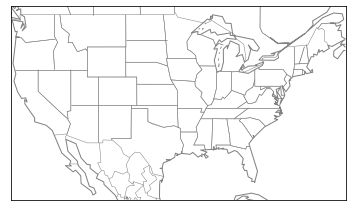

In [23]:
# Import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Set up the US bounding box
us_boundingbox = [-125, 22, -64, 50] 

# Set up the Basemap object
m = Basemap(llcrnrlon = us_boundingbox[0],
            llcrnrlat = us_boundingbox[1],
            urcrnrlon = us_boundingbox[2],
            urcrnrlat = us_boundingbox[3],
            projection='merc')

# Draw continents in white,
# coastlines and countries in gray
m.fillcontinents(color='white')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Draw the states and show the plot
m.drawstates(color='gray')
plt.show()

### Plotting centroid coordinates

Because we can't plot whole bounding boxes, we summarize the bounding box location into a single point called a centroid. Plotting these on a Basemap map is straightforward. Once we calculate the centroids, we separate the longitudes and latitudes, then pass to the .scatter() method.

The Basemap object m has been created for you. The dataset tweets_sotu and function calculateCentroid() have also been loaded.

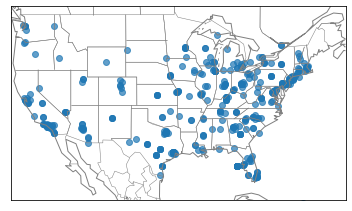

In [24]:
# Calculate the centroids for the dataset
# and isolate longitudue and latitudes
centroids = tweets_sotu['place'].apply(calculateCentroid)
lon = [x[0] for x in centroids]
lat = [x[1] for x in centroids]

# Draw continents, coastlines, countries, and states
m.fillcontinents(color='white', zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Draw the points and show the plot
m.scatter(lon, lat, latlon = True, alpha = 0.7)
plt.show()

### Coloring by sentiment

We want to be able to differentiate by place with our Twitter analysis. One distinguishing factor between places is how the State of the Union speech was received. For this purpose, we'll use the sentiment analysis we covered in Chapter 2 to evaluate how the speech was received in different parts of the country.

The tweets_sotu dataset has been loaded for you, as well as lon, lat, and the Basemap map m. SentimentIntensityAnalyzer is instantiated as sid in your workspace.

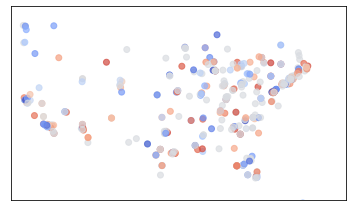

In [26]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = tweets_sotu['text'].apply(sid.polarity_scores)

# Isolate the compound element
sentiment_scores = [x['compound'] for x in sentiment_scores]

# Draw the points
m.scatter(lon, lat, latlon = True, 
           c = sentiment_scores,
           cmap = 'coolwarm', alpha = 0.7)
           
# Show the plot
plt.show()